/home/auv/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(None, 224, 224, 64)


(224, 224, 64)


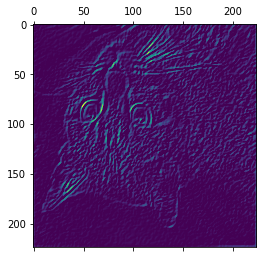

In [1]:
from utils.viz_tools import *

%matplotlib inline

#visualize activations
#generate  batches
#batches = get_batches(os.path.join(data_path ,'train'))
#valid_batches = get_batches(os.path.join(data_path , 'valid'), batch_size=batch_size*2)
#test_batches = get_batches(os.path.join(data_path, "test"), batch_size=batch_size*2)

#load the saved model
model = load_model((os.path.join(data_path , "trained_model.h5")))

img_path = os.path.join(data_path ,"test","unknown", "51.jpg" )
# preprocess the image into a 4D tensor
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

layer_name = 'conv2d_2'
visualize_activations(model,layer_name, img_tensor, 0)


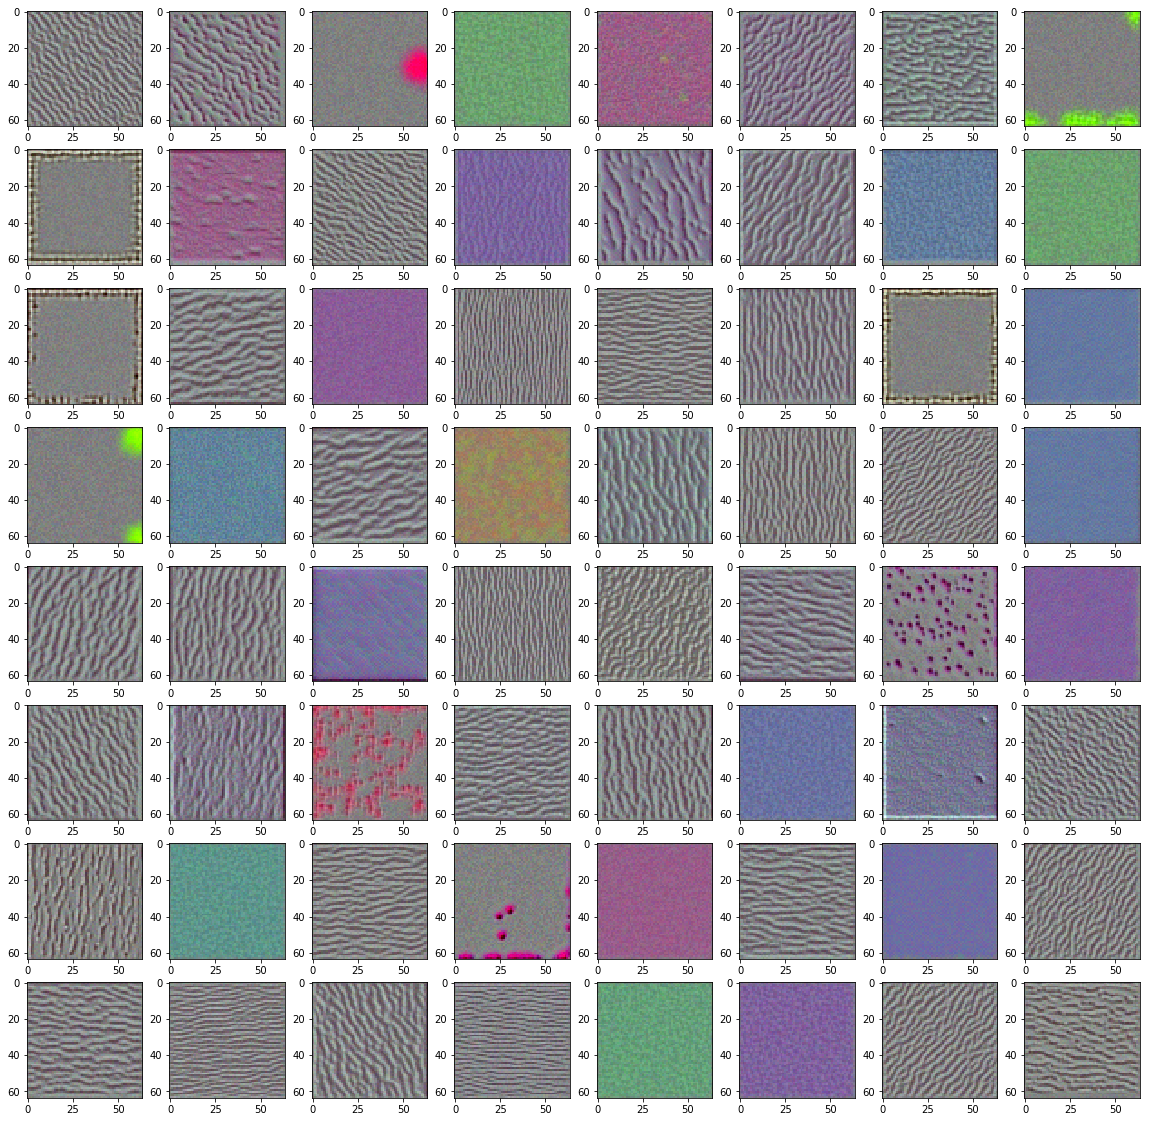

In [2]:
layer_names= ['conv2d_2']
visualize_filters(model, layer_names)

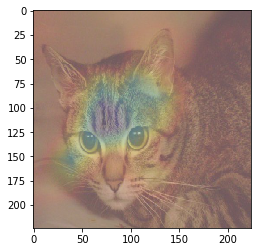

In [2]:
visualize_CAM(model, 'conv2d_13', img_tensor)


In [15]:
from utils.training import *

batches = get_batches(os.path.join(data_path ,'train'))
valid_batches = get_batches(os.path.join(data_path , 'valid'), batch_size=batch_size*2)
m = build_custom_VGG16()
m.summary()    



Found 20002 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


Found 12500 images belonging to 1 classes.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_12 (Lambda)           (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 56, 56, 128)       0         
__________

In [5]:
for layer in model.layers[:10]:
   layer.trainable = False
for layer in model.layers[10:]:
   layer.trainable = True

opt = SGD(lr=10e-5)
model.compile(optimizer=opt,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit_generator(batches, steps_per_epoch=batches.samples//batch_size, nb_epoch=2,
                    validation_data=valid_batches, validation_steps=valid_batches.samples//batch_size)

/home/auv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/home/auv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=5000, validation_data=<keras_pre..., validation_steps=1249, epochs=2)`
  if sys.path[0] == '':


Epoch 1/2


   1/5000 [..............................] - ETA: 4:52:21 - loss: 1.2815e-06 - acc: 1.0000

   2/5000 [..............................] - ETA: 2:32:01 - loss: 7.8976e-07 - acc: 1.0000

   3/5000 [..............................] - ETA: 1:44:56 - loss: 0.1285 - acc: 0.9167    

   4/5000 [..............................] - ETA: 1:21:24 - loss: 0.2322 - acc: 0.8750

   5/5000 [..............................] - ETA: 1:07:20 - loss: 0.1858 - acc: 0.9000

   6/5000 [..............................] - ETA: 58:08 - loss: 0.2840 - acc: 0.8333  

   7/5000 [..............................] - ETA: 51:21 - loss: 0.2435 - acc: 0.8571

   8/5000 [..............................] - ETA: 46:16 - loss: 0.2131 - acc: 0.8750

   9/5000 [..............................] - ETA: 42:21 - loss: 0.1928 - acc: 0.8889

  10/5000 [..............................] - ETA: 39:16 - loss: 0.1736 - acc: 0.9000

  11/5000 [..............................] - ETA: 36:40 - loss: 0.1578 - acc: 0.9091

  12/5000 [..............................] - ETA: 34:31 - loss: 0.1453 - acc: 0.9167

  13/5000 [..............................] - ETA: 32:44 - loss: 0.1342 - acc: 0.9231

  14/5000 [..............................] - ETA: 31:09 - loss: 0.1246 - acc: 0.9286

  15/5000 [..............................] - ETA: 29:48 - loss: 0.1164 - acc: 0.9333

  16/5000 [..............................] - ETA: 28:37 - loss: 0.1094 - acc: 0.9375

  17/5000 [..............................] - ETA: 27:37 - loss: 0.1030 - acc: 0.9412

  18/5000 [..............................] - ETA: 26:40 - loss: 0.0972 - acc: 0.9444

  19/5000 [..............................] - ETA: 25:51 - loss: 0.0921 - acc: 0.9474

  20/5000 [..............................] - ETA: 25:06 - loss: 0.0875 - acc: 0.9500

  21/5000 [..............................] - ETA: 24:29 - loss: 0.1421 - acc: 0.9405

  22/5000 [..............................] - ETA: 23:51 - loss: 0.1633 - acc: 0.9318

  23/5000 [..............................] - ETA: 23:17 - loss: 0.2118 - acc: 0.9239

  24/5000 [..............................] - ETA: 22:46 - loss: 0.3433 - acc: 0.9062

  25/5000 [..............................] - ETA: 22:19 - loss: 0.3310 - acc: 0.9100

  26/5000 [..............................] - ETA: 21:52 - loss: 0.3183 - acc: 0.9135

  27/5000 [..............................] - ETA: 21:27 - loss: 0.3610 - acc: 0.9074

  28/5000 [..............................] - ETA: 21:06 - loss: 0.3481 - acc: 0.9107

  29/5000 [..............................] - ETA: 20:45 - loss: 0.3362 - acc: 0.9138

  30/5000 [..............................] - ETA: 20:25 - loss: 0.3254 - acc: 0.9167

  31/5000 [..............................] - ETA: 20:06 - loss: 0.3150 - acc: 0.9194

  32/5000 [..............................] - ETA: 19:50 - loss: 0.3175 - acc: 0.9141

  33/5000 [..............................] - ETA: 19:33 - loss: 0.3079 - acc: 0.9167

  34/5000 [..............................] - ETA: 19:18 - loss: 0.2988 - acc: 0.9191

  35/5000 [..............................] - ETA: 19:03 - loss: 0.2903 - acc: 0.9214

  36/5000 [..............................] - ETA: 18:51 - loss: 0.2822 - acc: 0.9236

  37/5000 [..............................] - ETA: 18:38 - loss: 0.2749 - acc: 0.9257

  38/5000 [..............................] - ETA: 18:25 - loss: 0.3000 - acc: 0.9211

  39/5000 [..............................] - ETA: 18:13 - loss: 0.2923 - acc: 0.9231

  40/5000 [..............................] - ETA: 18:03 - loss: 0.2851 - acc: 0.9250

  41/5000 [..............................] - ETA: 17:52 - loss: 0.2821 - acc: 0.9268

  42/5000 [..............................] - ETA: 17:41 - loss: 0.2761 - acc: 0.9286

  43/5000 [..............................] - ETA: 17:33 - loss: 0.3351 - acc: 0.9186

  44/5000 [..............................] - ETA: 17:24 - loss: 0.3645 - acc: 0.9148

  45/5000 [..............................] - ETA: 17:15 - loss: 0.3597 - acc: 0.9167

  46/5000 [..............................] - ETA: 17:06 - loss: 0.3519 - acc: 0.9185

  47/5000 [..............................] - ETA: 16:59 - loss: 0.3444 - acc: 0.9202

  48/5000 [..............................] - ETA: 16:51 - loss: 0.3373 - acc: 0.9219

  49/5000 [..............................] - ETA: 16:44 - loss: 0.3318 - acc: 0.9235

  50/5000 [..............................] - ETA: 16:36 - loss: 0.3343 - acc: 0.9200

  51/5000 [..............................] - ETA: 16:31 - loss: 0.3306 - acc: 0.9216

  52/5000 [..............................] - ETA: 16:25 - loss: 0.3242 - acc: 0.9231

  53/5000 [..............................] - ETA: 16:19 - loss: 0.3187 - acc: 0.9245

  54/5000 [..............................] - ETA: 16:13 - loss: 0.3135 - acc: 0.9259

  55/5000 [..............................] - ETA: 16:08 - loss: 0.3083 - acc: 0.9273

  56/5000 [..............................] - ETA: 16:02 - loss: 0.3031 - acc: 0.9286

  57/5000 [..............................] - ETA: 15:57 - loss: 0.3123 - acc: 0.9254

  58/5000 [..............................] - ETA: 15:52 - loss: 0.3287 - acc: 0.9224

  59/5000 [..............................] - ETA: 15:47 - loss: 0.3232 - acc: 0.9237

  60/5000 [..............................] - ETA: 15:42 - loss: 0.3361 - acc: 0.9208

  61/5000 [..............................] - ETA: 15:38 - loss: 0.3306 - acc: 0.9221

  62/5000 [..............................] - ETA: 15:33 - loss: 0.3391 - acc: 0.9194

  63/5000 [..............................] - ETA: 15:29 - loss: 0.3337 - acc: 0.9206

  64/5000 [..............................] - ETA: 15:24 - loss: 0.3310 - acc: 0.9219

  65/5000 [..............................] - ETA: 15:21 - loss: 0.3785 - acc: 0.9154

  66/5000 [..............................] - ETA: 15:17 - loss: 0.3727 - acc: 0.9167

  67/5000 [..............................] - ETA: 15:13 - loss: 0.3677 - acc: 0.9179

  68/5000 [..............................] - ETA: 15:10 - loss: 0.3689 - acc: 0.9154

  69/5000 [..............................] - ETA: 15:06 - loss: 0.3635 - acc: 0.9167

  70/5000 [..............................] - ETA: 15:02 - loss: 0.3583 - acc: 0.9179

  71/5000 [..............................] - ETA: 14:59 - loss: 0.3533 - acc: 0.9190

  72/5000 [..............................] - ETA: 14:55 - loss: 0.3492 - acc: 0.9201

  73/5000 [..............................] - ETA: 14:52 - loss: 0.3444 - acc: 0.9212

  74/5000 [..............................] - ETA: 14:49 - loss: 0.3424 - acc: 0.9189

  75/5000 [..............................] - ETA: 14:46 - loss: 0.3378 - acc: 0.9200

  76/5000 [..............................] - ETA: 14:42 - loss: 0.3334 - acc: 0.9211

  77/5000 [..............................] - ETA: 14:39 - loss: 0.3311 - acc: 0.9221

  78/5000 [..............................] - ETA: 14:36 - loss: 0.3269 - acc: 0.9231

  79/5000 [..............................] - ETA: 14:34 - loss: 0.3228 - acc: 0.9241

  80/5000 [..............................] - ETA: 14:31 - loss: 0.3394 - acc: 0.9219

  81/5000 [..............................] - ETA: 14:28 - loss: 0.3352 - acc: 0.9228

  82/5000 [..............................] - ETA: 14:26 - loss: 0.3478 - acc: 0.9207

  83/5000 [..............................] - ETA: 14:23 - loss: 0.3439 - acc: 0.9217

  84/5000 [..............................] - ETA: 14:20 - loss: 0.3399 - acc: 0.9226

  85/5000 [..............................] - ETA: 14:18 - loss: 0.3364 - acc: 0.9235

  86/5000 [..............................] - ETA: 14:15 - loss: 0.3328 - acc: 0.9244

  87/5000 [..............................] - ETA: 14:13 - loss: 0.3332 - acc: 0.9224

  88/5000 [..............................] - ETA: 14:11 - loss: 0.3297 - acc: 0.9233

  89/5000 [..............................] - ETA: 14:09 - loss: 0.3260 - acc: 0.9242

  90/5000 [..............................] - ETA: 14:06 - loss: 0.3364 - acc: 0.9222

  91/5000 [..............................] - ETA: 14:04 - loss: 0.3327 - acc: 0.9231

  92/5000 [..............................] - ETA: 14:02 - loss: 0.3291 - acc: 0.9239

  93/5000 [..............................] - ETA: 14:00 - loss: 0.3256 - acc: 0.9247

  94/5000 [..............................] - ETA: 13:58 - loss: 0.3315 - acc: 0.9229

  95/5000 [..............................] - ETA: 13:56 - loss: 0.3281 - acc: 0.9237

  96/5000 [..............................] - ETA: 13:54 - loss: 0.3247 - acc: 0.9245

  97/5000 [..............................] - ETA: 13:52 - loss: 0.3227 - acc: 0.9253

  98/5000 [..............................] - ETA: 13:50 - loss: 0.3195 - acc: 0.9260

  99/5000 [..............................] - ETA: 13:48 - loss: 0.3235 - acc: 0.9242

 100/5000 [..............................] - ETA: 13:46 - loss: 0.3211 - acc: 0.9250

 101/5000 [..............................] - ETA: 13:44 - loss: 0.3179 - acc: 0.9257

 102/5000 [..............................] - ETA: 13:43 - loss: 0.3148 - acc: 0.9265

 103/5000 [..............................] - ETA: 13:41 - loss: 0.3412 - acc: 0.9199

 104/5000 [..............................] - ETA: 13:39 - loss: 0.3379 - acc: 0.9207

 105/5000 [..............................] - ETA: 13:38 - loss: 0.3350 - acc: 0.9214

 106/5000 [..............................] - ETA: 13:36 - loss: 0.3318 - acc: 0.9222

 107/5000 [..............................] - ETA: 13:35 - loss: 0.3447 - acc: 0.9206

 108/5000 [..............................] - ETA: 13:33 - loss: 0.3415 - acc: 0.9213

 109/5000 [..............................] - ETA: 13:32 - loss: 0.3387 - acc: 0.9220

 110/5000 [..............................] - ETA: 13:31 - loss: 0.3365 - acc: 0.9227

 111/5000 [..............................] - ETA: 13:29 - loss: 0.3338 - acc: 0.9234

 112/5000 [..............................] - ETA: 13:28 - loss: 0.3309 - acc: 0.9241

 113/5000 [..............................] - ETA: 13:26 - loss: 0.3279 - acc: 0.9248

 114/5000 [..............................] - ETA: 13:25 - loss: 0.3251 - acc: 0.9254

 115/5000 [..............................] - ETA: 13:24 - loss: 0.3230 - acc: 0.9261

 116/5000 [..............................] - ETA: 13:23 - loss: 0.3202 - acc: 0.9267

 117/5000 [..............................] - ETA: 13:22 - loss: 0.3175 - acc: 0.9274

 118/5000 [..............................] - ETA: 13:20 - loss: 0.3148 - acc: 0.9280

 119/5000 [..............................] - ETA: 13:19 - loss: 0.3157 - acc: 0.9265

 120/5000 [..............................] - ETA: 13:18 - loss: 0.3131 - acc: 0.9271

 121/5000 [..............................] - ETA: 13:17 - loss: 0.3105 - acc: 0.9277

 122/5000 [..............................] - ETA: 13:16 - loss: 0.3082 - acc: 0.9283

 123/5000 [..............................] - ETA: 13:14 - loss: 0.3189 - acc: 0.9268

 124/5000 [..............................] - ETA: 13:13 - loss: 0.3222 - acc: 0.9254

 125/5000 [..............................] - ETA: 13:12 - loss: 0.3196 - acc: 0.9260

 126/5000 [..............................] - ETA: 13:11 - loss: 0.3241 - acc: 0.9246

 127/5000 [..............................] - ETA: 13:10 - loss: 0.3216 - acc: 0.9252

 128/5000 [..............................] - ETA: 13:09 - loss: 0.3254 - acc: 0.9238

 129/5000 [..............................] - ETA: 13:08 - loss: 0.3229 - acc: 0.9244

 130/5000 [..............................] - ETA: 13:06 - loss: 0.3205 - acc: 0.9250

 131/5000 [..............................] - ETA: 13:05 - loss: 0.3180 - acc: 0.9256

 132/5000 [..............................] - ETA: 13:05 - loss: 0.3200 - acc: 0.9242

 133/5000 [..............................] - ETA: 13:04 - loss: 0.3176 - acc: 0.9248

 134/5000 [..............................] - ETA: 13:03 - loss: 0.3175 - acc: 0.9235

 135/5000 [..............................] - ETA: 13:02 - loss: 0.3152 - acc: 0.9241

 136/5000 [..............................] - ETA: 13:01 - loss: 0.3133 - acc: 0.9246

 137/5000 [..............................] - ETA: 13:00 - loss: 0.3111 - acc: 0.9252

 138/5000 [..............................] - ETA: 12:59 - loss: 0.3357 - acc: 0.9221

 139/5000 [..............................] - ETA: 12:58 - loss: 0.3404 - acc: 0.9209

 140/5000 [..............................] - ETA: 12:57 - loss: 0.3385 - acc: 0.9214

 141/5000 [..............................] - ETA: 12:56 - loss: 0.3374 - acc: 0.9202

 142/5000 [..............................] - ETA: 12:55 - loss: 0.3385 - acc: 0.9190

 143/5000 [..............................] - ETA: 12:54 - loss: 0.3362 - acc: 0.9196

 144/5000 [..............................] - ETA: 12:53 - loss: 0.3378 - acc: 0.9184

 145/5000 [..............................] - ETA: 12:52 - loss: 0.3355 - acc: 0.9190

 146/5000 [..............................] - ETA: 12:51 - loss: 0.3365 - acc: 0.9178

 147/5000 [..............................] - ETA: 12:50 - loss: 0.3343 - acc: 0.9184

 148/5000 [..............................] - ETA: 12:49 - loss: 0.3326 - acc: 0.9189

 149/5000 [..............................] - ETA: 12:48 - loss: 0.3468 - acc: 0.9161

 150/5000 [..............................] - ETA: 12:47 - loss: 0.3456 - acc: 0.9167

 151/5000 [..............................] - ETA: 12:46 - loss: 0.3560 - acc: 0.9156

 152/5000 [..............................] - ETA: 12:45 - loss: 0.3543 - acc: 0.9161

 153/5000 [..............................] - ETA: 12:44 - loss: 0.3524 - acc: 0.9167

 154/5000 [..............................] - ETA: 12:44 - loss: 0.3503 - acc: 0.9172

 155/5000 [..............................] - ETA: 12:43 - loss: 0.3481 - acc: 0.9177

 156/5000 [..............................] - ETA: 12:42 - loss: 0.3495 - acc: 0.9167

 157/5000 [..............................] - ETA: 12:41 - loss: 0.3474 - acc: 0.9172

 158/5000 [..............................] - ETA: 12:40 - loss: 0.3463 - acc: 0.9177

 159/5000 [..............................] - ETA: 12:39 - loss: 0.3540 - acc: 0.9151

 160/5000 [..............................] - ETA: 12:39 - loss: 0.3568 - acc: 0.9141

 161/5000 [..............................] - ETA: 12:38 - loss: 0.3560 - acc: 0.9130

 162/5000 [..............................] - ETA: 12:37 - loss: 0.3538 - acc: 0.9136

 163/5000 [..............................] - ETA: 12:36 - loss: 0.3516 - acc: 0.9141

 164/5000 [..............................] - ETA: 12:35 - loss: 0.3519 - acc: 0.9131

 165/5000 [..............................] - ETA: 12:35 - loss: 0.3498 - acc: 0.9136

 166/5000 [..............................] - ETA: 12:34 - loss: 0.3480 - acc: 0.9142

 167/5000 [>.............................] - ETA: 12:35 - loss: 0.3459 - acc: 0.9147

 168/5000 [>.............................] - ETA: 12:34 - loss: 0.3506 - acc: 0.9137

 169/5000 [>.............................] - ETA: 12:33 - loss: 0.3519 - acc: 0.9127

 170/5000 [>.............................] - ETA: 12:33 - loss: 0.3516 - acc: 0.9118

 171/5000 [>.............................] - ETA: 12:32 - loss: 0.3495 - acc: 0.9123

 172/5000 [>.............................] - ETA: 12:31 - loss: 0.3480 - acc: 0.9128

 173/5000 [>.............................] - ETA: 12:31 - loss: 0.3465 - acc: 0.9133

 174/5000 [>.............................] - ETA: 12:30 - loss: 0.3480 - acc: 0.9109

 175/5000 [>.............................] - ETA: 12:29 - loss: 0.3475 - acc: 0.9100

 176/5000 [>.............................] - ETA: 12:28 - loss: 0.3486 - acc: 0.9091

 177/5000 [>.............................] - ETA: 12:29 - loss: 0.3541 - acc: 0.9082

 178/5000 [>.............................] - ETA: 12:29 - loss: 0.3521 - acc: 0.9087

 179/5000 [>.............................] - ETA: 12:28 - loss: 0.3502 - acc: 0.9092

 180/5000 [>.............................] - ETA: 12:28 - loss: 0.3482 - acc: 0.9097

 181/5000 [>.............................] - ETA: 12:27 - loss: 0.3472 - acc: 0.9102

 182/5000 [>.............................] - ETA: 12:27 - loss: 0.3462 - acc: 0.9107

 183/5000 [>.............................] - ETA: 12:26 - loss: 0.3444 - acc: 0.9112

 184/5000 [>.............................] - ETA: 12:25 - loss: 0.3426 - acc: 0.9117

 185/5000 [>.............................] - ETA: 12:25 - loss: 0.3407 - acc: 0.9122

 186/5000 [>.............................] - ETA: 12:24 - loss: 0.3389 - acc: 0.9126

 187/5000 [>.............................] - ETA: 12:23 - loss: 0.3371 - acc: 0.9131

 188/5000 [>.............................] - ETA: 12:23 - loss: 0.3353 - acc: 0.9136

 189/5000 [>.............................] - ETA: 12:23 - loss: 0.3357 - acc: 0.9127

 190/5000 [>.............................] - ETA: 12:22 - loss: 0.3340 - acc: 0.9132

 191/5000 [>.............................] - ETA: 12:21 - loss: 0.3333 - acc: 0.9136

 192/5000 [>.............................] - ETA: 12:21 - loss: 0.3329 - acc: 0.9128

 193/5000 [>.............................] - ETA: 12:20 - loss: 0.3360 - acc: 0.9119

 194/5000 [>.............................] - ETA: 12:20 - loss: 0.3344 - acc: 0.9124

 195/5000 [>.............................] - ETA: 12:19 - loss: 0.3328 - acc: 0.9128

 196/5000 [>.............................] - ETA: 12:19 - loss: 0.3359 - acc: 0.9120

 197/5000 [>.............................] - ETA: 12:19 - loss: 0.3342 - acc: 0.9124

 198/5000 [>.............................] - ETA: 12:19 - loss: 0.3327 - acc: 0.9129

 199/5000 [>.............................] - ETA: 12:18 - loss: 0.3310 - acc: 0.9133

 200/5000 [>.............................] - ETA: 12:18 - loss: 0.3294 - acc: 0.9137

 201/5000 [>.............................] - ETA: 12:17 - loss: 0.3328 - acc: 0.9129

 202/5000 [>.............................] - ETA: 12:17 - loss: 0.3382 - acc: 0.9121

 203/5000 [>.............................] - ETA: 12:16 - loss: 0.3365 - acc: 0.9126

 204/5000 [>.............................] - ETA: 12:16 - loss: 0.3349 - acc: 0.9130

 205/5000 [>.............................] - ETA: 12:15 - loss: 0.3334 - acc: 0.9134

 206/5000 [>.............................] - ETA: 12:15 - loss: 0.3318 - acc: 0.9138

 207/5000 [>.............................] - ETA: 12:14 - loss: 0.3314 - acc: 0.9130

 208/5000 [>.............................] - ETA: 12:14 - loss: 0.3316 - acc: 0.9123

 209/5000 [>.............................] - ETA: 12:13 - loss: 0.3300 - acc: 0.9127

 210/5000 [>.............................] - ETA: 12:13 - loss: 0.3285 - acc: 0.9131

 211/5000 [>.............................] - ETA: 12:12 - loss: 0.3270 - acc: 0.9135

 212/5000 [>.............................] - ETA: 12:11 - loss: 0.3255 - acc: 0.9139

 213/5000 [>.............................] - ETA: 12:11 - loss: 0.3305 - acc: 0.9131

 214/5000 [>.............................] - ETA: 12:10 - loss: 0.3294 - acc: 0.9136

 215/5000 [>.............................] - ETA: 12:10 - loss: 0.3299 - acc: 0.9128

 216/5000 [>.............................] - ETA: 12:09 - loss: 0.3317 - acc: 0.9120

 217/5000 [>.............................] - ETA: 12:09 - loss: 0.3309 - acc: 0.9124

 218/5000 [>.............................] - ETA: 12:08 - loss: 0.3295 - acc: 0.9128

 219/5000 [>.............................] - ETA: 12:08 - loss: 0.3345 - acc: 0.9121

 220/5000 [>.............................] - ETA: 12:07 - loss: 0.3342 - acc: 0.9125

 221/5000 [>.............................] - ETA: 12:07 - loss: 0.3327 - acc: 0.9129

 222/5000 [>.............................] - ETA: 12:06 - loss: 0.3314 - acc: 0.9133

 223/5000 [>.............................] - ETA: 12:06 - loss: 0.3302 - acc: 0.9137

 224/5000 [>.............................] - ETA: 12:05 - loss: 0.3293 - acc: 0.9141

 225/5000 [>.............................] - ETA: 12:05 - loss: 0.3368 - acc: 0.9133

 226/5000 [>.............................] - ETA: 12:04 - loss: 0.3353 - acc: 0.9137

 227/5000 [>.............................] - ETA: 12:04 - loss: 0.3339 - acc: 0.9141

 228/5000 [>.............................] - ETA: 12:04 - loss: 0.3325 - acc: 0.9145

 229/5000 [>.............................] - ETA: 12:03 - loss: 0.3311 - acc: 0.9148

 230/5000 [>.............................] - ETA: 12:03 - loss: 0.3296 - acc: 0.9152

 231/5000 [>.............................] - ETA: 12:03 - loss: 0.3282 - acc: 0.9156

 232/5000 [>.............................] - ETA: 12:02 - loss: 0.3276 - acc: 0.9159

 233/5000 [>.............................] - ETA: 12:02 - loss: 0.3263 - acc: 0.9163

 234/5000 [>.............................] - ETA: 12:01 - loss: 0.3249 - acc: 0.9167

 235/5000 [>.............................] - ETA: 12:01 - loss: 0.3238 - acc: 0.9170

 236/5000 [>.............................] - ETA: 12:00 - loss: 0.3224 - acc: 0.9174

 237/5000 [>.............................] - ETA: 12:00 - loss: 0.3226 - acc: 0.9167

 238/5000 [>.............................] - ETA: 11:59 - loss: 0.3213 - acc: 0.9170

 239/5000 [>.............................] - ETA: 11:59 - loss: 0.3250 - acc: 0.9163

 240/5000 [>.............................] - ETA: 11:58 - loss: 0.3262 - acc: 0.9156

 241/5000 [>.............................] - ETA: 11:58 - loss: 0.3250 - acc: 0.9160

 242/5000 [>.............................] - ETA: 11:57 - loss: 0.3237 - acc: 0.9163

 243/5000 [>.............................] - ETA: 11:57 - loss: 0.3224 - acc: 0.9167

 244/5000 [>.............................] - ETA: 11:57 - loss: 0.3211 - acc: 0.9170

 245/5000 [>.............................] - ETA: 11:56 - loss: 0.3201 - acc: 0.9173

 246/5000 [>.............................] - ETA: 11:56 - loss: 0.3233 - acc: 0.9167

 247/5000 [>.............................] - ETA: 11:55 - loss: 0.3241 - acc: 0.9160

 248/5000 [>.............................] - ETA: 11:55 - loss: 0.3228 - acc: 0.9163

 249/5000 [>.............................] - ETA: 11:54 - loss: 0.3215 - acc: 0.9167

 250/5000 [>.............................] - ETA: 11:54 - loss: 0.3202 - acc: 0.9170

 251/5000 [>.............................] - ETA: 11:54 - loss: 0.3198 - acc: 0.9173

 252/5000 [>.............................] - ETA: 11:53 - loss: 0.3187 - acc: 0.9177

 253/5000 [>.............................] - ETA: 11:53 - loss: 0.3175 - acc: 0.9180

 254/5000 [>.............................] - ETA: 11:52 - loss: 0.3216 - acc: 0.9173

 255/5000 [>.............................] - ETA: 11:52 - loss: 0.3229 - acc: 0.9167

 256/5000 [>.............................] - ETA: 11:52 - loss: 0.3221 - acc: 0.9170

 257/5000 [>.............................] - ETA: 11:51 - loss: 0.3249 - acc: 0.9163

 258/5000 [>.............................] - ETA: 11:51 - loss: 0.3238 - acc: 0.9167

 259/5000 [>.............................] - ETA: 11:50 - loss: 0.3286 - acc: 0.9160

 260/5000 [>.............................] - ETA: 11:50 - loss: 0.3273 - acc: 0.9163

 261/5000 [>.............................] - ETA: 11:49 - loss: 0.3261 - acc: 0.9167

 262/5000 [>.............................] - ETA: 11:49 - loss: 0.3297 - acc: 0.9160

 263/5000 [>.............................] - ETA: 11:49 - loss: 0.3287 - acc: 0.9163

 264/5000 [>.............................] - ETA: 11:48 - loss: 0.3275 - acc: 0.9167

 265/5000 [>.............................] - ETA: 11:48 - loss: 0.3266 - acc: 0.9170

 266/5000 [>.............................] - ETA: 11:47 - loss: 0.3253 - acc: 0.9173

 267/5000 [>.............................] - ETA: 11:47 - loss: 0.3241 - acc: 0.9176

 268/5000 [>.............................] - ETA: 11:47 - loss: 0.3231 - acc: 0.9179

 269/5000 [>.............................] - ETA: 11:46 - loss: 0.3219 - acc: 0.9182

 270/5000 [>.............................] - ETA: 11:46 - loss: 0.3207 - acc: 0.9185

 271/5000 [>.............................] - ETA: 11:45 - loss: 0.3196 - acc: 0.9188

 272/5000 [>.............................] - ETA: 11:45 - loss: 0.3184 - acc: 0.9191

 273/5000 [>.............................] - ETA: 11:45 - loss: 0.3173 - acc: 0.9194

 274/5000 [>.............................] - ETA: 11:44 - loss: 0.3162 - acc: 0.9197

 275/5000 [>.............................] - ETA: 11:44 - loss: 0.3150 - acc: 0.9200

 276/5000 [>.............................] - ETA: 11:44 - loss: 0.3273 - acc: 0.9176

 277/5000 [>.............................] - ETA: 11:43 - loss: 0.3277 - acc: 0.9170

 278/5000 [>.............................] - ETA: 11:43 - loss: 0.3324 - acc: 0.9164

 279/5000 [>.............................] - ETA: 11:42 - loss: 0.3312 - acc: 0.9167

 280/5000 [>.............................] - ETA: 11:42 - loss: 0.3301 - acc: 0.9170

 281/5000 [>.............................] - ETA: 11:42 - loss: 0.3383 - acc: 0.9155

 282/5000 [>.............................] - ETA: 11:41 - loss: 0.3371 - acc: 0.9158

 283/5000 [>.............................] - ETA: 11:41 - loss: 0.3364 - acc: 0.9161

 284/5000 [>.............................] - ETA: 11:41 - loss: 0.3352 - acc: 0.9164

 285/5000 [>.............................] - ETA: 11:40 - loss: 0.3342 - acc: 0.9167

 286/5000 [>.............................] - ETA: 11:40 - loss: 0.3334 - acc: 0.9170

 287/5000 [>.............................] - ETA: 11:40 - loss: 0.3322 - acc: 0.9172

 288/5000 [>.............................] - ETA: 11:40 - loss: 0.3346 - acc: 0.9167

 289/5000 [>.............................] - ETA: 11:39 - loss: 0.3334 - acc: 0.9170

 290/5000 [>.............................] - ETA: 11:39 - loss: 0.3323 - acc: 0.9172

 291/5000 [>.............................] - ETA: 11:39 - loss: 0.3324 - acc: 0.9167

 292/5000 [>.............................] - ETA: 11:39 - loss: 0.3315 - acc: 0.9170

 293/5000 [>.............................] - ETA: 11:39 - loss: 0.3303 - acc: 0.9172

 294/5000 [>.............................] - ETA: 11:39 - loss: 0.3302 - acc: 0.9167

 295/5000 [>.............................] - ETA: 11:39 - loss: 0.3310 - acc: 0.9161

 296/5000 [>.............................] - ETA: 11:38 - loss: 0.3304 - acc: 0.9164

 297/5000 [>.............................] - ETA: 11:38 - loss: 0.3294 - acc: 0.9167

 298/5000 [>.............................] - ETA: 11:39 - loss: 0.3311 - acc: 0.9153

 299/5000 [>.............................] - ETA: 11:39 - loss: 0.3300 - acc: 0.9156

 300/5000 [>.............................] - ETA: 11:39 - loss: 0.3290 - acc: 0.9158

 301/5000 [>.............................] - ETA: 11:39 - loss: 0.3279 - acc: 0.9161

 302/5000 [>.............................] - ETA: 11:38 - loss: 0.3285 - acc: 0.9156

 303/5000 [>.............................] - ETA: 11:38 - loss: 0.3274 - acc: 0.9158

 304/5000 [>.............................] - ETA: 11:38 - loss: 0.3263 - acc: 0.9161

 305/5000 [>.............................] - ETA: 11:38 - loss: 0.3254 - acc: 0.9164

 306/5000 [>.............................] - ETA: 11:38 - loss: 0.3243 - acc: 0.9167

 307/5000 [>.............................] - ETA: 11:38 - loss: 0.3271 - acc: 0.9161

 308/5000 [>.............................] - ETA: 11:38 - loss: 0.3267 - acc: 0.9156

 309/5000 [>.............................] - ETA: 11:38 - loss: 0.3257 - acc: 0.9159

 310/5000 [>.............................] - ETA: 11:37 - loss: 0.3258 - acc: 0.9153

 311/5000 [>.............................] - ETA: 11:37 - loss: 0.3258 - acc: 0.9148

 312/5000 [>.............................] - ETA: 11:37 - loss: 0.3248 - acc: 0.9151

 313/5000 [>.............................] - ETA: 11:37 - loss: 0.3237 - acc: 0.9153

 314/5000 [>.............................] - ETA: 11:38 - loss: 0.3228 - acc: 0.9156

 315/5000 [>.............................] - ETA: 11:37 - loss: 0.3221 - acc: 0.9159

 316/5000 [>.............................] - ETA: 11:37 - loss: 0.3211 - acc: 0.9161

 317/5000 [>.............................] - ETA: 11:37 - loss: 0.3201 - acc: 0.9164

 318/5000 [>.............................] - ETA: 11:37 - loss: 0.3191 - acc: 0.9167

 319/5000 [>.............................] - ETA: 11:36 - loss: 0.3181 - acc: 0.9169

 320/5000 [>.............................] - ETA: 11:36 - loss: 0.3172 - acc: 0.9172

 321/5000 [>.............................] - ETA: 11:35 - loss: 0.3163 - acc: 0.9174

 322/5000 [>.............................] - ETA: 11:35 - loss: 0.3153 - acc: 0.9177

 323/5000 [>.............................] - ETA: 11:35 - loss: 0.3144 - acc: 0.9180

 324/5000 [>.............................] - ETA: 11:34 - loss: 0.3134 - acc: 0.9182

 325/5000 [>.............................] - ETA: 11:34 - loss: 0.3143 - acc: 0.9177

 326/5000 [>.............................] - ETA: 11:34 - loss: 0.3144 - acc: 0.9172

 327/5000 [>.............................] - ETA: 11:33 - loss: 0.3138 - acc: 0.9174

 328/5000 [>.............................] - ETA: 11:33 - loss: 0.3129 - acc: 0.9177

 329/5000 [>.............................] - ETA: 11:33 - loss: 0.3131 - acc: 0.9172

 330/5000 [>.............................] - ETA: 11:32 - loss: 0.3146 - acc: 0.9159

 331/5000 [>.............................] - ETA: 11:32 - loss: 0.3137 - acc: 0.9162

 332/5000 [>.............................] - ETA: 11:32 - loss: 0.3127 - acc: 0.9164

 333/5000 [>.............................] - ETA: 11:31 - loss: 0.3118 - acc: 0.9167

 334/5000 [=>............................] - ETA: 11:31 - loss: 0.3109 - acc: 0.9169

 335/5000 [=>............................] - ETA: 11:31 - loss: 0.3100 - acc: 0.9172

 336/5000 [=>............................] - ETA: 11:30 - loss: 0.3093 - acc: 0.9174

 337/5000 [=>............................] - ETA: 11:30 - loss: 0.3101 - acc: 0.9169

 338/5000 [=>............................] - ETA: 11:30 - loss: 0.3092 - acc: 0.9172

 339/5000 [=>............................] - ETA: 11:30 - loss: 0.3083 - acc: 0.9174

 340/5000 [=>............................] - ETA: 11:29 - loss: 0.3081 - acc: 0.9169

 341/5000 [=>............................] - ETA: 11:29 - loss: 0.3072 - acc: 0.9172

 342/5000 [=>............................] - ETA: 11:29 - loss: 0.3063 - acc: 0.9174

 343/5000 [=>............................] - ETA: 11:28 - loss: 0.3068 - acc: 0.9169

 344/5000 [=>............................] - ETA: 11:28 - loss: 0.3066 - acc: 0.9164

 345/5000 [=>............................] - ETA: 11:28 - loss: 0.3059 - acc: 0.9167

 346/5000 [=>............................] - ETA: 11:28 - loss: 0.3050 - acc: 0.9169

 347/5000 [=>............................] - ETA: 11:27 - loss: 0.3042 - acc: 0.9171

 348/5000 [=>............................] - ETA: 11:27 - loss: 0.3052 - acc: 0.9167

 349/5000 [=>............................] - ETA: 11:27 - loss: 0.3062 - acc: 0.9162

 350/5000 [=>............................] - ETA: 11:27 - loss: 0.3057 - acc: 0.9164

 351/5000 [=>............................] - ETA: 11:26 - loss: 0.3048 - acc: 0.9167

 352/5000 [=>............................] - ETA: 11:26 - loss: 0.3040 - acc: 0.9169

 353/5000 [=>............................] - ETA: 11:26 - loss: 0.3077 - acc: 0.9164

 354/5000 [=>............................] - ETA: 11:25 - loss: 0.3069 - acc: 0.9167

 355/5000 [=>............................] - ETA: 11:25 - loss: 0.3060 - acc: 0.9169

 356/5000 [=>............................] - ETA: 11:25 - loss: 0.3052 - acc: 0.9171

 357/5000 [=>............................] - ETA: 11:24 - loss: 0.3044 - acc: 0.9174

 358/5000 [=>............................] - ETA: 11:24 - loss: 0.3036 - acc: 0.9176

 359/5000 [=>............................] - ETA: 11:24 - loss: 0.3042 - acc: 0.9171

 360/5000 [=>............................] - ETA: 11:23 - loss: 0.3036 - acc: 0.9174

 361/5000 [=>............................] - ETA: 11:23 - loss: 0.3027 - acc: 0.9176

 362/5000 [=>............................] - ETA: 11:23 - loss: 0.3019 - acc: 0.9178

 363/5000 [=>............................] - ETA: 11:22 - loss: 0.3011 - acc: 0.9180

 364/5000 [=>............................] - ETA: 11:22 - loss: 0.3003 - acc: 0.9183

 365/5000 [=>............................] - ETA: 11:22 - loss: 0.2995 - acc: 0.9185

 366/5000 [=>............................] - ETA: 11:21 - loss: 0.2987 - acc: 0.9187

 367/5000 [=>............................] - ETA: 11:21 - loss: 0.2979 - acc: 0.9189

 368/5000 [=>............................] - ETA: 11:21 - loss: 0.2971 - acc: 0.9192

 369/5000 [=>............................] - ETA: 11:21 - loss: 0.2984 - acc: 0.9187

 370/5000 [=>............................] - ETA: 11:20 - loss: 0.2976 - acc: 0.9189

 371/5000 [=>............................] - ETA: 11:20 - loss: 0.2980 - acc: 0.9185

 372/5000 [=>............................] - ETA: 11:20 - loss: 0.2972 - acc: 0.9187

 373/5000 [=>............................] - ETA: 11:19 - loss: 0.2965 - acc: 0.9189

 374/5000 [=>............................] - ETA: 11:19 - loss: 0.2957 - acc: 0.9191

 375/5000 [=>............................] - ETA: 11:19 - loss: 0.2950 - acc: 0.9193

 376/5000 [=>............................] - ETA: 11:18 - loss: 0.2943 - acc: 0.9195

 377/5000 [=>............................] - ETA: 11:18 - loss: 0.2951 - acc: 0.9191

 378/5000 [=>............................] - ETA: 11:18 - loss: 0.2949 - acc: 0.9193

 379/5000 [=>............................] - ETA: 11:18 - loss: 0.2941 - acc: 0.9195

 380/5000 [=>............................] - ETA: 11:17 - loss: 0.2934 - acc: 0.9197

 381/5000 [=>............................] - ETA: 11:17 - loss: 0.2926 - acc: 0.9199

 382/5000 [=>............................] - ETA: 11:17 - loss: 0.2918 - acc: 0.9202

 383/5000 [=>............................] - ETA: 11:16 - loss: 0.2911 - acc: 0.9204

 384/5000 [=>............................] - ETA: 11:16 - loss: 0.2907 - acc: 0.9206

 385/5000 [=>............................] - ETA: 11:16 - loss: 0.2904 - acc: 0.9201

 386/5000 [=>............................] - ETA: 11:16 - loss: 0.2900 - acc: 0.9203

 387/5000 [=>............................] - ETA: 11:15 - loss: 0.2894 - acc: 0.9205

 388/5000 [=>............................] - ETA: 11:15 - loss: 0.2895 - acc: 0.9201

 389/5000 [=>............................] - ETA: 11:15 - loss: 0.2887 - acc: 0.9203

 390/5000 [=>............................] - ETA: 11:15 - loss: 0.2880 - acc: 0.9205

 391/5000 [=>............................] - ETA: 11:14 - loss: 0.2873 - acc: 0.9207

 392/5000 [=>............................] - ETA: 11:14 - loss: 0.2866 - acc: 0.9209

 393/5000 [=>............................] - ETA: 11:14 - loss: 0.2859 - acc: 0.9211

 394/5000 [=>............................] - ETA: 11:14 - loss: 0.2852 - acc: 0.9213

 395/5000 [=>............................] - ETA: 11:14 - loss: 0.2845 - acc: 0.9215

 396/5000 [=>............................] - ETA: 11:13 - loss: 0.2842 - acc: 0.9211

 397/5000 [=>............................] - ETA: 11:13 - loss: 0.2836 - acc: 0.9213

 398/5000 [=>............................] - ETA: 11:13 - loss: 0.2829 - acc: 0.9215

 399/5000 [=>............................] - ETA: 11:12 - loss: 0.2841 - acc: 0.9211

 400/5000 [=>............................] - ETA: 11:12 - loss: 0.2834 - acc: 0.9213

 401/5000 [=>............................] - ETA: 11:12 - loss: 0.2827 - acc: 0.9214

 402/5000 [=>............................] - ETA: 11:12 - loss: 0.2820 - acc: 0.9216

 403/5000 [=>............................] - ETA: 11:11 - loss: 0.2813 - acc: 0.9218

 404/5000 [=>............................] - ETA: 11:11 - loss: 0.2806 - acc: 0.9220

 405/5000 [=>............................] - ETA: 11:11 - loss: 0.2815 - acc: 0.9210

 406/5000 [=>............................] - ETA: 11:10 - loss: 0.2808 - acc: 0.9212

 407/5000 [=>............................] - ETA: 11:10 - loss: 0.2802 - acc: 0.9214

 408/5000 [=>............................] - ETA: 11:10 - loss: 0.2812 - acc: 0.9210

 409/5000 [=>............................] - ETA: 11:10 - loss: 0.2826 - acc: 0.9205

 410/5000 [=>............................] - ETA: 11:09 - loss: 0.2819 - acc: 0.9207

 411/5000 [=>............................] - ETA: 11:09 - loss: 0.2819 - acc: 0.9203

 412/5000 [=>............................] - ETA: 11:09 - loss: 0.2813 - acc: 0.9205

 413/5000 [=>............................] - ETA: 11:09 - loss: 0.2843 - acc: 0.9201

 414/5000 [=>............................] - ETA: 11:08 - loss: 0.2836 - acc: 0.9203

 415/5000 [=>............................] - ETA: 11:08 - loss: 0.2833 - acc: 0.9205

 416/5000 [=>............................] - ETA: 11:08 - loss: 0.2828 - acc: 0.9207

 417/5000 [=>............................] - ETA: 11:07 - loss: 0.2821 - acc: 0.9209

 418/5000 [=>............................] - ETA: 11:07 - loss: 0.2815 - acc: 0.9211

 419/5000 [=>............................] - ETA: 11:07 - loss: 0.2865 - acc: 0.9206

 420/5000 [=>............................] - ETA: 11:07 - loss: 0.2930 - acc: 0.9202

 421/5000 [=>............................] - ETA: 11:07 - loss: 0.2923 - acc: 0.9204

 422/5000 [=>............................] - ETA: 11:07 - loss: 0.2916 - acc: 0.9206

 423/5000 [=>............................] - ETA: 11:07 - loss: 0.2910 - acc: 0.9208

 424/5000 [=>............................] - ETA: 11:07 - loss: 0.2905 - acc: 0.9210

 425/5000 [=>............................] - ETA: 11:07 - loss: 0.2959 - acc: 0.9200

 426/5000 [=>............................] - ETA: 11:07 - loss: 0.2987 - acc: 0.9196

 427/5000 [=>............................] - ETA: 11:07 - loss: 0.3025 - acc: 0.9192

 428/5000 [=>............................] - ETA: 11:07 - loss: 0.3018 - acc: 0.9194

 429/5000 [=>............................] - ETA: 11:07 - loss: 0.3015 - acc: 0.9196

 430/5000 [=>............................] - ETA: 11:07 - loss: 0.3008 - acc: 0.9198

 431/5000 [=>............................] - ETA: 11:07 - loss: 0.3001 - acc: 0.9200

 432/5000 [=>............................] - ETA: 11:07 - loss: 0.2994 - acc: 0.9201

 433/5000 [=>............................] - ETA: 11:07 - loss: 0.3017 - acc: 0.9192

 434/5000 [=>............................] - ETA: 11:08 - loss: 0.3010 - acc: 0.9194

 435/5000 [=>............................] - ETA: 11:08 - loss: 0.3003 - acc: 0.9195

 436/5000 [=>............................] - ETA: 11:07 - loss: 0.3000 - acc: 0.9197

 437/5000 [=>............................] - ETA: 11:07 - loss: 0.3000 - acc: 0.9193

 438/5000 [=>............................] - ETA: 11:07 - loss: 0.2994 - acc: 0.9195

 439/5000 [=>............................] - ETA: 11:08 - loss: 0.2988 - acc: 0.9197

 440/5000 [=>............................] - ETA: 11:08 - loss: 0.2998 - acc: 0.9193

 441/5000 [=>............................] - ETA: 11:08 - loss: 0.2993 - acc: 0.9195

 442/5000 [=>............................] - ETA: 11:08 - loss: 0.2986 - acc: 0.9197

 443/5000 [=>............................] - ETA: 11:08 - loss: 0.2980 - acc: 0.9199

 444/5000 [=>............................] - ETA: 11:08 - loss: 0.2985 - acc: 0.9195

 445/5000 [=>............................] - ETA: 11:08 - loss: 0.2987 - acc: 0.9191

 446/5000 [=>............................] - ETA: 11:08 - loss: 0.2980 - acc: 0.9193

 447/5000 [=>............................] - ETA: 11:08 - loss: 0.2973 - acc: 0.9195

 448/5000 [=>............................] - ETA: 11:08 - loss: 0.2967 - acc: 0.9196

 449/5000 [=>............................] - ETA: 11:08 - loss: 0.2971 - acc: 0.9193

 450/5000 [=>............................] - ETA: 11:07 - loss: 0.2965 - acc: 0.9194

 451/5000 [=>............................] - ETA: 11:07 - loss: 0.2959 - acc: 0.9196

 452/5000 [=>............................] - ETA: 11:07 - loss: 0.2952 - acc: 0.9198

 453/5000 [=>............................] - ETA: 11:07 - loss: 0.2946 - acc: 0.9200

 454/5000 [=>............................] - ETA: 11:07 - loss: 0.2940 - acc: 0.9202

 455/5000 [=>............................] - ETA: 11:07 - loss: 0.2940 - acc: 0.9203

 456/5000 [=>............................] - ETA: 11:07 - loss: 0.2941 - acc: 0.9200

 457/5000 [=>............................] - ETA: 11:07 - loss: 0.2937 - acc: 0.9201

 458/5000 [=>............................] - ETA: 11:07 - loss: 0.2933 - acc: 0.9203

 459/5000 [=>............................] - ETA: 11:07 - loss: 0.2926 - acc: 0.9205

 460/5000 [=>............................] - ETA: 11:07 - loss: 0.2921 - acc: 0.9207

 461/5000 [=>............................] - ETA: 11:07 - loss: 0.2914 - acc: 0.9208

 462/5000 [=>............................] - ETA: 11:07 - loss: 0.2908 - acc: 0.9210

 463/5000 [=>............................] - ETA: 11:07 - loss: 0.2903 - acc: 0.9212

 464/5000 [=>............................] - ETA: 11:07 - loss: 0.2897 - acc: 0.9213

 465/5000 [=>............................] - ETA: 11:07 - loss: 0.2892 - acc: 0.9215

 466/5000 [=>............................] - ETA: 11:07 - loss: 0.2886 - acc: 0.9217

 467/5000 [=>............................] - ETA: 11:07 - loss: 0.2880 - acc: 0.9218

 468/5000 [=>............................] - ETA: 11:07 - loss: 0.2878 - acc: 0.9220

 469/5000 [=>............................] - ETA: 11:07 - loss: 0.2875 - acc: 0.9222

 470/5000 [=>............................] - ETA: 11:07 - loss: 0.2871 - acc: 0.9223

 471/5000 [=>............................] - ETA: 11:07 - loss: 0.2872 - acc: 0.9220

 472/5000 [=>............................] - ETA: 11:07 - loss: 0.2866 - acc: 0.9221

 473/5000 [=>............................] - ETA: 11:07 - loss: 0.2859 - acc: 0.9223

 474/5000 [=>............................] - ETA: 11:07 - loss: 0.2853 - acc: 0.9225

 475/5000 [=>............................] - ETA: 11:07 - loss: 0.2848 - acc: 0.9226

 476/5000 [=>............................] - ETA: 11:07 - loss: 0.2844 - acc: 0.9228

 477/5000 [=>............................] - ETA: 11:07 - loss: 0.2840 - acc: 0.9230

 478/5000 [=>............................] - ETA: 11:07 - loss: 0.2835 - acc: 0.9231

 479/5000 [=>............................] - ETA: 11:07 - loss: 0.2832 - acc: 0.9233

 480/5000 [=>............................] - ETA: 11:07 - loss: 0.2848 - acc: 0.9229

 481/5000 [=>............................] - ETA: 11:06 - loss: 0.2854 - acc: 0.9226

 482/5000 [=>............................] - ETA: 11:06 - loss: 0.2848 - acc: 0.9227

 483/5000 [=>............................] - ETA: 11:06 - loss: 0.2844 - acc: 0.9229

 484/5000 [=>............................] - ETA: 11:06 - loss: 0.2838 - acc: 0.9230

 485/5000 [=>............................] - ETA: 11:06 - loss: 0.2832 - acc: 0.9232

 486/5000 [=>............................] - ETA: 11:06 - loss: 0.2828 - acc: 0.9234

 487/5000 [=>............................] - ETA: 11:06 - loss: 0.2824 - acc: 0.9235

 488/5000 [=>............................] - ETA: 11:06 - loss: 0.2823 - acc: 0.9232

 489/5000 [=>............................] - ETA: 11:06 - loss: 0.2819 - acc: 0.9233

 490/5000 [=>............................] - ETA: 11:06 - loss: 0.2814 - acc: 0.9235

 491/5000 [=>............................] - ETA: 11:06 - loss: 0.2808 - acc: 0.9236

 492/5000 [=>............................] - ETA: 11:06 - loss: 0.2803 - acc: 0.9238

 493/5000 [=>............................] - ETA: 11:06 - loss: 0.2797 - acc: 0.9239

 494/5000 [=>............................] - ETA: 11:06 - loss: 0.2792 - acc: 0.9241

 495/5000 [=>............................] - ETA: 11:06 - loss: 0.2786 - acc: 0.9242

 496/5000 [=>............................] - ETA: 11:06 - loss: 0.2782 - acc: 0.9244

 497/5000 [=>............................] - ETA: 11:06 - loss: 0.2776 - acc: 0.9245

 498/5000 [=>............................] - ETA: 11:06 - loss: 0.2771 - acc: 0.9247

 499/5000 [=>............................] - ETA: 11:06 - loss: 0.2765 - acc: 0.9248

 500/5000 [==>...........................] - ETA: 11:06 - loss: 0.2766 - acc: 0.9245

 501/5000 [==>...........................] - ETA: 11:06 - loss: 0.2760 - acc: 0.9247

 502/5000 [==>...........................] - ETA: 11:06 - loss: 0.2755 - acc: 0.9248

 503/5000 [==>...........................] - ETA: 11:05 - loss: 0.2749 - acc: 0.9250

 504/5000 [==>...........................] - ETA: 11:05 - loss: 0.2745 - acc: 0.9251

 505/5000 [==>...........................] - ETA: 11:05 - loss: 0.2743 - acc: 0.9248

 506/5000 [==>...........................] - ETA: 11:05 - loss: 0.2748 - acc: 0.9244

 507/5000 [==>...........................] - ETA: 11:05 - loss: 0.2742 - acc: 0.9246

 508/5000 [==>...........................] - ETA: 11:04 - loss: 0.2759 - acc: 0.9237

 509/5000 [==>...........................] - ETA: 11:04 - loss: 0.2754 - acc: 0.9239

 510/5000 [==>...........................] - ETA: 11:04 - loss: 0.2748 - acc: 0.9240

 511/5000 [==>...........................] - ETA: 11:04 - loss: 0.2744 - acc: 0.9242

 512/5000 [==>...........................] - ETA: 11:03 - loss: 0.2747 - acc: 0.9238

 513/5000 [==>...........................] - ETA: 11:03 - loss: 0.2742 - acc: 0.9240

 514/5000 [==>...........................] - ETA: 11:03 - loss: 0.2737 - acc: 0.9241

 515/5000 [==>...........................] - ETA: 11:03 - loss: 0.2732 - acc: 0.9243

 516/5000 [==>...........................] - ETA: 11:02 - loss: 0.2761 - acc: 0.9230

 517/5000 [==>...........................] - ETA: 11:02 - loss: 0.2762 - acc: 0.9226

 518/5000 [==>...........................] - ETA: 11:02 - loss: 0.2757 - acc: 0.9228

 519/5000 [==>...........................] - ETA: 11:02 - loss: 0.2752 - acc: 0.9229

 520/5000 [==>...........................] - ETA: 11:01 - loss: 0.2765 - acc: 0.9226

 521/5000 [==>...........................] - ETA: 11:01 - loss: 0.2759 - acc: 0.9227

 522/5000 [==>...........................] - ETA: 11:01 - loss: 0.2754 - acc: 0.9229

 523/5000 [==>...........................] - ETA: 11:01 - loss: 0.2749 - acc: 0.9230

 524/5000 [==>...........................] - ETA: 11:00 - loss: 0.2748 - acc: 0.9227

 525/5000 [==>...........................] - ETA: 11:00 - loss: 0.2744 - acc: 0.9229

 526/5000 [==>...........................] - ETA: 11:00 - loss: 0.2738 - acc: 0.9230

 527/5000 [==>...........................] - ETA: 11:00 - loss: 0.2734 - acc: 0.9231

 528/5000 [==>...........................] - ETA: 11:00 - loss: 0.2729 - acc: 0.9233

 529/5000 [==>...........................] - ETA: 10:59 - loss: 0.2724 - acc: 0.9234

 530/5000 [==>...........................] - ETA: 10:59 - loss: 0.2719 - acc: 0.9236

 531/5000 [==>...........................] - ETA: 10:59 - loss: 0.2714 - acc: 0.9237

 532/5000 [==>...........................] - ETA: 10:59 - loss: 0.2711 - acc: 0.9239

 533/5000 [==>...........................] - ETA: 10:59 - loss: 0.2706 - acc: 0.9240

 534/5000 [==>...........................] - ETA: 10:58 - loss: 0.2736 - acc: 0.9228

 535/5000 [==>...........................] - ETA: 10:58 - loss: 0.2738 - acc: 0.9224

 536/5000 [==>...........................] - ETA: 10:58 - loss: 0.2733 - acc: 0.9226

 537/5000 [==>...........................] - ETA: 10:58 - loss: 0.2762 - acc: 0.9223

 538/5000 [==>...........................] - ETA: 10:58 - loss: 0.2760 - acc: 0.9224

 539/5000 [==>...........................] - ETA: 10:58 - loss: 0.2757 - acc: 0.9225

 540/5000 [==>...........................] - ETA: 10:58 - loss: 0.2752 - acc: 0.9227

 541/5000 [==>...........................] - ETA: 10:58 - loss: 0.2748 - acc: 0.9228

 542/5000 [==>...........................] - ETA: 10:58 - loss: 0.2743 - acc: 0.9230

 543/5000 [==>...........................] - ETA: 10:58 - loss: 0.2738 - acc: 0.9231

 544/5000 [==>...........................] - ETA: 10:58 - loss: 0.2733 - acc: 0.9233

 545/5000 [==>...........................] - ETA: 10:58 - loss: 0.2729 - acc: 0.9234

 546/5000 [==>...........................] - ETA: 10:58 - loss: 0.2724 - acc: 0.9235

 547/5000 [==>...........................] - ETA: 10:58 - loss: 0.2719 - acc: 0.9237

 548/5000 [==>...........................] - ETA: 10:58 - loss: 0.2715 - acc: 0.9238

 549/5000 [==>...........................] - ETA: 10:58 - loss: 0.2728 - acc: 0.9235

 550/5000 [==>...........................] - ETA: 10:58 - loss: 0.2725 - acc: 0.9236

 551/5000 [==>...........................] - ETA: 10:58 - loss: 0.2721 - acc: 0.9238

 552/5000 [==>...........................] - ETA: 10:58 - loss: 0.2720 - acc: 0.9235

 553/5000 [==>...........................] - ETA: 10:57 - loss: 0.2723 - acc: 0.9231

 554/5000 [==>...........................] - ETA: 10:57 - loss: 0.2719 - acc: 0.9233

 555/5000 [==>...........................] - ETA: 10:57 - loss: 0.2714 - acc: 0.9234

 556/5000 [==>...........................] - ETA: 10:57 - loss: 0.2709 - acc: 0.9236

 557/5000 [==>...........................] - ETA: 10:57 - loss: 0.2707 - acc: 0.9237

 558/5000 [==>...........................] - ETA: 10:57 - loss: 0.2703 - acc: 0.9238

 559/5000 [==>...........................] - ETA: 10:57 - loss: 0.2698 - acc: 0.9240

 560/5000 [==>...........................] - ETA: 10:57 - loss: 0.2694 - acc: 0.9241

 561/5000 [==>...........................] - ETA: 10:57 - loss: 0.2690 - acc: 0.9242

 562/5000 [==>...........................] - ETA: 10:57 - loss: 0.2698 - acc: 0.9235

 563/5000 [==>...........................] - ETA: 10:56 - loss: 0.2693 - acc: 0.9236

 564/5000 [==>...........................] - ETA: 10:56 - loss: 0.2688 - acc: 0.9238

 565/5000 [==>...........................] - ETA: 10:56 - loss: 0.2684 - acc: 0.9239

 566/5000 [==>...........................] - ETA: 10:56 - loss: 0.2679 - acc: 0.9240

 567/5000 [==>...........................] - ETA: 10:56 - loss: 0.2678 - acc: 0.9237

 568/5000 [==>...........................] - ETA: 10:55 - loss: 0.2677 - acc: 0.9234

 569/5000 [==>...........................] - ETA: 10:55 - loss: 0.2673 - acc: 0.9236

 570/5000 [==>...........................] - ETA: 10:55 - loss: 0.2668 - acc: 0.9237

 571/5000 [==>...........................] - ETA: 10:55 - loss: 0.2665 - acc: 0.9238

 572/5000 [==>...........................] - ETA: 10:55 - loss: 0.2661 - acc: 0.9240

 573/5000 [==>...........................] - ETA: 10:54 - loss: 0.2656 - acc: 0.9241

 574/5000 [==>...........................] - ETA: 10:54 - loss: 0.2665 - acc: 0.9233

 575/5000 [==>...........................] - ETA: 10:54 - loss: 0.2661 - acc: 0.9235

 576/5000 [==>...........................] - ETA: 10:54 - loss: 0.2656 - acc: 0.9236

 577/5000 [==>...........................] - ETA: 10:53 - loss: 0.2651 - acc: 0.9237

 578/5000 [==>...........................] - ETA: 10:53 - loss: 0.2647 - acc: 0.9239

 579/5000 [==>...........................] - ETA: 10:53 - loss: 0.2642 - acc: 0.9240

 580/5000 [==>...........................] - ETA: 10:53 - loss: 0.2639 - acc: 0.9241

 581/5000 [==>...........................] - ETA: 10:52 - loss: 0.2651 - acc: 0.9238

 582/5000 [==>...........................] - ETA: 10:52 - loss: 0.2647 - acc: 0.9240

 583/5000 [==>...........................] - ETA: 10:52 - loss: 0.2642 - acc: 0.9241

 584/5000 [==>...........................] - ETA: 10:52 - loss: 0.2638 - acc: 0.9242

 585/5000 [==>...........................] - ETA: 10:52 - loss: 0.2638 - acc: 0.9239

 586/5000 [==>...........................] - ETA: 10:52 - loss: 0.2634 - acc: 0.9241

 587/5000 [==>...........................] - ETA: 10:52 - loss: 0.2632 - acc: 0.9242

 588/5000 [==>...........................] - ETA: 10:52 - loss: 0.2627 - acc: 0.9243

 589/5000 [==>...........................] - ETA: 10:52 - loss: 0.2623 - acc: 0.9244

 590/5000 [==>...........................] - ETA: 10:51 - loss: 0.2624 - acc: 0.9242

 591/5000 [==>...........................] - ETA: 10:51 - loss: 0.2619 - acc: 0.9243

 592/5000 [==>...........................] - ETA: 10:51 - loss: 0.2615 - acc: 0.9244

 593/5000 [==>...........................] - ETA: 10:51 - loss: 0.2610 - acc: 0.9245

 594/5000 [==>...........................] - ETA: 10:50 - loss: 0.2607 - acc: 0.9247

 595/5000 [==>...........................] - ETA: 10:50 - loss: 0.2605 - acc: 0.9248

 596/5000 [==>...........................] - ETA: 10:50 - loss: 0.2611 - acc: 0.9245

 597/5000 [==>...........................] - ETA: 10:50 - loss: 0.2610 - acc: 0.9242

 598/5000 [==>...........................] - ETA: 10:50 - loss: 0.2607 - acc: 0.9243

 599/5000 [==>...........................] - ETA: 10:50 - loss: 0.2603 - acc: 0.9245

 600/5000 [==>...........................] - ETA: 10:49 - loss: 0.2604 - acc: 0.9242

 601/5000 [==>...........................] - ETA: 10:49 - loss: 0.2599 - acc: 0.9243

 602/5000 [==>...........................] - ETA: 10:50 - loss: 0.2598 - acc: 0.9244

 603/5000 [==>...........................] - ETA: 10:50 - loss: 0.2609 - acc: 0.9241

 604/5000 [==>...........................] - ETA: 10:50 - loss: 0.2615 - acc: 0.9238

 605/5000 [==>...........................] - ETA: 10:50 - loss: 0.2611 - acc: 0.9240

 606/5000 [==>...........................] - ETA: 10:50 - loss: 0.2631 - acc: 0.9233

 607/5000 [==>...........................] - ETA: 10:50 - loss: 0.2627 - acc: 0.9234

 608/5000 [==>...........................] - ETA: 10:50 - loss: 0.2623 - acc: 0.9235

 609/5000 [==>...........................] - ETA: 10:50 - loss: 0.2629 - acc: 0.9232

 610/5000 [==>...........................] - ETA: 10:50 - loss: 0.2625 - acc: 0.9234

 611/5000 [==>...........................] - ETA: 10:50 - loss: 0.2642 - acc: 0.9231

 612/5000 [==>...........................] - ETA: 10:50 - loss: 0.2645 - acc: 0.9228

 613/5000 [==>...........................] - ETA: 10:49 - loss: 0.2643 - acc: 0.9229

 614/5000 [==>...........................] - ETA: 10:49 - loss: 0.2638 - acc: 0.9230

 615/5000 [==>...........................] - ETA: 10:50 - loss: 0.2636 - acc: 0.9232

 616/5000 [==>...........................] - ETA: 10:50 - loss: 0.2633 - acc: 0.9233

 617/5000 [==>...........................] - ETA: 10:50 - loss: 0.2640 - acc: 0.9230

 618/5000 [==>...........................] - ETA: 10:50 - loss: 0.2636 - acc: 0.9231

 619/5000 [==>...........................] - ETA: 10:50 - loss: 0.2632 - acc: 0.9233

 620/5000 [==>...........................] - ETA: 10:49 - loss: 0.2628 - acc: 0.9234

 621/5000 [==>...........................] - ETA: 10:49 - loss: 0.2624 - acc: 0.9235

 622/5000 [==>...........................] - ETA: 10:49 - loss: 0.2620 - acc: 0.9236

 623/5000 [==>...........................] - ETA: 10:49 - loss: 0.2616 - acc: 0.9238

 624/5000 [==>...........................] - ETA: 10:48 - loss: 0.2621 - acc: 0.9235

 625/5000 [==>...........................] - ETA: 10:48 - loss: 0.2617 - acc: 0.9236

 626/5000 [==>...........................] - ETA: 10:48 - loss: 0.2622 - acc: 0.9233

 627/5000 [==>...........................] - ETA: 10:48 - loss: 0.2630 - acc: 0.9226

 628/5000 [==>...........................] - ETA: 10:48 - loss: 0.2629 - acc: 0.9228

 629/5000 [==>...........................] - ETA: 10:48 - loss: 0.2625 - acc: 0.9229

 630/5000 [==>...........................] - ETA: 10:47 - loss: 0.2620 - acc: 0.9230

 631/5000 [==>...........................] - ETA: 10:47 - loss: 0.2616 - acc: 0.9231

 632/5000 [==>...........................] - ETA: 10:47 - loss: 0.2620 - acc: 0.9229

 633/5000 [==>...........................] - ETA: 10:47 - loss: 0.2625 - acc: 0.9226

 634/5000 [==>...........................] - ETA: 10:47 - loss: 0.2621 - acc: 0.9227

 635/5000 [==>...........................] - ETA: 10:47 - loss: 0.2618 - acc: 0.9228

 636/5000 [==>...........................] - ETA: 10:47 - loss: 0.2614 - acc: 0.9230

 637/5000 [==>...........................] - ETA: 10:47 - loss: 0.2610 - acc: 0.9231

 638/5000 [==>...........................] - ETA: 10:47 - loss: 0.2606 - acc: 0.9232

 639/5000 [==>...........................] - ETA: 10:47 - loss: 0.2604 - acc: 0.9233

 640/5000 [==>...........................] - ETA: 10:47 - loss: 0.2601 - acc: 0.9234

 641/5000 [==>...........................] - ETA: 10:47 - loss: 0.2596 - acc: 0.9236

 642/5000 [==>...........................] - ETA: 10:47 - loss: 0.2593 - acc: 0.9237

 643/5000 [==>...........................] - ETA: 10:46 - loss: 0.2589 - acc: 0.9238

 644/5000 [==>...........................] - ETA: 10:47 - loss: 0.2585 - acc: 0.9239

 645/5000 [==>...........................] - ETA: 10:47 - loss: 0.2581 - acc: 0.9240

 646/5000 [==>...........................] - ETA: 10:46 - loss: 0.2577 - acc: 0.9241

 647/5000 [==>...........................] - ETA: 10:46 - loss: 0.2573 - acc: 0.9243

 648/5000 [==>...........................] - ETA: 10:46 - loss: 0.2569 - acc: 0.9244

 649/5000 [==>...........................] - ETA: 10:46 - loss: 0.2565 - acc: 0.9245

 650/5000 [==>...........................] - ETA: 10:46 - loss: 0.2562 - acc: 0.9246

 651/5000 [==>...........................] - ETA: 10:45 - loss: 0.2583 - acc: 0.9243

 652/5000 [==>...........................] - ETA: 10:45 - loss: 0.2579 - acc: 0.9245

 653/5000 [==>...........................] - ETA: 10:45 - loss: 0.2582 - acc: 0.9242

 654/5000 [==>...........................] - ETA: 10:45 - loss: 0.2578 - acc: 0.9243

 655/5000 [==>...........................] - ETA: 10:45 - loss: 0.2574 - acc: 0.9244

 656/5000 [==>...........................] - ETA: 10:45 - loss: 0.2588 - acc: 0.9242

 657/5000 [==>...........................] - ETA: 10:45 - loss: 0.2585 - acc: 0.9243

 658/5000 [==>...........................] - ETA: 10:45 - loss: 0.2581 - acc: 0.9244

 659/5000 [==>...........................] - ETA: 10:45 - loss: 0.2578 - acc: 0.9245

 660/5000 [==>...........................] - ETA: 10:44 - loss: 0.2574 - acc: 0.9246

 661/5000 [==>...........................] - ETA: 10:44 - loss: 0.2570 - acc: 0.9247

 662/5000 [==>...........................] - ETA: 10:44 - loss: 0.2566 - acc: 0.9248

 663/5000 [==>...........................] - ETA: 10:44 - loss: 0.2578 - acc: 0.9246

 664/5000 [==>...........................] - ETA: 10:44 - loss: 0.2574 - acc: 0.9247

 665/5000 [==>...........................] - ETA: 10:43 - loss: 0.2585 - acc: 0.9244

 666/5000 [==>...........................] - ETA: 10:43 - loss: 0.2583 - acc: 0.9245

 667/5000 [===>..........................] - ETA: 10:43 - loss: 0.2581 - acc: 0.9247

 668/5000 [===>..........................] - ETA: 10:43 - loss: 0.2577 - acc: 0.9248

 669/5000 [===>..........................] - ETA: 10:43 - loss: 0.2574 - acc: 0.9249

 670/5000 [===>..........................] - ETA: 10:42 - loss: 0.2570 - acc: 0.9250

 671/5000 [===>..........................] - ETA: 10:42 - loss: 0.2566 - acc: 0.9251

 672/5000 [===>..........................] - ETA: 10:42 - loss: 0.2562 - acc: 0.9252

 673/5000 [===>..........................] - ETA: 10:42 - loss: 0.2559 - acc: 0.9253

 674/5000 [===>..........................] - ETA: 10:42 - loss: 0.2556 - acc: 0.9254

 675/5000 [===>..........................] - ETA: 10:41 - loss: 0.2558 - acc: 0.9252

 676/5000 [===>..........................] - ETA: 10:41 - loss: 0.2558 - acc: 0.9253

 677/5000 [===>..........................] - ETA: 10:41 - loss: 0.2573 - acc: 0.9247

 678/5000 [===>..........................] - ETA: 10:41 - loss: 0.2570 - acc: 0.9248

 679/5000 [===>..........................] - ETA: 10:40 - loss: 0.2578 - acc: 0.9245

 680/5000 [===>..........................] - ETA: 10:40 - loss: 0.2575 - acc: 0.9246

 681/5000 [===>..........................] - ETA: 10:40 - loss: 0.2574 - acc: 0.9247

 682/5000 [===>..........................] - ETA: 10:40 - loss: 0.2573 - acc: 0.9249

 683/5000 [===>..........................] - ETA: 10:40 - loss: 0.2569 - acc: 0.9250

 684/5000 [===>..........................] - ETA: 10:40 - loss: 0.2566 - acc: 0.9251

 685/5000 [===>..........................] - ETA: 10:40 - loss: 0.2562 - acc: 0.9252

 686/5000 [===>..........................] - ETA: 10:40 - loss: 0.2560 - acc: 0.9253

 687/5000 [===>..........................] - ETA: 10:40 - loss: 0.2558 - acc: 0.9254

 688/5000 [===>..........................] - ETA: 10:39 - loss: 0.2554 - acc: 0.9255

 689/5000 [===>..........................] - ETA: 10:39 - loss: 0.2550 - acc: 0.9256

 690/5000 [===>..........................] - ETA: 10:39 - loss: 0.2547 - acc: 0.9257

 691/5000 [===>..........................] - ETA: 10:39 - loss: 0.2543 - acc: 0.9258

 692/5000 [===>..........................] - ETA: 10:39 - loss: 0.2540 - acc: 0.9259

 693/5000 [===>..........................] - ETA: 10:39 - loss: 0.2537 - acc: 0.9260

 694/5000 [===>..........................] - ETA: 10:39 - loss: 0.2541 - acc: 0.9258

 695/5000 [===>..........................] - ETA: 10:38 - loss: 0.2552 - acc: 0.9255

 696/5000 [===>..........................] - ETA: 10:38 - loss: 0.2553 - acc: 0.9253

 697/5000 [===>..........................] - ETA: 10:38 - loss: 0.2549 - acc: 0.9254

 698/5000 [===>..........................] - ETA: 10:38 - loss: 0.2546 - acc: 0.9255

 699/5000 [===>..........................] - ETA: 10:38 - loss: 0.2542 - acc: 0.9256

 700/5000 [===>..........................] - ETA: 10:38 - loss: 0.2539 - acc: 0.9257

 701/5000 [===>..........................] - ETA: 10:37 - loss: 0.2535 - acc: 0.9258

 702/5000 [===>..........................] - ETA: 10:37 - loss: 0.2543 - acc: 0.9256

 703/5000 [===>..........................] - ETA: 10:37 - loss: 0.2560 - acc: 0.9253

 704/5000 [===>..........................] - ETA: 10:37 - loss: 0.2556 - acc: 0.9254

 705/5000 [===>..........................] - ETA: 10:36 - loss: 0.2553 - acc: 0.9255

 706/5000 [===>..........................] - ETA: 10:36 - loss: 0.2550 - acc: 0.9256

 707/5000 [===>..........................] - ETA: 10:36 - loss: 0.2546 - acc: 0.9257

 708/5000 [===>..........................] - ETA: 10:36 - loss: 0.2543 - acc: 0.9258

 709/5000 [===>..........................] - ETA: 10:36 - loss: 0.2539 - acc: 0.9260

 710/5000 [===>..........................] - ETA: 10:35 - loss: 0.2545 - acc: 0.9257

 711/5000 [===>..........................] - ETA: 10:35 - loss: 0.2548 - acc: 0.9255

 712/5000 [===>..........................] - ETA: 10:35 - loss: 0.2550 - acc: 0.9252

 713/5000 [===>..........................] - ETA: 10:35 - loss: 0.2549 - acc: 0.9250

 714/5000 [===>..........................] - ETA: 10:34 - loss: 0.2545 - acc: 0.9251

 715/5000 [===>..........................] - ETA: 10:34 - loss: 0.2541 - acc: 0.9252

 716/5000 [===>..........................] - ETA: 10:34 - loss: 0.2538 - acc: 0.9253

 717/5000 [===>..........................] - ETA: 10:34 - loss: 0.2534 - acc: 0.9254

 718/5000 [===>..........................] - ETA: 10:34 - loss: 0.2535 - acc: 0.9251

 719/5000 [===>..........................] - ETA: 10:33 - loss: 0.2532 - acc: 0.9252

 720/5000 [===>..........................] - ETA: 10:33 - loss: 0.2528 - acc: 0.9253

 721/5000 [===>..........................] - ETA: 10:33 - loss: 0.2541 - acc: 0.9251

 722/5000 [===>..........................] - ETA: 10:33 - loss: 0.2537 - acc: 0.9252

 723/5000 [===>..........................] - ETA: 10:33 - loss: 0.2534 - acc: 0.9253

 724/5000 [===>..........................] - ETA: 10:33 - loss: 0.2531 - acc: 0.9254

 725/5000 [===>..........................] - ETA: 10:32 - loss: 0.2527 - acc: 0.9255

 726/5000 [===>..........................] - ETA: 10:32 - loss: 0.2524 - acc: 0.9256

 727/5000 [===>..........................] - ETA: 10:32 - loss: 0.2521 - acc: 0.9257

 728/5000 [===>..........................] - ETA: 10:32 - loss: 0.2518 - acc: 0.9258

 729/5000 [===>..........................] - ETA: 10:32 - loss: 0.2519 - acc: 0.9256

 730/5000 [===>..........................] - ETA: 10:31 - loss: 0.2516 - acc: 0.9257

 731/5000 [===>..........................] - ETA: 10:31 - loss: 0.2514 - acc: 0.9258

 732/5000 [===>..........................] - ETA: 10:31 - loss: 0.2511 - acc: 0.9259

 733/5000 [===>..........................] - ETA: 10:31 - loss: 0.2509 - acc: 0.9260

 734/5000 [===>..........................] - ETA: 10:31 - loss: 0.2506 - acc: 0.9261

 735/5000 [===>..........................] - ETA: 10:31 - loss: 0.2503 - acc: 0.9262

 736/5000 [===>..........................] - ETA: 10:30 - loss: 0.2499 - acc: 0.9263

 737/5000 [===>..........................] - ETA: 10:30 - loss: 0.2509 - acc: 0.9257

 738/5000 [===>..........................] - ETA: 10:30 - loss: 0.2506 - acc: 0.9258

 739/5000 [===>..........................] - ETA: 10:30 - loss: 0.2502 - acc: 0.9259

 740/5000 [===>..........................] - ETA: 10:29 - loss: 0.2528 - acc: 0.9253

 741/5000 [===>..........................] - ETA: 10:29 - loss: 0.2524 - acc: 0.9254

 742/5000 [===>..........................] - ETA: 10:29 - loss: 0.2521 - acc: 0.9255

 743/5000 [===>..........................] - ETA: 10:29 - loss: 0.2518 - acc: 0.9256

 744/5000 [===>..........................] - ETA: 10:29 - loss: 0.2521 - acc: 0.9254

 745/5000 [===>..........................] - ETA: 10:29 - loss: 0.2525 - acc: 0.9248

 746/5000 [===>..........................] - ETA: 10:28 - loss: 0.2522 - acc: 0.9249

 747/5000 [===>..........................] - ETA: 10:28 - loss: 0.2518 - acc: 0.9250

 748/5000 [===>..........................] - ETA: 10:28 - loss: 0.2524 - acc: 0.9248

 749/5000 [===>..........................] - ETA: 10:28 - loss: 0.2521 - acc: 0.9249

 750/5000 [===>..........................] - ETA: 10:27 - loss: 0.2517 - acc: 0.9250

 751/5000 [===>..........................] - ETA: 10:27 - loss: 0.2518 - acc: 0.9248

 752/5000 [===>..........................] - ETA: 10:27 - loss: 0.2514 - acc: 0.9249

 753/5000 [===>..........................] - ETA: 10:27 - loss: 0.2512 - acc: 0.9250

 754/5000 [===>..........................] - ETA: 10:27 - loss: 0.2508 - acc: 0.9251

 755/5000 [===>..........................] - ETA: 10:27 - loss: 0.2505 - acc: 0.9252

 756/5000 [===>..........................] - ETA: 10:27 - loss: 0.2502 - acc: 0.9253

 757/5000 [===>..........................] - ETA: 10:27 - loss: 0.2499 - acc: 0.9254

 758/5000 [===>..........................] - ETA: 10:27 - loss: 0.2496 - acc: 0.9255

 759/5000 [===>..........................] - ETA: 10:27 - loss: 0.2492 - acc: 0.9256

 760/5000 [===>..........................] - ETA: 10:27 - loss: 0.2489 - acc: 0.9257

 761/5000 [===>..........................] - ETA: 10:27 - loss: 0.2486 - acc: 0.9258

 762/5000 [===>..........................] - ETA: 10:26 - loss: 0.2483 - acc: 0.9259

 763/5000 [===>..........................] - ETA: 10:26 - loss: 0.2506 - acc: 0.9256

 764/5000 [===>..........................] - ETA: 10:26 - loss: 0.2504 - acc: 0.9257

 765/5000 [===>..........................] - ETA: 10:26 - loss: 0.2501 - acc: 0.9258

 766/5000 [===>..........................] - ETA: 10:25 - loss: 0.2499 - acc: 0.9259

 767/5000 [===>..........................] - ETA: 10:25 - loss: 0.2495 - acc: 0.9260

 768/5000 [===>..........................] - ETA: 10:25 - loss: 0.2492 - acc: 0.9261

 769/5000 [===>..........................] - ETA: 10:25 - loss: 0.2489 - acc: 0.9262

 770/5000 [===>..........................] - ETA: 10:25 - loss: 0.2493 - acc: 0.9260

 771/5000 [===>..........................] - ETA: 10:24 - loss: 0.2490 - acc: 0.9261

 772/5000 [===>..........................] - ETA: 10:24 - loss: 0.2487 - acc: 0.9262

 773/5000 [===>..........................] - ETA: 10:24 - loss: 0.2484 - acc: 0.9263

 774/5000 [===>..........................] - ETA: 10:24 - loss: 0.2495 - acc: 0.9260

 775/5000 [===>..........................] - ETA: 10:23 - loss: 0.2505 - acc: 0.9258

 776/5000 [===>..........................] - ETA: 10:23 - loss: 0.2502 - acc: 0.9259

 777/5000 [===>..........................] - ETA: 10:23 - loss: 0.2498 - acc: 0.9260

 778/5000 [===>..........................] - ETA: 10:23 - loss: 0.2495 - acc: 0.9261

 779/5000 [===>..........................] - ETA: 10:23 - loss: 0.2492 - acc: 0.9262

 780/5000 [===>..........................] - ETA: 10:22 - loss: 0.2490 - acc: 0.9263

 781/5000 [===>..........................] - ETA: 10:22 - loss: 0.2492 - acc: 0.9261

 782/5000 [===>..........................] - ETA: 10:22 - loss: 0.2489 - acc: 0.9262

 783/5000 [===>..........................] - ETA: 10:22 - loss: 0.2487 - acc: 0.9262

 784/5000 [===>..........................] - ETA: 10:22 - loss: 0.2487 - acc: 0.9260

 785/5000 [===>..........................] - ETA: 10:21 - loss: 0.2484 - acc: 0.9261

 786/5000 [===>..........................] - ETA: 10:21 - loss: 0.2485 - acc: 0.9259

 787/5000 [===>..........................] - ETA: 10:21 - loss: 0.2484 - acc: 0.9260

 788/5000 [===>..........................] - ETA: 10:21 - loss: 0.2481 - acc: 0.9261

 789/5000 [===>..........................] - ETA: 10:21 - loss: 0.2478 - acc: 0.9262

 790/5000 [===>..........................] - ETA: 10:20 - loss: 0.2475 - acc: 0.9263

 791/5000 [===>..........................] - ETA: 10:20 - loss: 0.2474 - acc: 0.9260

 792/5000 [===>..........................] - ETA: 10:20 - loss: 0.2471 - acc: 0.9261

 793/5000 [===>..........................] - ETA: 10:20 - loss: 0.2480 - acc: 0.9259

 794/5000 [===>..........................] - ETA: 10:19 - loss: 0.2477 - acc: 0.9260

 795/5000 [===>..........................] - ETA: 10:19 - loss: 0.2474 - acc: 0.9261

 796/5000 [===>..........................] - ETA: 10:19 - loss: 0.2485 - acc: 0.9259

 797/5000 [===>..........................] - ETA: 10:19 - loss: 0.2481 - acc: 0.9260

 798/5000 [===>..........................] - ETA: 10:19 - loss: 0.2478 - acc: 0.9261

 799/5000 [===>..........................] - ETA: 10:18 - loss: 0.2479 - acc: 0.9258

 800/5000 [===>..........................] - ETA: 10:18 - loss: 0.2476 - acc: 0.9259

 801/5000 [===>..........................] - ETA: 10:18 - loss: 0.2473 - acc: 0.9260

 802/5000 [===>..........................] - ETA: 10:18 - loss: 0.2469 - acc: 0.9261

 803/5000 [===>..........................] - ETA: 10:18 - loss: 0.2480 - acc: 0.9256

 804/5000 [===>..........................] - ETA: 10:17 - loss: 0.2477 - acc: 0.9257

 805/5000 [===>..........................] - ETA: 10:17 - loss: 0.2474 - acc: 0.9258

 806/5000 [===>..........................] - ETA: 10:17 - loss: 0.2471 - acc: 0.9259

 807/5000 [===>..........................] - ETA: 10:17 - loss: 0.2468 - acc: 0.9260

 808/5000 [===>..........................] - ETA: 10:16 - loss: 0.2465 - acc: 0.9261

 809/5000 [===>..........................] - ETA: 10:16 - loss: 0.2462 - acc: 0.9261

 810/5000 [===>..........................] - ETA: 10:16 - loss: 0.2467 - acc: 0.9259

 811/5000 [===>..........................] - ETA: 10:16 - loss: 0.2464 - acc: 0.9260

 812/5000 [===>..........................] - ETA: 10:16 - loss: 0.2462 - acc: 0.9261

 813/5000 [===>..........................] - ETA: 10:15 - loss: 0.2459 - acc: 0.9262

 814/5000 [===>..........................] - ETA: 10:15 - loss: 0.2456 - acc: 0.9263

 815/5000 [===>..........................] - ETA: 10:15 - loss: 0.2453 - acc: 0.9264

 816/5000 [===>..........................] - ETA: 10:15 - loss: 0.2450 - acc: 0.9265

 817/5000 [===>..........................] - ETA: 10:15 - loss: 0.2447 - acc: 0.9266

 818/5000 [===>..........................] - ETA: 10:14 - loss: 0.2446 - acc: 0.9263

 819/5000 [===>..........................] - ETA: 10:14 - loss: 0.2443 - acc: 0.9264

 820/5000 [===>..........................] - ETA: 10:14 - loss: 0.2442 - acc: 0.9265

 821/5000 [===>..........................] - ETA: 10:14 - loss: 0.2443 - acc: 0.9263

 822/5000 [===>..........................] - ETA: 10:14 - loss: 0.2440 - acc: 0.9264

 823/5000 [===>..........................] - ETA: 10:13 - loss: 0.2443 - acc: 0.9262

 824/5000 [===>..........................] - ETA: 10:13 - loss: 0.2440 - acc: 0.9263

 825/5000 [===>..........................] - ETA: 10:13 - loss: 0.2438 - acc: 0.9264

 826/5000 [===>..........................] - ETA: 10:13 - loss: 0.2435 - acc: 0.9265

 827/5000 [===>..........................] - ETA: 10:12 - loss: 0.2432 - acc: 0.9265

 828/5000 [===>..........................] - ETA: 10:12 - loss: 0.2430 - acc: 0.9266

 829/5000 [===>..........................] - ETA: 10:12 - loss: 0.2427 - acc: 0.9267

 830/5000 [===>..........................] - ETA: 10:12 - loss: 0.2424 - acc: 0.9268

 831/5000 [===>..........................] - ETA: 10:12 - loss: 0.2422 - acc: 0.9269

 832/5000 [===>..........................] - ETA: 10:12 - loss: 0.2422 - acc: 0.9270

 833/5000 [===>..........................] - ETA: 10:11 - loss: 0.2419 - acc: 0.9271

 834/5000 [====>.........................] - ETA: 10:11 - loss: 0.2416 - acc: 0.9272

 835/5000 [====>.........................] - ETA: 10:11 - loss: 0.2413 - acc: 0.9272

 836/5000 [====>.........................] - ETA: 10:11 - loss: 0.2411 - acc: 0.9273

 837/5000 [====>.........................] - ETA: 10:10 - loss: 0.2419 - acc: 0.9271

 838/5000 [====>.........................] - ETA: 10:10 - loss: 0.2417 - acc: 0.9272

 839/5000 [====>.........................] - ETA: 10:10 - loss: 0.2414 - acc: 0.9273

 840/5000 [====>.........................] - ETA: 10:10 - loss: 0.2411 - acc: 0.9274

 841/5000 [====>.........................] - ETA: 10:10 - loss: 0.2408 - acc: 0.9275

 842/5000 [====>.........................] - ETA: 10:09 - loss: 0.2406 - acc: 0.9276

 843/5000 [====>.........................] - ETA: 10:09 - loss: 0.2403 - acc: 0.9276

 844/5000 [====>.........................] - ETA: 10:09 - loss: 0.2401 - acc: 0.9277

 845/5000 [====>.........................] - ETA: 10:09 - loss: 0.2398 - acc: 0.9278

 846/5000 [====>.........................] - ETA: 10:09 - loss: 0.2400 - acc: 0.9276

 847/5000 [====>.........................] - ETA: 10:08 - loss: 0.2397 - acc: 0.9277

 848/5000 [====>.........................] - ETA: 10:08 - loss: 0.2394 - acc: 0.9278

 849/5000 [====>.........................] - ETA: 10:08 - loss: 0.2393 - acc: 0.9279

 850/5000 [====>.........................] - ETA: 10:08 - loss: 0.2390 - acc: 0.9279

 851/5000 [====>.........................] - ETA: 10:08 - loss: 0.2387 - acc: 0.9280

 852/5000 [====>.........................] - ETA: 10:07 - loss: 0.2384 - acc: 0.9281

 853/5000 [====>.........................] - ETA: 10:07 - loss: 0.2382 - acc: 0.9282

 854/5000 [====>.........................] - ETA: 10:07 - loss: 0.2379 - acc: 0.9283

 855/5000 [====>.........................] - ETA: 10:07 - loss: 0.2377 - acc: 0.9284

 856/5000 [====>.........................] - ETA: 10:07 - loss: 0.2375 - acc: 0.9284

 857/5000 [====>.........................] - ETA: 10:06 - loss: 0.2372 - acc: 0.9285

 858/5000 [====>.........................] - ETA: 10:06 - loss: 0.2372 - acc: 0.9283

 859/5000 [====>.........................] - ETA: 10:06 - loss: 0.2373 - acc: 0.9281

 860/5000 [====>.........................] - ETA: 10:06 - loss: 0.2370 - acc: 0.9282

 861/5000 [====>.........................] - ETA: 10:06 - loss: 0.2368 - acc: 0.9283

 862/5000 [====>.........................] - ETA: 10:05 - loss: 0.2365 - acc: 0.9284

 863/5000 [====>.........................] - ETA: 10:05 - loss: 0.2362 - acc: 0.9284

 864/5000 [====>.........................] - ETA: 10:05 - loss: 0.2360 - acc: 0.9285

 865/5000 [====>.........................] - ETA: 10:05 - loss: 0.2357 - acc: 0.9286

 866/5000 [====>.........................] - ETA: 10:05 - loss: 0.2359 - acc: 0.9284

 867/5000 [====>.........................] - ETA: 10:04 - loss: 0.2356 - acc: 0.9285

 868/5000 [====>.........................] - ETA: 10:04 - loss: 0.2371 - acc: 0.9280

 869/5000 [====>.........................] - ETA: 10:04 - loss: 0.2368 - acc: 0.9281

 870/5000 [====>.........................] - ETA: 10:04 - loss: 0.2366 - acc: 0.9282

 871/5000 [====>.........................] - ETA: 10:04 - loss: 0.2364 - acc: 0.9282

 872/5000 [====>.........................] - ETA: 10:03 - loss: 0.2363 - acc: 0.9283

 873/5000 [====>.........................] - ETA: 10:03 - loss: 0.2360 - acc: 0.9284

 874/5000 [====>.........................] - ETA: 10:03 - loss: 0.2359 - acc: 0.9282

 875/5000 [====>.........................] - ETA: 10:03 - loss: 0.2357 - acc: 0.9283

 876/5000 [====>.........................] - ETA: 10:03 - loss: 0.2355 - acc: 0.9284

 877/5000 [====>.........................] - ETA: 10:02 - loss: 0.2353 - acc: 0.9284

 878/5000 [====>.........................] - ETA: 10:02 - loss: 0.2350 - acc: 0.9285

 879/5000 [====>.........................] - ETA: 10:02 - loss: 0.2362 - acc: 0.9283

 880/5000 [====>.........................] - ETA: 10:02 - loss: 0.2359 - acc: 0.9284

 881/5000 [====>.........................] - ETA: 10:02 - loss: 0.2356 - acc: 0.9285

 882/5000 [====>.........................] - ETA: 10:01 - loss: 0.2354 - acc: 0.9286

 883/5000 [====>.........................] - ETA: 10:01 - loss: 0.2351 - acc: 0.9287

 884/5000 [====>.........................] - ETA: 10:01 - loss: 0.2349 - acc: 0.9287

 885/5000 [====>.........................] - ETA: 10:01 - loss: 0.2346 - acc: 0.9288

 886/5000 [====>.........................] - ETA: 10:01 - loss: 0.2345 - acc: 0.9289

 887/5000 [====>.........................] - ETA: 10:00 - loss: 0.2344 - acc: 0.9290

 888/5000 [====>.........................] - ETA: 10:00 - loss: 0.2345 - acc: 0.9288

 889/5000 [====>.........................] - ETA: 10:00 - loss: 0.2342 - acc: 0.9289

 890/5000 [====>.........................] - ETA: 10:00 - loss: 0.2339 - acc: 0.9289

 891/5000 [====>.........................] - ETA: 10:00 - loss: 0.2337 - acc: 0.9290

 892/5000 [====>.........................] - ETA: 9:59 - loss: 0.2334 - acc: 0.9291 

 893/5000 [====>.........................] - ETA: 9:59 - loss: 0.2332 - acc: 0.9292

 894/5000 [====>.........................] - ETA: 9:59 - loss: 0.2330 - acc: 0.9293

 895/5000 [====>.........................] - ETA: 9:59 - loss: 0.2327 - acc: 0.9293

 896/5000 [====>.........................] - ETA: 9:59 - loss: 0.2324 - acc: 0.9294

 897/5000 [====>.........................] - ETA: 9:58 - loss: 0.2322 - acc: 0.9295

 898/5000 [====>.........................] - ETA: 9:58 - loss: 0.2328 - acc: 0.9293

 899/5000 [====>.........................] - ETA: 9:58 - loss: 0.2326 - acc: 0.9294

 900/5000 [====>.........................] - ETA: 9:58 - loss: 0.2323 - acc: 0.9294

 901/5000 [====>.........................] - ETA: 9:58 - loss: 0.2321 - acc: 0.9295

 902/5000 [====>.........................] - ETA: 9:57 - loss: 0.2318 - acc: 0.9296

 903/5000 [====>.........................] - ETA: 9:57 - loss: 0.2330 - acc: 0.9294

 904/5000 [====>.........................] - ETA: 9:57 - loss: 0.2327 - acc: 0.9295

 905/5000 [====>.........................] - ETA: 9:57 - loss: 0.2324 - acc: 0.9296

 906/5000 [====>.........................] - ETA: 9:57 - loss: 0.2322 - acc: 0.9296

 907/5000 [====>.........................] - ETA: 9:56 - loss: 0.2319 - acc: 0.9297

 908/5000 [====>.........................] - ETA: 9:56 - loss: 0.2323 - acc: 0.9295

 909/5000 [====>.........................] - ETA: 9:56 - loss: 0.2320 - acc: 0.9296

 910/5000 [====>.........................] - ETA: 9:56 - loss: 0.2320 - acc: 0.9297

 911/5000 [====>.........................] - ETA: 9:56 - loss: 0.2318 - acc: 0.9297

 912/5000 [====>.........................] - ETA: 9:56 - loss: 0.2315 - acc: 0.9298

 913/5000 [====>.........................] - ETA: 9:55 - loss: 0.2313 - acc: 0.9299

 914/5000 [====>.........................] - ETA: 9:55 - loss: 0.2310 - acc: 0.9300

 915/5000 [====>.........................] - ETA: 9:55 - loss: 0.2308 - acc: 0.9301

 916/5000 [====>.........................] - ETA: 9:55 - loss: 0.2305 - acc: 0.9301

 917/5000 [====>.........................] - ETA: 9:55 - loss: 0.2303 - acc: 0.9302

 918/5000 [====>.........................] - ETA: 9:54 - loss: 0.2300 - acc: 0.9303

 919/5000 [====>.........................] - ETA: 9:54 - loss: 0.2298 - acc: 0.9304

 920/5000 [====>.........................] - ETA: 9:54 - loss: 0.2295 - acc: 0.9304

 921/5000 [====>.........................] - ETA: 9:54 - loss: 0.2293 - acc: 0.9305

 922/5000 [====>.........................] - ETA: 9:54 - loss: 0.2291 - acc: 0.9306

 923/5000 [====>.........................] - ETA: 9:53 - loss: 0.2292 - acc: 0.9304

 924/5000 [====>.........................] - ETA: 9:53 - loss: 0.2290 - acc: 0.9305

 925/5000 [====>.........................] - ETA: 9:53 - loss: 0.2288 - acc: 0.9305

 926/5000 [====>.........................] - ETA: 9:53 - loss: 0.2288 - acc: 0.9303

 927/5000 [====>.........................] - ETA: 9:53 - loss: 0.2286 - acc: 0.9304

 928/5000 [====>.........................] - ETA: 9:52 - loss: 0.2283 - acc: 0.9305

 929/5000 [====>.........................] - ETA: 9:52 - loss: 0.2282 - acc: 0.9306

 930/5000 [====>.........................] - ETA: 9:52 - loss: 0.2280 - acc: 0.9306

 931/5000 [====>.........................] - ETA: 9:52 - loss: 0.2300 - acc: 0.9305

 932/5000 [====>.........................] - ETA: 9:52 - loss: 0.2303 - acc: 0.9303

 933/5000 [====>.........................] - ETA: 9:51 - loss: 0.2308 - acc: 0.9301

 934/5000 [====>.........................] - ETA: 9:51 - loss: 0.2306 - acc: 0.9301

 935/5000 [====>.........................] - ETA: 9:51 - loss: 0.2303 - acc: 0.9302

 936/5000 [====>.........................] - ETA: 9:51 - loss: 0.2301 - acc: 0.9303

 937/5000 [====>.........................] - ETA: 9:51 - loss: 0.2298 - acc: 0.9304

 938/5000 [====>.........................] - ETA: 9:50 - loss: 0.2296 - acc: 0.9304

 939/5000 [====>.........................] - ETA: 9:50 - loss: 0.2293 - acc: 0.9305

 940/5000 [====>.........................] - ETA: 9:50 - loss: 0.2291 - acc: 0.9306

 941/5000 [====>.........................] - ETA: 9:50 - loss: 0.2289 - acc: 0.9307

 942/5000 [====>.........................] - ETA: 9:50 - loss: 0.2287 - acc: 0.9307

 943/5000 [====>.........................] - ETA: 9:50 - loss: 0.2285 - acc: 0.9308

 944/5000 [====>.........................] - ETA: 9:49 - loss: 0.2282 - acc: 0.9309

 945/5000 [====>.........................] - ETA: 9:49 - loss: 0.2283 - acc: 0.9307

 946/5000 [====>.........................] - ETA: 9:49 - loss: 0.2281 - acc: 0.9308

 947/5000 [====>.........................] - ETA: 9:49 - loss: 0.2279 - acc: 0.9308

 948/5000 [====>.........................] - ETA: 9:49 - loss: 0.2277 - acc: 0.9309

 949/5000 [====>.........................] - ETA: 9:48 - loss: 0.2274 - acc: 0.9310

 950/5000 [====>.........................] - ETA: 9:48 - loss: 0.2274 - acc: 0.9311

 951/5000 [====>.........................] - ETA: 9:48 - loss: 0.2274 - acc: 0.9309

 952/5000 [====>.........................] - ETA: 9:48 - loss: 0.2271 - acc: 0.9309

 953/5000 [====>.........................] - ETA: 9:48 - loss: 0.2274 - acc: 0.9307

 954/5000 [====>.........................] - ETA: 9:48 - loss: 0.2271 - acc: 0.9308

 955/5000 [====>.........................] - ETA: 9:47 - loss: 0.2269 - acc: 0.9309

 956/5000 [====>.........................] - ETA: 9:47 - loss: 0.2266 - acc: 0.9310

 957/5000 [====>.........................] - ETA: 9:47 - loss: 0.2264 - acc: 0.9310

 958/5000 [====>.........................] - ETA: 9:47 - loss: 0.2273 - acc: 0.9308

 959/5000 [====>.........................] - ETA: 9:47 - loss: 0.2270 - acc: 0.9309

 960/5000 [====>.........................] - ETA: 9:46 - loss: 0.2268 - acc: 0.9310

 961/5000 [====>.........................] - ETA: 9:46 - loss: 0.2266 - acc: 0.9311

 962/5000 [====>.........................] - ETA: 9:46 - loss: 0.2275 - acc: 0.9306

 963/5000 [====>.........................] - ETA: 9:46 - loss: 0.2280 - acc: 0.9304

 964/5000 [====>.........................] - ETA: 9:46 - loss: 0.2285 - acc: 0.9300

 965/5000 [====>.........................] - ETA: 9:45 - loss: 0.2290 - acc: 0.9298

 966/5000 [====>.........................] - ETA: 9:45 - loss: 0.2288 - acc: 0.9299

 967/5000 [====>.........................] - ETA: 9:45 - loss: 0.2286 - acc: 0.9299

 968/5000 [====>.........................] - ETA: 9:45 - loss: 0.2288 - acc: 0.9298

 969/5000 [====>.........................] - ETA: 9:45 - loss: 0.2288 - acc: 0.9296

 970/5000 [====>.........................] - ETA: 9:44 - loss: 0.2288 - acc: 0.9294

 971/5000 [====>.........................] - ETA: 9:44 - loss: 0.2291 - acc: 0.9292

 972/5000 [====>.........................] - ETA: 9:44 - loss: 0.2289 - acc: 0.9293

 973/5000 [====>.........................] - ETA: 9:44 - loss: 0.2287 - acc: 0.9293

 974/5000 [====>.........................] - ETA: 9:44 - loss: 0.2284 - acc: 0.9294

 975/5000 [====>.........................] - ETA: 9:43 - loss: 0.2282 - acc: 0.9295

 976/5000 [====>.........................] - ETA: 9:43 - loss: 0.2281 - acc: 0.9296

 977/5000 [====>.........................] - ETA: 9:43 - loss: 0.2279 - acc: 0.9296

 978/5000 [====>.........................] - ETA: 9:43 - loss: 0.2281 - acc: 0.9294

 979/5000 [====>.........................] - ETA: 9:43 - loss: 0.2278 - acc: 0.9295

 980/5000 [====>.........................] - ETA: 9:43 - loss: 0.2276 - acc: 0.9296

 981/5000 [====>.........................] - ETA: 9:42 - loss: 0.2274 - acc: 0.9297

 982/5000 [====>.........................] - ETA: 9:42 - loss: 0.2281 - acc: 0.9295

 983/5000 [====>.........................] - ETA: 9:42 - loss: 0.2280 - acc: 0.9296

 984/5000 [====>.........................] - ETA: 9:42 - loss: 0.2278 - acc: 0.9296

 985/5000 [====>.........................] - ETA: 9:42 - loss: 0.2275 - acc: 0.9297

 986/5000 [====>.........................] - ETA: 9:41 - loss: 0.2285 - acc: 0.9295

 987/5000 [====>.........................] - ETA: 9:41 - loss: 0.2284 - acc: 0.9296

 988/5000 [====>.........................] - ETA: 9:41 - loss: 0.2281 - acc: 0.9297

 989/5000 [====>.........................] - ETA: 9:41 - loss: 0.2279 - acc: 0.9297

 990/5000 [====>.........................] - ETA: 9:41 - loss: 0.2277 - acc: 0.9298

 991/5000 [====>.........................] - ETA: 9:41 - loss: 0.2275 - acc: 0.9299

 992/5000 [====>.........................] - ETA: 9:40 - loss: 0.2277 - acc: 0.9297

 993/5000 [====>.........................] - ETA: 9:40 - loss: 0.2276 - acc: 0.9298

 994/5000 [====>.........................] - ETA: 9:40 - loss: 0.2276 - acc: 0.9296

 995/5000 [====>.........................] - ETA: 9:40 - loss: 0.2301 - acc: 0.9294

 996/5000 [====>.........................] - ETA: 9:40 - loss: 0.2299 - acc: 0.9295

 997/5000 [====>.........................] - ETA: 9:39 - loss: 0.2308 - acc: 0.9293

 998/5000 [====>.........................] - ETA: 9:39 - loss: 0.2306 - acc: 0.9294

 999/5000 [====>.........................] - ETA: 9:39 - loss: 0.2313 - acc: 0.9292

1000/5000 [=====>........................] - ETA: 9:39 - loss: 0.2311 - acc: 0.9293

1001/5000 [=====>........................] - ETA: 9:39 - loss: 0.2309 - acc: 0.9293

1002/5000 [=====>........................] - ETA: 9:39 - loss: 0.2307 - acc: 0.9294

1003/5000 [=====>........................] - ETA: 9:38 - loss: 0.2309 - acc: 0.9292

1004/5000 [=====>........................] - ETA: 9:38 - loss: 0.2307 - acc: 0.9293

1005/5000 [=====>........................] - ETA: 9:38 - loss: 0.2304 - acc: 0.9294

1006/5000 [=====>........................] - ETA: 9:38 - loss: 0.2302 - acc: 0.9294

1007/5000 [=====>........................] - ETA: 9:38 - loss: 0.2300 - acc: 0.9295

1008/5000 [=====>........................] - ETA: 9:37 - loss: 0.2307 - acc: 0.9293

1009/5000 [=====>........................] - ETA: 9:37 - loss: 0.2304 - acc: 0.9294

1010/5000 [=====>........................] - ETA: 9:37 - loss: 0.2303 - acc: 0.9295

1011/5000 [=====>........................] - ETA: 9:37 - loss: 0.2302 - acc: 0.9295

1012/5000 [=====>........................] - ETA: 9:37 - loss: 0.2299 - acc: 0.9296

1013/5000 [=====>........................] - ETA: 9:36 - loss: 0.2297 - acc: 0.9297

1014/5000 [=====>........................] - ETA: 9:36 - loss: 0.2295 - acc: 0.9297

1015/5000 [=====>........................] - ETA: 9:36 - loss: 0.2299 - acc: 0.9296

1016/5000 [=====>........................] - ETA: 9:36 - loss: 0.2297 - acc: 0.9296

1017/5000 [=====>........................] - ETA: 9:36 - loss: 0.2300 - acc: 0.9294

1018/5000 [=====>........................] - ETA: 9:36 - loss: 0.2298 - acc: 0.9295

1019/5000 [=====>........................] - ETA: 9:35 - loss: 0.2296 - acc: 0.9296

1020/5000 [=====>........................] - ETA: 9:35 - loss: 0.2295 - acc: 0.9297

1021/5000 [=====>........................] - ETA: 9:35 - loss: 0.2295 - acc: 0.9297

1022/5000 [=====>........................] - ETA: 9:35 - loss: 0.2296 - acc: 0.9295

1023/5000 [=====>........................] - ETA: 9:35 - loss: 0.2294 - acc: 0.9296

1024/5000 [=====>........................] - ETA: 9:34 - loss: 0.2292 - acc: 0.9297

1025/5000 [=====>........................] - ETA: 9:34 - loss: 0.2290 - acc: 0.9298

1026/5000 [=====>........................] - ETA: 9:34 - loss: 0.2288 - acc: 0.9298

1027/5000 [=====>........................] - ETA: 9:34 - loss: 0.2285 - acc: 0.9299

1028/5000 [=====>........................] - ETA: 9:34 - loss: 0.2283 - acc: 0.9300

1029/5000 [=====>........................] - ETA: 9:34 - loss: 0.2288 - acc: 0.9298

1030/5000 [=====>........................] - ETA: 9:33 - loss: 0.2286 - acc: 0.9299

1031/5000 [=====>........................] - ETA: 9:33 - loss: 0.2284 - acc: 0.9299

1032/5000 [=====>........................] - ETA: 9:33 - loss: 0.2282 - acc: 0.9300

1033/5000 [=====>........................] - ETA: 9:33 - loss: 0.2280 - acc: 0.9301

1034/5000 [=====>........................] - ETA: 9:33 - loss: 0.2278 - acc: 0.9301

1035/5000 [=====>........................] - ETA: 9:32 - loss: 0.2276 - acc: 0.9302

1036/5000 [=====>........................] - ETA: 9:32 - loss: 0.2282 - acc: 0.9300

1037/5000 [=====>........................] - ETA: 9:32 - loss: 0.2280 - acc: 0.9301

1038/5000 [=====>........................] - ETA: 9:32 - loss: 0.2279 - acc: 0.9302

1039/5000 [=====>........................] - ETA: 9:32 - loss: 0.2278 - acc: 0.9302

1040/5000 [=====>........................] - ETA: 9:32 - loss: 0.2276 - acc: 0.9303

1041/5000 [=====>........................] - ETA: 9:31 - loss: 0.2280 - acc: 0.9301

1042/5000 [=====>........................] - ETA: 9:31 - loss: 0.2281 - acc: 0.9299

1043/5000 [=====>........................] - ETA: 9:31 - loss: 0.2279 - acc: 0.9300

1044/5000 [=====>........................] - ETA: 9:31 - loss: 0.2276 - acc: 0.9301

1045/5000 [=====>........................] - ETA: 9:31 - loss: 0.2274 - acc: 0.9301

1046/5000 [=====>........................] - ETA: 9:30 - loss: 0.2272 - acc: 0.9302

1047/5000 [=====>........................] - ETA: 9:30 - loss: 0.2270 - acc: 0.9303

1048/5000 [=====>........................] - ETA: 9:30 - loss: 0.2268 - acc: 0.9303

1049/5000 [=====>........................] - ETA: 9:30 - loss: 0.2267 - acc: 0.9304

1050/5000 [=====>........................] - ETA: 9:30 - loss: 0.2265 - acc: 0.9305

1051/5000 [=====>........................] - ETA: 9:30 - loss: 0.2263 - acc: 0.9305

1052/5000 [=====>........................] - ETA: 9:29 - loss: 0.2261 - acc: 0.9306

1053/5000 [=====>........................] - ETA: 9:29 - loss: 0.2260 - acc: 0.9307

1054/5000 [=====>........................] - ETA: 9:29 - loss: 0.2258 - acc: 0.9307

1055/5000 [=====>........................] - ETA: 9:29 - loss: 0.2257 - acc: 0.9308

1056/5000 [=====>........................] - ETA: 9:29 - loss: 0.2255 - acc: 0.9309

1057/5000 [=====>........................] - ETA: 9:28 - loss: 0.2253 - acc: 0.9309

1058/5000 [=====>........................] - ETA: 9:28 - loss: 0.2251 - acc: 0.9310

1059/5000 [=====>........................] - ETA: 9:28 - loss: 0.2249 - acc: 0.9311

1060/5000 [=====>........................] - ETA: 9:28 - loss: 0.2247 - acc: 0.9311

1061/5000 [=====>........................] - ETA: 9:28 - loss: 0.2254 - acc: 0.9310

1062/5000 [=====>........................] - ETA: 9:28 - loss: 0.2252 - acc: 0.9310

1063/5000 [=====>........................] - ETA: 9:27 - loss: 0.2250 - acc: 0.9311

1064/5000 [=====>........................] - ETA: 9:27 - loss: 0.2248 - acc: 0.9312

1065/5000 [=====>........................] - ETA: 9:27 - loss: 0.2246 - acc: 0.9312

1066/5000 [=====>........................] - ETA: 9:27 - loss: 0.2245 - acc: 0.9313

1067/5000 [=====>........................] - ETA: 9:27 - loss: 0.2243 - acc: 0.9313

1068/5000 [=====>........................] - ETA: 9:26 - loss: 0.2241 - acc: 0.9314

1069/5000 [=====>........................] - ETA: 9:26 - loss: 0.2239 - acc: 0.9315

1070/5000 [=====>........................] - ETA: 9:26 - loss: 0.2237 - acc: 0.9315

1071/5000 [=====>........................] - ETA: 9:26 - loss: 0.2237 - acc: 0.9314

1072/5000 [=====>........................] - ETA: 9:26 - loss: 0.2235 - acc: 0.9314

1073/5000 [=====>........................] - ETA: 9:26 - loss: 0.2245 - acc: 0.9313

1074/5000 [=====>........................] - ETA: 9:25 - loss: 0.2243 - acc: 0.9313

1075/5000 [=====>........................] - ETA: 9:25 - loss: 0.2241 - acc: 0.9314

1076/5000 [=====>........................] - ETA: 9:25 - loss: 0.2239 - acc: 0.9315

1077/5000 [=====>........................] - ETA: 9:25 - loss: 0.2238 - acc: 0.9315

1078/5000 [=====>........................] - ETA: 9:25 - loss: 0.2236 - acc: 0.9316

1079/5000 [=====>........................] - ETA: 9:24 - loss: 0.2234 - acc: 0.9316

1080/5000 [=====>........................] - ETA: 9:24 - loss: 0.2232 - acc: 0.9317

1081/5000 [=====>........................] - ETA: 9:24 - loss: 0.2230 - acc: 0.9318

1082/5000 [=====>........................] - ETA: 9:24 - loss: 0.2229 - acc: 0.9318

1083/5000 [=====>........................] - ETA: 9:24 - loss: 0.2262 - acc: 0.9317

1084/5000 [=====>........................] - ETA: 9:24 - loss: 0.2260 - acc: 0.9317

1085/5000 [=====>........................] - ETA: 9:23 - loss: 0.2258 - acc: 0.9318

1086/5000 [=====>........................] - ETA: 9:23 - loss: 0.2261 - acc: 0.9316

1087/5000 [=====>........................] - ETA: 9:23 - loss: 0.2259 - acc: 0.9317

1088/5000 [=====>........................] - ETA: 9:23 - loss: 0.2267 - acc: 0.9313

1089/5000 [=====>........................] - ETA: 9:23 - loss: 0.2264 - acc: 0.9314

1090/5000 [=====>........................] - ETA: 9:23 - loss: 0.2266 - acc: 0.9312

1091/5000 [=====>........................] - ETA: 9:22 - loss: 0.2269 - acc: 0.9310

1092/5000 [=====>........................] - ETA: 9:22 - loss: 0.2267 - acc: 0.9311

1093/5000 [=====>........................] - ETA: 9:22 - loss: 0.2265 - acc: 0.9312

1094/5000 [=====>........................] - ETA: 9:22 - loss: 0.2263 - acc: 0.9312

1095/5000 [=====>........................] - ETA: 9:22 - loss: 0.2261 - acc: 0.9313

1096/5000 [=====>........................] - ETA: 9:22 - loss: 0.2259 - acc: 0.9313

1097/5000 [=====>........................] - ETA: 9:21 - loss: 0.2257 - acc: 0.9314

1098/5000 [=====>........................] - ETA: 9:21 - loss: 0.2258 - acc: 0.9312

1099/5000 [=====>........................] - ETA: 9:21 - loss: 0.2256 - acc: 0.9313

1100/5000 [=====>........................] - ETA: 9:21 - loss: 0.2256 - acc: 0.9314

1101/5000 [=====>........................] - ETA: 9:21 - loss: 0.2256 - acc: 0.9312

1102/5000 [=====>........................] - ETA: 9:20 - loss: 0.2254 - acc: 0.9313

1103/5000 [=====>........................] - ETA: 9:20 - loss: 0.2252 - acc: 0.9313

1104/5000 [=====>........................] - ETA: 9:20 - loss: 0.2251 - acc: 0.9314

1105/5000 [=====>........................] - ETA: 9:20 - loss: 0.2249 - acc: 0.9314

1106/5000 [=====>........................] - ETA: 9:20 - loss: 0.2247 - acc: 0.9315

1107/5000 [=====>........................] - ETA: 9:20 - loss: 0.2245 - acc: 0.9316

1108/5000 [=====>........................] - ETA: 9:19 - loss: 0.2244 - acc: 0.9316

1109/5000 [=====>........................] - ETA: 9:19 - loss: 0.2242 - acc: 0.9317

1110/5000 [=====>........................] - ETA: 9:19 - loss: 0.2241 - acc: 0.9318

1111/5000 [=====>........................] - ETA: 9:19 - loss: 0.2257 - acc: 0.9316

1112/5000 [=====>........................] - ETA: 9:19 - loss: 0.2257 - acc: 0.9314

1113/5000 [=====>........................] - ETA: 9:19 - loss: 0.2255 - acc: 0.9315

1114/5000 [=====>........................] - ETA: 9:18 - loss: 0.2253 - acc: 0.9316

1115/5000 [=====>........................] - ETA: 9:18 - loss: 0.2252 - acc: 0.9316

1116/5000 [=====>........................] - ETA: 9:18 - loss: 0.2251 - acc: 0.9317

1117/5000 [=====>........................] - ETA: 9:18 - loss: 0.2249 - acc: 0.9317

1118/5000 [=====>........................] - ETA: 9:18 - loss: 0.2247 - acc: 0.9318

1119/5000 [=====>........................] - ETA: 9:17 - loss: 0.2245 - acc: 0.9319

1120/5000 [=====>........................] - ETA: 9:17 - loss: 0.2243 - acc: 0.9319

1121/5000 [=====>........................] - ETA: 9:17 - loss: 0.2241 - acc: 0.9320

1122/5000 [=====>........................] - ETA: 9:17 - loss: 0.2239 - acc: 0.9320

1123/5000 [=====>........................] - ETA: 9:17 - loss: 0.2237 - acc: 0.9321

1124/5000 [=====>........................] - ETA: 9:17 - loss: 0.2237 - acc: 0.9322

1125/5000 [=====>........................] - ETA: 9:16 - loss: 0.2235 - acc: 0.9322

1126/5000 [=====>........................] - ETA: 9:16 - loss: 0.2233 - acc: 0.9323

1127/5000 [=====>........................] - ETA: 9:16 - loss: 0.2232 - acc: 0.9323

1128/5000 [=====>........................] - ETA: 9:16 - loss: 0.2230 - acc: 0.9324

1129/5000 [=====>........................] - ETA: 9:16 - loss: 0.2228 - acc: 0.9325

1130/5000 [=====>........................] - ETA: 9:16 - loss: 0.2226 - acc: 0.9325

1131/5000 [=====>........................] - ETA: 9:15 - loss: 0.2224 - acc: 0.9326

1132/5000 [=====>........................] - ETA: 9:15 - loss: 0.2224 - acc: 0.9324

1133/5000 [=====>........................] - ETA: 9:15 - loss: 0.2222 - acc: 0.9325

1134/5000 [=====>........................] - ETA: 9:15 - loss: 0.2222 - acc: 0.9323

1135/5000 [=====>........................] - ETA: 9:15 - loss: 0.2220 - acc: 0.9324

1136/5000 [=====>........................] - ETA: 9:15 - loss: 0.2218 - acc: 0.9324

1137/5000 [=====>........................] - ETA: 9:14 - loss: 0.2218 - acc: 0.9325

1138/5000 [=====>........................] - ETA: 9:14 - loss: 0.2216 - acc: 0.9326

1139/5000 [=====>........................] - ETA: 9:14 - loss: 0.2215 - acc: 0.9326

1140/5000 [=====>........................] - ETA: 9:14 - loss: 0.2213 - acc: 0.9327

1141/5000 [=====>........................] - ETA: 9:14 - loss: 0.2211 - acc: 0.9327

1142/5000 [=====>........................] - ETA: 9:14 - loss: 0.2209 - acc: 0.9328

1143/5000 [=====>........................] - ETA: 9:13 - loss: 0.2207 - acc: 0.9329

1144/5000 [=====>........................] - ETA: 9:13 - loss: 0.2205 - acc: 0.9329

1145/5000 [=====>........................] - ETA: 9:13 - loss: 0.2218 - acc: 0.9328

1146/5000 [=====>........................] - ETA: 9:13 - loss: 0.2216 - acc: 0.9328

1147/5000 [=====>........................] - ETA: 9:13 - loss: 0.2214 - acc: 0.9329

1148/5000 [=====>........................] - ETA: 9:13 - loss: 0.2212 - acc: 0.9329

1149/5000 [=====>........................] - ETA: 9:12 - loss: 0.2230 - acc: 0.9323

1150/5000 [=====>........................] - ETA: 9:12 - loss: 0.2228 - acc: 0.9324

1151/5000 [=====>........................] - ETA: 9:12 - loss: 0.2227 - acc: 0.9325

1152/5000 [=====>........................] - ETA: 9:12 - loss: 0.2225 - acc: 0.9325

1153/5000 [=====>........................] - ETA: 9:12 - loss: 0.2223 - acc: 0.9326

1154/5000 [=====>........................] - ETA: 9:11 - loss: 0.2221 - acc: 0.9326

1155/5000 [=====>........................] - ETA: 9:11 - loss: 0.2219 - acc: 0.9327

1156/5000 [=====>........................] - ETA: 9:11 - loss: 0.2217 - acc: 0.9327

1157/5000 [=====>........................] - ETA: 9:11 - loss: 0.2215 - acc: 0.9328

1158/5000 [=====>........................] - ETA: 9:11 - loss: 0.2213 - acc: 0.9329

1159/5000 [=====>........................] - ETA: 9:11 - loss: 0.2216 - acc: 0.9327

1160/5000 [=====>........................] - ETA: 9:10 - loss: 0.2214 - acc: 0.9328

1161/5000 [=====>........................] - ETA: 9:10 - loss: 0.2213 - acc: 0.9328

1162/5000 [=====>........................] - ETA: 9:10 - loss: 0.2215 - acc: 0.9327

1163/5000 [=====>........................] - ETA: 9:10 - loss: 0.2213 - acc: 0.9327

1164/5000 [=====>........................] - ETA: 9:10 - loss: 0.2212 - acc: 0.9328

1165/5000 [=====>........................] - ETA: 9:10 - loss: 0.2210 - acc: 0.9328

1166/5000 [=====>........................] - ETA: 9:09 - loss: 0.2208 - acc: 0.9329

1167/5000 [======>.......................] - ETA: 9:09 - loss: 0.2206 - acc: 0.9329

1168/5000 [======>.......................] - ETA: 9:09 - loss: 0.2206 - acc: 0.9328

1169/5000 [======>.......................] - ETA: 9:09 - loss: 0.2204 - acc: 0.9328

1170/5000 [======>.......................] - ETA: 9:09 - loss: 0.2204 - acc: 0.9329

1171/5000 [======>.......................] - ETA: 9:09 - loss: 0.2202 - acc: 0.9330

1172/5000 [======>.......................] - ETA: 9:08 - loss: 0.2200 - acc: 0.9330

1173/5000 [======>.......................] - ETA: 9:08 - loss: 0.2198 - acc: 0.9331

1174/5000 [======>.......................] - ETA: 9:08 - loss: 0.2196 - acc: 0.9331

1175/5000 [======>.......................] - ETA: 9:08 - loss: 0.2202 - acc: 0.9330

1176/5000 [======>.......................] - ETA: 9:08 - loss: 0.2200 - acc: 0.9330

1177/5000 [======>.......................] - ETA: 9:08 - loss: 0.2198 - acc: 0.9331

1178/5000 [======>.......................] - ETA: 9:07 - loss: 0.2198 - acc: 0.9329

1179/5000 [======>.......................] - ETA: 9:07 - loss: 0.2198 - acc: 0.9328

1180/5000 [======>.......................] - ETA: 9:07 - loss: 0.2197 - acc: 0.9328

1181/5000 [======>.......................] - ETA: 9:07 - loss: 0.2195 - acc: 0.9329

1182/5000 [======>.......................] - ETA: 9:07 - loss: 0.2193 - acc: 0.9330

1183/5000 [======>.......................] - ETA: 9:06 - loss: 0.2193 - acc: 0.9328

1184/5000 [======>.......................] - ETA: 9:06 - loss: 0.2191 - acc: 0.9329

1185/5000 [======>.......................] - ETA: 9:06 - loss: 0.2190 - acc: 0.9329

1186/5000 [======>.......................] - ETA: 9:06 - loss: 0.2188 - acc: 0.9330

1187/5000 [======>.......................] - ETA: 9:06 - loss: 0.2186 - acc: 0.9330

1188/5000 [======>.......................] - ETA: 9:06 - loss: 0.2187 - acc: 0.9329

1189/5000 [======>.......................] - ETA: 9:06 - loss: 0.2189 - acc: 0.9327

1190/5000 [======>.......................] - ETA: 9:05 - loss: 0.2188 - acc: 0.9328

1191/5000 [======>.......................] - ETA: 9:05 - loss: 0.2186 - acc: 0.9328

1192/5000 [======>.......................] - ETA: 9:05 - loss: 0.2184 - acc: 0.9329

1193/5000 [======>.......................] - ETA: 9:05 - loss: 0.2183 - acc: 0.9329

1194/5000 [======>.......................] - ETA: 9:05 - loss: 0.2181 - acc: 0.9330

1195/5000 [======>.......................] - ETA: 9:05 - loss: 0.2179 - acc: 0.9331

1196/5000 [======>.......................] - ETA: 9:04 - loss: 0.2177 - acc: 0.9331

1197/5000 [======>.......................] - ETA: 9:04 - loss: 0.2176 - acc: 0.9332

1198/5000 [======>.......................] - ETA: 9:04 - loss: 0.2174 - acc: 0.9332

1199/5000 [======>.......................] - ETA: 9:04 - loss: 0.2172 - acc: 0.9333

1200/5000 [======>.......................] - ETA: 9:04 - loss: 0.2170 - acc: 0.9333

1201/5000 [======>.......................] - ETA: 9:03 - loss: 0.2169 - acc: 0.9334

1202/5000 [======>.......................] - ETA: 9:03 - loss: 0.2167 - acc: 0.9334

1203/5000 [======>.......................] - ETA: 9:03 - loss: 0.2166 - acc: 0.9335

1204/5000 [======>.......................] - ETA: 9:03 - loss: 0.2175 - acc: 0.9333

1205/5000 [======>.......................] - ETA: 9:03 - loss: 0.2173 - acc: 0.9334

1206/5000 [======>.......................] - ETA: 9:03 - loss: 0.2171 - acc: 0.9335

1207/5000 [======>.......................] - ETA: 9:02 - loss: 0.2169 - acc: 0.9335

1208/5000 [======>.......................] - ETA: 9:02 - loss: 0.2172 - acc: 0.9334

1209/5000 [======>.......................] - ETA: 9:02 - loss: 0.2170 - acc: 0.9334

1210/5000 [======>.......................] - ETA: 9:02 - loss: 0.2176 - acc: 0.9333

1211/5000 [======>.......................] - ETA: 9:02 - loss: 0.2175 - acc: 0.9333

1212/5000 [======>.......................] - ETA: 9:02 - loss: 0.2173 - acc: 0.9334

1213/5000 [======>.......................] - ETA: 9:01 - loss: 0.2172 - acc: 0.9334

1214/5000 [======>.......................] - ETA: 9:01 - loss: 0.2170 - acc: 0.9335

1215/5000 [======>.......................] - ETA: 9:01 - loss: 0.2168 - acc: 0.9335

1216/5000 [======>.......................] - ETA: 9:01 - loss: 0.2167 - acc: 0.9336

1217/5000 [======>.......................] - ETA: 9:01 - loss: 0.2165 - acc: 0.9336

1218/5000 [======>.......................] - ETA: 9:01 - loss: 0.2163 - acc: 0.9337

1219/5000 [======>.......................] - ETA: 9:00 - loss: 0.2161 - acc: 0.9338

1220/5000 [======>.......................] - ETA: 9:00 - loss: 0.2164 - acc: 0.9336

1221/5000 [======>.......................] - ETA: 9:00 - loss: 0.2162 - acc: 0.9337

1222/5000 [======>.......................] - ETA: 9:00 - loss: 0.2161 - acc: 0.9337

1223/5000 [======>.......................] - ETA: 9:00 - loss: 0.2159 - acc: 0.9338

1224/5000 [======>.......................] - ETA: 9:00 - loss: 0.2160 - acc: 0.9336

1225/5000 [======>.......................] - ETA: 8:59 - loss: 0.2158 - acc: 0.9337

1226/5000 [======>.......................] - ETA: 8:59 - loss: 0.2156 - acc: 0.9337

1227/5000 [======>.......................] - ETA: 8:59 - loss: 0.2154 - acc: 0.9338

1228/5000 [======>.......................] - ETA: 8:59 - loss: 0.2153 - acc: 0.9338

1229/5000 [======>.......................] - ETA: 8:59 - loss: 0.2151 - acc: 0.9339

1230/5000 [======>.......................] - ETA: 8:59 - loss: 0.2149 - acc: 0.9339

1231/5000 [======>.......................] - ETA: 8:58 - loss: 0.2161 - acc: 0.9338

1232/5000 [======>.......................] - ETA: 8:58 - loss: 0.2159 - acc: 0.9338

1233/5000 [======>.......................] - ETA: 8:58 - loss: 0.2157 - acc: 0.9339

1234/5000 [======>.......................] - ETA: 8:58 - loss: 0.2156 - acc: 0.9340

1235/5000 [======>.......................] - ETA: 8:58 - loss: 0.2154 - acc: 0.9340

1236/5000 [======>.......................] - ETA: 8:58 - loss: 0.2153 - acc: 0.9341

1237/5000 [======>.......................] - ETA: 8:57 - loss: 0.2152 - acc: 0.9341

1238/5000 [======>.......................] - ETA: 8:57 - loss: 0.2150 - acc: 0.9342

1239/5000 [======>.......................] - ETA: 8:57 - loss: 0.2151 - acc: 0.9340

1240/5000 [======>.......................] - ETA: 8:57 - loss: 0.2150 - acc: 0.9341

1241/5000 [======>.......................] - ETA: 8:57 - loss: 0.2153 - acc: 0.9339

1242/5000 [======>.......................] - ETA: 8:57 - loss: 0.2156 - acc: 0.9338

1243/5000 [======>.......................] - ETA: 8:56 - loss: 0.2154 - acc: 0.9338

1244/5000 [======>.......................] - ETA: 8:56 - loss: 0.2153 - acc: 0.9339

1245/5000 [======>.......................] - ETA: 8:56 - loss: 0.2152 - acc: 0.9339

1246/5000 [======>.......................] - ETA: 8:56 - loss: 0.2150 - acc: 0.9340

1247/5000 [======>.......................] - ETA: 8:56 - loss: 0.2148 - acc: 0.9340

1248/5000 [======>.......................] - ETA: 8:56 - loss: 0.2147 - acc: 0.9341

1249/5000 [======>.......................] - ETA: 8:55 - loss: 0.2145 - acc: 0.9341

1250/5000 [======>.......................] - ETA: 8:55 - loss: 0.2143 - acc: 0.9342

1251/5000 [======>.......................] - ETA: 8:55 - loss: 0.2142 - acc: 0.9343

1252/5000 [======>.......................] - ETA: 8:55 - loss: 0.2140 - acc: 0.9343

1253/5000 [======>.......................] - ETA: 8:55 - loss: 0.2139 - acc: 0.9344

1254/5000 [======>.......................] - ETA: 8:55 - loss: 0.2137 - acc: 0.9344

1255/5000 [======>.......................] - ETA: 8:54 - loss: 0.2135 - acc: 0.9345

1256/5000 [======>.......................] - ETA: 8:54 - loss: 0.2134 - acc: 0.9345

1257/5000 [======>.......................] - ETA: 8:54 - loss: 0.2132 - acc: 0.9346

1258/5000 [======>.......................] - ETA: 8:54 - loss: 0.2131 - acc: 0.9346

1259/5000 [======>.......................] - ETA: 8:54 - loss: 0.2129 - acc: 0.9347

1260/5000 [======>.......................] - ETA: 8:54 - loss: 0.2128 - acc: 0.9347

1261/5000 [======>.......................] - ETA: 8:53 - loss: 0.2126 - acc: 0.9348

1262/5000 [======>.......................] - ETA: 8:53 - loss: 0.2126 - acc: 0.9348

1263/5000 [======>.......................] - ETA: 8:53 - loss: 0.2126 - acc: 0.9347

1264/5000 [======>.......................] - ETA: 8:53 - loss: 0.2126 - acc: 0.9347

1265/5000 [======>.......................] - ETA: 8:53 - loss: 0.2125 - acc: 0.9348

1266/5000 [======>.......................] - ETA: 8:53 - loss: 0.2127 - acc: 0.9346

1267/5000 [======>.......................] - ETA: 8:52 - loss: 0.2125 - acc: 0.9347

1268/5000 [======>.......................] - ETA: 8:52 - loss: 0.2123 - acc: 0.9347

1269/5000 [======>.......................] - ETA: 8:52 - loss: 0.2122 - acc: 0.9348

1270/5000 [======>.......................] - ETA: 8:52 - loss: 0.2121 - acc: 0.9348

1271/5000 [======>.......................] - ETA: 8:52 - loss: 0.2120 - acc: 0.9349

1272/5000 [======>.......................] - ETA: 8:52 - loss: 0.2119 - acc: 0.9349

1273/5000 [======>.......................] - ETA: 8:51 - loss: 0.2117 - acc: 0.9350

1274/5000 [======>.......................] - ETA: 8:51 - loss: 0.2116 - acc: 0.9350

1275/5000 [======>.......................] - ETA: 8:51 - loss: 0.2114 - acc: 0.9351

1276/5000 [======>.......................] - ETA: 8:51 - loss: 0.2113 - acc: 0.9351

1277/5000 [======>.......................] - ETA: 8:51 - loss: 0.2112 - acc: 0.9352

1278/5000 [======>.......................] - ETA: 8:51 - loss: 0.2110 - acc: 0.9353

1279/5000 [======>.......................] - ETA: 8:50 - loss: 0.2111 - acc: 0.9351

1280/5000 [======>.......................] - ETA: 8:50 - loss: 0.2110 - acc: 0.9352

1281/5000 [======>.......................] - ETA: 8:50 - loss: 0.2109 - acc: 0.9352

1282/5000 [======>.......................] - ETA: 8:50 - loss: 0.2107 - acc: 0.9353

1283/5000 [======>.......................] - ETA: 8:50 - loss: 0.2105 - acc: 0.9353

1284/5000 [======>.......................] - ETA: 8:50 - loss: 0.2104 - acc: 0.9354

1285/5000 [======>.......................] - ETA: 8:49 - loss: 0.2102 - acc: 0.9354

1286/5000 [======>.......................] - ETA: 8:49 - loss: 0.2106 - acc: 0.9353

1287/5000 [======>.......................] - ETA: 8:49 - loss: 0.2104 - acc: 0.9353

1288/5000 [======>.......................] - ETA: 8:49 - loss: 0.2103 - acc: 0.9354

1289/5000 [======>.......................] - ETA: 8:49 - loss: 0.2101 - acc: 0.9354

1290/5000 [======>.......................] - ETA: 8:49 - loss: 0.2099 - acc: 0.9355

1291/5000 [======>.......................] - ETA: 8:49 - loss: 0.2098 - acc: 0.9355

1292/5000 [======>.......................] - ETA: 8:48 - loss: 0.2096 - acc: 0.9356

1293/5000 [======>.......................] - ETA: 8:48 - loss: 0.2095 - acc: 0.9356

1294/5000 [======>.......................] - ETA: 8:48 - loss: 0.2093 - acc: 0.9357

1295/5000 [======>.......................] - ETA: 8:48 - loss: 0.2091 - acc: 0.9357

1296/5000 [======>.......................] - ETA: 8:48 - loss: 0.2090 - acc: 0.9358

1297/5000 [======>.......................] - ETA: 8:47 - loss: 0.2088 - acc: 0.9358

1298/5000 [======>.......................] - ETA: 8:47 - loss: 0.2087 - acc: 0.9359

1299/5000 [======>.......................] - ETA: 8:47 - loss: 0.2086 - acc: 0.9359

1300/5000 [======>.......................] - ETA: 8:47 - loss: 0.2086 - acc: 0.9358

1301/5000 [======>.......................] - ETA: 8:47 - loss: 0.2084 - acc: 0.9358

1302/5000 [======>.......................] - ETA: 8:47 - loss: 0.2086 - acc: 0.9357

1303/5000 [======>.......................] - ETA: 8:47 - loss: 0.2085 - acc: 0.9357

1304/5000 [======>.......................] - ETA: 8:46 - loss: 0.2083 - acc: 0.9358

1305/5000 [======>.......................] - ETA: 8:46 - loss: 0.2082 - acc: 0.9358

1306/5000 [======>.......................] - ETA: 8:46 - loss: 0.2080 - acc: 0.9359

1307/5000 [======>.......................] - ETA: 8:46 - loss: 0.2079 - acc: 0.9359

1308/5000 [======>.......................] - ETA: 8:46 - loss: 0.2077 - acc: 0.9360

1309/5000 [======>.......................] - ETA: 8:46 - loss: 0.2076 - acc: 0.9360

1310/5000 [======>.......................] - ETA: 8:45 - loss: 0.2081 - acc: 0.9359

1311/5000 [======>.......................] - ETA: 8:45 - loss: 0.2079 - acc: 0.9359

1312/5000 [======>.......................] - ETA: 8:45 - loss: 0.2078 - acc: 0.9360

1313/5000 [======>.......................] - ETA: 8:45 - loss: 0.2076 - acc: 0.9360

1314/5000 [======>.......................] - ETA: 8:45 - loss: 0.2075 - acc: 0.9361

1315/5000 [======>.......................] - ETA: 8:45 - loss: 0.2073 - acc: 0.9361

1316/5000 [======>.......................] - ETA: 8:44 - loss: 0.2072 - acc: 0.9362

1317/5000 [======>.......................] - ETA: 8:44 - loss: 0.2072 - acc: 0.9360

1318/5000 [======>.......................] - ETA: 8:44 - loss: 0.2070 - acc: 0.9361

1319/5000 [======>.......................] - ETA: 8:44 - loss: 0.2069 - acc: 0.9361

1320/5000 [======>.......................] - ETA: 8:44 - loss: 0.2067 - acc: 0.9362

1321/5000 [======>.......................] - ETA: 8:44 - loss: 0.2066 - acc: 0.9362

1322/5000 [======>.......................] - ETA: 8:43 - loss: 0.2064 - acc: 0.9363

1323/5000 [======>.......................] - ETA: 8:43 - loss: 0.2063 - acc: 0.9363

1324/5000 [======>.......................] - ETA: 8:43 - loss: 0.2061 - acc: 0.9364

1325/5000 [======>.......................] - ETA: 8:43 - loss: 0.2060 - acc: 0.9364

1326/5000 [======>.......................] - ETA: 8:43 - loss: 0.2058 - acc: 0.9365

1327/5000 [======>.......................] - ETA: 8:43 - loss: 0.2057 - acc: 0.9365

1328/5000 [======>.......................] - ETA: 8:42 - loss: 0.2055 - acc: 0.9366

1329/5000 [======>.......................] - ETA: 8:42 - loss: 0.2054 - acc: 0.9366

1330/5000 [======>.......................] - ETA: 8:42 - loss: 0.2055 - acc: 0.9365

1331/5000 [======>.......................] - ETA: 8:42 - loss: 0.2053 - acc: 0.9365

1332/5000 [======>.......................] - ETA: 8:42 - loss: 0.2052 - acc: 0.9366

1333/5000 [======>.......................] - ETA: 8:42 - loss: 0.2053 - acc: 0.9364

1334/5000 [=======>......................] - ETA: 8:41 - loss: 0.2052 - acc: 0.9365

1335/5000 [=======>......................] - ETA: 8:41 - loss: 0.2050 - acc: 0.9365

1336/5000 [=======>......................] - ETA: 8:41 - loss: 0.2054 - acc: 0.9364

1337/5000 [=======>......................] - ETA: 8:41 - loss: 0.2059 - acc: 0.9362

1338/5000 [=======>......................] - ETA: 8:41 - loss: 0.2058 - acc: 0.9363

1339/5000 [=======>......................] - ETA: 8:41 - loss: 0.2059 - acc: 0.9361

1340/5000 [=======>......................] - ETA: 8:41 - loss: 0.2057 - acc: 0.9362

1341/5000 [=======>......................] - ETA: 8:40 - loss: 0.2059 - acc: 0.9361

1342/5000 [=======>......................] - ETA: 8:40 - loss: 0.2058 - acc: 0.9361

1343/5000 [=======>......................] - ETA: 8:40 - loss: 0.2058 - acc: 0.9360

1344/5000 [=======>......................] - ETA: 8:40 - loss: 0.2061 - acc: 0.9358

1345/5000 [=======>......................] - ETA: 8:40 - loss: 0.2064 - acc: 0.9355

1346/5000 [=======>......................] - ETA: 8:40 - loss: 0.2063 - acc: 0.9355

1347/5000 [=======>......................] - ETA: 8:39 - loss: 0.2061 - acc: 0.9356

1348/5000 [=======>......................] - ETA: 8:39 - loss: 0.2062 - acc: 0.9355

1349/5000 [=======>......................] - ETA: 8:39 - loss: 0.2060 - acc: 0.9355

1350/5000 [=======>......................] - ETA: 8:39 - loss: 0.2059 - acc: 0.9356

1351/5000 [=======>......................] - ETA: 8:39 - loss: 0.2058 - acc: 0.9356

1352/5000 [=======>......................] - ETA: 8:39 - loss: 0.2061 - acc: 0.9355

1353/5000 [=======>......................] - ETA: 8:38 - loss: 0.2059 - acc: 0.9355

1354/5000 [=======>......................] - ETA: 8:38 - loss: 0.2058 - acc: 0.9356

1355/5000 [=======>......................] - ETA: 8:38 - loss: 0.2057 - acc: 0.9356

1356/5000 [=======>......................] - ETA: 8:38 - loss: 0.2056 - acc: 0.9357

1357/5000 [=======>......................] - ETA: 8:38 - loss: 0.2054 - acc: 0.9357

1358/5000 [=======>......................] - ETA: 8:38 - loss: 0.2053 - acc: 0.9358

1359/5000 [=======>......................] - ETA: 8:38 - loss: 0.2051 - acc: 0.9358

1360/5000 [=======>......................] - ETA: 8:37 - loss: 0.2050 - acc: 0.9358

1361/5000 [=======>......................] - ETA: 8:37 - loss: 0.2048 - acc: 0.9359

1362/5000 [=======>......................] - ETA: 8:37 - loss: 0.2047 - acc: 0.9359

1363/5000 [=======>......................] - ETA: 8:37 - loss: 0.2045 - acc: 0.9360

1364/5000 [=======>......................] - ETA: 8:37 - loss: 0.2044 - acc: 0.9360

1365/5000 [=======>......................] - ETA: 8:37 - loss: 0.2042 - acc: 0.9361

1366/5000 [=======>......................] - ETA: 8:36 - loss: 0.2041 - acc: 0.9361

1367/5000 [=======>......................] - ETA: 8:36 - loss: 0.2044 - acc: 0.9358

1368/5000 [=======>......................] - ETA: 8:36 - loss: 0.2042 - acc: 0.9359

1369/5000 [=======>......................] - ETA: 8:36 - loss: 0.2041 - acc: 0.9359

1370/5000 [=======>......................] - ETA: 8:36 - loss: 0.2040 - acc: 0.9359

1371/5000 [=======>......................] - ETA: 8:36 - loss: 0.2038 - acc: 0.9360

1372/5000 [=======>......................] - ETA: 8:35 - loss: 0.2038 - acc: 0.9360

1373/5000 [=======>......................] - ETA: 8:35 - loss: 0.2036 - acc: 0.9361

1374/5000 [=======>......................] - ETA: 8:35 - loss: 0.2035 - acc: 0.9361

1375/5000 [=======>......................] - ETA: 8:35 - loss: 0.2033 - acc: 0.9362

1376/5000 [=======>......................] - ETA: 8:35 - loss: 0.2033 - acc: 0.9362

1377/5000 [=======>......................] - ETA: 8:35 - loss: 0.2031 - acc: 0.9363

1378/5000 [=======>......................] - ETA: 8:34 - loss: 0.2032 - acc: 0.9361

1379/5000 [=======>......................] - ETA: 8:34 - loss: 0.2031 - acc: 0.9362

1380/5000 [=======>......................] - ETA: 8:34 - loss: 0.2031 - acc: 0.9362

1381/5000 [=======>......................] - ETA: 8:34 - loss: 0.2030 - acc: 0.9363

1382/5000 [=======>......................] - ETA: 8:34 - loss: 0.2028 - acc: 0.9363

1383/5000 [=======>......................] - ETA: 8:34 - loss: 0.2030 - acc: 0.9362

1384/5000 [=======>......................] - ETA: 8:33 - loss: 0.2031 - acc: 0.9361

1385/5000 [=======>......................] - ETA: 8:33 - loss: 0.2030 - acc: 0.9361

1386/5000 [=======>......................] - ETA: 8:33 - loss: 0.2029 - acc: 0.9361

1387/5000 [=======>......................] - ETA: 8:33 - loss: 0.2027 - acc: 0.9362

1388/5000 [=======>......................] - ETA: 8:33 - loss: 0.2026 - acc: 0.9362

1389/5000 [=======>......................] - ETA: 8:33 - loss: 0.2025 - acc: 0.9363

1390/5000 [=======>......................] - ETA: 8:32 - loss: 0.2024 - acc: 0.9363

1391/5000 [=======>......................] - ETA: 8:32 - loss: 0.2022 - acc: 0.9364

1392/5000 [=======>......................] - ETA: 8:32 - loss: 0.2021 - acc: 0.9364

1393/5000 [=======>......................] - ETA: 8:32 - loss: 0.2020 - acc: 0.9365

1394/5000 [=======>......................] - ETA: 8:32 - loss: 0.2020 - acc: 0.9365

1395/5000 [=======>......................] - ETA: 8:32 - loss: 0.2018 - acc: 0.9366

1396/5000 [=======>......................] - ETA: 8:32 - loss: 0.2017 - acc: 0.9366

1397/5000 [=======>......................] - ETA: 8:31 - loss: 0.2016 - acc: 0.9366

1398/5000 [=======>......................] - ETA: 8:31 - loss: 0.2014 - acc: 0.9367

1399/5000 [=======>......................] - ETA: 8:31 - loss: 0.2013 - acc: 0.9367

1400/5000 [=======>......................] - ETA: 8:31 - loss: 0.2013 - acc: 0.9368

1401/5000 [=======>......................] - ETA: 8:31 - loss: 0.2011 - acc: 0.9368

1402/5000 [=======>......................] - ETA: 8:31 - loss: 0.2010 - acc: 0.9369

1403/5000 [=======>......................] - ETA: 8:30 - loss: 0.2008 - acc: 0.9369

1404/5000 [=======>......................] - ETA: 8:30 - loss: 0.2015 - acc: 0.9368

1405/5000 [=======>......................] - ETA: 8:30 - loss: 0.2017 - acc: 0.9367

1406/5000 [=======>......................] - ETA: 8:30 - loss: 0.2016 - acc: 0.9367

1407/5000 [=======>......................] - ETA: 8:30 - loss: 0.2015 - acc: 0.9367

1408/5000 [=======>......................] - ETA: 8:30 - loss: 0.2015 - acc: 0.9366

1409/5000 [=======>......................] - ETA: 8:29 - loss: 0.2014 - acc: 0.9367

1410/5000 [=======>......................] - ETA: 8:29 - loss: 0.2012 - acc: 0.9367

1411/5000 [=======>......................] - ETA: 8:29 - loss: 0.2011 - acc: 0.9367

1412/5000 [=======>......................] - ETA: 8:29 - loss: 0.2017 - acc: 0.9366

1413/5000 [=======>......................] - ETA: 8:29 - loss: 0.2016 - acc: 0.9367

1414/5000 [=======>......................] - ETA: 8:29 - loss: 0.2014 - acc: 0.9367

1415/5000 [=======>......................] - ETA: 8:28 - loss: 0.2017 - acc: 0.9366

1416/5000 [=======>......................] - ETA: 8:28 - loss: 0.2015 - acc: 0.9366

1417/5000 [=======>......................] - ETA: 8:28 - loss: 0.2019 - acc: 0.9365

1418/5000 [=======>......................] - ETA: 8:28 - loss: 0.2020 - acc: 0.9364

1419/5000 [=======>......................] - ETA: 8:28 - loss: 0.2022 - acc: 0.9362

1420/5000 [=======>......................] - ETA: 8:28 - loss: 0.2020 - acc: 0.9363

1421/5000 [=======>......................] - ETA: 8:28 - loss: 0.2019 - acc: 0.9363

1422/5000 [=======>......................] - ETA: 8:27 - loss: 0.2018 - acc: 0.9364

1423/5000 [=======>......................] - ETA: 8:27 - loss: 0.2016 - acc: 0.9364

1424/5000 [=======>......................] - ETA: 8:27 - loss: 0.2015 - acc: 0.9364

1425/5000 [=======>......................] - ETA: 8:27 - loss: 0.2013 - acc: 0.9365

1426/5000 [=======>......................] - ETA: 8:27 - loss: 0.2012 - acc: 0.9365

1427/5000 [=======>......................] - ETA: 8:27 - loss: 0.2011 - acc: 0.9366

1428/5000 [=======>......................] - ETA: 8:26 - loss: 0.2012 - acc: 0.9364

1429/5000 [=======>......................] - ETA: 8:26 - loss: 0.2010 - acc: 0.9365

1430/5000 [=======>......................] - ETA: 8:26 - loss: 0.2009 - acc: 0.9365

1431/5000 [=======>......................] - ETA: 8:26 - loss: 0.2008 - acc: 0.9366

1432/5000 [=======>......................] - ETA: 8:26 - loss: 0.2006 - acc: 0.9366

1433/5000 [=======>......................] - ETA: 8:26 - loss: 0.2012 - acc: 0.9363

1434/5000 [=======>......................] - ETA: 8:25 - loss: 0.2012 - acc: 0.9364

1435/5000 [=======>......................] - ETA: 8:25 - loss: 0.2011 - acc: 0.9364

1436/5000 [=======>......................] - ETA: 8:25 - loss: 0.2010 - acc: 0.9365

1437/5000 [=======>......................] - ETA: 8:25 - loss: 0.2008 - acc: 0.9365

1438/5000 [=======>......................] - ETA: 8:25 - loss: 0.2022 - acc: 0.9364

1439/5000 [=======>......................] - ETA: 8:25 - loss: 0.2021 - acc: 0.9364

1440/5000 [=======>......................] - ETA: 8:25 - loss: 0.2019 - acc: 0.9365

1441/5000 [=======>......................] - ETA: 8:24 - loss: 0.2025 - acc: 0.9363

1442/5000 [=======>......................] - ETA: 8:24 - loss: 0.2024 - acc: 0.9364

1443/5000 [=======>......................] - ETA: 8:24 - loss: 0.2022 - acc: 0.9364

1444/5000 [=======>......................] - ETA: 8:24 - loss: 0.2021 - acc: 0.9365

1445/5000 [=======>......................] - ETA: 8:24 - loss: 0.2020 - acc: 0.9365

1446/5000 [=======>......................] - ETA: 8:24 - loss: 0.2018 - acc: 0.9365

1447/5000 [=======>......................] - ETA: 8:23 - loss: 0.2017 - acc: 0.9366

1448/5000 [=======>......................] - ETA: 8:23 - loss: 0.2016 - acc: 0.9366

1449/5000 [=======>......................] - ETA: 8:23 - loss: 0.2015 - acc: 0.9367

1450/5000 [=======>......................] - ETA: 8:23 - loss: 0.2014 - acc: 0.9367

1451/5000 [=======>......................] - ETA: 8:23 - loss: 0.2012 - acc: 0.9368

1452/5000 [=======>......................] - ETA: 8:23 - loss: 0.2011 - acc: 0.9368

1453/5000 [=======>......................] - ETA: 8:22 - loss: 0.2010 - acc: 0.9369

1454/5000 [=======>......................] - ETA: 8:22 - loss: 0.2008 - acc: 0.9369

1455/5000 [=======>......................] - ETA: 8:22 - loss: 0.2007 - acc: 0.9369

1456/5000 [=======>......................] - ETA: 8:22 - loss: 0.2006 - acc: 0.9370

1457/5000 [=======>......................] - ETA: 8:22 - loss: 0.2004 - acc: 0.9370

1458/5000 [=======>......................] - ETA: 8:22 - loss: 0.2004 - acc: 0.9371

1459/5000 [=======>......................] - ETA: 8:22 - loss: 0.2014 - acc: 0.9369

1460/5000 [=======>......................] - ETA: 8:21 - loss: 0.2013 - acc: 0.9370

1461/5000 [=======>......................] - ETA: 8:21 - loss: 0.2011 - acc: 0.9370

1462/5000 [=======>......................] - ETA: 8:21 - loss: 0.2010 - acc: 0.9371

1463/5000 [=======>......................] - ETA: 8:21 - loss: 0.2014 - acc: 0.9369

1464/5000 [=======>......................] - ETA: 8:21 - loss: 0.2012 - acc: 0.9370

1465/5000 [=======>......................] - ETA: 8:21 - loss: 0.2011 - acc: 0.9370

1466/5000 [=======>......................] - ETA: 8:20 - loss: 0.2010 - acc: 0.9371

1467/5000 [=======>......................] - ETA: 8:20 - loss: 0.2008 - acc: 0.9371

1468/5000 [=======>......................] - ETA: 8:20 - loss: 0.2010 - acc: 0.9370

1469/5000 [=======>......................] - ETA: 8:20 - loss: 0.2009 - acc: 0.9370

1470/5000 [=======>......................] - ETA: 8:20 - loss: 0.2011 - acc: 0.9369

1471/5000 [=======>......................] - ETA: 8:20 - loss: 0.2010 - acc: 0.9369

1472/5000 [=======>......................] - ETA: 8:19 - loss: 0.2009 - acc: 0.9370

1473/5000 [=======>......................] - ETA: 8:19 - loss: 0.2008 - acc: 0.9370

1474/5000 [=======>......................] - ETA: 8:19 - loss: 0.2007 - acc: 0.9371

1475/5000 [=======>......................] - ETA: 8:19 - loss: 0.2006 - acc: 0.9371

1476/5000 [=======>......................] - ETA: 8:19 - loss: 0.2005 - acc: 0.9372

1477/5000 [=======>......................] - ETA: 8:19 - loss: 0.2004 - acc: 0.9372

1478/5000 [=======>......................] - ETA: 8:19 - loss: 0.2003 - acc: 0.9372

1479/5000 [=======>......................] - ETA: 8:18 - loss: 0.2002 - acc: 0.9373

1480/5000 [=======>......................] - ETA: 8:18 - loss: 0.2002 - acc: 0.9372

1481/5000 [=======>......................] - ETA: 8:18 - loss: 0.2000 - acc: 0.9372

1482/5000 [=======>......................] - ETA: 8:18 - loss: 0.2000 - acc: 0.9372

1483/5000 [=======>......................] - ETA: 8:18 - loss: 0.1999 - acc: 0.9373

1484/5000 [=======>......................] - ETA: 8:18 - loss: 0.1997 - acc: 0.9373

1485/5000 [=======>......................] - ETA: 8:17 - loss: 0.1996 - acc: 0.9374

1486/5000 [=======>......................] - ETA: 8:17 - loss: 0.1995 - acc: 0.9374

1487/5000 [=======>......................] - ETA: 8:17 - loss: 0.1994 - acc: 0.9375

1488/5000 [=======>......................] - ETA: 8:17 - loss: 0.1992 - acc: 0.9375

1489/5000 [=======>......................] - ETA: 8:17 - loss: 0.1993 - acc: 0.9374

1490/5000 [=======>......................] - ETA: 8:17 - loss: 0.1996 - acc: 0.9372

1491/5000 [=======>......................] - ETA: 8:16 - loss: 0.1995 - acc: 0.9373

1492/5000 [=======>......................] - ETA: 8:16 - loss: 0.1993 - acc: 0.9373

1493/5000 [=======>......................] - ETA: 8:16 - loss: 0.1992 - acc: 0.9374

1494/5000 [=======>......................] - ETA: 8:16 - loss: 0.1994 - acc: 0.9372

1495/5000 [=======>......................] - ETA: 8:16 - loss: 0.1993 - acc: 0.9373

1496/5000 [=======>......................] - ETA: 8:16 - loss: 0.2009 - acc: 0.9370

1497/5000 [=======>......................] - ETA: 8:16 - loss: 0.2008 - acc: 0.9370

1498/5000 [=======>......................] - ETA: 8:15 - loss: 0.2007 - acc: 0.9371

1499/5000 [=======>......................] - ETA: 8:15 - loss: 0.2006 - acc: 0.9371

1500/5000 [========>.....................] - ETA: 8:15 - loss: 0.2004 - acc: 0.9372

1501/5000 [========>.....................] - ETA: 8:15 - loss: 0.2003 - acc: 0.9372

1502/5000 [========>.....................] - ETA: 8:15 - loss: 0.2002 - acc: 0.9373

1503/5000 [========>.....................] - ETA: 8:15 - loss: 0.2000 - acc: 0.9373

1504/5000 [========>.....................] - ETA: 8:14 - loss: 0.1999 - acc: 0.9373

1505/5000 [========>.....................] - ETA: 8:14 - loss: 0.1998 - acc: 0.9374

1506/5000 [========>.....................] - ETA: 8:14 - loss: 0.1997 - acc: 0.9374

1507/5000 [========>.....................] - ETA: 8:14 - loss: 0.1996 - acc: 0.9375

1508/5000 [========>.....................] - ETA: 8:14 - loss: 0.1995 - acc: 0.9375

1509/5000 [========>.....................] - ETA: 8:14 - loss: 0.1994 - acc: 0.9375

1510/5000 [========>.....................] - ETA: 8:13 - loss: 0.1992 - acc: 0.9376

1511/5000 [========>.....................] - ETA: 8:13 - loss: 0.1991 - acc: 0.9376

1512/5000 [========>.....................] - ETA: 8:13 - loss: 0.1990 - acc: 0.9377

1513/5000 [========>.....................] - ETA: 8:13 - loss: 0.1989 - acc: 0.9377

1514/5000 [========>.....................] - ETA: 8:13 - loss: 0.1988 - acc: 0.9377

1515/5000 [========>.....................] - ETA: 8:13 - loss: 0.1989 - acc: 0.9376

1516/5000 [========>.....................] - ETA: 8:13 - loss: 0.1991 - acc: 0.9375

1517/5000 [========>.....................] - ETA: 8:12 - loss: 0.1992 - acc: 0.9374

1518/5000 [========>.....................] - ETA: 8:12 - loss: 0.1991 - acc: 0.9374

1519/5000 [========>.....................] - ETA: 8:12 - loss: 0.1993 - acc: 0.9373

1520/5000 [========>.....................] - ETA: 8:12 - loss: 0.1992 - acc: 0.9373

1521/5000 [========>.....................] - ETA: 8:12 - loss: 0.1990 - acc: 0.9374

1522/5000 [========>.....................] - ETA: 8:12 - loss: 0.1989 - acc: 0.9374

1523/5000 [========>.....................] - ETA: 8:11 - loss: 0.1988 - acc: 0.9375

1524/5000 [========>.....................] - ETA: 8:11 - loss: 0.1987 - acc: 0.9375

1525/5000 [========>.....................] - ETA: 8:11 - loss: 0.1985 - acc: 0.9375

1526/5000 [========>.....................] - ETA: 8:11 - loss: 0.1984 - acc: 0.9376

1527/5000 [========>.....................] - ETA: 8:11 - loss: 0.1983 - acc: 0.9376

1528/5000 [========>.....................] - ETA: 8:11 - loss: 0.1982 - acc: 0.9377

1529/5000 [========>.....................] - ETA: 8:11 - loss: 0.1981 - acc: 0.9377

1530/5000 [========>.....................] - ETA: 8:10 - loss: 0.1979 - acc: 0.9377

1531/5000 [========>.....................] - ETA: 8:10 - loss: 0.1978 - acc: 0.9378

1532/5000 [========>.....................] - ETA: 8:10 - loss: 0.1979 - acc: 0.9377

1533/5000 [========>.....................] - ETA: 8:10 - loss: 0.1977 - acc: 0.9377

1534/5000 [========>.....................] - ETA: 8:10 - loss: 0.1976 - acc: 0.9377

1535/5000 [========>.....................] - ETA: 8:10 - loss: 0.1978 - acc: 0.9376

1536/5000 [========>.....................] - ETA: 8:09 - loss: 0.1978 - acc: 0.9377

1537/5000 [========>.....................] - ETA: 8:09 - loss: 0.1976 - acc: 0.9377

1538/5000 [========>.....................] - ETA: 8:09 - loss: 0.1975 - acc: 0.9377

1539/5000 [========>.....................] - ETA: 8:09 - loss: 0.1974 - acc: 0.9378

1540/5000 [========>.....................] - ETA: 8:09 - loss: 0.1973 - acc: 0.9378

1541/5000 [========>.....................] - ETA: 8:09 - loss: 0.1971 - acc: 0.9379

1542/5000 [========>.....................] - ETA: 8:08 - loss: 0.1970 - acc: 0.9379

1543/5000 [========>.....................] - ETA: 8:08 - loss: 0.1969 - acc: 0.9379

1544/5000 [========>.....................] - ETA: 8:08 - loss: 0.1968 - acc: 0.9380

1545/5000 [========>.....................] - ETA: 8:08 - loss: 0.1966 - acc: 0.9380

1546/5000 [========>.....................] - ETA: 8:08 - loss: 0.1971 - acc: 0.9379

1547/5000 [========>.....................] - ETA: 8:08 - loss: 0.1969 - acc: 0.9379

1548/5000 [========>.....................] - ETA: 8:08 - loss: 0.1975 - acc: 0.9378

1549/5000 [========>.....................] - ETA: 8:07 - loss: 0.1974 - acc: 0.9379

1550/5000 [========>.....................] - ETA: 8:07 - loss: 0.1973 - acc: 0.9379

1551/5000 [========>.....................] - ETA: 8:07 - loss: 0.1972 - acc: 0.9379

1552/5000 [========>.....................] - ETA: 8:07 - loss: 0.1975 - acc: 0.9378

1553/5000 [========>.....................] - ETA: 8:07 - loss: 0.1976 - acc: 0.9377

1554/5000 [========>.....................] - ETA: 8:07 - loss: 0.1975 - acc: 0.9377

1555/5000 [========>.....................] - ETA: 8:07 - loss: 0.1974 - acc: 0.9378

1556/5000 [========>.....................] - ETA: 8:06 - loss: 0.1973 - acc: 0.9378

1557/5000 [========>.....................] - ETA: 8:06 - loss: 0.1972 - acc: 0.9379

1558/5000 [========>.....................] - ETA: 8:06 - loss: 0.1971 - acc: 0.9379

1559/5000 [========>.....................] - ETA: 8:06 - loss: 0.1970 - acc: 0.9379

1560/5000 [========>.....................] - ETA: 8:06 - loss: 0.1969 - acc: 0.9380

1561/5000 [========>.....................] - ETA: 8:06 - loss: 0.1968 - acc: 0.9380

1562/5000 [========>.....................] - ETA: 8:05 - loss: 0.1968 - acc: 0.9379

1563/5000 [========>.....................] - ETA: 8:05 - loss: 0.1967 - acc: 0.9379

1564/5000 [========>.....................] - ETA: 8:05 - loss: 0.1966 - acc: 0.9380

1565/5000 [========>.....................] - ETA: 8:05 - loss: 0.1965 - acc: 0.9380

1566/5000 [========>.....................] - ETA: 8:05 - loss: 0.1965 - acc: 0.9379

1567/5000 [========>.....................] - ETA: 8:05 - loss: 0.1965 - acc: 0.9379

1568/5000 [========>.....................] - ETA: 8:04 - loss: 0.1976 - acc: 0.9378

1569/5000 [========>.....................] - ETA: 8:04 - loss: 0.1975 - acc: 0.9379

1570/5000 [========>.....................] - ETA: 8:04 - loss: 0.1973 - acc: 0.9379

1571/5000 [========>.....................] - ETA: 8:04 - loss: 0.1978 - acc: 0.9376

1572/5000 [========>.....................] - ETA: 8:04 - loss: 0.1977 - acc: 0.9377

1573/5000 [========>.....................] - ETA: 8:04 - loss: 0.1976 - acc: 0.9377

1574/5000 [========>.....................] - ETA: 8:04 - loss: 0.1975 - acc: 0.9377

1575/5000 [========>.....................] - ETA: 8:03 - loss: 0.1974 - acc: 0.9378

1576/5000 [========>.....................] - ETA: 8:03 - loss: 0.1972 - acc: 0.9378

1577/5000 [========>.....................] - ETA: 8:03 - loss: 0.1971 - acc: 0.9379

1578/5000 [========>.....................] - ETA: 8:03 - loss: 0.1972 - acc: 0.9377

1579/5000 [========>.....................] - ETA: 8:03 - loss: 0.1972 - acc: 0.9378

1580/5000 [========>.....................] - ETA: 8:03 - loss: 0.1972 - acc: 0.9378

1581/5000 [========>.....................] - ETA: 8:02 - loss: 0.1971 - acc: 0.9379

1582/5000 [========>.....................] - ETA: 8:02 - loss: 0.1969 - acc: 0.9379

1583/5000 [========>.....................] - ETA: 8:02 - loss: 0.1970 - acc: 0.9378

1584/5000 [========>.....................] - ETA: 8:02 - loss: 0.1969 - acc: 0.9378

1585/5000 [========>.....................] - ETA: 8:02 - loss: 0.1967 - acc: 0.9379

1586/5000 [========>.....................] - ETA: 8:02 - loss: 0.1966 - acc: 0.9379

1587/5000 [========>.....................] - ETA: 8:02 - loss: 0.1965 - acc: 0.9379

1588/5000 [========>.....................] - ETA: 8:01 - loss: 0.1969 - acc: 0.9378

1589/5000 [========>.....................] - ETA: 8:01 - loss: 0.1968 - acc: 0.9379

1590/5000 [========>.....................] - ETA: 8:01 - loss: 0.1967 - acc: 0.9379

1591/5000 [========>.....................] - ETA: 8:01 - loss: 0.1966 - acc: 0.9379

1592/5000 [========>.....................] - ETA: 8:01 - loss: 0.1965 - acc: 0.9380

1593/5000 [========>.....................] - ETA: 8:01 - loss: 0.1964 - acc: 0.9380

1594/5000 [========>.....................] - ETA: 8:00 - loss: 0.1964 - acc: 0.9379

1595/5000 [========>.....................] - ETA: 8:00 - loss: 0.1963 - acc: 0.9379

1596/5000 [========>.....................] - ETA: 8:00 - loss: 0.1962 - acc: 0.9380

1597/5000 [========>.....................] - ETA: 8:00 - loss: 0.1961 - acc: 0.9380

1598/5000 [========>.....................] - ETA: 8:00 - loss: 0.1959 - acc: 0.9380

1599/5000 [========>.....................] - ETA: 8:00 - loss: 0.1958 - acc: 0.9381

1600/5000 [========>.....................] - ETA: 8:00 - loss: 0.1957 - acc: 0.9381

1601/5000 [========>.....................] - ETA: 7:59 - loss: 0.1956 - acc: 0.9382

1602/5000 [========>.....................] - ETA: 7:59 - loss: 0.1954 - acc: 0.9382

1603/5000 [========>.....................] - ETA: 7:59 - loss: 0.1953 - acc: 0.9382

1604/5000 [========>.....................] - ETA: 7:59 - loss: 0.1954 - acc: 0.9381

1605/5000 [========>.....................] - ETA: 7:59 - loss: 0.1953 - acc: 0.9382

1606/5000 [========>.....................] - ETA: 7:59 - loss: 0.1952 - acc: 0.9382

1607/5000 [========>.....................] - ETA: 7:58 - loss: 0.1951 - acc: 0.9382

1608/5000 [========>.....................] - ETA: 7:58 - loss: 0.1950 - acc: 0.9383

1609/5000 [========>.....................] - ETA: 7:58 - loss: 0.1948 - acc: 0.9383

1610/5000 [========>.....................] - ETA: 7:58 - loss: 0.1947 - acc: 0.9384

1611/5000 [========>.....................] - ETA: 7:58 - loss: 0.1947 - acc: 0.9384

1612/5000 [========>.....................] - ETA: 7:58 - loss: 0.1960 - acc: 0.9383

1613/5000 [========>.....................] - ETA: 7:58 - loss: 0.1959 - acc: 0.9383

1614/5000 [========>.....................] - ETA: 7:57 - loss: 0.1964 - acc: 0.9382

1615/5000 [========>.....................] - ETA: 7:57 - loss: 0.1971 - acc: 0.9381

1616/5000 [========>.....................] - ETA: 7:57 - loss: 0.1970 - acc: 0.9381

1617/5000 [========>.....................] - ETA: 7:57 - loss: 0.1969 - acc: 0.9382

1618/5000 [========>.....................] - ETA: 7:57 - loss: 0.1967 - acc: 0.9382

1619/5000 [========>.....................] - ETA: 7:57 - loss: 0.1966 - acc: 0.9382

1620/5000 [========>.....................] - ETA: 7:56 - loss: 0.1977 - acc: 0.9381

1621/5000 [========>.....................] - ETA: 7:56 - loss: 0.1976 - acc: 0.9382

1622/5000 [========>.....................] - ETA: 7:56 - loss: 0.1975 - acc: 0.9382

1623/5000 [========>.....................] - ETA: 7:56 - loss: 0.1974 - acc: 0.9382

1624/5000 [========>.....................] - ETA: 7:56 - loss: 0.1977 - acc: 0.9381

1625/5000 [========>.....................] - ETA: 7:56 - loss: 0.1977 - acc: 0.9382

1626/5000 [========>.....................] - ETA: 7:56 - loss: 0.1976 - acc: 0.9382

1627/5000 [========>.....................] - ETA: 7:55 - loss: 0.1976 - acc: 0.9381

1628/5000 [========>.....................] - ETA: 7:55 - loss: 0.1975 - acc: 0.9381

1629/5000 [========>.....................] - ETA: 7:55 - loss: 0.1974 - acc: 0.9382

1630/5000 [========>.....................] - ETA: 7:55 - loss: 0.1972 - acc: 0.9382

1631/5000 [========>.....................] - ETA: 7:55 - loss: 0.1971 - acc: 0.9382

1632/5000 [========>.....................] - ETA: 7:55 - loss: 0.1970 - acc: 0.9383

1633/5000 [========>.....................] - ETA: 7:54 - loss: 0.1969 - acc: 0.9383

1634/5000 [========>.....................] - ETA: 7:54 - loss: 0.1972 - acc: 0.9382

1635/5000 [========>.....................] - ETA: 7:54 - loss: 0.1971 - acc: 0.9382

1636/5000 [========>.....................] - ETA: 7:54 - loss: 0.1970 - acc: 0.9383

1637/5000 [========>.....................] - ETA: 7:54 - loss: 0.1970 - acc: 0.9383

1638/5000 [========>.....................] - ETA: 7:54 - loss: 0.1970 - acc: 0.9382

1639/5000 [========>.....................] - ETA: 7:54 - loss: 0.1969 - acc: 0.9382

1640/5000 [========>.....................] - ETA: 7:53 - loss: 0.1968 - acc: 0.9383

1641/5000 [========>.....................] - ETA: 7:53 - loss: 0.1973 - acc: 0.9381

1642/5000 [========>.....................] - ETA: 7:53 - loss: 0.1971 - acc: 0.9382

1643/5000 [========>.....................] - ETA: 7:53 - loss: 0.1970 - acc: 0.9382

1644/5000 [========>.....................] - ETA: 7:53 - loss: 0.1969 - acc: 0.9383

1645/5000 [========>.....................] - ETA: 7:53 - loss: 0.1968 - acc: 0.9383

1646/5000 [========>.....................] - ETA: 7:52 - loss: 0.1967 - acc: 0.9383

1647/5000 [========>.....................] - ETA: 7:52 - loss: 0.1966 - acc: 0.9384

1648/5000 [========>.....................] - ETA: 7:52 - loss: 0.1965 - acc: 0.9384

1649/5000 [========>.....................] - ETA: 7:52 - loss: 0.1964 - acc: 0.9384

1650/5000 [========>.....................] - ETA: 7:52 - loss: 0.1963 - acc: 0.9385

1651/5000 [========>.....................] - ETA: 7:52 - loss: 0.1962 - acc: 0.9385

1652/5000 [========>.....................] - ETA: 7:52 - loss: 0.1961 - acc: 0.9386

1653/5000 [========>.....................] - ETA: 7:51 - loss: 0.1961 - acc: 0.9384

1654/5000 [========>.....................] - ETA: 7:51 - loss: 0.1964 - acc: 0.9383

1655/5000 [========>.....................] - ETA: 7:51 - loss: 0.1963 - acc: 0.9384

1656/5000 [========>.....................] - ETA: 7:51 - loss: 0.1963 - acc: 0.9383

1657/5000 [========>.....................] - ETA: 7:51 - loss: 0.1962 - acc: 0.9383

1658/5000 [========>.....................] - ETA: 7:51 - loss: 0.1961 - acc: 0.9383

1659/5000 [========>.....................] - ETA: 7:51 - loss: 0.1960 - acc: 0.9384

1660/5000 [========>.....................] - ETA: 7:50 - loss: 0.1959 - acc: 0.9384

1661/5000 [========>.....................] - ETA: 7:50 - loss: 0.1975 - acc: 0.9383

1662/5000 [========>.....................] - ETA: 7:50 - loss: 0.1974 - acc: 0.9383

1663/5000 [========>.....................] - ETA: 7:50 - loss: 0.1972 - acc: 0.9384

1664/5000 [========>.....................] - ETA: 7:50 - loss: 0.1971 - acc: 0.9384

1665/5000 [========>.....................] - ETA: 7:50 - loss: 0.1971 - acc: 0.9384

1666/5000 [========>.....................] - ETA: 7:49 - loss: 0.1969 - acc: 0.9385

1667/5000 [=========>....................] - ETA: 7:49 - loss: 0.1971 - acc: 0.9384

1668/5000 [=========>....................] - ETA: 7:49 - loss: 0.1971 - acc: 0.9382

1669/5000 [=========>....................] - ETA: 7:49 - loss: 0.1970 - acc: 0.9383

1670/5000 [=========>....................] - ETA: 7:49 - loss: 0.1970 - acc: 0.9383

1671/5000 [=========>....................] - ETA: 7:49 - loss: 0.1969 - acc: 0.9384

1672/5000 [=========>....................] - ETA: 7:48 - loss: 0.1968 - acc: 0.9384

1673/5000 [=========>....................] - ETA: 7:48 - loss: 0.1967 - acc: 0.9384

1674/5000 [=========>....................] - ETA: 7:48 - loss: 0.1966 - acc: 0.9385

1675/5000 [=========>....................] - ETA: 7:48 - loss: 0.1967 - acc: 0.9384

1676/5000 [=========>....................] - ETA: 7:48 - loss: 0.1966 - acc: 0.9384

1677/5000 [=========>....................] - ETA: 7:48 - loss: 0.1965 - acc: 0.9384

1678/5000 [=========>....................] - ETA: 7:48 - loss: 0.1965 - acc: 0.9385

1679/5000 [=========>....................] - ETA: 7:47 - loss: 0.1966 - acc: 0.9384

1680/5000 [=========>....................] - ETA: 7:47 - loss: 0.1965 - acc: 0.9384

1681/5000 [=========>....................] - ETA: 7:47 - loss: 0.1964 - acc: 0.9384

1682/5000 [=========>....................] - ETA: 7:47 - loss: 0.1963 - acc: 0.9385

1683/5000 [=========>....................] - ETA: 7:47 - loss: 0.1962 - acc: 0.9385

1684/5000 [=========>....................] - ETA: 7:47 - loss: 0.1961 - acc: 0.9385

1685/5000 [=========>....................] - ETA: 7:47 - loss: 0.1960 - acc: 0.9386

1686/5000 [=========>....................] - ETA: 7:46 - loss: 0.1959 - acc: 0.9386

1687/5000 [=========>....................] - ETA: 7:46 - loss: 0.1959 - acc: 0.9386

1688/5000 [=========>....................] - ETA: 7:46 - loss: 0.1957 - acc: 0.9387

1689/5000 [=========>....................] - ETA: 7:46 - loss: 0.1956 - acc: 0.9387

1690/5000 [=========>....................] - ETA: 7:46 - loss: 0.1957 - acc: 0.9386

1691/5000 [=========>....................] - ETA: 7:46 - loss: 0.1956 - acc: 0.9386

1692/5000 [=========>....................] - ETA: 7:45 - loss: 0.1955 - acc: 0.9387

1693/5000 [=========>....................] - ETA: 7:45 - loss: 0.1953 - acc: 0.9387

1694/5000 [=========>....................] - ETA: 7:45 - loss: 0.1952 - acc: 0.9388

1695/5000 [=========>....................] - ETA: 7:45 - loss: 0.1953 - acc: 0.9386

1696/5000 [=========>....................] - ETA: 7:45 - loss: 0.1953 - acc: 0.9385

1697/5000 [=========>....................] - ETA: 7:45 - loss: 0.1952 - acc: 0.9386

1698/5000 [=========>....................] - ETA: 7:45 - loss: 0.1951 - acc: 0.9386

1699/5000 [=========>....................] - ETA: 7:44 - loss: 0.1954 - acc: 0.9383

1700/5000 [=========>....................] - ETA: 7:44 - loss: 0.1953 - acc: 0.9384

1701/5000 [=========>....................] - ETA: 7:44 - loss: 0.1957 - acc: 0.9383

1702/5000 [=========>....................] - ETA: 7:44 - loss: 0.1957 - acc: 0.9383

1703/5000 [=========>....................] - ETA: 7:44 - loss: 0.1956 - acc: 0.9383

1704/5000 [=========>....................] - ETA: 7:44 - loss: 0.1955 - acc: 0.9384

1705/5000 [=========>....................] - ETA: 7:43 - loss: 0.1954 - acc: 0.9384

1706/5000 [=========>....................] - ETA: 7:43 - loss: 0.1952 - acc: 0.9385

1707/5000 [=========>....................] - ETA: 7:43 - loss: 0.1951 - acc: 0.9385

1708/5000 [=========>....................] - ETA: 7:43 - loss: 0.1951 - acc: 0.9384

1709/5000 [=========>....................] - ETA: 7:43 - loss: 0.1950 - acc: 0.9384

1710/5000 [=========>....................] - ETA: 7:43 - loss: 0.1949 - acc: 0.9385

1711/5000 [=========>....................] - ETA: 7:43 - loss: 0.1950 - acc: 0.9383

1712/5000 [=========>....................] - ETA: 7:42 - loss: 0.1949 - acc: 0.9384

1713/5000 [=========>....................] - ETA: 7:42 - loss: 0.1949 - acc: 0.9384

1714/5000 [=========>....................] - ETA: 7:42 - loss: 0.1948 - acc: 0.9384

1715/5000 [=========>....................] - ETA: 7:42 - loss: 0.1947 - acc: 0.9385

1716/5000 [=========>....................] - ETA: 7:42 - loss: 0.1946 - acc: 0.9385

1717/5000 [=========>....................] - ETA: 7:42 - loss: 0.1944 - acc: 0.9386

1718/5000 [=========>....................] - ETA: 7:41 - loss: 0.1943 - acc: 0.9386

1719/5000 [=========>....................] - ETA: 7:41 - loss: 0.1942 - acc: 0.9386

1720/5000 [=========>....................] - ETA: 7:41 - loss: 0.1941 - acc: 0.9387

1721/5000 [=========>....................] - ETA: 7:41 - loss: 0.1940 - acc: 0.9387

1722/5000 [=========>....................] - ETA: 7:41 - loss: 0.1939 - acc: 0.9387

1723/5000 [=========>....................] - ETA: 7:41 - loss: 0.1938 - acc: 0.9388

1724/5000 [=========>....................] - ETA: 7:41 - loss: 0.1937 - acc: 0.9388

1725/5000 [=========>....................] - ETA: 7:40 - loss: 0.1936 - acc: 0.9388

1726/5000 [=========>....................] - ETA: 7:40 - loss: 0.1935 - acc: 0.9389

1727/5000 [=========>....................] - ETA: 7:40 - loss: 0.1934 - acc: 0.9389

1728/5000 [=========>....................] - ETA: 7:40 - loss: 0.1933 - acc: 0.9389

1729/5000 [=========>....................] - ETA: 7:40 - loss: 0.1932 - acc: 0.9390

1730/5000 [=========>....................] - ETA: 7:40 - loss: 0.1940 - acc: 0.9389

1731/5000 [=========>....................] - ETA: 7:40 - loss: 0.1939 - acc: 0.9389

1732/5000 [=========>....................] - ETA: 7:39 - loss: 0.1938 - acc: 0.9389

1733/5000 [=========>....................] - ETA: 7:39 - loss: 0.1937 - acc: 0.9390

1734/5000 [=========>....................] - ETA: 7:39 - loss: 0.1936 - acc: 0.9390

1735/5000 [=========>....................] - ETA: 7:39 - loss: 0.1937 - acc: 0.9390

1736/5000 [=========>....................] - ETA: 7:39 - loss: 0.1940 - acc: 0.9389

1737/5000 [=========>....................] - ETA: 7:39 - loss: 0.1940 - acc: 0.9388

1738/5000 [=========>....................] - ETA: 7:38 - loss: 0.1948 - acc: 0.9387

1739/5000 [=========>....................] - ETA: 7:38 - loss: 0.1946 - acc: 0.9388

1740/5000 [=========>....................] - ETA: 7:38 - loss: 0.1946 - acc: 0.9386

1741/5000 [=========>....................] - ETA: 7:38 - loss: 0.1947 - acc: 0.9385

1742/5000 [=========>....................] - ETA: 7:38 - loss: 0.1946 - acc: 0.9386

1743/5000 [=========>....................] - ETA: 7:38 - loss: 0.1945 - acc: 0.9386

1744/5000 [=========>....................] - ETA: 7:38 - loss: 0.1944 - acc: 0.9386

1745/5000 [=========>....................] - ETA: 7:37 - loss: 0.1943 - acc: 0.9387

1746/5000 [=========>....................] - ETA: 7:37 - loss: 0.1942 - acc: 0.9387

1747/5000 [=========>....................] - ETA: 7:37 - loss: 0.1941 - acc: 0.9388

1748/5000 [=========>....................] - ETA: 7:37 - loss: 0.1940 - acc: 0.9388

1749/5000 [=========>....................] - ETA: 7:37 - loss: 0.1938 - acc: 0.9388

1750/5000 [=========>....................] - ETA: 7:37 - loss: 0.1938 - acc: 0.9389

1751/5000 [=========>....................] - ETA: 7:36 - loss: 0.1942 - acc: 0.9387

1752/5000 [=========>....................] - ETA: 7:36 - loss: 0.1947 - acc: 0.9386

1753/5000 [=========>....................] - ETA: 7:36 - loss: 0.1946 - acc: 0.9387

1754/5000 [=========>....................] - ETA: 7:36 - loss: 0.1945 - acc: 0.9387

1755/5000 [=========>....................] - ETA: 7:36 - loss: 0.1944 - acc: 0.9387

1756/5000 [=========>....................] - ETA: 7:36 - loss: 0.1944 - acc: 0.9386

1757/5000 [=========>....................] - ETA: 7:36 - loss: 0.1949 - acc: 0.9385

1758/5000 [=========>....................] - ETA: 7:35 - loss: 0.1951 - acc: 0.9384

1759/5000 [=========>....................] - ETA: 7:35 - loss: 0.1949 - acc: 0.9385

1760/5000 [=========>....................] - ETA: 7:35 - loss: 0.1952 - acc: 0.9384

1761/5000 [=========>....................] - ETA: 7:35 - loss: 0.1953 - acc: 0.9384

1762/5000 [=========>....................] - ETA: 7:35 - loss: 0.1952 - acc: 0.9384

1763/5000 [=========>....................] - ETA: 7:35 - loss: 0.1951 - acc: 0.9385

1764/5000 [=========>....................] - ETA: 7:35 - loss: 0.1950 - acc: 0.9385

1765/5000 [=========>....................] - ETA: 7:34 - loss: 0.1949 - acc: 0.9385

1766/5000 [=========>....................] - ETA: 7:34 - loss: 0.1948 - acc: 0.9386

1767/5000 [=========>....................] - ETA: 7:34 - loss: 0.1948 - acc: 0.9386

1768/5000 [=========>....................] - ETA: 7:34 - loss: 0.1947 - acc: 0.9386

1769/5000 [=========>....................] - ETA: 7:34 - loss: 0.1946 - acc: 0.9387

1770/5000 [=========>....................] - ETA: 7:34 - loss: 0.1945 - acc: 0.9387

1771/5000 [=========>....................] - ETA: 7:33 - loss: 0.1944 - acc: 0.9387

1772/5000 [=========>....................] - ETA: 7:33 - loss: 0.1943 - acc: 0.9388

1773/5000 [=========>....................] - ETA: 7:33 - loss: 0.1942 - acc: 0.9388

1774/5000 [=========>....................] - ETA: 7:33 - loss: 0.1940 - acc: 0.9388

1775/5000 [=========>....................] - ETA: 7:33 - loss: 0.1939 - acc: 0.9389

1776/5000 [=========>....................] - ETA: 7:33 - loss: 0.1938 - acc: 0.9389

1777/5000 [=========>....................] - ETA: 7:33 - loss: 0.1937 - acc: 0.9389

1778/5000 [=========>....................] - ETA: 7:32 - loss: 0.1949 - acc: 0.9388

1779/5000 [=========>....................] - ETA: 7:32 - loss: 0.1948 - acc: 0.9389

1780/5000 [=========>....................] - ETA: 7:32 - loss: 0.1947 - acc: 0.9389

1781/5000 [=========>....................] - ETA: 7:32 - loss: 0.1946 - acc: 0.9389

1782/5000 [=========>....................] - ETA: 7:32 - loss: 0.1945 - acc: 0.9390

1783/5000 [=========>....................] - ETA: 7:32 - loss: 0.1944 - acc: 0.9390

1784/5000 [=========>....................] - ETA: 7:32 - loss: 0.1943 - acc: 0.9390

1785/5000 [=========>....................] - ETA: 7:31 - loss: 0.1942 - acc: 0.9391

1786/5000 [=========>....................] - ETA: 7:31 - loss: 0.1941 - acc: 0.9391

1787/5000 [=========>....................] - ETA: 7:31 - loss: 0.1941 - acc: 0.9390

1788/5000 [=========>....................] - ETA: 7:31 - loss: 0.1946 - acc: 0.9389

1789/5000 [=========>....................] - ETA: 7:31 - loss: 0.1948 - acc: 0.9388

1790/5000 [=========>....................] - ETA: 7:31 - loss: 0.1948 - acc: 0.9388

1791/5000 [=========>....................] - ETA: 7:30 - loss: 0.1947 - acc: 0.9389

1792/5000 [=========>....................] - ETA: 7:30 - loss: 0.1946 - acc: 0.9389

1793/5000 [=========>....................] - ETA: 7:30 - loss: 0.1945 - acc: 0.9389

1794/5000 [=========>....................] - ETA: 7:30 - loss: 0.1944 - acc: 0.9390

1795/5000 [=========>....................] - ETA: 7:30 - loss: 0.1943 - acc: 0.9390

1796/5000 [=========>....................] - ETA: 7:30 - loss: 0.1942 - acc: 0.9390

1797/5000 [=========>....................] - ETA: 7:30 - loss: 0.1941 - acc: 0.9391

1798/5000 [=========>....................] - ETA: 7:29 - loss: 0.1941 - acc: 0.9391

1799/5000 [=========>....................] - ETA: 7:29 - loss: 0.1940 - acc: 0.9391

1800/5000 [=========>....................] - ETA: 7:29 - loss: 0.1939 - acc: 0.9392

1801/5000 [=========>....................] - ETA: 7:29 - loss: 0.1938 - acc: 0.9392

1802/5000 [=========>....................] - ETA: 7:29 - loss: 0.1937 - acc: 0.9392

1803/5000 [=========>....................] - ETA: 7:29 - loss: 0.1936 - acc: 0.9393

1804/5000 [=========>....................] - ETA: 7:29 - loss: 0.1935 - acc: 0.9393

1805/5000 [=========>....................] - ETA: 7:28 - loss: 0.1934 - acc: 0.9393

1806/5000 [=========>....................] - ETA: 7:28 - loss: 0.1933 - acc: 0.9394

1807/5000 [=========>....................] - ETA: 7:28 - loss: 0.1933 - acc: 0.9393

1808/5000 [=========>....................] - ETA: 7:28 - loss: 0.1933 - acc: 0.9393

1809/5000 [=========>....................] - ETA: 7:28 - loss: 0.1932 - acc: 0.9393

1810/5000 [=========>....................] - ETA: 7:28 - loss: 0.1936 - acc: 0.9392

1811/5000 [=========>....................] - ETA: 7:27 - loss: 0.1936 - acc: 0.9393

1812/5000 [=========>....................] - ETA: 7:27 - loss: 0.1935 - acc: 0.9393

1813/5000 [=========>....................] - ETA: 7:27 - loss: 0.1936 - acc: 0.9392

1814/5000 [=========>....................] - ETA: 7:27 - loss: 0.1935 - acc: 0.9392

1815/5000 [=========>....................] - ETA: 7:27 - loss: 0.1939 - acc: 0.9391

1816/5000 [=========>....................] - ETA: 7:27 - loss: 0.1938 - acc: 0.9392

1817/5000 [=========>....................] - ETA: 7:27 - loss: 0.1943 - acc: 0.9390

1818/5000 [=========>....................] - ETA: 7:26 - loss: 0.1942 - acc: 0.9391

1819/5000 [=========>....................] - ETA: 7:26 - loss: 0.1941 - acc: 0.9391

1820/5000 [=========>....................] - ETA: 7:26 - loss: 0.1940 - acc: 0.9391

1821/5000 [=========>....................] - ETA: 7:26 - loss: 0.1939 - acc: 0.9392

1822/5000 [=========>....................] - ETA: 7:26 - loss: 0.1938 - acc: 0.9392

1823/5000 [=========>....................] - ETA: 7:26 - loss: 0.1937 - acc: 0.9392

1824/5000 [=========>....................] - ETA: 7:26 - loss: 0.1936 - acc: 0.9393

1825/5000 [=========>....................] - ETA: 7:25 - loss: 0.1935 - acc: 0.9393

1826/5000 [=========>....................] - ETA: 7:25 - loss: 0.1934 - acc: 0.9393

1827/5000 [=========>....................] - ETA: 7:25 - loss: 0.1933 - acc: 0.9394

1828/5000 [=========>....................] - ETA: 7:25 - loss: 0.1932 - acc: 0.9394

1829/5000 [=========>....................] - ETA: 7:25 - loss: 0.1935 - acc: 0.9393

1830/5000 [=========>....................] - ETA: 7:25 - loss: 0.1936 - acc: 0.9392

1831/5000 [=========>....................] - ETA: 7:24 - loss: 0.1935 - acc: 0.9392

1832/5000 [=========>....................] - ETA: 7:24 - loss: 0.1934 - acc: 0.9393

1833/5000 [=========>....................] - ETA: 7:24 - loss: 0.1933 - acc: 0.9393

1834/5000 [==========>...................] - ETA: 7:24 - loss: 0.1933 - acc: 0.9393

1835/5000 [==========>...................] - ETA: 7:24 - loss: 0.1932 - acc: 0.9394

1836/5000 [==========>...................] - ETA: 7:24 - loss: 0.1932 - acc: 0.9394

1837/5000 [==========>...................] - ETA: 7:24 - loss: 0.1930 - acc: 0.9394

1838/5000 [==========>...................] - ETA: 7:23 - loss: 0.1929 - acc: 0.9395

1839/5000 [==========>...................] - ETA: 7:23 - loss: 0.1928 - acc: 0.9395

1840/5000 [==========>...................] - ETA: 7:23 - loss: 0.1927 - acc: 0.9395

1841/5000 [==========>...................] - ETA: 7:23 - loss: 0.1926 - acc: 0.9396

1842/5000 [==========>...................] - ETA: 7:23 - loss: 0.1926 - acc: 0.9396

1843/5000 [==========>...................] - ETA: 7:23 - loss: 0.1925 - acc: 0.9396

1844/5000 [==========>...................] - ETA: 7:23 - loss: 0.1924 - acc: 0.9397

1845/5000 [==========>...................] - ETA: 7:22 - loss: 0.1923 - acc: 0.9397

1846/5000 [==========>...................] - ETA: 7:22 - loss: 0.1922 - acc: 0.9397

1847/5000 [==========>...................] - ETA: 7:22 - loss: 0.1921 - acc: 0.9398

1848/5000 [==========>...................] - ETA: 7:22 - loss: 0.1926 - acc: 0.9397

1849/5000 [==========>...................] - ETA: 7:22 - loss: 0.1925 - acc: 0.9397

1850/5000 [==========>...................] - ETA: 7:22 - loss: 0.1926 - acc: 0.9396

1851/5000 [==========>...................] - ETA: 7:21 - loss: 0.1926 - acc: 0.9396

1852/5000 [==========>...................] - ETA: 7:21 - loss: 0.1925 - acc: 0.9397

1853/5000 [==========>...................] - ETA: 7:21 - loss: 0.1927 - acc: 0.9396

1854/5000 [==========>...................] - ETA: 7:21 - loss: 0.1927 - acc: 0.9395

1855/5000 [==========>...................] - ETA: 7:21 - loss: 0.1926 - acc: 0.9395

1856/5000 [==========>...................] - ETA: 7:21 - loss: 0.1925 - acc: 0.9395

1857/5000 [==========>...................] - ETA: 7:21 - loss: 0.1924 - acc: 0.9396

1858/5000 [==========>...................] - ETA: 7:20 - loss: 0.1924 - acc: 0.9395

1859/5000 [==========>...................] - ETA: 7:20 - loss: 0.1924 - acc: 0.9395

1860/5000 [==========>...................] - ETA: 7:20 - loss: 0.1923 - acc: 0.9395

1861/5000 [==========>...................] - ETA: 7:20 - loss: 0.1922 - acc: 0.9395

1862/5000 [==========>...................] - ETA: 7:20 - loss: 0.1921 - acc: 0.9396

1863/5000 [==========>...................] - ETA: 7:20 - loss: 0.1920 - acc: 0.9396

1864/5000 [==========>...................] - ETA: 7:20 - loss: 0.1920 - acc: 0.9396

1865/5000 [==========>...................] - ETA: 7:19 - loss: 0.1919 - acc: 0.9397

1866/5000 [==========>...................] - ETA: 7:19 - loss: 0.1918 - acc: 0.9397

1867/5000 [==========>...................] - ETA: 7:19 - loss: 0.1918 - acc: 0.9397

1868/5000 [==========>...................] - ETA: 7:19 - loss: 0.1917 - acc: 0.9398

1869/5000 [==========>...................] - ETA: 7:19 - loss: 0.1916 - acc: 0.9398

1870/5000 [==========>...................] - ETA: 7:19 - loss: 0.1915 - acc: 0.9398

1871/5000 [==========>...................] - ETA: 7:18 - loss: 0.1914 - acc: 0.9399

1872/5000 [==========>...................] - ETA: 7:18 - loss: 0.1913 - acc: 0.9399

1873/5000 [==========>...................] - ETA: 7:18 - loss: 0.1912 - acc: 0.9399

1874/5000 [==========>...................] - ETA: 7:18 - loss: 0.1911 - acc: 0.9400

1875/5000 [==========>...................] - ETA: 7:18 - loss: 0.1910 - acc: 0.9400

1876/5000 [==========>...................] - ETA: 7:18 - loss: 0.1909 - acc: 0.9400

1877/5000 [==========>...................] - ETA: 7:18 - loss: 0.1909 - acc: 0.9401

1878/5000 [==========>...................] - ETA: 7:17 - loss: 0.1908 - acc: 0.9401

1879/5000 [==========>...................] - ETA: 7:17 - loss: 0.1908 - acc: 0.9400

1880/5000 [==========>...................] - ETA: 7:17 - loss: 0.1908 - acc: 0.9400

1881/5000 [==========>...................] - ETA: 7:17 - loss: 0.1907 - acc: 0.9401

1882/5000 [==========>...................] - ETA: 7:17 - loss: 0.1906 - acc: 0.9401

1883/5000 [==========>...................] - ETA: 7:17 - loss: 0.1905 - acc: 0.9401

1884/5000 [==========>...................] - ETA: 7:17 - loss: 0.1906 - acc: 0.9399

1885/5000 [==========>...................] - ETA: 7:16 - loss: 0.1905 - acc: 0.9399

1886/5000 [==========>...................] - ETA: 7:16 - loss: 0.1904 - acc: 0.9400

1887/5000 [==========>...................] - ETA: 7:16 - loss: 0.1904 - acc: 0.9400

1888/5000 [==========>...................] - ETA: 7:16 - loss: 0.1904 - acc: 0.9400

1889/5000 [==========>...................] - ETA: 7:16 - loss: 0.1903 - acc: 0.9400

1890/5000 [==========>...................] - ETA: 7:16 - loss: 0.1902 - acc: 0.9401

1891/5000 [==========>...................] - ETA: 7:15 - loss: 0.1901 - acc: 0.9401

1892/5000 [==========>...................] - ETA: 7:15 - loss: 0.1900 - acc: 0.9401

1893/5000 [==========>...................] - ETA: 7:15 - loss: 0.1899 - acc: 0.9402

1894/5000 [==========>...................] - ETA: 7:15 - loss: 0.1899 - acc: 0.9401

1895/5000 [==========>...................] - ETA: 7:15 - loss: 0.1898 - acc: 0.9401

1896/5000 [==========>...................] - ETA: 7:15 - loss: 0.1897 - acc: 0.9401

1897/5000 [==========>...................] - ETA: 7:15 - loss: 0.1896 - acc: 0.9402

1898/5000 [==========>...................] - ETA: 7:14 - loss: 0.1899 - acc: 0.9401

1899/5000 [==========>...................] - ETA: 7:14 - loss: 0.1898 - acc: 0.9401

1900/5000 [==========>...................] - ETA: 7:14 - loss: 0.1899 - acc: 0.9400

1901/5000 [==========>...................] - ETA: 7:14 - loss: 0.1898 - acc: 0.9400

1902/5000 [==========>...................] - ETA: 7:14 - loss: 0.1897 - acc: 0.9401

1903/5000 [==========>...................] - ETA: 7:14 - loss: 0.1896 - acc: 0.9401

1904/5000 [==========>...................] - ETA: 7:14 - loss: 0.1895 - acc: 0.9401

1905/5000 [==========>...................] - ETA: 7:13 - loss: 0.1894 - acc: 0.9402

1906/5000 [==========>...................] - ETA: 7:13 - loss: 0.1893 - acc: 0.9402

1907/5000 [==========>...................] - ETA: 7:13 - loss: 0.1892 - acc: 0.9402

1908/5000 [==========>...................] - ETA: 7:13 - loss: 0.1891 - acc: 0.9403

1909/5000 [==========>...................] - ETA: 7:13 - loss: 0.1891 - acc: 0.9403

1910/5000 [==========>...................] - ETA: 7:13 - loss: 0.1890 - acc: 0.9403

1911/5000 [==========>...................] - ETA: 7:13 - loss: 0.1891 - acc: 0.9402

1912/5000 [==========>...................] - ETA: 7:12 - loss: 0.1894 - acc: 0.9401

1913/5000 [==========>...................] - ETA: 7:12 - loss: 0.1893 - acc: 0.9401

1914/5000 [==========>...................] - ETA: 7:12 - loss: 0.1892 - acc: 0.9402

1915/5000 [==========>...................] - ETA: 7:12 - loss: 0.1892 - acc: 0.9402

1916/5000 [==========>...................] - ETA: 7:12 - loss: 0.1891 - acc: 0.9402

1917/5000 [==========>...................] - ETA: 7:12 - loss: 0.1890 - acc: 0.9403

1918/5000 [==========>...................] - ETA: 7:11 - loss: 0.1892 - acc: 0.9402

1919/5000 [==========>...................] - ETA: 7:11 - loss: 0.1891 - acc: 0.9402

1920/5000 [==========>...................] - ETA: 7:11 - loss: 0.1891 - acc: 0.9402

1921/5000 [==========>...................] - ETA: 7:11 - loss: 0.1890 - acc: 0.9403

1922/5000 [==========>...................] - ETA: 7:11 - loss: 0.1889 - acc: 0.9403

1923/5000 [==========>...................] - ETA: 7:11 - loss: 0.1891 - acc: 0.9402

1924/5000 [==========>...................] - ETA: 7:11 - loss: 0.1891 - acc: 0.9402

1925/5000 [==========>...................] - ETA: 7:10 - loss: 0.1891 - acc: 0.9401

1926/5000 [==========>...................] - ETA: 7:10 - loss: 0.1890 - acc: 0.9402

1927/5000 [==========>...................] - ETA: 7:10 - loss: 0.1889 - acc: 0.9402

1928/5000 [==========>...................] - ETA: 7:10 - loss: 0.1888 - acc: 0.9402

1929/5000 [==========>...................] - ETA: 7:10 - loss: 0.1888 - acc: 0.9403

1930/5000 [==========>...................] - ETA: 7:10 - loss: 0.1887 - acc: 0.9403

1931/5000 [==========>...................] - ETA: 7:10 - loss: 0.1886 - acc: 0.9403

1932/5000 [==========>...................] - ETA: 7:09 - loss: 0.1885 - acc: 0.9403

1933/5000 [==========>...................] - ETA: 7:09 - loss: 0.1884 - acc: 0.9404

1934/5000 [==========>...................] - ETA: 7:09 - loss: 0.1883 - acc: 0.9404

1935/5000 [==========>...................] - ETA: 7:09 - loss: 0.1883 - acc: 0.9403

1936/5000 [==========>...................] - ETA: 7:09 - loss: 0.1885 - acc: 0.9402

1937/5000 [==========>...................] - ETA: 7:09 - loss: 0.1885 - acc: 0.9402

1938/5000 [==========>...................] - ETA: 7:08 - loss: 0.1884 - acc: 0.9403

1939/5000 [==========>...................] - ETA: 7:08 - loss: 0.1885 - acc: 0.9402

1940/5000 [==========>...................] - ETA: 7:08 - loss: 0.1884 - acc: 0.9402

1941/5000 [==========>...................] - ETA: 7:08 - loss: 0.1887 - acc: 0.9401

1942/5000 [==========>...................] - ETA: 7:08 - loss: 0.1886 - acc: 0.9401

1943/5000 [==========>...................] - ETA: 7:08 - loss: 0.1885 - acc: 0.9402

1944/5000 [==========>...................] - ETA: 7:08 - loss: 0.1885 - acc: 0.9402

1945/5000 [==========>...................] - ETA: 7:07 - loss: 0.1884 - acc: 0.9402

1946/5000 [==========>...................] - ETA: 7:07 - loss: 0.1883 - acc: 0.9403

1947/5000 [==========>...................] - ETA: 7:07 - loss: 0.1882 - acc: 0.9403

1948/5000 [==========>...................] - ETA: 7:07 - loss: 0.1881 - acc: 0.9403

1949/5000 [==========>...................] - ETA: 7:07 - loss: 0.1880 - acc: 0.9404

1950/5000 [==========>...................] - ETA: 7:07 - loss: 0.1882 - acc: 0.9403

1951/5000 [==========>...................] - ETA: 7:07 - loss: 0.1881 - acc: 0.9403

1952/5000 [==========>...................] - ETA: 7:06 - loss: 0.1880 - acc: 0.9403

1953/5000 [==========>...................] - ETA: 7:06 - loss: 0.1879 - acc: 0.9403

1954/5000 [==========>...................] - ETA: 7:06 - loss: 0.1879 - acc: 0.9404

1955/5000 [==========>...................] - ETA: 7:06 - loss: 0.1878 - acc: 0.9404

1956/5000 [==========>...................] - ETA: 7:06 - loss: 0.1877 - acc: 0.9404

1957/5000 [==========>...................] - ETA: 7:06 - loss: 0.1876 - acc: 0.9405

1958/5000 [==========>...................] - ETA: 7:06 - loss: 0.1876 - acc: 0.9404

1959/5000 [==========>...................] - ETA: 7:05 - loss: 0.1875 - acc: 0.9404

1960/5000 [==========>...................] - ETA: 7:05 - loss: 0.1874 - acc: 0.9404

1961/5000 [==========>...................] - ETA: 7:05 - loss: 0.1873 - acc: 0.9405

1962/5000 [==========>...................] - ETA: 7:05 - loss: 0.1872 - acc: 0.9405

1963/5000 [==========>...................] - ETA: 7:05 - loss: 0.1875 - acc: 0.9404

1964/5000 [==========>...................] - ETA: 7:05 - loss: 0.1874 - acc: 0.9404

1965/5000 [==========>...................] - ETA: 7:04 - loss: 0.1873 - acc: 0.9405

1966/5000 [==========>...................] - ETA: 7:04 - loss: 0.1876 - acc: 0.9404

1967/5000 [==========>...................] - ETA: 7:04 - loss: 0.1875 - acc: 0.9404

1968/5000 [==========>...................] - ETA: 7:04 - loss: 0.1878 - acc: 0.9403

1969/5000 [==========>...................] - ETA: 7:04 - loss: 0.1879 - acc: 0.9402

1970/5000 [==========>...................] - ETA: 7:04 - loss: 0.1878 - acc: 0.9402

1971/5000 [==========>...................] - ETA: 7:04 - loss: 0.1877 - acc: 0.9403

1972/5000 [==========>...................] - ETA: 7:03 - loss: 0.1876 - acc: 0.9403

1973/5000 [==========>...................] - ETA: 7:03 - loss: 0.1875 - acc: 0.9403

1974/5000 [==========>...................] - ETA: 7:03 - loss: 0.1874 - acc: 0.9403

1975/5000 [==========>...................] - ETA: 7:03 - loss: 0.1873 - acc: 0.9404

1976/5000 [==========>...................] - ETA: 7:03 - loss: 0.1873 - acc: 0.9404

1977/5000 [==========>...................] - ETA: 7:03 - loss: 0.1872 - acc: 0.9404

1978/5000 [==========>...................] - ETA: 7:03 - loss: 0.1874 - acc: 0.9403

1979/5000 [==========>...................] - ETA: 7:02 - loss: 0.1873 - acc: 0.9404

1980/5000 [==========>...................] - ETA: 7:02 - loss: 0.1873 - acc: 0.9404

1981/5000 [==========>...................] - ETA: 7:02 - loss: 0.1872 - acc: 0.9404

1982/5000 [==========>...................] - ETA: 7:02 - loss: 0.1871 - acc: 0.9405

1983/5000 [==========>...................] - ETA: 7:02 - loss: 0.1870 - acc: 0.9405

1984/5000 [==========>...................] - ETA: 7:02 - loss: 0.1870 - acc: 0.9405

1985/5000 [==========>...................] - ETA: 7:02 - loss: 0.1869 - acc: 0.9406

1986/5000 [==========>...................] - ETA: 7:01 - loss: 0.1869 - acc: 0.9406

1987/5000 [==========>...................] - ETA: 7:01 - loss: 0.1872 - acc: 0.9405

1988/5000 [==========>...................] - ETA: 7:01 - loss: 0.1874 - acc: 0.9404

1989/5000 [==========>...................] - ETA: 7:01 - loss: 0.1874 - acc: 0.9404

1990/5000 [==========>...................] - ETA: 7:01 - loss: 0.1873 - acc: 0.9405

1991/5000 [==========>...................] - ETA: 7:01 - loss: 0.1872 - acc: 0.9405

1992/5000 [==========>...................] - ETA: 7:01 - loss: 0.1872 - acc: 0.9405

1993/5000 [==========>...................] - ETA: 7:00 - loss: 0.1871 - acc: 0.9405

1994/5000 [==========>...................] - ETA: 7:00 - loss: 0.1870 - acc: 0.9406

1995/5000 [==========>...................] - ETA: 7:00 - loss: 0.1869 - acc: 0.9406

1996/5000 [==========>...................] - ETA: 7:00 - loss: 0.1869 - acc: 0.9406

1997/5000 [==========>...................] - ETA: 7:00 - loss: 0.1868 - acc: 0.9407

1998/5000 [==========>...................] - ETA: 7:00 - loss: 0.1868 - acc: 0.9406

1999/5000 [==========>...................] - ETA: 6:59 - loss: 0.1867 - acc: 0.9406

2000/5000 [===========>..................] - ETA: 6:59 - loss: 0.1866 - acc: 0.9406

2001/5000 [===========>..................] - ETA: 6:59 - loss: 0.1866 - acc: 0.9407

2002/5000 [===========>..................] - ETA: 6:59 - loss: 0.1865 - acc: 0.9407

2003/5000 [===========>..................] - ETA: 6:59 - loss: 0.1864 - acc: 0.9407

2004/5000 [===========>..................] - ETA: 6:59 - loss: 0.1863 - acc: 0.9407

2005/5000 [===========>..................] - ETA: 6:59 - loss: 0.1863 - acc: 0.9408

2006/5000 [===========>..................] - ETA: 6:58 - loss: 0.1863 - acc: 0.9407

2007/5000 [===========>..................] - ETA: 6:58 - loss: 0.1862 - acc: 0.9407

2008/5000 [===========>..................] - ETA: 6:58 - loss: 0.1862 - acc: 0.9406

2009/5000 [===========>..................] - ETA: 6:58 - loss: 0.1861 - acc: 0.9406

2010/5000 [===========>..................] - ETA: 6:58 - loss: 0.1861 - acc: 0.9407

2011/5000 [===========>..................] - ETA: 6:58 - loss: 0.1860 - acc: 0.9407

2012/5000 [===========>..................] - ETA: 6:58 - loss: 0.1862 - acc: 0.9406

2013/5000 [===========>..................] - ETA: 6:57 - loss: 0.1861 - acc: 0.9406

2014/5000 [===========>..................] - ETA: 6:57 - loss: 0.1860 - acc: 0.9407

2015/5000 [===========>..................] - ETA: 6:57 - loss: 0.1859 - acc: 0.9407

2016/5000 [===========>..................] - ETA: 6:57 - loss: 0.1858 - acc: 0.9407

2017/5000 [===========>..................] - ETA: 6:57 - loss: 0.1857 - acc: 0.9408

2018/5000 [===========>..................] - ETA: 6:57 - loss: 0.1857 - acc: 0.9408

2019/5000 [===========>..................] - ETA: 6:57 - loss: 0.1856 - acc: 0.9408

2020/5000 [===========>..................] - ETA: 6:56 - loss: 0.1855 - acc: 0.9408

2021/5000 [===========>..................] - ETA: 6:56 - loss: 0.1854 - acc: 0.9409

2022/5000 [===========>..................] - ETA: 6:56 - loss: 0.1853 - acc: 0.9409

2023/5000 [===========>..................] - ETA: 6:56 - loss: 0.1852 - acc: 0.9409

2024/5000 [===========>..................] - ETA: 6:56 - loss: 0.1851 - acc: 0.9410

2025/5000 [===========>..................] - ETA: 6:56 - loss: 0.1851 - acc: 0.9410

2026/5000 [===========>..................] - ETA: 6:55 - loss: 0.1850 - acc: 0.9410

2027/5000 [===========>..................] - ETA: 6:55 - loss: 0.1849 - acc: 0.9410

2028/5000 [===========>..................] - ETA: 6:55 - loss: 0.1848 - acc: 0.9411

2029/5000 [===========>..................] - ETA: 6:55 - loss: 0.1847 - acc: 0.9411

2030/5000 [===========>..................] - ETA: 6:55 - loss: 0.1847 - acc: 0.9411

2031/5000 [===========>..................] - ETA: 6:55 - loss: 0.1846 - acc: 0.9412

2032/5000 [===========>..................] - ETA: 6:55 - loss: 0.1845 - acc: 0.9412

2033/5000 [===========>..................] - ETA: 6:54 - loss: 0.1844 - acc: 0.9412

2034/5000 [===========>..................] - ETA: 6:54 - loss: 0.1843 - acc: 0.9412

2035/5000 [===========>..................] - ETA: 6:54 - loss: 0.1842 - acc: 0.9413

2036/5000 [===========>..................] - ETA: 6:54 - loss: 0.1841 - acc: 0.9413

2037/5000 [===========>..................] - ETA: 6:54 - loss: 0.1841 - acc: 0.9413

2038/5000 [===========>..................] - ETA: 6:54 - loss: 0.1840 - acc: 0.9414

2039/5000 [===========>..................] - ETA: 6:54 - loss: 0.1839 - acc: 0.9414

2040/5000 [===========>..................] - ETA: 6:53 - loss: 0.1838 - acc: 0.9414

2041/5000 [===========>..................] - ETA: 6:53 - loss: 0.1838 - acc: 0.9415

2042/5000 [===========>..................] - ETA: 6:53 - loss: 0.1837 - acc: 0.9415

2043/5000 [===========>..................] - ETA: 6:53 - loss: 0.1836 - acc: 0.9415

2044/5000 [===========>..................] - ETA: 6:53 - loss: 0.1836 - acc: 0.9415

2045/5000 [===========>..................] - ETA: 6:53 - loss: 0.1835 - acc: 0.9416

2046/5000 [===========>..................] - ETA: 6:53 - loss: 0.1834 - acc: 0.9416

2047/5000 [===========>..................] - ETA: 6:52 - loss: 0.1833 - acc: 0.9416

2048/5000 [===========>..................] - ETA: 6:52 - loss: 0.1833 - acc: 0.9417

2049/5000 [===========>..................] - ETA: 6:52 - loss: 0.1832 - acc: 0.9417

2050/5000 [===========>..................] - ETA: 6:52 - loss: 0.1831 - acc: 0.9417

2051/5000 [===========>..................] - ETA: 6:52 - loss: 0.1831 - acc: 0.9417

2052/5000 [===========>..................] - ETA: 6:52 - loss: 0.1830 - acc: 0.9418

2053/5000 [===========>..................] - ETA: 6:52 - loss: 0.1829 - acc: 0.9418

2054/5000 [===========>..................] - ETA: 6:51 - loss: 0.1832 - acc: 0.9417

2055/5000 [===========>..................] - ETA: 6:51 - loss: 0.1831 - acc: 0.9417

2056/5000 [===========>..................] - ETA: 6:51 - loss: 0.1830 - acc: 0.9418

2057/5000 [===========>..................] - ETA: 6:51 - loss: 0.1830 - acc: 0.9417

2058/5000 [===========>..................] - ETA: 6:51 - loss: 0.1829 - acc: 0.9417

2059/5000 [===========>..................] - ETA: 6:51 - loss: 0.1828 - acc: 0.9417

2060/5000 [===========>..................] - ETA: 6:50 - loss: 0.1836 - acc: 0.9416

2061/5000 [===========>..................] - ETA: 6:50 - loss: 0.1835 - acc: 0.9417

2062/5000 [===========>..................] - ETA: 6:50 - loss: 0.1834 - acc: 0.9417

2063/5000 [===========>..................] - ETA: 6:50 - loss: 0.1833 - acc: 0.9417

2064/5000 [===========>..................] - ETA: 6:50 - loss: 0.1833 - acc: 0.9417

2065/5000 [===========>..................] - ETA: 6:50 - loss: 0.1832 - acc: 0.9418

2066/5000 [===========>..................] - ETA: 6:50 - loss: 0.1832 - acc: 0.9417

2067/5000 [===========>..................] - ETA: 6:49 - loss: 0.1835 - acc: 0.9416

2068/5000 [===========>..................] - ETA: 6:49 - loss: 0.1834 - acc: 0.9416

2069/5000 [===========>..................] - ETA: 6:49 - loss: 0.1834 - acc: 0.9416

2070/5000 [===========>..................] - ETA: 6:49 - loss: 0.1833 - acc: 0.9417

2071/5000 [===========>..................] - ETA: 6:49 - loss: 0.1832 - acc: 0.9417

2072/5000 [===========>..................] - ETA: 6:49 - loss: 0.1832 - acc: 0.9416

2073/5000 [===========>..................] - ETA: 6:49 - loss: 0.1832 - acc: 0.9416

2074/5000 [===========>..................] - ETA: 6:48 - loss: 0.1831 - acc: 0.9417

2075/5000 [===========>..................] - ETA: 6:48 - loss: 0.1830 - acc: 0.9417

2076/5000 [===========>..................] - ETA: 6:48 - loss: 0.1829 - acc: 0.9417

2077/5000 [===========>..................] - ETA: 6:48 - loss: 0.1829 - acc: 0.9417

2078/5000 [===========>..................] - ETA: 6:48 - loss: 0.1828 - acc: 0.9418

2079/5000 [===========>..................] - ETA: 6:48 - loss: 0.1827 - acc: 0.9418

2080/5000 [===========>..................] - ETA: 6:48 - loss: 0.1826 - acc: 0.9418

2081/5000 [===========>..................] - ETA: 6:47 - loss: 0.1825 - acc: 0.9419

2082/5000 [===========>..................] - ETA: 6:47 - loss: 0.1829 - acc: 0.9418

2083/5000 [===========>..................] - ETA: 6:47 - loss: 0.1828 - acc: 0.9418

2084/5000 [===========>..................] - ETA: 6:47 - loss: 0.1831 - acc: 0.9417

2085/5000 [===========>..................] - ETA: 6:47 - loss: 0.1830 - acc: 0.9417

2086/5000 [===========>..................] - ETA: 6:47 - loss: 0.1830 - acc: 0.9418

2087/5000 [===========>..................] - ETA: 6:47 - loss: 0.1829 - acc: 0.9418

2088/5000 [===========>..................] - ETA: 6:46 - loss: 0.1829 - acc: 0.9418

2089/5000 [===========>..................] - ETA: 6:46 - loss: 0.1828 - acc: 0.9418

2090/5000 [===========>..................] - ETA: 6:46 - loss: 0.1827 - acc: 0.9419

2091/5000 [===========>..................] - ETA: 6:46 - loss: 0.1833 - acc: 0.9418

2092/5000 [===========>..................] - ETA: 6:46 - loss: 0.1832 - acc: 0.9418

2093/5000 [===========>..................] - ETA: 6:46 - loss: 0.1831 - acc: 0.9418

2094/5000 [===========>..................] - ETA: 6:46 - loss: 0.1831 - acc: 0.9419

2095/5000 [===========>..................] - ETA: 6:45 - loss: 0.1830 - acc: 0.9419

2096/5000 [===========>..................] - ETA: 6:45 - loss: 0.1829 - acc: 0.9419

2097/5000 [===========>..................] - ETA: 6:45 - loss: 0.1828 - acc: 0.9419

2098/5000 [===========>..................] - ETA: 6:45 - loss: 0.1827 - acc: 0.9420

2099/5000 [===========>..................] - ETA: 6:45 - loss: 0.1826 - acc: 0.9420

2100/5000 [===========>..................] - ETA: 6:45 - loss: 0.1827 - acc: 0.9419

2101/5000 [===========>..................] - ETA: 6:44 - loss: 0.1828 - acc: 0.9418

2102/5000 [===========>..................] - ETA: 6:44 - loss: 0.1828 - acc: 0.9418

2103/5000 [===========>..................] - ETA: 6:44 - loss: 0.1827 - acc: 0.9419

2104/5000 [===========>..................] - ETA: 6:44 - loss: 0.1827 - acc: 0.9419

2105/5000 [===========>..................] - ETA: 6:44 - loss: 0.1826 - acc: 0.9419

2106/5000 [===========>..................] - ETA: 6:44 - loss: 0.1825 - acc: 0.9420

2107/5000 [===========>..................] - ETA: 6:44 - loss: 0.1824 - acc: 0.9420

2108/5000 [===========>..................] - ETA: 6:43 - loss: 0.1823 - acc: 0.9420

2109/5000 [===========>..................] - ETA: 6:43 - loss: 0.1823 - acc: 0.9420

2110/5000 [===========>..................] - ETA: 6:43 - loss: 0.1822 - acc: 0.9421

2111/5000 [===========>..................] - ETA: 6:43 - loss: 0.1822 - acc: 0.9420

2112/5000 [===========>..................] - ETA: 6:43 - loss: 0.1823 - acc: 0.9419

2113/5000 [===========>..................] - ETA: 6:43 - loss: 0.1822 - acc: 0.9419

2114/5000 [===========>..................] - ETA: 6:43 - loss: 0.1826 - acc: 0.9418

2115/5000 [===========>..................] - ETA: 6:42 - loss: 0.1830 - acc: 0.9417

2116/5000 [===========>..................] - ETA: 6:42 - loss: 0.1830 - acc: 0.9418

2117/5000 [===========>..................] - ETA: 6:42 - loss: 0.1837 - acc: 0.9417

2118/5000 [===========>..................] - ETA: 6:42 - loss: 0.1837 - acc: 0.9417

2119/5000 [===========>..................] - ETA: 6:42 - loss: 0.1836 - acc: 0.9417

2120/5000 [===========>..................] - ETA: 6:42 - loss: 0.1835 - acc: 0.9417

2121/5000 [===========>..................] - ETA: 6:42 - loss: 0.1835 - acc: 0.9418

2122/5000 [===========>..................] - ETA: 6:41 - loss: 0.1834 - acc: 0.9418

2123/5000 [===========>..................] - ETA: 6:41 - loss: 0.1833 - acc: 0.9418

2124/5000 [===========>..................] - ETA: 6:41 - loss: 0.1832 - acc: 0.9419

2125/5000 [===========>..................] - ETA: 6:41 - loss: 0.1831 - acc: 0.9419

2126/5000 [===========>..................] - ETA: 6:41 - loss: 0.1831 - acc: 0.9419

2127/5000 [===========>..................] - ETA: 6:41 - loss: 0.1830 - acc: 0.9419

2128/5000 [===========>..................] - ETA: 6:41 - loss: 0.1829 - acc: 0.9420

2129/5000 [===========>..................] - ETA: 6:40 - loss: 0.1829 - acc: 0.9420

2130/5000 [===========>..................] - ETA: 6:40 - loss: 0.1828 - acc: 0.9420

2131/5000 [===========>..................] - ETA: 6:40 - loss: 0.1827 - acc: 0.9420

2132/5000 [===========>..................] - ETA: 6:40 - loss: 0.1826 - acc: 0.9421

2133/5000 [===========>..................] - ETA: 6:40 - loss: 0.1826 - acc: 0.9421

2134/5000 [===========>..................] - ETA: 6:40 - loss: 0.1827 - acc: 0.9420

2135/5000 [===========>..................] - ETA: 6:40 - loss: 0.1826 - acc: 0.9420

2136/5000 [===========>..................] - ETA: 6:39 - loss: 0.1826 - acc: 0.9421

2137/5000 [===========>..................] - ETA: 6:39 - loss: 0.1825 - acc: 0.9421

2138/5000 [===========>..................] - ETA: 6:39 - loss: 0.1824 - acc: 0.9421

2139/5000 [===========>..................] - ETA: 6:39 - loss: 0.1825 - acc: 0.9420

2140/5000 [===========>..................] - ETA: 6:39 - loss: 0.1825 - acc: 0.9421

2141/5000 [===========>..................] - ETA: 6:39 - loss: 0.1826 - acc: 0.9420

2142/5000 [===========>..................] - ETA: 6:39 - loss: 0.1825 - acc: 0.9420

2143/5000 [===========>..................] - ETA: 6:38 - loss: 0.1824 - acc: 0.9420

2144/5000 [===========>..................] - ETA: 6:38 - loss: 0.1823 - acc: 0.9420

2145/5000 [===========>..................] - ETA: 6:38 - loss: 0.1825 - acc: 0.9420

2146/5000 [===========>..................] - ETA: 6:38 - loss: 0.1824 - acc: 0.9420

2147/5000 [===========>..................] - ETA: 6:38 - loss: 0.1823 - acc: 0.9420

2148/5000 [===========>..................] - ETA: 6:38 - loss: 0.1822 - acc: 0.9420

2149/5000 [===========>..................] - ETA: 6:37 - loss: 0.1822 - acc: 0.9421

2150/5000 [===========>..................] - ETA: 6:37 - loss: 0.1821 - acc: 0.9421

2151/5000 [===========>..................] - ETA: 6:37 - loss: 0.1826 - acc: 0.9420

2152/5000 [===========>..................] - ETA: 6:37 - loss: 0.1828 - acc: 0.9419

2153/5000 [===========>..................] - ETA: 6:37 - loss: 0.1830 - acc: 0.9418

2154/5000 [===========>..................] - ETA: 6:37 - loss: 0.1829 - acc: 0.9419

2155/5000 [===========>..................] - ETA: 6:37 - loss: 0.1830 - acc: 0.9418

2156/5000 [===========>..................] - ETA: 6:36 - loss: 0.1829 - acc: 0.9418

2157/5000 [===========>..................] - ETA: 6:36 - loss: 0.1830 - acc: 0.9417

2158/5000 [===========>..................] - ETA: 6:36 - loss: 0.1829 - acc: 0.9417

2159/5000 [===========>..................] - ETA: 6:36 - loss: 0.1828 - acc: 0.9418

2160/5000 [===========>..................] - ETA: 6:36 - loss: 0.1827 - acc: 0.9418

2161/5000 [===========>..................] - ETA: 6:36 - loss: 0.1826 - acc: 0.9418

2162/5000 [===========>..................] - ETA: 6:36 - loss: 0.1825 - acc: 0.9418

2163/5000 [===========>..................] - ETA: 6:35 - loss: 0.1833 - acc: 0.9416

2164/5000 [===========>..................] - ETA: 6:35 - loss: 0.1832 - acc: 0.9417

2165/5000 [===========>..................] - ETA: 6:35 - loss: 0.1831 - acc: 0.9417

2166/5000 [===========>..................] - ETA: 6:35 - loss: 0.1832 - acc: 0.9416

2167/5000 [============>.................] - ETA: 6:35 - loss: 0.1831 - acc: 0.9416

2168/5000 [============>.................] - ETA: 6:35 - loss: 0.1831 - acc: 0.9417

2169/5000 [============>.................] - ETA: 6:35 - loss: 0.1830 - acc: 0.9417

2170/5000 [============>.................] - ETA: 6:34 - loss: 0.1829 - acc: 0.9417

2171/5000 [============>.................] - ETA: 6:34 - loss: 0.1828 - acc: 0.9417

2172/5000 [============>.................] - ETA: 6:34 - loss: 0.1827 - acc: 0.9418

2173/5000 [============>.................] - ETA: 6:34 - loss: 0.1826 - acc: 0.9418

2174/5000 [============>.................] - ETA: 6:34 - loss: 0.1826 - acc: 0.9418

2175/5000 [============>.................] - ETA: 6:34 - loss: 0.1825 - acc: 0.9418

2176/5000 [============>.................] - ETA: 6:34 - loss: 0.1825 - acc: 0.9418

2177/5000 [============>.................] - ETA: 6:33 - loss: 0.1825 - acc: 0.9418

2178/5000 [============>.................] - ETA: 6:33 - loss: 0.1824 - acc: 0.9418

2179/5000 [============>.................] - ETA: 6:33 - loss: 0.1823 - acc: 0.9418

2180/5000 [============>.................] - ETA: 6:33 - loss: 0.1822 - acc: 0.9419

2181/5000 [============>.................] - ETA: 6:33 - loss: 0.1821 - acc: 0.9419

2182/5000 [============>.................] - ETA: 6:33 - loss: 0.1821 - acc: 0.9419

2183/5000 [============>.................] - ETA: 6:33 - loss: 0.1825 - acc: 0.9418

2184/5000 [============>.................] - ETA: 6:32 - loss: 0.1824 - acc: 0.9418

2185/5000 [============>.................] - ETA: 6:32 - loss: 0.1823 - acc: 0.9419

2186/5000 [============>.................] - ETA: 6:32 - loss: 0.1822 - acc: 0.9419

2187/5000 [============>.................] - ETA: 6:32 - loss: 0.1821 - acc: 0.9419

2188/5000 [============>.................] - ETA: 6:32 - loss: 0.1821 - acc: 0.9420

2189/5000 [============>.................] - ETA: 6:32 - loss: 0.1820 - acc: 0.9420

2190/5000 [============>.................] - ETA: 6:32 - loss: 0.1820 - acc: 0.9420

2191/5000 [============>.................] - ETA: 6:31 - loss: 0.1821 - acc: 0.9419

2192/5000 [============>.................] - ETA: 6:31 - loss: 0.1820 - acc: 0.9419

2193/5000 [============>.................] - ETA: 6:31 - loss: 0.1819 - acc: 0.9420

2194/5000 [============>.................] - ETA: 6:31 - loss: 0.1819 - acc: 0.9420

2195/5000 [============>.................] - ETA: 6:31 - loss: 0.1819 - acc: 0.9419

2196/5000 [============>.................] - ETA: 6:31 - loss: 0.1819 - acc: 0.9419

2197/5000 [============>.................] - ETA: 6:30 - loss: 0.1818 - acc: 0.9420

2198/5000 [============>.................] - ETA: 6:30 - loss: 0.1819 - acc: 0.9419

2199/5000 [============>.................] - ETA: 6:30 - loss: 0.1818 - acc: 0.9419

2200/5000 [============>.................] - ETA: 6:30 - loss: 0.1817 - acc: 0.9419

2201/5000 [============>.................] - ETA: 6:30 - loss: 0.1817 - acc: 0.9420

2202/5000 [============>.................] - ETA: 6:30 - loss: 0.1818 - acc: 0.9419

2203/5000 [============>.................] - ETA: 6:30 - loss: 0.1817 - acc: 0.9419

2204/5000 [============>.................] - ETA: 6:29 - loss: 0.1817 - acc: 0.9419

2205/5000 [============>.................] - ETA: 6:29 - loss: 0.1818 - acc: 0.9418

2206/5000 [============>.................] - ETA: 6:29 - loss: 0.1817 - acc: 0.9419

2207/5000 [============>.................] - ETA: 6:29 - loss: 0.1817 - acc: 0.9419

2208/5000 [============>.................] - ETA: 6:29 - loss: 0.1816 - acc: 0.9419

2209/5000 [============>.................] - ETA: 6:29 - loss: 0.1815 - acc: 0.9419

2210/5000 [============>.................] - ETA: 6:29 - loss: 0.1815 - acc: 0.9420

2211/5000 [============>.................] - ETA: 6:28 - loss: 0.1814 - acc: 0.9420

2212/5000 [============>.................] - ETA: 6:28 - loss: 0.1813 - acc: 0.9420

2213/5000 [============>.................] - ETA: 6:28 - loss: 0.1812 - acc: 0.9420

2214/5000 [============>.................] - ETA: 6:28 - loss: 0.1812 - acc: 0.9421

2215/5000 [============>.................] - ETA: 6:28 - loss: 0.1811 - acc: 0.9421

2216/5000 [============>.................] - ETA: 6:28 - loss: 0.1810 - acc: 0.9421

2217/5000 [============>.................] - ETA: 6:28 - loss: 0.1809 - acc: 0.9422

2218/5000 [============>.................] - ETA: 6:27 - loss: 0.1809 - acc: 0.9422

2219/5000 [============>.................] - ETA: 6:27 - loss: 0.1808 - acc: 0.9422

2220/5000 [============>.................] - ETA: 6:27 - loss: 0.1807 - acc: 0.9422

2221/5000 [============>.................] - ETA: 6:27 - loss: 0.1806 - acc: 0.9423

2222/5000 [============>.................] - ETA: 6:27 - loss: 0.1806 - acc: 0.9423

2223/5000 [============>.................] - ETA: 6:27 - loss: 0.1805 - acc: 0.9423

2224/5000 [============>.................] - ETA: 6:27 - loss: 0.1804 - acc: 0.9423

2225/5000 [============>.................] - ETA: 6:26 - loss: 0.1803 - acc: 0.9424

2226/5000 [============>.................] - ETA: 6:26 - loss: 0.1803 - acc: 0.9424

2227/5000 [============>.................] - ETA: 6:26 - loss: 0.1802 - acc: 0.9424

2228/5000 [============>.................] - ETA: 6:26 - loss: 0.1801 - acc: 0.9424

2229/5000 [============>.................] - ETA: 6:26 - loss: 0.1800 - acc: 0.9425

2230/5000 [============>.................] - ETA: 6:26 - loss: 0.1800 - acc: 0.9425

2231/5000 [============>.................] - ETA: 6:26 - loss: 0.1802 - acc: 0.9424

2232/5000 [============>.................] - ETA: 6:25 - loss: 0.1801 - acc: 0.9424

2233/5000 [============>.................] - ETA: 6:25 - loss: 0.1800 - acc: 0.9425

2234/5000 [============>.................] - ETA: 6:25 - loss: 0.1802 - acc: 0.9424

2235/5000 [============>.................] - ETA: 6:25 - loss: 0.1801 - acc: 0.9424

2236/5000 [============>.................] - ETA: 6:25 - loss: 0.1800 - acc: 0.9424

2237/5000 [============>.................] - ETA: 6:25 - loss: 0.1803 - acc: 0.9423

2238/5000 [============>.................] - ETA: 6:25 - loss: 0.1802 - acc: 0.9424

2239/5000 [============>.................] - ETA: 6:24 - loss: 0.1801 - acc: 0.9424

2240/5000 [============>.................] - ETA: 6:24 - loss: 0.1801 - acc: 0.9424

2241/5000 [============>.................] - ETA: 6:24 - loss: 0.1800 - acc: 0.9424

2242/5000 [============>.................] - ETA: 6:24 - loss: 0.1799 - acc: 0.9425

2243/5000 [============>.................] - ETA: 6:24 - loss: 0.1798 - acc: 0.9425

2244/5000 [============>.................] - ETA: 6:24 - loss: 0.1805 - acc: 0.9424

2245/5000 [============>.................] - ETA: 6:24 - loss: 0.1805 - acc: 0.9424

2246/5000 [============>.................] - ETA: 6:23 - loss: 0.1804 - acc: 0.9425

2247/5000 [============>.................] - ETA: 6:23 - loss: 0.1803 - acc: 0.9425

2248/5000 [============>.................] - ETA: 6:23 - loss: 0.1803 - acc: 0.9424

2249/5000 [============>.................] - ETA: 6:23 - loss: 0.1802 - acc: 0.9424

2250/5000 [============>.................] - ETA: 6:23 - loss: 0.1803 - acc: 0.9423

2251/5000 [============>.................] - ETA: 6:23 - loss: 0.1802 - acc: 0.9424

2252/5000 [============>.................] - ETA: 6:23 - loss: 0.1802 - acc: 0.9424

2253/5000 [============>.................] - ETA: 6:22 - loss: 0.1801 - acc: 0.9424

2254/5000 [============>.................] - ETA: 6:22 - loss: 0.1800 - acc: 0.9424

2255/5000 [============>.................] - ETA: 6:22 - loss: 0.1800 - acc: 0.9425

2256/5000 [============>.................] - ETA: 6:22 - loss: 0.1799 - acc: 0.9425

2257/5000 [============>.................] - ETA: 6:22 - loss: 0.1798 - acc: 0.9425

2258/5000 [============>.................] - ETA: 6:22 - loss: 0.1798 - acc: 0.9425

2259/5000 [============>.................] - ETA: 6:22 - loss: 0.1797 - acc: 0.9426

2260/5000 [============>.................] - ETA: 6:21 - loss: 0.1797 - acc: 0.9426

2261/5000 [============>.................] - ETA: 6:21 - loss: 0.1805 - acc: 0.9425

2262/5000 [============>.................] - ETA: 6:21 - loss: 0.1805 - acc: 0.9425

2263/5000 [============>.................] - ETA: 6:21 - loss: 0.1804 - acc: 0.9426

2264/5000 [============>.................] - ETA: 6:21 - loss: 0.1804 - acc: 0.9425

2265/5000 [============>.................] - ETA: 6:21 - loss: 0.1803 - acc: 0.9425

2266/5000 [============>.................] - ETA: 6:21 - loss: 0.1802 - acc: 0.9425

2267/5000 [============>.................] - ETA: 6:20 - loss: 0.1802 - acc: 0.9425

2268/5000 [============>.................] - ETA: 6:20 - loss: 0.1801 - acc: 0.9426

2269/5000 [============>.................] - ETA: 6:20 - loss: 0.1803 - acc: 0.9425

2270/5000 [============>.................] - ETA: 6:20 - loss: 0.1803 - acc: 0.9425

2271/5000 [============>.................] - ETA: 6:20 - loss: 0.1802 - acc: 0.9425

2272/5000 [============>.................] - ETA: 6:20 - loss: 0.1805 - acc: 0.9425

2273/5000 [============>.................] - ETA: 6:19 - loss: 0.1804 - acc: 0.9425

2274/5000 [============>.................] - ETA: 6:19 - loss: 0.1803 - acc: 0.9425

2275/5000 [============>.................] - ETA: 6:19 - loss: 0.1803 - acc: 0.9425

2276/5000 [============>.................] - ETA: 6:19 - loss: 0.1803 - acc: 0.9424

2277/5000 [============>.................] - ETA: 6:19 - loss: 0.1802 - acc: 0.9425

2278/5000 [============>.................] - ETA: 6:19 - loss: 0.1801 - acc: 0.9425

2279/5000 [============>.................] - ETA: 6:19 - loss: 0.1800 - acc: 0.9425

2280/5000 [============>.................] - ETA: 6:18 - loss: 0.1800 - acc: 0.9425

2281/5000 [============>.................] - ETA: 6:18 - loss: 0.1799 - acc: 0.9426

2282/5000 [============>.................] - ETA: 6:18 - loss: 0.1798 - acc: 0.9426

2283/5000 [============>.................] - ETA: 6:18 - loss: 0.1799 - acc: 0.9425

2284/5000 [============>.................] - ETA: 6:18 - loss: 0.1798 - acc: 0.9425

2285/5000 [============>.................] - ETA: 6:18 - loss: 0.1797 - acc: 0.9426

2286/5000 [============>.................] - ETA: 6:18 - loss: 0.1796 - acc: 0.9426

2287/5000 [============>.................] - ETA: 6:17 - loss: 0.1796 - acc: 0.9426

2288/5000 [============>.................] - ETA: 6:17 - loss: 0.1795 - acc: 0.9426

2289/5000 [============>.................] - ETA: 6:17 - loss: 0.1794 - acc: 0.9427

2290/5000 [============>.................] - ETA: 6:17 - loss: 0.1794 - acc: 0.9426

2291/5000 [============>.................] - ETA: 6:17 - loss: 0.1794 - acc: 0.9426

2292/5000 [============>.................] - ETA: 6:17 - loss: 0.1793 - acc: 0.9426

2293/5000 [============>.................] - ETA: 6:17 - loss: 0.1792 - acc: 0.9427

2294/5000 [============>.................] - ETA: 6:16 - loss: 0.1791 - acc: 0.9427

2295/5000 [============>.................] - ETA: 6:16 - loss: 0.1790 - acc: 0.9427

2296/5000 [============>.................] - ETA: 6:16 - loss: 0.1790 - acc: 0.9427

2297/5000 [============>.................] - ETA: 6:16 - loss: 0.1789 - acc: 0.9428

2298/5000 [============>.................] - ETA: 6:16 - loss: 0.1789 - acc: 0.9428

2299/5000 [============>.................] - ETA: 6:16 - loss: 0.1788 - acc: 0.9428

2300/5000 [============>.................] - ETA: 6:16 - loss: 0.1787 - acc: 0.9428

2301/5000 [============>.................] - ETA: 6:15 - loss: 0.1787 - acc: 0.9429

2302/5000 [============>.................] - ETA: 6:15 - loss: 0.1786 - acc: 0.9429

2303/5000 [============>.................] - ETA: 6:15 - loss: 0.1785 - acc: 0.9429

2304/5000 [============>.................] - ETA: 6:15 - loss: 0.1784 - acc: 0.9429

2305/5000 [============>.................] - ETA: 6:15 - loss: 0.1784 - acc: 0.9430

2306/5000 [============>.................] - ETA: 6:15 - loss: 0.1783 - acc: 0.9430

2307/5000 [============>.................] - ETA: 6:15 - loss: 0.1782 - acc: 0.9430

2308/5000 [============>.................] - ETA: 6:14 - loss: 0.1782 - acc: 0.9430

2309/5000 [============>.................] - ETA: 6:14 - loss: 0.1781 - acc: 0.9430

2310/5000 [============>.................] - ETA: 6:14 - loss: 0.1781 - acc: 0.9431

2311/5000 [============>.................] - ETA: 6:14 - loss: 0.1780 - acc: 0.9431

2312/5000 [============>.................] - ETA: 6:14 - loss: 0.1779 - acc: 0.9431

2313/5000 [============>.................] - ETA: 6:14 - loss: 0.1779 - acc: 0.9431

2314/5000 [============>.................] - ETA: 6:14 - loss: 0.1778 - acc: 0.9432

2315/5000 [============>.................] - ETA: 6:13 - loss: 0.1777 - acc: 0.9432

2316/5000 [============>.................] - ETA: 6:13 - loss: 0.1777 - acc: 0.9432

2317/5000 [============>.................] - ETA: 6:13 - loss: 0.1776 - acc: 0.9432

2318/5000 [============>.................] - ETA: 6:13 - loss: 0.1776 - acc: 0.9432

2319/5000 [============>.................] - ETA: 6:13 - loss: 0.1776 - acc: 0.9432

2320/5000 [============>.................] - ETA: 6:13 - loss: 0.1775 - acc: 0.9432

2321/5000 [============>.................] - ETA: 6:13 - loss: 0.1774 - acc: 0.9432

2322/5000 [============>.................] - ETA: 6:12 - loss: 0.1773 - acc: 0.9433

2323/5000 [============>.................] - ETA: 6:12 - loss: 0.1774 - acc: 0.9432

2324/5000 [============>.................] - ETA: 6:12 - loss: 0.1774 - acc: 0.9432

2325/5000 [============>.................] - ETA: 6:12 - loss: 0.1773 - acc: 0.9432

2326/5000 [============>.................] - ETA: 6:12 - loss: 0.1772 - acc: 0.9433

2327/5000 [============>.................] - ETA: 6:12 - loss: 0.1772 - acc: 0.9433

2328/5000 [============>.................] - ETA: 6:12 - loss: 0.1773 - acc: 0.9432

2329/5000 [============>.................] - ETA: 6:11 - loss: 0.1772 - acc: 0.9432

2330/5000 [============>.................] - ETA: 6:11 - loss: 0.1771 - acc: 0.9432

2331/5000 [============>.................] - ETA: 6:11 - loss: 0.1772 - acc: 0.9432

2332/5000 [============>.................] - ETA: 6:11 - loss: 0.1771 - acc: 0.9432

2333/5000 [============>.................] - ETA: 6:11 - loss: 0.1771 - acc: 0.9431

2334/5000 [=============>................] - ETA: 6:11 - loss: 0.1771 - acc: 0.9431

2335/5000 [=============>................] - ETA: 6:11 - loss: 0.1770 - acc: 0.9431

2336/5000 [=============>................] - ETA: 6:10 - loss: 0.1770 - acc: 0.9432

2337/5000 [=============>................] - ETA: 6:10 - loss: 0.1770 - acc: 0.9432

2338/5000 [=============>................] - ETA: 6:10 - loss: 0.1769 - acc: 0.9432

2339/5000 [=============>................] - ETA: 6:10 - loss: 0.1769 - acc: 0.9431

2340/5000 [=============>................] - ETA: 6:10 - loss: 0.1769 - acc: 0.9432

2341/5000 [=============>................] - ETA: 6:10 - loss: 0.1768 - acc: 0.9432

2342/5000 [=============>................] - ETA: 6:10 - loss: 0.1768 - acc: 0.9432

2343/5000 [=============>................] - ETA: 6:09 - loss: 0.1767 - acc: 0.9432

2344/5000 [=============>................] - ETA: 6:09 - loss: 0.1768 - acc: 0.9432

2345/5000 [=============>................] - ETA: 6:09 - loss: 0.1767 - acc: 0.9432

2346/5000 [=============>................] - ETA: 6:09 - loss: 0.1766 - acc: 0.9432

2347/5000 [=============>................] - ETA: 6:09 - loss: 0.1766 - acc: 0.9432

2348/5000 [=============>................] - ETA: 6:09 - loss: 0.1765 - acc: 0.9432

2349/5000 [=============>................] - ETA: 6:09 - loss: 0.1765 - acc: 0.9433

2350/5000 [=============>................] - ETA: 6:08 - loss: 0.1764 - acc: 0.9433

2351/5000 [=============>................] - ETA: 6:08 - loss: 0.1769 - acc: 0.9432

2352/5000 [=============>................] - ETA: 6:08 - loss: 0.1770 - acc: 0.9431

2353/5000 [=============>................] - ETA: 6:08 - loss: 0.1769 - acc: 0.9432

2354/5000 [=============>................] - ETA: 6:08 - loss: 0.1769 - acc: 0.9432

2355/5000 [=============>................] - ETA: 6:08 - loss: 0.1768 - acc: 0.9432

2356/5000 [=============>................] - ETA: 6:08 - loss: 0.1767 - acc: 0.9432

2357/5000 [=============>................] - ETA: 6:07 - loss: 0.1767 - acc: 0.9433

2358/5000 [=============>................] - ETA: 6:07 - loss: 0.1770 - acc: 0.9431

2359/5000 [=============>................] - ETA: 6:07 - loss: 0.1770 - acc: 0.9431

2360/5000 [=============>................] - ETA: 6:07 - loss: 0.1772 - acc: 0.9430

2361/5000 [=============>................] - ETA: 6:07 - loss: 0.1772 - acc: 0.9430

2362/5000 [=============>................] - ETA: 6:07 - loss: 0.1775 - acc: 0.9430

2363/5000 [=============>................] - ETA: 6:07 - loss: 0.1774 - acc: 0.9430

2364/5000 [=============>................] - ETA: 6:06 - loss: 0.1774 - acc: 0.9430

2365/5000 [=============>................] - ETA: 6:06 - loss: 0.1773 - acc: 0.9430

2366/5000 [=============>................] - ETA: 6:06 - loss: 0.1772 - acc: 0.9430

2367/5000 [=============>................] - ETA: 6:06 - loss: 0.1773 - acc: 0.9430

2368/5000 [=============>................] - ETA: 6:06 - loss: 0.1772 - acc: 0.9430

2369/5000 [=============>................] - ETA: 6:06 - loss: 0.1771 - acc: 0.9430

2370/5000 [=============>................] - ETA: 6:06 - loss: 0.1771 - acc: 0.9429

2371/5000 [=============>................] - ETA: 6:05 - loss: 0.1771 - acc: 0.9430

2372/5000 [=============>................] - ETA: 6:05 - loss: 0.1771 - acc: 0.9429

2373/5000 [=============>................] - ETA: 6:05 - loss: 0.1771 - acc: 0.9429

2374/5000 [=============>................] - ETA: 6:05 - loss: 0.1770 - acc: 0.9429

2375/5000 [=============>................] - ETA: 6:05 - loss: 0.1769 - acc: 0.9429

2376/5000 [=============>................] - ETA: 6:05 - loss: 0.1768 - acc: 0.9430

2377/5000 [=============>................] - ETA: 6:05 - loss: 0.1768 - acc: 0.9430

2378/5000 [=============>................] - ETA: 6:04 - loss: 0.1772 - acc: 0.9429

2379/5000 [=============>................] - ETA: 6:04 - loss: 0.1772 - acc: 0.9429

2380/5000 [=============>................] - ETA: 6:04 - loss: 0.1771 - acc: 0.9430

2381/5000 [=============>................] - ETA: 6:04 - loss: 0.1770 - acc: 0.9430

2382/5000 [=============>................] - ETA: 6:04 - loss: 0.1770 - acc: 0.9430

2383/5000 [=============>................] - ETA: 6:04 - loss: 0.1769 - acc: 0.9430

2384/5000 [=============>................] - ETA: 6:03 - loss: 0.1768 - acc: 0.9431

2385/5000 [=============>................] - ETA: 6:03 - loss: 0.1767 - acc: 0.9431

2386/5000 [=============>................] - ETA: 6:03 - loss: 0.1767 - acc: 0.9431

2387/5000 [=============>................] - ETA: 6:03 - loss: 0.1766 - acc: 0.9431

2388/5000 [=============>................] - ETA: 6:03 - loss: 0.1766 - acc: 0.9432

2389/5000 [=============>................] - ETA: 6:03 - loss: 0.1765 - acc: 0.9432

2390/5000 [=============>................] - ETA: 6:03 - loss: 0.1764 - acc: 0.9432

2391/5000 [=============>................] - ETA: 6:02 - loss: 0.1764 - acc: 0.9432

2392/5000 [=============>................] - ETA: 6:02 - loss: 0.1763 - acc: 0.9432

2393/5000 [=============>................] - ETA: 6:02 - loss: 0.1762 - acc: 0.9433

2394/5000 [=============>................] - ETA: 6:02 - loss: 0.1762 - acc: 0.9433

2395/5000 [=============>................] - ETA: 6:02 - loss: 0.1761 - acc: 0.9433

2396/5000 [=============>................] - ETA: 6:02 - loss: 0.1760 - acc: 0.9433

2397/5000 [=============>................] - ETA: 6:02 - loss: 0.1760 - acc: 0.9434

2398/5000 [=============>................] - ETA: 6:01 - loss: 0.1759 - acc: 0.9434

2399/5000 [=============>................] - ETA: 6:01 - loss: 0.1758 - acc: 0.9434

2400/5000 [=============>................] - ETA: 6:01 - loss: 0.1758 - acc: 0.9434

2401/5000 [=============>................] - ETA: 6:01 - loss: 0.1758 - acc: 0.9435

2402/5000 [=============>................] - ETA: 6:01 - loss: 0.1757 - acc: 0.9435

2403/5000 [=============>................] - ETA: 6:01 - loss: 0.1756 - acc: 0.9435

2404/5000 [=============>................] - ETA: 6:01 - loss: 0.1756 - acc: 0.9435

2405/5000 [=============>................] - ETA: 6:01 - loss: 0.1755 - acc: 0.9436

2406/5000 [=============>................] - ETA: 6:00 - loss: 0.1756 - acc: 0.9435

2407/5000 [=============>................] - ETA: 6:00 - loss: 0.1757 - acc: 0.9434

2408/5000 [=============>................] - ETA: 6:00 - loss: 0.1757 - acc: 0.9434

2409/5000 [=============>................] - ETA: 6:00 - loss: 0.1756 - acc: 0.9434

2410/5000 [=============>................] - ETA: 6:00 - loss: 0.1758 - acc: 0.9434

2411/5000 [=============>................] - ETA: 6:00 - loss: 0.1757 - acc: 0.9434

2412/5000 [=============>................] - ETA: 6:00 - loss: 0.1756 - acc: 0.9434

2413/5000 [=============>................] - ETA: 6:00 - loss: 0.1758 - acc: 0.9432

2414/5000 [=============>................] - ETA: 5:59 - loss: 0.1757 - acc: 0.9432

2415/5000 [=============>................] - ETA: 5:59 - loss: 0.1757 - acc: 0.9433

2416/5000 [=============>................] - ETA: 5:59 - loss: 0.1756 - acc: 0.9433

2417/5000 [=============>................] - ETA: 5:59 - loss: 0.1755 - acc: 0.9433

2418/5000 [=============>................] - ETA: 5:59 - loss: 0.1755 - acc: 0.9433

2419/5000 [=============>................] - ETA: 5:59 - loss: 0.1754 - acc: 0.9434

2420/5000 [=============>................] - ETA: 5:59 - loss: 0.1753 - acc: 0.9434

2421/5000 [=============>................] - ETA: 5:58 - loss: 0.1752 - acc: 0.9434

2422/5000 [=============>................] - ETA: 5:58 - loss: 0.1752 - acc: 0.9434

2423/5000 [=============>................] - ETA: 5:58 - loss: 0.1751 - acc: 0.9435

2424/5000 [=============>................] - ETA: 5:58 - loss: 0.1752 - acc: 0.9434

2425/5000 [=============>................] - ETA: 5:58 - loss: 0.1752 - acc: 0.9434

2426/5000 [=============>................] - ETA: 5:58 - loss: 0.1751 - acc: 0.9434

2427/5000 [=============>................] - ETA: 5:58 - loss: 0.1750 - acc: 0.9434

2428/5000 [=============>................] - ETA: 5:57 - loss: 0.1754 - acc: 0.9434

2429/5000 [=============>................] - ETA: 5:57 - loss: 0.1754 - acc: 0.9434

2430/5000 [=============>................] - ETA: 5:57 - loss: 0.1753 - acc: 0.9434

2431/5000 [=============>................] - ETA: 5:57 - loss: 0.1754 - acc: 0.9433

2432/5000 [=============>................] - ETA: 5:57 - loss: 0.1754 - acc: 0.9434

2433/5000 [=============>................] - ETA: 5:57 - loss: 0.1754 - acc: 0.9434

2434/5000 [=============>................] - ETA: 5:57 - loss: 0.1753 - acc: 0.9434

2435/5000 [=============>................] - ETA: 5:56 - loss: 0.1752 - acc: 0.9434

2436/5000 [=============>................] - ETA: 5:56 - loss: 0.1751 - acc: 0.9435

2437/5000 [=============>................] - ETA: 5:56 - loss: 0.1751 - acc: 0.9435

2438/5000 [=============>................] - ETA: 5:56 - loss: 0.1753 - acc: 0.9434

2439/5000 [=============>................] - ETA: 5:56 - loss: 0.1752 - acc: 0.9434

2440/5000 [=============>................] - ETA: 5:56 - loss: 0.1751 - acc: 0.9434

2441/5000 [=============>................] - ETA: 5:56 - loss: 0.1750 - acc: 0.9435

2442/5000 [=============>................] - ETA: 5:55 - loss: 0.1750 - acc: 0.9435

2443/5000 [=============>................] - ETA: 5:55 - loss: 0.1750 - acc: 0.9435

2444/5000 [=============>................] - ETA: 5:55 - loss: 0.1749 - acc: 0.9435

2445/5000 [=============>................] - ETA: 5:55 - loss: 0.1748 - acc: 0.9436

2446/5000 [=============>................] - ETA: 5:55 - loss: 0.1747 - acc: 0.9436

2447/5000 [=============>................] - ETA: 5:55 - loss: 0.1747 - acc: 0.9436

2448/5000 [=============>................] - ETA: 5:55 - loss: 0.1747 - acc: 0.9435

2449/5000 [=============>................] - ETA: 5:54 - loss: 0.1747 - acc: 0.9435

2450/5000 [=============>................] - ETA: 5:54 - loss: 0.1746 - acc: 0.9436

2451/5000 [=============>................] - ETA: 5:54 - loss: 0.1745 - acc: 0.9436

2452/5000 [=============>................] - ETA: 5:54 - loss: 0.1745 - acc: 0.9436

2453/5000 [=============>................] - ETA: 5:54 - loss: 0.1744 - acc: 0.9436

2454/5000 [=============>................] - ETA: 5:54 - loss: 0.1743 - acc: 0.9437

2455/5000 [=============>................] - ETA: 5:54 - loss: 0.1743 - acc: 0.9437

2456/5000 [=============>................] - ETA: 5:54 - loss: 0.1742 - acc: 0.9437

2457/5000 [=============>................] - ETA: 5:53 - loss: 0.1742 - acc: 0.9436

2458/5000 [=============>................] - ETA: 5:53 - loss: 0.1742 - acc: 0.9437

2459/5000 [=============>................] - ETA: 5:53 - loss: 0.1743 - acc: 0.9436

2460/5000 [=============>................] - ETA: 5:53 - loss: 0.1742 - acc: 0.9436

2461/5000 [=============>................] - ETA: 5:53 - loss: 0.1741 - acc: 0.9436

2462/5000 [=============>................] - ETA: 5:53 - loss: 0.1741 - acc: 0.9436

2463/5000 [=============>................] - ETA: 5:53 - loss: 0.1740 - acc: 0.9437

2464/5000 [=============>................] - ETA: 5:52 - loss: 0.1747 - acc: 0.9435

2465/5000 [=============>................] - ETA: 5:52 - loss: 0.1746 - acc: 0.9435

2466/5000 [=============>................] - ETA: 5:52 - loss: 0.1745 - acc: 0.9435

2467/5000 [=============>................] - ETA: 5:52 - loss: 0.1745 - acc: 0.9436

2468/5000 [=============>................] - ETA: 5:52 - loss: 0.1744 - acc: 0.9436

2469/5000 [=============>................] - ETA: 5:52 - loss: 0.1743 - acc: 0.9436

2470/5000 [=============>................] - ETA: 5:52 - loss: 0.1743 - acc: 0.9436

2471/5000 [=============>................] - ETA: 5:51 - loss: 0.1748 - acc: 0.9435

2472/5000 [=============>................] - ETA: 5:51 - loss: 0.1752 - acc: 0.9434

2473/5000 [=============>................] - ETA: 5:51 - loss: 0.1751 - acc: 0.9434

2474/5000 [=============>................] - ETA: 5:51 - loss: 0.1754 - acc: 0.9433

2475/5000 [=============>................] - ETA: 5:51 - loss: 0.1753 - acc: 0.9433

2476/5000 [=============>................] - ETA: 5:51 - loss: 0.1753 - acc: 0.9434

2477/5000 [=============>................] - ETA: 5:51 - loss: 0.1752 - acc: 0.9434

2478/5000 [=============>................] - ETA: 5:51 - loss: 0.1752 - acc: 0.9434

2479/5000 [=============>................] - ETA: 5:51 - loss: 0.1751 - acc: 0.9434

2480/5000 [=============>................] - ETA: 5:50 - loss: 0.1750 - acc: 0.9434

2481/5000 [=============>................] - ETA: 5:50 - loss: 0.1751 - acc: 0.9434

2482/5000 [=============>................] - ETA: 5:50 - loss: 0.1751 - acc: 0.9434

2483/5000 [=============>................] - ETA: 5:50 - loss: 0.1750 - acc: 0.9434

2484/5000 [=============>................] - ETA: 5:50 - loss: 0.1750 - acc: 0.9434

2485/5000 [=============>................] - ETA: 5:50 - loss: 0.1749 - acc: 0.9435

2486/5000 [=============>................] - ETA: 5:49 - loss: 0.1748 - acc: 0.9435

2487/5000 [=============>................] - ETA: 5:49 - loss: 0.1748 - acc: 0.9435

2488/5000 [=============>................] - ETA: 5:49 - loss: 0.1747 - acc: 0.9435

2489/5000 [=============>................] - ETA: 5:49 - loss: 0.1747 - acc: 0.9436

2490/5000 [=============>................] - ETA: 5:49 - loss: 0.1746 - acc: 0.9436

2491/5000 [=============>................] - ETA: 5:49 - loss: 0.1745 - acc: 0.9436

2492/5000 [=============>................] - ETA: 5:49 - loss: 0.1745 - acc: 0.9436

2493/5000 [=============>................] - ETA: 5:48 - loss: 0.1745 - acc: 0.9436

2494/5000 [=============>................] - ETA: 5:48 - loss: 0.1750 - acc: 0.9435

2495/5000 [=============>................] - ETA: 5:48 - loss: 0.1756 - acc: 0.9434

2496/5000 [=============>................] - ETA: 5:48 - loss: 0.1755 - acc: 0.9434

2497/5000 [=============>................] - ETA: 5:48 - loss: 0.1754 - acc: 0.9434

2498/5000 [=============>................] - ETA: 5:48 - loss: 0.1754 - acc: 0.9435

2499/5000 [=============>................] - ETA: 5:48 - loss: 0.1753 - acc: 0.9435

2500/5000 [==============>...............] - ETA: 5:47 - loss: 0.1752 - acc: 0.9435

2501/5000 [==============>...............] - ETA: 5:47 - loss: 0.1752 - acc: 0.9435

2502/5000 [==============>...............] - ETA: 5:47 - loss: 0.1751 - acc: 0.9435

2503/5000 [==============>...............] - ETA: 5:47 - loss: 0.1750 - acc: 0.9436

2504/5000 [==============>...............] - ETA: 5:47 - loss: 0.1750 - acc: 0.9436

2505/5000 [==============>...............] - ETA: 5:47 - loss: 0.1749 - acc: 0.9436

2506/5000 [==============>...............] - ETA: 5:47 - loss: 0.1748 - acc: 0.9436

2507/5000 [==============>...............] - ETA: 5:46 - loss: 0.1748 - acc: 0.9437

2508/5000 [==============>...............] - ETA: 5:46 - loss: 0.1747 - acc: 0.9437

2509/5000 [==============>...............] - ETA: 5:46 - loss: 0.1747 - acc: 0.9437

2510/5000 [==============>...............] - ETA: 5:46 - loss: 0.1746 - acc: 0.9437

2511/5000 [==============>...............] - ETA: 5:46 - loss: 0.1746 - acc: 0.9437

2512/5000 [==============>...............] - ETA: 5:46 - loss: 0.1745 - acc: 0.9438

2513/5000 [==============>...............] - ETA: 5:46 - loss: 0.1744 - acc: 0.9438

2514/5000 [==============>...............] - ETA: 5:45 - loss: 0.1744 - acc: 0.9438

2515/5000 [==============>...............] - ETA: 5:45 - loss: 0.1743 - acc: 0.9438

2516/5000 [==============>...............] - ETA: 5:45 - loss: 0.1743 - acc: 0.9438

2517/5000 [==============>...............] - ETA: 5:45 - loss: 0.1743 - acc: 0.9438

2518/5000 [==============>...............] - ETA: 5:45 - loss: 0.1745 - acc: 0.9437

2519/5000 [==============>...............] - ETA: 5:45 - loss: 0.1744 - acc: 0.9437

2520/5000 [==============>...............] - ETA: 5:45 - loss: 0.1744 - acc: 0.9437

2521/5000 [==============>...............] - ETA: 5:44 - loss: 0.1746 - acc: 0.9437

2522/5000 [==============>...............] - ETA: 5:44 - loss: 0.1745 - acc: 0.9437

2523/5000 [==============>...............] - ETA: 5:44 - loss: 0.1745 - acc: 0.9436

2524/5000 [==============>...............] - ETA: 5:44 - loss: 0.1745 - acc: 0.9436

2525/5000 [==============>...............] - ETA: 5:44 - loss: 0.1744 - acc: 0.9437

2526/5000 [==============>...............] - ETA: 5:44 - loss: 0.1743 - acc: 0.9437

2527/5000 [==============>...............] - ETA: 5:44 - loss: 0.1743 - acc: 0.9437

2528/5000 [==============>...............] - ETA: 5:44 - loss: 0.1743 - acc: 0.9437

2529/5000 [==============>...............] - ETA: 5:43 - loss: 0.1742 - acc: 0.9438

2530/5000 [==============>...............] - ETA: 5:43 - loss: 0.1741 - acc: 0.9438

2531/5000 [==============>...............] - ETA: 5:43 - loss: 0.1741 - acc: 0.9438

2532/5000 [==============>...............] - ETA: 5:43 - loss: 0.1740 - acc: 0.9438

2533/5000 [==============>...............] - ETA: 5:43 - loss: 0.1740 - acc: 0.9438

2534/5000 [==============>...............] - ETA: 5:43 - loss: 0.1739 - acc: 0.9439

2535/5000 [==============>...............] - ETA: 5:42 - loss: 0.1739 - acc: 0.9439

2536/5000 [==============>...............] - ETA: 5:42 - loss: 0.1738 - acc: 0.9439

2537/5000 [==============>...............] - ETA: 5:42 - loss: 0.1737 - acc: 0.9439

2538/5000 [==============>...............] - ETA: 5:42 - loss: 0.1737 - acc: 0.9440

2539/5000 [==============>...............] - ETA: 5:42 - loss: 0.1736 - acc: 0.9440

2540/5000 [==============>...............] - ETA: 5:42 - loss: 0.1735 - acc: 0.9440

2541/5000 [==============>...............] - ETA: 5:42 - loss: 0.1734 - acc: 0.9440

2542/5000 [==============>...............] - ETA: 5:41 - loss: 0.1734 - acc: 0.9440

2543/5000 [==============>...............] - ETA: 5:41 - loss: 0.1733 - acc: 0.9441

2544/5000 [==============>...............] - ETA: 5:41 - loss: 0.1733 - acc: 0.9441

2545/5000 [==============>...............] - ETA: 5:41 - loss: 0.1732 - acc: 0.9441

2546/5000 [==============>...............] - ETA: 5:41 - loss: 0.1732 - acc: 0.9441

2547/5000 [==============>...............] - ETA: 5:41 - loss: 0.1731 - acc: 0.9441

2548/5000 [==============>...............] - ETA: 5:41 - loss: 0.1730 - acc: 0.9442

2549/5000 [==============>...............] - ETA: 5:40 - loss: 0.1733 - acc: 0.9441

2550/5000 [==============>...............] - ETA: 5:40 - loss: 0.1732 - acc: 0.9441

2551/5000 [==============>...............] - ETA: 5:40 - loss: 0.1734 - acc: 0.9440

2552/5000 [==============>...............] - ETA: 5:40 - loss: 0.1733 - acc: 0.9441

2553/5000 [==============>...............] - ETA: 5:40 - loss: 0.1734 - acc: 0.9440

2554/5000 [==============>...............] - ETA: 5:40 - loss: 0.1733 - acc: 0.9440

2555/5000 [==============>...............] - ETA: 5:40 - loss: 0.1732 - acc: 0.9440

2556/5000 [==============>...............] - ETA: 5:39 - loss: 0.1733 - acc: 0.9440

2557/5000 [==============>...............] - ETA: 5:39 - loss: 0.1732 - acc: 0.9440

2558/5000 [==============>...............] - ETA: 5:39 - loss: 0.1734 - acc: 0.9439

2559/5000 [==============>...............] - ETA: 5:39 - loss: 0.1733 - acc: 0.9439

2560/5000 [==============>...............] - ETA: 5:39 - loss: 0.1733 - acc: 0.9439

2561/5000 [==============>...............] - ETA: 5:39 - loss: 0.1732 - acc: 0.9440

2562/5000 [==============>...............] - ETA: 5:39 - loss: 0.1732 - acc: 0.9440

2563/5000 [==============>...............] - ETA: 5:38 - loss: 0.1737 - acc: 0.9438

2564/5000 [==============>...............] - ETA: 5:38 - loss: 0.1736 - acc: 0.9438

2565/5000 [==============>...............] - ETA: 5:38 - loss: 0.1735 - acc: 0.9439

2566/5000 [==============>...............] - ETA: 5:38 - loss: 0.1735 - acc: 0.9439

2567/5000 [==============>...............] - ETA: 5:38 - loss: 0.1734 - acc: 0.9439

2568/5000 [==============>...............] - ETA: 5:38 - loss: 0.1733 - acc: 0.9439

2569/5000 [==============>...............] - ETA: 5:38 - loss: 0.1733 - acc: 0.9439

2570/5000 [==============>...............] - ETA: 5:37 - loss: 0.1732 - acc: 0.9440

2571/5000 [==============>...............] - ETA: 5:37 - loss: 0.1732 - acc: 0.9440

2572/5000 [==============>...............] - ETA: 5:37 - loss: 0.1731 - acc: 0.9440

2573/5000 [==============>...............] - ETA: 5:37 - loss: 0.1730 - acc: 0.9440

2574/5000 [==============>...............] - ETA: 5:37 - loss: 0.1730 - acc: 0.9441

2575/5000 [==============>...............] - ETA: 5:37 - loss: 0.1729 - acc: 0.9441

2576/5000 [==============>...............] - ETA: 5:37 - loss: 0.1728 - acc: 0.9441

2577/5000 [==============>...............] - ETA: 5:36 - loss: 0.1728 - acc: 0.9441

2578/5000 [==============>...............] - ETA: 5:36 - loss: 0.1727 - acc: 0.9441

2579/5000 [==============>...............] - ETA: 5:36 - loss: 0.1727 - acc: 0.9442

2580/5000 [==============>...............] - ETA: 5:36 - loss: 0.1726 - acc: 0.9442

2581/5000 [==============>...............] - ETA: 5:36 - loss: 0.1725 - acc: 0.9442

2582/5000 [==============>...............] - ETA: 5:36 - loss: 0.1729 - acc: 0.9441

2583/5000 [==============>...............] - ETA: 5:36 - loss: 0.1739 - acc: 0.9440

2584/5000 [==============>...............] - ETA: 5:36 - loss: 0.1739 - acc: 0.9440

2585/5000 [==============>...............] - ETA: 5:36 - loss: 0.1738 - acc: 0.9440

2586/5000 [==============>...............] - ETA: 5:35 - loss: 0.1742 - acc: 0.9439

2587/5000 [==============>...............] - ETA: 5:35 - loss: 0.1742 - acc: 0.9440

2588/5000 [==============>...............] - ETA: 5:35 - loss: 0.1741 - acc: 0.9440

2589/5000 [==============>...............] - ETA: 5:35 - loss: 0.1741 - acc: 0.9440

2590/5000 [==============>...............] - ETA: 5:35 - loss: 0.1740 - acc: 0.9440

2591/5000 [==============>...............] - ETA: 5:35 - loss: 0.1740 - acc: 0.9440

2592/5000 [==============>...............] - ETA: 5:35 - loss: 0.1739 - acc: 0.9441

2593/5000 [==============>...............] - ETA: 5:35 - loss: 0.1739 - acc: 0.9441

2594/5000 [==============>...............] - ETA: 5:34 - loss: 0.1739 - acc: 0.9440

2595/5000 [==============>...............] - ETA: 5:34 - loss: 0.1739 - acc: 0.9440

2596/5000 [==============>...............] - ETA: 5:34 - loss: 0.1738 - acc: 0.9440

2597/5000 [==============>...............] - ETA: 5:34 - loss: 0.1738 - acc: 0.9441

2598/5000 [==============>...............] - ETA: 5:34 - loss: 0.1737 - acc: 0.9441

2599/5000 [==============>...............] - ETA: 5:34 - loss: 0.1738 - acc: 0.9440

2600/5000 [==============>...............] - ETA: 5:34 - loss: 0.1737 - acc: 0.9440

2601/5000 [==============>...............] - ETA: 5:34 - loss: 0.1736 - acc: 0.9441

2602/5000 [==============>...............] - ETA: 5:33 - loss: 0.1736 - acc: 0.9441

2603/5000 [==============>...............] - ETA: 5:33 - loss: 0.1735 - acc: 0.9441

2604/5000 [==============>...............] - ETA: 5:33 - loss: 0.1735 - acc: 0.9441

2605/5000 [==============>...............] - ETA: 5:33 - loss: 0.1734 - acc: 0.9441

2606/5000 [==============>...............] - ETA: 5:33 - loss: 0.1734 - acc: 0.9442

2607/5000 [==============>...............] - ETA: 5:33 - loss: 0.1735 - acc: 0.9441

2608/5000 [==============>...............] - ETA: 5:33 - loss: 0.1734 - acc: 0.9441

2609/5000 [==============>...............] - ETA: 5:33 - loss: 0.1735 - acc: 0.9440

2610/5000 [==============>...............] - ETA: 5:32 - loss: 0.1734 - acc: 0.9441

2611/5000 [==============>...............] - ETA: 5:32 - loss: 0.1734 - acc: 0.9441

2612/5000 [==============>...............] - ETA: 5:32 - loss: 0.1734 - acc: 0.9441

2613/5000 [==============>...............] - ETA: 5:32 - loss: 0.1733 - acc: 0.9441

2614/5000 [==============>...............] - ETA: 5:32 - loss: 0.1733 - acc: 0.9441

2615/5000 [==============>...............] - ETA: 5:32 - loss: 0.1732 - acc: 0.9442

2616/5000 [==============>...............] - ETA: 5:32 - loss: 0.1731 - acc: 0.9442

2617/5000 [==============>...............] - ETA: 5:31 - loss: 0.1731 - acc: 0.9442

2618/5000 [==============>...............] - ETA: 5:31 - loss: 0.1730 - acc: 0.9442

2619/5000 [==============>...............] - ETA: 5:31 - loss: 0.1730 - acc: 0.9443

2620/5000 [==============>...............] - ETA: 5:31 - loss: 0.1729 - acc: 0.9443

2621/5000 [==============>...............] - ETA: 5:31 - loss: 0.1729 - acc: 0.9443

2622/5000 [==============>...............] - ETA: 5:31 - loss: 0.1728 - acc: 0.9443

2623/5000 [==============>...............] - ETA: 5:31 - loss: 0.1728 - acc: 0.9443

2624/5000 [==============>...............] - ETA: 5:31 - loss: 0.1735 - acc: 0.9443

2625/5000 [==============>...............] - ETA: 5:30 - loss: 0.1734 - acc: 0.9443

2626/5000 [==============>...............] - ETA: 5:30 - loss: 0.1733 - acc: 0.9443

2627/5000 [==============>...............] - ETA: 5:30 - loss: 0.1733 - acc: 0.9443

2628/5000 [==============>...............] - ETA: 5:30 - loss: 0.1732 - acc: 0.9443

2629/5000 [==============>...............] - ETA: 5:30 - loss: 0.1733 - acc: 0.9443

2630/5000 [==============>...............] - ETA: 5:30 - loss: 0.1732 - acc: 0.9443

2631/5000 [==============>...............] - ETA: 5:30 - loss: 0.1732 - acc: 0.9443

2632/5000 [==============>...............] - ETA: 5:30 - loss: 0.1731 - acc: 0.9443

2633/5000 [==============>...............] - ETA: 5:29 - loss: 0.1731 - acc: 0.9444

2634/5000 [==============>...............] - ETA: 5:29 - loss: 0.1730 - acc: 0.9444

2635/5000 [==============>...............] - ETA: 5:29 - loss: 0.1729 - acc: 0.9444

2636/5000 [==============>...............] - ETA: 5:29 - loss: 0.1729 - acc: 0.9444

2637/5000 [==============>...............] - ETA: 5:29 - loss: 0.1728 - acc: 0.9444

2638/5000 [==============>...............] - ETA: 5:29 - loss: 0.1728 - acc: 0.9445

2639/5000 [==============>...............] - ETA: 5:29 - loss: 0.1727 - acc: 0.9445

2640/5000 [==============>...............] - ETA: 5:29 - loss: 0.1727 - acc: 0.9445

2641/5000 [==============>...............] - ETA: 5:28 - loss: 0.1726 - acc: 0.9445

2642/5000 [==============>...............] - ETA: 5:28 - loss: 0.1725 - acc: 0.9445

2643/5000 [==============>...............] - ETA: 5:28 - loss: 0.1725 - acc: 0.9446

2644/5000 [==============>...............] - ETA: 5:28 - loss: 0.1724 - acc: 0.9446

2645/5000 [==============>...............] - ETA: 5:28 - loss: 0.1724 - acc: 0.9446

2646/5000 [==============>...............] - ETA: 5:28 - loss: 0.1723 - acc: 0.9446

2647/5000 [==============>...............] - ETA: 5:28 - loss: 0.1722 - acc: 0.9447

2648/5000 [==============>...............] - ETA: 5:28 - loss: 0.1722 - acc: 0.9447

2649/5000 [==============>...............] - ETA: 5:28 - loss: 0.1722 - acc: 0.9447

2650/5000 [==============>...............] - ETA: 5:27 - loss: 0.1722 - acc: 0.9447

2651/5000 [==============>...............] - ETA: 5:27 - loss: 0.1725 - acc: 0.9446

2652/5000 [==============>...............] - ETA: 5:27 - loss: 0.1724 - acc: 0.9447

2653/5000 [==============>...............] - ETA: 5:27 - loss: 0.1723 - acc: 0.9447

2654/5000 [==============>...............] - ETA: 5:27 - loss: 0.1723 - acc: 0.9447

2655/5000 [==============>...............] - ETA: 5:27 - loss: 0.1722 - acc: 0.9447

2656/5000 [==============>...............] - ETA: 5:27 - loss: 0.1723 - acc: 0.9447

2657/5000 [==============>...............] - ETA: 5:26 - loss: 0.1722 - acc: 0.9448

2658/5000 [==============>...............] - ETA: 5:26 - loss: 0.1722 - acc: 0.9448

2659/5000 [==============>...............] - ETA: 5:26 - loss: 0.1721 - acc: 0.9448

2660/5000 [==============>...............] - ETA: 5:26 - loss: 0.1721 - acc: 0.9448

2661/5000 [==============>...............] - ETA: 5:26 - loss: 0.1720 - acc: 0.9449

2662/5000 [==============>...............] - ETA: 5:26 - loss: 0.1719 - acc: 0.9449

2663/5000 [==============>...............] - ETA: 5:26 - loss: 0.1719 - acc: 0.9449

2664/5000 [==============>...............] - ETA: 5:26 - loss: 0.1718 - acc: 0.9449

2665/5000 [==============>...............] - ETA: 5:26 - loss: 0.1717 - acc: 0.9449

2666/5000 [==============>...............] - ETA: 5:25 - loss: 0.1717 - acc: 0.9450

2667/5000 [===============>..............] - ETA: 5:25 - loss: 0.1718 - acc: 0.9449

2668/5000 [===============>..............] - ETA: 5:25 - loss: 0.1717 - acc: 0.9449

2669/5000 [===============>..............] - ETA: 5:25 - loss: 0.1718 - acc: 0.9448

2670/5000 [===============>..............] - ETA: 5:25 - loss: 0.1717 - acc: 0.9449

2671/5000 [===============>..............] - ETA: 5:25 - loss: 0.1716 - acc: 0.9449

2672/5000 [===============>..............] - ETA: 5:25 - loss: 0.1716 - acc: 0.9449

2673/5000 [===============>..............] - ETA: 5:25 - loss: 0.1715 - acc: 0.9449

2674/5000 [===============>..............] - ETA: 5:24 - loss: 0.1714 - acc: 0.9449

2675/5000 [===============>..............] - ETA: 5:24 - loss: 0.1714 - acc: 0.9450

2676/5000 [===============>..............] - ETA: 5:24 - loss: 0.1713 - acc: 0.9450

2677/5000 [===============>..............] - ETA: 5:24 - loss: 0.1717 - acc: 0.9449

2678/5000 [===============>..............] - ETA: 5:24 - loss: 0.1716 - acc: 0.9449

2679/5000 [===============>..............] - ETA: 5:24 - loss: 0.1716 - acc: 0.9449

2680/5000 [===============>..............] - ETA: 5:24 - loss: 0.1716 - acc: 0.9449

2681/5000 [===============>..............] - ETA: 5:24 - loss: 0.1716 - acc: 0.9449

2682/5000 [===============>..............] - ETA: 5:23 - loss: 0.1715 - acc: 0.9449

2683/5000 [===============>..............] - ETA: 5:23 - loss: 0.1714 - acc: 0.9449

2684/5000 [===============>..............] - ETA: 5:23 - loss: 0.1714 - acc: 0.9450

2685/5000 [===============>..............] - ETA: 5:23 - loss: 0.1714 - acc: 0.9450

2686/5000 [===============>..............] - ETA: 5:23 - loss: 0.1714 - acc: 0.9449

2687/5000 [===============>..............] - ETA: 5:23 - loss: 0.1713 - acc: 0.9449

2688/5000 [===============>..............] - ETA: 5:23 - loss: 0.1713 - acc: 0.9449

2689/5000 [===============>..............] - ETA: 5:22 - loss: 0.1712 - acc: 0.9450

2690/5000 [===============>..............] - ETA: 5:22 - loss: 0.1711 - acc: 0.9450

2691/5000 [===============>..............] - ETA: 5:22 - loss: 0.1711 - acc: 0.9450

2692/5000 [===============>..............] - ETA: 5:22 - loss: 0.1710 - acc: 0.9450

2693/5000 [===============>..............] - ETA: 5:22 - loss: 0.1710 - acc: 0.9450

2694/5000 [===============>..............] - ETA: 5:22 - loss: 0.1709 - acc: 0.9451

2695/5000 [===============>..............] - ETA: 5:22 - loss: 0.1710 - acc: 0.9450

2696/5000 [===============>..............] - ETA: 5:22 - loss: 0.1710 - acc: 0.9450

2697/5000 [===============>..............] - ETA: 5:21 - loss: 0.1709 - acc: 0.9450

2698/5000 [===============>..............] - ETA: 5:21 - loss: 0.1709 - acc: 0.9451

2699/5000 [===============>..............] - ETA: 5:21 - loss: 0.1708 - acc: 0.9451

2700/5000 [===============>..............] - ETA: 5:21 - loss: 0.1708 - acc: 0.9451

2701/5000 [===============>..............] - ETA: 5:21 - loss: 0.1707 - acc: 0.9451

2702/5000 [===============>..............] - ETA: 5:21 - loss: 0.1707 - acc: 0.9451

2703/5000 [===============>..............] - ETA: 5:21 - loss: 0.1710 - acc: 0.9451

2704/5000 [===============>..............] - ETA: 5:20 - loss: 0.1709 - acc: 0.9451

2705/5000 [===============>..............] - ETA: 5:20 - loss: 0.1708 - acc: 0.9451

2706/5000 [===============>..............] - ETA: 5:20 - loss: 0.1708 - acc: 0.9451

2707/5000 [===============>..............] - ETA: 5:20 - loss: 0.1707 - acc: 0.9451

2708/5000 [===============>..............] - ETA: 5:20 - loss: 0.1707 - acc: 0.9452

2709/5000 [===============>..............] - ETA: 5:20 - loss: 0.1706 - acc: 0.9452

2710/5000 [===============>..............] - ETA: 5:19 - loss: 0.1705 - acc: 0.9452

2711/5000 [===============>..............] - ETA: 5:19 - loss: 0.1705 - acc: 0.9452

2712/5000 [===============>..............] - ETA: 5:19 - loss: 0.1705 - acc: 0.9452

2713/5000 [===============>..............] - ETA: 5:19 - loss: 0.1704 - acc: 0.9452

2714/5000 [===============>..............] - ETA: 5:19 - loss: 0.1706 - acc: 0.9451

2715/5000 [===============>..............] - ETA: 5:19 - loss: 0.1705 - acc: 0.9451

2716/5000 [===============>..............] - ETA: 5:19 - loss: 0.1705 - acc: 0.9451

2717/5000 [===============>..............] - ETA: 5:19 - loss: 0.1704 - acc: 0.9452

2718/5000 [===============>..............] - ETA: 5:18 - loss: 0.1704 - acc: 0.9452

2719/5000 [===============>..............] - ETA: 5:18 - loss: 0.1706 - acc: 0.9451

2720/5000 [===============>..............] - ETA: 5:18 - loss: 0.1706 - acc: 0.9451

2721/5000 [===============>..............] - ETA: 5:18 - loss: 0.1705 - acc: 0.9451

2722/5000 [===============>..............] - ETA: 5:18 - loss: 0.1704 - acc: 0.9452

2723/5000 [===============>..............] - ETA: 5:18 - loss: 0.1705 - acc: 0.9451

2724/5000 [===============>..............] - ETA: 5:18 - loss: 0.1704 - acc: 0.9451

2725/5000 [===============>..............] - ETA: 5:17 - loss: 0.1703 - acc: 0.9451

2726/5000 [===============>..............] - ETA: 5:17 - loss: 0.1703 - acc: 0.9452

2727/5000 [===============>..............] - ETA: 5:17 - loss: 0.1703 - acc: 0.9451

2728/5000 [===============>..............] - ETA: 5:17 - loss: 0.1703 - acc: 0.9451

2729/5000 [===============>..............] - ETA: 5:17 - loss: 0.1703 - acc: 0.9451

2730/5000 [===============>..............] - ETA: 5:17 - loss: 0.1702 - acc: 0.9451

2731/5000 [===============>..............] - ETA: 5:17 - loss: 0.1705 - acc: 0.9451

2732/5000 [===============>..............] - ETA: 5:16 - loss: 0.1705 - acc: 0.9451

2733/5000 [===============>..............] - ETA: 5:16 - loss: 0.1705 - acc: 0.9451

2734/5000 [===============>..............] - ETA: 5:16 - loss: 0.1704 - acc: 0.9451

2735/5000 [===============>..............] - ETA: 5:16 - loss: 0.1710 - acc: 0.9451

2736/5000 [===============>..............] - ETA: 5:16 - loss: 0.1710 - acc: 0.9451

2737/5000 [===============>..............] - ETA: 5:16 - loss: 0.1710 - acc: 0.9451

2738/5000 [===============>..............] - ETA: 5:16 - loss: 0.1709 - acc: 0.9451

2739/5000 [===============>..............] - ETA: 5:15 - loss: 0.1710 - acc: 0.9451

2740/5000 [===============>..............] - ETA: 5:15 - loss: 0.1710 - acc: 0.9451

2741/5000 [===============>..............] - ETA: 5:15 - loss: 0.1709 - acc: 0.9451

2742/5000 [===============>..............] - ETA: 5:15 - loss: 0.1709 - acc: 0.9451

2743/5000 [===============>..............] - ETA: 5:15 - loss: 0.1708 - acc: 0.9451

2744/5000 [===============>..............] - ETA: 5:15 - loss: 0.1708 - acc: 0.9452

2745/5000 [===============>..............] - ETA: 5:15 - loss: 0.1707 - acc: 0.9452

2746/5000 [===============>..............] - ETA: 5:14 - loss: 0.1707 - acc: 0.9452

2747/5000 [===============>..............] - ETA: 5:14 - loss: 0.1707 - acc: 0.9451

2748/5000 [===============>..............] - ETA: 5:14 - loss: 0.1708 - acc: 0.9451

2749/5000 [===============>..............] - ETA: 5:14 - loss: 0.1708 - acc: 0.9451

2750/5000 [===============>..............] - ETA: 5:14 - loss: 0.1708 - acc: 0.9451

2751/5000 [===============>..............] - ETA: 5:14 - loss: 0.1707 - acc: 0.9451

2752/5000 [===============>..............] - ETA: 5:14 - loss: 0.1706 - acc: 0.9451

2753/5000 [===============>..............] - ETA: 5:14 - loss: 0.1706 - acc: 0.9452

2754/5000 [===============>..............] - ETA: 5:13 - loss: 0.1705 - acc: 0.9452

2755/5000 [===============>..............] - ETA: 5:13 - loss: 0.1705 - acc: 0.9452

2756/5000 [===============>..............] - ETA: 5:13 - loss: 0.1706 - acc: 0.9451

2757/5000 [===============>..............] - ETA: 5:13 - loss: 0.1706 - acc: 0.9451

2758/5000 [===============>..............] - ETA: 5:13 - loss: 0.1705 - acc: 0.9452

2759/5000 [===============>..............] - ETA: 5:13 - loss: 0.1704 - acc: 0.9452

2760/5000 [===============>..............] - ETA: 5:13 - loss: 0.1704 - acc: 0.9452

2761/5000 [===============>..............] - ETA: 5:13 - loss: 0.1704 - acc: 0.9452

2762/5000 [===============>..............] - ETA: 5:12 - loss: 0.1705 - acc: 0.9451

2763/5000 [===============>..............] - ETA: 5:12 - loss: 0.1705 - acc: 0.9452

2764/5000 [===============>..............] - ETA: 5:12 - loss: 0.1704 - acc: 0.9452

2765/5000 [===============>..............] - ETA: 5:12 - loss: 0.1703 - acc: 0.9452

2766/5000 [===============>..............] - ETA: 5:12 - loss: 0.1703 - acc: 0.9452

2767/5000 [===============>..............] - ETA: 5:12 - loss: 0.1702 - acc: 0.9452

2768/5000 [===============>..............] - ETA: 5:12 - loss: 0.1703 - acc: 0.9452

2769/5000 [===============>..............] - ETA: 5:11 - loss: 0.1702 - acc: 0.9452

2770/5000 [===============>..............] - ETA: 5:11 - loss: 0.1702 - acc: 0.9452

2771/5000 [===============>..............] - ETA: 5:11 - loss: 0.1702 - acc: 0.9451

2772/5000 [===============>..............] - ETA: 5:11 - loss: 0.1701 - acc: 0.9452

2773/5000 [===============>..............] - ETA: 5:11 - loss: 0.1701 - acc: 0.9452

2774/5000 [===============>..............] - ETA: 5:11 - loss: 0.1700 - acc: 0.9452

2775/5000 [===============>..............] - ETA: 5:11 - loss: 0.1699 - acc: 0.9452

2776/5000 [===============>..............] - ETA: 5:10 - loss: 0.1699 - acc: 0.9452

2777/5000 [===============>..............] - ETA: 5:10 - loss: 0.1700 - acc: 0.9452

2778/5000 [===============>..............] - ETA: 5:10 - loss: 0.1699 - acc: 0.9452

2779/5000 [===============>..............] - ETA: 5:10 - loss: 0.1699 - acc: 0.9452

2780/5000 [===============>..............] - ETA: 5:10 - loss: 0.1698 - acc: 0.9452

2781/5000 [===============>..............] - ETA: 5:10 - loss: 0.1698 - acc: 0.9453

2782/5000 [===============>..............] - ETA: 5:10 - loss: 0.1699 - acc: 0.9452

2783/5000 [===============>..............] - ETA: 5:09 - loss: 0.1700 - acc: 0.9451

2784/5000 [===============>..............] - ETA: 5:09 - loss: 0.1700 - acc: 0.9451

2785/5000 [===============>..............] - ETA: 5:09 - loss: 0.1699 - acc: 0.9452

2786/5000 [===============>..............] - ETA: 5:09 - loss: 0.1699 - acc: 0.9452

2787/5000 [===============>..............] - ETA: 5:09 - loss: 0.1698 - acc: 0.9452

2788/5000 [===============>..............] - ETA: 5:09 - loss: 0.1698 - acc: 0.9452

2789/5000 [===============>..............] - ETA: 5:09 - loss: 0.1697 - acc: 0.9452

2790/5000 [===============>..............] - ETA: 5:08 - loss: 0.1697 - acc: 0.9453

2791/5000 [===============>..............] - ETA: 5:08 - loss: 0.1696 - acc: 0.9453

2792/5000 [===============>..............] - ETA: 5:08 - loss: 0.1696 - acc: 0.9453

2793/5000 [===============>..............] - ETA: 5:08 - loss: 0.1695 - acc: 0.9453

2794/5000 [===============>..............] - ETA: 5:08 - loss: 0.1701 - acc: 0.9452

2795/5000 [===============>..............] - ETA: 5:08 - loss: 0.1702 - acc: 0.9451

2796/5000 [===============>..............] - ETA: 5:08 - loss: 0.1701 - acc: 0.9451

2797/5000 [===============>..............] - ETA: 5:08 - loss: 0.1701 - acc: 0.9451

2798/5000 [===============>..............] - ETA: 5:07 - loss: 0.1700 - acc: 0.9451

2799/5000 [===============>..............] - ETA: 5:07 - loss: 0.1702 - acc: 0.9451

2800/5000 [===============>..............] - ETA: 5:07 - loss: 0.1703 - acc: 0.9450

2801/5000 [===============>..............] - ETA: 5:07 - loss: 0.1703 - acc: 0.9450

2802/5000 [===============>..............] - ETA: 5:07 - loss: 0.1703 - acc: 0.9450

2803/5000 [===============>..............] - ETA: 5:07 - loss: 0.1702 - acc: 0.9451

2804/5000 [===============>..............] - ETA: 5:07 - loss: 0.1701 - acc: 0.9451

2805/5000 [===============>..............] - ETA: 5:07 - loss: 0.1701 - acc: 0.9451

2806/5000 [===============>..............] - ETA: 5:07 - loss: 0.1701 - acc: 0.9451

2807/5000 [===============>..............] - ETA: 5:06 - loss: 0.1701 - acc: 0.9450

2808/5000 [===============>..............] - ETA: 5:06 - loss: 0.1701 - acc: 0.9451

2809/5000 [===============>..............] - ETA: 5:06 - loss: 0.1701 - acc: 0.9451

2810/5000 [===============>..............] - ETA: 5:06 - loss: 0.1709 - acc: 0.9450

2811/5000 [===============>..............] - ETA: 5:06 - loss: 0.1710 - acc: 0.9449

2812/5000 [===============>..............] - ETA: 5:06 - loss: 0.1709 - acc: 0.9450

2813/5000 [===============>..............] - ETA: 5:06 - loss: 0.1709 - acc: 0.9450

2814/5000 [===============>..............] - ETA: 5:06 - loss: 0.1709 - acc: 0.9450

2815/5000 [===============>..............] - ETA: 5:05 - loss: 0.1709 - acc: 0.9450

2816/5000 [===============>..............] - ETA: 5:05 - loss: 0.1708 - acc: 0.9450

2817/5000 [===============>..............] - ETA: 5:05 - loss: 0.1708 - acc: 0.9451

2818/5000 [===============>..............] - ETA: 5:05 - loss: 0.1707 - acc: 0.9451

2819/5000 [===============>..............] - ETA: 5:05 - loss: 0.1707 - acc: 0.9451

2820/5000 [===============>..............] - ETA: 5:05 - loss: 0.1706 - acc: 0.9451

2821/5000 [===============>..............] - ETA: 5:05 - loss: 0.1705 - acc: 0.9451

2822/5000 [===============>..............] - ETA: 5:05 - loss: 0.1710 - acc: 0.9451

2823/5000 [===============>..............] - ETA: 5:05 - loss: 0.1710 - acc: 0.9451

2824/5000 [===============>..............] - ETA: 5:04 - loss: 0.1709 - acc: 0.9451

2825/5000 [===============>..............] - ETA: 5:04 - loss: 0.1709 - acc: 0.9451

2826/5000 [===============>..............] - ETA: 5:04 - loss: 0.1708 - acc: 0.9452

2827/5000 [===============>..............] - ETA: 5:04 - loss: 0.1708 - acc: 0.9452

2828/5000 [===============>..............] - ETA: 5:04 - loss: 0.1708 - acc: 0.9451

2829/5000 [===============>..............] - ETA: 5:04 - loss: 0.1708 - acc: 0.9451

2830/5000 [===============>..............] - ETA: 5:04 - loss: 0.1707 - acc: 0.9451

2831/5000 [===============>..............] - ETA: 5:04 - loss: 0.1708 - acc: 0.9451

2832/5000 [===============>..............] - ETA: 5:03 - loss: 0.1707 - acc: 0.9451

2833/5000 [===============>..............] - ETA: 5:03 - loss: 0.1707 - acc: 0.9451

2834/5000 [================>.............] - ETA: 5:03 - loss: 0.1706 - acc: 0.9451

2835/5000 [================>.............] - ETA: 5:03 - loss: 0.1706 - acc: 0.9451

2836/5000 [================>.............] - ETA: 5:03 - loss: 0.1705 - acc: 0.9452

2837/5000 [================>.............] - ETA: 5:03 - loss: 0.1704 - acc: 0.9452

2838/5000 [================>.............] - ETA: 5:03 - loss: 0.1704 - acc: 0.9452

2839/5000 [================>.............] - ETA: 5:03 - loss: 0.1704 - acc: 0.9452

2840/5000 [================>.............] - ETA: 5:02 - loss: 0.1704 - acc: 0.9452

2841/5000 [================>.............] - ETA: 5:02 - loss: 0.1704 - acc: 0.9452

2842/5000 [================>.............] - ETA: 5:02 - loss: 0.1708 - acc: 0.9450

2843/5000 [================>.............] - ETA: 5:02 - loss: 0.1707 - acc: 0.9450

2844/5000 [================>.............] - ETA: 5:02 - loss: 0.1709 - acc: 0.9450

2845/5000 [================>.............] - ETA: 5:02 - loss: 0.1709 - acc: 0.9450

2846/5000 [================>.............] - ETA: 5:02 - loss: 0.1708 - acc: 0.9450

2847/5000 [================>.............] - ETA: 5:01 - loss: 0.1709 - acc: 0.9449

2848/5000 [================>.............] - ETA: 5:01 - loss: 0.1712 - acc: 0.9449

2849/5000 [================>.............] - ETA: 5:01 - loss: 0.1711 - acc: 0.9449

2850/5000 [================>.............] - ETA: 5:01 - loss: 0.1710 - acc: 0.9449

2851/5000 [================>.............] - ETA: 5:01 - loss: 0.1710 - acc: 0.9449

2852/5000 [================>.............] - ETA: 5:01 - loss: 0.1712 - acc: 0.9449

2853/5000 [================>.............] - ETA: 5:01 - loss: 0.1712 - acc: 0.9449

2854/5000 [================>.............] - ETA: 5:00 - loss: 0.1711 - acc: 0.9449

2855/5000 [================>.............] - ETA: 5:00 - loss: 0.1710 - acc: 0.9449

2856/5000 [================>.............] - ETA: 5:00 - loss: 0.1710 - acc: 0.9449

2857/5000 [================>.............] - ETA: 5:00 - loss: 0.1709 - acc: 0.9450

2858/5000 [================>.............] - ETA: 5:00 - loss: 0.1710 - acc: 0.9449

2859/5000 [================>.............] - ETA: 5:00 - loss: 0.1711 - acc: 0.9448

2860/5000 [================>.............] - ETA: 5:00 - loss: 0.1714 - acc: 0.9447

2861/5000 [================>.............] - ETA: 4:59 - loss: 0.1716 - acc: 0.9446

2862/5000 [================>.............] - ETA: 4:59 - loss: 0.1715 - acc: 0.9446

2863/5000 [================>.............] - ETA: 4:59 - loss: 0.1714 - acc: 0.9446

2864/5000 [================>.............] - ETA: 4:59 - loss: 0.1714 - acc: 0.9447

2865/5000 [================>.............] - ETA: 4:59 - loss: 0.1713 - acc: 0.9447

2866/5000 [================>.............] - ETA: 4:59 - loss: 0.1713 - acc: 0.9447

2867/5000 [================>.............] - ETA: 4:59 - loss: 0.1712 - acc: 0.9447

2868/5000 [================>.............] - ETA: 4:58 - loss: 0.1712 - acc: 0.9447

2869/5000 [================>.............] - ETA: 4:58 - loss: 0.1711 - acc: 0.9448

2870/5000 [================>.............] - ETA: 4:58 - loss: 0.1715 - acc: 0.9447

2871/5000 [================>.............] - ETA: 4:58 - loss: 0.1716 - acc: 0.9446

2872/5000 [================>.............] - ETA: 4:58 - loss: 0.1716 - acc: 0.9446

2873/5000 [================>.............] - ETA: 4:58 - loss: 0.1715 - acc: 0.9447

2874/5000 [================>.............] - ETA: 4:58 - loss: 0.1714 - acc: 0.9447

2875/5000 [================>.............] - ETA: 4:57 - loss: 0.1719 - acc: 0.9446

2876/5000 [================>.............] - ETA: 4:57 - loss: 0.1718 - acc: 0.9446

2877/5000 [================>.............] - ETA: 4:57 - loss: 0.1718 - acc: 0.9446

2878/5000 [================>.............] - ETA: 4:57 - loss: 0.1718 - acc: 0.9446

2879/5000 [================>.............] - ETA: 4:57 - loss: 0.1718 - acc: 0.9446

2880/5000 [================>.............] - ETA: 4:57 - loss: 0.1718 - acc: 0.9446

2881/5000 [================>.............] - ETA: 4:57 - loss: 0.1718 - acc: 0.9446

2882/5000 [================>.............] - ETA: 4:56 - loss: 0.1717 - acc: 0.9446

2883/5000 [================>.............] - ETA: 4:56 - loss: 0.1717 - acc: 0.9446

2884/5000 [================>.............] - ETA: 4:56 - loss: 0.1716 - acc: 0.9446

2885/5000 [================>.............] - ETA: 4:56 - loss: 0.1717 - acc: 0.9445

2886/5000 [================>.............] - ETA: 4:56 - loss: 0.1716 - acc: 0.9446

2887/5000 [================>.............] - ETA: 4:56 - loss: 0.1715 - acc: 0.9446

2888/5000 [================>.............] - ETA: 4:56 - loss: 0.1715 - acc: 0.9446

2889/5000 [================>.............] - ETA: 4:55 - loss: 0.1714 - acc: 0.9446

2890/5000 [================>.............] - ETA: 4:55 - loss: 0.1714 - acc: 0.9446

2891/5000 [================>.............] - ETA: 4:55 - loss: 0.1714 - acc: 0.9447

2892/5000 [================>.............] - ETA: 4:55 - loss: 0.1713 - acc: 0.9447

2893/5000 [================>.............] - ETA: 4:55 - loss: 0.1713 - acc: 0.9447

2894/5000 [================>.............] - ETA: 4:55 - loss: 0.1712 - acc: 0.9447

2895/5000 [================>.............] - ETA: 4:55 - loss: 0.1712 - acc: 0.9447

2896/5000 [================>.............] - ETA: 4:54 - loss: 0.1711 - acc: 0.9448

2897/5000 [================>.............] - ETA: 4:54 - loss: 0.1711 - acc: 0.9448

2898/5000 [================>.............] - ETA: 4:54 - loss: 0.1711 - acc: 0.9447

2899/5000 [================>.............] - ETA: 4:54 - loss: 0.1710 - acc: 0.9447

2900/5000 [================>.............] - ETA: 4:54 - loss: 0.1710 - acc: 0.9447

2901/5000 [================>.............] - ETA: 4:54 - loss: 0.1709 - acc: 0.9448

2902/5000 [================>.............] - ETA: 4:53 - loss: 0.1709 - acc: 0.9448

2903/5000 [================>.............] - ETA: 4:53 - loss: 0.1708 - acc: 0.9448

2904/5000 [================>.............] - ETA: 4:53 - loss: 0.1708 - acc: 0.9448

2905/5000 [================>.............] - ETA: 4:53 - loss: 0.1708 - acc: 0.9448

2906/5000 [================>.............] - ETA: 4:53 - loss: 0.1707 - acc: 0.9449

2907/5000 [================>.............] - ETA: 4:53 - loss: 0.1708 - acc: 0.9448

2908/5000 [================>.............] - ETA: 4:53 - loss: 0.1708 - acc: 0.9448

2909/5000 [================>.............] - ETA: 4:52 - loss: 0.1708 - acc: 0.9448

2910/5000 [================>.............] - ETA: 4:52 - loss: 0.1707 - acc: 0.9448

2911/5000 [================>.............] - ETA: 4:52 - loss: 0.1707 - acc: 0.9449

2912/5000 [================>.............] - ETA: 4:52 - loss: 0.1706 - acc: 0.9449

2913/5000 [================>.............] - ETA: 4:52 - loss: 0.1705 - acc: 0.9449

2914/5000 [================>.............] - ETA: 4:52 - loss: 0.1709 - acc: 0.9448

2915/5000 [================>.............] - ETA: 4:52 - loss: 0.1709 - acc: 0.9448

2916/5000 [================>.............] - ETA: 4:51 - loss: 0.1708 - acc: 0.9448

2917/5000 [================>.............] - ETA: 4:51 - loss: 0.1708 - acc: 0.9448

2918/5000 [================>.............] - ETA: 4:51 - loss: 0.1707 - acc: 0.9448

2919/5000 [================>.............] - ETA: 4:51 - loss: 0.1707 - acc: 0.9448

2920/5000 [================>.............] - ETA: 4:51 - loss: 0.1706 - acc: 0.9449

2921/5000 [================>.............] - ETA: 4:51 - loss: 0.1705 - acc: 0.9449

2922/5000 [================>.............] - ETA: 4:51 - loss: 0.1705 - acc: 0.9449

2923/5000 [================>.............] - ETA: 4:50 - loss: 0.1708 - acc: 0.9448

2924/5000 [================>.............] - ETA: 4:50 - loss: 0.1708 - acc: 0.9449

2925/5000 [================>.............] - ETA: 4:50 - loss: 0.1708 - acc: 0.9449

2926/5000 [================>.............] - ETA: 4:50 - loss: 0.1712 - acc: 0.9447

2927/5000 [================>.............] - ETA: 4:50 - loss: 0.1712 - acc: 0.9447

2928/5000 [================>.............] - ETA: 4:50 - loss: 0.1713 - acc: 0.9447

2929/5000 [================>.............] - ETA: 4:50 - loss: 0.1712 - acc: 0.9447

2930/5000 [================>.............] - ETA: 4:49 - loss: 0.1712 - acc: 0.9447

2931/5000 [================>.............] - ETA: 4:49 - loss: 0.1711 - acc: 0.9447

2932/5000 [================>.............] - ETA: 4:49 - loss: 0.1711 - acc: 0.9447

2933/5000 [================>.............] - ETA: 4:49 - loss: 0.1711 - acc: 0.9447

2934/5000 [================>.............] - ETA: 4:49 - loss: 0.1710 - acc: 0.9447

2935/5000 [================>.............] - ETA: 4:49 - loss: 0.1710 - acc: 0.9447

2936/5000 [================>.............] - ETA: 4:49 - loss: 0.1709 - acc: 0.9447

2937/5000 [================>.............] - ETA: 4:48 - loss: 0.1709 - acc: 0.9448

2938/5000 [================>.............] - ETA: 4:48 - loss: 0.1708 - acc: 0.9448

2939/5000 [================>.............] - ETA: 4:48 - loss: 0.1707 - acc: 0.9448

2940/5000 [================>.............] - ETA: 4:48 - loss: 0.1707 - acc: 0.9448

2941/5000 [================>.............] - ETA: 4:48 - loss: 0.1707 - acc: 0.9447

2942/5000 [================>.............] - ETA: 4:48 - loss: 0.1707 - acc: 0.9448

2943/5000 [================>.............] - ETA: 4:48 - loss: 0.1706 - acc: 0.9448

2944/5000 [================>.............] - ETA: 4:47 - loss: 0.1706 - acc: 0.9448

2945/5000 [================>.............] - ETA: 4:47 - loss: 0.1705 - acc: 0.9448

2946/5000 [================>.............] - ETA: 4:47 - loss: 0.1705 - acc: 0.9448

2947/5000 [================>.............] - ETA: 4:47 - loss: 0.1705 - acc: 0.9448

2948/5000 [================>.............] - ETA: 4:47 - loss: 0.1704 - acc: 0.9448

2949/5000 [================>.............] - ETA: 4:47 - loss: 0.1704 - acc: 0.9448

2950/5000 [================>.............] - ETA: 4:47 - loss: 0.1704 - acc: 0.9448

2951/5000 [================>.............] - ETA: 4:46 - loss: 0.1703 - acc: 0.9448

2952/5000 [================>.............] - ETA: 4:46 - loss: 0.1703 - acc: 0.9449

2953/5000 [================>.............] - ETA: 4:46 - loss: 0.1702 - acc: 0.9449

2954/5000 [================>.............] - ETA: 4:46 - loss: 0.1701 - acc: 0.9449

2955/5000 [================>.............] - ETA: 4:46 - loss: 0.1701 - acc: 0.9449

2956/5000 [================>.............] - ETA: 4:46 - loss: 0.1700 - acc: 0.9449

2957/5000 [================>.............] - ETA: 4:46 - loss: 0.1703 - acc: 0.9449

2958/5000 [================>.............] - ETA: 4:45 - loss: 0.1703 - acc: 0.9449

2959/5000 [================>.............] - ETA: 4:45 - loss: 0.1705 - acc: 0.9448

2960/5000 [================>.............] - ETA: 4:45 - loss: 0.1704 - acc: 0.9448

2961/5000 [================>.............] - ETA: 4:45 - loss: 0.1704 - acc: 0.9449

2962/5000 [================>.............] - ETA: 4:45 - loss: 0.1706 - acc: 0.9448

2963/5000 [================>.............] - ETA: 4:45 - loss: 0.1706 - acc: 0.9447

2964/5000 [================>.............] - ETA: 4:45 - loss: 0.1706 - acc: 0.9448

2965/5000 [================>.............] - ETA: 4:44 - loss: 0.1705 - acc: 0.9448

2966/5000 [================>.............] - ETA: 4:44 - loss: 0.1705 - acc: 0.9448

2967/5000 [================>.............] - ETA: 4:44 - loss: 0.1706 - acc: 0.9447

2968/5000 [================>.............] - ETA: 4:44 - loss: 0.1706 - acc: 0.9447

2969/5000 [================>.............] - ETA: 4:44 - loss: 0.1705 - acc: 0.9448

2970/5000 [================>.............] - ETA: 4:44 - loss: 0.1705 - acc: 0.9447

2971/5000 [================>.............] - ETA: 4:44 - loss: 0.1705 - acc: 0.9447

2972/5000 [================>.............] - ETA: 4:44 - loss: 0.1705 - acc: 0.9447

2973/5000 [================>.............] - ETA: 4:43 - loss: 0.1704 - acc: 0.9448

2974/5000 [================>.............] - ETA: 4:43 - loss: 0.1704 - acc: 0.9448

2975/5000 [================>.............] - ETA: 4:43 - loss: 0.1703 - acc: 0.9448

2976/5000 [================>.............] - ETA: 4:43 - loss: 0.1703 - acc: 0.9448

2977/5000 [================>.............] - ETA: 4:43 - loss: 0.1702 - acc: 0.9448

2978/5000 [================>.............] - ETA: 4:43 - loss: 0.1702 - acc: 0.9448

2979/5000 [================>.............] - ETA: 4:43 - loss: 0.1701 - acc: 0.9449

2980/5000 [================>.............] - ETA: 4:42 - loss: 0.1701 - acc: 0.9449

2981/5000 [================>.............] - ETA: 4:42 - loss: 0.1701 - acc: 0.9448

2982/5000 [================>.............] - ETA: 4:42 - loss: 0.1701 - acc: 0.9448

2983/5000 [================>.............] - ETA: 4:42 - loss: 0.1701 - acc: 0.9449

2984/5000 [================>.............] - ETA: 4:42 - loss: 0.1700 - acc: 0.9449

2985/5000 [================>.............] - ETA: 4:42 - loss: 0.1699 - acc: 0.9449

2986/5000 [================>.............] - ETA: 4:42 - loss: 0.1699 - acc: 0.9449

2987/5000 [================>.............] - ETA: 4:42 - loss: 0.1698 - acc: 0.9449

2988/5000 [================>.............] - ETA: 4:41 - loss: 0.1698 - acc: 0.9449

2989/5000 [================>.............] - ETA: 4:41 - loss: 0.1699 - acc: 0.9449

2990/5000 [================>.............] - ETA: 4:41 - loss: 0.1698 - acc: 0.9449

2991/5000 [================>.............] - ETA: 4:41 - loss: 0.1697 - acc: 0.9449

2992/5000 [================>.............] - ETA: 4:41 - loss: 0.1697 - acc: 0.9449

2993/5000 [================>.............] - ETA: 4:41 - loss: 0.1697 - acc: 0.9450

2994/5000 [================>.............] - ETA: 4:41 - loss: 0.1697 - acc: 0.9450

2995/5000 [================>.............] - ETA: 4:41 - loss: 0.1696 - acc: 0.9450

2996/5000 [================>.............] - ETA: 4:40 - loss: 0.1696 - acc: 0.9450

2997/5000 [================>.............] - ETA: 4:40 - loss: 0.1695 - acc: 0.9450

2998/5000 [================>.............] - ETA: 4:40 - loss: 0.1694 - acc: 0.9450

2999/5000 [================>.............] - ETA: 4:40 - loss: 0.1694 - acc: 0.9451

3000/5000 [=================>............] - ETA: 4:40 - loss: 0.1693 - acc: 0.9451

3001/5000 [=================>............] - ETA: 4:40 - loss: 0.1693 - acc: 0.9451

3002/5000 [=================>............] - ETA: 4:40 - loss: 0.1695 - acc: 0.9450

3003/5000 [=================>............] - ETA: 4:39 - loss: 0.1695 - acc: 0.9451

3004/5000 [=================>............] - ETA: 4:39 - loss: 0.1696 - acc: 0.9450

3005/5000 [=================>............] - ETA: 4:39 - loss: 0.1695 - acc: 0.9450

3006/5000 [=================>............] - ETA: 4:39 - loss: 0.1695 - acc: 0.9450

3007/5000 [=================>............] - ETA: 4:39 - loss: 0.1694 - acc: 0.9450

3008/5000 [=================>............] - ETA: 4:39 - loss: 0.1694 - acc: 0.9451

3009/5000 [=================>............] - ETA: 4:39 - loss: 0.1694 - acc: 0.9450

3010/5000 [=================>............] - ETA: 4:39 - loss: 0.1696 - acc: 0.9449

3011/5000 [=================>............] - ETA: 4:38 - loss: 0.1695 - acc: 0.9450

3012/5000 [=================>............] - ETA: 4:38 - loss: 0.1695 - acc: 0.9450

3013/5000 [=================>............] - ETA: 4:38 - loss: 0.1694 - acc: 0.9450

3014/5000 [=================>............] - ETA: 4:38 - loss: 0.1694 - acc: 0.9450

3015/5000 [=================>............] - ETA: 4:38 - loss: 0.1693 - acc: 0.9450

3016/5000 [=================>............] - ETA: 4:38 - loss: 0.1693 - acc: 0.9450

3017/5000 [=================>............] - ETA: 4:38 - loss: 0.1692 - acc: 0.9451

3018/5000 [=================>............] - ETA: 4:37 - loss: 0.1692 - acc: 0.9451

3019/5000 [=================>............] - ETA: 4:37 - loss: 0.1691 - acc: 0.9451

3020/5000 [=================>............] - ETA: 4:37 - loss: 0.1693 - acc: 0.9450

3021/5000 [=================>............] - ETA: 4:37 - loss: 0.1693 - acc: 0.9451

3022/5000 [=================>............] - ETA: 4:37 - loss: 0.1692 - acc: 0.9451

3023/5000 [=================>............] - ETA: 4:37 - loss: 0.1693 - acc: 0.9450

3024/5000 [=================>............] - ETA: 4:37 - loss: 0.1693 - acc: 0.9449

3025/5000 [=================>............] - ETA: 4:37 - loss: 0.1693 - acc: 0.9450

3026/5000 [=================>............] - ETA: 4:36 - loss: 0.1692 - acc: 0.9450

3027/5000 [=================>............] - ETA: 4:36 - loss: 0.1692 - acc: 0.9450

3028/5000 [=================>............] - ETA: 4:36 - loss: 0.1691 - acc: 0.9450

3029/5000 [=================>............] - ETA: 4:36 - loss: 0.1691 - acc: 0.9450

3030/5000 [=================>............] - ETA: 4:36 - loss: 0.1691 - acc: 0.9450

3031/5000 [=================>............] - ETA: 4:36 - loss: 0.1690 - acc: 0.9451

3032/5000 [=================>............] - ETA: 4:36 - loss: 0.1690 - acc: 0.9451

3033/5000 [=================>............] - ETA: 4:36 - loss: 0.1689 - acc: 0.9451

3034/5000 [=================>............] - ETA: 4:35 - loss: 0.1689 - acc: 0.9451

3035/5000 [=================>............] - ETA: 4:35 - loss: 0.1688 - acc: 0.9451

3036/5000 [=================>............] - ETA: 4:35 - loss: 0.1690 - acc: 0.9451

3037/5000 [=================>............] - ETA: 4:35 - loss: 0.1689 - acc: 0.9451

3038/5000 [=================>............] - ETA: 4:35 - loss: 0.1689 - acc: 0.9451

3039/5000 [=================>............] - ETA: 4:35 - loss: 0.1693 - acc: 0.9450

3040/5000 [=================>............] - ETA: 4:35 - loss: 0.1692 - acc: 0.9451

3041/5000 [=================>............] - ETA: 4:34 - loss: 0.1692 - acc: 0.9451

3042/5000 [=================>............] - ETA: 4:34 - loss: 0.1691 - acc: 0.9451

3043/5000 [=================>............] - ETA: 4:34 - loss: 0.1697 - acc: 0.9450

3044/5000 [=================>............] - ETA: 4:34 - loss: 0.1697 - acc: 0.9451

3045/5000 [=================>............] - ETA: 4:34 - loss: 0.1698 - acc: 0.9450

3046/5000 [=================>............] - ETA: 4:34 - loss: 0.1698 - acc: 0.9450

3047/5000 [=================>............] - ETA: 4:34 - loss: 0.1697 - acc: 0.9450

3048/5000 [=================>............] - ETA: 4:34 - loss: 0.1697 - acc: 0.9450

3049/5000 [=================>............] - ETA: 4:33 - loss: 0.1696 - acc: 0.9451

3050/5000 [=================>............] - ETA: 4:33 - loss: 0.1696 - acc: 0.9451

3051/5000 [=================>............] - ETA: 4:33 - loss: 0.1695 - acc: 0.9451

3052/5000 [=================>............] - ETA: 4:33 - loss: 0.1695 - acc: 0.9451

3053/5000 [=================>............] - ETA: 4:33 - loss: 0.1696 - acc: 0.9451

3054/5000 [=================>............] - ETA: 4:33 - loss: 0.1696 - acc: 0.9451

3055/5000 [=================>............] - ETA: 4:33 - loss: 0.1695 - acc: 0.9451

3056/5000 [=================>............] - ETA: 4:33 - loss: 0.1694 - acc: 0.9451

3057/5000 [=================>............] - ETA: 4:32 - loss: 0.1698 - acc: 0.9450

3058/5000 [=================>............] - ETA: 4:32 - loss: 0.1698 - acc: 0.9451

3059/5000 [=================>............] - ETA: 4:32 - loss: 0.1697 - acc: 0.9451

3060/5000 [=================>............] - ETA: 4:32 - loss: 0.1697 - acc: 0.9451

3061/5000 [=================>............] - ETA: 4:32 - loss: 0.1696 - acc: 0.9451

3062/5000 [=================>............] - ETA: 4:32 - loss: 0.1696 - acc: 0.9451

3063/5000 [=================>............] - ETA: 4:32 - loss: 0.1695 - acc: 0.9452

3064/5000 [=================>............] - ETA: 4:32 - loss: 0.1695 - acc: 0.9452

3065/5000 [=================>............] - ETA: 4:31 - loss: 0.1694 - acc: 0.9452

3066/5000 [=================>............] - ETA: 4:31 - loss: 0.1694 - acc: 0.9452

3067/5000 [=================>............] - ETA: 4:31 - loss: 0.1693 - acc: 0.9452

3068/5000 [=================>............] - ETA: 4:31 - loss: 0.1693 - acc: 0.9452

3069/5000 [=================>............] - ETA: 4:31 - loss: 0.1692 - acc: 0.9453

3070/5000 [=================>............] - ETA: 4:31 - loss: 0.1692 - acc: 0.9453

3071/5000 [=================>............] - ETA: 4:31 - loss: 0.1691 - acc: 0.9453

3072/5000 [=================>............] - ETA: 4:31 - loss: 0.1692 - acc: 0.9452

3073/5000 [=================>............] - ETA: 4:30 - loss: 0.1691 - acc: 0.9452

3074/5000 [=================>............] - ETA: 4:30 - loss: 0.1691 - acc: 0.9453

3075/5000 [=================>............] - ETA: 4:30 - loss: 0.1690 - acc: 0.9453

3076/5000 [=================>............] - ETA: 4:30 - loss: 0.1689 - acc: 0.9453

3077/5000 [=================>............] - ETA: 4:30 - loss: 0.1689 - acc: 0.9453

3078/5000 [=================>............] - ETA: 4:30 - loss: 0.1690 - acc: 0.9453

3079/5000 [=================>............] - ETA: 4:30 - loss: 0.1689 - acc: 0.9453

3080/5000 [=================>............] - ETA: 4:29 - loss: 0.1689 - acc: 0.9453

3081/5000 [=================>............] - ETA: 4:29 - loss: 0.1688 - acc: 0.9453

3082/5000 [=================>............] - ETA: 4:29 - loss: 0.1688 - acc: 0.9453

3083/5000 [=================>............] - ETA: 4:29 - loss: 0.1687 - acc: 0.9453

3084/5000 [=================>............] - ETA: 4:29 - loss: 0.1687 - acc: 0.9454

3085/5000 [=================>............] - ETA: 4:29 - loss: 0.1686 - acc: 0.9454

3086/5000 [=================>............] - ETA: 4:29 - loss: 0.1687 - acc: 0.9453

3087/5000 [=================>............] - ETA: 4:28 - loss: 0.1686 - acc: 0.9453

3088/5000 [=================>............] - ETA: 4:28 - loss: 0.1686 - acc: 0.9454

3089/5000 [=================>............] - ETA: 4:28 - loss: 0.1686 - acc: 0.9454

3090/5000 [=================>............] - ETA: 4:28 - loss: 0.1685 - acc: 0.9454

3091/5000 [=================>............] - ETA: 4:28 - loss: 0.1685 - acc: 0.9454

3092/5000 [=================>............] - ETA: 4:28 - loss: 0.1684 - acc: 0.9454

3093/5000 [=================>............] - ETA: 4:28 - loss: 0.1685 - acc: 0.9454

3094/5000 [=================>............] - ETA: 4:27 - loss: 0.1684 - acc: 0.9454

3095/5000 [=================>............] - ETA: 4:27 - loss: 0.1684 - acc: 0.9454

3096/5000 [=================>............] - ETA: 4:27 - loss: 0.1683 - acc: 0.9454

3097/5000 [=================>............] - ETA: 4:27 - loss: 0.1683 - acc: 0.9454

3098/5000 [=================>............] - ETA: 4:27 - loss: 0.1683 - acc: 0.9454

3099/5000 [=================>............] - ETA: 4:27 - loss: 0.1683 - acc: 0.9454

3100/5000 [=================>............] - ETA: 4:27 - loss: 0.1682 - acc: 0.9454

3101/5000 [=================>............] - ETA: 4:27 - loss: 0.1682 - acc: 0.9454

3102/5000 [=================>............] - ETA: 4:26 - loss: 0.1682 - acc: 0.9454

3103/5000 [=================>............] - ETA: 4:26 - loss: 0.1681 - acc: 0.9455

3104/5000 [=================>............] - ETA: 4:26 - loss: 0.1680 - acc: 0.9455

3105/5000 [=================>............] - ETA: 4:26 - loss: 0.1681 - acc: 0.9454

3106/5000 [=================>............] - ETA: 4:26 - loss: 0.1680 - acc: 0.9454

3107/5000 [=================>............] - ETA: 4:26 - loss: 0.1679 - acc: 0.9454

3108/5000 [=================>............] - ETA: 4:26 - loss: 0.1679 - acc: 0.9455

3109/5000 [=================>............] - ETA: 4:25 - loss: 0.1679 - acc: 0.9454

3110/5000 [=================>............] - ETA: 4:25 - loss: 0.1678 - acc: 0.9454

3111/5000 [=================>............] - ETA: 4:25 - loss: 0.1678 - acc: 0.9454

3112/5000 [=================>............] - ETA: 4:25 - loss: 0.1678 - acc: 0.9454

3113/5000 [=================>............] - ETA: 4:25 - loss: 0.1678 - acc: 0.9454

3114/5000 [=================>............] - ETA: 4:25 - loss: 0.1677 - acc: 0.9454

3115/5000 [=================>............] - ETA: 4:25 - loss: 0.1677 - acc: 0.9454

3116/5000 [=================>............] - ETA: 4:24 - loss: 0.1677 - acc: 0.9454

3117/5000 [=================>............] - ETA: 4:24 - loss: 0.1676 - acc: 0.9454

3118/5000 [=================>............] - ETA: 4:24 - loss: 0.1676 - acc: 0.9454

3119/5000 [=================>............] - ETA: 4:24 - loss: 0.1678 - acc: 0.9453

3120/5000 [=================>............] - ETA: 4:24 - loss: 0.1678 - acc: 0.9454

3121/5000 [=================>............] - ETA: 4:24 - loss: 0.1678 - acc: 0.9454

3122/5000 [=================>............] - ETA: 4:24 - loss: 0.1677 - acc: 0.9454

3123/5000 [=================>............] - ETA: 4:23 - loss: 0.1677 - acc: 0.9454

3124/5000 [=================>............] - ETA: 4:23 - loss: 0.1676 - acc: 0.9454

3125/5000 [=================>............] - ETA: 4:23 - loss: 0.1677 - acc: 0.9454

3126/5000 [=================>............] - ETA: 4:23 - loss: 0.1678 - acc: 0.9453

3127/5000 [=================>............] - ETA: 4:23 - loss: 0.1677 - acc: 0.9453

3128/5000 [=================>............] - ETA: 4:23 - loss: 0.1677 - acc: 0.9453

3129/5000 [=================>............] - ETA: 4:23 - loss: 0.1676 - acc: 0.9453

3130/5000 [=================>............] - ETA: 4:22 - loss: 0.1676 - acc: 0.9454

3131/5000 [=================>............] - ETA: 4:22 - loss: 0.1676 - acc: 0.9454

3132/5000 [=================>............] - ETA: 4:22 - loss: 0.1677 - acc: 0.9453

3133/5000 [=================>............] - ETA: 4:22 - loss: 0.1677 - acc: 0.9453

3134/5000 [=================>............] - ETA: 4:22 - loss: 0.1676 - acc: 0.9453

3135/5000 [=================>............] - ETA: 4:22 - loss: 0.1676 - acc: 0.9453

3136/5000 [=================>............] - ETA: 4:22 - loss: 0.1675 - acc: 0.9453

3137/5000 [=================>............] - ETA: 4:21 - loss: 0.1675 - acc: 0.9453

3138/5000 [=================>............] - ETA: 4:21 - loss: 0.1674 - acc: 0.9453

3139/5000 [=================>............] - ETA: 4:21 - loss: 0.1674 - acc: 0.9454

3140/5000 [=================>............] - ETA: 4:21 - loss: 0.1674 - acc: 0.9454

3141/5000 [=================>............] - ETA: 4:21 - loss: 0.1673 - acc: 0.9454

3142/5000 [=================>............] - ETA: 4:21 - loss: 0.1674 - acc: 0.9453

3143/5000 [=================>............] - ETA: 4:21 - loss: 0.1673 - acc: 0.9454

3144/5000 [=================>............] - ETA: 4:20 - loss: 0.1675 - acc: 0.9453

3145/5000 [=================>............] - ETA: 4:20 - loss: 0.1674 - acc: 0.9453

3146/5000 [=================>............] - ETA: 4:20 - loss: 0.1674 - acc: 0.9453

3147/5000 [=================>............] - ETA: 4:20 - loss: 0.1673 - acc: 0.9453

3148/5000 [=================>............] - ETA: 4:20 - loss: 0.1673 - acc: 0.9454

3149/5000 [=================>............] - ETA: 4:20 - loss: 0.1672 - acc: 0.9454

3150/5000 [=================>............] - ETA: 4:20 - loss: 0.1672 - acc: 0.9454

3151/5000 [=================>............] - ETA: 4:19 - loss: 0.1671 - acc: 0.9454

3152/5000 [=================>............] - ETA: 4:19 - loss: 0.1671 - acc: 0.9454

3153/5000 [=================>............] - ETA: 4:19 - loss: 0.1670 - acc: 0.9454

3154/5000 [=================>............] - ETA: 4:19 - loss: 0.1670 - acc: 0.9455

3155/5000 [=================>............] - ETA: 4:19 - loss: 0.1672 - acc: 0.9454

3156/5000 [=================>............] - ETA: 4:19 - loss: 0.1671 - acc: 0.9454

3157/5000 [=================>............] - ETA: 4:19 - loss: 0.1671 - acc: 0.9454

3158/5000 [=================>............] - ETA: 4:18 - loss: 0.1670 - acc: 0.9455

3159/5000 [=================>............] - ETA: 4:18 - loss: 0.1670 - acc: 0.9455

3160/5000 [=================>............] - ETA: 4:18 - loss: 0.1671 - acc: 0.9453

3161/5000 [=================>............] - ETA: 4:18 - loss: 0.1671 - acc: 0.9453

3162/5000 [=================>............] - ETA: 4:18 - loss: 0.1670 - acc: 0.9454

3163/5000 [=================>............] - ETA: 4:18 - loss: 0.1670 - acc: 0.9453

3164/5000 [=================>............] - ETA: 4:18 - loss: 0.1670 - acc: 0.9453

3165/5000 [=================>............] - ETA: 4:17 - loss: 0.1669 - acc: 0.9453

3166/5000 [=================>............] - ETA: 4:17 - loss: 0.1669 - acc: 0.9454

3167/5000 [==================>...........] - ETA: 4:17 - loss: 0.1668 - acc: 0.9454

3168/5000 [==================>...........] - ETA: 4:17 - loss: 0.1669 - acc: 0.9453

3169/5000 [==================>...........] - ETA: 4:17 - loss: 0.1668 - acc: 0.9453

3170/5000 [==================>...........] - ETA: 4:17 - loss: 0.1668 - acc: 0.9453

3171/5000 [==================>...........] - ETA: 4:17 - loss: 0.1667 - acc: 0.9454

3172/5000 [==================>...........] - ETA: 4:16 - loss: 0.1667 - acc: 0.9454

3173/5000 [==================>...........] - ETA: 4:16 - loss: 0.1667 - acc: 0.9454

3174/5000 [==================>...........] - ETA: 4:16 - loss: 0.1666 - acc: 0.9454

3175/5000 [==================>...........] - ETA: 4:16 - loss: 0.1666 - acc: 0.9454

3176/5000 [==================>...........] - ETA: 4:16 - loss: 0.1665 - acc: 0.9455

3177/5000 [==================>...........] - ETA: 4:16 - loss: 0.1665 - acc: 0.9455

3178/5000 [==================>...........] - ETA: 4:16 - loss: 0.1664 - acc: 0.9455

3179/5000 [==================>...........] - ETA: 4:15 - loss: 0.1666 - acc: 0.9454

3180/5000 [==================>...........] - ETA: 4:15 - loss: 0.1665 - acc: 0.9454

3181/5000 [==================>...........] - ETA: 4:15 - loss: 0.1665 - acc: 0.9455

3182/5000 [==================>...........] - ETA: 4:15 - loss: 0.1664 - acc: 0.9455

3183/5000 [==================>...........] - ETA: 4:15 - loss: 0.1664 - acc: 0.9455

3184/5000 [==================>...........] - ETA: 4:15 - loss: 0.1663 - acc: 0.9455

3185/5000 [==================>...........] - ETA: 4:15 - loss: 0.1663 - acc: 0.9455

3186/5000 [==================>...........] - ETA: 4:14 - loss: 0.1662 - acc: 0.9455

3187/5000 [==================>...........] - ETA: 4:14 - loss: 0.1662 - acc: 0.9456

3188/5000 [==================>...........] - ETA: 4:14 - loss: 0.1661 - acc: 0.9456

3189/5000 [==================>...........] - ETA: 4:14 - loss: 0.1663 - acc: 0.9455

3190/5000 [==================>...........] - ETA: 4:14 - loss: 0.1663 - acc: 0.9455

3191/5000 [==================>...........] - ETA: 4:14 - loss: 0.1662 - acc: 0.9455

3192/5000 [==================>...........] - ETA: 4:14 - loss: 0.1662 - acc: 0.9456

3193/5000 [==================>...........] - ETA: 4:13 - loss: 0.1662 - acc: 0.9455

3194/5000 [==================>...........] - ETA: 4:13 - loss: 0.1661 - acc: 0.9455

3195/5000 [==================>...........] - ETA: 4:13 - loss: 0.1661 - acc: 0.9455

3196/5000 [==================>...........] - ETA: 4:13 - loss: 0.1661 - acc: 0.9456

3197/5000 [==================>...........] - ETA: 4:13 - loss: 0.1661 - acc: 0.9456

3198/5000 [==================>...........] - ETA: 4:13 - loss: 0.1660 - acc: 0.9456

3199/5000 [==================>...........] - ETA: 4:13 - loss: 0.1664 - acc: 0.9455

3200/5000 [==================>...........] - ETA: 4:12 - loss: 0.1668 - acc: 0.9455

3201/5000 [==================>...........] - ETA: 4:12 - loss: 0.1667 - acc: 0.9455

3202/5000 [==================>...........] - ETA: 4:12 - loss: 0.1667 - acc: 0.9455

3203/5000 [==================>...........] - ETA: 4:12 - loss: 0.1666 - acc: 0.9455

3204/5000 [==================>...........] - ETA: 4:12 - loss: 0.1667 - acc: 0.9455

3205/5000 [==================>...........] - ETA: 4:12 - loss: 0.1667 - acc: 0.9454

3206/5000 [==================>...........] - ETA: 4:12 - loss: 0.1666 - acc: 0.9454

3207/5000 [==================>...........] - ETA: 4:11 - loss: 0.1668 - acc: 0.9454

3208/5000 [==================>...........] - ETA: 4:11 - loss: 0.1669 - acc: 0.9453

3209/5000 [==================>...........] - ETA: 4:11 - loss: 0.1671 - acc: 0.9452

3210/5000 [==================>...........] - ETA: 4:11 - loss: 0.1671 - acc: 0.9452

3211/5000 [==================>...........] - ETA: 4:11 - loss: 0.1670 - acc: 0.9453

3212/5000 [==================>...........] - ETA: 4:11 - loss: 0.1670 - acc: 0.9453

3213/5000 [==================>...........] - ETA: 4:11 - loss: 0.1669 - acc: 0.9453

3214/5000 [==================>...........] - ETA: 4:10 - loss: 0.1668 - acc: 0.9453

3215/5000 [==================>...........] - ETA: 4:10 - loss: 0.1668 - acc: 0.9453

3216/5000 [==================>...........] - ETA: 4:10 - loss: 0.1669 - acc: 0.9453

3217/5000 [==================>...........] - ETA: 4:10 - loss: 0.1669 - acc: 0.9453

3218/5000 [==================>...........] - ETA: 4:10 - loss: 0.1668 - acc: 0.9453

3219/5000 [==================>...........] - ETA: 4:10 - loss: 0.1668 - acc: 0.9453

3220/5000 [==================>...........] - ETA: 4:10 - loss: 0.1670 - acc: 0.9453

3221/5000 [==================>...........] - ETA: 4:09 - loss: 0.1670 - acc: 0.9453

3222/5000 [==================>...........] - ETA: 4:09 - loss: 0.1669 - acc: 0.9453

3223/5000 [==================>...........] - ETA: 4:09 - loss: 0.1669 - acc: 0.9453

3224/5000 [==================>...........] - ETA: 4:09 - loss: 0.1668 - acc: 0.9453

3225/5000 [==================>...........] - ETA: 4:09 - loss: 0.1668 - acc: 0.9453

3226/5000 [==================>...........] - ETA: 4:09 - loss: 0.1668 - acc: 0.9453

3227/5000 [==================>...........] - ETA: 4:09 - loss: 0.1667 - acc: 0.9453

3228/5000 [==================>...........] - ETA: 4:08 - loss: 0.1667 - acc: 0.9453

3229/5000 [==================>...........] - ETA: 4:08 - loss: 0.1667 - acc: 0.9453

3230/5000 [==================>...........] - ETA: 4:08 - loss: 0.1666 - acc: 0.9454

3231/5000 [==================>...........] - ETA: 4:08 - loss: 0.1666 - acc: 0.9454

3232/5000 [==================>...........] - ETA: 4:08 - loss: 0.1666 - acc: 0.9454

3233/5000 [==================>...........] - ETA: 4:08 - loss: 0.1666 - acc: 0.9454

3234/5000 [==================>...........] - ETA: 4:08 - loss: 0.1665 - acc: 0.9454

3235/5000 [==================>...........] - ETA: 4:07 - loss: 0.1665 - acc: 0.9454

3236/5000 [==================>...........] - ETA: 4:07 - loss: 0.1664 - acc: 0.9455

3237/5000 [==================>...........] - ETA: 4:07 - loss: 0.1664 - acc: 0.9455

3238/5000 [==================>...........] - ETA: 4:07 - loss: 0.1666 - acc: 0.9454

3239/5000 [==================>...........] - ETA: 4:07 - loss: 0.1666 - acc: 0.9454

3240/5000 [==================>...........] - ETA: 4:07 - loss: 0.1666 - acc: 0.9454

3241/5000 [==================>...........] - ETA: 4:07 - loss: 0.1665 - acc: 0.9454

3242/5000 [==================>...........] - ETA: 4:06 - loss: 0.1665 - acc: 0.9454

3243/5000 [==================>...........] - ETA: 4:06 - loss: 0.1665 - acc: 0.9454

3244/5000 [==================>...........] - ETA: 4:06 - loss: 0.1664 - acc: 0.9454

3245/5000 [==================>...........] - ETA: 4:06 - loss: 0.1664 - acc: 0.9455

3246/5000 [==================>...........] - ETA: 4:06 - loss: 0.1663 - acc: 0.9455

3247/5000 [==================>...........] - ETA: 4:06 - loss: 0.1663 - acc: 0.9455

3248/5000 [==================>...........] - ETA: 4:06 - loss: 0.1663 - acc: 0.9455

3249/5000 [==================>...........] - ETA: 4:05 - loss: 0.1663 - acc: 0.9455

3250/5000 [==================>...........] - ETA: 4:05 - loss: 0.1662 - acc: 0.9455

3251/5000 [==================>...........] - ETA: 4:05 - loss: 0.1662 - acc: 0.9456

3252/5000 [==================>...........] - ETA: 4:05 - loss: 0.1661 - acc: 0.9456

3253/5000 [==================>...........] - ETA: 4:05 - loss: 0.1661 - acc: 0.9456

3254/5000 [==================>...........] - ETA: 4:05 - loss: 0.1660 - acc: 0.9456

3255/5000 [==================>...........] - ETA: 4:05 - loss: 0.1660 - acc: 0.9456

3256/5000 [==================>...........] - ETA: 4:04 - loss: 0.1659 - acc: 0.9456

3257/5000 [==================>...........] - ETA: 4:04 - loss: 0.1659 - acc: 0.9457

3258/5000 [==================>...........] - ETA: 4:04 - loss: 0.1660 - acc: 0.9456

3259/5000 [==================>...........] - ETA: 4:04 - loss: 0.1659 - acc: 0.9456

3260/5000 [==================>...........] - ETA: 4:04 - loss: 0.1659 - acc: 0.9456

3261/5000 [==================>...........] - ETA: 4:04 - loss: 0.1659 - acc: 0.9456

3262/5000 [==================>...........] - ETA: 4:04 - loss: 0.1658 - acc: 0.9456

3263/5000 [==================>...........] - ETA: 4:03 - loss: 0.1658 - acc: 0.9456

3264/5000 [==================>...........] - ETA: 4:03 - loss: 0.1657 - acc: 0.9456

3265/5000 [==================>...........] - ETA: 4:03 - loss: 0.1658 - acc: 0.9456

3266/5000 [==================>...........] - ETA: 4:03 - loss: 0.1658 - acc: 0.9456

3267/5000 [==================>...........] - ETA: 4:03 - loss: 0.1658 - acc: 0.9455

3268/5000 [==================>...........] - ETA: 4:03 - loss: 0.1658 - acc: 0.9455

3269/5000 [==================>...........] - ETA: 4:03 - loss: 0.1657 - acc: 0.9455

3270/5000 [==================>...........] - ETA: 4:02 - loss: 0.1657 - acc: 0.9456

3271/5000 [==================>...........] - ETA: 4:02 - loss: 0.1656 - acc: 0.9456

3272/5000 [==================>...........] - ETA: 4:02 - loss: 0.1656 - acc: 0.9456

3273/5000 [==================>...........] - ETA: 4:02 - loss: 0.1655 - acc: 0.9456

3274/5000 [==================>...........] - ETA: 4:02 - loss: 0.1655 - acc: 0.9456

3275/5000 [==================>...........] - ETA: 4:02 - loss: 0.1655 - acc: 0.9456

3276/5000 [==================>...........] - ETA: 4:02 - loss: 0.1654 - acc: 0.9457

3277/5000 [==================>...........] - ETA: 4:01 - loss: 0.1654 - acc: 0.9457

3278/5000 [==================>...........] - ETA: 4:01 - loss: 0.1654 - acc: 0.9456

3279/5000 [==================>...........] - ETA: 4:01 - loss: 0.1654 - acc: 0.9456

3280/5000 [==================>...........] - ETA: 4:01 - loss: 0.1653 - acc: 0.9457

3281/5000 [==================>...........] - ETA: 4:01 - loss: 0.1653 - acc: 0.9457

3282/5000 [==================>...........] - ETA: 4:01 - loss: 0.1653 - acc: 0.9457

3283/5000 [==================>...........] - ETA: 4:01 - loss: 0.1652 - acc: 0.9457

3284/5000 [==================>...........] - ETA: 4:00 - loss: 0.1652 - acc: 0.9457

3285/5000 [==================>...........] - ETA: 4:00 - loss: 0.1651 - acc: 0.9457

3286/5000 [==================>...........] - ETA: 4:00 - loss: 0.1651 - acc: 0.9458

3287/5000 [==================>...........] - ETA: 4:00 - loss: 0.1650 - acc: 0.9458

3288/5000 [==================>...........] - ETA: 4:00 - loss: 0.1650 - acc: 0.9458

3289/5000 [==================>...........] - ETA: 4:00 - loss: 0.1649 - acc: 0.9458

3290/5000 [==================>...........] - ETA: 4:00 - loss: 0.1649 - acc: 0.9458

3291/5000 [==================>...........] - ETA: 3:59 - loss: 0.1649 - acc: 0.9458

3292/5000 [==================>...........] - ETA: 3:59 - loss: 0.1648 - acc: 0.9459

3293/5000 [==================>...........] - ETA: 3:59 - loss: 0.1648 - acc: 0.9459

3294/5000 [==================>...........] - ETA: 3:59 - loss: 0.1647 - acc: 0.9459

3295/5000 [==================>...........] - ETA: 3:59 - loss: 0.1647 - acc: 0.9459

3296/5000 [==================>...........] - ETA: 3:59 - loss: 0.1646 - acc: 0.9459

3297/5000 [==================>...........] - ETA: 3:59 - loss: 0.1646 - acc: 0.9459

3298/5000 [==================>...........] - ETA: 3:58 - loss: 0.1645 - acc: 0.9460

3299/5000 [==================>...........] - ETA: 3:58 - loss: 0.1646 - acc: 0.9459

3300/5000 [==================>...........] - ETA: 3:58 - loss: 0.1646 - acc: 0.9459

3301/5000 [==================>...........] - ETA: 3:58 - loss: 0.1645 - acc: 0.9459

3302/5000 [==================>...........] - ETA: 3:58 - loss: 0.1645 - acc: 0.9459

3303/5000 [==================>...........] - ETA: 3:58 - loss: 0.1644 - acc: 0.9460

3304/5000 [==================>...........] - ETA: 3:58 - loss: 0.1644 - acc: 0.9460

3305/5000 [==================>...........] - ETA: 3:58 - loss: 0.1645 - acc: 0.9459

3306/5000 [==================>...........] - ETA: 3:57 - loss: 0.1644 - acc: 0.9459

3307/5000 [==================>...........] - ETA: 3:57 - loss: 0.1644 - acc: 0.9459

3308/5000 [==================>...........] - ETA: 3:57 - loss: 0.1643 - acc: 0.9460

3309/5000 [==================>...........] - ETA: 3:57 - loss: 0.1643 - acc: 0.9460

3310/5000 [==================>...........] - ETA: 3:57 - loss: 0.1643 - acc: 0.9460

3311/5000 [==================>...........] - ETA: 3:57 - loss: 0.1642 - acc: 0.9460

3312/5000 [==================>...........] - ETA: 3:57 - loss: 0.1642 - acc: 0.9460

3313/5000 [==================>...........] - ETA: 3:56 - loss: 0.1641 - acc: 0.9460

3314/5000 [==================>...........] - ETA: 3:56 - loss: 0.1641 - acc: 0.9461

3315/5000 [==================>...........] - ETA: 3:56 - loss: 0.1644 - acc: 0.9460

3316/5000 [==================>...........] - ETA: 3:56 - loss: 0.1644 - acc: 0.9460

3317/5000 [==================>...........] - ETA: 3:56 - loss: 0.1643 - acc: 0.9460

3318/5000 [==================>...........] - ETA: 3:56 - loss: 0.1643 - acc: 0.9461

3319/5000 [==================>...........] - ETA: 3:56 - loss: 0.1642 - acc: 0.9461

3320/5000 [==================>...........] - ETA: 3:55 - loss: 0.1643 - acc: 0.9460

3321/5000 [==================>...........] - ETA: 3:55 - loss: 0.1643 - acc: 0.9460

3322/5000 [==================>...........] - ETA: 3:55 - loss: 0.1645 - acc: 0.9460

3323/5000 [==================>...........] - ETA: 3:55 - loss: 0.1645 - acc: 0.9459

3324/5000 [==================>...........] - ETA: 3:55 - loss: 0.1645 - acc: 0.9459

3325/5000 [==================>...........] - ETA: 3:55 - loss: 0.1644 - acc: 0.9459

3326/5000 [==================>...........] - ETA: 3:55 - loss: 0.1644 - acc: 0.9460

3327/5000 [==================>...........] - ETA: 3:54 - loss: 0.1646 - acc: 0.9459

3328/5000 [==================>...........] - ETA: 3:54 - loss: 0.1646 - acc: 0.9459

3329/5000 [==================>...........] - ETA: 3:54 - loss: 0.1645 - acc: 0.9459

3330/5000 [==================>...........] - ETA: 3:54 - loss: 0.1645 - acc: 0.9459

3331/5000 [==================>...........] - ETA: 3:54 - loss: 0.1648 - acc: 0.9459

3332/5000 [==================>...........] - ETA: 3:54 - loss: 0.1650 - acc: 0.9458

3333/5000 [==================>...........] - ETA: 3:54 - loss: 0.1649 - acc: 0.9458

3334/5000 [===================>..........] - ETA: 3:53 - loss: 0.1649 - acc: 0.9459

3335/5000 [===================>..........] - ETA: 3:53 - loss: 0.1648 - acc: 0.9459

3336/5000 [===================>..........] - ETA: 3:53 - loss: 0.1648 - acc: 0.9459

3337/5000 [===================>..........] - ETA: 3:53 - loss: 0.1650 - acc: 0.9458

3338/5000 [===================>..........] - ETA: 3:53 - loss: 0.1649 - acc: 0.9459

3339/5000 [===================>..........] - ETA: 3:53 - loss: 0.1649 - acc: 0.9459

3340/5000 [===================>..........] - ETA: 3:53 - loss: 0.1648 - acc: 0.9459

3341/5000 [===================>..........] - ETA: 3:52 - loss: 0.1648 - acc: 0.9459

3342/5000 [===================>..........] - ETA: 3:52 - loss: 0.1648 - acc: 0.9459

3343/5000 [===================>..........] - ETA: 3:52 - loss: 0.1649 - acc: 0.9459

3344/5000 [===================>..........] - ETA: 3:52 - loss: 0.1648 - acc: 0.9459

3345/5000 [===================>..........] - ETA: 3:52 - loss: 0.1648 - acc: 0.9459

3346/5000 [===================>..........] - ETA: 3:52 - loss: 0.1648 - acc: 0.9459

3347/5000 [===================>..........] - ETA: 3:52 - loss: 0.1647 - acc: 0.9459

3348/5000 [===================>..........] - ETA: 3:51 - loss: 0.1647 - acc: 0.9459

3349/5000 [===================>..........] - ETA: 3:51 - loss: 0.1647 - acc: 0.9459

3350/5000 [===================>..........] - ETA: 3:51 - loss: 0.1647 - acc: 0.9459

3351/5000 [===================>..........] - ETA: 3:51 - loss: 0.1648 - acc: 0.9458

3352/5000 [===================>..........] - ETA: 3:51 - loss: 0.1648 - acc: 0.9459

3353/5000 [===================>..........] - ETA: 3:51 - loss: 0.1650 - acc: 0.9458

3354/5000 [===================>..........] - ETA: 3:51 - loss: 0.1650 - acc: 0.9458

3355/5000 [===================>..........] - ETA: 3:50 - loss: 0.1650 - acc: 0.9458

3356/5000 [===================>..........] - ETA: 3:50 - loss: 0.1649 - acc: 0.9458

3357/5000 [===================>..........] - ETA: 3:50 - loss: 0.1649 - acc: 0.9459

3358/5000 [===================>..........] - ETA: 3:50 - loss: 0.1648 - acc: 0.9459

3359/5000 [===================>..........] - ETA: 3:50 - loss: 0.1648 - acc: 0.9459

3360/5000 [===================>..........] - ETA: 3:50 - loss: 0.1647 - acc: 0.9459

3361/5000 [===================>..........] - ETA: 3:50 - loss: 0.1647 - acc: 0.9459

3362/5000 [===================>..........] - ETA: 3:49 - loss: 0.1647 - acc: 0.9459

3363/5000 [===================>..........] - ETA: 3:49 - loss: 0.1647 - acc: 0.9459

3364/5000 [===================>..........] - ETA: 3:49 - loss: 0.1646 - acc: 0.9459

3365/5000 [===================>..........] - ETA: 3:49 - loss: 0.1646 - acc: 0.9459

3366/5000 [===================>..........] - ETA: 3:49 - loss: 0.1646 - acc: 0.9459

3367/5000 [===================>..........] - ETA: 3:49 - loss: 0.1646 - acc: 0.9459

3368/5000 [===================>..........] - ETA: 3:49 - loss: 0.1645 - acc: 0.9459

3369/5000 [===================>..........] - ETA: 3:48 - loss: 0.1645 - acc: 0.9459

3370/5000 [===================>..........] - ETA: 3:48 - loss: 0.1646 - acc: 0.9458

3371/5000 [===================>..........] - ETA: 3:48 - loss: 0.1646 - acc: 0.9459

3372/5000 [===================>..........] - ETA: 3:48 - loss: 0.1645 - acc: 0.9459

3373/5000 [===================>..........] - ETA: 3:48 - loss: 0.1645 - acc: 0.9459

3374/5000 [===================>..........] - ETA: 3:48 - loss: 0.1646 - acc: 0.9458

3375/5000 [===================>..........] - ETA: 3:48 - loss: 0.1645 - acc: 0.9459

3376/5000 [===================>..........] - ETA: 3:47 - loss: 0.1645 - acc: 0.9459

3377/5000 [===================>..........] - ETA: 3:47 - loss: 0.1645 - acc: 0.9459

3378/5000 [===================>..........] - ETA: 3:47 - loss: 0.1644 - acc: 0.9459

3379/5000 [===================>..........] - ETA: 3:47 - loss: 0.1644 - acc: 0.9459

3380/5000 [===================>..........] - ETA: 3:47 - loss: 0.1644 - acc: 0.9459

3381/5000 [===================>..........] - ETA: 3:47 - loss: 0.1644 - acc: 0.9459

3382/5000 [===================>..........] - ETA: 3:47 - loss: 0.1646 - acc: 0.9458

3383/5000 [===================>..........] - ETA: 3:46 - loss: 0.1646 - acc: 0.9458

3384/5000 [===================>..........] - ETA: 3:46 - loss: 0.1647 - acc: 0.9458

3385/5000 [===================>..........] - ETA: 3:46 - loss: 0.1647 - acc: 0.9458

3386/5000 [===================>..........] - ETA: 3:46 - loss: 0.1650 - acc: 0.9457

3387/5000 [===================>..........] - ETA: 3:46 - loss: 0.1649 - acc: 0.9457

3388/5000 [===================>..........] - ETA: 3:46 - loss: 0.1649 - acc: 0.9458

3389/5000 [===================>..........] - ETA: 3:46 - loss: 0.1648 - acc: 0.9458

3390/5000 [===================>..........] - ETA: 3:45 - loss: 0.1648 - acc: 0.9458

3391/5000 [===================>..........] - ETA: 3:45 - loss: 0.1647 - acc: 0.9458

3392/5000 [===================>..........] - ETA: 3:45 - loss: 0.1647 - acc: 0.9458

3393/5000 [===================>..........] - ETA: 3:45 - loss: 0.1646 - acc: 0.9458

3394/5000 [===================>..........] - ETA: 3:45 - loss: 0.1647 - acc: 0.9458

3395/5000 [===================>..........] - ETA: 3:45 - loss: 0.1646 - acc: 0.9458

3396/5000 [===================>..........] - ETA: 3:45 - loss: 0.1646 - acc: 0.9458

3397/5000 [===================>..........] - ETA: 3:44 - loss: 0.1645 - acc: 0.9458

3398/5000 [===================>..........] - ETA: 3:44 - loss: 0.1646 - acc: 0.9458

3399/5000 [===================>..........] - ETA: 3:44 - loss: 0.1645 - acc: 0.9458

3400/5000 [===================>..........] - ETA: 3:44 - loss: 0.1645 - acc: 0.9458

3401/5000 [===================>..........] - ETA: 3:44 - loss: 0.1647 - acc: 0.9458

3402/5000 [===================>..........] - ETA: 3:44 - loss: 0.1647 - acc: 0.9458

3403/5000 [===================>..........] - ETA: 3:44 - loss: 0.1647 - acc: 0.9457

3404/5000 [===================>..........] - ETA: 3:44 - loss: 0.1647 - acc: 0.9457

3405/5000 [===================>..........] - ETA: 3:43 - loss: 0.1646 - acc: 0.9457

3406/5000 [===================>..........] - ETA: 3:43 - loss: 0.1646 - acc: 0.9458

3407/5000 [===================>..........] - ETA: 3:43 - loss: 0.1646 - acc: 0.9458

3408/5000 [===================>..........] - ETA: 3:43 - loss: 0.1645 - acc: 0.9458

3409/5000 [===================>..........] - ETA: 3:43 - loss: 0.1645 - acc: 0.9458

3410/5000 [===================>..........] - ETA: 3:43 - loss: 0.1644 - acc: 0.9458

3411/5000 [===================>..........] - ETA: 3:43 - loss: 0.1644 - acc: 0.9458

3412/5000 [===================>..........] - ETA: 3:42 - loss: 0.1643 - acc: 0.9459

3413/5000 [===================>..........] - ETA: 3:42 - loss: 0.1643 - acc: 0.9459

3414/5000 [===================>..........] - ETA: 3:42 - loss: 0.1643 - acc: 0.9459

3415/5000 [===================>..........] - ETA: 3:42 - loss: 0.1643 - acc: 0.9458

3416/5000 [===================>..........] - ETA: 3:42 - loss: 0.1643 - acc: 0.9458

3417/5000 [===================>..........] - ETA: 3:42 - loss: 0.1642 - acc: 0.9459

3418/5000 [===================>..........] - ETA: 3:42 - loss: 0.1644 - acc: 0.9458

3419/5000 [===================>..........] - ETA: 3:41 - loss: 0.1643 - acc: 0.9458

3420/5000 [===================>..........] - ETA: 3:41 - loss: 0.1643 - acc: 0.9458

3421/5000 [===================>..........] - ETA: 3:41 - loss: 0.1643 - acc: 0.9458

3422/5000 [===================>..........] - ETA: 3:41 - loss: 0.1642 - acc: 0.9458

3423/5000 [===================>..........] - ETA: 3:41 - loss: 0.1642 - acc: 0.9458

3424/5000 [===================>..........] - ETA: 3:41 - loss: 0.1642 - acc: 0.9458

3425/5000 [===================>..........] - ETA: 3:41 - loss: 0.1641 - acc: 0.9458

3426/5000 [===================>..........] - ETA: 3:40 - loss: 0.1641 - acc: 0.9458

3427/5000 [===================>..........] - ETA: 3:40 - loss: 0.1641 - acc: 0.9458

3428/5000 [===================>..........] - ETA: 3:40 - loss: 0.1641 - acc: 0.9458

3429/5000 [===================>..........] - ETA: 3:40 - loss: 0.1640 - acc: 0.9458

3430/5000 [===================>..........] - ETA: 3:40 - loss: 0.1640 - acc: 0.9458

3431/5000 [===================>..........] - ETA: 3:40 - loss: 0.1639 - acc: 0.9459

3432/5000 [===================>..........] - ETA: 3:40 - loss: 0.1639 - acc: 0.9458

3433/5000 [===================>..........] - ETA: 3:39 - loss: 0.1639 - acc: 0.9458

3434/5000 [===================>..........] - ETA: 3:39 - loss: 0.1639 - acc: 0.9458

3435/5000 [===================>..........] - ETA: 3:39 - loss: 0.1638 - acc: 0.9459

3436/5000 [===================>..........] - ETA: 3:39 - loss: 0.1639 - acc: 0.9458

3437/5000 [===================>..........] - ETA: 3:39 - loss: 0.1638 - acc: 0.9458

3438/5000 [===================>..........] - ETA: 3:39 - loss: 0.1638 - acc: 0.9458

3439/5000 [===================>..........] - ETA: 3:39 - loss: 0.1637 - acc: 0.9458

3440/5000 [===================>..........] - ETA: 3:38 - loss: 0.1637 - acc: 0.9459

3441/5000 [===================>..........] - ETA: 3:38 - loss: 0.1636 - acc: 0.9459

3442/5000 [===================>..........] - ETA: 3:38 - loss: 0.1636 - acc: 0.9459

3443/5000 [===================>..........] - ETA: 3:38 - loss: 0.1635 - acc: 0.9459

3444/5000 [===================>..........] - ETA: 3:38 - loss: 0.1635 - acc: 0.9459

3445/5000 [===================>..........] - ETA: 3:38 - loss: 0.1635 - acc: 0.9459

3446/5000 [===================>..........] - ETA: 3:38 - loss: 0.1634 - acc: 0.9460

3447/5000 [===================>..........] - ETA: 3:37 - loss: 0.1634 - acc: 0.9460

3448/5000 [===================>..........] - ETA: 3:37 - loss: 0.1634 - acc: 0.9460

3449/5000 [===================>..........] - ETA: 3:37 - loss: 0.1636 - acc: 0.9459

3450/5000 [===================>..........] - ETA: 3:37 - loss: 0.1636 - acc: 0.9459

3451/5000 [===================>..........] - ETA: 3:37 - loss: 0.1636 - acc: 0.9460

3452/5000 [===================>..........] - ETA: 3:37 - loss: 0.1635 - acc: 0.9460

3453/5000 [===================>..........] - ETA: 3:37 - loss: 0.1636 - acc: 0.9459

3454/5000 [===================>..........] - ETA: 3:36 - loss: 0.1636 - acc: 0.9459

3455/5000 [===================>..........] - ETA: 3:36 - loss: 0.1635 - acc: 0.9459

3456/5000 [===================>..........] - ETA: 3:36 - loss: 0.1635 - acc: 0.9460

3457/5000 [===================>..........] - ETA: 3:36 - loss: 0.1634 - acc: 0.9460

3458/5000 [===================>..........] - ETA: 3:36 - loss: 0.1634 - acc: 0.9460

3459/5000 [===================>..........] - ETA: 3:36 - loss: 0.1633 - acc: 0.9460

3460/5000 [===================>..........] - ETA: 3:36 - loss: 0.1633 - acc: 0.9460

3461/5000 [===================>..........] - ETA: 3:35 - loss: 0.1632 - acc: 0.9460

3462/5000 [===================>..........] - ETA: 3:35 - loss: 0.1632 - acc: 0.9461

3463/5000 [===================>..........] - ETA: 3:35 - loss: 0.1632 - acc: 0.9461

3464/5000 [===================>..........] - ETA: 3:35 - loss: 0.1632 - acc: 0.9461

3465/5000 [===================>..........] - ETA: 3:35 - loss: 0.1631 - acc: 0.9461

3466/5000 [===================>..........] - ETA: 3:35 - loss: 0.1631 - acc: 0.9461

3467/5000 [===================>..........] - ETA: 3:35 - loss: 0.1631 - acc: 0.9461

3468/5000 [===================>..........] - ETA: 3:34 - loss: 0.1630 - acc: 0.9462

3469/5000 [===================>..........] - ETA: 3:34 - loss: 0.1630 - acc: 0.9462

3470/5000 [===================>..........] - ETA: 3:34 - loss: 0.1630 - acc: 0.9461

3471/5000 [===================>..........] - ETA: 3:34 - loss: 0.1629 - acc: 0.9461

3472/5000 [===================>..........] - ETA: 3:34 - loss: 0.1629 - acc: 0.9461

3473/5000 [===================>..........] - ETA: 3:34 - loss: 0.1628 - acc: 0.9462

3474/5000 [===================>..........] - ETA: 3:34 - loss: 0.1628 - acc: 0.9462

3475/5000 [===================>..........] - ETA: 3:33 - loss: 0.1628 - acc: 0.9462

3476/5000 [===================>..........] - ETA: 3:33 - loss: 0.1627 - acc: 0.9462

3477/5000 [===================>..........] - ETA: 3:33 - loss: 0.1627 - acc: 0.9462

3478/5000 [===================>..........] - ETA: 3:33 - loss: 0.1626 - acc: 0.9462

3479/5000 [===================>..........] - ETA: 3:33 - loss: 0.1626 - acc: 0.9462

3480/5000 [===================>..........] - ETA: 3:33 - loss: 0.1626 - acc: 0.9462

3481/5000 [===================>..........] - ETA: 3:33 - loss: 0.1626 - acc: 0.9462

3482/5000 [===================>..........] - ETA: 3:32 - loss: 0.1625 - acc: 0.9462

3483/5000 [===================>..........] - ETA: 3:32 - loss: 0.1625 - acc: 0.9462

3484/5000 [===================>..........] - ETA: 3:32 - loss: 0.1624 - acc: 0.9463

3485/5000 [===================>..........] - ETA: 3:32 - loss: 0.1624 - acc: 0.9463

3486/5000 [===================>..........] - ETA: 3:32 - loss: 0.1625 - acc: 0.9462

3487/5000 [===================>..........] - ETA: 3:32 - loss: 0.1626 - acc: 0.9462

3488/5000 [===================>..........] - ETA: 3:32 - loss: 0.1625 - acc: 0.9462

3489/5000 [===================>..........] - ETA: 3:31 - loss: 0.1625 - acc: 0.9462

3490/5000 [===================>..........] - ETA: 3:31 - loss: 0.1626 - acc: 0.9461

3491/5000 [===================>..........] - ETA: 3:31 - loss: 0.1626 - acc: 0.9461

3492/5000 [===================>..........] - ETA: 3:31 - loss: 0.1625 - acc: 0.9461

3493/5000 [===================>..........] - ETA: 3:31 - loss: 0.1625 - acc: 0.9461

3494/5000 [===================>..........] - ETA: 3:31 - loss: 0.1624 - acc: 0.9461

3495/5000 [===================>..........] - ETA: 3:31 - loss: 0.1624 - acc: 0.9461

3496/5000 [===================>..........] - ETA: 3:30 - loss: 0.1624 - acc: 0.9462

3497/5000 [===================>..........] - ETA: 3:30 - loss: 0.1624 - acc: 0.9462

3498/5000 [===================>..........] - ETA: 3:30 - loss: 0.1623 - acc: 0.9462

3499/5000 [===================>..........] - ETA: 3:30 - loss: 0.1623 - acc: 0.9462

3500/5000 [====================>.........] - ETA: 3:30 - loss: 0.1622 - acc: 0.9462

3501/5000 [====================>.........] - ETA: 3:30 - loss: 0.1622 - acc: 0.9462

3502/5000 [====================>.........] - ETA: 3:30 - loss: 0.1621 - acc: 0.9462

3503/5000 [====================>.........] - ETA: 3:29 - loss: 0.1621 - acc: 0.9463

3504/5000 [====================>.........] - ETA: 3:29 - loss: 0.1621 - acc: 0.9463

3505/5000 [====================>.........] - ETA: 3:29 - loss: 0.1620 - acc: 0.9463

3506/5000 [====================>.........] - ETA: 3:29 - loss: 0.1620 - acc: 0.9463

3507/5000 [====================>.........] - ETA: 3:29 - loss: 0.1619 - acc: 0.9463

3508/5000 [====================>.........] - ETA: 3:29 - loss: 0.1619 - acc: 0.9463

3509/5000 [====================>.........] - ETA: 3:29 - loss: 0.1619 - acc: 0.9464

3510/5000 [====================>.........] - ETA: 3:29 - loss: 0.1618 - acc: 0.9464

3511/5000 [====================>.........] - ETA: 3:28 - loss: 0.1618 - acc: 0.9464

3512/5000 [====================>.........] - ETA: 3:28 - loss: 0.1617 - acc: 0.9464

3513/5000 [====================>.........] - ETA: 3:28 - loss: 0.1617 - acc: 0.9464

3514/5000 [====================>.........] - ETA: 3:28 - loss: 0.1617 - acc: 0.9464

3515/5000 [====================>.........] - ETA: 3:28 - loss: 0.1616 - acc: 0.9464

3516/5000 [====================>.........] - ETA: 3:28 - loss: 0.1616 - acc: 0.9465

3517/5000 [====================>.........] - ETA: 3:28 - loss: 0.1615 - acc: 0.9465

3518/5000 [====================>.........] - ETA: 3:27 - loss: 0.1615 - acc: 0.9465

3519/5000 [====================>.........] - ETA: 3:27 - loss: 0.1615 - acc: 0.9465

3520/5000 [====================>.........] - ETA: 3:27 - loss: 0.1614 - acc: 0.9465

3521/5000 [====================>.........] - ETA: 3:27 - loss: 0.1614 - acc: 0.9465

3522/5000 [====================>.........] - ETA: 3:27 - loss: 0.1613 - acc: 0.9466

3523/5000 [====================>.........] - ETA: 3:27 - loss: 0.1614 - acc: 0.9465

3524/5000 [====================>.........] - ETA: 3:27 - loss: 0.1613 - acc: 0.9465

3525/5000 [====================>.........] - ETA: 3:26 - loss: 0.1613 - acc: 0.9465

3526/5000 [====================>.........] - ETA: 3:26 - loss: 0.1612 - acc: 0.9465

3527/5000 [====================>.........] - ETA: 3:26 - loss: 0.1612 - acc: 0.9465

3528/5000 [====================>.........] - ETA: 3:26 - loss: 0.1612 - acc: 0.9465

3529/5000 [====================>.........] - ETA: 3:26 - loss: 0.1612 - acc: 0.9465

3530/5000 [====================>.........] - ETA: 3:26 - loss: 0.1611 - acc: 0.9465

3531/5000 [====================>.........] - ETA: 3:26 - loss: 0.1611 - acc: 0.9465

3532/5000 [====================>.........] - ETA: 3:25 - loss: 0.1611 - acc: 0.9466

3533/5000 [====================>.........] - ETA: 3:25 - loss: 0.1611 - acc: 0.9465

3534/5000 [====================>.........] - ETA: 3:25 - loss: 0.1611 - acc: 0.9465

3535/5000 [====================>.........] - ETA: 3:25 - loss: 0.1610 - acc: 0.9465

3536/5000 [====================>.........] - ETA: 3:25 - loss: 0.1610 - acc: 0.9465

3537/5000 [====================>.........] - ETA: 3:25 - loss: 0.1609 - acc: 0.9466

3538/5000 [====================>.........] - ETA: 3:25 - loss: 0.1609 - acc: 0.9466

3539/5000 [====================>.........] - ETA: 3:24 - loss: 0.1609 - acc: 0.9466

3540/5000 [====================>.........] - ETA: 3:24 - loss: 0.1608 - acc: 0.9466

3541/5000 [====================>.........] - ETA: 3:24 - loss: 0.1608 - acc: 0.9466

3542/5000 [====================>.........] - ETA: 3:24 - loss: 0.1607 - acc: 0.9466

3543/5000 [====================>.........] - ETA: 3:24 - loss: 0.1607 - acc: 0.9467

3544/5000 [====================>.........] - ETA: 3:24 - loss: 0.1607 - acc: 0.9467

3545/5000 [====================>.........] - ETA: 3:24 - loss: 0.1606 - acc: 0.9467

3546/5000 [====================>.........] - ETA: 3:23 - loss: 0.1606 - acc: 0.9467

3547/5000 [====================>.........] - ETA: 3:23 - loss: 0.1605 - acc: 0.9467

3548/5000 [====================>.........] - ETA: 3:23 - loss: 0.1605 - acc: 0.9467

3549/5000 [====================>.........] - ETA: 3:23 - loss: 0.1605 - acc: 0.9467

3550/5000 [====================>.........] - ETA: 3:23 - loss: 0.1604 - acc: 0.9468

3551/5000 [====================>.........] - ETA: 3:23 - loss: 0.1604 - acc: 0.9468

3552/5000 [====================>.........] - ETA: 3:23 - loss: 0.1603 - acc: 0.9468

3553/5000 [====================>.........] - ETA: 3:22 - loss: 0.1603 - acc: 0.9468

3554/5000 [====================>.........] - ETA: 3:22 - loss: 0.1603 - acc: 0.9468

3555/5000 [====================>.........] - ETA: 3:22 - loss: 0.1602 - acc: 0.9468

3556/5000 [====================>.........] - ETA: 3:22 - loss: 0.1602 - acc: 0.9469

3557/5000 [====================>.........] - ETA: 3:22 - loss: 0.1603 - acc: 0.9467

3558/5000 [====================>.........] - ETA: 3:22 - loss: 0.1603 - acc: 0.9467

3559/5000 [====================>.........] - ETA: 3:22 - loss: 0.1602 - acc: 0.9468

3560/5000 [====================>.........] - ETA: 3:21 - loss: 0.1602 - acc: 0.9468

3561/5000 [====================>.........] - ETA: 3:21 - loss: 0.1602 - acc: 0.9468

3562/5000 [====================>.........] - ETA: 3:21 - loss: 0.1601 - acc: 0.9468

3563/5000 [====================>.........] - ETA: 3:21 - loss: 0.1601 - acc: 0.9468

3564/5000 [====================>.........] - ETA: 3:21 - loss: 0.1601 - acc: 0.9468

3565/5000 [====================>.........] - ETA: 3:21 - loss: 0.1602 - acc: 0.9467

3566/5000 [====================>.........] - ETA: 3:21 - loss: 0.1605 - acc: 0.9466

3567/5000 [====================>.........] - ETA: 3:20 - loss: 0.1605 - acc: 0.9467

3568/5000 [====================>.........] - ETA: 3:20 - loss: 0.1604 - acc: 0.9467

3569/5000 [====================>.........] - ETA: 3:20 - loss: 0.1604 - acc: 0.9467

3570/5000 [====================>.........] - ETA: 3:20 - loss: 0.1603 - acc: 0.9467

3571/5000 [====================>.........] - ETA: 3:20 - loss: 0.1603 - acc: 0.9467

3572/5000 [====================>.........] - ETA: 3:20 - loss: 0.1603 - acc: 0.9467

3573/5000 [====================>.........] - ETA: 3:20 - loss: 0.1602 - acc: 0.9468

3574/5000 [====================>.........] - ETA: 3:19 - loss: 0.1602 - acc: 0.9468

3575/5000 [====================>.........] - ETA: 3:19 - loss: 0.1602 - acc: 0.9468

3576/5000 [====================>.........] - ETA: 3:19 - loss: 0.1601 - acc: 0.9468

3577/5000 [====================>.........] - ETA: 3:19 - loss: 0.1601 - acc: 0.9468

3578/5000 [====================>.........] - ETA: 3:19 - loss: 0.1601 - acc: 0.9468

3579/5000 [====================>.........] - ETA: 3:19 - loss: 0.1601 - acc: 0.9468

3580/5000 [====================>.........] - ETA: 3:19 - loss: 0.1600 - acc: 0.9469

3581/5000 [====================>.........] - ETA: 3:18 - loss: 0.1601 - acc: 0.9468

3582/5000 [====================>.........] - ETA: 3:18 - loss: 0.1601 - acc: 0.9468

3583/5000 [====================>.........] - ETA: 3:18 - loss: 0.1601 - acc: 0.9468

3584/5000 [====================>.........] - ETA: 3:18 - loss: 0.1600 - acc: 0.9468

3585/5000 [====================>.........] - ETA: 3:18 - loss: 0.1600 - acc: 0.9469

3586/5000 [====================>.........] - ETA: 3:18 - loss: 0.1599 - acc: 0.9469

3587/5000 [====================>.........] - ETA: 3:18 - loss: 0.1599 - acc: 0.9469

3588/5000 [====================>.........] - ETA: 3:17 - loss: 0.1602 - acc: 0.9467

3589/5000 [====================>.........] - ETA: 3:17 - loss: 0.1601 - acc: 0.9467

3590/5000 [====================>.........] - ETA: 3:17 - loss: 0.1601 - acc: 0.9467

3591/5000 [====================>.........] - ETA: 3:17 - loss: 0.1601 - acc: 0.9467

3592/5000 [====================>.........] - ETA: 3:17 - loss: 0.1600 - acc: 0.9468

3593/5000 [====================>.........] - ETA: 3:17 - loss: 0.1600 - acc: 0.9468

3594/5000 [====================>.........] - ETA: 3:17 - loss: 0.1599 - acc: 0.9468

3595/5000 [====================>.........] - ETA: 3:16 - loss: 0.1599 - acc: 0.9468

3596/5000 [====================>.........] - ETA: 3:16 - loss: 0.1599 - acc: 0.9468

3597/5000 [====================>.........] - ETA: 3:16 - loss: 0.1598 - acc: 0.9468

3598/5000 [====================>.........] - ETA: 3:16 - loss: 0.1599 - acc: 0.9468

3599/5000 [====================>.........] - ETA: 3:16 - loss: 0.1598 - acc: 0.9468

3600/5000 [====================>.........] - ETA: 3:16 - loss: 0.1598 - acc: 0.9468

3601/5000 [====================>.........] - ETA: 3:16 - loss: 0.1597 - acc: 0.9468

3602/5000 [====================>.........] - ETA: 3:15 - loss: 0.1597 - acc: 0.9468

3603/5000 [====================>.........] - ETA: 3:15 - loss: 0.1597 - acc: 0.9468

3604/5000 [====================>.........] - ETA: 3:15 - loss: 0.1596 - acc: 0.9469

3605/5000 [====================>.........] - ETA: 3:15 - loss: 0.1596 - acc: 0.9468

3606/5000 [====================>.........] - ETA: 3:15 - loss: 0.1596 - acc: 0.9468

3607/5000 [====================>.........] - ETA: 3:15 - loss: 0.1596 - acc: 0.9468

3608/5000 [====================>.........] - ETA: 3:15 - loss: 0.1595 - acc: 0.9469

3609/5000 [====================>.........] - ETA: 3:14 - loss: 0.1595 - acc: 0.9469

3610/5000 [====================>.........] - ETA: 3:14 - loss: 0.1594 - acc: 0.9469

3611/5000 [====================>.........] - ETA: 3:14 - loss: 0.1594 - acc: 0.9469

3612/5000 [====================>.........] - ETA: 3:14 - loss: 0.1594 - acc: 0.9469

3613/5000 [====================>.........] - ETA: 3:14 - loss: 0.1594 - acc: 0.9469

3614/5000 [====================>.........] - ETA: 3:14 - loss: 0.1593 - acc: 0.9469

3615/5000 [====================>.........] - ETA: 3:14 - loss: 0.1593 - acc: 0.9470

3616/5000 [====================>.........] - ETA: 3:13 - loss: 0.1592 - acc: 0.9470

3617/5000 [====================>.........] - ETA: 3:13 - loss: 0.1592 - acc: 0.9470

3618/5000 [====================>.........] - ETA: 3:13 - loss: 0.1591 - acc: 0.9470

3619/5000 [====================>.........] - ETA: 3:13 - loss: 0.1592 - acc: 0.9469

3620/5000 [====================>.........] - ETA: 3:13 - loss: 0.1592 - acc: 0.9470

3621/5000 [====================>.........] - ETA: 3:13 - loss: 0.1592 - acc: 0.9470

3622/5000 [====================>.........] - ETA: 3:13 - loss: 0.1591 - acc: 0.9470

3623/5000 [====================>.........] - ETA: 3:12 - loss: 0.1591 - acc: 0.9470

3624/5000 [====================>.........] - ETA: 3:12 - loss: 0.1591 - acc: 0.9470

3625/5000 [====================>.........] - ETA: 3:12 - loss: 0.1590 - acc: 0.9470

3626/5000 [====================>.........] - ETA: 3:12 - loss: 0.1590 - acc: 0.9470

3627/5000 [====================>.........] - ETA: 3:12 - loss: 0.1589 - acc: 0.9471

3628/5000 [====================>.........] - ETA: 3:12 - loss: 0.1589 - acc: 0.9471

3629/5000 [====================>.........] - ETA: 3:12 - loss: 0.1588 - acc: 0.9471

3630/5000 [====================>.........] - ETA: 3:11 - loss: 0.1590 - acc: 0.9470

3631/5000 [====================>.........] - ETA: 3:11 - loss: 0.1590 - acc: 0.9470

3632/5000 [====================>.........] - ETA: 3:11 - loss: 0.1589 - acc: 0.9470

3633/5000 [====================>.........] - ETA: 3:11 - loss: 0.1589 - acc: 0.9470

3634/5000 [====================>.........] - ETA: 3:11 - loss: 0.1589 - acc: 0.9470

3635/5000 [====================>.........] - ETA: 3:11 - loss: 0.1589 - acc: 0.9470

3636/5000 [====================>.........] - ETA: 3:11 - loss: 0.1588 - acc: 0.9470

3637/5000 [====================>.........] - ETA: 3:10 - loss: 0.1588 - acc: 0.9470

3638/5000 [====================>.........] - ETA: 3:10 - loss: 0.1588 - acc: 0.9470

3639/5000 [====================>.........] - ETA: 3:10 - loss: 0.1588 - acc: 0.9470

3640/5000 [====================>.........] - ETA: 3:10 - loss: 0.1587 - acc: 0.9470

3641/5000 [====================>.........] - ETA: 3:10 - loss: 0.1587 - acc: 0.9470

3642/5000 [====================>.........] - ETA: 3:10 - loss: 0.1587 - acc: 0.9470

3643/5000 [====================>.........] - ETA: 3:10 - loss: 0.1586 - acc: 0.9470

3644/5000 [====================>.........] - ETA: 3:09 - loss: 0.1587 - acc: 0.9470

3645/5000 [====================>.........] - ETA: 3:09 - loss: 0.1587 - acc: 0.9470

3646/5000 [====================>.........] - ETA: 3:09 - loss: 0.1587 - acc: 0.9470

3647/5000 [====================>.........] - ETA: 3:09 - loss: 0.1586 - acc: 0.9470

3648/5000 [====================>.........] - ETA: 3:09 - loss: 0.1586 - acc: 0.9470

3649/5000 [====================>.........] - ETA: 3:09 - loss: 0.1585 - acc: 0.9470

3650/5000 [====================>.........] - ETA: 3:09 - loss: 0.1585 - acc: 0.9471

3651/5000 [====================>.........] - ETA: 3:08 - loss: 0.1584 - acc: 0.9471

3652/5000 [====================>.........] - ETA: 3:08 - loss: 0.1584 - acc: 0.9471

3653/5000 [====================>.........] - ETA: 3:08 - loss: 0.1584 - acc: 0.9471

3654/5000 [====================>.........] - ETA: 3:08 - loss: 0.1583 - acc: 0.9471

3655/5000 [====================>.........] - ETA: 3:08 - loss: 0.1583 - acc: 0.9471

3656/5000 [====================>.........] - ETA: 3:08 - loss: 0.1583 - acc: 0.9471

3657/5000 [====================>.........] - ETA: 3:08 - loss: 0.1583 - acc: 0.9472

3658/5000 [====================>.........] - ETA: 3:07 - loss: 0.1583 - acc: 0.9472

3659/5000 [====================>.........] - ETA: 3:07 - loss: 0.1582 - acc: 0.9472

3660/5000 [====================>.........] - ETA: 3:07 - loss: 0.1582 - acc: 0.9472

3661/5000 [====================>.........] - ETA: 3:07 - loss: 0.1582 - acc: 0.9472

3662/5000 [====================>.........] - ETA: 3:07 - loss: 0.1581 - acc: 0.9472

3663/5000 [====================>.........] - ETA: 3:07 - loss: 0.1581 - acc: 0.9472

3664/5000 [====================>.........] - ETA: 3:07 - loss: 0.1585 - acc: 0.9472

3665/5000 [====================>.........] - ETA: 3:06 - loss: 0.1584 - acc: 0.9472

3666/5000 [====================>.........] - ETA: 3:06 - loss: 0.1584 - acc: 0.9472

3667/5000 [=====================>........] - ETA: 3:06 - loss: 0.1584 - acc: 0.9472

3668/5000 [=====================>........] - ETA: 3:06 - loss: 0.1583 - acc: 0.9472

3669/5000 [=====================>........] - ETA: 3:06 - loss: 0.1585 - acc: 0.9472

3670/5000 [=====================>........] - ETA: 3:06 - loss: 0.1585 - acc: 0.9472

3671/5000 [=====================>........] - ETA: 3:06 - loss: 0.1586 - acc: 0.9472

3672/5000 [=====================>........] - ETA: 3:05 - loss: 0.1585 - acc: 0.9472

3673/5000 [=====================>........] - ETA: 3:05 - loss: 0.1585 - acc: 0.9472

3674/5000 [=====================>........] - ETA: 3:05 - loss: 0.1584 - acc: 0.9472

3675/5000 [=====================>........] - ETA: 3:05 - loss: 0.1584 - acc: 0.9472

3676/5000 [=====================>........] - ETA: 3:05 - loss: 0.1584 - acc: 0.9472

3677/5000 [=====================>........] - ETA: 3:05 - loss: 0.1584 - acc: 0.9472

3678/5000 [=====================>........] - ETA: 3:05 - loss: 0.1584 - acc: 0.9472

3679/5000 [=====================>........] - ETA: 3:04 - loss: 0.1584 - acc: 0.9472

3680/5000 [=====================>........] - ETA: 3:04 - loss: 0.1583 - acc: 0.9472

3681/5000 [=====================>........] - ETA: 3:04 - loss: 0.1583 - acc: 0.9472

3682/5000 [=====================>........] - ETA: 3:04 - loss: 0.1583 - acc: 0.9472

3683/5000 [=====================>........] - ETA: 3:04 - loss: 0.1582 - acc: 0.9473

3684/5000 [=====================>........] - ETA: 3:04 - loss: 0.1582 - acc: 0.9473

3685/5000 [=====================>........] - ETA: 3:04 - loss: 0.1583 - acc: 0.9472

3686/5000 [=====================>........] - ETA: 3:04 - loss: 0.1584 - acc: 0.9472

3687/5000 [=====================>........] - ETA: 3:03 - loss: 0.1585 - acc: 0.9471

3688/5000 [=====================>........] - ETA: 3:03 - loss: 0.1585 - acc: 0.9471

3689/5000 [=====================>........] - ETA: 3:03 - loss: 0.1585 - acc: 0.9471

3690/5000 [=====================>........] - ETA: 3:03 - loss: 0.1589 - acc: 0.9470

3691/5000 [=====================>........] - ETA: 3:03 - loss: 0.1590 - acc: 0.9470

3692/5000 [=====================>........] - ETA: 3:03 - loss: 0.1589 - acc: 0.9470

3693/5000 [=====================>........] - ETA: 3:03 - loss: 0.1589 - acc: 0.9470

3694/5000 [=====================>........] - ETA: 3:02 - loss: 0.1589 - acc: 0.9470

3695/5000 [=====================>........] - ETA: 3:02 - loss: 0.1588 - acc: 0.9470

3696/5000 [=====================>........] - ETA: 3:02 - loss: 0.1588 - acc: 0.9470

3697/5000 [=====================>........] - ETA: 3:02 - loss: 0.1591 - acc: 0.9470

3698/5000 [=====================>........] - ETA: 3:02 - loss: 0.1591 - acc: 0.9470

3699/5000 [=====================>........] - ETA: 3:02 - loss: 0.1595 - acc: 0.9469

3700/5000 [=====================>........] - ETA: 3:02 - loss: 0.1594 - acc: 0.9469

3701/5000 [=====================>........] - ETA: 3:01 - loss: 0.1594 - acc: 0.9469

3702/5000 [=====================>........] - ETA: 3:01 - loss: 0.1593 - acc: 0.9469

3703/5000 [=====================>........] - ETA: 3:01 - loss: 0.1596 - acc: 0.9469

3704/5000 [=====================>........] - ETA: 3:01 - loss: 0.1596 - acc: 0.9469

3705/5000 [=====================>........] - ETA: 3:01 - loss: 0.1596 - acc: 0.9469

3706/5000 [=====================>........] - ETA: 3:01 - loss: 0.1595 - acc: 0.9469

3707/5000 [=====================>........] - ETA: 3:01 - loss: 0.1595 - acc: 0.9469

3708/5000 [=====================>........] - ETA: 3:00 - loss: 0.1595 - acc: 0.9469

3709/5000 [=====================>........] - ETA: 3:00 - loss: 0.1594 - acc: 0.9470

3710/5000 [=====================>........] - ETA: 3:00 - loss: 0.1594 - acc: 0.9470

3711/5000 [=====================>........] - ETA: 3:00 - loss: 0.1593 - acc: 0.9470

3712/5000 [=====================>........] - ETA: 3:00 - loss: 0.1597 - acc: 0.9469

3713/5000 [=====================>........] - ETA: 3:00 - loss: 0.1597 - acc: 0.9469

3714/5000 [=====================>........] - ETA: 3:00 - loss: 0.1597 - acc: 0.9470

3715/5000 [=====================>........] - ETA: 2:59 - loss: 0.1596 - acc: 0.9470

3716/5000 [=====================>........] - ETA: 2:59 - loss: 0.1596 - acc: 0.9470

3717/5000 [=====================>........] - ETA: 2:59 - loss: 0.1596 - acc: 0.9469

3718/5000 [=====================>........] - ETA: 2:59 - loss: 0.1596 - acc: 0.9469

3719/5000 [=====================>........] - ETA: 2:59 - loss: 0.1595 - acc: 0.9470

3720/5000 [=====================>........] - ETA: 2:59 - loss: 0.1595 - acc: 0.9470

3721/5000 [=====================>........] - ETA: 2:59 - loss: 0.1595 - acc: 0.9470

3722/5000 [=====================>........] - ETA: 2:58 - loss: 0.1594 - acc: 0.9470

3723/5000 [=====================>........] - ETA: 2:58 - loss: 0.1594 - acc: 0.9470

3724/5000 [=====================>........] - ETA: 2:58 - loss: 0.1595 - acc: 0.9469

3725/5000 [=====================>........] - ETA: 2:58 - loss: 0.1595 - acc: 0.9469

3726/5000 [=====================>........] - ETA: 2:58 - loss: 0.1595 - acc: 0.9469

3727/5000 [=====================>........] - ETA: 2:58 - loss: 0.1594 - acc: 0.9469

3728/5000 [=====================>........] - ETA: 2:58 - loss: 0.1594 - acc: 0.9469

3729/5000 [=====================>........] - ETA: 2:57 - loss: 0.1594 - acc: 0.9469

3730/5000 [=====================>........] - ETA: 2:57 - loss: 0.1594 - acc: 0.9469

3731/5000 [=====================>........] - ETA: 2:57 - loss: 0.1594 - acc: 0.9469

3732/5000 [=====================>........] - ETA: 2:57 - loss: 0.1594 - acc: 0.9469

3733/5000 [=====================>........] - ETA: 2:57 - loss: 0.1593 - acc: 0.9469

3734/5000 [=====================>........] - ETA: 2:57 - loss: 0.1593 - acc: 0.9469

3735/5000 [=====================>........] - ETA: 2:57 - loss: 0.1593 - acc: 0.9469

3736/5000 [=====================>........] - ETA: 2:56 - loss: 0.1592 - acc: 0.9469

3737/5000 [=====================>........] - ETA: 2:56 - loss: 0.1592 - acc: 0.9469

3738/5000 [=====================>........] - ETA: 2:56 - loss: 0.1592 - acc: 0.9469

3739/5000 [=====================>........] - ETA: 2:56 - loss: 0.1592 - acc: 0.9469

3740/5000 [=====================>........] - ETA: 2:56 - loss: 0.1591 - acc: 0.9469

3741/5000 [=====================>........] - ETA: 2:56 - loss: 0.1591 - acc: 0.9469

3742/5000 [=====================>........] - ETA: 2:56 - loss: 0.1590 - acc: 0.9470

3743/5000 [=====================>........] - ETA: 2:55 - loss: 0.1590 - acc: 0.9470

3744/5000 [=====================>........] - ETA: 2:55 - loss: 0.1590 - acc: 0.9470

3745/5000 [=====================>........] - ETA: 2:55 - loss: 0.1589 - acc: 0.9470

3746/5000 [=====================>........] - ETA: 2:55 - loss: 0.1589 - acc: 0.9470

3747/5000 [=====================>........] - ETA: 2:55 - loss: 0.1590 - acc: 0.9470

3748/5000 [=====================>........] - ETA: 2:55 - loss: 0.1589 - acc: 0.9470

3749/5000 [=====================>........] - ETA: 2:55 - loss: 0.1589 - acc: 0.9470

3750/5000 [=====================>........] - ETA: 2:54 - loss: 0.1588 - acc: 0.9470

3751/5000 [=====================>........] - ETA: 2:54 - loss: 0.1588 - acc: 0.9470

3752/5000 [=====================>........] - ETA: 2:54 - loss: 0.1588 - acc: 0.9470

3753/5000 [=====================>........] - ETA: 2:54 - loss: 0.1589 - acc: 0.9469

3754/5000 [=====================>........] - ETA: 2:54 - loss: 0.1588 - acc: 0.9469

3755/5000 [=====================>........] - ETA: 2:54 - loss: 0.1588 - acc: 0.9469

3756/5000 [=====================>........] - ETA: 2:54 - loss: 0.1588 - acc: 0.9470

3757/5000 [=====================>........] - ETA: 2:53 - loss: 0.1588 - acc: 0.9470

3758/5000 [=====================>........] - ETA: 2:53 - loss: 0.1587 - acc: 0.9470

3759/5000 [=====================>........] - ETA: 2:53 - loss: 0.1587 - acc: 0.9470

3760/5000 [=====================>........] - ETA: 2:53 - loss: 0.1587 - acc: 0.9470

3761/5000 [=====================>........] - ETA: 2:53 - loss: 0.1587 - acc: 0.9470

3762/5000 [=====================>........] - ETA: 2:53 - loss: 0.1587 - acc: 0.9470

3763/5000 [=====================>........] - ETA: 2:53 - loss: 0.1586 - acc: 0.9470

3764/5000 [=====================>........] - ETA: 2:52 - loss: 0.1587 - acc: 0.9469

3765/5000 [=====================>........] - ETA: 2:52 - loss: 0.1587 - acc: 0.9469

3766/5000 [=====================>........] - ETA: 2:52 - loss: 0.1587 - acc: 0.9469

3767/5000 [=====================>........] - ETA: 2:52 - loss: 0.1586 - acc: 0.9469

3768/5000 [=====================>........] - ETA: 2:52 - loss: 0.1586 - acc: 0.9469

3769/5000 [=====================>........] - ETA: 2:52 - loss: 0.1587 - acc: 0.9469

3770/5000 [=====================>........] - ETA: 2:52 - loss: 0.1587 - acc: 0.9469

3771/5000 [=====================>........] - ETA: 2:51 - loss: 0.1586 - acc: 0.9469

3772/5000 [=====================>........] - ETA: 2:51 - loss: 0.1586 - acc: 0.9469

3773/5000 [=====================>........] - ETA: 2:51 - loss: 0.1586 - acc: 0.9469

3774/5000 [=====================>........] - ETA: 2:51 - loss: 0.1588 - acc: 0.9469

3775/5000 [=====================>........] - ETA: 2:51 - loss: 0.1588 - acc: 0.9469

3776/5000 [=====================>........] - ETA: 2:51 - loss: 0.1587 - acc: 0.9469

3777/5000 [=====================>........] - ETA: 2:51 - loss: 0.1587 - acc: 0.9469

3778/5000 [=====================>........] - ETA: 2:50 - loss: 0.1586 - acc: 0.9469

3779/5000 [=====================>........] - ETA: 2:50 - loss: 0.1586 - acc: 0.9469

3780/5000 [=====================>........] - ETA: 2:50 - loss: 0.1586 - acc: 0.9470

3781/5000 [=====================>........] - ETA: 2:50 - loss: 0.1586 - acc: 0.9470

3782/5000 [=====================>........] - ETA: 2:50 - loss: 0.1585 - acc: 0.9470

3783/5000 [=====================>........] - ETA: 2:50 - loss: 0.1585 - acc: 0.9470

3784/5000 [=====================>........] - ETA: 2:50 - loss: 0.1585 - acc: 0.9470

3785/5000 [=====================>........] - ETA: 2:49 - loss: 0.1585 - acc: 0.9470

3786/5000 [=====================>........] - ETA: 2:49 - loss: 0.1585 - acc: 0.9470

3787/5000 [=====================>........] - ETA: 2:49 - loss: 0.1586 - acc: 0.9469

3788/5000 [=====================>........] - ETA: 2:49 - loss: 0.1586 - acc: 0.9469

3789/5000 [=====================>........] - ETA: 2:49 - loss: 0.1585 - acc: 0.9470

3790/5000 [=====================>........] - ETA: 2:49 - loss: 0.1585 - acc: 0.9470

3791/5000 [=====================>........] - ETA: 2:49 - loss: 0.1584 - acc: 0.9470

3792/5000 [=====================>........] - ETA: 2:48 - loss: 0.1584 - acc: 0.9470

3793/5000 [=====================>........] - ETA: 2:48 - loss: 0.1584 - acc: 0.9470

3794/5000 [=====================>........] - ETA: 2:48 - loss: 0.1583 - acc: 0.9470

3795/5000 [=====================>........] - ETA: 2:48 - loss: 0.1583 - acc: 0.9470

3796/5000 [=====================>........] - ETA: 2:48 - loss: 0.1582 - acc: 0.9470

3797/5000 [=====================>........] - ETA: 2:48 - loss: 0.1582 - acc: 0.9471

3798/5000 [=====================>........] - ETA: 2:48 - loss: 0.1582 - acc: 0.9471

3799/5000 [=====================>........] - ETA: 2:47 - loss: 0.1582 - acc: 0.9471

3800/5000 [=====================>........] - ETA: 2:47 - loss: 0.1581 - acc: 0.9471

3801/5000 [=====================>........] - ETA: 2:47 - loss: 0.1581 - acc: 0.9471

3802/5000 [=====================>........] - ETA: 2:47 - loss: 0.1581 - acc: 0.9471

3803/5000 [=====================>........] - ETA: 2:47 - loss: 0.1580 - acc: 0.9471

3804/5000 [=====================>........] - ETA: 2:47 - loss: 0.1580 - acc: 0.9472

3805/5000 [=====================>........] - ETA: 2:47 - loss: 0.1581 - acc: 0.9471

3806/5000 [=====================>........] - ETA: 2:47 - loss: 0.1580 - acc: 0.9471

3807/5000 [=====================>........] - ETA: 2:46 - loss: 0.1580 - acc: 0.9471

3808/5000 [=====================>........] - ETA: 2:46 - loss: 0.1579 - acc: 0.9472

3809/5000 [=====================>........] - ETA: 2:46 - loss: 0.1579 - acc: 0.9472

3810/5000 [=====================>........] - ETA: 2:46 - loss: 0.1579 - acc: 0.9472

3811/5000 [=====================>........] - ETA: 2:46 - loss: 0.1580 - acc: 0.9471

3812/5000 [=====================>........] - ETA: 2:46 - loss: 0.1580 - acc: 0.9471

3813/5000 [=====================>........] - ETA: 2:46 - loss: 0.1579 - acc: 0.9472

3814/5000 [=====================>........] - ETA: 2:45 - loss: 0.1579 - acc: 0.9472

3815/5000 [=====================>........] - ETA: 2:45 - loss: 0.1578 - acc: 0.9472

3816/5000 [=====================>........] - ETA: 2:45 - loss: 0.1578 - acc: 0.9472

3817/5000 [=====================>........] - ETA: 2:45 - loss: 0.1578 - acc: 0.9472

3818/5000 [=====================>........] - ETA: 2:45 - loss: 0.1577 - acc: 0.9472

3819/5000 [=====================>........] - ETA: 2:45 - loss: 0.1578 - acc: 0.9472

3820/5000 [=====================>........] - ETA: 2:45 - loss: 0.1578 - acc: 0.9472

3821/5000 [=====================>........] - ETA: 2:44 - loss: 0.1582 - acc: 0.9471

3822/5000 [=====================>........] - ETA: 2:44 - loss: 0.1581 - acc: 0.9471

3823/5000 [=====================>........] - ETA: 2:44 - loss: 0.1581 - acc: 0.9472

3824/5000 [=====================>........] - ETA: 2:44 - loss: 0.1585 - acc: 0.9471

3825/5000 [=====================>........] - ETA: 2:44 - loss: 0.1585 - acc: 0.9471

3826/5000 [=====================>........] - ETA: 2:44 - loss: 0.1586 - acc: 0.9470

3827/5000 [=====================>........] - ETA: 2:44 - loss: 0.1586 - acc: 0.9470

3828/5000 [=====================>........] - ETA: 2:43 - loss: 0.1585 - acc: 0.9470

3829/5000 [=====================>........] - ETA: 2:43 - loss: 0.1585 - acc: 0.9470

3830/5000 [=====================>........] - ETA: 2:43 - loss: 0.1585 - acc: 0.9470

3831/5000 [=====================>........] - ETA: 2:43 - loss: 0.1585 - acc: 0.9470

3832/5000 [=====================>........] - ETA: 2:43 - loss: 0.1584 - acc: 0.9470

3833/5000 [=====================>........] - ETA: 2:43 - loss: 0.1585 - acc: 0.9470

3834/5000 [======================>.......] - ETA: 2:43 - loss: 0.1589 - acc: 0.9469

3835/5000 [======================>.......] - ETA: 2:42 - loss: 0.1589 - acc: 0.9469

3836/5000 [======================>.......] - ETA: 2:42 - loss: 0.1588 - acc: 0.9469

3837/5000 [======================>.......] - ETA: 2:42 - loss: 0.1588 - acc: 0.9470

3838/5000 [======================>.......] - ETA: 2:42 - loss: 0.1588 - acc: 0.9470

3839/5000 [======================>.......] - ETA: 2:42 - loss: 0.1587 - acc: 0.9470

3840/5000 [======================>.......] - ETA: 2:42 - loss: 0.1587 - acc: 0.9470

3841/5000 [======================>.......] - ETA: 2:42 - loss: 0.1588 - acc: 0.9470

3842/5000 [======================>.......] - ETA: 2:41 - loss: 0.1587 - acc: 0.9470

3843/5000 [======================>.......] - ETA: 2:41 - loss: 0.1587 - acc: 0.9470

3844/5000 [======================>.......] - ETA: 2:41 - loss: 0.1587 - acc: 0.9470

3845/5000 [======================>.......] - ETA: 2:41 - loss: 0.1587 - acc: 0.9469

3846/5000 [======================>.......] - ETA: 2:41 - loss: 0.1587 - acc: 0.9470

3847/5000 [======================>.......] - ETA: 2:41 - loss: 0.1586 - acc: 0.9470

3848/5000 [======================>.......] - ETA: 2:41 - loss: 0.1586 - acc: 0.9470

3849/5000 [======================>.......] - ETA: 2:40 - loss: 0.1586 - acc: 0.9470

3850/5000 [======================>.......] - ETA: 2:40 - loss: 0.1586 - acc: 0.9470

3851/5000 [======================>.......] - ETA: 2:40 - loss: 0.1585 - acc: 0.9470

3852/5000 [======================>.......] - ETA: 2:40 - loss: 0.1585 - acc: 0.9470

3853/5000 [======================>.......] - ETA: 2:40 - loss: 0.1585 - acc: 0.9470

3854/5000 [======================>.......] - ETA: 2:40 - loss: 0.1585 - acc: 0.9470

3855/5000 [======================>.......] - ETA: 2:40 - loss: 0.1585 - acc: 0.9470

3856/5000 [======================>.......] - ETA: 2:40 - loss: 0.1584 - acc: 0.9470

3857/5000 [======================>.......] - ETA: 2:39 - loss: 0.1584 - acc: 0.9470

3858/5000 [======================>.......] - ETA: 2:39 - loss: 0.1584 - acc: 0.9471

3859/5000 [======================>.......] - ETA: 2:39 - loss: 0.1583 - acc: 0.9471

3860/5000 [======================>.......] - ETA: 2:39 - loss: 0.1583 - acc: 0.9471

3861/5000 [======================>.......] - ETA: 2:39 - loss: 0.1582 - acc: 0.9471

3862/5000 [======================>.......] - ETA: 2:39 - loss: 0.1582 - acc: 0.9471

3863/5000 [======================>.......] - ETA: 2:39 - loss: 0.1582 - acc: 0.9471

3864/5000 [======================>.......] - ETA: 2:38 - loss: 0.1582 - acc: 0.9471

3865/5000 [======================>.......] - ETA: 2:38 - loss: 0.1581 - acc: 0.9471

3866/5000 [======================>.......] - ETA: 2:38 - loss: 0.1581 - acc: 0.9471

3867/5000 [======================>.......] - ETA: 2:38 - loss: 0.1581 - acc: 0.9471

3868/5000 [======================>.......] - ETA: 2:38 - loss: 0.1581 - acc: 0.9471

3869/5000 [======================>.......] - ETA: 2:38 - loss: 0.1581 - acc: 0.9471

3870/5000 [======================>.......] - ETA: 2:38 - loss: 0.1580 - acc: 0.9471

3871/5000 [======================>.......] - ETA: 2:37 - loss: 0.1580 - acc: 0.9471

3872/5000 [======================>.......] - ETA: 2:37 - loss: 0.1579 - acc: 0.9471

3873/5000 [======================>.......] - ETA: 2:37 - loss: 0.1579 - acc: 0.9471

3874/5000 [======================>.......] - ETA: 2:37 - loss: 0.1579 - acc: 0.9471

3875/5000 [======================>.......] - ETA: 2:37 - loss: 0.1578 - acc: 0.9472

3876/5000 [======================>.......] - ETA: 2:37 - loss: 0.1578 - acc: 0.9472

3877/5000 [======================>.......] - ETA: 2:37 - loss: 0.1578 - acc: 0.9472

3878/5000 [======================>.......] - ETA: 2:36 - loss: 0.1577 - acc: 0.9472

3879/5000 [======================>.......] - ETA: 2:36 - loss: 0.1577 - acc: 0.9472

3880/5000 [======================>.......] - ETA: 2:36 - loss: 0.1577 - acc: 0.9472

3881/5000 [======================>.......] - ETA: 2:36 - loss: 0.1576 - acc: 0.9472

3882/5000 [======================>.......] - ETA: 2:36 - loss: 0.1576 - acc: 0.9473

3883/5000 [======================>.......] - ETA: 2:36 - loss: 0.1576 - acc: 0.9473

3884/5000 [======================>.......] - ETA: 2:36 - loss: 0.1575 - acc: 0.9473

3885/5000 [======================>.......] - ETA: 2:35 - loss: 0.1575 - acc: 0.9473

3886/5000 [======================>.......] - ETA: 2:35 - loss: 0.1576 - acc: 0.9472

3887/5000 [======================>.......] - ETA: 2:35 - loss: 0.1575 - acc: 0.9473

3888/5000 [======================>.......] - ETA: 2:35 - loss: 0.1575 - acc: 0.9473

3889/5000 [======================>.......] - ETA: 2:35 - loss: 0.1575 - acc: 0.9473

3890/5000 [======================>.......] - ETA: 2:35 - loss: 0.1574 - acc: 0.9473

3891/5000 [======================>.......] - ETA: 2:35 - loss: 0.1574 - acc: 0.9473

3892/5000 [======================>.......] - ETA: 2:35 - loss: 0.1576 - acc: 0.9473

3893/5000 [======================>.......] - ETA: 2:34 - loss: 0.1575 - acc: 0.9473

3894/5000 [======================>.......] - ETA: 2:34 - loss: 0.1575 - acc: 0.9472

3895/5000 [======================>.......] - ETA: 2:34 - loss: 0.1576 - acc: 0.9472

3896/5000 [======================>.......] - ETA: 2:34 - loss: 0.1576 - acc: 0.9472

3897/5000 [======================>.......] - ETA: 2:34 - loss: 0.1575 - acc: 0.9472

3898/5000 [======================>.......] - ETA: 2:34 - loss: 0.1575 - acc: 0.9472

3899/5000 [======================>.......] - ETA: 2:34 - loss: 0.1575 - acc: 0.9472

3900/5000 [======================>.......] - ETA: 2:33 - loss: 0.1575 - acc: 0.9472

3901/5000 [======================>.......] - ETA: 2:33 - loss: 0.1574 - acc: 0.9473

3902/5000 [======================>.......] - ETA: 2:33 - loss: 0.1574 - acc: 0.9473

3903/5000 [======================>.......] - ETA: 2:33 - loss: 0.1573 - acc: 0.9473

3904/5000 [======================>.......] - ETA: 2:33 - loss: 0.1573 - acc: 0.9473

3905/5000 [======================>.......] - ETA: 2:33 - loss: 0.1573 - acc: 0.9472

3906/5000 [======================>.......] - ETA: 2:33 - loss: 0.1573 - acc: 0.9473

3907/5000 [======================>.......] - ETA: 2:32 - loss: 0.1573 - acc: 0.9473

3908/5000 [======================>.......] - ETA: 2:32 - loss: 0.1573 - acc: 0.9473

3909/5000 [======================>.......] - ETA: 2:32 - loss: 0.1572 - acc: 0.9473

3910/5000 [======================>.......] - ETA: 2:32 - loss: 0.1572 - acc: 0.9473

3911/5000 [======================>.......] - ETA: 2:32 - loss: 0.1572 - acc: 0.9473

3912/5000 [======================>.......] - ETA: 2:32 - loss: 0.1572 - acc: 0.9473

3913/5000 [======================>.......] - ETA: 2:32 - loss: 0.1573 - acc: 0.9472

3914/5000 [======================>.......] - ETA: 2:31 - loss: 0.1572 - acc: 0.9472

3915/5000 [======================>.......] - ETA: 2:31 - loss: 0.1572 - acc: 0.9473

3916/5000 [======================>.......] - ETA: 2:31 - loss: 0.1572 - acc: 0.9473

3917/5000 [======================>.......] - ETA: 2:31 - loss: 0.1572 - acc: 0.9472

3918/5000 [======================>.......] - ETA: 2:31 - loss: 0.1571 - acc: 0.9472

3919/5000 [======================>.......] - ETA: 2:31 - loss: 0.1571 - acc: 0.9472

3920/5000 [======================>.......] - ETA: 2:31 - loss: 0.1571 - acc: 0.9473

3921/5000 [======================>.......] - ETA: 2:30 - loss: 0.1570 - acc: 0.9473

3922/5000 [======================>.......] - ETA: 2:30 - loss: 0.1570 - acc: 0.9473

3923/5000 [======================>.......] - ETA: 2:30 - loss: 0.1569 - acc: 0.9473

3924/5000 [======================>.......] - ETA: 2:30 - loss: 0.1569 - acc: 0.9473

3925/5000 [======================>.......] - ETA: 2:30 - loss: 0.1571 - acc: 0.9473

3926/5000 [======================>.......] - ETA: 2:30 - loss: 0.1574 - acc: 0.9471

3927/5000 [======================>.......] - ETA: 2:30 - loss: 0.1574 - acc: 0.9472

3928/5000 [======================>.......] - ETA: 2:29 - loss: 0.1574 - acc: 0.9472

3929/5000 [======================>.......] - ETA: 2:29 - loss: 0.1574 - acc: 0.9472

3930/5000 [======================>.......] - ETA: 2:29 - loss: 0.1573 - acc: 0.9472

3931/5000 [======================>.......] - ETA: 2:29 - loss: 0.1573 - acc: 0.9472

3932/5000 [======================>.......] - ETA: 2:29 - loss: 0.1574 - acc: 0.9472

3933/5000 [======================>.......] - ETA: 2:29 - loss: 0.1573 - acc: 0.9472

3934/5000 [======================>.......] - ETA: 2:29 - loss: 0.1573 - acc: 0.9472

3935/5000 [======================>.......] - ETA: 2:29 - loss: 0.1573 - acc: 0.9472

3936/5000 [======================>.......] - ETA: 2:28 - loss: 0.1572 - acc: 0.9472

3937/5000 [======================>.......] - ETA: 2:28 - loss: 0.1572 - acc: 0.9472

3938/5000 [======================>.......] - ETA: 2:28 - loss: 0.1572 - acc: 0.9472

3939/5000 [======================>.......] - ETA: 2:28 - loss: 0.1572 - acc: 0.9472

3940/5000 [======================>.......] - ETA: 2:28 - loss: 0.1571 - acc: 0.9472

3941/5000 [======================>.......] - ETA: 2:28 - loss: 0.1572 - acc: 0.9472

3942/5000 [======================>.......] - ETA: 2:28 - loss: 0.1571 - acc: 0.9472

3943/5000 [======================>.......] - ETA: 2:27 - loss: 0.1571 - acc: 0.9472

3944/5000 [======================>.......] - ETA: 2:27 - loss: 0.1570 - acc: 0.9472

3945/5000 [======================>.......] - ETA: 2:27 - loss: 0.1570 - acc: 0.9472

3946/5000 [======================>.......] - ETA: 2:27 - loss: 0.1570 - acc: 0.9472

3947/5000 [======================>.......] - ETA: 2:27 - loss: 0.1569 - acc: 0.9472

3948/5000 [======================>.......] - ETA: 2:27 - loss: 0.1569 - acc: 0.9472

3949/5000 [======================>.......] - ETA: 2:27 - loss: 0.1569 - acc: 0.9472

3950/5000 [======================>.......] - ETA: 2:26 - loss: 0.1569 - acc: 0.9472

3951/5000 [======================>.......] - ETA: 2:26 - loss: 0.1568 - acc: 0.9472

3952/5000 [======================>.......] - ETA: 2:26 - loss: 0.1568 - acc: 0.9472

3953/5000 [======================>.......] - ETA: 2:26 - loss: 0.1567 - acc: 0.9473

3954/5000 [======================>.......] - ETA: 2:26 - loss: 0.1567 - acc: 0.9473

3955/5000 [======================>.......] - ETA: 2:26 - loss: 0.1567 - acc: 0.9473

3956/5000 [======================>.......] - ETA: 2:26 - loss: 0.1567 - acc: 0.9472

3957/5000 [======================>.......] - ETA: 2:25 - loss: 0.1567 - acc: 0.9472

3958/5000 [======================>.......] - ETA: 2:25 - loss: 0.1569 - acc: 0.9471

3959/5000 [======================>.......] - ETA: 2:25 - loss: 0.1569 - acc: 0.9471

3960/5000 [======================>.......] - ETA: 2:25 - loss: 0.1568 - acc: 0.9472

3961/5000 [======================>.......] - ETA: 2:25 - loss: 0.1568 - acc: 0.9472

3962/5000 [======================>.......] - ETA: 2:25 - loss: 0.1568 - acc: 0.9472

3963/5000 [======================>.......] - ETA: 2:25 - loss: 0.1569 - acc: 0.9471

3964/5000 [======================>.......] - ETA: 2:24 - loss: 0.1569 - acc: 0.9471

3965/5000 [======================>.......] - ETA: 2:24 - loss: 0.1569 - acc: 0.9472

3966/5000 [======================>.......] - ETA: 2:24 - loss: 0.1569 - acc: 0.9472

3967/5000 [======================>.......] - ETA: 2:24 - loss: 0.1568 - acc: 0.9472

3968/5000 [======================>.......] - ETA: 2:24 - loss: 0.1568 - acc: 0.9472

3969/5000 [======================>.......] - ETA: 2:24 - loss: 0.1568 - acc: 0.9472

3970/5000 [======================>.......] - ETA: 2:24 - loss: 0.1567 - acc: 0.9472

3971/5000 [======================>.......] - ETA: 2:23 - loss: 0.1567 - acc: 0.9472

3972/5000 [======================>.......] - ETA: 2:23 - loss: 0.1567 - acc: 0.9472

3973/5000 [======================>.......] - ETA: 2:23 - loss: 0.1567 - acc: 0.9472

3974/5000 [======================>.......] - ETA: 2:23 - loss: 0.1568 - acc: 0.9471

3975/5000 [======================>.......] - ETA: 2:23 - loss: 0.1568 - acc: 0.9471

3976/5000 [======================>.......] - ETA: 2:23 - loss: 0.1567 - acc: 0.9471

3977/5000 [======================>.......] - ETA: 2:23 - loss: 0.1567 - acc: 0.9471

3978/5000 [======================>.......] - ETA: 2:23 - loss: 0.1567 - acc: 0.9471

3979/5000 [======================>.......] - ETA: 2:22 - loss: 0.1566 - acc: 0.9472

3980/5000 [======================>.......] - ETA: 2:22 - loss: 0.1568 - acc: 0.9471

3981/5000 [======================>.......] - ETA: 2:22 - loss: 0.1568 - acc: 0.9471

3982/5000 [======================>.......] - ETA: 2:22 - loss: 0.1568 - acc: 0.9471

3983/5000 [======================>.......] - ETA: 2:22 - loss: 0.1567 - acc: 0.9472

3984/5000 [======================>.......] - ETA: 2:22 - loss: 0.1567 - acc: 0.9472

3985/5000 [======================>.......] - ETA: 2:22 - loss: 0.1567 - acc: 0.9472

3986/5000 [======================>.......] - ETA: 2:21 - loss: 0.1567 - acc: 0.9472

3987/5000 [======================>.......] - ETA: 2:21 - loss: 0.1566 - acc: 0.9472

3988/5000 [======================>.......] - ETA: 2:21 - loss: 0.1566 - acc: 0.9472

3989/5000 [======================>.......] - ETA: 2:21 - loss: 0.1566 - acc: 0.9472

3990/5000 [======================>.......] - ETA: 2:21 - loss: 0.1569 - acc: 0.9471

3991/5000 [======================>.......] - ETA: 2:21 - loss: 0.1569 - acc: 0.9471

3992/5000 [======================>.......] - ETA: 2:21 - loss: 0.1569 - acc: 0.9471

3993/5000 [======================>.......] - ETA: 2:20 - loss: 0.1568 - acc: 0.9472

3994/5000 [======================>.......] - ETA: 2:20 - loss: 0.1568 - acc: 0.9472

3995/5000 [======================>.......] - ETA: 2:20 - loss: 0.1570 - acc: 0.9471

3996/5000 [======================>.......] - ETA: 2:20 - loss: 0.1570 - acc: 0.9471

3997/5000 [======================>.......] - ETA: 2:20 - loss: 0.1569 - acc: 0.9471

3998/5000 [======================>.......] - ETA: 2:20 - loss: 0.1569 - acc: 0.9472

3999/5000 [======================>.......] - ETA: 2:20 - loss: 0.1575 - acc: 0.9471

4000/5000 [=======================>......] - ETA: 2:19 - loss: 0.1575 - acc: 0.9471

4001/5000 [=======================>......] - ETA: 2:19 - loss: 0.1574 - acc: 0.9471

4002/5000 [=======================>......] - ETA: 2:19 - loss: 0.1574 - acc: 0.9472

4003/5000 [=======================>......] - ETA: 2:19 - loss: 0.1574 - acc: 0.9472

4004/5000 [=======================>......] - ETA: 2:19 - loss: 0.1573 - acc: 0.9472

4005/5000 [=======================>......] - ETA: 2:19 - loss: 0.1578 - acc: 0.9471

4006/5000 [=======================>......] - ETA: 2:19 - loss: 0.1577 - acc: 0.9471

4007/5000 [=======================>......] - ETA: 2:19 - loss: 0.1580 - acc: 0.9471

4008/5000 [=======================>......] - ETA: 2:18 - loss: 0.1580 - acc: 0.9471

4009/5000 [=======================>......] - ETA: 2:18 - loss: 0.1582 - acc: 0.9470

4010/5000 [=======================>......] - ETA: 2:18 - loss: 0.1582 - acc: 0.9470

4011/5000 [=======================>......] - ETA: 2:18 - loss: 0.1582 - acc: 0.9470

4012/5000 [=======================>......] - ETA: 2:18 - loss: 0.1582 - acc: 0.9470

4013/5000 [=======================>......] - ETA: 2:18 - loss: 0.1582 - acc: 0.9470

4014/5000 [=======================>......] - ETA: 2:18 - loss: 0.1581 - acc: 0.9470

4015/5000 [=======================>......] - ETA: 2:17 - loss: 0.1581 - acc: 0.9470

4016/5000 [=======================>......] - ETA: 2:17 - loss: 0.1581 - acc: 0.9470

4017/5000 [=======================>......] - ETA: 2:17 - loss: 0.1581 - acc: 0.9470

4018/5000 [=======================>......] - ETA: 2:17 - loss: 0.1580 - acc: 0.9471

4019/5000 [=======================>......] - ETA: 2:17 - loss: 0.1580 - acc: 0.9471

4020/5000 [=======================>......] - ETA: 2:17 - loss: 0.1579 - acc: 0.9471

4021/5000 [=======================>......] - ETA: 2:17 - loss: 0.1580 - acc: 0.9470

4022/5000 [=======================>......] - ETA: 2:16 - loss: 0.1580 - acc: 0.9470

4023/5000 [=======================>......] - ETA: 2:16 - loss: 0.1582 - acc: 0.9469

4024/5000 [=======================>......] - ETA: 2:16 - loss: 0.1582 - acc: 0.9469

4025/5000 [=======================>......] - ETA: 2:16 - loss: 0.1582 - acc: 0.9470

4026/5000 [=======================>......] - ETA: 2:16 - loss: 0.1582 - acc: 0.9470

4027/5000 [=======================>......] - ETA: 2:16 - loss: 0.1581 - acc: 0.9470

4028/5000 [=======================>......] - ETA: 2:16 - loss: 0.1581 - acc: 0.9470

4029/5000 [=======================>......] - ETA: 2:15 - loss: 0.1582 - acc: 0.9469

4030/5000 [=======================>......] - ETA: 2:15 - loss: 0.1582 - acc: 0.9470

4031/5000 [=======================>......] - ETA: 2:15 - loss: 0.1581 - acc: 0.9470

4032/5000 [=======================>......] - ETA: 2:15 - loss: 0.1581 - acc: 0.9470

4033/5000 [=======================>......] - ETA: 2:15 - loss: 0.1580 - acc: 0.9470

4034/5000 [=======================>......] - ETA: 2:15 - loss: 0.1580 - acc: 0.9470

4035/5000 [=======================>......] - ETA: 2:15 - loss: 0.1580 - acc: 0.9470

4036/5000 [=======================>......] - ETA: 2:14 - loss: 0.1580 - acc: 0.9470

4037/5000 [=======================>......] - ETA: 2:14 - loss: 0.1579 - acc: 0.9471

4038/5000 [=======================>......] - ETA: 2:14 - loss: 0.1579 - acc: 0.9471

4039/5000 [=======================>......] - ETA: 2:14 - loss: 0.1579 - acc: 0.9471

4040/5000 [=======================>......] - ETA: 2:14 - loss: 0.1578 - acc: 0.9471

4041/5000 [=======================>......] - ETA: 2:14 - loss: 0.1578 - acc: 0.9471

4042/5000 [=======================>......] - ETA: 2:14 - loss: 0.1578 - acc: 0.9471

4043/5000 [=======================>......] - ETA: 2:13 - loss: 0.1578 - acc: 0.9471

4044/5000 [=======================>......] - ETA: 2:13 - loss: 0.1577 - acc: 0.9471

4045/5000 [=======================>......] - ETA: 2:13 - loss: 0.1577 - acc: 0.9471

4046/5000 [=======================>......] - ETA: 2:13 - loss: 0.1576 - acc: 0.9471

4047/5000 [=======================>......] - ETA: 2:13 - loss: 0.1576 - acc: 0.9471

4048/5000 [=======================>......] - ETA: 2:13 - loss: 0.1576 - acc: 0.9471

4049/5000 [=======================>......] - ETA: 2:13 - loss: 0.1576 - acc: 0.9471

4050/5000 [=======================>......] - ETA: 2:12 - loss: 0.1576 - acc: 0.9471

4051/5000 [=======================>......] - ETA: 2:12 - loss: 0.1575 - acc: 0.9471

4052/5000 [=======================>......] - ETA: 2:12 - loss: 0.1576 - acc: 0.9471

4053/5000 [=======================>......] - ETA: 2:12 - loss: 0.1575 - acc: 0.9471

4054/5000 [=======================>......] - ETA: 2:12 - loss: 0.1575 - acc: 0.9471

4055/5000 [=======================>......] - ETA: 2:12 - loss: 0.1575 - acc: 0.9471

4056/5000 [=======================>......] - ETA: 2:12 - loss: 0.1574 - acc: 0.9471

4057/5000 [=======================>......] - ETA: 2:11 - loss: 0.1574 - acc: 0.9471

4058/5000 [=======================>......] - ETA: 2:11 - loss: 0.1574 - acc: 0.9471

4059/5000 [=======================>......] - ETA: 2:11 - loss: 0.1573 - acc: 0.9472

4060/5000 [=======================>......] - ETA: 2:11 - loss: 0.1573 - acc: 0.9472

4061/5000 [=======================>......] - ETA: 2:11 - loss: 0.1573 - acc: 0.9472

4062/5000 [=======================>......] - ETA: 2:11 - loss: 0.1572 - acc: 0.9472

4063/5000 [=======================>......] - ETA: 2:11 - loss: 0.1572 - acc: 0.9472

4064/5000 [=======================>......] - ETA: 2:10 - loss: 0.1571 - acc: 0.9472

4065/5000 [=======================>......] - ETA: 2:10 - loss: 0.1571 - acc: 0.9472

4066/5000 [=======================>......] - ETA: 2:10 - loss: 0.1571 - acc: 0.9472

4067/5000 [=======================>......] - ETA: 2:10 - loss: 0.1570 - acc: 0.9473

4068/5000 [=======================>......] - ETA: 2:10 - loss: 0.1570 - acc: 0.9473

4069/5000 [=======================>......] - ETA: 2:10 - loss: 0.1570 - acc: 0.9473

4070/5000 [=======================>......] - ETA: 2:10 - loss: 0.1570 - acc: 0.9472

4071/5000 [=======================>......] - ETA: 2:10 - loss: 0.1570 - acc: 0.9472

4072/5000 [=======================>......] - ETA: 2:09 - loss: 0.1570 - acc: 0.9472

4073/5000 [=======================>......] - ETA: 2:09 - loss: 0.1570 - acc: 0.9472

4074/5000 [=======================>......] - ETA: 2:09 - loss: 0.1570 - acc: 0.9472

4075/5000 [=======================>......] - ETA: 2:09 - loss: 0.1570 - acc: 0.9472

4076/5000 [=======================>......] - ETA: 2:09 - loss: 0.1571 - acc: 0.9471

4077/5000 [=======================>......] - ETA: 2:09 - loss: 0.1570 - acc: 0.9471

4078/5000 [=======================>......] - ETA: 2:09 - loss: 0.1570 - acc: 0.9472

4079/5000 [=======================>......] - ETA: 2:08 - loss: 0.1570 - acc: 0.9472

4080/5000 [=======================>......] - ETA: 2:08 - loss: 0.1570 - acc: 0.9471

4081/5000 [=======================>......] - ETA: 2:08 - loss: 0.1569 - acc: 0.9471

4082/5000 [=======================>......] - ETA: 2:08 - loss: 0.1569 - acc: 0.9471

4083/5000 [=======================>......] - ETA: 2:08 - loss: 0.1571 - acc: 0.9471

4084/5000 [=======================>......] - ETA: 2:08 - loss: 0.1570 - acc: 0.9471

4085/5000 [=======================>......] - ETA: 2:08 - loss: 0.1572 - acc: 0.9471

4086/5000 [=======================>......] - ETA: 2:07 - loss: 0.1572 - acc: 0.9471

4087/5000 [=======================>......] - ETA: 2:07 - loss: 0.1574 - acc: 0.9470

4088/5000 [=======================>......] - ETA: 2:07 - loss: 0.1573 - acc: 0.9470

4089/5000 [=======================>......] - ETA: 2:07 - loss: 0.1573 - acc: 0.9471

4090/5000 [=======================>......] - ETA: 2:07 - loss: 0.1573 - acc: 0.9471

4091/5000 [=======================>......] - ETA: 2:07 - loss: 0.1573 - acc: 0.9471

4092/5000 [=======================>......] - ETA: 2:07 - loss: 0.1572 - acc: 0.9471

4093/5000 [=======================>......] - ETA: 2:06 - loss: 0.1572 - acc: 0.9471

4094/5000 [=======================>......] - ETA: 2:06 - loss: 0.1572 - acc: 0.9471

4095/5000 [=======================>......] - ETA: 2:06 - loss: 0.1571 - acc: 0.9471

4096/5000 [=======================>......] - ETA: 2:06 - loss: 0.1571 - acc: 0.9471

4097/5000 [=======================>......] - ETA: 2:06 - loss: 0.1571 - acc: 0.9472

4098/5000 [=======================>......] - ETA: 2:06 - loss: 0.1570 - acc: 0.9472

4099/5000 [=======================>......] - ETA: 2:06 - loss: 0.1570 - acc: 0.9472

4100/5000 [=======================>......] - ETA: 2:05 - loss: 0.1569 - acc: 0.9472

4101/5000 [=======================>......] - ETA: 2:05 - loss: 0.1569 - acc: 0.9472

4102/5000 [=======================>......] - ETA: 2:05 - loss: 0.1569 - acc: 0.9472

4103/5000 [=======================>......] - ETA: 2:05 - loss: 0.1569 - acc: 0.9472

4104/5000 [=======================>......] - ETA: 2:05 - loss: 0.1569 - acc: 0.9472

4105/5000 [=======================>......] - ETA: 2:05 - loss: 0.1568 - acc: 0.9473

4106/5000 [=======================>......] - ETA: 2:05 - loss: 0.1568 - acc: 0.9473

4107/5000 [=======================>......] - ETA: 2:05 - loss: 0.1568 - acc: 0.9473

4108/5000 [=======================>......] - ETA: 2:04 - loss: 0.1567 - acc: 0.9473

4109/5000 [=======================>......] - ETA: 2:04 - loss: 0.1567 - acc: 0.9473

4110/5000 [=======================>......] - ETA: 2:04 - loss: 0.1566 - acc: 0.9473

4111/5000 [=======================>......] - ETA: 2:04 - loss: 0.1566 - acc: 0.9473

4112/5000 [=======================>......] - ETA: 2:04 - loss: 0.1566 - acc: 0.9473

4113/5000 [=======================>......] - ETA: 2:04 - loss: 0.1566 - acc: 0.9474

4114/5000 [=======================>......] - ETA: 2:04 - loss: 0.1567 - acc: 0.9473

4115/5000 [=======================>......] - ETA: 2:03 - loss: 0.1567 - acc: 0.9473

4116/5000 [=======================>......] - ETA: 2:03 - loss: 0.1567 - acc: 0.9473

4117/5000 [=======================>......] - ETA: 2:03 - loss: 0.1566 - acc: 0.9474

4118/5000 [=======================>......] - ETA: 2:03 - loss: 0.1566 - acc: 0.9474

4119/5000 [=======================>......] - ETA: 2:03 - loss: 0.1566 - acc: 0.9474

4120/5000 [=======================>......] - ETA: 2:03 - loss: 0.1565 - acc: 0.9474

4121/5000 [=======================>......] - ETA: 2:03 - loss: 0.1565 - acc: 0.9474

4122/5000 [=======================>......] - ETA: 2:02 - loss: 0.1565 - acc: 0.9474

4123/5000 [=======================>......] - ETA: 2:02 - loss: 0.1564 - acc: 0.9474

4124/5000 [=======================>......] - ETA: 2:02 - loss: 0.1564 - acc: 0.9474

4125/5000 [=======================>......] - ETA: 2:02 - loss: 0.1564 - acc: 0.9475

4126/5000 [=======================>......] - ETA: 2:02 - loss: 0.1564 - acc: 0.9475

4127/5000 [=======================>......] - ETA: 2:02 - loss: 0.1563 - acc: 0.9475

4128/5000 [=======================>......] - ETA: 2:02 - loss: 0.1563 - acc: 0.9475

4129/5000 [=======================>......] - ETA: 2:01 - loss: 0.1563 - acc: 0.9475

4130/5000 [=======================>......] - ETA: 2:01 - loss: 0.1562 - acc: 0.9475

4131/5000 [=======================>......] - ETA: 2:01 - loss: 0.1562 - acc: 0.9475

4132/5000 [=======================>......] - ETA: 2:01 - loss: 0.1561 - acc: 0.9475

4133/5000 [=======================>......] - ETA: 2:01 - loss: 0.1561 - acc: 0.9476

4134/5000 [=======================>......] - ETA: 2:01 - loss: 0.1561 - acc: 0.9476

4135/5000 [=======================>......] - ETA: 2:01 - loss: 0.1560 - acc: 0.9476

4136/5000 [=======================>......] - ETA: 2:00 - loss: 0.1560 - acc: 0.9476

4137/5000 [=======================>......] - ETA: 2:00 - loss: 0.1560 - acc: 0.9476

4138/5000 [=======================>......] - ETA: 2:00 - loss: 0.1561 - acc: 0.9476

4139/5000 [=======================>......] - ETA: 2:00 - loss: 0.1561 - acc: 0.9476

4140/5000 [=======================>......] - ETA: 2:00 - loss: 0.1561 - acc: 0.9476

4141/5000 [=======================>......] - ETA: 2:00 - loss: 0.1560 - acc: 0.9476

4142/5000 [=======================>......] - ETA: 2:00 - loss: 0.1560 - acc: 0.9476

4143/5000 [=======================>......] - ETA: 2:00 - loss: 0.1559 - acc: 0.9476

4144/5000 [=======================>......] - ETA: 1:59 - loss: 0.1559 - acc: 0.9476

4145/5000 [=======================>......] - ETA: 1:59 - loss: 0.1559 - acc: 0.9476

4146/5000 [=======================>......] - ETA: 1:59 - loss: 0.1560 - acc: 0.9475

4147/5000 [=======================>......] - ETA: 1:59 - loss: 0.1559 - acc: 0.9476

4148/5000 [=======================>......] - ETA: 1:59 - loss: 0.1559 - acc: 0.9476

4149/5000 [=======================>......] - ETA: 1:59 - loss: 0.1560 - acc: 0.9475

4150/5000 [=======================>......] - ETA: 1:59 - loss: 0.1560 - acc: 0.9475

4151/5000 [=======================>......] - ETA: 1:58 - loss: 0.1560 - acc: 0.9475

4152/5000 [=======================>......] - ETA: 1:58 - loss: 0.1560 - acc: 0.9476

4153/5000 [=======================>......] - ETA: 1:58 - loss: 0.1559 - acc: 0.9476

4154/5000 [=======================>......] - ETA: 1:58 - loss: 0.1559 - acc: 0.9476

4155/5000 [=======================>......] - ETA: 1:58 - loss: 0.1558 - acc: 0.9476

4156/5000 [=======================>......] - ETA: 1:58 - loss: 0.1558 - acc: 0.9476

4157/5000 [=======================>......] - ETA: 1:58 - loss: 0.1558 - acc: 0.9476

4158/5000 [=======================>......] - ETA: 1:57 - loss: 0.1558 - acc: 0.9476

4159/5000 [=======================>......] - ETA: 1:57 - loss: 0.1557 - acc: 0.9476

4160/5000 [=======================>......] - ETA: 1:57 - loss: 0.1557 - acc: 0.9477

4161/5000 [=======================>......] - ETA: 1:57 - loss: 0.1557 - acc: 0.9477

4162/5000 [=======================>......] - ETA: 1:57 - loss: 0.1557 - acc: 0.9476

4163/5000 [=======================>......] - ETA: 1:57 - loss: 0.1557 - acc: 0.9476

4164/5000 [=======================>......] - ETA: 1:57 - loss: 0.1557 - acc: 0.9476

4165/5000 [=======================>......] - ETA: 1:56 - loss: 0.1556 - acc: 0.9477

4166/5000 [=======================>......] - ETA: 1:56 - loss: 0.1556 - acc: 0.9477

4167/5000 [========================>.....] - ETA: 1:56 - loss: 0.1559 - acc: 0.9476

4168/5000 [========================>.....] - ETA: 1:56 - loss: 0.1559 - acc: 0.9476

4169/5000 [========================>.....] - ETA: 1:56 - loss: 0.1559 - acc: 0.9476

4170/5000 [========================>.....] - ETA: 1:56 - loss: 0.1558 - acc: 0.9477

4171/5000 [========================>.....] - ETA: 1:56 - loss: 0.1558 - acc: 0.9477

4172/5000 [========================>.....] - ETA: 1:55 - loss: 0.1558 - acc: 0.9477

4173/5000 [========================>.....] - ETA: 1:55 - loss: 0.1558 - acc: 0.9476

4174/5000 [========================>.....] - ETA: 1:55 - loss: 0.1557 - acc: 0.9477

4175/5000 [========================>.....] - ETA: 1:55 - loss: 0.1557 - acc: 0.9477

4176/5000 [========================>.....] - ETA: 1:55 - loss: 0.1557 - acc: 0.9477

4177/5000 [========================>.....] - ETA: 1:55 - loss: 0.1556 - acc: 0.9477

4178/5000 [========================>.....] - ETA: 1:55 - loss: 0.1556 - acc: 0.9477

4179/5000 [========================>.....] - ETA: 1:55 - loss: 0.1556 - acc: 0.9477

4180/5000 [========================>.....] - ETA: 1:54 - loss: 0.1555 - acc: 0.9477

4181/5000 [========================>.....] - ETA: 1:54 - loss: 0.1555 - acc: 0.9477

4182/5000 [========================>.....] - ETA: 1:54 - loss: 0.1555 - acc: 0.9478

4183/5000 [========================>.....] - ETA: 1:54 - loss: 0.1554 - acc: 0.9478

4184/5000 [========================>.....] - ETA: 1:54 - loss: 0.1554 - acc: 0.9478

4185/5000 [========================>.....] - ETA: 1:54 - loss: 0.1554 - acc: 0.9478

4186/5000 [========================>.....] - ETA: 1:54 - loss: 0.1553 - acc: 0.9478

4187/5000 [========================>.....] - ETA: 1:53 - loss: 0.1555 - acc: 0.9478

4188/5000 [========================>.....] - ETA: 1:53 - loss: 0.1555 - acc: 0.9478

4189/5000 [========================>.....] - ETA: 1:53 - loss: 0.1555 - acc: 0.9478

4190/5000 [========================>.....] - ETA: 1:53 - loss: 0.1554 - acc: 0.9478

4191/5000 [========================>.....] - ETA: 1:53 - loss: 0.1555 - acc: 0.9477

4192/5000 [========================>.....] - ETA: 1:53 - loss: 0.1555 - acc: 0.9478

4193/5000 [========================>.....] - ETA: 1:53 - loss: 0.1555 - acc: 0.9478

4194/5000 [========================>.....] - ETA: 1:52 - loss: 0.1555 - acc: 0.9478

4195/5000 [========================>.....] - ETA: 1:52 - loss: 0.1554 - acc: 0.9478

4196/5000 [========================>.....] - ETA: 1:52 - loss: 0.1554 - acc: 0.9478

4197/5000 [========================>.....] - ETA: 1:52 - loss: 0.1554 - acc: 0.9478

4198/5000 [========================>.....] - ETA: 1:52 - loss: 0.1554 - acc: 0.9478

4199/5000 [========================>.....] - ETA: 1:52 - loss: 0.1554 - acc: 0.9477

4200/5000 [========================>.....] - ETA: 1:52 - loss: 0.1554 - acc: 0.9477

4201/5000 [========================>.....] - ETA: 1:51 - loss: 0.1554 - acc: 0.9478

4202/5000 [========================>.....] - ETA: 1:51 - loss: 0.1554 - acc: 0.9478

4203/5000 [========================>.....] - ETA: 1:51 - loss: 0.1553 - acc: 0.9478

4204/5000 [========================>.....] - ETA: 1:51 - loss: 0.1553 - acc: 0.9478

4205/5000 [========================>.....] - ETA: 1:51 - loss: 0.1553 - acc: 0.9478

4206/5000 [========================>.....] - ETA: 1:51 - loss: 0.1552 - acc: 0.9478

4207/5000 [========================>.....] - ETA: 1:51 - loss: 0.1552 - acc: 0.9478

4208/5000 [========================>.....] - ETA: 1:50 - loss: 0.1552 - acc: 0.9478

4209/5000 [========================>.....] - ETA: 1:50 - loss: 0.1551 - acc: 0.9478

4210/5000 [========================>.....] - ETA: 1:50 - loss: 0.1551 - acc: 0.9479

4211/5000 [========================>.....] - ETA: 1:50 - loss: 0.1551 - acc: 0.9479

4212/5000 [========================>.....] - ETA: 1:50 - loss: 0.1550 - acc: 0.9479

4213/5000 [========================>.....] - ETA: 1:50 - loss: 0.1551 - acc: 0.9478

4214/5000 [========================>.....] - ETA: 1:50 - loss: 0.1550 - acc: 0.9479

4215/5000 [========================>.....] - ETA: 1:50 - loss: 0.1550 - acc: 0.9479

4216/5000 [========================>.....] - ETA: 1:49 - loss: 0.1550 - acc: 0.9479

4217/5000 [========================>.....] - ETA: 1:49 - loss: 0.1549 - acc: 0.9479

4218/5000 [========================>.....] - ETA: 1:49 - loss: 0.1549 - acc: 0.9479

4219/5000 [========================>.....] - ETA: 1:49 - loss: 0.1549 - acc: 0.9479

4220/5000 [========================>.....] - ETA: 1:49 - loss: 0.1548 - acc: 0.9479

4221/5000 [========================>.....] - ETA: 1:49 - loss: 0.1548 - acc: 0.9479

4222/5000 [========================>.....] - ETA: 1:49 - loss: 0.1548 - acc: 0.9480

4223/5000 [========================>.....] - ETA: 1:48 - loss: 0.1547 - acc: 0.9480

4224/5000 [========================>.....] - ETA: 1:48 - loss: 0.1547 - acc: 0.9480

4225/5000 [========================>.....] - ETA: 1:48 - loss: 0.1547 - acc: 0.9480

4226/5000 [========================>.....] - ETA: 1:48 - loss: 0.1549 - acc: 0.9479

4227/5000 [========================>.....] - ETA: 1:48 - loss: 0.1548 - acc: 0.9480

4228/5000 [========================>.....] - ETA: 1:48 - loss: 0.1548 - acc: 0.9480

4229/5000 [========================>.....] - ETA: 1:48 - loss: 0.1548 - acc: 0.9479

4230/5000 [========================>.....] - ETA: 1:47 - loss: 0.1548 - acc: 0.9479

4231/5000 [========================>.....] - ETA: 1:47 - loss: 0.1547 - acc: 0.9479

4232/5000 [========================>.....] - ETA: 1:47 - loss: 0.1547 - acc: 0.9480

4233/5000 [========================>.....] - ETA: 1:47 - loss: 0.1547 - acc: 0.9480

4234/5000 [========================>.....] - ETA: 1:47 - loss: 0.1547 - acc: 0.9480

4235/5000 [========================>.....] - ETA: 1:47 - loss: 0.1547 - acc: 0.9479

4236/5000 [========================>.....] - ETA: 1:47 - loss: 0.1546 - acc: 0.9479

4237/5000 [========================>.....] - ETA: 1:46 - loss: 0.1546 - acc: 0.9480

4238/5000 [========================>.....] - ETA: 1:46 - loss: 0.1546 - acc: 0.9480

4239/5000 [========================>.....] - ETA: 1:46 - loss: 0.1545 - acc: 0.9480

4240/5000 [========================>.....] - ETA: 1:46 - loss: 0.1545 - acc: 0.9480

4241/5000 [========================>.....] - ETA: 1:46 - loss: 0.1545 - acc: 0.9480

4242/5000 [========================>.....] - ETA: 1:46 - loss: 0.1545 - acc: 0.9480

4243/5000 [========================>.....] - ETA: 1:46 - loss: 0.1544 - acc: 0.9480

4244/5000 [========================>.....] - ETA: 1:45 - loss: 0.1544 - acc: 0.9480

4245/5000 [========================>.....] - ETA: 1:45 - loss: 0.1544 - acc: 0.9481

4246/5000 [========================>.....] - ETA: 1:45 - loss: 0.1543 - acc: 0.9481

4247/5000 [========================>.....] - ETA: 1:45 - loss: 0.1543 - acc: 0.9481

4248/5000 [========================>.....] - ETA: 1:45 - loss: 0.1543 - acc: 0.9481

4249/5000 [========================>.....] - ETA: 1:45 - loss: 0.1542 - acc: 0.9481

4250/5000 [========================>.....] - ETA: 1:45 - loss: 0.1542 - acc: 0.9481

4251/5000 [========================>.....] - ETA: 1:44 - loss: 0.1542 - acc: 0.9481

4252/5000 [========================>.....] - ETA: 1:44 - loss: 0.1541 - acc: 0.9481

4253/5000 [========================>.....] - ETA: 1:44 - loss: 0.1541 - acc: 0.9482

4254/5000 [========================>.....] - ETA: 1:44 - loss: 0.1542 - acc: 0.9481

4255/5000 [========================>.....] - ETA: 1:44 - loss: 0.1542 - acc: 0.9481

4256/5000 [========================>.....] - ETA: 1:44 - loss: 0.1542 - acc: 0.9480

4257/5000 [========================>.....] - ETA: 1:44 - loss: 0.1542 - acc: 0.9480

4258/5000 [========================>.....] - ETA: 1:43 - loss: 0.1541 - acc: 0.9480

4259/5000 [========================>.....] - ETA: 1:43 - loss: 0.1541 - acc: 0.9481

4260/5000 [========================>.....] - ETA: 1:43 - loss: 0.1541 - acc: 0.9480

4261/5000 [========================>.....] - ETA: 1:43 - loss: 0.1541 - acc: 0.9480

4262/5000 [========================>.....] - ETA: 1:43 - loss: 0.1541 - acc: 0.9480

4263/5000 [========================>.....] - ETA: 1:43 - loss: 0.1541 - acc: 0.9480

4264/5000 [========================>.....] - ETA: 1:43 - loss: 0.1542 - acc: 0.9480

4265/5000 [========================>.....] - ETA: 1:42 - loss: 0.1541 - acc: 0.9480

4266/5000 [========================>.....] - ETA: 1:42 - loss: 0.1541 - acc: 0.9480

4267/5000 [========================>.....] - ETA: 1:42 - loss: 0.1541 - acc: 0.9480

4268/5000 [========================>.....] - ETA: 1:42 - loss: 0.1541 - acc: 0.9480

4269/5000 [========================>.....] - ETA: 1:42 - loss: 0.1540 - acc: 0.9481

4270/5000 [========================>.....] - ETA: 1:42 - loss: 0.1540 - acc: 0.9481

4271/5000 [========================>.....] - ETA: 1:42 - loss: 0.1540 - acc: 0.9481

4272/5000 [========================>.....] - ETA: 1:42 - loss: 0.1539 - acc: 0.9481

4273/5000 [========================>.....] - ETA: 1:41 - loss: 0.1539 - acc: 0.9481

4274/5000 [========================>.....] - ETA: 1:41 - loss: 0.1539 - acc: 0.9481

4275/5000 [========================>.....] - ETA: 1:41 - loss: 0.1540 - acc: 0.9481

4276/5000 [========================>.....] - ETA: 1:41 - loss: 0.1540 - acc: 0.9481

4277/5000 [========================>.....] - ETA: 1:41 - loss: 0.1539 - acc: 0.9481

4278/5000 [========================>.....] - ETA: 1:41 - loss: 0.1539 - acc: 0.9481

4279/5000 [========================>.....] - ETA: 1:41 - loss: 0.1539 - acc: 0.9481

4280/5000 [========================>.....] - ETA: 1:40 - loss: 0.1538 - acc: 0.9481

4281/5000 [========================>.....] - ETA: 1:40 - loss: 0.1538 - acc: 0.9481

4282/5000 [========================>.....] - ETA: 1:40 - loss: 0.1538 - acc: 0.9482

4283/5000 [========================>.....] - ETA: 1:40 - loss: 0.1537 - acc: 0.9482

4284/5000 [========================>.....] - ETA: 1:40 - loss: 0.1537 - acc: 0.9482

4285/5000 [========================>.....] - ETA: 1:40 - loss: 0.1537 - acc: 0.9482

4286/5000 [========================>.....] - ETA: 1:40 - loss: 0.1536 - acc: 0.9482

4287/5000 [========================>.....] - ETA: 1:39 - loss: 0.1536 - acc: 0.9482

4288/5000 [========================>.....] - ETA: 1:39 - loss: 0.1537 - acc: 0.9482

4289/5000 [========================>.....] - ETA: 1:39 - loss: 0.1537 - acc: 0.9482

4290/5000 [========================>.....] - ETA: 1:39 - loss: 0.1537 - acc: 0.9482

4291/5000 [========================>.....] - ETA: 1:39 - loss: 0.1537 - acc: 0.9482

4292/5000 [========================>.....] - ETA: 1:39 - loss: 0.1537 - acc: 0.9482

4293/5000 [========================>.....] - ETA: 1:39 - loss: 0.1536 - acc: 0.9482

4294/5000 [========================>.....] - ETA: 1:38 - loss: 0.1536 - acc: 0.9482

4295/5000 [========================>.....] - ETA: 1:38 - loss: 0.1537 - acc: 0.9482

4296/5000 [========================>.....] - ETA: 1:38 - loss: 0.1536 - acc: 0.9482

4297/5000 [========================>.....] - ETA: 1:38 - loss: 0.1536 - acc: 0.9482

4298/5000 [========================>.....] - ETA: 1:38 - loss: 0.1536 - acc: 0.9482

4299/5000 [========================>.....] - ETA: 1:38 - loss: 0.1535 - acc: 0.9482

4300/5000 [========================>.....] - ETA: 1:38 - loss: 0.1535 - acc: 0.9483

4301/5000 [========================>.....] - ETA: 1:37 - loss: 0.1535 - acc: 0.9483

4302/5000 [========================>.....] - ETA: 1:37 - loss: 0.1534 - acc: 0.9483

4303/5000 [========================>.....] - ETA: 1:37 - loss: 0.1534 - acc: 0.9483

4304/5000 [========================>.....] - ETA: 1:37 - loss: 0.1534 - acc: 0.9483

4305/5000 [========================>.....] - ETA: 1:37 - loss: 0.1533 - acc: 0.9483

4306/5000 [========================>.....] - ETA: 1:37 - loss: 0.1534 - acc: 0.9483

4307/5000 [========================>.....] - ETA: 1:37 - loss: 0.1534 - acc: 0.9483

4308/5000 [========================>.....] - ETA: 1:36 - loss: 0.1534 - acc: 0.9483

4309/5000 [========================>.....] - ETA: 1:36 - loss: 0.1534 - acc: 0.9483

4310/5000 [========================>.....] - ETA: 1:36 - loss: 0.1535 - acc: 0.9483

4311/5000 [========================>.....] - ETA: 1:36 - loss: 0.1535 - acc: 0.9483

4312/5000 [========================>.....] - ETA: 1:36 - loss: 0.1534 - acc: 0.9483

4313/5000 [========================>.....] - ETA: 1:36 - loss: 0.1534 - acc: 0.9483

4314/5000 [========================>.....] - ETA: 1:36 - loss: 0.1534 - acc: 0.9483

4315/5000 [========================>.....] - ETA: 1:35 - loss: 0.1534 - acc: 0.9483

4316/5000 [========================>.....] - ETA: 1:35 - loss: 0.1534 - acc: 0.9483

4317/5000 [========================>.....] - ETA: 1:35 - loss: 0.1534 - acc: 0.9483

4318/5000 [========================>.....] - ETA: 1:35 - loss: 0.1533 - acc: 0.9484

4319/5000 [========================>.....] - ETA: 1:35 - loss: 0.1533 - acc: 0.9484

4320/5000 [========================>.....] - ETA: 1:35 - loss: 0.1533 - acc: 0.9484

4321/5000 [========================>.....] - ETA: 1:35 - loss: 0.1532 - acc: 0.9484

4322/5000 [========================>.....] - ETA: 1:34 - loss: 0.1532 - acc: 0.9484

4323/5000 [========================>.....] - ETA: 1:34 - loss: 0.1532 - acc: 0.9484

4324/5000 [========================>.....] - ETA: 1:34 - loss: 0.1532 - acc: 0.9484

4325/5000 [========================>.....] - ETA: 1:34 - loss: 0.1531 - acc: 0.9484

4326/5000 [========================>.....] - ETA: 1:34 - loss: 0.1531 - acc: 0.9485

4327/5000 [========================>.....] - ETA: 1:34 - loss: 0.1531 - acc: 0.9485

4328/5000 [========================>.....] - ETA: 1:34 - loss: 0.1530 - acc: 0.9485

4329/5000 [========================>.....] - ETA: 1:33 - loss: 0.1530 - acc: 0.9485

4330/5000 [========================>.....] - ETA: 1:33 - loss: 0.1530 - acc: 0.9484

4331/5000 [========================>.....] - ETA: 1:33 - loss: 0.1530 - acc: 0.9485

4332/5000 [========================>.....] - ETA: 1:33 - loss: 0.1530 - acc: 0.9484

4333/5000 [========================>.....] - ETA: 1:33 - loss: 0.1530 - acc: 0.9484

4334/5000 [=========================>....] - ETA: 1:33 - loss: 0.1530 - acc: 0.9484

4335/5000 [=========================>....] - ETA: 1:33 - loss: 0.1529 - acc: 0.9484

4336/5000 [=========================>....] - ETA: 1:32 - loss: 0.1529 - acc: 0.9485

4337/5000 [=========================>....] - ETA: 1:32 - loss: 0.1529 - acc: 0.9485

4338/5000 [=========================>....] - ETA: 1:32 - loss: 0.1528 - acc: 0.9485

4339/5000 [=========================>....] - ETA: 1:32 - loss: 0.1528 - acc: 0.9485

4340/5000 [=========================>....] - ETA: 1:32 - loss: 0.1528 - acc: 0.9485

4341/5000 [=========================>....] - ETA: 1:32 - loss: 0.1527 - acc: 0.9485

4342/5000 [=========================>....] - ETA: 1:32 - loss: 0.1527 - acc: 0.9485

4343/5000 [=========================>....] - ETA: 1:32 - loss: 0.1527 - acc: 0.9485

4344/5000 [=========================>....] - ETA: 1:31 - loss: 0.1526 - acc: 0.9485

4345/5000 [=========================>....] - ETA: 1:31 - loss: 0.1526 - acc: 0.9486

4346/5000 [=========================>....] - ETA: 1:31 - loss: 0.1526 - acc: 0.9486

4347/5000 [=========================>....] - ETA: 1:31 - loss: 0.1525 - acc: 0.9486

4348/5000 [=========================>....] - ETA: 1:31 - loss: 0.1525 - acc: 0.9486

4349/5000 [=========================>....] - ETA: 1:31 - loss: 0.1525 - acc: 0.9486

4350/5000 [=========================>....] - ETA: 1:31 - loss: 0.1525 - acc: 0.9486

4351/5000 [=========================>....] - ETA: 1:30 - loss: 0.1524 - acc: 0.9486

4352/5000 [=========================>....] - ETA: 1:30 - loss: 0.1524 - acc: 0.9486

4353/5000 [=========================>....] - ETA: 1:30 - loss: 0.1524 - acc: 0.9487

4354/5000 [=========================>....] - ETA: 1:30 - loss: 0.1524 - acc: 0.9487

4355/5000 [=========================>....] - ETA: 1:30 - loss: 0.1523 - acc: 0.9487

4356/5000 [=========================>....] - ETA: 1:30 - loss: 0.1523 - acc: 0.9487

4357/5000 [=========================>....] - ETA: 1:30 - loss: 0.1523 - acc: 0.9487

4358/5000 [=========================>....] - ETA: 1:29 - loss: 0.1523 - acc: 0.9487

4359/5000 [=========================>....] - ETA: 1:29 - loss: 0.1523 - acc: 0.9487

4360/5000 [=========================>....] - ETA: 1:29 - loss: 0.1522 - acc: 0.9487

4361/5000 [=========================>....] - ETA: 1:29 - loss: 0.1522 - acc: 0.9487

4362/5000 [=========================>....] - ETA: 1:29 - loss: 0.1522 - acc: 0.9487

4363/5000 [=========================>....] - ETA: 1:29 - loss: 0.1521 - acc: 0.9487

4364/5000 [=========================>....] - ETA: 1:29 - loss: 0.1521 - acc: 0.9487

4365/5000 [=========================>....] - ETA: 1:28 - loss: 0.1521 - acc: 0.9487

4366/5000 [=========================>....] - ETA: 1:28 - loss: 0.1520 - acc: 0.9488

4367/5000 [=========================>....] - ETA: 1:28 - loss: 0.1520 - acc: 0.9488

4368/5000 [=========================>....] - ETA: 1:28 - loss: 0.1520 - acc: 0.9488

4369/5000 [=========================>....] - ETA: 1:28 - loss: 0.1519 - acc: 0.9488

4370/5000 [=========================>....] - ETA: 1:28 - loss: 0.1519 - acc: 0.9488

4371/5000 [=========================>....] - ETA: 1:28 - loss: 0.1519 - acc: 0.9488

4372/5000 [=========================>....] - ETA: 1:27 - loss: 0.1519 - acc: 0.9488

4373/5000 [=========================>....] - ETA: 1:27 - loss: 0.1519 - acc: 0.9488

4374/5000 [=========================>....] - ETA: 1:27 - loss: 0.1518 - acc: 0.9488

4375/5000 [=========================>....] - ETA: 1:27 - loss: 0.1518 - acc: 0.9488

4376/5000 [=========================>....] - ETA: 1:27 - loss: 0.1519 - acc: 0.9488

4377/5000 [=========================>....] - ETA: 1:27 - loss: 0.1519 - acc: 0.9488

4378/5000 [=========================>....] - ETA: 1:27 - loss: 0.1518 - acc: 0.9488

4379/5000 [=========================>....] - ETA: 1:26 - loss: 0.1518 - acc: 0.9488

4380/5000 [=========================>....] - ETA: 1:26 - loss: 0.1518 - acc: 0.9488

4381/5000 [=========================>....] - ETA: 1:26 - loss: 0.1517 - acc: 0.9488

4382/5000 [=========================>....] - ETA: 1:26 - loss: 0.1517 - acc: 0.9488

4383/5000 [=========================>....] - ETA: 1:26 - loss: 0.1518 - acc: 0.9488

4384/5000 [=========================>....] - ETA: 1:26 - loss: 0.1518 - acc: 0.9488

4385/5000 [=========================>....] - ETA: 1:26 - loss: 0.1517 - acc: 0.9488

4386/5000 [=========================>....] - ETA: 1:26 - loss: 0.1517 - acc: 0.9488

4387/5000 [=========================>....] - ETA: 1:25 - loss: 0.1517 - acc: 0.9488

4388/5000 [=========================>....] - ETA: 1:25 - loss: 0.1517 - acc: 0.9488

4389/5000 [=========================>....] - ETA: 1:25 - loss: 0.1516 - acc: 0.9488

4390/5000 [=========================>....] - ETA: 1:25 - loss: 0.1516 - acc: 0.9489

4391/5000 [=========================>....] - ETA: 1:25 - loss: 0.1516 - acc: 0.9489

4392/5000 [=========================>....] - ETA: 1:25 - loss: 0.1516 - acc: 0.9489

4393/5000 [=========================>....] - ETA: 1:25 - loss: 0.1515 - acc: 0.9489

4394/5000 [=========================>....] - ETA: 1:24 - loss: 0.1515 - acc: 0.9489

4395/5000 [=========================>....] - ETA: 1:24 - loss: 0.1516 - acc: 0.9489

4396/5000 [=========================>....] - ETA: 1:24 - loss: 0.1515 - acc: 0.9489

4397/5000 [=========================>....] - ETA: 1:24 - loss: 0.1515 - acc: 0.9489

4398/5000 [=========================>....] - ETA: 1:24 - loss: 0.1515 - acc: 0.9489

4399/5000 [=========================>....] - ETA: 1:24 - loss: 0.1515 - acc: 0.9489

4400/5000 [=========================>....] - ETA: 1:24 - loss: 0.1515 - acc: 0.9489

4401/5000 [=========================>....] - ETA: 1:23 - loss: 0.1514 - acc: 0.9489

4402/5000 [=========================>....] - ETA: 1:23 - loss: 0.1514 - acc: 0.9489

4403/5000 [=========================>....] - ETA: 1:23 - loss: 0.1514 - acc: 0.9490

4404/5000 [=========================>....] - ETA: 1:23 - loss: 0.1514 - acc: 0.9490

4405/5000 [=========================>....] - ETA: 1:23 - loss: 0.1517 - acc: 0.9489

4406/5000 [=========================>....] - ETA: 1:23 - loss: 0.1518 - acc: 0.9489

4407/5000 [=========================>....] - ETA: 1:23 - loss: 0.1518 - acc: 0.9489

4408/5000 [=========================>....] - ETA: 1:22 - loss: 0.1518 - acc: 0.9489

4409/5000 [=========================>....] - ETA: 1:22 - loss: 0.1518 - acc: 0.9489

4410/5000 [=========================>....] - ETA: 1:22 - loss: 0.1517 - acc: 0.9489

4411/5000 [=========================>....] - ETA: 1:22 - loss: 0.1517 - acc: 0.9489

4412/5000 [=========================>....] - ETA: 1:22 - loss: 0.1517 - acc: 0.9489

4413/5000 [=========================>....] - ETA: 1:22 - loss: 0.1517 - acc: 0.9490

4414/5000 [=========================>....] - ETA: 1:22 - loss: 0.1516 - acc: 0.9490

4415/5000 [=========================>....] - ETA: 1:21 - loss: 0.1516 - acc: 0.9490

4416/5000 [=========================>....] - ETA: 1:21 - loss: 0.1516 - acc: 0.9490

4417/5000 [=========================>....] - ETA: 1:21 - loss: 0.1516 - acc: 0.9490

4418/5000 [=========================>....] - ETA: 1:21 - loss: 0.1515 - acc: 0.9490

4419/5000 [=========================>....] - ETA: 1:21 - loss: 0.1515 - acc: 0.9490

4420/5000 [=========================>....] - ETA: 1:21 - loss: 0.1515 - acc: 0.9490

4421/5000 [=========================>....] - ETA: 1:21 - loss: 0.1515 - acc: 0.9490

4422/5000 [=========================>....] - ETA: 1:21 - loss: 0.1514 - acc: 0.9490

4423/5000 [=========================>....] - ETA: 1:20 - loss: 0.1514 - acc: 0.9490

4424/5000 [=========================>....] - ETA: 1:20 - loss: 0.1516 - acc: 0.9490

4425/5000 [=========================>....] - ETA: 1:20 - loss: 0.1516 - acc: 0.9490

4426/5000 [=========================>....] - ETA: 1:20 - loss: 0.1516 - acc: 0.9489

4427/5000 [=========================>....] - ETA: 1:20 - loss: 0.1516 - acc: 0.9489

4428/5000 [=========================>....] - ETA: 1:20 - loss: 0.1516 - acc: 0.9489

4429/5000 [=========================>....] - ETA: 1:20 - loss: 0.1515 - acc: 0.9489

4430/5000 [=========================>....] - ETA: 1:19 - loss: 0.1518 - acc: 0.9489

4431/5000 [=========================>....] - ETA: 1:19 - loss: 0.1518 - acc: 0.9489

4432/5000 [=========================>....] - ETA: 1:19 - loss: 0.1518 - acc: 0.9489

4433/5000 [=========================>....] - ETA: 1:19 - loss: 0.1517 - acc: 0.9489

4434/5000 [=========================>....] - ETA: 1:19 - loss: 0.1517 - acc: 0.9489

4435/5000 [=========================>....] - ETA: 1:19 - loss: 0.1517 - acc: 0.9489

4436/5000 [=========================>....] - ETA: 1:19 - loss: 0.1517 - acc: 0.9489

4437/5000 [=========================>....] - ETA: 1:18 - loss: 0.1517 - acc: 0.9490

4438/5000 [=========================>....] - ETA: 1:18 - loss: 0.1517 - acc: 0.9490

4439/5000 [=========================>....] - ETA: 1:18 - loss: 0.1516 - acc: 0.9490

4440/5000 [=========================>....] - ETA: 1:18 - loss: 0.1517 - acc: 0.9489

4441/5000 [=========================>....] - ETA: 1:18 - loss: 0.1516 - acc: 0.9489

4442/5000 [=========================>....] - ETA: 1:18 - loss: 0.1516 - acc: 0.9490

4443/5000 [=========================>....] - ETA: 1:18 - loss: 0.1516 - acc: 0.9490

4444/5000 [=========================>....] - ETA: 1:17 - loss: 0.1515 - acc: 0.9490

4445/5000 [=========================>....] - ETA: 1:17 - loss: 0.1515 - acc: 0.9489

4446/5000 [=========================>....] - ETA: 1:17 - loss: 0.1515 - acc: 0.9489

4447/5000 [=========================>....] - ETA: 1:17 - loss: 0.1515 - acc: 0.9490

4448/5000 [=========================>....] - ETA: 1:17 - loss: 0.1515 - acc: 0.9490

4449/5000 [=========================>....] - ETA: 1:17 - loss: 0.1514 - acc: 0.9490

4450/5000 [=========================>....] - ETA: 1:17 - loss: 0.1517 - acc: 0.9489

4451/5000 [=========================>....] - ETA: 1:16 - loss: 0.1517 - acc: 0.9489

4452/5000 [=========================>....] - ETA: 1:16 - loss: 0.1517 - acc: 0.9489

4453/5000 [=========================>....] - ETA: 1:16 - loss: 0.1517 - acc: 0.9489

4454/5000 [=========================>....] - ETA: 1:16 - loss: 0.1516 - acc: 0.9489

4455/5000 [=========================>....] - ETA: 1:16 - loss: 0.1516 - acc: 0.9489

4456/5000 [=========================>....] - ETA: 1:16 - loss: 0.1516 - acc: 0.9489

4457/5000 [=========================>....] - ETA: 1:16 - loss: 0.1515 - acc: 0.9490

4458/5000 [=========================>....] - ETA: 1:15 - loss: 0.1515 - acc: 0.9490

4459/5000 [=========================>....] - ETA: 1:15 - loss: 0.1515 - acc: 0.9490

4460/5000 [=========================>....] - ETA: 1:15 - loss: 0.1514 - acc: 0.9490

4461/5000 [=========================>....] - ETA: 1:15 - loss: 0.1514 - acc: 0.9490

4462/5000 [=========================>....] - ETA: 1:15 - loss: 0.1514 - acc: 0.9490

4463/5000 [=========================>....] - ETA: 1:15 - loss: 0.1514 - acc: 0.9490

4464/5000 [=========================>....] - ETA: 1:15 - loss: 0.1514 - acc: 0.9490

4465/5000 [=========================>....] - ETA: 1:14 - loss: 0.1514 - acc: 0.9490

4466/5000 [=========================>....] - ETA: 1:14 - loss: 0.1513 - acc: 0.9490

4467/5000 [=========================>....] - ETA: 1:14 - loss: 0.1513 - acc: 0.9490

4468/5000 [=========================>....] - ETA: 1:14 - loss: 0.1513 - acc: 0.9490

4469/5000 [=========================>....] - ETA: 1:14 - loss: 0.1513 - acc: 0.9490

4470/5000 [=========================>....] - ETA: 1:14 - loss: 0.1513 - acc: 0.9490

4471/5000 [=========================>....] - ETA: 1:14 - loss: 0.1512 - acc: 0.9491

4472/5000 [=========================>....] - ETA: 1:13 - loss: 0.1512 - acc: 0.9491

4473/5000 [=========================>....] - ETA: 1:13 - loss: 0.1512 - acc: 0.9491

4474/5000 [=========================>....] - ETA: 1:13 - loss: 0.1511 - acc: 0.9491

4475/5000 [=========================>....] - ETA: 1:13 - loss: 0.1511 - acc: 0.9491

4476/5000 [=========================>....] - ETA: 1:13 - loss: 0.1511 - acc: 0.9491

4477/5000 [=========================>....] - ETA: 1:13 - loss: 0.1511 - acc: 0.9491

4478/5000 [=========================>....] - ETA: 1:13 - loss: 0.1512 - acc: 0.9491

4479/5000 [=========================>....] - ETA: 1:12 - loss: 0.1512 - acc: 0.9491

4480/5000 [=========================>....] - ETA: 1:12 - loss: 0.1511 - acc: 0.9491

4481/5000 [=========================>....] - ETA: 1:12 - loss: 0.1511 - acc: 0.9491

4482/5000 [=========================>....] - ETA: 1:12 - loss: 0.1511 - acc: 0.9491

4483/5000 [=========================>....] - ETA: 1:12 - loss: 0.1512 - acc: 0.9490

4484/5000 [=========================>....] - ETA: 1:12 - loss: 0.1512 - acc: 0.9490

4485/5000 [=========================>....] - ETA: 1:12 - loss: 0.1513 - acc: 0.9490

4486/5000 [=========================>....] - ETA: 1:11 - loss: 0.1513 - acc: 0.9490

4487/5000 [=========================>....] - ETA: 1:11 - loss: 0.1513 - acc: 0.9490

4488/5000 [=========================>....] - ETA: 1:11 - loss: 0.1513 - acc: 0.9490

4489/5000 [=========================>....] - ETA: 1:11 - loss: 0.1512 - acc: 0.9490

4490/5000 [=========================>....] - ETA: 1:11 - loss: 0.1512 - acc: 0.9491

4491/5000 [=========================>....] - ETA: 1:11 - loss: 0.1512 - acc: 0.9491

4492/5000 [=========================>....] - ETA: 1:11 - loss: 0.1512 - acc: 0.9491

4493/5000 [=========================>....] - ETA: 1:11 - loss: 0.1512 - acc: 0.9491

4494/5000 [=========================>....] - ETA: 1:10 - loss: 0.1511 - acc: 0.9491

4495/5000 [=========================>....] - ETA: 1:10 - loss: 0.1511 - acc: 0.9491

4496/5000 [=========================>....] - ETA: 1:10 - loss: 0.1511 - acc: 0.9491

4497/5000 [=========================>....] - ETA: 1:10 - loss: 0.1511 - acc: 0.9491

4498/5000 [=========================>....] - ETA: 1:10 - loss: 0.1510 - acc: 0.9491

4499/5000 [=========================>....] - ETA: 1:10 - loss: 0.1510 - acc: 0.9492

4500/5000 [==========================>...] - ETA: 1:10 - loss: 0.1510 - acc: 0.9492

4501/5000 [==========================>...] - ETA: 1:09 - loss: 0.1509 - acc: 0.9492

4502/5000 [==========================>...] - ETA: 1:09 - loss: 0.1509 - acc: 0.9492

4503/5000 [==========================>...] - ETA: 1:09 - loss: 0.1509 - acc: 0.9491

4504/5000 [==========================>...] - ETA: 1:09 - loss: 0.1509 - acc: 0.9492

4505/5000 [==========================>...] - ETA: 1:09 - loss: 0.1509 - acc: 0.9492

4506/5000 [==========================>...] - ETA: 1:09 - loss: 0.1509 - acc: 0.9492

4507/5000 [==========================>...] - ETA: 1:09 - loss: 0.1508 - acc: 0.9492

4508/5000 [==========================>...] - ETA: 1:08 - loss: 0.1508 - acc: 0.9492

4509/5000 [==========================>...] - ETA: 1:08 - loss: 0.1508 - acc: 0.9492

4510/5000 [==========================>...] - ETA: 1:08 - loss: 0.1507 - acc: 0.9492

4511/5000 [==========================>...] - ETA: 1:08 - loss: 0.1507 - acc: 0.9492

4512/5000 [==========================>...] - ETA: 1:08 - loss: 0.1507 - acc: 0.9492

4513/5000 [==========================>...] - ETA: 1:08 - loss: 0.1507 - acc: 0.9493

4514/5000 [==========================>...] - ETA: 1:08 - loss: 0.1506 - acc: 0.9493

4515/5000 [==========================>...] - ETA: 1:07 - loss: 0.1506 - acc: 0.9493

4516/5000 [==========================>...] - ETA: 1:07 - loss: 0.1506 - acc: 0.9493

4517/5000 [==========================>...] - ETA: 1:07 - loss: 0.1506 - acc: 0.9493

4518/5000 [==========================>...] - ETA: 1:07 - loss: 0.1506 - acc: 0.9493

4519/5000 [==========================>...] - ETA: 1:07 - loss: 0.1505 - acc: 0.9493

4520/5000 [==========================>...] - ETA: 1:07 - loss: 0.1508 - acc: 0.9493

4521/5000 [==========================>...] - ETA: 1:07 - loss: 0.1508 - acc: 0.9492

4522/5000 [==========================>...] - ETA: 1:06 - loss: 0.1507 - acc: 0.9492

4523/5000 [==========================>...] - ETA: 1:06 - loss: 0.1507 - acc: 0.9493

4524/5000 [==========================>...] - ETA: 1:06 - loss: 0.1507 - acc: 0.9493

4525/5000 [==========================>...] - ETA: 1:06 - loss: 0.1506 - acc: 0.9493

4526/5000 [==========================>...] - ETA: 1:06 - loss: 0.1506 - acc: 0.9493

4527/5000 [==========================>...] - ETA: 1:06 - loss: 0.1506 - acc: 0.9493

4528/5000 [==========================>...] - ETA: 1:06 - loss: 0.1506 - acc: 0.9493

4529/5000 [==========================>...] - ETA: 1:05 - loss: 0.1507 - acc: 0.9493

4530/5000 [==========================>...] - ETA: 1:05 - loss: 0.1507 - acc: 0.9493

4531/5000 [==========================>...] - ETA: 1:05 - loss: 0.1507 - acc: 0.9493

4532/5000 [==========================>...] - ETA: 1:05 - loss: 0.1507 - acc: 0.9493

4533/5000 [==========================>...] - ETA: 1:05 - loss: 0.1506 - acc: 0.9493

4534/5000 [==========================>...] - ETA: 1:05 - loss: 0.1506 - acc: 0.9493

4535/5000 [==========================>...] - ETA: 1:05 - loss: 0.1506 - acc: 0.9493

4536/5000 [==========================>...] - ETA: 1:04 - loss: 0.1505 - acc: 0.9493

4537/5000 [==========================>...] - ETA: 1:04 - loss: 0.1506 - acc: 0.9493

4538/5000 [==========================>...] - ETA: 1:04 - loss: 0.1505 - acc: 0.9493

4539/5000 [==========================>...] - ETA: 1:04 - loss: 0.1505 - acc: 0.9493

4540/5000 [==========================>...] - ETA: 1:04 - loss: 0.1505 - acc: 0.9493

4541/5000 [==========================>...] - ETA: 1:04 - loss: 0.1505 - acc: 0.9494

4542/5000 [==========================>...] - ETA: 1:04 - loss: 0.1504 - acc: 0.9494

4543/5000 [==========================>...] - ETA: 1:03 - loss: 0.1504 - acc: 0.9494

4544/5000 [==========================>...] - ETA: 1:03 - loss: 0.1504 - acc: 0.9494

4545/5000 [==========================>...] - ETA: 1:03 - loss: 0.1504 - acc: 0.9494

4546/5000 [==========================>...] - ETA: 1:03 - loss: 0.1503 - acc: 0.9494

4547/5000 [==========================>...] - ETA: 1:03 - loss: 0.1503 - acc: 0.9494

4548/5000 [==========================>...] - ETA: 1:03 - loss: 0.1503 - acc: 0.9494

4549/5000 [==========================>...] - ETA: 1:03 - loss: 0.1503 - acc: 0.9494

4550/5000 [==========================>...] - ETA: 1:03 - loss: 0.1503 - acc: 0.9495

4551/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4552/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4553/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4554/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4555/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4556/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4557/5000 [==========================>...] - ETA: 1:02 - loss: 0.1502 - acc: 0.9495

4558/5000 [==========================>...] - ETA: 1:01 - loss: 0.1501 - acc: 0.9495

4559/5000 [==========================>...] - ETA: 1:01 - loss: 0.1501 - acc: 0.9495

4560/5000 [==========================>...] - ETA: 1:01 - loss: 0.1501 - acc: 0.9495

4561/5000 [==========================>...] - ETA: 1:01 - loss: 0.1500 - acc: 0.9495

4562/5000 [==========================>...] - ETA: 1:01 - loss: 0.1500 - acc: 0.9495

4563/5000 [==========================>...] - ETA: 1:01 - loss: 0.1500 - acc: 0.9495

4564/5000 [==========================>...] - ETA: 1:01 - loss: 0.1499 - acc: 0.9496

4565/5000 [==========================>...] - ETA: 1:00 - loss: 0.1499 - acc: 0.9496

4566/5000 [==========================>...] - ETA: 1:00 - loss: 0.1499 - acc: 0.9496

4567/5000 [==========================>...] - ETA: 1:00 - loss: 0.1499 - acc: 0.9496

4568/5000 [==========================>...] - ETA: 1:00 - loss: 0.1498 - acc: 0.9496

4569/5000 [==========================>...] - ETA: 1:00 - loss: 0.1498 - acc: 0.9496

4570/5000 [==========================>...] - ETA: 1:00 - loss: 0.1498 - acc: 0.9496

4571/5000 [==========================>...] - ETA: 1:00 - loss: 0.1497 - acc: 0.9496

4572/5000 [==========================>...] - ETA: 59s - loss: 0.1497 - acc: 0.9496 

4573/5000 [==========================>...] - ETA: 59s - loss: 0.1498 - acc: 0.9496

4574/5000 [==========================>...] - ETA: 59s - loss: 0.1498 - acc: 0.9496

4575/5000 [==========================>...] - ETA: 59s - loss: 0.1499 - acc: 0.9496

4576/5000 [==========================>...] - ETA: 59s - loss: 0.1498 - acc: 0.9496

4577/5000 [==========================>...] - ETA: 59s - loss: 0.1500 - acc: 0.9495

4578/5000 [==========================>...] - ETA: 59s - loss: 0.1500 - acc: 0.9495

4579/5000 [==========================>...] - ETA: 58s - loss: 0.1499 - acc: 0.9496

4580/5000 [==========================>...] - ETA: 58s - loss: 0.1499 - acc: 0.9496

4581/5000 [==========================>...] - ETA: 58s - loss: 0.1499 - acc: 0.9496

4582/5000 [==========================>...] - ETA: 58s - loss: 0.1498 - acc: 0.9496

4583/5000 [==========================>...] - ETA: 58s - loss: 0.1498 - acc: 0.9496

4584/5000 [==========================>...] - ETA: 58s - loss: 0.1498 - acc: 0.9496

4585/5000 [==========================>...] - ETA: 58s - loss: 0.1498 - acc: 0.9496

4586/5000 [==========================>...] - ETA: 57s - loss: 0.1498 - acc: 0.9496

4587/5000 [==========================>...] - ETA: 57s - loss: 0.1497 - acc: 0.9496

4588/5000 [==========================>...] - ETA: 57s - loss: 0.1497 - acc: 0.9497

4589/5000 [==========================>...] - ETA: 57s - loss: 0.1497 - acc: 0.9497

4590/5000 [==========================>...] - ETA: 57s - loss: 0.1496 - acc: 0.9497

4591/5000 [==========================>...] - ETA: 57s - loss: 0.1496 - acc: 0.9497

4592/5000 [==========================>...] - ETA: 57s - loss: 0.1496 - acc: 0.9497

4593/5000 [==========================>...] - ETA: 56s - loss: 0.1496 - acc: 0.9497

4594/5000 [==========================>...] - ETA: 56s - loss: 0.1495 - acc: 0.9497

4595/5000 [==========================>...] - ETA: 56s - loss: 0.1495 - acc: 0.9497

4596/5000 [==========================>...] - ETA: 56s - loss: 0.1495 - acc: 0.9497

4597/5000 [==========================>...] - ETA: 56s - loss: 0.1496 - acc: 0.9496

4598/5000 [==========================>...] - ETA: 56s - loss: 0.1495 - acc: 0.9497

4599/5000 [==========================>...] - ETA: 56s - loss: 0.1495 - acc: 0.9497

4600/5000 [==========================>...] - ETA: 56s - loss: 0.1495 - acc: 0.9497

4601/5000 [==========================>...] - ETA: 55s - loss: 0.1494 - acc: 0.9497

4602/5000 [==========================>...] - ETA: 55s - loss: 0.1494 - acc: 0.9497

4603/5000 [==========================>...] - ETA: 55s - loss: 0.1494 - acc: 0.9497

4604/5000 [==========================>...] - ETA: 55s - loss: 0.1494 - acc: 0.9497

4605/5000 [==========================>...] - ETA: 55s - loss: 0.1493 - acc: 0.9497

4606/5000 [==========================>...] - ETA: 55s - loss: 0.1493 - acc: 0.9497

4607/5000 [==========================>...] - ETA: 55s - loss: 0.1493 - acc: 0.9498

4608/5000 [==========================>...] - ETA: 54s - loss: 0.1492 - acc: 0.9498

4609/5000 [==========================>...] - ETA: 54s - loss: 0.1492 - acc: 0.9498

4610/5000 [==========================>...] - ETA: 54s - loss: 0.1492 - acc: 0.9498

4611/5000 [==========================>...] - ETA: 54s - loss: 0.1492 - acc: 0.9498

4612/5000 [==========================>...] - ETA: 54s - loss: 0.1491 - acc: 0.9498

4613/5000 [==========================>...] - ETA: 54s - loss: 0.1491 - acc: 0.9498

4614/5000 [==========================>...] - ETA: 54s - loss: 0.1491 - acc: 0.9498

4615/5000 [==========================>...] - ETA: 53s - loss: 0.1490 - acc: 0.9498

4616/5000 [==========================>...] - ETA: 53s - loss: 0.1490 - acc: 0.9498

4617/5000 [==========================>...] - ETA: 53s - loss: 0.1490 - acc: 0.9499

4618/5000 [==========================>...] - ETA: 53s - loss: 0.1489 - acc: 0.9499

4619/5000 [==========================>...] - ETA: 53s - loss: 0.1489 - acc: 0.9499

4620/5000 [==========================>...] - ETA: 53s - loss: 0.1489 - acc: 0.9499

4621/5000 [==========================>...] - ETA: 53s - loss: 0.1489 - acc: 0.9499

4622/5000 [==========================>...] - ETA: 52s - loss: 0.1488 - acc: 0.9499

4623/5000 [==========================>...] - ETA: 52s - loss: 0.1488 - acc: 0.9499

4624/5000 [==========================>...] - ETA: 52s - loss: 0.1488 - acc: 0.9499

4625/5000 [==========================>...] - ETA: 52s - loss: 0.1488 - acc: 0.9499

4626/5000 [==========================>...] - ETA: 52s - loss: 0.1488 - acc: 0.9499

4627/5000 [==========================>...] - ETA: 52s - loss: 0.1487 - acc: 0.9499

4628/5000 [==========================>...] - ETA: 52s - loss: 0.1487 - acc: 0.9499

4629/5000 [==========================>...] - ETA: 51s - loss: 0.1488 - acc: 0.9499

4630/5000 [==========================>...] - ETA: 51s - loss: 0.1487 - acc: 0.9499

4631/5000 [==========================>...] - ETA: 51s - loss: 0.1488 - acc: 0.9498

4632/5000 [==========================>...] - ETA: 51s - loss: 0.1488 - acc: 0.9499

4633/5000 [==========================>...] - ETA: 51s - loss: 0.1488 - acc: 0.9499

4634/5000 [==========================>...] - ETA: 51s - loss: 0.1487 - acc: 0.9499

4635/5000 [==========================>...] - ETA: 51s - loss: 0.1487 - acc: 0.9499

4636/5000 [==========================>...] - ETA: 50s - loss: 0.1487 - acc: 0.9499

4637/5000 [==========================>...] - ETA: 50s - loss: 0.1486 - acc: 0.9499

4638/5000 [==========================>...] - ETA: 50s - loss: 0.1486 - acc: 0.9499

4639/5000 [==========================>...] - ETA: 50s - loss: 0.1486 - acc: 0.9499

4640/5000 [==========================>...] - ETA: 50s - loss: 0.1486 - acc: 0.9499

4641/5000 [==========================>...] - ETA: 50s - loss: 0.1486 - acc: 0.9499

4642/5000 [==========================>...] - ETA: 50s - loss: 0.1486 - acc: 0.9499

4643/5000 [==========================>...] - ETA: 49s - loss: 0.1486 - acc: 0.9499

4644/5000 [==========================>...] - ETA: 49s - loss: 0.1485 - acc: 0.9499

4645/5000 [==========================>...] - ETA: 49s - loss: 0.1485 - acc: 0.9499

4646/5000 [==========================>...] - ETA: 49s - loss: 0.1485 - acc: 0.9499

4647/5000 [==========================>...] - ETA: 49s - loss: 0.1485 - acc: 0.9499

4648/5000 [==========================>...] - ETA: 49s - loss: 0.1485 - acc: 0.9499

4649/5000 [==========================>...] - ETA: 49s - loss: 0.1485 - acc: 0.9499

4650/5000 [==========================>...] - ETA: 48s - loss: 0.1484 - acc: 0.9499

4651/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9498

4652/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9499

4653/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9499

4654/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9498

4655/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9498

4656/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9498

4657/5000 [==========================>...] - ETA: 48s - loss: 0.1489 - acc: 0.9499

4658/5000 [==========================>...] - ETA: 47s - loss: 0.1490 - acc: 0.9498

4659/5000 [==========================>...] - ETA: 47s - loss: 0.1490 - acc: 0.9498

4660/5000 [==========================>...] - ETA: 47s - loss: 0.1490 - acc: 0.9498

4661/5000 [==========================>...] - ETA: 47s - loss: 0.1489 - acc: 0.9498

4662/5000 [==========================>...] - ETA: 47s - loss: 0.1492 - acc: 0.9498

4663/5000 [==========================>...] - ETA: 47s - loss: 0.1492 - acc: 0.9498

4664/5000 [==========================>...] - ETA: 47s - loss: 0.1492 - acc: 0.9498

4665/5000 [==========================>...] - ETA: 46s - loss: 0.1491 - acc: 0.9498

4666/5000 [==========================>...] - ETA: 46s - loss: 0.1493 - acc: 0.9497

4667/5000 [===========================>..] - ETA: 46s - loss: 0.1492 - acc: 0.9498

4668/5000 [===========================>..] - ETA: 46s - loss: 0.1492 - acc: 0.9498

4669/5000 [===========================>..] - ETA: 46s - loss: 0.1492 - acc: 0.9498

4670/5000 [===========================>..] - ETA: 46s - loss: 0.1491 - acc: 0.9498

4671/5000 [===========================>..] - ETA: 47s - loss: 0.1491 - acc: 0.9498

4672/5000 [===========================>..] - ETA: 47s - loss: 0.1491 - acc: 0.9498

4673/5000 [===========================>..] - ETA: 47s - loss: 0.1491 - acc: 0.9498

4674/5000 [===========================>..] - ETA: 47s - loss: 0.1490 - acc: 0.9498

4675/5000 [===========================>..] - ETA: 47s - loss: 0.1490 - acc: 0.9498

4676/5000 [===========================>..] - ETA: 47s - loss: 0.1490 - acc: 0.9499

4677/5000 [===========================>..] - ETA: 47s - loss: 0.1489 - acc: 0.9499

4678/5000 [===========================>..] - ETA: 47s - loss: 0.1489 - acc: 0.9499

4679/5000 [===========================>..] - ETA: 47s - loss: 0.1489 - acc: 0.9499

4680/5000 [===========================>..] - ETA: 47s - loss: 0.1489 - acc: 0.9499

4681/5000 [===========================>..] - ETA: 48s - loss: 0.1488 - acc: 0.9499

4682/5000 [===========================>..] - ETA: 48s - loss: 0.1488 - acc: 0.9499

4683/5000 [===========================>..] - ETA: 48s - loss: 0.1488 - acc: 0.9499

4684/5000 [===========================>..] - ETA: 47s - loss: 0.1487 - acc: 0.9499

4685/5000 [===========================>..] - ETA: 47s - loss: 0.1487 - acc: 0.9499

4686/5000 [===========================>..] - ETA: 47s - loss: 0.1490 - acc: 0.9499

4687/5000 [===========================>..] - ETA: 47s - loss: 0.1490 - acc: 0.9499

4688/5000 [===========================>..] - ETA: 47s - loss: 0.1489 - acc: 0.9499

4689/5000 [===========================>..] - ETA: 47s - loss: 0.1489 - acc: 0.9499

4690/5000 [===========================>..] - ETA: 46s - loss: 0.1489 - acc: 0.9499

4691/5000 [===========================>..] - ETA: 46s - loss: 0.1488 - acc: 0.9500

4692/5000 [===========================>..] - ETA: 46s - loss: 0.1490 - acc: 0.9499

4693/5000 [===========================>..] - ETA: 46s - loss: 0.1489 - acc: 0.9499

4694/5000 [===========================>..] - ETA: 46s - loss: 0.1489 - acc: 0.9499

4695/5000 [===========================>..] - ETA: 46s - loss: 0.1489 - acc: 0.9499

4696/5000 [===========================>..] - ETA: 46s - loss: 0.1489 - acc: 0.9499

4697/5000 [===========================>..] - ETA: 45s - loss: 0.1488 - acc: 0.9499

4698/5000 [===========================>..] - ETA: 45s - loss: 0.1488 - acc: 0.9499

4699/5000 [===========================>..] - ETA: 45s - loss: 0.1488 - acc: 0.9499

4700/5000 [===========================>..] - ETA: 45s - loss: 0.1487 - acc: 0.9499

4701/5000 [===========================>..] - ETA: 45s - loss: 0.1488 - acc: 0.9500

4702/5000 [===========================>..] - ETA: 45s - loss: 0.1487 - acc: 0.9500

4703/5000 [===========================>..] - ETA: 45s - loss: 0.1487 - acc: 0.9500

4704/5000 [===========================>..] - ETA: 44s - loss: 0.1487 - acc: 0.9500

4705/5000 [===========================>..] - ETA: 44s - loss: 0.1489 - acc: 0.9499

4706/5000 [===========================>..] - ETA: 44s - loss: 0.1488 - acc: 0.9500

4707/5000 [===========================>..] - ETA: 44s - loss: 0.1488 - acc: 0.9500

4708/5000 [===========================>..] - ETA: 44s - loss: 0.1488 - acc: 0.9500

4709/5000 [===========================>..] - ETA: 44s - loss: 0.1487 - acc: 0.9500

4710/5000 [===========================>..] - ETA: 43s - loss: 0.1487 - acc: 0.9500

4711/5000 [===========================>..] - ETA: 43s - loss: 0.1487 - acc: 0.9500

4712/5000 [===========================>..] - ETA: 43s - loss: 0.1487 - acc: 0.9500

4713/5000 [===========================>..] - ETA: 43s - loss: 0.1486 - acc: 0.9500

4714/5000 [===========================>..] - ETA: 43s - loss: 0.1486 - acc: 0.9500

4715/5000 [===========================>..] - ETA: 43s - loss: 0.1486 - acc: 0.9501

4716/5000 [===========================>..] - ETA: 43s - loss: 0.1485 - acc: 0.9501

4717/5000 [===========================>..] - ETA: 42s - loss: 0.1485 - acc: 0.9501

4718/5000 [===========================>..] - ETA: 42s - loss: 0.1485 - acc: 0.9501

4719/5000 [===========================>..] - ETA: 42s - loss: 0.1487 - acc: 0.9500

4720/5000 [===========================>..] - ETA: 42s - loss: 0.1487 - acc: 0.9501

4721/5000 [===========================>..] - ETA: 42s - loss: 0.1486 - acc: 0.9501

4722/5000 [===========================>..] - ETA: 42s - loss: 0.1486 - acc: 0.9501

4723/5000 [===========================>..] - ETA: 41s - loss: 0.1486 - acc: 0.9501

4724/5000 [===========================>..] - ETA: 41s - loss: 0.1486 - acc: 0.9500

4725/5000 [===========================>..] - ETA: 41s - loss: 0.1486 - acc: 0.9500

4726/5000 [===========================>..] - ETA: 41s - loss: 0.1486 - acc: 0.9500

4727/5000 [===========================>..] - ETA: 41s - loss: 0.1486 - acc: 0.9500

4728/5000 [===========================>..] - ETA: 41s - loss: 0.1486 - acc: 0.9500

4729/5000 [===========================>..] - ETA: 41s - loss: 0.1485 - acc: 0.9500

4730/5000 [===========================>..] - ETA: 40s - loss: 0.1485 - acc: 0.9501

4731/5000 [===========================>..] - ETA: 40s - loss: 0.1485 - acc: 0.9501

4732/5000 [===========================>..] - ETA: 40s - loss: 0.1484 - acc: 0.9501

4733/5000 [===========================>..] - ETA: 40s - loss: 0.1484 - acc: 0.9501

4734/5000 [===========================>..] - ETA: 40s - loss: 0.1484 - acc: 0.9501

4735/5000 [===========================>..] - ETA: 40s - loss: 0.1484 - acc: 0.9501

4736/5000 [===========================>..] - ETA: 40s - loss: 0.1484 - acc: 0.9501

4737/5000 [===========================>..] - ETA: 39s - loss: 0.1485 - acc: 0.9501

4738/5000 [===========================>..] - ETA: 39s - loss: 0.1487 - acc: 0.9500

4739/5000 [===========================>..] - ETA: 39s - loss: 0.1488 - acc: 0.9500

4740/5000 [===========================>..] - ETA: 39s - loss: 0.1488 - acc: 0.9500

4741/5000 [===========================>..] - ETA: 39s - loss: 0.1487 - acc: 0.9500

4742/5000 [===========================>..] - ETA: 39s - loss: 0.1488 - acc: 0.9500

4743/5000 [===========================>..] - ETA: 38s - loss: 0.1488 - acc: 0.9500

4744/5000 [===========================>..] - ETA: 38s - loss: 0.1487 - acc: 0.9500

4745/5000 [===========================>..] - ETA: 38s - loss: 0.1487 - acc: 0.9500

4746/5000 [===========================>..] - ETA: 38s - loss: 0.1487 - acc: 0.9500

4747/5000 [===========================>..] - ETA: 38s - loss: 0.1486 - acc: 0.9500

4748/5000 [===========================>..] - ETA: 38s - loss: 0.1486 - acc: 0.9500

4749/5000 [===========================>..] - ETA: 38s - loss: 0.1486 - acc: 0.9500

4750/5000 [===========================>..] - ETA: 37s - loss: 0.1486 - acc: 0.9500

4751/5000 [===========================>..] - ETA: 37s - loss: 0.1486 - acc: 0.9500

4752/5000 [===========================>..] - ETA: 37s - loss: 0.1488 - acc: 0.9499

4753/5000 [===========================>..] - ETA: 37s - loss: 0.1488 - acc: 0.9499

4754/5000 [===========================>..] - ETA: 37s - loss: 0.1488 - acc: 0.9499

4755/5000 [===========================>..] - ETA: 37s - loss: 0.1487 - acc: 0.9499

4756/5000 [===========================>..] - ETA: 36s - loss: 0.1487 - acc: 0.9500

4757/5000 [===========================>..] - ETA: 36s - loss: 0.1487 - acc: 0.9500

4758/5000 [===========================>..] - ETA: 36s - loss: 0.1487 - acc: 0.9499

4759/5000 [===========================>..] - ETA: 36s - loss: 0.1487 - acc: 0.9499

4760/5000 [===========================>..] - ETA: 36s - loss: 0.1486 - acc: 0.9499

4761/5000 [===========================>..] - ETA: 36s - loss: 0.1486 - acc: 0.9500

4762/5000 [===========================>..] - ETA: 36s - loss: 0.1486 - acc: 0.9500

4763/5000 [===========================>..] - ETA: 35s - loss: 0.1486 - acc: 0.9500

4764/5000 [===========================>..] - ETA: 35s - loss: 0.1485 - acc: 0.9500

4765/5000 [===========================>..] - ETA: 35s - loss: 0.1485 - acc: 0.9500

4766/5000 [===========================>..] - ETA: 35s - loss: 0.1485 - acc: 0.9500

4767/5000 [===========================>..] - ETA: 35s - loss: 0.1484 - acc: 0.9500

4768/5000 [===========================>..] - ETA: 35s - loss: 0.1484 - acc: 0.9500

4769/5000 [===========================>..] - ETA: 35s - loss: 0.1484 - acc: 0.9500

4770/5000 [===========================>..] - ETA: 34s - loss: 0.1483 - acc: 0.9501

4771/5000 [===========================>..] - ETA: 34s - loss: 0.1484 - acc: 0.9500

4772/5000 [===========================>..] - ETA: 34s - loss: 0.1484 - acc: 0.9500

4773/5000 [===========================>..] - ETA: 34s - loss: 0.1485 - acc: 0.9500

4774/5000 [===========================>..] - ETA: 34s - loss: 0.1485 - acc: 0.9500

4775/5000 [===========================>..] - ETA: 34s - loss: 0.1487 - acc: 0.9499

4776/5000 [===========================>..] - ETA: 33s - loss: 0.1487 - acc: 0.9499

4777/5000 [===========================>..] - ETA: 33s - loss: 0.1487 - acc: 0.9499

4778/5000 [===========================>..] - ETA: 33s - loss: 0.1490 - acc: 0.9498

4779/5000 [===========================>..] - ETA: 33s - loss: 0.1490 - acc: 0.9498

4780/5000 [===========================>..] - ETA: 33s - loss: 0.1490 - acc: 0.9498

4781/5000 [===========================>..] - ETA: 33s - loss: 0.1490 - acc: 0.9497

4782/5000 [===========================>..] - ETA: 33s - loss: 0.1492 - acc: 0.9497

4783/5000 [===========================>..] - ETA: 32s - loss: 0.1492 - acc: 0.9497

4784/5000 [===========================>..] - ETA: 32s - loss: 0.1491 - acc: 0.9497

4785/5000 [===========================>..] - ETA: 32s - loss: 0.1491 - acc: 0.9497

4786/5000 [===========================>..] - ETA: 32s - loss: 0.1491 - acc: 0.9497

4787/5000 [===========================>..] - ETA: 32s - loss: 0.1490 - acc: 0.9497

4788/5000 [===========================>..] - ETA: 32s - loss: 0.1490 - acc: 0.9497

4789/5000 [===========================>..] - ETA: 31s - loss: 0.1491 - acc: 0.9497

4790/5000 [===========================>..] - ETA: 31s - loss: 0.1491 - acc: 0.9497

4791/5000 [===========================>..] - ETA: 31s - loss: 0.1491 - acc: 0.9497

4792/5000 [===========================>..] - ETA: 31s - loss: 0.1490 - acc: 0.9497

4793/5000 [===========================>..] - ETA: 31s - loss: 0.1490 - acc: 0.9497

4794/5000 [===========================>..] - ETA: 31s - loss: 0.1490 - acc: 0.9497

4795/5000 [===========================>..] - ETA: 31s - loss: 0.1490 - acc: 0.9497

4796/5000 [===========================>..] - ETA: 30s - loss: 0.1489 - acc: 0.9497

4797/5000 [===========================>..] - ETA: 30s - loss: 0.1489 - acc: 0.9498

4798/5000 [===========================>..] - ETA: 30s - loss: 0.1489 - acc: 0.9498

4799/5000 [===========================>..] - ETA: 30s - loss: 0.1489 - acc: 0.9498

4800/5000 [===========================>..] - ETA: 30s - loss: 0.1489 - acc: 0.9497

4801/5000 [===========================>..] - ETA: 30s - loss: 0.1489 - acc: 0.9498

4802/5000 [===========================>..] - ETA: 29s - loss: 0.1489 - acc: 0.9498

4803/5000 [===========================>..] - ETA: 29s - loss: 0.1488 - acc: 0.9498

4804/5000 [===========================>..] - ETA: 29s - loss: 0.1488 - acc: 0.9498

4805/5000 [===========================>..] - ETA: 29s - loss: 0.1488 - acc: 0.9498

4806/5000 [===========================>..] - ETA: 29s - loss: 0.1487 - acc: 0.9498

4807/5000 [===========================>..] - ETA: 29s - loss: 0.1489 - acc: 0.9497

4808/5000 [===========================>..] - ETA: 29s - loss: 0.1494 - acc: 0.9497

4809/5000 [===========================>..] - ETA: 28s - loss: 0.1494 - acc: 0.9497

4810/5000 [===========================>..] - ETA: 28s - loss: 0.1493 - acc: 0.9497

4811/5000 [===========================>..] - ETA: 28s - loss: 0.1494 - acc: 0.9496

4812/5000 [===========================>..] - ETA: 28s - loss: 0.1494 - acc: 0.9497

4813/5000 [===========================>..] - ETA: 28s - loss: 0.1494 - acc: 0.9497

4814/5000 [===========================>..] - ETA: 28s - loss: 0.1494 - acc: 0.9497

4815/5000 [===========================>..] - ETA: 28s - loss: 0.1493 - acc: 0.9497

4816/5000 [===========================>..] - ETA: 27s - loss: 0.1493 - acc: 0.9497

4817/5000 [===========================>..] - ETA: 27s - loss: 0.1493 - acc: 0.9497

4818/5000 [===========================>..] - ETA: 27s - loss: 0.1492 - acc: 0.9497

4819/5000 [===========================>..] - ETA: 27s - loss: 0.1492 - acc: 0.9497

4820/5000 [===========================>..] - ETA: 27s - loss: 0.1492 - acc: 0.9497

4821/5000 [===========================>..] - ETA: 27s - loss: 0.1492 - acc: 0.9498

4822/5000 [===========================>..] - ETA: 26s - loss: 0.1491 - acc: 0.9498

4823/5000 [===========================>..] - ETA: 26s - loss: 0.1491 - acc: 0.9498

4824/5000 [===========================>..] - ETA: 26s - loss: 0.1492 - acc: 0.9497

4825/5000 [===========================>..] - ETA: 26s - loss: 0.1492 - acc: 0.9497

4826/5000 [===========================>..] - ETA: 26s - loss: 0.1492 - acc: 0.9498

4827/5000 [===========================>..] - ETA: 26s - loss: 0.1492 - acc: 0.9498

4828/5000 [===========================>..] - ETA: 26s - loss: 0.1491 - acc: 0.9498

4829/5000 [===========================>..] - ETA: 25s - loss: 0.1491 - acc: 0.9498

4830/5000 [===========================>..] - ETA: 25s - loss: 0.1491 - acc: 0.9498

4831/5000 [===========================>..] - ETA: 25s - loss: 0.1491 - acc: 0.9498

4832/5000 [===========================>..] - ETA: 25s - loss: 0.1490 - acc: 0.9498

4833/5000 [===========================>..] - ETA: 25s - loss: 0.1490 - acc: 0.9498

4834/5000 [============================>.] - ETA: 25s - loss: 0.1490 - acc: 0.9498

4835/5000 [============================>.] - ETA: 25s - loss: 0.1490 - acc: 0.9498

4836/5000 [============================>.] - ETA: 24s - loss: 0.1489 - acc: 0.9499

4837/5000 [============================>.] - ETA: 24s - loss: 0.1489 - acc: 0.9499

4838/5000 [============================>.] - ETA: 24s - loss: 0.1489 - acc: 0.9499

4839/5000 [============================>.] - ETA: 24s - loss: 0.1488 - acc: 0.9499

4840/5000 [============================>.] - ETA: 24s - loss: 0.1488 - acc: 0.9499

4841/5000 [============================>.] - ETA: 24s - loss: 0.1488 - acc: 0.9499

4842/5000 [============================>.] - ETA: 23s - loss: 0.1488 - acc: 0.9499

4843/5000 [============================>.] - ETA: 23s - loss: 0.1488 - acc: 0.9499

4844/5000 [============================>.] - ETA: 23s - loss: 0.1488 - acc: 0.9499

4845/5000 [============================>.] - ETA: 23s - loss: 0.1487 - acc: 0.9499

4846/5000 [============================>.] - ETA: 23s - loss: 0.1487 - acc: 0.9499

4847/5000 [============================>.] - ETA: 23s - loss: 0.1488 - acc: 0.9499

4848/5000 [============================>.] - ETA: 23s - loss: 0.1487 - acc: 0.9499

4849/5000 [============================>.] - ETA: 22s - loss: 0.1487 - acc: 0.9499

4850/5000 [============================>.] - ETA: 22s - loss: 0.1487 - acc: 0.9499

4851/5000 [============================>.] - ETA: 22s - loss: 0.1487 - acc: 0.9499

4852/5000 [============================>.] - ETA: 22s - loss: 0.1486 - acc: 0.9499

4853/5000 [============================>.] - ETA: 22s - loss: 0.1486 - acc: 0.9499

4854/5000 [============================>.] - ETA: 22s - loss: 0.1486 - acc: 0.9499

4855/5000 [============================>.] - ETA: 21s - loss: 0.1485 - acc: 0.9499

4856/5000 [============================>.] - ETA: 21s - loss: 0.1485 - acc: 0.9500

4857/5000 [============================>.] - ETA: 21s - loss: 0.1485 - acc: 0.9500

4858/5000 [============================>.] - ETA: 21s - loss: 0.1486 - acc: 0.9499

4859/5000 [============================>.] - ETA: 21s - loss: 0.1486 - acc: 0.9499

4860/5000 [============================>.] - ETA: 21s - loss: 0.1486 - acc: 0.9499

4861/5000 [============================>.] - ETA: 21s - loss: 0.1485 - acc: 0.9500

4862/5000 [============================>.] - ETA: 20s - loss: 0.1487 - acc: 0.9499

4863/5000 [============================>.] - ETA: 20s - loss: 0.1487 - acc: 0.9499

4864/5000 [============================>.] - ETA: 20s - loss: 0.1486 - acc: 0.9499

4865/5000 [============================>.] - ETA: 20s - loss: 0.1486 - acc: 0.9499

4866/5000 [============================>.] - ETA: 20s - loss: 0.1486 - acc: 0.9499

4867/5000 [============================>.] - ETA: 20s - loss: 0.1486 - acc: 0.9499

4868/5000 [============================>.] - ETA: 19s - loss: 0.1485 - acc: 0.9499

4869/5000 [============================>.] - ETA: 19s - loss: 0.1485 - acc: 0.9499

4870/5000 [============================>.] - ETA: 19s - loss: 0.1485 - acc: 0.9499

4871/5000 [============================>.] - ETA: 19s - loss: 0.1485 - acc: 0.9500

4872/5000 [============================>.] - ETA: 19s - loss: 0.1484 - acc: 0.9500

4873/5000 [============================>.] - ETA: 19s - loss: 0.1484 - acc: 0.9500

4874/5000 [============================>.] - ETA: 19s - loss: 0.1484 - acc: 0.9499

4875/5000 [============================>.] - ETA: 18s - loss: 0.1484 - acc: 0.9499

4876/5000 [============================>.] - ETA: 18s - loss: 0.1485 - acc: 0.9499

4877/5000 [============================>.] - ETA: 18s - loss: 0.1485 - acc: 0.9499

4878/5000 [============================>.] - ETA: 18s - loss: 0.1484 - acc: 0.9499

4879/5000 [============================>.] - ETA: 18s - loss: 0.1484 - acc: 0.9499

4880/5000 [============================>.] - ETA: 18s - loss: 0.1484 - acc: 0.9499

4881/5000 [============================>.] - ETA: 18s - loss: 0.1483 - acc: 0.9500

4882/5000 [============================>.] - ETA: 17s - loss: 0.1483 - acc: 0.9500

4883/5000 [============================>.] - ETA: 17s - loss: 0.1484 - acc: 0.9499

4884/5000 [============================>.] - ETA: 17s - loss: 0.1484 - acc: 0.9499

4885/5000 [============================>.] - ETA: 17s - loss: 0.1483 - acc: 0.9499

4886/5000 [============================>.] - ETA: 17s - loss: 0.1485 - acc: 0.9499

4887/5000 [============================>.] - ETA: 17s - loss: 0.1484 - acc: 0.9499

4888/5000 [============================>.] - ETA: 16s - loss: 0.1484 - acc: 0.9499

4889/5000 [============================>.] - ETA: 16s - loss: 0.1484 - acc: 0.9499

4890/5000 [============================>.] - ETA: 16s - loss: 0.1483 - acc: 0.9499

4891/5000 [============================>.] - ETA: 16s - loss: 0.1484 - acc: 0.9499

4892/5000 [============================>.] - ETA: 16s - loss: 0.1484 - acc: 0.9499

4893/5000 [============================>.] - ETA: 16s - loss: 0.1483 - acc: 0.9499

4894/5000 [============================>.] - ETA: 16s - loss: 0.1483 - acc: 0.9499

4895/5000 [============================>.] - ETA: 15s - loss: 0.1484 - acc: 0.9499

4896/5000 [============================>.] - ETA: 15s - loss: 0.1484 - acc: 0.9499

4897/5000 [============================>.] - ETA: 15s - loss: 0.1483 - acc: 0.9499

4898/5000 [============================>.] - ETA: 15s - loss: 0.1483 - acc: 0.9499

4899/5000 [============================>.] - ETA: 15s - loss: 0.1483 - acc: 0.9499

4900/5000 [============================>.] - ETA: 15s - loss: 0.1482 - acc: 0.9499

4901/5000 [============================>.] - ETA: 14s - loss: 0.1482 - acc: 0.9500

4902/5000 [============================>.] - ETA: 14s - loss: 0.1482 - acc: 0.9500

4903/5000 [============================>.] - ETA: 14s - loss: 0.1482 - acc: 0.9500

4904/5000 [============================>.] - ETA: 14s - loss: 0.1482 - acc: 0.9499

4905/5000 [============================>.] - ETA: 14s - loss: 0.1482 - acc: 0.9499

4906/5000 [============================>.] - ETA: 14s - loss: 0.1481 - acc: 0.9500

4907/5000 [============================>.] - ETA: 14s - loss: 0.1481 - acc: 0.9500

4908/5000 [============================>.] - ETA: 13s - loss: 0.1482 - acc: 0.9499

4909/5000 [============================>.] - ETA: 13s - loss: 0.1481 - acc: 0.9499

4910/5000 [============================>.] - ETA: 13s - loss: 0.1481 - acc: 0.9499

4911/5000 [============================>.] - ETA: 13s - loss: 0.1481 - acc: 0.9500

4912/5000 [============================>.] - ETA: 13s - loss: 0.1481 - acc: 0.9500

4913/5000 [============================>.] - ETA: 13s - loss: 0.1480 - acc: 0.9500

4914/5000 [============================>.] - ETA: 13s - loss: 0.1480 - acc: 0.9500

4915/5000 [============================>.] - ETA: 12s - loss: 0.1480 - acc: 0.9499

4916/5000 [============================>.] - ETA: 12s - loss: 0.1480 - acc: 0.9500

4917/5000 [============================>.] - ETA: 12s - loss: 0.1481 - acc: 0.9499

4918/5000 [============================>.] - ETA: 12s - loss: 0.1481 - acc: 0.9499

4919/5000 [============================>.] - ETA: 12s - loss: 0.1481 - acc: 0.9499

4920/5000 [============================>.] - ETA: 12s - loss: 0.1481 - acc: 0.9499

4921/5000 [============================>.] - ETA: 11s - loss: 0.1481 - acc: 0.9500

4922/5000 [============================>.] - ETA: 11s - loss: 0.1481 - acc: 0.9499

4923/5000 [============================>.] - ETA: 11s - loss: 0.1481 - acc: 0.9499

4924/5000 [============================>.] - ETA: 11s - loss: 0.1481 - acc: 0.9499

4925/5000 [============================>.] - ETA: 11s - loss: 0.1480 - acc: 0.9499

4926/5000 [============================>.] - ETA: 11s - loss: 0.1480 - acc: 0.9499

4927/5000 [============================>.] - ETA: 11s - loss: 0.1480 - acc: 0.9499

4928/5000 [============================>.] - ETA: 10s - loss: 0.1480 - acc: 0.9499

4929/5000 [============================>.] - ETA: 10s - loss: 0.1479 - acc: 0.9499

4930/5000 [============================>.] - ETA: 10s - loss: 0.1479 - acc: 0.9499

4931/5000 [============================>.] - ETA: 10s - loss: 0.1479 - acc: 0.9500

4932/5000 [============================>.] - ETA: 10s - loss: 0.1479 - acc: 0.9500

4933/5000 [============================>.] - ETA: 10s - loss: 0.1480 - acc: 0.9499

4934/5000 [============================>.] - ETA: 9s - loss: 0.1481 - acc: 0.9499 

4935/5000 [============================>.] - ETA: 9s - loss: 0.1481 - acc: 0.9499

4936/5000 [============================>.] - ETA: 9s - loss: 0.1480 - acc: 0.9499

4937/5000 [============================>.] - ETA: 9s - loss: 0.1480 - acc: 0.9499

4938/5000 [============================>.] - ETA: 9s - loss: 0.1480 - acc: 0.9499

4939/5000 [============================>.] - ETA: 9s - loss: 0.1479 - acc: 0.9499

4940/5000 [============================>.] - ETA: 9s - loss: 0.1479 - acc: 0.9499

4941/5000 [============================>.] - ETA: 8s - loss: 0.1479 - acc: 0.9500

4942/5000 [============================>.] - ETA: 8s - loss: 0.1479 - acc: 0.9499

4943/5000 [============================>.] - ETA: 8s - loss: 0.1479 - acc: 0.9499

4944/5000 [============================>.] - ETA: 8s - loss: 0.1478 - acc: 0.9499

4945/5000 [============================>.] - ETA: 8s - loss: 0.1478 - acc: 0.9499

4946/5000 [============================>.] - ETA: 8s - loss: 0.1478 - acc: 0.9499

4947/5000 [============================>.] - ETA: 8s - loss: 0.1478 - acc: 0.9499

4948/5000 [============================>.] - ETA: 7s - loss: 0.1478 - acc: 0.9499

4949/5000 [============================>.] - ETA: 7s - loss: 0.1478 - acc: 0.9499

4950/5000 [============================>.] - ETA: 7s - loss: 0.1479 - acc: 0.9498

4951/5000 [============================>.] - ETA: 7s - loss: 0.1479 - acc: 0.9498

4952/5000 [============================>.] - ETA: 7s - loss: 0.1479 - acc: 0.9498

4953/5000 [============================>.] - ETA: 7s - loss: 0.1479 - acc: 0.9498

4954/5000 [============================>.] - ETA: 6s - loss: 0.1479 - acc: 0.9498

4955/5000 [============================>.] - ETA: 6s - loss: 0.1478 - acc: 0.9498

4956/5000 [============================>.] - ETA: 6s - loss: 0.1479 - acc: 0.9498

4957/5000 [============================>.] - ETA: 6s - loss: 0.1478 - acc: 0.9498

4958/5000 [============================>.] - ETA: 6s - loss: 0.1478 - acc: 0.9498

4959/5000 [============================>.] - ETA: 6s - loss: 0.1478 - acc: 0.9498

4960/5000 [============================>.] - ETA: 6s - loss: 0.1478 - acc: 0.9498

4961/5000 [============================>.] - ETA: 5s - loss: 0.1477 - acc: 0.9499

4962/5000 [============================>.] - ETA: 5s - loss: 0.1477 - acc: 0.9499

4963/5000 [============================>.] - ETA: 5s - loss: 0.1477 - acc: 0.9499

4964/5000 [============================>.] - ETA: 5s - loss: 0.1477 - acc: 0.9499

4965/5000 [============================>.] - ETA: 5s - loss: 0.1477 - acc: 0.9498

4966/5000 [============================>.] - ETA: 5s - loss: 0.1477 - acc: 0.9498

4967/5000 [============================>.] - ETA: 4s - loss: 0.1477 - acc: 0.9498

4968/5000 [============================>.] - ETA: 4s - loss: 0.1477 - acc: 0.9498

4969/5000 [============================>.] - ETA: 4s - loss: 0.1477 - acc: 0.9498

4970/5000 [============================>.] - ETA: 4s - loss: 0.1476 - acc: 0.9498

4971/5000 [============================>.] - ETA: 4s - loss: 0.1476 - acc: 0.9499

4972/5000 [============================>.] - ETA: 4s - loss: 0.1476 - acc: 0.9499

4973/5000 [============================>.] - ETA: 4s - loss: 0.1476 - acc: 0.9499

4974/5000 [============================>.] - ETA: 3s - loss: 0.1476 - acc: 0.9499

4975/5000 [============================>.] - ETA: 3s - loss: 0.1475 - acc: 0.9499

4976/5000 [============================>.] - ETA: 3s - loss: 0.1475 - acc: 0.9499

4977/5000 [============================>.] - ETA: 3s - loss: 0.1475 - acc: 0.9499

4978/5000 [============================>.] - ETA: 3s - loss: 0.1475 - acc: 0.9499

4979/5000 [============================>.] - ETA: 3s - loss: 0.1475 - acc: 0.9499

4980/5000 [============================>.] - ETA: 3s - loss: 0.1475 - acc: 0.9499

4981/5000 [============================>.] - ETA: 2s - loss: 0.1474 - acc: 0.9499

4982/5000 [============================>.] - ETA: 2s - loss: 0.1474 - acc: 0.9499

4983/5000 [============================>.] - ETA: 2s - loss: 0.1474 - acc: 0.9499

4984/5000 [============================>.] - ETA: 2s - loss: 0.1473 - acc: 0.9499

4985/5000 [============================>.] - ETA: 2s - loss: 0.1473 - acc: 0.9499

4986/5000 [============================>.] - ETA: 2s - loss: 0.1473 - acc: 0.9500

4987/5000 [============================>.] - ETA: 1s - loss: 0.1473 - acc: 0.9500

4988/5000 [============================>.] - ETA: 1s - loss: 0.1472 - acc: 0.9500

4989/5000 [============================>.] - ETA: 1s - loss: 0.1473 - acc: 0.9499

4990/5000 [============================>.] - ETA: 1s - loss: 0.1474 - acc: 0.9499

4991/5000 [============================>.] - ETA: 1s - loss: 0.1474 - acc: 0.9499

4992/5000 [============================>.] - ETA: 1s - loss: 0.1474 - acc: 0.9499

4993/5000 [============================>.] - ETA: 1s - loss: 0.1473 - acc: 0.9499

4994/5000 [============================>.] - ETA: 0s - loss: 0.1473 - acc: 0.9499

4995/5000 [============================>.] - ETA: 0s - loss: 0.1473 - acc: 0.9499

4996/5000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9500

4997/5000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9500

4998/5000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9500

4999/5000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9500

5000/5000 [==============================] - 915s 183ms/step - loss: 0.1471 - acc: 0.9500 - val_loss: 0.1202 - val_acc: 0.9630


Epoch 2/2
   1/5000 [..............................] - ETA: 14:36 - loss: 3.7866e-05 - acc: 1.0000

   2/5000 [..............................] - ETA: 14:05 - loss: 2.3389e-05 - acc: 1.0000

   3/5000 [..............................] - ETA: 13:21 - loss: 9.1158e-04 - acc: 1.0000

   4/5000 [..............................] - ETA: 12:55 - loss: 0.0130 - acc: 1.0000    

   5/5000 [..............................] - ETA: 12:31 - loss: 0.0121 - acc: 1.0000

   6/5000 [..............................] - ETA: 12:27 - loss: 0.0497 - acc: 0.9583

   7/5000 [..............................] - ETA: 12:53 - loss: 0.0427 - acc: 0.9643

   8/5000 [..............................] - ETA: 13:03 - loss: 0.0387 - acc: 0.9688

   9/5000 [..............................] - ETA: 13:06 - loss: 0.0344 - acc: 0.9722

  10/5000 [..............................] - ETA: 13:09 - loss: 0.0310 - acc: 0.9750

  11/5000 [..............................] - ETA: 13:13 - loss: 0.0290 - acc: 0.9773

  12/5000 [..............................] - ETA: 13:16 - loss: 0.0461 - acc: 0.9583

  13/5000 [..............................] - ETA: 13:14 - loss: 0.0427 - acc: 0.9615

  14/5000 [..............................] - ETA: 13:23 - loss: 0.0414 - acc: 0.9643

  15/5000 [..............................] - ETA: 13:28 - loss: 0.0386 - acc: 0.9667

  16/5000 [..............................] - ETA: 13:32 - loss: 0.0363 - acc: 0.9688

  17/5000 [..............................] - ETA: 13:34 - loss: 0.0342 - acc: 0.9706

  18/5000 [..............................] - ETA: 13:38 - loss: 0.0327 - acc: 0.9722

  19/5000 [..............................] - ETA: 13:38 - loss: 0.0311 - acc: 0.9737

  20/5000 [..............................] - ETA: 13:40 - loss: 0.0300 - acc: 0.9750

  21/5000 [..............................] - ETA: 13:34 - loss: 0.0286 - acc: 0.9762

  22/5000 [..............................] - ETA: 13:29 - loss: 0.0274 - acc: 0.9773

  23/5000 [..............................] - ETA: 13:22 - loss: 0.0281 - acc: 0.9783

  24/5000 [..............................] - ETA: 13:17 - loss: 0.0270 - acc: 0.9792

  25/5000 [..............................] - ETA: 13:12 - loss: 0.0259 - acc: 0.9800

  26/5000 [..............................] - ETA: 13:09 - loss: 0.0250 - acc: 0.9808

  27/5000 [..............................] - ETA: 13:05 - loss: 0.0241 - acc: 0.9815

  28/5000 [..............................] - ETA: 13:00 - loss: 0.0582 - acc: 0.9732

  29/5000 [..............................] - ETA: 12:59 - loss: 0.0568 - acc: 0.9741

  30/5000 [..............................] - ETA: 13:01 - loss: 0.0549 - acc: 0.9750

  31/5000 [..............................] - ETA: 12:56 - loss: 0.0534 - acc: 0.9758

  32/5000 [..............................] - ETA: 12:54 - loss: 0.0518 - acc: 0.9766

  33/5000 [..............................] - ETA: 12:51 - loss: 0.0502 - acc: 0.9773

  34/5000 [..............................] - ETA: 12:48 - loss: 0.0490 - acc: 0.9779

  35/5000 [..............................] - ETA: 12:46 - loss: 0.0477 - acc: 0.9786

  36/5000 [..............................] - ETA: 12:43 - loss: 0.0469 - acc: 0.9792

  37/5000 [..............................] - ETA: 12:41 - loss: 0.0456 - acc: 0.9797

  38/5000 [..............................] - ETA: 12:39 - loss: 0.0444 - acc: 0.9803

  39/5000 [..............................] - ETA: 12:37 - loss: 0.0433 - acc: 0.9808

  40/5000 [..............................] - ETA: 12:35 - loss: 0.0444 - acc: 0.9812

  41/5000 [..............................] - ETA: 12:33 - loss: 0.0435 - acc: 0.9817

  42/5000 [..............................] - ETA: 12:31 - loss: 0.0424 - acc: 0.9821

  43/5000 [..............................] - ETA: 12:29 - loss: 0.0418 - acc: 0.9826

  44/5000 [..............................] - ETA: 12:27 - loss: 0.0409 - acc: 0.9830

  45/5000 [..............................] - ETA: 12:25 - loss: 0.0400 - acc: 0.9833

  46/5000 [..............................] - ETA: 12:24 - loss: 0.0392 - acc: 0.9837

  47/5000 [..............................] - ETA: 12:22 - loss: 0.0383 - acc: 0.9840

  48/5000 [..............................] - ETA: 12:21 - loss: 0.0376 - acc: 0.9844

  49/5000 [..............................] - ETA: 12:19 - loss: 0.0370 - acc: 0.9847

  50/5000 [..............................] - ETA: 12:18 - loss: 0.0362 - acc: 0.9850

  51/5000 [..............................] - ETA: 12:17 - loss: 0.0355 - acc: 0.9853

  52/5000 [..............................] - ETA: 12:15 - loss: 0.0349 - acc: 0.9856

  53/5000 [..............................] - ETA: 12:14 - loss: 0.0342 - acc: 0.9858

  54/5000 [..............................] - ETA: 12:12 - loss: 0.0336 - acc: 0.9861

  55/5000 [..............................] - ETA: 12:11 - loss: 0.0331 - acc: 0.9864

  56/5000 [..............................] - ETA: 12:11 - loss: 0.0327 - acc: 0.9866

  57/5000 [..............................] - ETA: 12:11 - loss: 0.0322 - acc: 0.9868

  58/5000 [..............................] - ETA: 12:10 - loss: 0.0316 - acc: 0.9871

  59/5000 [..............................] - ETA: 12:08 - loss: 0.0338 - acc: 0.9873

  60/5000 [..............................] - ETA: 12:08 - loss: 0.0332 - acc: 0.9875

  61/5000 [..............................] - ETA: 12:08 - loss: 0.0327 - acc: 0.9877

  62/5000 [..............................] - ETA: 12:07 - loss: 0.0334 - acc: 0.9879

  63/5000 [..............................] - ETA: 12:06 - loss: 0.0329 - acc: 0.9881

  64/5000 [..............................] - ETA: 12:05 - loss: 0.0324 - acc: 0.9883

  65/5000 [..............................] - ETA: 12:04 - loss: 0.0323 - acc: 0.9885

  66/5000 [..............................] - ETA: 12:03 - loss: 0.0318 - acc: 0.9886

  67/5000 [..............................] - ETA: 12:02 - loss: 0.0314 - acc: 0.9888

  68/5000 [..............................] - ETA: 12:01 - loss: 0.0310 - acc: 0.9890

  69/5000 [..............................] - ETA: 12:00 - loss: 0.0313 - acc: 0.9891

  70/5000 [..............................] - ETA: 12:00 - loss: 0.0310 - acc: 0.9893

  71/5000 [..............................] - ETA: 11:58 - loss: 0.0305 - acc: 0.9894

  72/5000 [..............................] - ETA: 11:58 - loss: 0.0301 - acc: 0.9896

  73/5000 [..............................] - ETA: 11:57 - loss: 0.0298 - acc: 0.9897

  74/5000 [..............................] - ETA: 11:56 - loss: 0.0294 - acc: 0.9899

  75/5000 [..............................] - ETA: 11:55 - loss: 0.0291 - acc: 0.9900

  76/5000 [..............................] - ETA: 11:54 - loss: 0.0288 - acc: 0.9901

  77/5000 [..............................] - ETA: 11:54 - loss: 0.0287 - acc: 0.9903

  78/5000 [..............................] - ETA: 11:53 - loss: 0.0283 - acc: 0.9904

  79/5000 [..............................] - ETA: 11:53 - loss: 0.0280 - acc: 0.9905

  80/5000 [..............................] - ETA: 11:52 - loss: 0.0283 - acc: 0.9906

  81/5000 [..............................] - ETA: 11:54 - loss: 0.0280 - acc: 0.9907

  82/5000 [..............................] - ETA: 11:53 - loss: 0.0277 - acc: 0.9909

  83/5000 [..............................] - ETA: 11:52 - loss: 0.0274 - acc: 0.9910

  84/5000 [..............................] - ETA: 11:52 - loss: 0.0271 - acc: 0.9911

  85/5000 [..............................] - ETA: 11:51 - loss: 0.0268 - acc: 0.9912

  86/5000 [..............................] - ETA: 11:50 - loss: 0.0265 - acc: 0.9913

  87/5000 [..............................] - ETA: 11:52 - loss: 0.0262 - acc: 0.9914

  88/5000 [..............................] - ETA: 11:52 - loss: 0.0264 - acc: 0.9915

  89/5000 [..............................] - ETA: 11:51 - loss: 0.0261 - acc: 0.9916

  90/5000 [..............................] - ETA: 11:51 - loss: 0.0258 - acc: 0.9917

  91/5000 [..............................] - ETA: 11:51 - loss: 0.0257 - acc: 0.9918

  92/5000 [..............................] - ETA: 11:51 - loss: 0.0254 - acc: 0.9918

  93/5000 [..............................] - ETA: 11:50 - loss: 0.0252 - acc: 0.9919

  94/5000 [..............................] - ETA: 11:50 - loss: 0.0249 - acc: 0.9920

  95/5000 [..............................] - ETA: 11:50 - loss: 0.0248 - acc: 0.9921

  96/5000 [..............................] - ETA: 11:49 - loss: 0.0245 - acc: 0.9922

  97/5000 [..............................] - ETA: 11:49 - loss: 0.0243 - acc: 0.9923

  98/5000 [..............................] - ETA: 11:48 - loss: 0.0240 - acc: 0.9923

  99/5000 [..............................] - ETA: 11:48 - loss: 0.0238 - acc: 0.9924

 100/5000 [..............................] - ETA: 11:48 - loss: 0.0236 - acc: 0.9925

 101/5000 [..............................] - ETA: 11:48 - loss: 0.0242 - acc: 0.9926

 102/5000 [..............................] - ETA: 11:47 - loss: 0.0241 - acc: 0.9926

 103/5000 [..............................] - ETA: 11:47 - loss: 0.0239 - acc: 0.9927

 104/5000 [..............................] - ETA: 11:47 - loss: 0.0243 - acc: 0.9928

 105/5000 [..............................] - ETA: 11:47 - loss: 0.0245 - acc: 0.9929

 106/5000 [..............................] - ETA: 11:46 - loss: 0.0243 - acc: 0.9929

 107/5000 [..............................] - ETA: 11:46 - loss: 0.0240 - acc: 0.9930

 108/5000 [..............................] - ETA: 11:46 - loss: 0.0238 - acc: 0.9931

 109/5000 [..............................] - ETA: 11:46 - loss: 0.0236 - acc: 0.9931

 110/5000 [..............................] - ETA: 11:46 - loss: 0.0234 - acc: 0.9932

 111/5000 [..............................] - ETA: 11:46 - loss: 0.0233 - acc: 0.9932

 112/5000 [..............................] - ETA: 11:46 - loss: 0.0237 - acc: 0.9933

 113/5000 [..............................] - ETA: 11:46 - loss: 0.0235 - acc: 0.9934

 114/5000 [..............................] - ETA: 11:45 - loss: 0.0233 - acc: 0.9934

 115/5000 [..............................] - ETA: 11:45 - loss: 0.0233 - acc: 0.9935

 116/5000 [..............................] - ETA: 11:45 - loss: 0.0232 - acc: 0.9935

 117/5000 [..............................] - ETA: 11:45 - loss: 0.0230 - acc: 0.9936

 118/5000 [..............................] - ETA: 11:44 - loss: 0.0228 - acc: 0.9936

 119/5000 [..............................] - ETA: 11:44 - loss: 0.0246 - acc: 0.9916

 120/5000 [..............................] - ETA: 11:43 - loss: 0.0244 - acc: 0.9917

 121/5000 [..............................] - ETA: 11:43 - loss: 0.0242 - acc: 0.9917

 122/5000 [..............................] - ETA: 11:43 - loss: 0.0241 - acc: 0.9918

 123/5000 [..............................] - ETA: 11:42 - loss: 0.0239 - acc: 0.9919

 124/5000 [..............................] - ETA: 11:42 - loss: 0.0247 - acc: 0.9919

 125/5000 [..............................] - ETA: 11:41 - loss: 0.0245 - acc: 0.9920

 126/5000 [..............................] - ETA: 11:41 - loss: 0.0243 - acc: 0.9921

 127/5000 [..............................] - ETA: 11:41 - loss: 0.0242 - acc: 0.9921

 128/5000 [..............................] - ETA: 11:40 - loss: 0.0240 - acc: 0.9922

 129/5000 [..............................] - ETA: 11:39 - loss: 0.0238 - acc: 0.9922

 130/5000 [..............................] - ETA: 11:39 - loss: 0.0238 - acc: 0.9923

 131/5000 [..............................] - ETA: 11:39 - loss: 0.0236 - acc: 0.9924

 132/5000 [..............................] - ETA: 11:38 - loss: 0.0235 - acc: 0.9924

 133/5000 [..............................] - ETA: 11:38 - loss: 0.0234 - acc: 0.9925

 134/5000 [..............................] - ETA: 11:37 - loss: 0.0232 - acc: 0.9925

 135/5000 [..............................] - ETA: 11:37 - loss: 0.0230 - acc: 0.9926

 136/5000 [..............................] - ETA: 11:37 - loss: 0.0229 - acc: 0.9926

 137/5000 [..............................] - ETA: 11:36 - loss: 0.0228 - acc: 0.9927

 138/5000 [..............................] - ETA: 11:36 - loss: 0.0228 - acc: 0.9928

 139/5000 [..............................] - ETA: 11:36 - loss: 0.0226 - acc: 0.9928

 140/5000 [..............................] - ETA: 11:36 - loss: 0.0224 - acc: 0.9929

 141/5000 [..............................] - ETA: 11:36 - loss: 0.0223 - acc: 0.9929

 142/5000 [..............................] - ETA: 11:37 - loss: 0.0221 - acc: 0.9930

 143/5000 [..............................] - ETA: 11:37 - loss: 0.0220 - acc: 0.9930

 144/5000 [..............................] - ETA: 11:36 - loss: 0.0222 - acc: 0.9931

 145/5000 [..............................] - ETA: 11:36 - loss: 0.0221 - acc: 0.9931

 146/5000 [..............................] - ETA: 11:36 - loss: 0.0220 - acc: 0.9932

 147/5000 [..............................] - ETA: 11:35 - loss: 0.0220 - acc: 0.9932

 148/5000 [..............................] - ETA: 11:35 - loss: 0.0219 - acc: 0.9932

 149/5000 [..............................] - ETA: 11:35 - loss: 0.0217 - acc: 0.9933

 150/5000 [..............................] - ETA: 11:34 - loss: 0.0216 - acc: 0.9933

 151/5000 [..............................] - ETA: 11:34 - loss: 0.0228 - acc: 0.9917

 152/5000 [..............................] - ETA: 11:34 - loss: 0.0227 - acc: 0.9918

 153/5000 [..............................] - ETA: 11:33 - loss: 0.0228 - acc: 0.9918

 154/5000 [..............................] - ETA: 11:33 - loss: 0.0227 - acc: 0.9919

 155/5000 [..............................] - ETA: 11:33 - loss: 0.0225 - acc: 0.9919

 156/5000 [..............................] - ETA: 11:32 - loss: 0.0225 - acc: 0.9920

 157/5000 [..............................] - ETA: 11:32 - loss: 0.0224 - acc: 0.9920

 158/5000 [..............................] - ETA: 11:32 - loss: 0.0223 - acc: 0.9921

 159/5000 [..............................] - ETA: 11:32 - loss: 0.0221 - acc: 0.9921

 160/5000 [..............................] - ETA: 11:32 - loss: 0.0223 - acc: 0.9922

 161/5000 [..............................] - ETA: 11:33 - loss: 0.0222 - acc: 0.9922

 162/5000 [..............................] - ETA: 11:33 - loss: 0.0221 - acc: 0.9923

 163/5000 [..............................] - ETA: 11:33 - loss: 0.0219 - acc: 0.9923

 164/5000 [..............................] - ETA: 11:33 - loss: 0.0222 - acc: 0.9924

 165/5000 [..............................] - ETA: 12:52 - loss: 0.0221 - acc: 0.9924

 166/5000 [..............................] - ETA: 13:42 - loss: 0.0219 - acc: 0.9925

 167/5000 [>.............................] - ETA: 14:29 - loss: 0.0218 - acc: 0.9925

 168/5000 [>.............................] - ETA: 15:12 - loss: 0.0217 - acc: 0.9926

 169/5000 [>.............................] - ETA: 15:57 - loss: 0.0216 - acc: 0.9926

 170/5000 [>.............................] - ETA: 17:48 - loss: 0.0215 - acc: 0.9926

 171/5000 [>.............................] - ETA: 18:29 - loss: 0.0215 - acc: 0.9927

 172/5000 [>.............................] - ETA: 19:09 - loss: 0.0215 - acc: 0.9927

 173/5000 [>.............................] - ETA: 19:48 - loss: 0.0213 - acc: 0.9928

 174/5000 [>.............................] - ETA: 21:00 - loss: 0.0212 - acc: 0.9928

 175/5000 [>.............................] - ETA: 22:22 - loss: 0.0211 - acc: 0.9929

 176/5000 [>.............................] - ETA: 23:00 - loss: 0.0210 - acc: 0.9929

 177/5000 [>.............................] - ETA: 23:37 - loss: 0.0209 - acc: 0.9929

 178/5000 [>.............................] - ETA: 24:15 - loss: 0.0208 - acc: 0.9930

 179/5000 [>.............................] - ETA: 24:51 - loss: 0.0207 - acc: 0.9930

 180/5000 [>.............................] - ETA: 25:26 - loss: 0.0205 - acc: 0.9931

 181/5000 [>.............................] - ETA: 26:02 - loss: 0.0206 - acc: 0.9931

 182/5000 [>.............................] - ETA: 26:37 - loss: 0.0204 - acc: 0.9931

 183/5000 [>.............................] - ETA: 27:11 - loss: 0.0203 - acc: 0.9932

 184/5000 [>.............................] - ETA: 27:45 - loss: 0.0202 - acc: 0.9932

 185/5000 [>.............................] - ETA: 28:18 - loss: 0.0201 - acc: 0.9932

 186/5000 [>.............................] - ETA: 28:52 - loss: 0.0200 - acc: 0.9933

 187/5000 [>.............................] - ETA: 29:24 - loss: 0.0199 - acc: 0.9933

 188/5000 [>.............................] - ETA: 29:57 - loss: 0.0198 - acc: 0.9934

 189/5000 [>.............................] - ETA: 30:50 - loss: 0.0199 - acc: 0.9934

 190/5000 [>.............................] - ETA: 31:48 - loss: 0.0198 - acc: 0.9934

 191/5000 [>.............................] - ETA: 32:26 - loss: 0.0197 - acc: 0.9935

 192/5000 [>.............................] - ETA: 33:15 - loss: 0.0196 - acc: 0.9935

 193/5000 [>.............................] - ETA: 33:08 - loss: 0.0195 - acc: 0.9935

 194/5000 [>.............................] - ETA: 33:01 - loss: 0.0194 - acc: 0.9936

 195/5000 [>.............................] - ETA: 32:54 - loss: 0.0194 - acc: 0.9936

 196/5000 [>.............................] - ETA: 32:47 - loss: 0.0193 - acc: 0.9936

 197/5000 [>.............................] - ETA: 32:41 - loss: 0.0192 - acc: 0.9937

 198/5000 [>.............................] - ETA: 32:34 - loss: 0.0191 - acc: 0.9937

 199/5000 [>.............................] - ETA: 32:27 - loss: 0.0190 - acc: 0.9937

 200/5000 [>.............................] - ETA: 32:20 - loss: 0.0190 - acc: 0.9938

 201/5000 [>.............................] - ETA: 32:14 - loss: 0.0189 - acc: 0.9938

 202/5000 [>.............................] - ETA: 32:07 - loss: 0.0189 - acc: 0.9938

 203/5000 [>.............................] - ETA: 32:00 - loss: 0.0188 - acc: 0.9938

 204/5000 [>.............................] - ETA: 31:54 - loss: 0.0187 - acc: 0.9939

 205/5000 [>.............................] - ETA: 31:47 - loss: 0.0187 - acc: 0.9939

 206/5000 [>.............................] - ETA: 31:41 - loss: 0.0186 - acc: 0.9939

 207/5000 [>.............................] - ETA: 31:35 - loss: 0.0185 - acc: 0.9940

 208/5000 [>.............................] - ETA: 31:28 - loss: 0.0185 - acc: 0.9940

 209/5000 [>.............................] - ETA: 31:22 - loss: 0.0184 - acc: 0.9940

 210/5000 [>.............................] - ETA: 31:16 - loss: 0.0183 - acc: 0.9940

 211/5000 [>.............................] - ETA: 31:10 - loss: 0.0183 - acc: 0.9941

 212/5000 [>.............................] - ETA: 31:04 - loss: 0.0183 - acc: 0.9941

 213/5000 [>.............................] - ETA: 30:57 - loss: 0.0182 - acc: 0.9941

 214/5000 [>.............................] - ETA: 30:51 - loss: 0.0181 - acc: 0.9942

 215/5000 [>.............................] - ETA: 30:45 - loss: 0.0181 - acc: 0.9942

 216/5000 [>.............................] - ETA: 30:40 - loss: 0.0183 - acc: 0.9942

 217/5000 [>.............................] - ETA: 30:34 - loss: 0.0185 - acc: 0.9942

 218/5000 [>.............................] - ETA: 30:29 - loss: 0.0185 - acc: 0.9943

 219/5000 [>.............................] - ETA: 30:23 - loss: 0.0185 - acc: 0.9943

 220/5000 [>.............................] - ETA: 30:17 - loss: 0.0184 - acc: 0.9943

 221/5000 [>.............................] - ETA: 30:11 - loss: 0.0184 - acc: 0.9943

 222/5000 [>.............................] - ETA: 30:06 - loss: 0.0183 - acc: 0.9944

 223/5000 [>.............................] - ETA: 30:00 - loss: 0.0232 - acc: 0.9933

 224/5000 [>.............................] - ETA: 29:54 - loss: 0.0231 - acc: 0.9933

 225/5000 [>.............................] - ETA: 29:49 - loss: 0.0232 - acc: 0.9933

 226/5000 [>.............................] - ETA: 29:44 - loss: 0.0231 - acc: 0.9934

 227/5000 [>.............................] - ETA: 29:39 - loss: 0.0230 - acc: 0.9934

 228/5000 [>.............................] - ETA: 29:34 - loss: 0.0229 - acc: 0.9934

 229/5000 [>.............................] - ETA: 29:29 - loss: 0.0228 - acc: 0.9934

 230/5000 [>.............................] - ETA: 29:23 - loss: 0.0229 - acc: 0.9935

 231/5000 [>.............................] - ETA: 29:18 - loss: 0.0229 - acc: 0.9935

 232/5000 [>.............................] - ETA: 29:13 - loss: 0.0228 - acc: 0.9935

 233/5000 [>.............................] - ETA: 29:08 - loss: 0.0227 - acc: 0.9936

 234/5000 [>.............................] - ETA: 29:03 - loss: 0.0227 - acc: 0.9936

 235/5000 [>.............................] - ETA: 28:58 - loss: 0.0226 - acc: 0.9936

 236/5000 [>.............................] - ETA: 28:53 - loss: 0.0225 - acc: 0.9936

 237/5000 [>.............................] - ETA: 28:48 - loss: 0.0224 - acc: 0.9937

 238/5000 [>.............................] - ETA: 28:43 - loss: 0.0224 - acc: 0.9937

 239/5000 [>.............................] - ETA: 28:38 - loss: 0.0225 - acc: 0.9937

 240/5000 [>.............................] - ETA: 28:33 - loss: 0.0229 - acc: 0.9938

 241/5000 [>.............................] - ETA: 28:28 - loss: 0.0229 - acc: 0.9938

 242/5000 [>.............................] - ETA: 28:23 - loss: 0.0228 - acc: 0.9938

 243/5000 [>.............................] - ETA: 28:19 - loss: 0.0228 - acc: 0.9938

 244/5000 [>.............................] - ETA: 28:14 - loss: 0.0227 - acc: 0.9939

 245/5000 [>.............................] - ETA: 28:09 - loss: 0.0226 - acc: 0.9939

 246/5000 [>.............................] - ETA: 28:05 - loss: 0.0225 - acc: 0.9939

 247/5000 [>.............................] - ETA: 28:00 - loss: 0.0225 - acc: 0.9939

 248/5000 [>.............................] - ETA: 27:55 - loss: 0.0224 - acc: 0.9940

 249/5000 [>.............................] - ETA: 27:51 - loss: 0.0223 - acc: 0.9940

 250/5000 [>.............................] - ETA: 27:46 - loss: 0.0222 - acc: 0.9940

 251/5000 [>.............................] - ETA: 27:42 - loss: 0.0221 - acc: 0.9940

 252/5000 [>.............................] - ETA: 27:38 - loss: 0.0222 - acc: 0.9940

 253/5000 [>.............................] - ETA: 27:33 - loss: 0.0222 - acc: 0.9941

 254/5000 [>.............................] - ETA: 27:29 - loss: 0.0224 - acc: 0.9941

 255/5000 [>.............................] - ETA: 27:25 - loss: 0.0223 - acc: 0.9941

 256/5000 [>.............................] - ETA: 27:20 - loss: 0.0222 - acc: 0.9941

 257/5000 [>.............................] - ETA: 27:16 - loss: 0.0222 - acc: 0.9942

 258/5000 [>.............................] - ETA: 27:12 - loss: 0.0222 - acc: 0.9942

 259/5000 [>.............................] - ETA: 27:08 - loss: 0.0221 - acc: 0.9942

 260/5000 [>.............................] - ETA: 27:03 - loss: 0.0220 - acc: 0.9942

 261/5000 [>.............................] - ETA: 26:59 - loss: 0.0220 - acc: 0.9943

 262/5000 [>.............................] - ETA: 26:55 - loss: 0.0219 - acc: 0.9943

 263/5000 [>.............................] - ETA: 26:51 - loss: 0.0218 - acc: 0.9943

 264/5000 [>.............................] - ETA: 26:48 - loss: 0.0217 - acc: 0.9943

 265/5000 [>.............................] - ETA: 26:44 - loss: 0.0217 - acc: 0.9943

 266/5000 [>.............................] - ETA: 26:40 - loss: 0.0217 - acc: 0.9944

 267/5000 [>.............................] - ETA: 26:36 - loss: 0.0216 - acc: 0.9944

 268/5000 [>.............................] - ETA: 26:32 - loss: 0.0216 - acc: 0.9944

 269/5000 [>.............................] - ETA: 26:28 - loss: 0.0215 - acc: 0.9944

 270/5000 [>.............................] - ETA: 26:24 - loss: 0.0214 - acc: 0.9944

 271/5000 [>.............................] - ETA: 26:20 - loss: 0.0213 - acc: 0.9945

 272/5000 [>.............................] - ETA: 26:17 - loss: 0.0213 - acc: 0.9945

 273/5000 [>.............................] - ETA: 26:13 - loss: 0.0212 - acc: 0.9945

 274/5000 [>.............................] - ETA: 26:09 - loss: 0.0213 - acc: 0.9945

 275/5000 [>.............................] - ETA: 26:06 - loss: 0.0212 - acc: 0.9945

 276/5000 [>.............................] - ETA: 26:03 - loss: 0.0211 - acc: 0.9946

 277/5000 [>.............................] - ETA: 25:59 - loss: 0.0211 - acc: 0.9946

 278/5000 [>.............................] - ETA: 25:55 - loss: 0.0212 - acc: 0.9946

 279/5000 [>.............................] - ETA: 25:52 - loss: 0.0212 - acc: 0.9946

 280/5000 [>.............................] - ETA: 25:48 - loss: 0.0217 - acc: 0.9938

 281/5000 [>.............................] - ETA: 25:45 - loss: 0.0221 - acc: 0.9938

 282/5000 [>.............................] - ETA: 25:41 - loss: 0.0222 - acc: 0.9938

 283/5000 [>.............................] - ETA: 25:38 - loss: 0.0221 - acc: 0.9938

 284/5000 [>.............................] - ETA: 25:34 - loss: 0.0220 - acc: 0.9938

 285/5000 [>.............................] - ETA: 25:30 - loss: 0.0220 - acc: 0.9939

 286/5000 [>.............................] - ETA: 25:27 - loss: 0.0219 - acc: 0.9939

 287/5000 [>.............................] - ETA: 25:24 - loss: 0.0218 - acc: 0.9939

 288/5000 [>.............................] - ETA: 25:20 - loss: 0.0218 - acc: 0.9939

 289/5000 [>.............................] - ETA: 25:17 - loss: 0.0217 - acc: 0.9939

 290/5000 [>.............................] - ETA: 25:14 - loss: 0.0216 - acc: 0.9940

 291/5000 [>.............................] - ETA: 25:11 - loss: 0.0216 - acc: 0.9940

 292/5000 [>.............................] - ETA: 25:08 - loss: 0.0218 - acc: 0.9940

 293/5000 [>.............................] - ETA: 25:04 - loss: 0.0250 - acc: 0.9932

 294/5000 [>.............................] - ETA: 25:01 - loss: 0.0249 - acc: 0.9932

 295/5000 [>.............................] - ETA: 24:58 - loss: 0.0249 - acc: 0.9932

 296/5000 [>.............................] - ETA: 24:55 - loss: 0.0248 - acc: 0.9932

 297/5000 [>.............................] - ETA: 24:51 - loss: 0.0247 - acc: 0.9933

 298/5000 [>.............................] - ETA: 24:48 - loss: 0.0247 - acc: 0.9933

 299/5000 [>.............................] - ETA: 24:45 - loss: 0.0246 - acc: 0.9933

 300/5000 [>.............................] - ETA: 24:42 - loss: 0.0246 - acc: 0.9933

 301/5000 [>.............................] - ETA: 24:39 - loss: 0.0245 - acc: 0.9934

 302/5000 [>.............................] - ETA: 24:36 - loss: 0.0244 - acc: 0.9934

 303/5000 [>.............................] - ETA: 24:33 - loss: 0.0245 - acc: 0.9934

 304/5000 [>.............................] - ETA: 24:29 - loss: 0.0244 - acc: 0.9934

 305/5000 [>.............................] - ETA: 24:26 - loss: 0.0244 - acc: 0.9934

 306/5000 [>.............................] - ETA: 24:23 - loss: 0.0243 - acc: 0.9935

 307/5000 [>.............................] - ETA: 24:20 - loss: 0.0243 - acc: 0.9935

 308/5000 [>.............................] - ETA: 24:17 - loss: 0.0245 - acc: 0.9935

 309/5000 [>.............................] - ETA: 24:14 - loss: 0.0245 - acc: 0.9935

 310/5000 [>.............................] - ETA: 24:11 - loss: 0.0244 - acc: 0.9935

 311/5000 [>.............................] - ETA: 24:08 - loss: 0.0244 - acc: 0.9936

 312/5000 [>.............................] - ETA: 24:06 - loss: 0.0243 - acc: 0.9936

 313/5000 [>.............................] - ETA: 24:03 - loss: 0.0250 - acc: 0.9928

 314/5000 [>.............................] - ETA: 24:00 - loss: 0.0249 - acc: 0.9928

 315/5000 [>.............................] - ETA: 23:57 - loss: 0.0248 - acc: 0.9929

 316/5000 [>.............................] - ETA: 23:54 - loss: 0.0247 - acc: 0.9929

 317/5000 [>.............................] - ETA: 23:51 - loss: 0.0248 - acc: 0.9929

 318/5000 [>.............................] - ETA: 23:49 - loss: 0.0248 - acc: 0.9929

 319/5000 [>.............................] - ETA: 23:46 - loss: 0.0248 - acc: 0.9929

 320/5000 [>.............................] - ETA: 23:43 - loss: 0.0247 - acc: 0.9930

 321/5000 [>.............................] - ETA: 23:40 - loss: 0.0246 - acc: 0.9930

 322/5000 [>.............................] - ETA: 23:38 - loss: 0.0248 - acc: 0.9930

 323/5000 [>.............................] - ETA: 23:35 - loss: 0.0247 - acc: 0.9930

 324/5000 [>.............................] - ETA: 23:32 - loss: 0.0246 - acc: 0.9931

 325/5000 [>.............................] - ETA: 23:30 - loss: 0.0246 - acc: 0.9931

 326/5000 [>.............................] - ETA: 23:27 - loss: 0.0245 - acc: 0.9931

 327/5000 [>.............................] - ETA: 23:24 - loss: 0.0244 - acc: 0.9931

 328/5000 [>.............................] - ETA: 23:21 - loss: 0.0244 - acc: 0.9931

 329/5000 [>.............................] - ETA: 23:19 - loss: 0.0243 - acc: 0.9932

 330/5000 [>.............................] - ETA: 23:16 - loss: 0.0242 - acc: 0.9932

 331/5000 [>.............................] - ETA: 23:14 - loss: 0.0242 - acc: 0.9932

 332/5000 [>.............................] - ETA: 23:11 - loss: 0.0241 - acc: 0.9932

 333/5000 [>.............................] - ETA: 23:08 - loss: 0.0240 - acc: 0.9932

 334/5000 [=>............................] - ETA: 23:06 - loss: 0.0240 - acc: 0.9933

 335/5000 [=>............................] - ETA: 23:03 - loss: 0.0239 - acc: 0.9933

 336/5000 [=>............................] - ETA: 23:01 - loss: 0.0238 - acc: 0.9933

 337/5000 [=>............................] - ETA: 22:58 - loss: 0.0238 - acc: 0.9933

 338/5000 [=>............................] - ETA: 22:56 - loss: 0.0237 - acc: 0.9933

 339/5000 [=>............................] - ETA: 22:53 - loss: 0.0236 - acc: 0.9934

 340/5000 [=>............................] - ETA: 22:51 - loss: 0.0236 - acc: 0.9934

 341/5000 [=>............................] - ETA: 22:48 - loss: 0.0235 - acc: 0.9934

 342/5000 [=>............................] - ETA: 22:46 - loss: 0.0234 - acc: 0.9934

 343/5000 [=>............................] - ETA: 22:43 - loss: 0.0235 - acc: 0.9934

 344/5000 [=>............................] - ETA: 22:41 - loss: 0.0237 - acc: 0.9935

 345/5000 [=>............................] - ETA: 22:39 - loss: 0.0236 - acc: 0.9935

 346/5000 [=>............................] - ETA: 22:36 - loss: 0.0235 - acc: 0.9935

 347/5000 [=>............................] - ETA: 22:34 - loss: 0.0235 - acc: 0.9935

 348/5000 [=>............................] - ETA: 22:31 - loss: 0.0234 - acc: 0.9935

 349/5000 [=>............................] - ETA: 22:29 - loss: 0.0234 - acc: 0.9936

 350/5000 [=>............................] - ETA: 22:27 - loss: 0.0233 - acc: 0.9936

 351/5000 [=>............................] - ETA: 22:24 - loss: 0.0232 - acc: 0.9936

 352/5000 [=>............................] - ETA: 22:22 - loss: 0.0232 - acc: 0.9936

 353/5000 [=>............................] - ETA: 22:20 - loss: 0.0231 - acc: 0.9936

 354/5000 [=>............................] - ETA: 22:17 - loss: 0.0231 - acc: 0.9936

 355/5000 [=>............................] - ETA: 22:15 - loss: 0.0230 - acc: 0.9937

 356/5000 [=>............................] - ETA: 22:13 - loss: 0.0230 - acc: 0.9937

 357/5000 [=>............................] - ETA: 22:11 - loss: 0.0229 - acc: 0.9937

 358/5000 [=>............................] - ETA: 22:08 - loss: 0.0228 - acc: 0.9937

 359/5000 [=>............................] - ETA: 22:06 - loss: 0.0228 - acc: 0.9937

 360/5000 [=>............................] - ETA: 22:04 - loss: 0.0227 - acc: 0.9938

 361/5000 [=>............................] - ETA: 22:02 - loss: 0.0227 - acc: 0.9938

 362/5000 [=>............................] - ETA: 21:59 - loss: 0.0227 - acc: 0.9938

 363/5000 [=>............................] - ETA: 21:57 - loss: 0.0226 - acc: 0.9938

 364/5000 [=>............................] - ETA: 21:55 - loss: 0.0226 - acc: 0.9938

 365/5000 [=>............................] - ETA: 21:53 - loss: 0.0225 - acc: 0.9938

 366/5000 [=>............................] - ETA: 21:51 - loss: 0.0225 - acc: 0.9939

 367/5000 [=>............................] - ETA: 21:49 - loss: 0.0224 - acc: 0.9939

 368/5000 [=>............................] - ETA: 21:47 - loss: 0.0227 - acc: 0.9939

 369/5000 [=>............................] - ETA: 21:45 - loss: 0.0227 - acc: 0.9939

 370/5000 [=>............................] - ETA: 21:43 - loss: 0.0226 - acc: 0.9939

 371/5000 [=>............................] - ETA: 21:41 - loss: 0.0226 - acc: 0.9939

 372/5000 [=>............................] - ETA: 21:38 - loss: 0.0225 - acc: 0.9940

 373/5000 [=>............................] - ETA: 21:37 - loss: 0.0225 - acc: 0.9940

 374/5000 [=>............................] - ETA: 21:35 - loss: 0.0224 - acc: 0.9940

 375/5000 [=>............................] - ETA: 21:33 - loss: 0.0223 - acc: 0.9940

 376/5000 [=>............................] - ETA: 21:31 - loss: 0.0224 - acc: 0.9940

 377/5000 [=>............................] - ETA: 21:29 - loss: 0.0223 - acc: 0.9940

 378/5000 [=>............................] - ETA: 21:27 - loss: 0.0223 - acc: 0.9940

 379/5000 [=>............................] - ETA: 21:25 - loss: 0.0222 - acc: 0.9941

 380/5000 [=>............................] - ETA: 21:24 - loss: 0.0221 - acc: 0.9941

 381/5000 [=>............................] - ETA: 21:22 - loss: 0.0221 - acc: 0.9941

 382/5000 [=>............................] - ETA: 21:20 - loss: 0.0221 - acc: 0.9941

 383/5000 [=>............................] - ETA: 21:18 - loss: 0.0221 - acc: 0.9941

 384/5000 [=>............................] - ETA: 21:17 - loss: 0.0221 - acc: 0.9941

 385/5000 [=>............................] - ETA: 21:15 - loss: 0.0220 - acc: 0.9942

 386/5000 [=>............................] - ETA: 21:13 - loss: 0.0220 - acc: 0.9942

 387/5000 [=>............................] - ETA: 21:11 - loss: 0.0219 - acc: 0.9942

 388/5000 [=>............................] - ETA: 21:09 - loss: 0.0219 - acc: 0.9942

 389/5000 [=>............................] - ETA: 21:07 - loss: 0.0218 - acc: 0.9942

 390/5000 [=>............................] - ETA: 21:06 - loss: 0.0218 - acc: 0.9942

 391/5000 [=>............................] - ETA: 21:04 - loss: 0.0217 - acc: 0.9942

 392/5000 [=>............................] - ETA: 21:02 - loss: 0.0220 - acc: 0.9943

 393/5000 [=>............................] - ETA: 21:00 - loss: 0.0220 - acc: 0.9943

 394/5000 [=>............................] - ETA: 20:58 - loss: 0.0219 - acc: 0.9943

 395/5000 [=>............................] - ETA: 20:56 - loss: 0.0219 - acc: 0.9943

 396/5000 [=>............................] - ETA: 20:55 - loss: 0.0220 - acc: 0.9943

 397/5000 [=>............................] - ETA: 20:53 - loss: 0.0219 - acc: 0.9943

 398/5000 [=>............................] - ETA: 20:51 - loss: 0.0219 - acc: 0.9943

 399/5000 [=>............................] - ETA: 20:49 - loss: 0.0218 - acc: 0.9944

 400/5000 [=>............................] - ETA: 20:47 - loss: 0.0218 - acc: 0.9944

 401/5000 [=>............................] - ETA: 20:45 - loss: 0.0218 - acc: 0.9944

 402/5000 [=>............................] - ETA: 20:44 - loss: 0.0217 - acc: 0.9944

 403/5000 [=>............................] - ETA: 20:42 - loss: 0.0217 - acc: 0.9944

 404/5000 [=>............................] - ETA: 20:40 - loss: 0.0217 - acc: 0.9944

 405/5000 [=>............................] - ETA: 20:38 - loss: 0.0216 - acc: 0.9944

 406/5000 [=>............................] - ETA: 20:36 - loss: 0.0216 - acc: 0.9945

 407/5000 [=>............................] - ETA: 20:35 - loss: 0.0216 - acc: 0.9945

 408/5000 [=>............................] - ETA: 20:33 - loss: 0.0215 - acc: 0.9945

 409/5000 [=>............................] - ETA: 20:31 - loss: 0.0215 - acc: 0.9945

 410/5000 [=>............................] - ETA: 20:29 - loss: 0.0214 - acc: 0.9945

 411/5000 [=>............................] - ETA: 20:28 - loss: 0.0214 - acc: 0.9945

 412/5000 [=>............................] - ETA: 20:26 - loss: 0.0213 - acc: 0.9945

 413/5000 [=>............................] - ETA: 20:24 - loss: 0.0214 - acc: 0.9946

 414/5000 [=>............................] - ETA: 20:22 - loss: 0.0213 - acc: 0.9946

 415/5000 [=>............................] - ETA: 20:21 - loss: 0.0214 - acc: 0.9946

 416/5000 [=>............................] - ETA: 20:19 - loss: 0.0213 - acc: 0.9946

 417/5000 [=>............................] - ETA: 20:17 - loss: 0.0213 - acc: 0.9946

 418/5000 [=>............................] - ETA: 20:16 - loss: 0.0213 - acc: 0.9946

 419/5000 [=>............................] - ETA: 20:14 - loss: 0.0212 - acc: 0.9946

 420/5000 [=>............................] - ETA: 20:12 - loss: 0.0212 - acc: 0.9946

 421/5000 [=>............................] - ETA: 20:10 - loss: 0.0211 - acc: 0.9947

 422/5000 [=>............................] - ETA: 20:09 - loss: 0.0211 - acc: 0.9947

 423/5000 [=>............................] - ETA: 20:07 - loss: 0.0210 - acc: 0.9947

 424/5000 [=>............................] - ETA: 20:06 - loss: 0.0210 - acc: 0.9947

 425/5000 [=>............................] - ETA: 20:04 - loss: 0.0210 - acc: 0.9947

 426/5000 [=>............................] - ETA: 20:02 - loss: 0.0209 - acc: 0.9947

 427/5000 [=>............................] - ETA: 20:01 - loss: 0.0209 - acc: 0.9947

 428/5000 [=>............................] - ETA: 19:59 - loss: 0.0208 - acc: 0.9947

 429/5000 [=>............................] - ETA: 19:57 - loss: 0.0208 - acc: 0.9948

 430/5000 [=>............................] - ETA: 19:56 - loss: 0.0208 - acc: 0.9948

 431/5000 [=>............................] - ETA: 19:54 - loss: 0.0208 - acc: 0.9948

 432/5000 [=>............................] - ETA: 19:53 - loss: 0.0207 - acc: 0.9948

 433/5000 [=>............................] - ETA: 19:51 - loss: 0.0207 - acc: 0.9948

 434/5000 [=>............................] - ETA: 19:49 - loss: 0.0207 - acc: 0.9948

 435/5000 [=>............................] - ETA: 19:48 - loss: 0.0207 - acc: 0.9948

 436/5000 [=>............................] - ETA: 19:46 - loss: 0.0206 - acc: 0.9948

 437/5000 [=>............................] - ETA: 19:45 - loss: 0.0206 - acc: 0.9949

 438/5000 [=>............................] - ETA: 19:43 - loss: 0.0215 - acc: 0.9943

 439/5000 [=>............................] - ETA: 19:41 - loss: 0.0215 - acc: 0.9943

 440/5000 [=>............................] - ETA: 19:40 - loss: 0.0215 - acc: 0.9943

 441/5000 [=>............................] - ETA: 19:38 - loss: 0.0214 - acc: 0.9943

 442/5000 [=>............................] - ETA: 19:37 - loss: 0.0215 - acc: 0.9943

 443/5000 [=>............................] - ETA: 19:35 - loss: 0.0215 - acc: 0.9944

 444/5000 [=>............................] - ETA: 19:34 - loss: 0.0214 - acc: 0.9944

 445/5000 [=>............................] - ETA: 19:32 - loss: 0.0214 - acc: 0.9944

 446/5000 [=>............................] - ETA: 19:31 - loss: 0.0214 - acc: 0.9944

 447/5000 [=>............................] - ETA: 19:29 - loss: 0.0213 - acc: 0.9944

 448/5000 [=>............................] - ETA: 19:28 - loss: 0.0213 - acc: 0.9944

 449/5000 [=>............................] - ETA: 19:26 - loss: 0.0214 - acc: 0.9944

 450/5000 [=>............................] - ETA: 19:25 - loss: 0.0214 - acc: 0.9944

 451/5000 [=>............................] - ETA: 19:24 - loss: 0.0215 - acc: 0.9945

 452/5000 [=>............................] - ETA: 19:22 - loss: 0.0214 - acc: 0.9945

 453/5000 [=>............................] - ETA: 19:21 - loss: 0.0214 - acc: 0.9945

 454/5000 [=>............................] - ETA: 19:20 - loss: 0.0213 - acc: 0.9945

 455/5000 [=>............................] - ETA: 19:18 - loss: 0.0213 - acc: 0.9945

 456/5000 [=>............................] - ETA: 19:17 - loss: 0.0213 - acc: 0.9945

 457/5000 [=>............................] - ETA: 19:15 - loss: 0.0212 - acc: 0.9945

 458/5000 [=>............................] - ETA: 19:14 - loss: 0.0212 - acc: 0.9945

 459/5000 [=>............................] - ETA: 19:12 - loss: 0.0211 - acc: 0.9946

 460/5000 [=>............................] - ETA: 19:11 - loss: 0.0212 - acc: 0.9946

 461/5000 [=>............................] - ETA: 19:10 - loss: 0.0212 - acc: 0.9946

 462/5000 [=>............................] - ETA: 19:08 - loss: 0.0211 - acc: 0.9946

 463/5000 [=>............................] - ETA: 19:07 - loss: 0.0211 - acc: 0.9946

 464/5000 [=>............................] - ETA: 19:05 - loss: 0.0211 - acc: 0.9946

 465/5000 [=>............................] - ETA: 19:04 - loss: 0.0211 - acc: 0.9946

 466/5000 [=>............................] - ETA: 19:03 - loss: 0.0210 - acc: 0.9946

 467/5000 [=>............................] - ETA: 19:01 - loss: 0.0210 - acc: 0.9946

 468/5000 [=>............................] - ETA: 19:00 - loss: 0.0209 - acc: 0.9947

 469/5000 [=>............................] - ETA: 18:58 - loss: 0.0209 - acc: 0.9947

 470/5000 [=>............................] - ETA: 18:57 - loss: 0.0209 - acc: 0.9947

 471/5000 [=>............................] - ETA: 18:56 - loss: 0.0208 - acc: 0.9947

 472/5000 [=>............................] - ETA: 18:54 - loss: 0.0208 - acc: 0.9947

 473/5000 [=>............................] - ETA: 18:53 - loss: 0.0207 - acc: 0.9947

 474/5000 [=>............................] - ETA: 18:52 - loss: 0.0207 - acc: 0.9947

 475/5000 [=>............................] - ETA: 18:51 - loss: 0.0207 - acc: 0.9947

 476/5000 [=>............................] - ETA: 18:50 - loss: 0.0206 - acc: 0.9947

 477/5000 [=>............................] - ETA: 18:48 - loss: 0.0208 - acc: 0.9948

 478/5000 [=>............................] - ETA: 18:47 - loss: 0.0208 - acc: 0.9948

 479/5000 [=>............................] - ETA: 18:46 - loss: 0.0207 - acc: 0.9948

 480/5000 [=>............................] - ETA: 18:45 - loss: 0.0207 - acc: 0.9948

 481/5000 [=>............................] - ETA: 18:44 - loss: 0.0207 - acc: 0.9948

 482/5000 [=>............................] - ETA: 18:43 - loss: 0.0207 - acc: 0.9948

 483/5000 [=>............................] - ETA: 18:42 - loss: 0.0206 - acc: 0.9948

 484/5000 [=>............................] - ETA: 18:41 - loss: 0.0206 - acc: 0.9948

 485/5000 [=>............................] - ETA: 18:39 - loss: 0.0206 - acc: 0.9948

 486/5000 [=>............................] - ETA: 18:38 - loss: 0.0206 - acc: 0.9949

 487/5000 [=>............................] - ETA: 18:37 - loss: 0.0205 - acc: 0.9949

 488/5000 [=>............................] - ETA: 18:36 - loss: 0.0205 - acc: 0.9949

 489/5000 [=>............................] - ETA: 18:35 - loss: 0.0205 - acc: 0.9949

 490/5000 [=>............................] - ETA: 18:34 - loss: 0.0204 - acc: 0.9949

 491/5000 [=>............................] - ETA: 18:33 - loss: 0.0204 - acc: 0.9949

 492/5000 [=>............................] - ETA: 18:32 - loss: 0.0203 - acc: 0.9949

 493/5000 [=>............................] - ETA: 18:30 - loss: 0.0203 - acc: 0.9949

 494/5000 [=>............................] - ETA: 18:29 - loss: 0.0207 - acc: 0.9944

 495/5000 [=>............................] - ETA: 18:28 - loss: 0.0207 - acc: 0.9944

 496/5000 [=>............................] - ETA: 18:27 - loss: 0.0207 - acc: 0.9945

 497/5000 [=>............................] - ETA: 18:25 - loss: 0.0207 - acc: 0.9945

 498/5000 [=>............................] - ETA: 18:24 - loss: 0.0207 - acc: 0.9945

 499/5000 [=>............................] - ETA: 18:23 - loss: 0.0207 - acc: 0.9945

 500/5000 [==>...........................] - ETA: 18:22 - loss: 0.0206 - acc: 0.9945

 501/5000 [==>...........................] - ETA: 18:21 - loss: 0.0206 - acc: 0.9945

 502/5000 [==>...........................] - ETA: 18:20 - loss: 0.0206 - acc: 0.9945

 503/5000 [==>...........................] - ETA: 18:19 - loss: 0.0205 - acc: 0.9945

 504/5000 [==>...........................] - ETA: 18:18 - loss: 0.0205 - acc: 0.9945

 505/5000 [==>...........................] - ETA: 18:17 - loss: 0.0204 - acc: 0.9946

 506/5000 [==>...........................] - ETA: 18:16 - loss: 0.0204 - acc: 0.9946

 507/5000 [==>...........................] - ETA: 18:15 - loss: 0.0204 - acc: 0.9946

 508/5000 [==>...........................] - ETA: 18:13 - loss: 0.0204 - acc: 0.9946

 509/5000 [==>...........................] - ETA: 18:12 - loss: 0.0204 - acc: 0.9946

 510/5000 [==>...........................] - ETA: 18:11 - loss: 0.0203 - acc: 0.9946

 511/5000 [==>...........................] - ETA: 18:10 - loss: 0.0203 - acc: 0.9946

 512/5000 [==>...........................] - ETA: 18:09 - loss: 0.0203 - acc: 0.9946

 513/5000 [==>...........................] - ETA: 18:08 - loss: 0.0203 - acc: 0.9946

 514/5000 [==>...........................] - ETA: 18:07 - loss: 0.0202 - acc: 0.9946

 515/5000 [==>...........................] - ETA: 18:06 - loss: 0.0202 - acc: 0.9947

 516/5000 [==>...........................] - ETA: 18:05 - loss: 0.0203 - acc: 0.9947

 517/5000 [==>...........................] - ETA: 18:03 - loss: 0.0203 - acc: 0.9947

 518/5000 [==>...........................] - ETA: 18:02 - loss: 0.0202 - acc: 0.9947

 519/5000 [==>...........................] - ETA: 18:01 - loss: 0.0202 - acc: 0.9947

 520/5000 [==>...........................] - ETA: 18:00 - loss: 0.0201 - acc: 0.9947

 521/5000 [==>...........................] - ETA: 17:59 - loss: 0.0201 - acc: 0.9947

 522/5000 [==>...........................] - ETA: 17:58 - loss: 0.0202 - acc: 0.9947

 523/5000 [==>...........................] - ETA: 17:57 - loss: 0.0201 - acc: 0.9947

 524/5000 [==>...........................] - ETA: 17:56 - loss: 0.0201 - acc: 0.9948

 525/5000 [==>...........................] - ETA: 17:55 - loss: 0.0201 - acc: 0.9948

 526/5000 [==>...........................] - ETA: 17:54 - loss: 0.0200 - acc: 0.9948

 527/5000 [==>...........................] - ETA: 17:52 - loss: 0.0201 - acc: 0.9948

 528/5000 [==>...........................] - ETA: 17:51 - loss: 0.0200 - acc: 0.9948

 529/5000 [==>...........................] - ETA: 17:50 - loss: 0.0200 - acc: 0.9948

 530/5000 [==>...........................] - ETA: 17:49 - loss: 0.0200 - acc: 0.9948

 531/5000 [==>...........................] - ETA: 17:48 - loss: 0.0200 - acc: 0.9948

 532/5000 [==>...........................] - ETA: 17:47 - loss: 0.0200 - acc: 0.9948

 533/5000 [==>...........................] - ETA: 17:46 - loss: 0.0202 - acc: 0.9948

 534/5000 [==>...........................] - ETA: 17:45 - loss: 0.0202 - acc: 0.9949

 535/5000 [==>...........................] - ETA: 17:44 - loss: 0.0202 - acc: 0.9949

 536/5000 [==>...........................] - ETA: 17:43 - loss: 0.0202 - acc: 0.9949

 537/5000 [==>...........................] - ETA: 17:42 - loss: 0.0201 - acc: 0.9949

 538/5000 [==>...........................] - ETA: 17:41 - loss: 0.0201 - acc: 0.9949

 539/5000 [==>...........................] - ETA: 17:40 - loss: 0.0201 - acc: 0.9949

 540/5000 [==>...........................] - ETA: 17:38 - loss: 0.0201 - acc: 0.9949

 541/5000 [==>...........................] - ETA: 17:37 - loss: 0.0200 - acc: 0.9949

 542/5000 [==>...........................] - ETA: 17:36 - loss: 0.0200 - acc: 0.9949

 543/5000 [==>...........................] - ETA: 17:35 - loss: 0.0203 - acc: 0.9945

 544/5000 [==>...........................] - ETA: 17:34 - loss: 0.0203 - acc: 0.9945

 545/5000 [==>...........................] - ETA: 17:33 - loss: 0.0203 - acc: 0.9945

 546/5000 [==>...........................] - ETA: 17:32 - loss: 0.0203 - acc: 0.9945

 547/5000 [==>...........................] - ETA: 17:31 - loss: 0.0202 - acc: 0.9945

 548/5000 [==>...........................] - ETA: 17:30 - loss: 0.0203 - acc: 0.9945

 549/5000 [==>...........................] - ETA: 17:29 - loss: 0.0202 - acc: 0.9945

 550/5000 [==>...........................] - ETA: 17:28 - loss: 0.0202 - acc: 0.9945

 551/5000 [==>...........................] - ETA: 17:27 - loss: 0.0202 - acc: 0.9946

 552/5000 [==>...........................] - ETA: 17:26 - loss: 0.0202 - acc: 0.9946

 553/5000 [==>...........................] - ETA: 17:25 - loss: 0.0202 - acc: 0.9946

 554/5000 [==>...........................] - ETA: 17:24 - loss: 0.0202 - acc: 0.9946

 555/5000 [==>...........................] - ETA: 17:23 - loss: 0.0201 - acc: 0.9946

 556/5000 [==>...........................] - ETA: 17:22 - loss: 0.0201 - acc: 0.9946

 557/5000 [==>...........................] - ETA: 17:21 - loss: 0.0201 - acc: 0.9946

 558/5000 [==>...........................] - ETA: 17:20 - loss: 0.0200 - acc: 0.9946

 559/5000 [==>...........................] - ETA: 17:19 - loss: 0.0200 - acc: 0.9946

 560/5000 [==>...........................] - ETA: 17:18 - loss: 0.0200 - acc: 0.9946

 561/5000 [==>...........................] - ETA: 17:17 - loss: 0.0200 - acc: 0.9947

 562/5000 [==>...........................] - ETA: 17:16 - loss: 0.0199 - acc: 0.9947

 563/5000 [==>...........................] - ETA: 17:15 - loss: 0.0200 - acc: 0.9947

 564/5000 [==>...........................] - ETA: 17:14 - loss: 0.0203 - acc: 0.9942

 565/5000 [==>...........................] - ETA: 17:13 - loss: 0.0203 - acc: 0.9942

 566/5000 [==>...........................] - ETA: 17:13 - loss: 0.0203 - acc: 0.9943

 567/5000 [==>...........................] - ETA: 17:12 - loss: 0.0203 - acc: 0.9943

 568/5000 [==>...........................] - ETA: 17:11 - loss: 0.0202 - acc: 0.9943

 569/5000 [==>...........................] - ETA: 17:10 - loss: 0.0202 - acc: 0.9943

 570/5000 [==>...........................] - ETA: 17:09 - loss: 0.0203 - acc: 0.9943

 571/5000 [==>...........................] - ETA: 17:08 - loss: 0.0203 - acc: 0.9943

 572/5000 [==>...........................] - ETA: 17:07 - loss: 0.0202 - acc: 0.9943

 573/5000 [==>...........................] - ETA: 17:06 - loss: 0.0203 - acc: 0.9943

 574/5000 [==>...........................] - ETA: 17:05 - loss: 0.0202 - acc: 0.9943

 575/5000 [==>...........................] - ETA: 17:05 - loss: 0.0202 - acc: 0.9943

 576/5000 [==>...........................] - ETA: 17:04 - loss: 0.0202 - acc: 0.9944

 577/5000 [==>...........................] - ETA: 17:03 - loss: 0.0202 - acc: 0.9944

 578/5000 [==>...........................] - ETA: 17:02 - loss: 0.0201 - acc: 0.9944

 579/5000 [==>...........................] - ETA: 17:01 - loss: 0.0202 - acc: 0.9944

 580/5000 [==>...........................] - ETA: 17:01 - loss: 0.0202 - acc: 0.9944

 581/5000 [==>...........................] - ETA: 17:00 - loss: 0.0202 - acc: 0.9944

 582/5000 [==>...........................] - ETA: 16:59 - loss: 0.0202 - acc: 0.9944

 583/5000 [==>...........................] - ETA: 16:58 - loss: 0.0201 - acc: 0.9944

 584/5000 [==>...........................] - ETA: 16:57 - loss: 0.0202 - acc: 0.9944

 585/5000 [==>...........................] - ETA: 16:56 - loss: 0.0202 - acc: 0.9944

 586/5000 [==>...........................] - ETA: 16:56 - loss: 0.0202 - acc: 0.9945

 587/5000 [==>...........................] - ETA: 16:55 - loss: 0.0202 - acc: 0.9945

 588/5000 [==>...........................] - ETA: 16:54 - loss: 0.0201 - acc: 0.9945

 589/5000 [==>...........................] - ETA: 16:53 - loss: 0.0201 - acc: 0.9945

 590/5000 [==>...........................] - ETA: 16:52 - loss: 0.0201 - acc: 0.9945

 591/5000 [==>...........................] - ETA: 16:52 - loss: 0.0201 - acc: 0.9945

 592/5000 [==>...........................] - ETA: 16:51 - loss: 0.0200 - acc: 0.9945

 593/5000 [==>...........................] - ETA: 16:50 - loss: 0.0200 - acc: 0.9945

 594/5000 [==>...........................] - ETA: 16:49 - loss: 0.0200 - acc: 0.9945

 595/5000 [==>...........................] - ETA: 16:48 - loss: 0.0199 - acc: 0.9945

 596/5000 [==>...........................] - ETA: 16:47 - loss: 0.0199 - acc: 0.9945

 597/5000 [==>...........................] - ETA: 16:46 - loss: 0.0199 - acc: 0.9946

 598/5000 [==>...........................] - ETA: 16:45 - loss: 0.0199 - acc: 0.9946

 599/5000 [==>...........................] - ETA: 16:44 - loss: 0.0199 - acc: 0.9946

 600/5000 [==>...........................] - ETA: 16:44 - loss: 0.0198 - acc: 0.9946

 601/5000 [==>...........................] - ETA: 16:43 - loss: 0.0198 - acc: 0.9946

 602/5000 [==>...........................] - ETA: 16:42 - loss: 0.0198 - acc: 0.9946

 603/5000 [==>...........................] - ETA: 16:41 - loss: 0.0198 - acc: 0.9946

 604/5000 [==>...........................] - ETA: 16:40 - loss: 0.0197 - acc: 0.9946

 605/5000 [==>...........................] - ETA: 16:39 - loss: 0.0197 - acc: 0.9946

 606/5000 [==>...........................] - ETA: 16:39 - loss: 0.0197 - acc: 0.9946

 607/5000 [==>...........................] - ETA: 16:38 - loss: 0.0196 - acc: 0.9946

 608/5000 [==>...........................] - ETA: 16:37 - loss: 0.0196 - acc: 0.9947

 609/5000 [==>...........................] - ETA: 16:37 - loss: 0.0196 - acc: 0.9947

 610/5000 [==>...........................] - ETA: 16:36 - loss: 0.0196 - acc: 0.9947

 611/5000 [==>...........................] - ETA: 16:35 - loss: 0.0197 - acc: 0.9947

 612/5000 [==>...........................] - ETA: 16:35 - loss: 0.0197 - acc: 0.9947

 613/5000 [==>...........................] - ETA: 16:34 - loss: 0.0196 - acc: 0.9947

 614/5000 [==>...........................] - ETA: 16:33 - loss: 0.0196 - acc: 0.9947

 615/5000 [==>...........................] - ETA: 16:32 - loss: 0.0196 - acc: 0.9947

 616/5000 [==>...........................] - ETA: 16:31 - loss: 0.0196 - acc: 0.9947

 617/5000 [==>...........................] - ETA: 16:31 - loss: 0.0197 - acc: 0.9947

 618/5000 [==>...........................] - ETA: 16:30 - loss: 0.0197 - acc: 0.9947

 619/5000 [==>...........................] - ETA: 16:29 - loss: 0.0197 - acc: 0.9947

 620/5000 [==>...........................] - ETA: 16:28 - loss: 0.0196 - acc: 0.9948

 621/5000 [==>...........................] - ETA: 16:27 - loss: 0.0196 - acc: 0.9948

 622/5000 [==>...........................] - ETA: 16:27 - loss: 0.0196 - acc: 0.9948

 623/5000 [==>...........................] - ETA: 16:26 - loss: 0.0196 - acc: 0.9948

 624/5000 [==>...........................] - ETA: 16:25 - loss: 0.0196 - acc: 0.9948

 625/5000 [==>...........................] - ETA: 16:24 - loss: 0.0195 - acc: 0.9948

 626/5000 [==>...........................] - ETA: 16:23 - loss: 0.0195 - acc: 0.9948

 627/5000 [==>...........................] - ETA: 16:22 - loss: 0.0197 - acc: 0.9948

 628/5000 [==>...........................] - ETA: 16:22 - loss: 0.0196 - acc: 0.9948

 629/5000 [==>...........................] - ETA: 16:21 - loss: 0.0196 - acc: 0.9948

 630/5000 [==>...........................] - ETA: 16:20 - loss: 0.0196 - acc: 0.9948

 631/5000 [==>...........................] - ETA: 16:19 - loss: 0.0196 - acc: 0.9948

 632/5000 [==>...........................] - ETA: 16:18 - loss: 0.0195 - acc: 0.9949

 633/5000 [==>...........................] - ETA: 16:17 - loss: 0.0195 - acc: 0.9949

 634/5000 [==>...........................] - ETA: 16:17 - loss: 0.0195 - acc: 0.9949

 635/5000 [==>...........................] - ETA: 16:16 - loss: 0.0194 - acc: 0.9949

 636/5000 [==>...........................] - ETA: 16:15 - loss: 0.0195 - acc: 0.9949

 637/5000 [==>...........................] - ETA: 16:14 - loss: 0.0195 - acc: 0.9949

 638/5000 [==>...........................] - ETA: 16:13 - loss: 0.0194 - acc: 0.9949

 639/5000 [==>...........................] - ETA: 16:12 - loss: 0.0194 - acc: 0.9949

 640/5000 [==>...........................] - ETA: 16:12 - loss: 0.0194 - acc: 0.9949

 641/5000 [==>...........................] - ETA: 16:11 - loss: 0.0197 - acc: 0.9945

 642/5000 [==>...........................] - ETA: 16:10 - loss: 0.0197 - acc: 0.9945

 643/5000 [==>...........................] - ETA: 16:09 - loss: 0.0198 - acc: 0.9946

 644/5000 [==>...........................] - ETA: 16:08 - loss: 0.0199 - acc: 0.9946

 645/5000 [==>...........................] - ETA: 16:08 - loss: 0.0199 - acc: 0.9946

 646/5000 [==>...........................] - ETA: 16:07 - loss: 0.0198 - acc: 0.9946

 647/5000 [==>...........................] - ETA: 16:06 - loss: 0.0198 - acc: 0.9946

 648/5000 [==>...........................] - ETA: 16:05 - loss: 0.0198 - acc: 0.9946

 649/5000 [==>...........................] - ETA: 16:05 - loss: 0.0198 - acc: 0.9946

 650/5000 [==>...........................] - ETA: 16:04 - loss: 0.0198 - acc: 0.9946

 651/5000 [==>...........................] - ETA: 16:03 - loss: 0.0198 - acc: 0.9946

 652/5000 [==>...........................] - ETA: 16:02 - loss: 0.0198 - acc: 0.9946

 653/5000 [==>...........................] - ETA: 16:01 - loss: 0.0197 - acc: 0.9946

 654/5000 [==>...........................] - ETA: 16:01 - loss: 0.0197 - acc: 0.9946

 655/5000 [==>...........................] - ETA: 16:00 - loss: 0.0197 - acc: 0.9947

 656/5000 [==>...........................] - ETA: 15:59 - loss: 0.0196 - acc: 0.9947

 657/5000 [==>...........................] - ETA: 15:59 - loss: 0.0196 - acc: 0.9947

 658/5000 [==>...........................] - ETA: 15:58 - loss: 0.0196 - acc: 0.9947

 659/5000 [==>...........................] - ETA: 15:58 - loss: 0.0196 - acc: 0.9947

 660/5000 [==>...........................] - ETA: 15:57 - loss: 0.0196 - acc: 0.9947

 661/5000 [==>...........................] - ETA: 15:56 - loss: 0.0196 - acc: 0.9947

 662/5000 [==>...........................] - ETA: 15:55 - loss: 0.0195 - acc: 0.9947

 663/5000 [==>...........................] - ETA: 15:55 - loss: 0.0195 - acc: 0.9947

 664/5000 [==>...........................] - ETA: 15:54 - loss: 0.0195 - acc: 0.9947

 665/5000 [==>...........................] - ETA: 15:53 - loss: 0.0195 - acc: 0.9947

 666/5000 [==>...........................] - ETA: 15:53 - loss: 0.0194 - acc: 0.9947

 667/5000 [===>..........................] - ETA: 15:52 - loss: 0.0194 - acc: 0.9948

 668/5000 [===>..........................] - ETA: 15:51 - loss: 0.0194 - acc: 0.9948

 669/5000 [===>..........................] - ETA: 15:50 - loss: 0.0194 - acc: 0.9948

 670/5000 [===>..........................] - ETA: 15:50 - loss: 0.0194 - acc: 0.9948

 671/5000 [===>..........................] - ETA: 15:49 - loss: 0.0194 - acc: 0.9948

 672/5000 [===>..........................] - ETA: 15:48 - loss: 0.0193 - acc: 0.9948

 673/5000 [===>..........................] - ETA: 15:47 - loss: 0.0193 - acc: 0.9948

 674/5000 [===>..........................] - ETA: 15:47 - loss: 0.0193 - acc: 0.9948

 675/5000 [===>..........................] - ETA: 15:46 - loss: 0.0193 - acc: 0.9948

 676/5000 [===>..........................] - ETA: 15:45 - loss: 0.0193 - acc: 0.9948

 677/5000 [===>..........................] - ETA: 15:45 - loss: 0.0193 - acc: 0.9948

 678/5000 [===>..........................] - ETA: 15:44 - loss: 0.0192 - acc: 0.9948

 679/5000 [===>..........................] - ETA: 15:43 - loss: 0.0192 - acc: 0.9948

 680/5000 [===>..........................] - ETA: 15:43 - loss: 0.0193 - acc: 0.9949

 681/5000 [===>..........................] - ETA: 15:42 - loss: 0.0193 - acc: 0.9949

 682/5000 [===>..........................] - ETA: 15:41 - loss: 0.0193 - acc: 0.9949

 683/5000 [===>..........................] - ETA: 15:40 - loss: 0.0192 - acc: 0.9949

 684/5000 [===>..........................] - ETA: 15:40 - loss: 0.0192 - acc: 0.9949

 685/5000 [===>..........................] - ETA: 15:39 - loss: 0.0192 - acc: 0.9949

 686/5000 [===>..........................] - ETA: 15:38 - loss: 0.0191 - acc: 0.9949

 687/5000 [===>..........................] - ETA: 15:38 - loss: 0.0191 - acc: 0.9949

 688/5000 [===>..........................] - ETA: 15:37 - loss: 0.0191 - acc: 0.9949

 689/5000 [===>..........................] - ETA: 15:36 - loss: 0.0191 - acc: 0.9949

 690/5000 [===>..........................] - ETA: 15:35 - loss: 0.0191 - acc: 0.9949

 691/5000 [===>..........................] - ETA: 15:35 - loss: 0.0190 - acc: 0.9949

 692/5000 [===>..........................] - ETA: 15:34 - loss: 0.0190 - acc: 0.9949

 693/5000 [===>..........................] - ETA: 15:33 - loss: 0.0190 - acc: 0.9949

 694/5000 [===>..........................] - ETA: 15:33 - loss: 0.0190 - acc: 0.9950

 695/5000 [===>..........................] - ETA: 15:32 - loss: 0.0189 - acc: 0.9950

 696/5000 [===>..........................] - ETA: 15:31 - loss: 0.0189 - acc: 0.9950

 697/5000 [===>..........................] - ETA: 15:31 - loss: 0.0189 - acc: 0.9950

 698/5000 [===>..........................] - ETA: 15:30 - loss: 0.0191 - acc: 0.9946

 699/5000 [===>..........................] - ETA: 15:30 - loss: 0.0191 - acc: 0.9946

 700/5000 [===>..........................] - ETA: 15:29 - loss: 0.0191 - acc: 0.9946

 701/5000 [===>..........................] - ETA: 15:28 - loss: 0.0191 - acc: 0.9947

 702/5000 [===>..........................] - ETA: 15:28 - loss: 0.0190 - acc: 0.9947

 703/5000 [===>..........................] - ETA: 15:27 - loss: 0.0190 - acc: 0.9947

 704/5000 [===>..........................] - ETA: 15:26 - loss: 0.0190 - acc: 0.9947

 705/5000 [===>..........................] - ETA: 15:25 - loss: 0.0190 - acc: 0.9947

 706/5000 [===>..........................] - ETA: 15:25 - loss: 0.0189 - acc: 0.9947

 707/5000 [===>..........................] - ETA: 15:24 - loss: 0.0189 - acc: 0.9947

 708/5000 [===>..........................] - ETA: 15:23 - loss: 0.0189 - acc: 0.9947

 709/5000 [===>..........................] - ETA: 15:23 - loss: 0.0189 - acc: 0.9947

 710/5000 [===>..........................] - ETA: 15:22 - loss: 0.0189 - acc: 0.9947

 711/5000 [===>..........................] - ETA: 15:21 - loss: 0.0188 - acc: 0.9947

 712/5000 [===>..........................] - ETA: 15:21 - loss: 0.0188 - acc: 0.9947

 713/5000 [===>..........................] - ETA: 15:20 - loss: 0.0188 - acc: 0.9947

 714/5000 [===>..........................] - ETA: 15:19 - loss: 0.0188 - acc: 0.9947

 715/5000 [===>..........................] - ETA: 15:18 - loss: 0.0187 - acc: 0.9948

 716/5000 [===>..........................] - ETA: 15:18 - loss: 0.0187 - acc: 0.9948

 717/5000 [===>..........................] - ETA: 15:17 - loss: 0.0187 - acc: 0.9948

 718/5000 [===>..........................] - ETA: 15:16 - loss: 0.0187 - acc: 0.9948

 719/5000 [===>..........................] - ETA: 15:16 - loss: 0.0187 - acc: 0.9948

 720/5000 [===>..........................] - ETA: 15:15 - loss: 0.0187 - acc: 0.9948

 721/5000 [===>..........................] - ETA: 15:14 - loss: 0.0186 - acc: 0.9948

 722/5000 [===>..........................] - ETA: 15:14 - loss: 0.0186 - acc: 0.9948

 723/5000 [===>..........................] - ETA: 15:13 - loss: 0.0186 - acc: 0.9948

 724/5000 [===>..........................] - ETA: 15:12 - loss: 0.0186 - acc: 0.9948

 725/5000 [===>..........................] - ETA: 15:12 - loss: 0.0188 - acc: 0.9948

 726/5000 [===>..........................] - ETA: 15:11 - loss: 0.0187 - acc: 0.9948

 727/5000 [===>..........................] - ETA: 15:10 - loss: 0.0188 - acc: 0.9948

 728/5000 [===>..........................] - ETA: 15:10 - loss: 0.0188 - acc: 0.9948

 729/5000 [===>..........................] - ETA: 15:09 - loss: 0.0188 - acc: 0.9949

 730/5000 [===>..........................] - ETA: 15:08 - loss: 0.0187 - acc: 0.9949

 731/5000 [===>..........................] - ETA: 15:08 - loss: 0.0187 - acc: 0.9949

 732/5000 [===>..........................] - ETA: 15:07 - loss: 0.0187 - acc: 0.9949

 733/5000 [===>..........................] - ETA: 15:06 - loss: 0.0187 - acc: 0.9949

 734/5000 [===>..........................] - ETA: 15:06 - loss: 0.0187 - acc: 0.9949

 735/5000 [===>..........................] - ETA: 15:05 - loss: 0.0187 - acc: 0.9949

 736/5000 [===>..........................] - ETA: 15:04 - loss: 0.0186 - acc: 0.9949

 737/5000 [===>..........................] - ETA: 15:04 - loss: 0.0186 - acc: 0.9949

 738/5000 [===>..........................] - ETA: 15:03 - loss: 0.0186 - acc: 0.9949

 739/5000 [===>..........................] - ETA: 15:02 - loss: 0.0186 - acc: 0.9949

 740/5000 [===>..........................] - ETA: 15:02 - loss: 0.0185 - acc: 0.9949

 741/5000 [===>..........................] - ETA: 15:01 - loss: 0.0188 - acc: 0.9946

 742/5000 [===>..........................] - ETA: 15:00 - loss: 0.0188 - acc: 0.9946

 743/5000 [===>..........................] - ETA: 15:00 - loss: 0.0187 - acc: 0.9946

 744/5000 [===>..........................] - ETA: 14:59 - loss: 0.0187 - acc: 0.9946

 745/5000 [===>..........................] - ETA: 14:58 - loss: 0.0188 - acc: 0.9946

 746/5000 [===>..........................] - ETA: 14:58 - loss: 0.0187 - acc: 0.9946

 747/5000 [===>..........................] - ETA: 14:57 - loss: 0.0187 - acc: 0.9946

 748/5000 [===>..........................] - ETA: 14:56 - loss: 0.0187 - acc: 0.9947

 749/5000 [===>..........................] - ETA: 14:56 - loss: 0.0187 - acc: 0.9947

 750/5000 [===>..........................] - ETA: 14:55 - loss: 0.0186 - acc: 0.9947

 751/5000 [===>..........................] - ETA: 14:55 - loss: 0.0186 - acc: 0.9947

 752/5000 [===>..........................] - ETA: 14:54 - loss: 0.0186 - acc: 0.9947

 753/5000 [===>..........................] - ETA: 14:53 - loss: 0.0186 - acc: 0.9947

 754/5000 [===>..........................] - ETA: 14:53 - loss: 0.0186 - acc: 0.9947

 755/5000 [===>..........................] - ETA: 14:52 - loss: 0.0185 - acc: 0.9947

 756/5000 [===>..........................] - ETA: 14:51 - loss: 0.0185 - acc: 0.9947

 757/5000 [===>..........................] - ETA: 14:51 - loss: 0.0185 - acc: 0.9947

 758/5000 [===>..........................] - ETA: 14:50 - loss: 0.0185 - acc: 0.9947

 759/5000 [===>..........................] - ETA: 14:50 - loss: 0.0185 - acc: 0.9947

 760/5000 [===>..........................] - ETA: 14:49 - loss: 0.0184 - acc: 0.9947

 761/5000 [===>..........................] - ETA: 14:48 - loss: 0.0184 - acc: 0.9947

 762/5000 [===>..........................] - ETA: 14:48 - loss: 0.0184 - acc: 0.9948

 763/5000 [===>..........................] - ETA: 14:47 - loss: 0.0184 - acc: 0.9948

 764/5000 [===>..........................] - ETA: 14:46 - loss: 0.0184 - acc: 0.9948

 765/5000 [===>..........................] - ETA: 14:46 - loss: 0.0184 - acc: 0.9948

 766/5000 [===>..........................] - ETA: 14:45 - loss: 0.0186 - acc: 0.9948

 767/5000 [===>..........................] - ETA: 14:45 - loss: 0.0185 - acc: 0.9948

 768/5000 [===>..........................] - ETA: 14:44 - loss: 0.0185 - acc: 0.9948

 769/5000 [===>..........................] - ETA: 14:43 - loss: 0.0185 - acc: 0.9948

 770/5000 [===>..........................] - ETA: 14:43 - loss: 0.0185 - acc: 0.9948

 771/5000 [===>..........................] - ETA: 14:42 - loss: 0.0185 - acc: 0.9948

 772/5000 [===>..........................] - ETA: 14:42 - loss: 0.0185 - acc: 0.9948

 773/5000 [===>..........................] - ETA: 14:41 - loss: 0.0185 - acc: 0.9948

 774/5000 [===>..........................] - ETA: 14:41 - loss: 0.0185 - acc: 0.9948

 775/5000 [===>..........................] - ETA: 14:40 - loss: 0.0185 - acc: 0.9948

 776/5000 [===>..........................] - ETA: 14:39 - loss: 0.0185 - acc: 0.9948

 777/5000 [===>..........................] - ETA: 14:39 - loss: 0.0184 - acc: 0.9949

 778/5000 [===>..........................] - ETA: 14:38 - loss: 0.0184 - acc: 0.9949

 779/5000 [===>..........................] - ETA: 14:38 - loss: 0.0184 - acc: 0.9949

 780/5000 [===>..........................] - ETA: 14:37 - loss: 0.0184 - acc: 0.9949

 781/5000 [===>..........................] - ETA: 14:36 - loss: 0.0184 - acc: 0.9949

 782/5000 [===>..........................] - ETA: 14:36 - loss: 0.0183 - acc: 0.9949

 783/5000 [===>..........................] - ETA: 14:35 - loss: 0.0183 - acc: 0.9949

 784/5000 [===>..........................] - ETA: 14:35 - loss: 0.0183 - acc: 0.9949

 785/5000 [===>..........................] - ETA: 14:34 - loss: 0.0183 - acc: 0.9949

 786/5000 [===>..........................] - ETA: 14:34 - loss: 0.0183 - acc: 0.9949

 787/5000 [===>..........................] - ETA: 14:33 - loss: 0.0182 - acc: 0.9949

 788/5000 [===>..........................] - ETA: 14:32 - loss: 0.0183 - acc: 0.9949

 789/5000 [===>..........................] - ETA: 14:32 - loss: 0.0182 - acc: 0.9949

 790/5000 [===>..........................] - ETA: 14:31 - loss: 0.0182 - acc: 0.9949

 791/5000 [===>..........................] - ETA: 14:31 - loss: 0.0182 - acc: 0.9949

 792/5000 [===>..........................] - ETA: 14:30 - loss: 0.0182 - acc: 0.9949

 793/5000 [===>..........................] - ETA: 14:29 - loss: 0.0182 - acc: 0.9950

 794/5000 [===>..........................] - ETA: 14:29 - loss: 0.0181 - acc: 0.9950

 795/5000 [===>..........................] - ETA: 14:29 - loss: 0.0181 - acc: 0.9950

 796/5000 [===>..........................] - ETA: 14:28 - loss: 0.0181 - acc: 0.9950

 797/5000 [===>..........................] - ETA: 14:27 - loss: 0.0181 - acc: 0.9950

 798/5000 [===>..........................] - ETA: 14:27 - loss: 0.0181 - acc: 0.9950

 799/5000 [===>..........................] - ETA: 14:26 - loss: 0.0181 - acc: 0.9950

 800/5000 [===>..........................] - ETA: 14:26 - loss: 0.0180 - acc: 0.9950

 801/5000 [===>..........................] - ETA: 14:25 - loss: 0.0180 - acc: 0.9950

 802/5000 [===>..........................] - ETA: 14:25 - loss: 0.0180 - acc: 0.9950

 803/5000 [===>..........................] - ETA: 14:24 - loss: 0.0180 - acc: 0.9950

 804/5000 [===>..........................] - ETA: 14:24 - loss: 0.0180 - acc: 0.9950

 805/5000 [===>..........................] - ETA: 14:23 - loss: 0.0180 - acc: 0.9950

 806/5000 [===>..........................] - ETA: 14:23 - loss: 0.0180 - acc: 0.9950

 807/5000 [===>..........................] - ETA: 14:22 - loss: 0.0181 - acc: 0.9950

 808/5000 [===>..........................] - ETA: 14:21 - loss: 0.0180 - acc: 0.9950

 809/5000 [===>..........................] - ETA: 14:21 - loss: 0.0180 - acc: 0.9951

 810/5000 [===>..........................] - ETA: 14:20 - loss: 0.0180 - acc: 0.9951

 811/5000 [===>..........................] - ETA: 14:20 - loss: 0.0180 - acc: 0.9951

 812/5000 [===>..........................] - ETA: 14:19 - loss: 0.0180 - acc: 0.9951

 813/5000 [===>..........................] - ETA: 14:19 - loss: 0.0180 - acc: 0.9951

 814/5000 [===>..........................] - ETA: 14:18 - loss: 0.0180 - acc: 0.9951

 815/5000 [===>..........................] - ETA: 14:18 - loss: 0.0180 - acc: 0.9951

 816/5000 [===>..........................] - ETA: 14:17 - loss: 0.0180 - acc: 0.9951

 817/5000 [===>..........................] - ETA: 14:17 - loss: 0.0180 - acc: 0.9951

 818/5000 [===>..........................] - ETA: 14:16 - loss: 0.0180 - acc: 0.9951

 819/5000 [===>..........................] - ETA: 14:16 - loss: 0.0180 - acc: 0.9951

 820/5000 [===>..........................] - ETA: 14:15 - loss: 0.0180 - acc: 0.9951

 821/5000 [===>..........................] - ETA: 14:14 - loss: 0.0180 - acc: 0.9951

 822/5000 [===>..........................] - ETA: 14:14 - loss: 0.0182 - acc: 0.9948

 823/5000 [===>..........................] - ETA: 14:13 - loss: 0.0182 - acc: 0.9948

 824/5000 [===>..........................] - ETA: 14:13 - loss: 0.0182 - acc: 0.9948

 825/5000 [===>..........................] - ETA: 14:12 - loss: 0.0182 - acc: 0.9948

 826/5000 [===>..........................] - ETA: 14:12 - loss: 0.0182 - acc: 0.9949

 827/5000 [===>..........................] - ETA: 14:11 - loss: 0.0181 - acc: 0.9949

 828/5000 [===>..........................] - ETA: 14:11 - loss: 0.0181 - acc: 0.9949

 829/5000 [===>..........................] - ETA: 14:10 - loss: 0.0181 - acc: 0.9949

 830/5000 [===>..........................] - ETA: 14:10 - loss: 0.0181 - acc: 0.9949

 831/5000 [===>..........................] - ETA: 14:09 - loss: 0.0181 - acc: 0.9949

 832/5000 [===>..........................] - ETA: 14:09 - loss: 0.0180 - acc: 0.9949

 833/5000 [===>..........................] - ETA: 14:08 - loss: 0.0180 - acc: 0.9949

 834/5000 [====>.........................] - ETA: 14:08 - loss: 0.0180 - acc: 0.9949

 835/5000 [====>.........................] - ETA: 14:08 - loss: 0.0180 - acc: 0.9949

 836/5000 [====>.........................] - ETA: 14:07 - loss: 0.0180 - acc: 0.9949

 837/5000 [====>.........................] - ETA: 14:07 - loss: 0.0180 - acc: 0.9949

 838/5000 [====>.........................] - ETA: 14:06 - loss: 0.0180 - acc: 0.9949

 839/5000 [====>.........................] - ETA: 14:06 - loss: 0.0179 - acc: 0.9949

 840/5000 [====>.........................] - ETA: 14:05 - loss: 0.0179 - acc: 0.9949

 841/5000 [====>.........................] - ETA: 14:05 - loss: 0.0179 - acc: 0.9949

 842/5000 [====>.........................] - ETA: 14:04 - loss: 0.0179 - acc: 0.9950

 843/5000 [====>.........................] - ETA: 14:04 - loss: 0.0179 - acc: 0.9950

 844/5000 [====>.........................] - ETA: 14:03 - loss: 0.0179 - acc: 0.9950

 845/5000 [====>.........................] - ETA: 14:03 - loss: 0.0179 - acc: 0.9950

 846/5000 [====>.........................] - ETA: 14:03 - loss: 0.0178 - acc: 0.9950

 847/5000 [====>.........................] - ETA: 14:02 - loss: 0.0178 - acc: 0.9950

 848/5000 [====>.........................] - ETA: 14:02 - loss: 0.0178 - acc: 0.9950

 849/5000 [====>.........................] - ETA: 14:02 - loss: 0.0178 - acc: 0.9950

 850/5000 [====>.........................] - ETA: 14:01 - loss: 0.0178 - acc: 0.9950

 851/5000 [====>.........................] - ETA: 14:01 - loss: 0.0178 - acc: 0.9950

 852/5000 [====>.........................] - ETA: 14:00 - loss: 0.0178 - acc: 0.9950

 853/5000 [====>.........................] - ETA: 14:00 - loss: 0.0178 - acc: 0.9950

 854/5000 [====>.........................] - ETA: 13:59 - loss: 0.0177 - acc: 0.9950

 855/5000 [====>.........................] - ETA: 13:59 - loss: 0.0177 - acc: 0.9950

 856/5000 [====>.........................] - ETA: 13:58 - loss: 0.0177 - acc: 0.9950

 857/5000 [====>.........................] - ETA: 13:58 - loss: 0.0177 - acc: 0.9950

 858/5000 [====>.........................] - ETA: 13:57 - loss: 0.0177 - acc: 0.9950

 859/5000 [====>.........................] - ETA: 13:57 - loss: 0.0176 - acc: 0.9951

 860/5000 [====>.........................] - ETA: 13:56 - loss: 0.0176 - acc: 0.9951

 861/5000 [====>.........................] - ETA: 13:56 - loss: 0.0176 - acc: 0.9951

 862/5000 [====>.........................] - ETA: 13:56 - loss: 0.0176 - acc: 0.9951

 863/5000 [====>.........................] - ETA: 13:55 - loss: 0.0176 - acc: 0.9951

 864/5000 [====>.........................] - ETA: 13:55 - loss: 0.0176 - acc: 0.9951

 865/5000 [====>.........................] - ETA: 13:55 - loss: 0.0175 - acc: 0.9951

 866/5000 [====>.........................] - ETA: 13:54 - loss: 0.0175 - acc: 0.9951

 867/5000 [====>.........................] - ETA: 13:54 - loss: 0.0175 - acc: 0.9951

 868/5000 [====>.........................] - ETA: 13:54 - loss: 0.0175 - acc: 0.9951

 869/5000 [====>.........................] - ETA: 13:53 - loss: 0.0175 - acc: 0.9951

 870/5000 [====>.........................] - ETA: 13:53 - loss: 0.0175 - acc: 0.9951

 871/5000 [====>.........................] - ETA: 13:53 - loss: 0.0175 - acc: 0.9951

 872/5000 [====>.........................] - ETA: 13:52 - loss: 0.0174 - acc: 0.9951

 873/5000 [====>.........................] - ETA: 13:52 - loss: 0.0174 - acc: 0.9951

 874/5000 [====>.........................] - ETA: 13:51 - loss: 0.0175 - acc: 0.9951

 875/5000 [====>.........................] - ETA: 13:51 - loss: 0.0174 - acc: 0.9951

 876/5000 [====>.........................] - ETA: 13:51 - loss: 0.0175 - acc: 0.9951

 877/5000 [====>.........................] - ETA: 13:50 - loss: 0.0174 - acc: 0.9952

 878/5000 [====>.........................] - ETA: 13:50 - loss: 0.0174 - acc: 0.9952

 879/5000 [====>.........................] - ETA: 13:50 - loss: 0.0174 - acc: 0.9952

 880/5000 [====>.........................] - ETA: 13:49 - loss: 0.0174 - acc: 0.9952

 881/5000 [====>.........................] - ETA: 13:49 - loss: 0.0174 - acc: 0.9952

 882/5000 [====>.........................] - ETA: 13:49 - loss: 0.0173 - acc: 0.9952

 883/5000 [====>.........................] - ETA: 13:48 - loss: 0.0173 - acc: 0.9952

 884/5000 [====>.........................] - ETA: 13:48 - loss: 0.0173 - acc: 0.9952

 885/5000 [====>.........................] - ETA: 13:47 - loss: 0.0173 - acc: 0.9952

 886/5000 [====>.........................] - ETA: 13:47 - loss: 0.0173 - acc: 0.9952

 887/5000 [====>.........................] - ETA: 13:47 - loss: 0.0173 - acc: 0.9952

 888/5000 [====>.........................] - ETA: 13:46 - loss: 0.0173 - acc: 0.9952

 889/5000 [====>.........................] - ETA: 13:46 - loss: 0.0173 - acc: 0.9952

 890/5000 [====>.........................] - ETA: 13:45 - loss: 0.0172 - acc: 0.9952

 891/5000 [====>.........................] - ETA: 13:45 - loss: 0.0172 - acc: 0.9952

 892/5000 [====>.........................] - ETA: 13:45 - loss: 0.0172 - acc: 0.9952

 893/5000 [====>.........................] - ETA: 13:44 - loss: 0.0172 - acc: 0.9952

 894/5000 [====>.........................] - ETA: 13:44 - loss: 0.0172 - acc: 0.9952

 895/5000 [====>.........................] - ETA: 13:43 - loss: 0.0171 - acc: 0.9953

 896/5000 [====>.........................] - ETA: 13:43 - loss: 0.0171 - acc: 0.9953

 897/5000 [====>.........................] - ETA: 13:43 - loss: 0.0171 - acc: 0.9953

 898/5000 [====>.........................] - ETA: 13:42 - loss: 0.0171 - acc: 0.9953

 899/5000 [====>.........................] - ETA: 13:42 - loss: 0.0171 - acc: 0.9953

 900/5000 [====>.........................] - ETA: 13:42 - loss: 0.0171 - acc: 0.9953

 901/5000 [====>.........................] - ETA: 13:41 - loss: 0.0171 - acc: 0.9953

 902/5000 [====>.........................] - ETA: 13:41 - loss: 0.0170 - acc: 0.9953

 903/5000 [====>.........................] - ETA: 13:40 - loss: 0.0170 - acc: 0.9953

 904/5000 [====>.........................] - ETA: 13:40 - loss: 0.0170 - acc: 0.9953

 905/5000 [====>.........................] - ETA: 13:40 - loss: 0.0170 - acc: 0.9953

 906/5000 [====>.........................] - ETA: 13:39 - loss: 0.0170 - acc: 0.9953

 907/5000 [====>.........................] - ETA: 13:39 - loss: 0.0170 - acc: 0.9953

 908/5000 [====>.........................] - ETA: 13:38 - loss: 0.0170 - acc: 0.9953

 909/5000 [====>.........................] - ETA: 13:38 - loss: 0.0170 - acc: 0.9953

 910/5000 [====>.........................] - ETA: 13:37 - loss: 0.0169 - acc: 0.9953

 911/5000 [====>.........................] - ETA: 13:37 - loss: 0.0169 - acc: 0.9953

 912/5000 [====>.........................] - ETA: 13:36 - loss: 0.0169 - acc: 0.9953

 913/5000 [====>.........................] - ETA: 13:36 - loss: 0.0169 - acc: 0.9953

 914/5000 [====>.........................] - ETA: 13:35 - loss: 0.0169 - acc: 0.9954

 915/5000 [====>.........................] - ETA: 13:35 - loss: 0.0169 - acc: 0.9954

 916/5000 [====>.........................] - ETA: 13:35 - loss: 0.0169 - acc: 0.9954

 917/5000 [====>.........................] - ETA: 13:34 - loss: 0.0168 - acc: 0.9954

 918/5000 [====>.........................] - ETA: 13:34 - loss: 0.0168 - acc: 0.9954

 919/5000 [====>.........................] - ETA: 13:33 - loss: 0.0169 - acc: 0.9954

 920/5000 [====>.........................] - ETA: 13:33 - loss: 0.0170 - acc: 0.9954

 921/5000 [====>.........................] - ETA: 13:32 - loss: 0.0170 - acc: 0.9954

 922/5000 [====>.........................] - ETA: 13:32 - loss: 0.0170 - acc: 0.9954

 923/5000 [====>.........................] - ETA: 13:31 - loss: 0.0170 - acc: 0.9954

 924/5000 [====>.........................] - ETA: 13:31 - loss: 0.0169 - acc: 0.9954

 925/5000 [====>.........................] - ETA: 13:30 - loss: 0.0169 - acc: 0.9954

 926/5000 [====>.........................] - ETA: 13:30 - loss: 0.0169 - acc: 0.9954

 927/5000 [====>.........................] - ETA: 13:29 - loss: 0.0169 - acc: 0.9954

 928/5000 [====>.........................] - ETA: 13:29 - loss: 0.0169 - acc: 0.9954

 929/5000 [====>.........................] - ETA: 13:28 - loss: 0.0169 - acc: 0.9954

 930/5000 [====>.........................] - ETA: 13:28 - loss: 0.0178 - acc: 0.9952

 931/5000 [====>.........................] - ETA: 13:27 - loss: 0.0177 - acc: 0.9952

 932/5000 [====>.........................] - ETA: 13:27 - loss: 0.0177 - acc: 0.9952

 933/5000 [====>.........................] - ETA: 13:26 - loss: 0.0177 - acc: 0.9952

 934/5000 [====>.........................] - ETA: 13:26 - loss: 0.0177 - acc: 0.9952

 935/5000 [====>.........................] - ETA: 13:26 - loss: 0.0177 - acc: 0.9952

 936/5000 [====>.........................] - ETA: 13:25 - loss: 0.0177 - acc: 0.9952

 937/5000 [====>.........................] - ETA: 13:25 - loss: 0.0176 - acc: 0.9952

 938/5000 [====>.........................] - ETA: 13:24 - loss: 0.0176 - acc: 0.9952

 939/5000 [====>.........................] - ETA: 13:24 - loss: 0.0176 - acc: 0.9952

 940/5000 [====>.........................] - ETA: 13:24 - loss: 0.0176 - acc: 0.9952

 941/5000 [====>.........................] - ETA: 13:23 - loss: 0.0176 - acc: 0.9952

 942/5000 [====>.........................] - ETA: 13:23 - loss: 0.0176 - acc: 0.9952

 943/5000 [====>.........................] - ETA: 13:22 - loss: 0.0176 - acc: 0.9952

 944/5000 [====>.........................] - ETA: 13:22 - loss: 0.0176 - acc: 0.9952

 945/5000 [====>.........................] - ETA: 13:21 - loss: 0.0176 - acc: 0.9952

 946/5000 [====>.........................] - ETA: 13:21 - loss: 0.0180 - acc: 0.9950

 947/5000 [====>.........................] - ETA: 13:21 - loss: 0.0179 - acc: 0.9950

 948/5000 [====>.........................] - ETA: 13:20 - loss: 0.0179 - acc: 0.9950

 949/5000 [====>.........................] - ETA: 13:20 - loss: 0.0179 - acc: 0.9950

 950/5000 [====>.........................] - ETA: 13:19 - loss: 0.0179 - acc: 0.9950

 951/5000 [====>.........................] - ETA: 13:19 - loss: 0.0179 - acc: 0.9950

 952/5000 [====>.........................] - ETA: 13:19 - loss: 0.0179 - acc: 0.9950

 953/5000 [====>.........................] - ETA: 13:18 - loss: 0.0179 - acc: 0.9950

 954/5000 [====>.........................] - ETA: 13:18 - loss: 0.0179 - acc: 0.9950

 955/5000 [====>.........................] - ETA: 13:17 - loss: 0.0179 - acc: 0.9950

 956/5000 [====>.........................] - ETA: 13:17 - loss: 0.0179 - acc: 0.9950

 957/5000 [====>.........................] - ETA: 13:17 - loss: 0.0179 - acc: 0.9950

 958/5000 [====>.........................] - ETA: 13:16 - loss: 0.0179 - acc: 0.9950

 959/5000 [====>.........................] - ETA: 13:16 - loss: 0.0179 - acc: 0.9950

 960/5000 [====>.........................] - ETA: 13:15 - loss: 0.0178 - acc: 0.9951

 961/5000 [====>.........................] - ETA: 13:15 - loss: 0.0178 - acc: 0.9951

 962/5000 [====>.........................] - ETA: 13:14 - loss: 0.0178 - acc: 0.9951

 963/5000 [====>.........................] - ETA: 13:14 - loss: 0.0178 - acc: 0.9951

 964/5000 [====>.........................] - ETA: 13:13 - loss: 0.0178 - acc: 0.9951

 965/5000 [====>.........................] - ETA: 13:13 - loss: 0.0178 - acc: 0.9951

 966/5000 [====>.........................] - ETA: 13:12 - loss: 0.0178 - acc: 0.9951

 967/5000 [====>.........................] - ETA: 13:12 - loss: 0.0178 - acc: 0.9951

 968/5000 [====>.........................] - ETA: 13:12 - loss: 0.0178 - acc: 0.9951

 969/5000 [====>.........................] - ETA: 13:11 - loss: 0.0177 - acc: 0.9951

 970/5000 [====>.........................] - ETA: 13:11 - loss: 0.0177 - acc: 0.9951

 971/5000 [====>.........................] - ETA: 13:10 - loss: 0.0177 - acc: 0.9951

 972/5000 [====>.........................] - ETA: 13:10 - loss: 0.0177 - acc: 0.9951

 973/5000 [====>.........................] - ETA: 13:09 - loss: 0.0178 - acc: 0.9951

 974/5000 [====>.........................] - ETA: 13:09 - loss: 0.0177 - acc: 0.9951

 975/5000 [====>.........................] - ETA: 13:09 - loss: 0.0177 - acc: 0.9951

 976/5000 [====>.........................] - ETA: 13:08 - loss: 0.0177 - acc: 0.9951

 977/5000 [====>.........................] - ETA: 13:08 - loss: 0.0177 - acc: 0.9951

 978/5000 [====>.........................] - ETA: 13:08 - loss: 0.0177 - acc: 0.9951

 979/5000 [====>.........................] - ETA: 13:07 - loss: 0.0177 - acc: 0.9951

 980/5000 [====>.........................] - ETA: 13:07 - loss: 0.0177 - acc: 0.9952

 981/5000 [====>.........................] - ETA: 13:06 - loss: 0.0177 - acc: 0.9952

 982/5000 [====>.........................] - ETA: 13:06 - loss: 0.0176 - acc: 0.9952

 983/5000 [====>.........................] - ETA: 13:06 - loss: 0.0176 - acc: 0.9952

 984/5000 [====>.........................] - ETA: 13:05 - loss: 0.0176 - acc: 0.9952

 985/5000 [====>.........................] - ETA: 13:05 - loss: 0.0176 - acc: 0.9952

 986/5000 [====>.........................] - ETA: 13:04 - loss: 0.0176 - acc: 0.9952

 987/5000 [====>.........................] - ETA: 13:04 - loss: 0.0176 - acc: 0.9952

 988/5000 [====>.........................] - ETA: 13:04 - loss: 0.0176 - acc: 0.9952

 989/5000 [====>.........................] - ETA: 13:03 - loss: 0.0175 - acc: 0.9952

 990/5000 [====>.........................] - ETA: 13:03 - loss: 0.0175 - acc: 0.9952

 991/5000 [====>.........................] - ETA: 13:03 - loss: 0.0175 - acc: 0.9952

 992/5000 [====>.........................] - ETA: 13:02 - loss: 0.0175 - acc: 0.9952

 993/5000 [====>.........................] - ETA: 13:02 - loss: 0.0175 - acc: 0.9952

 994/5000 [====>.........................] - ETA: 13:02 - loss: 0.0175 - acc: 0.9952

 995/5000 [====>.........................] - ETA: 13:01 - loss: 0.0174 - acc: 0.9952

 996/5000 [====>.........................] - ETA: 13:01 - loss: 0.0174 - acc: 0.9952

 997/5000 [====>.........................] - ETA: 13:01 - loss: 0.0174 - acc: 0.9952

 998/5000 [====>.........................] - ETA: 13:00 - loss: 0.0176 - acc: 0.9950

 999/5000 [====>.........................] - ETA: 13:00 - loss: 0.0176 - acc: 0.9950

1000/5000 [=====>........................] - ETA: 13:00 - loss: 0.0176 - acc: 0.9950

1001/5000 [=====>........................] - ETA: 12:59 - loss: 0.0176 - acc: 0.9950

1002/5000 [=====>........................] - ETA: 12:59 - loss: 0.0175 - acc: 0.9950

1003/5000 [=====>........................] - ETA: 12:59 - loss: 0.0175 - acc: 0.9950

1004/5000 [=====>........................] - ETA: 12:58 - loss: 0.0175 - acc: 0.9950

1005/5000 [=====>........................] - ETA: 12:58 - loss: 0.0175 - acc: 0.9950

1006/5000 [=====>........................] - ETA: 12:57 - loss: 0.0175 - acc: 0.9950

1007/5000 [=====>........................] - ETA: 12:57 - loss: 0.0175 - acc: 0.9950

1008/5000 [=====>........................] - ETA: 12:57 - loss: 0.0174 - acc: 0.9950

1009/5000 [=====>........................] - ETA: 12:56 - loss: 0.0174 - acc: 0.9950

1010/5000 [=====>........................] - ETA: 12:56 - loss: 0.0174 - acc: 0.9950

1011/5000 [=====>........................] - ETA: 12:56 - loss: 0.0174 - acc: 0.9951

1012/5000 [=====>........................] - ETA: 12:55 - loss: 0.0174 - acc: 0.9951

1013/5000 [=====>........................] - ETA: 12:55 - loss: 0.0174 - acc: 0.9951

1014/5000 [=====>........................] - ETA: 12:54 - loss: 0.0173 - acc: 0.9951

1015/5000 [=====>........................] - ETA: 12:54 - loss: 0.0174 - acc: 0.9951

1016/5000 [=====>........................] - ETA: 12:54 - loss: 0.0173 - acc: 0.9951

1017/5000 [=====>........................] - ETA: 12:53 - loss: 0.0173 - acc: 0.9951

1018/5000 [=====>........................] - ETA: 12:53 - loss: 0.0173 - acc: 0.9951

1019/5000 [=====>........................] - ETA: 12:52 - loss: 0.0173 - acc: 0.9951

1020/5000 [=====>........................] - ETA: 12:52 - loss: 0.0173 - acc: 0.9951

1021/5000 [=====>........................] - ETA: 12:52 - loss: 0.0173 - acc: 0.9951

1022/5000 [=====>........................] - ETA: 12:51 - loss: 0.0173 - acc: 0.9951

1023/5000 [=====>........................] - ETA: 12:51 - loss: 0.0172 - acc: 0.9951

1024/5000 [=====>........................] - ETA: 12:50 - loss: 0.0172 - acc: 0.9951

1025/5000 [=====>........................] - ETA: 12:50 - loss: 0.0172 - acc: 0.9951

1026/5000 [=====>........................] - ETA: 12:49 - loss: 0.0172 - acc: 0.9951

1027/5000 [=====>........................] - ETA: 12:49 - loss: 0.0172 - acc: 0.9951

1028/5000 [=====>........................] - ETA: 12:49 - loss: 0.0172 - acc: 0.9951

1029/5000 [=====>........................] - ETA: 12:48 - loss: 0.0172 - acc: 0.9951

1030/5000 [=====>........................] - ETA: 12:48 - loss: 0.0171 - acc: 0.9951

1031/5000 [=====>........................] - ETA: 12:47 - loss: 0.0171 - acc: 0.9952

1032/5000 [=====>........................] - ETA: 12:47 - loss: 0.0171 - acc: 0.9952

1033/5000 [=====>........................] - ETA: 12:47 - loss: 0.0171 - acc: 0.9952

1034/5000 [=====>........................] - ETA: 12:46 - loss: 0.0171 - acc: 0.9952

1035/5000 [=====>........................] - ETA: 12:46 - loss: 0.0171 - acc: 0.9952

1036/5000 [=====>........................] - ETA: 12:45 - loss: 0.0171 - acc: 0.9952

1037/5000 [=====>........................] - ETA: 12:45 - loss: 0.0170 - acc: 0.9952

1038/5000 [=====>........................] - ETA: 12:44 - loss: 0.0170 - acc: 0.9952

1039/5000 [=====>........................] - ETA: 12:44 - loss: 0.0170 - acc: 0.9952

1040/5000 [=====>........................] - ETA: 12:44 - loss: 0.0170 - acc: 0.9952

1041/5000 [=====>........................] - ETA: 12:43 - loss: 0.0170 - acc: 0.9952

1042/5000 [=====>........................] - ETA: 12:43 - loss: 0.0170 - acc: 0.9952

1043/5000 [=====>........................] - ETA: 12:42 - loss: 0.0170 - acc: 0.9952

1044/5000 [=====>........................] - ETA: 12:42 - loss: 0.0170 - acc: 0.9952

1045/5000 [=====>........................] - ETA: 12:42 - loss: 0.0170 - acc: 0.9952

1046/5000 [=====>........................] - ETA: 12:41 - loss: 0.0170 - acc: 0.9952

1047/5000 [=====>........................] - ETA: 12:41 - loss: 0.0170 - acc: 0.9952

1048/5000 [=====>........................] - ETA: 12:40 - loss: 0.0170 - acc: 0.9952

1049/5000 [=====>........................] - ETA: 12:40 - loss: 0.0170 - acc: 0.9952

1050/5000 [=====>........................] - ETA: 12:40 - loss: 0.0170 - acc: 0.9952

1051/5000 [=====>........................] - ETA: 12:39 - loss: 0.0169 - acc: 0.9952

1052/5000 [=====>........................] - ETA: 12:39 - loss: 0.0169 - acc: 0.9952

1053/5000 [=====>........................] - ETA: 12:39 - loss: 0.0169 - acc: 0.9953

1054/5000 [=====>........................] - ETA: 12:39 - loss: 0.0169 - acc: 0.9953

1055/5000 [=====>........................] - ETA: 12:38 - loss: 0.0169 - acc: 0.9953

1056/5000 [=====>........................] - ETA: 12:38 - loss: 0.0169 - acc: 0.9953

1057/5000 [=====>........................] - ETA: 12:38 - loss: 0.0169 - acc: 0.9953

1058/5000 [=====>........................] - ETA: 12:37 - loss: 0.0169 - acc: 0.9953

1059/5000 [=====>........................] - ETA: 12:37 - loss: 0.0169 - acc: 0.9953

1060/5000 [=====>........................] - ETA: 12:37 - loss: 0.0169 - acc: 0.9953

1061/5000 [=====>........................] - ETA: 12:36 - loss: 0.0169 - acc: 0.9953

1062/5000 [=====>........................] - ETA: 12:36 - loss: 0.0169 - acc: 0.9953

1063/5000 [=====>........................] - ETA: 12:35 - loss: 0.0169 - acc: 0.9953

1064/5000 [=====>........................] - ETA: 12:35 - loss: 0.0168 - acc: 0.9953

1065/5000 [=====>........................] - ETA: 12:35 - loss: 0.0168 - acc: 0.9953

1066/5000 [=====>........................] - ETA: 12:34 - loss: 0.0168 - acc: 0.9953

1067/5000 [=====>........................] - ETA: 12:34 - loss: 0.0168 - acc: 0.9953

1068/5000 [=====>........................] - ETA: 12:34 - loss: 0.0168 - acc: 0.9953

1069/5000 [=====>........................] - ETA: 12:33 - loss: 0.0168 - acc: 0.9953

1070/5000 [=====>........................] - ETA: 12:33 - loss: 0.0168 - acc: 0.9953

1071/5000 [=====>........................] - ETA: 12:32 - loss: 0.0167 - acc: 0.9953

1072/5000 [=====>........................] - ETA: 12:32 - loss: 0.0167 - acc: 0.9953

1073/5000 [=====>........................] - ETA: 12:32 - loss: 0.0167 - acc: 0.9953

1074/5000 [=====>........................] - ETA: 12:31 - loss: 0.0167 - acc: 0.9953

1075/5000 [=====>........................] - ETA: 12:31 - loss: 0.0167 - acc: 0.9953

1076/5000 [=====>........................] - ETA: 12:31 - loss: 0.0167 - acc: 0.9954

1077/5000 [=====>........................] - ETA: 12:30 - loss: 0.0167 - acc: 0.9954

1078/5000 [=====>........................] - ETA: 12:30 - loss: 0.0166 - acc: 0.9954

1079/5000 [=====>........................] - ETA: 12:29 - loss: 0.0167 - acc: 0.9954

1080/5000 [=====>........................] - ETA: 12:29 - loss: 0.0166 - acc: 0.9954

1081/5000 [=====>........................] - ETA: 12:29 - loss: 0.0166 - acc: 0.9954

1082/5000 [=====>........................] - ETA: 12:28 - loss: 0.0166 - acc: 0.9954

1083/5000 [=====>........................] - ETA: 12:28 - loss: 0.0166 - acc: 0.9954

1084/5000 [=====>........................] - ETA: 12:28 - loss: 0.0166 - acc: 0.9954

1085/5000 [=====>........................] - ETA: 12:27 - loss: 0.0166 - acc: 0.9954

1086/5000 [=====>........................] - ETA: 12:27 - loss: 0.0166 - acc: 0.9954

1087/5000 [=====>........................] - ETA: 12:26 - loss: 0.0166 - acc: 0.9954

1088/5000 [=====>........................] - ETA: 12:26 - loss: 0.0166 - acc: 0.9954

1089/5000 [=====>........................] - ETA: 12:26 - loss: 0.0165 - acc: 0.9954

1090/5000 [=====>........................] - ETA: 12:25 - loss: 0.0165 - acc: 0.9954

1091/5000 [=====>........................] - ETA: 12:25 - loss: 0.0165 - acc: 0.9954

1092/5000 [=====>........................] - ETA: 12:24 - loss: 0.0165 - acc: 0.9954

1093/5000 [=====>........................] - ETA: 12:24 - loss: 0.0165 - acc: 0.9954

1094/5000 [=====>........................] - ETA: 12:24 - loss: 0.0165 - acc: 0.9954

1095/5000 [=====>........................] - ETA: 12:23 - loss: 0.0165 - acc: 0.9954

1096/5000 [=====>........................] - ETA: 12:23 - loss: 0.0165 - acc: 0.9954

1097/5000 [=====>........................] - ETA: 12:22 - loss: 0.0165 - acc: 0.9954

1098/5000 [=====>........................] - ETA: 12:22 - loss: 0.0164 - acc: 0.9954

1099/5000 [=====>........................] - ETA: 12:22 - loss: 0.0164 - acc: 0.9955

1100/5000 [=====>........................] - ETA: 12:21 - loss: 0.0166 - acc: 0.9955

1101/5000 [=====>........................] - ETA: 12:21 - loss: 0.0165 - acc: 0.9955

1102/5000 [=====>........................] - ETA: 12:21 - loss: 0.0165 - acc: 0.9955

1103/5000 [=====>........................] - ETA: 12:20 - loss: 0.0165 - acc: 0.9955

1104/5000 [=====>........................] - ETA: 12:20 - loss: 0.0165 - acc: 0.9955

1105/5000 [=====>........................] - ETA: 12:19 - loss: 0.0165 - acc: 0.9955

1106/5000 [=====>........................] - ETA: 12:19 - loss: 0.0165 - acc: 0.9955

1107/5000 [=====>........................] - ETA: 12:19 - loss: 0.0165 - acc: 0.9955

1108/5000 [=====>........................] - ETA: 12:18 - loss: 0.0165 - acc: 0.9955

1109/5000 [=====>........................] - ETA: 12:18 - loss: 0.0165 - acc: 0.9955

1110/5000 [=====>........................] - ETA: 12:18 - loss: 0.0165 - acc: 0.9955

1111/5000 [=====>........................] - ETA: 12:17 - loss: 0.0165 - acc: 0.9955

1112/5000 [=====>........................] - ETA: 12:17 - loss: 0.0165 - acc: 0.9955

1113/5000 [=====>........................] - ETA: 12:16 - loss: 0.0165 - acc: 0.9955

1114/5000 [=====>........................] - ETA: 12:16 - loss: 0.0165 - acc: 0.9955

1115/5000 [=====>........................] - ETA: 12:16 - loss: 0.0165 - acc: 0.9955

1116/5000 [=====>........................] - ETA: 12:16 - loss: 0.0164 - acc: 0.9955

1117/5000 [=====>........................] - ETA: 12:15 - loss: 0.0164 - acc: 0.9955

1118/5000 [=====>........................] - ETA: 12:15 - loss: 0.0164 - acc: 0.9955

1119/5000 [=====>........................] - ETA: 12:15 - loss: 0.0165 - acc: 0.9955

1120/5000 [=====>........................] - ETA: 12:14 - loss: 0.0165 - acc: 0.9955

1121/5000 [=====>........................] - ETA: 12:14 - loss: 0.0164 - acc: 0.9955

1122/5000 [=====>........................] - ETA: 12:14 - loss: 0.0166 - acc: 0.9953

1123/5000 [=====>........................] - ETA: 12:13 - loss: 0.0166 - acc: 0.9953

1124/5000 [=====>........................] - ETA: 12:13 - loss: 0.0166 - acc: 0.9953

1125/5000 [=====>........................] - ETA: 12:13 - loss: 0.0165 - acc: 0.9953

1126/5000 [=====>........................] - ETA: 12:12 - loss: 0.0166 - acc: 0.9953

1127/5000 [=====>........................] - ETA: 12:12 - loss: 0.0166 - acc: 0.9953

1128/5000 [=====>........................] - ETA: 12:12 - loss: 0.0166 - acc: 0.9953

1129/5000 [=====>........................] - ETA: 12:11 - loss: 0.0166 - acc: 0.9953

1130/5000 [=====>........................] - ETA: 12:11 - loss: 0.0166 - acc: 0.9954

1131/5000 [=====>........................] - ETA: 12:11 - loss: 0.0168 - acc: 0.9951

1132/5000 [=====>........................] - ETA: 12:11 - loss: 0.0167 - acc: 0.9951

1133/5000 [=====>........................] - ETA: 12:10 - loss: 0.0167 - acc: 0.9951

1134/5000 [=====>........................] - ETA: 12:10 - loss: 0.0167 - acc: 0.9951

1135/5000 [=====>........................] - ETA: 12:10 - loss: 0.0167 - acc: 0.9952

1136/5000 [=====>........................] - ETA: 12:09 - loss: 0.0167 - acc: 0.9952

1137/5000 [=====>........................] - ETA: 12:09 - loss: 0.0167 - acc: 0.9952

1138/5000 [=====>........................] - ETA: 12:08 - loss: 0.0167 - acc: 0.9952

1139/5000 [=====>........................] - ETA: 12:08 - loss: 0.0167 - acc: 0.9952

1140/5000 [=====>........................] - ETA: 12:08 - loss: 0.0168 - acc: 0.9952

1141/5000 [=====>........................] - ETA: 12:08 - loss: 0.0168 - acc: 0.9952

1142/5000 [=====>........................] - ETA: 12:07 - loss: 0.0168 - acc: 0.9952

1143/5000 [=====>........................] - ETA: 12:07 - loss: 0.0167 - acc: 0.9952

1144/5000 [=====>........................] - ETA: 12:07 - loss: 0.0167 - acc: 0.9952

1145/5000 [=====>........................] - ETA: 12:06 - loss: 0.0167 - acc: 0.9952

1146/5000 [=====>........................] - ETA: 12:06 - loss: 0.0167 - acc: 0.9952

1147/5000 [=====>........................] - ETA: 12:06 - loss: 0.0167 - acc: 0.9952

1148/5000 [=====>........................] - ETA: 12:05 - loss: 0.0167 - acc: 0.9952

1149/5000 [=====>........................] - ETA: 12:05 - loss: 0.0167 - acc: 0.9952

1150/5000 [=====>........................] - ETA: 12:05 - loss: 0.0167 - acc: 0.9952

1151/5000 [=====>........................] - ETA: 12:04 - loss: 0.0167 - acc: 0.9952

1152/5000 [=====>........................] - ETA: 12:04 - loss: 0.0166 - acc: 0.9952

1153/5000 [=====>........................] - ETA: 12:04 - loss: 0.0166 - acc: 0.9952

1154/5000 [=====>........................] - ETA: 12:03 - loss: 0.0166 - acc: 0.9952

1155/5000 [=====>........................] - ETA: 12:03 - loss: 0.0167 - acc: 0.9952

1156/5000 [=====>........................] - ETA: 12:03 - loss: 0.0167 - acc: 0.9952

1157/5000 [=====>........................] - ETA: 12:02 - loss: 0.0168 - acc: 0.9952

1158/5000 [=====>........................] - ETA: 12:02 - loss: 0.0168 - acc: 0.9953

1159/5000 [=====>........................] - ETA: 12:02 - loss: 0.0168 - acc: 0.9953

1160/5000 [=====>........................] - ETA: 12:01 - loss: 0.0168 - acc: 0.9953

1161/5000 [=====>........................] - ETA: 12:01 - loss: 0.0168 - acc: 0.9953

1162/5000 [=====>........................] - ETA: 12:00 - loss: 0.0168 - acc: 0.9953

1163/5000 [=====>........................] - ETA: 12:00 - loss: 0.0168 - acc: 0.9953

1164/5000 [=====>........................] - ETA: 12:00 - loss: 0.0168 - acc: 0.9953

1165/5000 [=====>........................] - ETA: 11:59 - loss: 0.0168 - acc: 0.9953

1166/5000 [=====>........................] - ETA: 11:59 - loss: 0.0168 - acc: 0.9953

1167/5000 [======>.......................] - ETA: 11:59 - loss: 0.0168 - acc: 0.9953

1168/5000 [======>.......................] - ETA: 11:58 - loss: 0.0169 - acc: 0.9953

1169/5000 [======>.......................] - ETA: 11:58 - loss: 0.0169 - acc: 0.9953

1170/5000 [======>.......................] - ETA: 11:58 - loss: 0.0168 - acc: 0.9953

1171/5000 [======>.......................] - ETA: 11:57 - loss: 0.0168 - acc: 0.9953

1172/5000 [======>.......................] - ETA: 11:57 - loss: 0.0168 - acc: 0.9953

1173/5000 [======>.......................] - ETA: 11:56 - loss: 0.0168 - acc: 0.9953

1174/5000 [======>.......................] - ETA: 11:56 - loss: 0.0168 - acc: 0.9953

1175/5000 [======>.......................] - ETA: 11:56 - loss: 0.0168 - acc: 0.9953

1176/5000 [======>.......................] - ETA: 11:55 - loss: 0.0168 - acc: 0.9953

1177/5000 [======>.......................] - ETA: 11:55 - loss: 0.0168 - acc: 0.9953

1178/5000 [======>.......................] - ETA: 11:55 - loss: 0.0168 - acc: 0.9953

1179/5000 [======>.......................] - ETA: 11:55 - loss: 0.0168 - acc: 0.9953

1180/5000 [======>.......................] - ETA: 11:54 - loss: 0.0167 - acc: 0.9953

1181/5000 [======>.......................] - ETA: 11:54 - loss: 0.0167 - acc: 0.9953

1182/5000 [======>.......................] - ETA: 11:54 - loss: 0.0167 - acc: 0.9953

1183/5000 [======>.......................] - ETA: 11:53 - loss: 0.0167 - acc: 0.9954

1184/5000 [======>.......................] - ETA: 11:53 - loss: 0.0167 - acc: 0.9954

1185/5000 [======>.......................] - ETA: 11:53 - loss: 0.0167 - acc: 0.9954

1186/5000 [======>.......................] - ETA: 11:52 - loss: 0.0167 - acc: 0.9954

1187/5000 [======>.......................] - ETA: 11:52 - loss: 0.0167 - acc: 0.9954

1188/5000 [======>.......................] - ETA: 11:52 - loss: 0.0167 - acc: 0.9954

1189/5000 [======>.......................] - ETA: 11:51 - loss: 0.0167 - acc: 0.9954

1190/5000 [======>.......................] - ETA: 11:51 - loss: 0.0167 - acc: 0.9954

1191/5000 [======>.......................] - ETA: 11:51 - loss: 0.0166 - acc: 0.9954

1192/5000 [======>.......................] - ETA: 11:50 - loss: 0.0166 - acc: 0.9954

1193/5000 [======>.......................] - ETA: 11:50 - loss: 0.0166 - acc: 0.9954

1194/5000 [======>.......................] - ETA: 11:50 - loss: 0.0166 - acc: 0.9954

1195/5000 [======>.......................] - ETA: 11:49 - loss: 0.0166 - acc: 0.9954

1196/5000 [======>.......................] - ETA: 11:49 - loss: 0.0166 - acc: 0.9954

1197/5000 [======>.......................] - ETA: 11:49 - loss: 0.0166 - acc: 0.9954

1198/5000 [======>.......................] - ETA: 11:48 - loss: 0.0166 - acc: 0.9954

1199/5000 [======>.......................] - ETA: 11:48 - loss: 0.0166 - acc: 0.9954

1200/5000 [======>.......................] - ETA: 11:48 - loss: 0.0165 - acc: 0.9954

1201/5000 [======>.......................] - ETA: 11:48 - loss: 0.0165 - acc: 0.9954

1202/5000 [======>.......................] - ETA: 11:47 - loss: 0.0165 - acc: 0.9954

1203/5000 [======>.......................] - ETA: 11:47 - loss: 0.0165 - acc: 0.9954

1204/5000 [======>.......................] - ETA: 11:47 - loss: 0.0165 - acc: 0.9954

1205/5000 [======>.......................] - ETA: 11:46 - loss: 0.0165 - acc: 0.9954

1206/5000 [======>.......................] - ETA: 11:46 - loss: 0.0165 - acc: 0.9954

1207/5000 [======>.......................] - ETA: 11:46 - loss: 0.0164 - acc: 0.9954

1208/5000 [======>.......................] - ETA: 11:46 - loss: 0.0164 - acc: 0.9954

1209/5000 [======>.......................] - ETA: 11:45 - loss: 0.0164 - acc: 0.9955

1210/5000 [======>.......................] - ETA: 11:45 - loss: 0.0164 - acc: 0.9955

1211/5000 [======>.......................] - ETA: 11:45 - loss: 0.0164 - acc: 0.9955

1212/5000 [======>.......................] - ETA: 11:44 - loss: 0.0164 - acc: 0.9955

1213/5000 [======>.......................] - ETA: 11:44 - loss: 0.0164 - acc: 0.9955

1214/5000 [======>.......................] - ETA: 11:44 - loss: 0.0164 - acc: 0.9955

1215/5000 [======>.......................] - ETA: 11:43 - loss: 0.0164 - acc: 0.9955

1216/5000 [======>.......................] - ETA: 11:43 - loss: 0.0163 - acc: 0.9955

1217/5000 [======>.......................] - ETA: 11:43 - loss: 0.0163 - acc: 0.9955

1218/5000 [======>.......................] - ETA: 11:43 - loss: 0.0163 - acc: 0.9955

1219/5000 [======>.......................] - ETA: 11:42 - loss: 0.0163 - acc: 0.9955

1220/5000 [======>.......................] - ETA: 11:42 - loss: 0.0164 - acc: 0.9955

1221/5000 [======>.......................] - ETA: 11:42 - loss: 0.0165 - acc: 0.9955

1222/5000 [======>.......................] - ETA: 11:41 - loss: 0.0165 - acc: 0.9955

1223/5000 [======>.......................] - ETA: 11:41 - loss: 0.0165 - acc: 0.9955

1224/5000 [======>.......................] - ETA: 11:41 - loss: 0.0164 - acc: 0.9955

1225/5000 [======>.......................] - ETA: 11:40 - loss: 0.0164 - acc: 0.9955

1226/5000 [======>.......................] - ETA: 11:40 - loss: 0.0164 - acc: 0.9955

1227/5000 [======>.......................] - ETA: 11:40 - loss: 0.0164 - acc: 0.9955

1228/5000 [======>.......................] - ETA: 11:39 - loss: 0.0164 - acc: 0.9955

1229/5000 [======>.......................] - ETA: 11:39 - loss: 0.0164 - acc: 0.9955

1230/5000 [======>.......................] - ETA: 11:39 - loss: 0.0164 - acc: 0.9955

1231/5000 [======>.......................] - ETA: 11:38 - loss: 0.0164 - acc: 0.9955

1232/5000 [======>.......................] - ETA: 11:38 - loss: 0.0164 - acc: 0.9955

1233/5000 [======>.......................] - ETA: 11:38 - loss: 0.0164 - acc: 0.9955

1234/5000 [======>.......................] - ETA: 11:37 - loss: 0.0164 - acc: 0.9955

1235/5000 [======>.......................] - ETA: 11:37 - loss: 0.0164 - acc: 0.9955

1236/5000 [======>.......................] - ETA: 11:37 - loss: 0.0163 - acc: 0.9956

1237/5000 [======>.......................] - ETA: 11:36 - loss: 0.0163 - acc: 0.9956

1238/5000 [======>.......................] - ETA: 11:36 - loss: 0.0163 - acc: 0.9956

1239/5000 [======>.......................] - ETA: 11:36 - loss: 0.0163 - acc: 0.9956

1240/5000 [======>.......................] - ETA: 11:35 - loss: 0.0163 - acc: 0.9956

1241/5000 [======>.......................] - ETA: 11:35 - loss: 0.0163 - acc: 0.9956

1242/5000 [======>.......................] - ETA: 11:35 - loss: 0.0163 - acc: 0.9956

1243/5000 [======>.......................] - ETA: 11:34 - loss: 0.0163 - acc: 0.9956

1244/5000 [======>.......................] - ETA: 11:34 - loss: 0.0163 - acc: 0.9956

1245/5000 [======>.......................] - ETA: 11:34 - loss: 0.0163 - acc: 0.9956

1246/5000 [======>.......................] - ETA: 11:33 - loss: 0.0162 - acc: 0.9956

1247/5000 [======>.......................] - ETA: 11:33 - loss: 0.0165 - acc: 0.9954

1248/5000 [======>.......................] - ETA: 11:33 - loss: 0.0164 - acc: 0.9954

1249/5000 [======>.......................] - ETA: 11:32 - loss: 0.0164 - acc: 0.9954

1250/5000 [======>.......................] - ETA: 11:32 - loss: 0.0164 - acc: 0.9954

1251/5000 [======>.......................] - ETA: 11:32 - loss: 0.0165 - acc: 0.9954

1252/5000 [======>.......................] - ETA: 11:31 - loss: 0.0165 - acc: 0.9954

1253/5000 [======>.......................] - ETA: 11:31 - loss: 0.0165 - acc: 0.9954

1254/5000 [======>.......................] - ETA: 11:31 - loss: 0.0165 - acc: 0.9954

1255/5000 [======>.......................] - ETA: 11:30 - loss: 0.0165 - acc: 0.9954

1256/5000 [======>.......................] - ETA: 11:30 - loss: 0.0165 - acc: 0.9954

1257/5000 [======>.......................] - ETA: 11:30 - loss: 0.0165 - acc: 0.9954

1258/5000 [======>.......................] - ETA: 11:29 - loss: 0.0164 - acc: 0.9954

1259/5000 [======>.......................] - ETA: 11:29 - loss: 0.0164 - acc: 0.9954

1260/5000 [======>.......................] - ETA: 11:29 - loss: 0.0164 - acc: 0.9954

1261/5000 [======>.......................] - ETA: 11:28 - loss: 0.0164 - acc: 0.9954

1262/5000 [======>.......................] - ETA: 11:28 - loss: 0.0164 - acc: 0.9954

1263/5000 [======>.......................] - ETA: 11:28 - loss: 0.0164 - acc: 0.9954

1264/5000 [======>.......................] - ETA: 11:28 - loss: 0.0164 - acc: 0.9955

1265/5000 [======>.......................] - ETA: 11:27 - loss: 0.0164 - acc: 0.9955

1266/5000 [======>.......................] - ETA: 11:27 - loss: 0.0164 - acc: 0.9955

1267/5000 [======>.......................] - ETA: 11:27 - loss: 0.0163 - acc: 0.9955

1268/5000 [======>.......................] - ETA: 11:26 - loss: 0.0163 - acc: 0.9955

1269/5000 [======>.......................] - ETA: 11:26 - loss: 0.0163 - acc: 0.9955

1270/5000 [======>.......................] - ETA: 11:26 - loss: 0.0163 - acc: 0.9955

1271/5000 [======>.......................] - ETA: 11:25 - loss: 0.0163 - acc: 0.9955

1272/5000 [======>.......................] - ETA: 11:25 - loss: 0.0163 - acc: 0.9955

1273/5000 [======>.......................] - ETA: 11:25 - loss: 0.0163 - acc: 0.9955

1274/5000 [======>.......................] - ETA: 11:24 - loss: 0.0163 - acc: 0.9955

1275/5000 [======>.......................] - ETA: 11:24 - loss: 0.0163 - acc: 0.9955

1276/5000 [======>.......................] - ETA: 11:24 - loss: 0.0163 - acc: 0.9955

1277/5000 [======>.......................] - ETA: 11:23 - loss: 0.0163 - acc: 0.9955

1278/5000 [======>.......................] - ETA: 11:23 - loss: 0.0163 - acc: 0.9955

1279/5000 [======>.......................] - ETA: 11:23 - loss: 0.0163 - acc: 0.9955

1280/5000 [======>.......................] - ETA: 11:22 - loss: 0.0162 - acc: 0.9955

1281/5000 [======>.......................] - ETA: 11:22 - loss: 0.0162 - acc: 0.9955

1282/5000 [======>.......................] - ETA: 11:22 - loss: 0.0162 - acc: 0.9955

1283/5000 [======>.......................] - ETA: 11:21 - loss: 0.0162 - acc: 0.9955

1284/5000 [======>.......................] - ETA: 11:21 - loss: 0.0162 - acc: 0.9955

1285/5000 [======>.......................] - ETA: 11:21 - loss: 0.0162 - acc: 0.9955

1286/5000 [======>.......................] - ETA: 11:20 - loss: 0.0162 - acc: 0.9955

1287/5000 [======>.......................] - ETA: 11:20 - loss: 0.0162 - acc: 0.9955

1288/5000 [======>.......................] - ETA: 11:20 - loss: 0.0162 - acc: 0.9955

1289/5000 [======>.......................] - ETA: 11:19 - loss: 0.0162 - acc: 0.9955

1290/5000 [======>.......................] - ETA: 11:19 - loss: 0.0162 - acc: 0.9955

1291/5000 [======>.......................] - ETA: 11:19 - loss: 0.0162 - acc: 0.9955

1292/5000 [======>.......................] - ETA: 11:18 - loss: 0.0161 - acc: 0.9955

1293/5000 [======>.......................] - ETA: 11:18 - loss: 0.0161 - acc: 0.9956

1294/5000 [======>.......................] - ETA: 11:18 - loss: 0.0161 - acc: 0.9956

1295/5000 [======>.......................] - ETA: 11:17 - loss: 0.0161 - acc: 0.9956

1296/5000 [======>.......................] - ETA: 11:17 - loss: 0.0161 - acc: 0.9956

1297/5000 [======>.......................] - ETA: 11:17 - loss: 0.0161 - acc: 0.9956

1298/5000 [======>.......................] - ETA: 11:17 - loss: 0.0161 - acc: 0.9956

1299/5000 [======>.......................] - ETA: 11:16 - loss: 0.0161 - acc: 0.9956

1300/5000 [======>.......................] - ETA: 11:16 - loss: 0.0161 - acc: 0.9956

1301/5000 [======>.......................] - ETA: 11:16 - loss: 0.0161 - acc: 0.9956

1302/5000 [======>.......................] - ETA: 11:15 - loss: 0.0161 - acc: 0.9956

1303/5000 [======>.......................] - ETA: 11:15 - loss: 0.0161 - acc: 0.9956

1304/5000 [======>.......................] - ETA: 11:15 - loss: 0.0161 - acc: 0.9956

1305/5000 [======>.......................] - ETA: 11:14 - loss: 0.0161 - acc: 0.9956

1306/5000 [======>.......................] - ETA: 11:14 - loss: 0.0161 - acc: 0.9956

1307/5000 [======>.......................] - ETA: 11:14 - loss: 0.0161 - acc: 0.9956

1308/5000 [======>.......................] - ETA: 11:13 - loss: 0.0161 - acc: 0.9956

1309/5000 [======>.......................] - ETA: 11:13 - loss: 0.0161 - acc: 0.9956

1310/5000 [======>.......................] - ETA: 11:13 - loss: 0.0160 - acc: 0.9956

1311/5000 [======>.......................] - ETA: 11:12 - loss: 0.0160 - acc: 0.9956

1312/5000 [======>.......................] - ETA: 11:12 - loss: 0.0160 - acc: 0.9956

1313/5000 [======>.......................] - ETA: 11:12 - loss: 0.0160 - acc: 0.9956

1314/5000 [======>.......................] - ETA: 11:12 - loss: 0.0160 - acc: 0.9956

1315/5000 [======>.......................] - ETA: 11:11 - loss: 0.0160 - acc: 0.9956

1316/5000 [======>.......................] - ETA: 11:11 - loss: 0.0160 - acc: 0.9956

1317/5000 [======>.......................] - ETA: 11:11 - loss: 0.0160 - acc: 0.9956

1318/5000 [======>.......................] - ETA: 11:10 - loss: 0.0160 - acc: 0.9956

1319/5000 [======>.......................] - ETA: 11:10 - loss: 0.0159 - acc: 0.9956

1320/5000 [======>.......................] - ETA: 11:10 - loss: 0.0159 - acc: 0.9956

1321/5000 [======>.......................] - ETA: 11:09 - loss: 0.0159 - acc: 0.9956

1322/5000 [======>.......................] - ETA: 11:09 - loss: 0.0159 - acc: 0.9957

1323/5000 [======>.......................] - ETA: 11:09 - loss: 0.0159 - acc: 0.9957

1324/5000 [======>.......................] - ETA: 11:08 - loss: 0.0159 - acc: 0.9957

1325/5000 [======>.......................] - ETA: 11:08 - loss: 0.0159 - acc: 0.9957

1326/5000 [======>.......................] - ETA: 11:08 - loss: 0.0159 - acc: 0.9957

1327/5000 [======>.......................] - ETA: 11:07 - loss: 0.0159 - acc: 0.9957

1328/5000 [======>.......................] - ETA: 11:07 - loss: 0.0159 - acc: 0.9957

1329/5000 [======>.......................] - ETA: 11:07 - loss: 0.0159 - acc: 0.9957

1330/5000 [======>.......................] - ETA: 11:07 - loss: 0.0158 - acc: 0.9957

1331/5000 [======>.......................] - ETA: 11:06 - loss: 0.0158 - acc: 0.9957

1332/5000 [======>.......................] - ETA: 11:06 - loss: 0.0158 - acc: 0.9957

1333/5000 [======>.......................] - ETA: 11:06 - loss: 0.0158 - acc: 0.9957

1334/5000 [=======>......................] - ETA: 11:05 - loss: 0.0158 - acc: 0.9957

1335/5000 [=======>......................] - ETA: 11:05 - loss: 0.0158 - acc: 0.9957

1336/5000 [=======>......................] - ETA: 11:05 - loss: 0.0158 - acc: 0.9957

1337/5000 [=======>......................] - ETA: 11:04 - loss: 0.0158 - acc: 0.9957

1338/5000 [=======>......................] - ETA: 11:04 - loss: 0.0158 - acc: 0.9957

1339/5000 [=======>......................] - ETA: 11:04 - loss: 0.0158 - acc: 0.9957

1340/5000 [=======>......................] - ETA: 11:04 - loss: 0.0158 - acc: 0.9957

1341/5000 [=======>......................] - ETA: 11:03 - loss: 0.0158 - acc: 0.9957

1342/5000 [=======>......................] - ETA: 11:03 - loss: 0.0157 - acc: 0.9957

1343/5000 [=======>......................] - ETA: 11:03 - loss: 0.0157 - acc: 0.9957

1344/5000 [=======>......................] - ETA: 11:02 - loss: 0.0157 - acc: 0.9957

1345/5000 [=======>......................] - ETA: 11:02 - loss: 0.0157 - acc: 0.9957

1346/5000 [=======>......................] - ETA: 11:02 - loss: 0.0157 - acc: 0.9957

1347/5000 [=======>......................] - ETA: 11:02 - loss: 0.0157 - acc: 0.9957

1348/5000 [=======>......................] - ETA: 11:01 - loss: 0.0157 - acc: 0.9957

1349/5000 [=======>......................] - ETA: 11:01 - loss: 0.0157 - acc: 0.9957

1350/5000 [=======>......................] - ETA: 11:01 - loss: 0.0157 - acc: 0.9957

1351/5000 [=======>......................] - ETA: 11:01 - loss: 0.0157 - acc: 0.9957

1352/5000 [=======>......................] - ETA: 11:00 - loss: 0.0157 - acc: 0.9957

1353/5000 [=======>......................] - ETA: 11:00 - loss: 0.0157 - acc: 0.9958

1354/5000 [=======>......................] - ETA: 11:00 - loss: 0.0157 - acc: 0.9958

1355/5000 [=======>......................] - ETA: 10:59 - loss: 0.0157 - acc: 0.9958

1356/5000 [=======>......................] - ETA: 10:59 - loss: 0.0157 - acc: 0.9958

1357/5000 [=======>......................] - ETA: 10:59 - loss: 0.0157 - acc: 0.9958

1358/5000 [=======>......................] - ETA: 10:59 - loss: 0.0156 - acc: 0.9958

1359/5000 [=======>......................] - ETA: 10:58 - loss: 0.0156 - acc: 0.9958

1360/5000 [=======>......................] - ETA: 10:58 - loss: 0.0156 - acc: 0.9958

1361/5000 [=======>......................] - ETA: 10:58 - loss: 0.0156 - acc: 0.9958

1362/5000 [=======>......................] - ETA: 10:57 - loss: 0.0156 - acc: 0.9958

1363/5000 [=======>......................] - ETA: 10:57 - loss: 0.0156 - acc: 0.9958

1364/5000 [=======>......................] - ETA: 10:57 - loss: 0.0156 - acc: 0.9958

1365/5000 [=======>......................] - ETA: 10:57 - loss: 0.0156 - acc: 0.9958

1366/5000 [=======>......................] - ETA: 10:56 - loss: 0.0156 - acc: 0.9958

1367/5000 [=======>......................] - ETA: 10:56 - loss: 0.0155 - acc: 0.9958

1368/5000 [=======>......................] - ETA: 10:56 - loss: 0.0155 - acc: 0.9958

1369/5000 [=======>......................] - ETA: 10:56 - loss: 0.0155 - acc: 0.9958

1370/5000 [=======>......................] - ETA: 10:55 - loss: 0.0155 - acc: 0.9958

1371/5000 [=======>......................] - ETA: 10:55 - loss: 0.0155 - acc: 0.9958

1372/5000 [=======>......................] - ETA: 10:55 - loss: 0.0155 - acc: 0.9958

1373/5000 [=======>......................] - ETA: 10:54 - loss: 0.0155 - acc: 0.9958

1374/5000 [=======>......................] - ETA: 10:54 - loss: 0.0155 - acc: 0.9958

1375/5000 [=======>......................] - ETA: 10:54 - loss: 0.0155 - acc: 0.9958

1376/5000 [=======>......................] - ETA: 10:54 - loss: 0.0155 - acc: 0.9958

1377/5000 [=======>......................] - ETA: 10:53 - loss: 0.0155 - acc: 0.9958

1378/5000 [=======>......................] - ETA: 10:53 - loss: 0.0155 - acc: 0.9958

1379/5000 [=======>......................] - ETA: 10:53 - loss: 0.0155 - acc: 0.9958

1380/5000 [=======>......................] - ETA: 10:53 - loss: 0.0154 - acc: 0.9958

1381/5000 [=======>......................] - ETA: 10:52 - loss: 0.0154 - acc: 0.9958

1382/5000 [=======>......................] - ETA: 10:52 - loss: 0.0154 - acc: 0.9958

1383/5000 [=======>......................] - ETA: 10:52 - loss: 0.0154 - acc: 0.9958

1384/5000 [=======>......................] - ETA: 10:52 - loss: 0.0154 - acc: 0.9958

1385/5000 [=======>......................] - ETA: 10:51 - loss: 0.0155 - acc: 0.9958

1386/5000 [=======>......................] - ETA: 10:51 - loss: 0.0155 - acc: 0.9959

1387/5000 [=======>......................] - ETA: 10:51 - loss: 0.0155 - acc: 0.9959

1388/5000 [=======>......................] - ETA: 10:51 - loss: 0.0155 - acc: 0.9959

1389/5000 [=======>......................] - ETA: 10:50 - loss: 0.0155 - acc: 0.9959

1390/5000 [=======>......................] - ETA: 10:50 - loss: 0.0155 - acc: 0.9959

1391/5000 [=======>......................] - ETA: 10:50 - loss: 0.0155 - acc: 0.9959

1392/5000 [=======>......................] - ETA: 10:49 - loss: 0.0155 - acc: 0.9959

1393/5000 [=======>......................] - ETA: 10:49 - loss: 0.0155 - acc: 0.9959

1394/5000 [=======>......................] - ETA: 10:49 - loss: 0.0155 - acc: 0.9959

1395/5000 [=======>......................] - ETA: 10:49 - loss: 0.0156 - acc: 0.9959

1396/5000 [=======>......................] - ETA: 10:48 - loss: 0.0155 - acc: 0.9959

1397/5000 [=======>......................] - ETA: 10:48 - loss: 0.0155 - acc: 0.9959

1398/5000 [=======>......................] - ETA: 10:48 - loss: 0.0155 - acc: 0.9959

1399/5000 [=======>......................] - ETA: 10:47 - loss: 0.0156 - acc: 0.9959

1400/5000 [=======>......................] - ETA: 10:47 - loss: 0.0156 - acc: 0.9959

1401/5000 [=======>......................] - ETA: 10:47 - loss: 0.0156 - acc: 0.9959

1402/5000 [=======>......................] - ETA: 10:47 - loss: 0.0156 - acc: 0.9959

1403/5000 [=======>......................] - ETA: 10:47 - loss: 0.0156 - acc: 0.9959

1404/5000 [=======>......................] - ETA: 10:46 - loss: 0.0156 - acc: 0.9959

1405/5000 [=======>......................] - ETA: 10:46 - loss: 0.0156 - acc: 0.9959

1406/5000 [=======>......................] - ETA: 10:46 - loss: 0.0156 - acc: 0.9959

1407/5000 [=======>......................] - ETA: 10:46 - loss: 0.0155 - acc: 0.9959

1408/5000 [=======>......................] - ETA: 10:45 - loss: 0.0155 - acc: 0.9959

1409/5000 [=======>......................] - ETA: 10:45 - loss: 0.0155 - acc: 0.9959

1410/5000 [=======>......................] - ETA: 10:45 - loss: 0.0155 - acc: 0.9959

1411/5000 [=======>......................] - ETA: 10:45 - loss: 0.0155 - acc: 0.9959

1412/5000 [=======>......................] - ETA: 10:44 - loss: 0.0155 - acc: 0.9959

1413/5000 [=======>......................] - ETA: 10:44 - loss: 0.0155 - acc: 0.9959

1414/5000 [=======>......................] - ETA: 10:44 - loss: 0.0155 - acc: 0.9959

1415/5000 [=======>......................] - ETA: 10:44 - loss: 0.0156 - acc: 0.9958

1416/5000 [=======>......................] - ETA: 10:43 - loss: 0.0156 - acc: 0.9958

1417/5000 [=======>......................] - ETA: 10:43 - loss: 0.0156 - acc: 0.9958

1418/5000 [=======>......................] - ETA: 10:43 - loss: 0.0156 - acc: 0.9958

1419/5000 [=======>......................] - ETA: 10:43 - loss: 0.0156 - acc: 0.9958

1420/5000 [=======>......................] - ETA: 10:43 - loss: 0.0156 - acc: 0.9958

1421/5000 [=======>......................] - ETA: 10:42 - loss: 0.0156 - acc: 0.9958

1422/5000 [=======>......................] - ETA: 10:42 - loss: 0.0156 - acc: 0.9958

1423/5000 [=======>......................] - ETA: 10:42 - loss: 0.0156 - acc: 0.9958

1424/5000 [=======>......................] - ETA: 10:42 - loss: 0.0156 - acc: 0.9958

1425/5000 [=======>......................] - ETA: 10:41 - loss: 0.0155 - acc: 0.9958

1426/5000 [=======>......................] - ETA: 10:41 - loss: 0.0155 - acc: 0.9958

1427/5000 [=======>......................] - ETA: 10:41 - loss: 0.0156 - acc: 0.9958

1428/5000 [=======>......................] - ETA: 10:41 - loss: 0.0156 - acc: 0.9958

1429/5000 [=======>......................] - ETA: 10:40 - loss: 0.0156 - acc: 0.9958

1430/5000 [=======>......................] - ETA: 10:40 - loss: 0.0157 - acc: 0.9956

1431/5000 [=======>......................] - ETA: 10:40 - loss: 0.0157 - acc: 0.9956

1432/5000 [=======>......................] - ETA: 10:40 - loss: 0.0157 - acc: 0.9956

1433/5000 [=======>......................] - ETA: 10:39 - loss: 0.0157 - acc: 0.9956

1434/5000 [=======>......................] - ETA: 10:39 - loss: 0.0157 - acc: 0.9956

1435/5000 [=======>......................] - ETA: 10:39 - loss: 0.0157 - acc: 0.9956

1436/5000 [=======>......................] - ETA: 10:38 - loss: 0.0157 - acc: 0.9956

1437/5000 [=======>......................] - ETA: 10:38 - loss: 0.0157 - acc: 0.9957

1438/5000 [=======>......................] - ETA: 10:38 - loss: 0.0157 - acc: 0.9957

1439/5000 [=======>......................] - ETA: 10:38 - loss: 0.0157 - acc: 0.9957

1440/5000 [=======>......................] - ETA: 10:37 - loss: 0.0157 - acc: 0.9957

1441/5000 [=======>......................] - ETA: 10:37 - loss: 0.0157 - acc: 0.9957

1442/5000 [=======>......................] - ETA: 10:37 - loss: 0.0157 - acc: 0.9957

1443/5000 [=======>......................] - ETA: 10:36 - loss: 0.0157 - acc: 0.9957

1444/5000 [=======>......................] - ETA: 10:36 - loss: 0.0157 - acc: 0.9957

1445/5000 [=======>......................] - ETA: 10:36 - loss: 0.0157 - acc: 0.9957

1446/5000 [=======>......................] - ETA: 10:36 - loss: 0.0157 - acc: 0.9957

1447/5000 [=======>......................] - ETA: 10:35 - loss: 0.0156 - acc: 0.9957

1448/5000 [=======>......................] - ETA: 10:35 - loss: 0.0156 - acc: 0.9957

1449/5000 [=======>......................] - ETA: 10:35 - loss: 0.0156 - acc: 0.9957

1450/5000 [=======>......................] - ETA: 10:34 - loss: 0.0156 - acc: 0.9957

1451/5000 [=======>......................] - ETA: 10:34 - loss: 0.0156 - acc: 0.9957

1452/5000 [=======>......................] - ETA: 10:34 - loss: 0.0156 - acc: 0.9957

1453/5000 [=======>......................] - ETA: 10:34 - loss: 0.0156 - acc: 0.9957

1454/5000 [=======>......................] - ETA: 10:33 - loss: 0.0156 - acc: 0.9957

1455/5000 [=======>......................] - ETA: 10:33 - loss: 0.0161 - acc: 0.9955

1456/5000 [=======>......................] - ETA: 10:33 - loss: 0.0161 - acc: 0.9955

1457/5000 [=======>......................] - ETA: 10:32 - loss: 0.0161 - acc: 0.9955

1458/5000 [=======>......................] - ETA: 10:32 - loss: 0.0161 - acc: 0.9955

1459/5000 [=======>......................] - ETA: 10:32 - loss: 0.0161 - acc: 0.9955

1460/5000 [=======>......................] - ETA: 10:32 - loss: 0.0161 - acc: 0.9955

1461/5000 [=======>......................] - ETA: 10:31 - loss: 0.0161 - acc: 0.9956

1462/5000 [=======>......................] - ETA: 10:31 - loss: 0.0161 - acc: 0.9956

1463/5000 [=======>......................] - ETA: 10:31 - loss: 0.0163 - acc: 0.9954

1464/5000 [=======>......................] - ETA: 10:31 - loss: 0.0163 - acc: 0.9954

1465/5000 [=======>......................] - ETA: 10:30 - loss: 0.0163 - acc: 0.9954

1466/5000 [=======>......................] - ETA: 10:30 - loss: 0.0163 - acc: 0.9954

1467/5000 [=======>......................] - ETA: 10:30 - loss: 0.0163 - acc: 0.9954

1468/5000 [=======>......................] - ETA: 10:29 - loss: 0.0163 - acc: 0.9954

1469/5000 [=======>......................] - ETA: 10:29 - loss: 0.0163 - acc: 0.9954

1470/5000 [=======>......................] - ETA: 10:29 - loss: 0.0164 - acc: 0.9954

1471/5000 [=======>......................] - ETA: 10:29 - loss: 0.0164 - acc: 0.9954

1472/5000 [=======>......................] - ETA: 10:28 - loss: 0.0163 - acc: 0.9954

1473/5000 [=======>......................] - ETA: 10:28 - loss: 0.0164 - acc: 0.9954

1474/5000 [=======>......................] - ETA: 10:28 - loss: 0.0163 - acc: 0.9954

1475/5000 [=======>......................] - ETA: 10:28 - loss: 0.0163 - acc: 0.9954

1476/5000 [=======>......................] - ETA: 10:27 - loss: 0.0163 - acc: 0.9954

1477/5000 [=======>......................] - ETA: 10:27 - loss: 0.0163 - acc: 0.9954

1478/5000 [=======>......................] - ETA: 10:27 - loss: 0.0163 - acc: 0.9954

1479/5000 [=======>......................] - ETA: 10:27 - loss: 0.0163 - acc: 0.9954

1480/5000 [=======>......................] - ETA: 10:26 - loss: 0.0163 - acc: 0.9954

1481/5000 [=======>......................] - ETA: 10:26 - loss: 0.0163 - acc: 0.9954

1482/5000 [=======>......................] - ETA: 10:26 - loss: 0.0163 - acc: 0.9954

1483/5000 [=======>......................] - ETA: 10:26 - loss: 0.0163 - acc: 0.9954

1484/5000 [=======>......................] - ETA: 10:25 - loss: 0.0162 - acc: 0.9955

1485/5000 [=======>......................] - ETA: 10:25 - loss: 0.0162 - acc: 0.9955

1486/5000 [=======>......................] - ETA: 10:25 - loss: 0.0162 - acc: 0.9955

1487/5000 [=======>......................] - ETA: 10:25 - loss: 0.0162 - acc: 0.9955

1488/5000 [=======>......................] - ETA: 10:24 - loss: 0.0162 - acc: 0.9955

1489/5000 [=======>......................] - ETA: 10:24 - loss: 0.0162 - acc: 0.9955

1490/5000 [=======>......................] - ETA: 10:24 - loss: 0.0162 - acc: 0.9955

1491/5000 [=======>......................] - ETA: 10:24 - loss: 0.0162 - acc: 0.9955

1492/5000 [=======>......................] - ETA: 10:23 - loss: 0.0162 - acc: 0.9955

1493/5000 [=======>......................] - ETA: 10:23 - loss: 0.0162 - acc: 0.9955

1494/5000 [=======>......................] - ETA: 10:23 - loss: 0.0162 - acc: 0.9955

1495/5000 [=======>......................] - ETA: 10:23 - loss: 0.0161 - acc: 0.9955

1496/5000 [=======>......................] - ETA: 10:22 - loss: 0.0161 - acc: 0.9955

1497/5000 [=======>......................] - ETA: 10:22 - loss: 0.0161 - acc: 0.9955

1498/5000 [=======>......................] - ETA: 10:22 - loss: 0.0161 - acc: 0.9955

1499/5000 [=======>......................] - ETA: 10:22 - loss: 0.0161 - acc: 0.9955

1500/5000 [========>.....................] - ETA: 10:21 - loss: 0.0161 - acc: 0.9955

1501/5000 [========>.....................] - ETA: 10:21 - loss: 0.0161 - acc: 0.9955

1502/5000 [========>.....................] - ETA: 10:21 - loss: 0.0161 - acc: 0.9955

1503/5000 [========>.....................] - ETA: 10:21 - loss: 0.0161 - acc: 0.9955

1504/5000 [========>.....................] - ETA: 10:21 - loss: 0.0161 - acc: 0.9955

1505/5000 [========>.....................] - ETA: 10:20 - loss: 0.0161 - acc: 0.9955

1506/5000 [========>.....................] - ETA: 10:20 - loss: 0.0160 - acc: 0.9955

1507/5000 [========>.....................] - ETA: 10:20 - loss: 0.0160 - acc: 0.9955

1508/5000 [========>.....................] - ETA: 10:20 - loss: 0.0160 - acc: 0.9955

1509/5000 [========>.....................] - ETA: 10:20 - loss: 0.0160 - acc: 0.9955

1510/5000 [========>.....................] - ETA: 10:19 - loss: 0.0160 - acc: 0.9955

1511/5000 [========>.....................] - ETA: 10:19 - loss: 0.0160 - acc: 0.9955

1512/5000 [========>.....................] - ETA: 10:19 - loss: 0.0160 - acc: 0.9955

1513/5000 [========>.....................] - ETA: 10:18 - loss: 0.0160 - acc: 0.9955

1514/5000 [========>.....................] - ETA: 10:18 - loss: 0.0160 - acc: 0.9955

1515/5000 [========>.....................] - ETA: 10:18 - loss: 0.0160 - acc: 0.9955

1516/5000 [========>.....................] - ETA: 10:18 - loss: 0.0159 - acc: 0.9955

1517/5000 [========>.....................] - ETA: 10:18 - loss: 0.0159 - acc: 0.9956

1518/5000 [========>.....................] - ETA: 10:17 - loss: 0.0159 - acc: 0.9956

1519/5000 [========>.....................] - ETA: 10:17 - loss: 0.0159 - acc: 0.9956

1520/5000 [========>.....................] - ETA: 10:17 - loss: 0.0160 - acc: 0.9956

1521/5000 [========>.....................] - ETA: 10:17 - loss: 0.0160 - acc: 0.9956

1522/5000 [========>.....................] - ETA: 10:16 - loss: 0.0160 - acc: 0.9956

1523/5000 [========>.....................] - ETA: 10:16 - loss: 0.0160 - acc: 0.9956

1524/5000 [========>.....................] - ETA: 10:16 - loss: 0.0166 - acc: 0.9954

1525/5000 [========>.....................] - ETA: 10:16 - loss: 0.0166 - acc: 0.9954

1526/5000 [========>.....................] - ETA: 10:16 - loss: 0.0166 - acc: 0.9954

1527/5000 [========>.....................] - ETA: 10:15 - loss: 0.0166 - acc: 0.9954

1528/5000 [========>.....................] - ETA: 10:15 - loss: 0.0166 - acc: 0.9954

1529/5000 [========>.....................] - ETA: 10:15 - loss: 0.0166 - acc: 0.9954

1530/5000 [========>.....................] - ETA: 10:15 - loss: 0.0165 - acc: 0.9954

1531/5000 [========>.....................] - ETA: 10:15 - loss: 0.0165 - acc: 0.9954

1532/5000 [========>.....................] - ETA: 10:14 - loss: 0.0165 - acc: 0.9954

1533/5000 [========>.....................] - ETA: 10:14 - loss: 0.0165 - acc: 0.9954

1534/5000 [========>.....................] - ETA: 10:14 - loss: 0.0165 - acc: 0.9954

1535/5000 [========>.....................] - ETA: 10:14 - loss: 0.0165 - acc: 0.9954

1536/5000 [========>.....................] - ETA: 10:13 - loss: 0.0165 - acc: 0.9954

1537/5000 [========>.....................] - ETA: 10:13 - loss: 0.0165 - acc: 0.9954

1538/5000 [========>.....................] - ETA: 10:13 - loss: 0.0165 - acc: 0.9954

1539/5000 [========>.....................] - ETA: 10:13 - loss: 0.0165 - acc: 0.9955

1540/5000 [========>.....................] - ETA: 10:12 - loss: 0.0165 - acc: 0.9955

1541/5000 [========>.....................] - ETA: 10:12 - loss: 0.0165 - acc: 0.9955

1542/5000 [========>.....................] - ETA: 10:12 - loss: 0.0164 - acc: 0.9955

1543/5000 [========>.....................] - ETA: 10:12 - loss: 0.0164 - acc: 0.9955

1544/5000 [========>.....................] - ETA: 10:11 - loss: 0.0164 - acc: 0.9955

1545/5000 [========>.....................] - ETA: 10:11 - loss: 0.0164 - acc: 0.9955

1546/5000 [========>.....................] - ETA: 10:11 - loss: 0.0164 - acc: 0.9955

1547/5000 [========>.....................] - ETA: 10:11 - loss: 0.0164 - acc: 0.9955

1548/5000 [========>.....................] - ETA: 10:10 - loss: 0.0164 - acc: 0.9955

1549/5000 [========>.....................] - ETA: 10:10 - loss: 0.0164 - acc: 0.9955

1550/5000 [========>.....................] - ETA: 10:10 - loss: 0.0164 - acc: 0.9955

1551/5000 [========>.....................] - ETA: 10:09 - loss: 0.0164 - acc: 0.9955

1552/5000 [========>.....................] - ETA: 10:09 - loss: 0.0164 - acc: 0.9955

1553/5000 [========>.....................] - ETA: 10:09 - loss: 0.0164 - acc: 0.9955

1554/5000 [========>.....................] - ETA: 10:09 - loss: 0.0164 - acc: 0.9955

1555/5000 [========>.....................] - ETA: 10:09 - loss: 0.0164 - acc: 0.9955

1556/5000 [========>.....................] - ETA: 10:08 - loss: 0.0163 - acc: 0.9955

1557/5000 [========>.....................] - ETA: 10:08 - loss: 0.0163 - acc: 0.9955

1558/5000 [========>.....................] - ETA: 10:08 - loss: 0.0163 - acc: 0.9955

1559/5000 [========>.....................] - ETA: 10:07 - loss: 0.0163 - acc: 0.9955

1560/5000 [========>.....................] - ETA: 10:07 - loss: 0.0163 - acc: 0.9955

1561/5000 [========>.....................] - ETA: 10:07 - loss: 0.0163 - acc: 0.9955

1562/5000 [========>.....................] - ETA: 10:07 - loss: 0.0163 - acc: 0.9955

1563/5000 [========>.....................] - ETA: 10:06 - loss: 0.0163 - acc: 0.9955

1564/5000 [========>.....................] - ETA: 10:06 - loss: 0.0163 - acc: 0.9955

1565/5000 [========>.....................] - ETA: 10:06 - loss: 0.0163 - acc: 0.9955

1566/5000 [========>.....................] - ETA: 10:06 - loss: 0.0163 - acc: 0.9955

1567/5000 [========>.....................] - ETA: 10:05 - loss: 0.0163 - acc: 0.9955

1568/5000 [========>.....................] - ETA: 10:05 - loss: 0.0162 - acc: 0.9955

1569/5000 [========>.....................] - ETA: 10:05 - loss: 0.0162 - acc: 0.9955

1570/5000 [========>.....................] - ETA: 10:05 - loss: 0.0162 - acc: 0.9955

1571/5000 [========>.....................] - ETA: 10:04 - loss: 0.0162 - acc: 0.9955

1572/5000 [========>.....................] - ETA: 10:04 - loss: 0.0162 - acc: 0.9955

1573/5000 [========>.....................] - ETA: 10:04 - loss: 0.0162 - acc: 0.9955

1574/5000 [========>.....................] - ETA: 10:04 - loss: 0.0162 - acc: 0.9956

1575/5000 [========>.....................] - ETA: 10:03 - loss: 0.0162 - acc: 0.9956

1576/5000 [========>.....................] - ETA: 10:03 - loss: 0.0162 - acc: 0.9956

1577/5000 [========>.....................] - ETA: 10:03 - loss: 0.0162 - acc: 0.9956

1578/5000 [========>.....................] - ETA: 10:02 - loss: 0.0162 - acc: 0.9956

1579/5000 [========>.....................] - ETA: 10:02 - loss: 0.0161 - acc: 0.9956

1580/5000 [========>.....................] - ETA: 10:02 - loss: 0.0161 - acc: 0.9956

1581/5000 [========>.....................] - ETA: 10:02 - loss: 0.0161 - acc: 0.9956

1582/5000 [========>.....................] - ETA: 10:01 - loss: 0.0161 - acc: 0.9956

1583/5000 [========>.....................] - ETA: 10:01 - loss: 0.0161 - acc: 0.9956

1584/5000 [========>.....................] - ETA: 10:01 - loss: 0.0161 - acc: 0.9956

1585/5000 [========>.....................] - ETA: 10:01 - loss: 0.0161 - acc: 0.9956

1586/5000 [========>.....................] - ETA: 10:00 - loss: 0.0161 - acc: 0.9956

1587/5000 [========>.....................] - ETA: 10:00 - loss: 0.0161 - acc: 0.9956

1588/5000 [========>.....................] - ETA: 10:00 - loss: 0.0161 - acc: 0.9956

1589/5000 [========>.....................] - ETA: 10:00 - loss: 0.0161 - acc: 0.9956

1590/5000 [========>.....................] - ETA: 9:59 - loss: 0.0161 - acc: 0.9956 

1591/5000 [========>.....................] - ETA: 9:59 - loss: 0.0161 - acc: 0.9956

1592/5000 [========>.....................] - ETA: 9:59 - loss: 0.0161 - acc: 0.9956

1593/5000 [========>.....................] - ETA: 9:59 - loss: 0.0160 - acc: 0.9956

1594/5000 [========>.....................] - ETA: 9:58 - loss: 0.0160 - acc: 0.9956

1595/5000 [========>.....................] - ETA: 9:58 - loss: 0.0160 - acc: 0.9956

1596/5000 [========>.....................] - ETA: 9:58 - loss: 0.0160 - acc: 0.9956

1597/5000 [========>.....................] - ETA: 9:58 - loss: 0.0160 - acc: 0.9956

1598/5000 [========>.....................] - ETA: 9:57 - loss: 0.0160 - acc: 0.9956

1599/5000 [========>.....................] - ETA: 9:57 - loss: 0.0160 - acc: 0.9956

1600/5000 [========>.....................] - ETA: 9:57 - loss: 0.0160 - acc: 0.9956

1601/5000 [========>.....................] - ETA: 9:56 - loss: 0.0164 - acc: 0.9955

1602/5000 [========>.....................] - ETA: 9:56 - loss: 0.0164 - acc: 0.9955

1603/5000 [========>.....................] - ETA: 9:56 - loss: 0.0164 - acc: 0.9955

1604/5000 [========>.....................] - ETA: 9:56 - loss: 0.0164 - acc: 0.9955

1605/5000 [========>.....................] - ETA: 9:55 - loss: 0.0164 - acc: 0.9955

1606/5000 [========>.....................] - ETA: 9:55 - loss: 0.0164 - acc: 0.9955

1607/5000 [========>.....................] - ETA: 9:55 - loss: 0.0164 - acc: 0.9955

1608/5000 [========>.....................] - ETA: 9:55 - loss: 0.0164 - acc: 0.9955

1609/5000 [========>.....................] - ETA: 9:54 - loss: 0.0164 - acc: 0.9955

1610/5000 [========>.....................] - ETA: 9:54 - loss: 0.0164 - acc: 0.9955

1611/5000 [========>.....................] - ETA: 9:54 - loss: 0.0164 - acc: 0.9955

1612/5000 [========>.....................] - ETA: 9:54 - loss: 0.0164 - acc: 0.9955

1613/5000 [========>.....................] - ETA: 9:53 - loss: 0.0164 - acc: 0.9955

1614/5000 [========>.....................] - ETA: 9:53 - loss: 0.0164 - acc: 0.9955

1615/5000 [========>.....................] - ETA: 9:53 - loss: 0.0163 - acc: 0.9955

1616/5000 [========>.....................] - ETA: 9:53 - loss: 0.0163 - acc: 0.9955

1617/5000 [========>.....................] - ETA: 9:52 - loss: 0.0164 - acc: 0.9955

1618/5000 [========>.....................] - ETA: 9:52 - loss: 0.0163 - acc: 0.9955

1619/5000 [========>.....................] - ETA: 9:52 - loss: 0.0164 - acc: 0.9955

1620/5000 [========>.....................] - ETA: 9:52 - loss: 0.0164 - acc: 0.9955

1621/5000 [========>.....................] - ETA: 9:51 - loss: 0.0163 - acc: 0.9955

1622/5000 [========>.....................] - ETA: 9:51 - loss: 0.0163 - acc: 0.9955

1623/5000 [========>.....................] - ETA: 9:51 - loss: 0.0163 - acc: 0.9955

1624/5000 [========>.....................] - ETA: 9:51 - loss: 0.0163 - acc: 0.9955

1625/5000 [========>.....................] - ETA: 9:50 - loss: 0.0163 - acc: 0.9955

1626/5000 [========>.....................] - ETA: 9:50 - loss: 0.0163 - acc: 0.9955

1627/5000 [========>.....................] - ETA: 9:50 - loss: 0.0163 - acc: 0.9955

1628/5000 [========>.....................] - ETA: 9:50 - loss: 0.0163 - acc: 0.9955

1629/5000 [========>.....................] - ETA: 9:49 - loss: 0.0163 - acc: 0.9955

1630/5000 [========>.....................] - ETA: 9:49 - loss: 0.0163 - acc: 0.9956

1631/5000 [========>.....................] - ETA: 9:49 - loss: 0.0163 - acc: 0.9956

1632/5000 [========>.....................] - ETA: 9:49 - loss: 0.0163 - acc: 0.9956

1633/5000 [========>.....................] - ETA: 9:48 - loss: 0.0163 - acc: 0.9956

1634/5000 [========>.....................] - ETA: 9:48 - loss: 0.0163 - acc: 0.9956

1635/5000 [========>.....................] - ETA: 9:48 - loss: 0.0163 - acc: 0.9956

1636/5000 [========>.....................] - ETA: 9:48 - loss: 0.0163 - acc: 0.9956

1637/5000 [========>.....................] - ETA: 9:47 - loss: 0.0163 - acc: 0.9956

1638/5000 [========>.....................] - ETA: 9:47 - loss: 0.0163 - acc: 0.9956

1639/5000 [========>.....................] - ETA: 9:47 - loss: 0.0163 - acc: 0.9956

1640/5000 [========>.....................] - ETA: 9:47 - loss: 0.0163 - acc: 0.9956

1641/5000 [========>.....................] - ETA: 9:47 - loss: 0.0162 - acc: 0.9956

1642/5000 [========>.....................] - ETA: 9:46 - loss: 0.0162 - acc: 0.9956

1643/5000 [========>.....................] - ETA: 9:46 - loss: 0.0163 - acc: 0.9956

1644/5000 [========>.....................] - ETA: 9:46 - loss: 0.0163 - acc: 0.9956

1645/5000 [========>.....................] - ETA: 9:45 - loss: 0.0163 - acc: 0.9956

1646/5000 [========>.....................] - ETA: 9:45 - loss: 0.0163 - acc: 0.9956

1647/5000 [========>.....................] - ETA: 9:45 - loss: 0.0162 - acc: 0.9956

1648/5000 [========>.....................] - ETA: 9:45 - loss: 0.0162 - acc: 0.9956

1649/5000 [========>.....................] - ETA: 9:45 - loss: 0.0162 - acc: 0.9956

1650/5000 [========>.....................] - ETA: 9:44 - loss: 0.0162 - acc: 0.9956

1651/5000 [========>.....................] - ETA: 9:44 - loss: 0.0162 - acc: 0.9956

1652/5000 [========>.....................] - ETA: 9:44 - loss: 0.0162 - acc: 0.9956

1653/5000 [========>.....................] - ETA: 9:44 - loss: 0.0162 - acc: 0.9956

1654/5000 [========>.....................] - ETA: 9:43 - loss: 0.0162 - acc: 0.9956

1655/5000 [========>.....................] - ETA: 9:43 - loss: 0.0162 - acc: 0.9956

1656/5000 [========>.....................] - ETA: 9:43 - loss: 0.0162 - acc: 0.9956

1657/5000 [========>.....................] - ETA: 9:43 - loss: 0.0162 - acc: 0.9956

1658/5000 [========>.....................] - ETA: 9:42 - loss: 0.0162 - acc: 0.9956

1659/5000 [========>.....................] - ETA: 9:42 - loss: 0.0162 - acc: 0.9956

1660/5000 [========>.....................] - ETA: 9:42 - loss: 0.0162 - acc: 0.9956

1661/5000 [========>.....................] - ETA: 9:42 - loss: 0.0162 - acc: 0.9956

1662/5000 [========>.....................] - ETA: 9:41 - loss: 0.0162 - acc: 0.9956

1663/5000 [========>.....................] - ETA: 9:41 - loss: 0.0162 - acc: 0.9956

1664/5000 [========>.....................] - ETA: 9:41 - loss: 0.0162 - acc: 0.9956

1665/5000 [========>.....................] - ETA: 9:41 - loss: 0.0162 - acc: 0.9956

1666/5000 [========>.....................] - ETA: 9:40 - loss: 0.0161 - acc: 0.9956

1667/5000 [=========>....................] - ETA: 9:40 - loss: 0.0161 - acc: 0.9957

1668/5000 [=========>....................] - ETA: 9:40 - loss: 0.0161 - acc: 0.9957

1669/5000 [=========>....................] - ETA: 9:40 - loss: 0.0161 - acc: 0.9957

1670/5000 [=========>....................] - ETA: 9:39 - loss: 0.0161 - acc: 0.9957

1671/5000 [=========>....................] - ETA: 9:39 - loss: 0.0161 - acc: 0.9957

1672/5000 [=========>....................] - ETA: 9:39 - loss: 0.0161 - acc: 0.9957

1673/5000 [=========>....................] - ETA: 9:39 - loss: 0.0161 - acc: 0.9957

1674/5000 [=========>....................] - ETA: 9:38 - loss: 0.0161 - acc: 0.9957

1675/5000 [=========>....................] - ETA: 9:38 - loss: 0.0161 - acc: 0.9957

1676/5000 [=========>....................] - ETA: 9:38 - loss: 0.0161 - acc: 0.9957

1677/5000 [=========>....................] - ETA: 9:38 - loss: 0.0161 - acc: 0.9957

1678/5000 [=========>....................] - ETA: 9:37 - loss: 0.0161 - acc: 0.9957

1679/5000 [=========>....................] - ETA: 9:37 - loss: 0.0160 - acc: 0.9957

1680/5000 [=========>....................] - ETA: 9:37 - loss: 0.0161 - acc: 0.9957

1681/5000 [=========>....................] - ETA: 9:37 - loss: 0.0161 - acc: 0.9957

1682/5000 [=========>....................] - ETA: 9:36 - loss: 0.0161 - acc: 0.9957

1683/5000 [=========>....................] - ETA: 9:36 - loss: 0.0160 - acc: 0.9957

1684/5000 [=========>....................] - ETA: 9:36 - loss: 0.0160 - acc: 0.9957

1685/5000 [=========>....................] - ETA: 9:36 - loss: 0.0160 - acc: 0.9957

1686/5000 [=========>....................] - ETA: 9:35 - loss: 0.0160 - acc: 0.9957

1687/5000 [=========>....................] - ETA: 9:35 - loss: 0.0160 - acc: 0.9957

1688/5000 [=========>....................] - ETA: 9:35 - loss: 0.0160 - acc: 0.9957

1689/5000 [=========>....................] - ETA: 9:35 - loss: 0.0160 - acc: 0.9957

1690/5000 [=========>....................] - ETA: 9:35 - loss: 0.0160 - acc: 0.9957

1691/5000 [=========>....................] - ETA: 9:34 - loss: 0.0160 - acc: 0.9957

1692/5000 [=========>....................] - ETA: 9:34 - loss: 0.0160 - acc: 0.9957

1693/5000 [=========>....................] - ETA: 9:34 - loss: 0.0160 - acc: 0.9957

1694/5000 [=========>....................] - ETA: 9:34 - loss: 0.0160 - acc: 0.9957

1695/5000 [=========>....................] - ETA: 9:33 - loss: 0.0160 - acc: 0.9957

1696/5000 [=========>....................] - ETA: 9:33 - loss: 0.0159 - acc: 0.9957

1697/5000 [=========>....................] - ETA: 9:33 - loss: 0.0159 - acc: 0.9957

1698/5000 [=========>....................] - ETA: 9:33 - loss: 0.0159 - acc: 0.9957

1699/5000 [=========>....................] - ETA: 9:32 - loss: 0.0159 - acc: 0.9957

1700/5000 [=========>....................] - ETA: 9:32 - loss: 0.0159 - acc: 0.9957

1701/5000 [=========>....................] - ETA: 9:32 - loss: 0.0159 - acc: 0.9957

1702/5000 [=========>....................] - ETA: 9:32 - loss: 0.0159 - acc: 0.9957

1703/5000 [=========>....................] - ETA: 9:31 - loss: 0.0159 - acc: 0.9957

1704/5000 [=========>....................] - ETA: 9:31 - loss: 0.0159 - acc: 0.9957

1705/5000 [=========>....................] - ETA: 9:31 - loss: 0.0159 - acc: 0.9957

1706/5000 [=========>....................] - ETA: 9:31 - loss: 0.0159 - acc: 0.9958

1707/5000 [=========>....................] - ETA: 9:30 - loss: 0.0159 - acc: 0.9958

1708/5000 [=========>....................] - ETA: 9:30 - loss: 0.0159 - acc: 0.9958

1709/5000 [=========>....................] - ETA: 9:30 - loss: 0.0159 - acc: 0.9958

1710/5000 [=========>....................] - ETA: 9:30 - loss: 0.0160 - acc: 0.9956

1711/5000 [=========>....................] - ETA: 9:29 - loss: 0.0160 - acc: 0.9956

1712/5000 [=========>....................] - ETA: 9:29 - loss: 0.0161 - acc: 0.9956

1713/5000 [=========>....................] - ETA: 9:29 - loss: 0.0161 - acc: 0.9956

1714/5000 [=========>....................] - ETA: 9:29 - loss: 0.0161 - acc: 0.9956

1715/5000 [=========>....................] - ETA: 9:28 - loss: 0.0161 - acc: 0.9956

1716/5000 [=========>....................] - ETA: 9:28 - loss: 0.0161 - acc: 0.9956

1717/5000 [=========>....................] - ETA: 9:28 - loss: 0.0161 - acc: 0.9956

1718/5000 [=========>....................] - ETA: 9:28 - loss: 0.0161 - acc: 0.9956

1719/5000 [=========>....................] - ETA: 9:27 - loss: 0.0161 - acc: 0.9956

1720/5000 [=========>....................] - ETA: 9:27 - loss: 0.0161 - acc: 0.9956

1721/5000 [=========>....................] - ETA: 9:27 - loss: 0.0161 - acc: 0.9956

1722/5000 [=========>....................] - ETA: 9:27 - loss: 0.0161 - acc: 0.9956

1723/5000 [=========>....................] - ETA: 9:27 - loss: 0.0161 - acc: 0.9956

1724/5000 [=========>....................] - ETA: 9:26 - loss: 0.0161 - acc: 0.9956

1725/5000 [=========>....................] - ETA: 9:26 - loss: 0.0161 - acc: 0.9957

1726/5000 [=========>....................] - ETA: 9:26 - loss: 0.0161 - acc: 0.9957

1727/5000 [=========>....................] - ETA: 9:26 - loss: 0.0161 - acc: 0.9957

1728/5000 [=========>....................] - ETA: 9:25 - loss: 0.0161 - acc: 0.9957

1729/5000 [=========>....................] - ETA: 9:25 - loss: 0.0161 - acc: 0.9957

1730/5000 [=========>....................] - ETA: 9:25 - loss: 0.0161 - acc: 0.9957

1731/5000 [=========>....................] - ETA: 9:25 - loss: 0.0161 - acc: 0.9957

1732/5000 [=========>....................] - ETA: 9:25 - loss: 0.0161 - acc: 0.9957

1733/5000 [=========>....................] - ETA: 9:24 - loss: 0.0161 - acc: 0.9957

1734/5000 [=========>....................] - ETA: 9:24 - loss: 0.0161 - acc: 0.9957

1735/5000 [=========>....................] - ETA: 9:24 - loss: 0.0160 - acc: 0.9957

1736/5000 [=========>....................] - ETA: 9:24 - loss: 0.0160 - acc: 0.9957

1737/5000 [=========>....................] - ETA: 9:24 - loss: 0.0160 - acc: 0.9957

1738/5000 [=========>....................] - ETA: 9:23 - loss: 0.0160 - acc: 0.9957

1739/5000 [=========>....................] - ETA: 9:23 - loss: 0.0161 - acc: 0.9957

1740/5000 [=========>....................] - ETA: 9:23 - loss: 0.0161 - acc: 0.9957

1741/5000 [=========>....................] - ETA: 9:23 - loss: 0.0161 - acc: 0.9957

1742/5000 [=========>....................] - ETA: 9:23 - loss: 0.0161 - acc: 0.9957

1743/5000 [=========>....................] - ETA: 9:22 - loss: 0.0160 - acc: 0.9957

1744/5000 [=========>....................] - ETA: 9:22 - loss: 0.0160 - acc: 0.9957

1745/5000 [=========>....................] - ETA: 9:22 - loss: 0.0160 - acc: 0.9957

1746/5000 [=========>....................] - ETA: 9:22 - loss: 0.0160 - acc: 0.9957

1747/5000 [=========>....................] - ETA: 9:21 - loss: 0.0160 - acc: 0.9957

1748/5000 [=========>....................] - ETA: 9:21 - loss: 0.0160 - acc: 0.9957

1749/5000 [=========>....................] - ETA: 9:21 - loss: 0.0160 - acc: 0.9957

1750/5000 [=========>....................] - ETA: 9:21 - loss: 0.0160 - acc: 0.9957

1751/5000 [=========>....................] - ETA: 9:21 - loss: 0.0160 - acc: 0.9957

1752/5000 [=========>....................] - ETA: 9:20 - loss: 0.0160 - acc: 0.9957

1753/5000 [=========>....................] - ETA: 9:20 - loss: 0.0160 - acc: 0.9957

1754/5000 [=========>....................] - ETA: 9:20 - loss: 0.0160 - acc: 0.9957

1755/5000 [=========>....................] - ETA: 9:20 - loss: 0.0160 - acc: 0.9957

1756/5000 [=========>....................] - ETA: 9:19 - loss: 0.0160 - acc: 0.9957

1757/5000 [=========>....................] - ETA: 9:19 - loss: 0.0160 - acc: 0.9957

1758/5000 [=========>....................] - ETA: 9:19 - loss: 0.0160 - acc: 0.9957

1759/5000 [=========>....................] - ETA: 9:19 - loss: 0.0160 - acc: 0.9957

1760/5000 [=========>....................] - ETA: 9:19 - loss: 0.0160 - acc: 0.9957

1761/5000 [=========>....................] - ETA: 9:18 - loss: 0.0160 - acc: 0.9957

1762/5000 [=========>....................] - ETA: 9:18 - loss: 0.0160 - acc: 0.9957

1763/5000 [=========>....................] - ETA: 9:18 - loss: 0.0160 - acc: 0.9957

1764/5000 [=========>....................] - ETA: 9:18 - loss: 0.0160 - acc: 0.9957

1765/5000 [=========>....................] - ETA: 9:17 - loss: 0.0160 - acc: 0.9958

1766/5000 [=========>....................] - ETA: 9:17 - loss: 0.0159 - acc: 0.9958

1767/5000 [=========>....................] - ETA: 9:17 - loss: 0.0159 - acc: 0.9958

1768/5000 [=========>....................] - ETA: 9:17 - loss: 0.0159 - acc: 0.9958

1769/5000 [=========>....................] - ETA: 9:16 - loss: 0.0159 - acc: 0.9958

1770/5000 [=========>....................] - ETA: 9:16 - loss: 0.0159 - acc: 0.9958

1771/5000 [=========>....................] - ETA: 9:16 - loss: 0.0160 - acc: 0.9958

1772/5000 [=========>....................] - ETA: 9:16 - loss: 0.0159 - acc: 0.9958

1773/5000 [=========>....................] - ETA: 9:15 - loss: 0.0159 - acc: 0.9958

1774/5000 [=========>....................] - ETA: 9:15 - loss: 0.0159 - acc: 0.9958

1775/5000 [=========>....................] - ETA: 9:15 - loss: 0.0159 - acc: 0.9958

1776/5000 [=========>....................] - ETA: 9:15 - loss: 0.0159 - acc: 0.9958

1777/5000 [=========>....................] - ETA: 9:15 - loss: 0.0159 - acc: 0.9958

1778/5000 [=========>....................] - ETA: 9:14 - loss: 0.0159 - acc: 0.9958

1779/5000 [=========>....................] - ETA: 9:14 - loss: 0.0159 - acc: 0.9958

1780/5000 [=========>....................] - ETA: 9:14 - loss: 0.0159 - acc: 0.9958

1781/5000 [=========>....................] - ETA: 9:14 - loss: 0.0159 - acc: 0.9958

1782/5000 [=========>....................] - ETA: 9:13 - loss: 0.0159 - acc: 0.9958

1783/5000 [=========>....................] - ETA: 9:13 - loss: 0.0159 - acc: 0.9958

1784/5000 [=========>....................] - ETA: 9:13 - loss: 0.0159 - acc: 0.9958

1785/5000 [=========>....................] - ETA: 9:13 - loss: 0.0159 - acc: 0.9958

1786/5000 [=========>....................] - ETA: 9:12 - loss: 0.0159 - acc: 0.9958

1787/5000 [=========>....................] - ETA: 9:12 - loss: 0.0159 - acc: 0.9958

1788/5000 [=========>....................] - ETA: 9:12 - loss: 0.0159 - acc: 0.9958

1789/5000 [=========>....................] - ETA: 9:12 - loss: 0.0159 - acc: 0.9958

1790/5000 [=========>....................] - ETA: 9:12 - loss: 0.0159 - acc: 0.9958

1791/5000 [=========>....................] - ETA: 9:11 - loss: 0.0158 - acc: 0.9958

1792/5000 [=========>....................] - ETA: 9:11 - loss: 0.0158 - acc: 0.9958

1793/5000 [=========>....................] - ETA: 9:11 - loss: 0.0158 - acc: 0.9958

1794/5000 [=========>....................] - ETA: 9:11 - loss: 0.0158 - acc: 0.9958

1795/5000 [=========>....................] - ETA: 9:10 - loss: 0.0158 - acc: 0.9958

1796/5000 [=========>....................] - ETA: 9:10 - loss: 0.0158 - acc: 0.9958

1797/5000 [=========>....................] - ETA: 9:10 - loss: 0.0158 - acc: 0.9958

1798/5000 [=========>....................] - ETA: 9:10 - loss: 0.0158 - acc: 0.9958

1799/5000 [=========>....................] - ETA: 9:09 - loss: 0.0158 - acc: 0.9958

1800/5000 [=========>....................] - ETA: 9:09 - loss: 0.0158 - acc: 0.9958

1801/5000 [=========>....................] - ETA: 9:09 - loss: 0.0158 - acc: 0.9958

1802/5000 [=========>....................] - ETA: 9:09 - loss: 0.0158 - acc: 0.9958

1803/5000 [=========>....................] - ETA: 9:09 - loss: 0.0158 - acc: 0.9958

1804/5000 [=========>....................] - ETA: 9:08 - loss: 0.0158 - acc: 0.9958

1805/5000 [=========>....................] - ETA: 9:08 - loss: 0.0158 - acc: 0.9958

1806/5000 [=========>....................] - ETA: 9:08 - loss: 0.0158 - acc: 0.9958

1807/5000 [=========>....................] - ETA: 9:08 - loss: 0.0158 - acc: 0.9958

1808/5000 [=========>....................] - ETA: 9:07 - loss: 0.0159 - acc: 0.9957

1809/5000 [=========>....................] - ETA: 9:07 - loss: 0.0159 - acc: 0.9957

1810/5000 [=========>....................] - ETA: 9:07 - loss: 0.0159 - acc: 0.9957

1811/5000 [=========>....................] - ETA: 9:07 - loss: 0.0159 - acc: 0.9957

1812/5000 [=========>....................] - ETA: 9:06 - loss: 0.0159 - acc: 0.9957

1813/5000 [=========>....................] - ETA: 9:06 - loss: 0.0158 - acc: 0.9957

1814/5000 [=========>....................] - ETA: 9:06 - loss: 0.0158 - acc: 0.9957

1815/5000 [=========>....................] - ETA: 9:06 - loss: 0.0158 - acc: 0.9957

1816/5000 [=========>....................] - ETA: 9:06 - loss: 0.0158 - acc: 0.9957

1817/5000 [=========>....................] - ETA: 9:05 - loss: 0.0158 - acc: 0.9957

1818/5000 [=========>....................] - ETA: 9:05 - loss: 0.0158 - acc: 0.9957

1819/5000 [=========>....................] - ETA: 9:05 - loss: 0.0158 - acc: 0.9957

1820/5000 [=========>....................] - ETA: 9:05 - loss: 0.0158 - acc: 0.9957

1821/5000 [=========>....................] - ETA: 9:04 - loss: 0.0158 - acc: 0.9957

1822/5000 [=========>....................] - ETA: 9:04 - loss: 0.0158 - acc: 0.9957

1823/5000 [=========>....................] - ETA: 9:04 - loss: 0.0158 - acc: 0.9957

1824/5000 [=========>....................] - ETA: 9:04 - loss: 0.0158 - acc: 0.9958

1825/5000 [=========>....................] - ETA: 9:03 - loss: 0.0158 - acc: 0.9958

1826/5000 [=========>....................] - ETA: 9:03 - loss: 0.0158 - acc: 0.9958

1827/5000 [=========>....................] - ETA: 9:03 - loss: 0.0157 - acc: 0.9958

1828/5000 [=========>....................] - ETA: 9:03 - loss: 0.0158 - acc: 0.9958

1829/5000 [=========>....................] - ETA: 9:03 - loss: 0.0158 - acc: 0.9958

1830/5000 [=========>....................] - ETA: 9:02 - loss: 0.0158 - acc: 0.9958

1831/5000 [=========>....................] - ETA: 9:02 - loss: 0.0158 - acc: 0.9958

1832/5000 [=========>....................] - ETA: 9:02 - loss: 0.0157 - acc: 0.9958

1833/5000 [=========>....................] - ETA: 9:02 - loss: 0.0157 - acc: 0.9958

1834/5000 [==========>...................] - ETA: 9:01 - loss: 0.0157 - acc: 0.9958

1835/5000 [==========>...................] - ETA: 9:01 - loss: 0.0157 - acc: 0.9958

1836/5000 [==========>...................] - ETA: 9:01 - loss: 0.0160 - acc: 0.9956

1837/5000 [==========>...................] - ETA: 9:01 - loss: 0.0160 - acc: 0.9956

1838/5000 [==========>...................] - ETA: 9:00 - loss: 0.0160 - acc: 0.9956

1839/5000 [==========>...................] - ETA: 9:00 - loss: 0.0160 - acc: 0.9956

1840/5000 [==========>...................] - ETA: 9:00 - loss: 0.0160 - acc: 0.9957

1841/5000 [==========>...................] - ETA: 9:00 - loss: 0.0160 - acc: 0.9957

1842/5000 [==========>...................] - ETA: 8:59 - loss: 0.0160 - acc: 0.9957

1843/5000 [==========>...................] - ETA: 8:59 - loss: 0.0160 - acc: 0.9957

1844/5000 [==========>...................] - ETA: 8:59 - loss: 0.0160 - acc: 0.9957

1845/5000 [==========>...................] - ETA: 8:59 - loss: 0.0161 - acc: 0.9957

1846/5000 [==========>...................] - ETA: 8:59 - loss: 0.0160 - acc: 0.9957

1847/5000 [==========>...................] - ETA: 8:58 - loss: 0.0160 - acc: 0.9957

1848/5000 [==========>...................] - ETA: 8:58 - loss: 0.0160 - acc: 0.9957

1849/5000 [==========>...................] - ETA: 8:58 - loss: 0.0160 - acc: 0.9957

1850/5000 [==========>...................] - ETA: 8:58 - loss: 0.0160 - acc: 0.9957

1851/5000 [==========>...................] - ETA: 8:58 - loss: 0.0160 - acc: 0.9957

1852/5000 [==========>...................] - ETA: 8:57 - loss: 0.0160 - acc: 0.9957

1853/5000 [==========>...................] - ETA: 8:57 - loss: 0.0160 - acc: 0.9957

1854/5000 [==========>...................] - ETA: 8:57 - loss: 0.0160 - acc: 0.9957

1855/5000 [==========>...................] - ETA: 8:57 - loss: 0.0160 - acc: 0.9957

1856/5000 [==========>...................] - ETA: 8:56 - loss: 0.0160 - acc: 0.9957

1857/5000 [==========>...................] - ETA: 8:56 - loss: 0.0160 - acc: 0.9957

1858/5000 [==========>...................] - ETA: 8:56 - loss: 0.0160 - acc: 0.9957

1859/5000 [==========>...................] - ETA: 8:56 - loss: 0.0160 - acc: 0.9957

1860/5000 [==========>...................] - ETA: 8:56 - loss: 0.0160 - acc: 0.9957

1861/5000 [==========>...................] - ETA: 8:55 - loss: 0.0160 - acc: 0.9957

1862/5000 [==========>...................] - ETA: 8:55 - loss: 0.0160 - acc: 0.9957

1863/5000 [==========>...................] - ETA: 8:55 - loss: 0.0160 - acc: 0.9957

1864/5000 [==========>...................] - ETA: 8:55 - loss: 0.0159 - acc: 0.9957

1865/5000 [==========>...................] - ETA: 8:55 - loss: 0.0159 - acc: 0.9957

1866/5000 [==========>...................] - ETA: 8:54 - loss: 0.0160 - acc: 0.9957

1867/5000 [==========>...................] - ETA: 8:54 - loss: 0.0160 - acc: 0.9957

1868/5000 [==========>...................] - ETA: 8:54 - loss: 0.0159 - acc: 0.9957

1869/5000 [==========>...................] - ETA: 8:54 - loss: 0.0159 - acc: 0.9957

1870/5000 [==========>...................] - ETA: 8:54 - loss: 0.0161 - acc: 0.9956

1871/5000 [==========>...................] - ETA: 8:54 - loss: 0.0161 - acc: 0.9956

1872/5000 [==========>...................] - ETA: 8:53 - loss: 0.0161 - acc: 0.9956

1873/5000 [==========>...................] - ETA: 8:53 - loss: 0.0161 - acc: 0.9956

1874/5000 [==========>...................] - ETA: 8:53 - loss: 0.0161 - acc: 0.9956

1875/5000 [==========>...................] - ETA: 8:53 - loss: 0.0161 - acc: 0.9956

1876/5000 [==========>...................] - ETA: 8:53 - loss: 0.0161 - acc: 0.9956

1877/5000 [==========>...................] - ETA: 8:52 - loss: 0.0161 - acc: 0.9956

1878/5000 [==========>...................] - ETA: 8:52 - loss: 0.0161 - acc: 0.9956

1879/5000 [==========>...................] - ETA: 8:52 - loss: 0.0161 - acc: 0.9956

1880/5000 [==========>...................] - ETA: 8:52 - loss: 0.0161 - acc: 0.9956

1881/5000 [==========>...................] - ETA: 8:52 - loss: 0.0161 - acc: 0.9956

1882/5000 [==========>...................] - ETA: 8:51 - loss: 0.0161 - acc: 0.9956

1883/5000 [==========>...................] - ETA: 8:51 - loss: 0.0161 - acc: 0.9956

1884/5000 [==========>...................] - ETA: 8:51 - loss: 0.0161 - acc: 0.9956

1885/5000 [==========>...................] - ETA: 8:51 - loss: 0.0161 - acc: 0.9956

1886/5000 [==========>...................] - ETA: 8:51 - loss: 0.0161 - acc: 0.9956

1887/5000 [==========>...................] - ETA: 8:51 - loss: 0.0161 - acc: 0.9956

1888/5000 [==========>...................] - ETA: 8:50 - loss: 0.0161 - acc: 0.9956

1889/5000 [==========>...................] - ETA: 8:50 - loss: 0.0160 - acc: 0.9956

1890/5000 [==========>...................] - ETA: 8:50 - loss: 0.0160 - acc: 0.9956

1891/5000 [==========>...................] - ETA: 8:50 - loss: 0.0160 - acc: 0.9956

1892/5000 [==========>...................] - ETA: 8:50 - loss: 0.0160 - acc: 0.9956

1893/5000 [==========>...................] - ETA: 8:49 - loss: 0.0160 - acc: 0.9956

1894/5000 [==========>...................] - ETA: 8:49 - loss: 0.0160 - acc: 0.9956

1895/5000 [==========>...................] - ETA: 8:49 - loss: 0.0160 - acc: 0.9956

1896/5000 [==========>...................] - ETA: 8:49 - loss: 0.0160 - acc: 0.9956

1897/5000 [==========>...................] - ETA: 8:48 - loss: 0.0160 - acc: 0.9957

1898/5000 [==========>...................] - ETA: 8:48 - loss: 0.0160 - acc: 0.9957

1899/5000 [==========>...................] - ETA: 8:48 - loss: 0.0160 - acc: 0.9957

1900/5000 [==========>...................] - ETA: 8:48 - loss: 0.0161 - acc: 0.9957

1901/5000 [==========>...................] - ETA: 8:48 - loss: 0.0161 - acc: 0.9957

1902/5000 [==========>...................] - ETA: 8:47 - loss: 0.0161 - acc: 0.9957

1903/5000 [==========>...................] - ETA: 8:47 - loss: 0.0161 - acc: 0.9957

1904/5000 [==========>...................] - ETA: 8:47 - loss: 0.0161 - acc: 0.9957

1905/5000 [==========>...................] - ETA: 8:47 - loss: 0.0161 - acc: 0.9957

1906/5000 [==========>...................] - ETA: 8:47 - loss: 0.0161 - acc: 0.9957

1907/5000 [==========>...................] - ETA: 8:47 - loss: 0.0160 - acc: 0.9957

1908/5000 [==========>...................] - ETA: 8:46 - loss: 0.0160 - acc: 0.9957

1909/5000 [==========>...................] - ETA: 8:46 - loss: 0.0160 - acc: 0.9957

1910/5000 [==========>...................] - ETA: 8:46 - loss: 0.0160 - acc: 0.9957

1911/5000 [==========>...................] - ETA: 8:46 - loss: 0.0160 - acc: 0.9957

1912/5000 [==========>...................] - ETA: 8:45 - loss: 0.0160 - acc: 0.9957

1913/5000 [==========>...................] - ETA: 8:45 - loss: 0.0160 - acc: 0.9957

1914/5000 [==========>...................] - ETA: 8:45 - loss: 0.0160 - acc: 0.9957

1915/5000 [==========>...................] - ETA: 8:45 - loss: 0.0160 - acc: 0.9957

1916/5000 [==========>...................] - ETA: 8:45 - loss: 0.0160 - acc: 0.9957

1917/5000 [==========>...................] - ETA: 8:44 - loss: 0.0160 - acc: 0.9957

1918/5000 [==========>...................] - ETA: 8:44 - loss: 0.0160 - acc: 0.9957

1919/5000 [==========>...................] - ETA: 8:44 - loss: 0.0160 - acc: 0.9957

1920/5000 [==========>...................] - ETA: 8:44 - loss: 0.0160 - acc: 0.9957

1921/5000 [==========>...................] - ETA: 8:43 - loss: 0.0159 - acc: 0.9957

1922/5000 [==========>...................] - ETA: 8:43 - loss: 0.0159 - acc: 0.9957

1923/5000 [==========>...................] - ETA: 8:43 - loss: 0.0159 - acc: 0.9957

1924/5000 [==========>...................] - ETA: 8:43 - loss: 0.0159 - acc: 0.9957

1925/5000 [==========>...................] - ETA: 8:43 - loss: 0.0159 - acc: 0.9957

1926/5000 [==========>...................] - ETA: 8:42 - loss: 0.0159 - acc: 0.9957

1927/5000 [==========>...................] - ETA: 8:42 - loss: 0.0159 - acc: 0.9957

1928/5000 [==========>...................] - ETA: 8:42 - loss: 0.0159 - acc: 0.9957

1929/5000 [==========>...................] - ETA: 8:42 - loss: 0.0159 - acc: 0.9957

1930/5000 [==========>...................] - ETA: 8:41 - loss: 0.0159 - acc: 0.9957

1931/5000 [==========>...................] - ETA: 8:41 - loss: 0.0159 - acc: 0.9957

1932/5000 [==========>...................] - ETA: 8:41 - loss: 0.0159 - acc: 0.9957

1933/5000 [==========>...................] - ETA: 8:41 - loss: 0.0159 - acc: 0.9957

1934/5000 [==========>...................] - ETA: 8:41 - loss: 0.0159 - acc: 0.9957

1935/5000 [==========>...................] - ETA: 8:40 - loss: 0.0159 - acc: 0.9957

1936/5000 [==========>...................] - ETA: 8:40 - loss: 0.0159 - acc: 0.9957

1937/5000 [==========>...................] - ETA: 8:40 - loss: 0.0159 - acc: 0.9957

1938/5000 [==========>...................] - ETA: 8:40 - loss: 0.0159 - acc: 0.9957

1939/5000 [==========>...................] - ETA: 8:39 - loss: 0.0158 - acc: 0.9957

1940/5000 [==========>...................] - ETA: 8:39 - loss: 0.0158 - acc: 0.9957

1941/5000 [==========>...................] - ETA: 8:39 - loss: 0.0158 - acc: 0.9957

1942/5000 [==========>...................] - ETA: 8:39 - loss: 0.0158 - acc: 0.9958

1943/5000 [==========>...................] - ETA: 8:39 - loss: 0.0158 - acc: 0.9958

1944/5000 [==========>...................] - ETA: 8:38 - loss: 0.0158 - acc: 0.9958

1945/5000 [==========>...................] - ETA: 8:38 - loss: 0.0159 - acc: 0.9958

1946/5000 [==========>...................] - ETA: 8:38 - loss: 0.0158 - acc: 0.9958

1947/5000 [==========>...................] - ETA: 8:38 - loss: 0.0158 - acc: 0.9958

1948/5000 [==========>...................] - ETA: 8:37 - loss: 0.0158 - acc: 0.9958

1949/5000 [==========>...................] - ETA: 8:37 - loss: 0.0158 - acc: 0.9958

1950/5000 [==========>...................] - ETA: 8:37 - loss: 0.0158 - acc: 0.9958

1951/5000 [==========>...................] - ETA: 8:37 - loss: 0.0158 - acc: 0.9958

1952/5000 [==========>...................] - ETA: 8:37 - loss: 0.0158 - acc: 0.9958

1953/5000 [==========>...................] - ETA: 8:36 - loss: 0.0158 - acc: 0.9958

1954/5000 [==========>...................] - ETA: 8:36 - loss: 0.0158 - acc: 0.9958

1955/5000 [==========>...................] - ETA: 8:36 - loss: 0.0158 - acc: 0.9958

1956/5000 [==========>...................] - ETA: 8:36 - loss: 0.0158 - acc: 0.9958

1957/5000 [==========>...................] - ETA: 8:35 - loss: 0.0158 - acc: 0.9958

1958/5000 [==========>...................] - ETA: 8:35 - loss: 0.0158 - acc: 0.9958

1959/5000 [==========>...................] - ETA: 8:35 - loss: 0.0158 - acc: 0.9958

1960/5000 [==========>...................] - ETA: 8:35 - loss: 0.0158 - acc: 0.9958

1961/5000 [==========>...................] - ETA: 8:35 - loss: 0.0158 - acc: 0.9958

1962/5000 [==========>...................] - ETA: 8:34 - loss: 0.0158 - acc: 0.9958

1963/5000 [==========>...................] - ETA: 8:34 - loss: 0.0157 - acc: 0.9958

1964/5000 [==========>...................] - ETA: 8:34 - loss: 0.0157 - acc: 0.9958

1965/5000 [==========>...................] - ETA: 8:34 - loss: 0.0157 - acc: 0.9958

1966/5000 [==========>...................] - ETA: 8:33 - loss: 0.0157 - acc: 0.9958

1967/5000 [==========>...................] - ETA: 8:33 - loss: 0.0157 - acc: 0.9958

1968/5000 [==========>...................] - ETA: 8:33 - loss: 0.0157 - acc: 0.9958

1969/5000 [==========>...................] - ETA: 8:33 - loss: 0.0157 - acc: 0.9958

1970/5000 [==========>...................] - ETA: 8:33 - loss: 0.0157 - acc: 0.9958

1971/5000 [==========>...................] - ETA: 8:32 - loss: 0.0157 - acc: 0.9958

1972/5000 [==========>...................] - ETA: 8:32 - loss: 0.0157 - acc: 0.9958

1973/5000 [==========>...................] - ETA: 8:32 - loss: 0.0157 - acc: 0.9958

1974/5000 [==========>...................] - ETA: 8:32 - loss: 0.0157 - acc: 0.9958

1975/5000 [==========>...................] - ETA: 8:31 - loss: 0.0157 - acc: 0.9958

1976/5000 [==========>...................] - ETA: 8:31 - loss: 0.0157 - acc: 0.9958

1977/5000 [==========>...................] - ETA: 8:31 - loss: 0.0157 - acc: 0.9958

1978/5000 [==========>...................] - ETA: 8:31 - loss: 0.0157 - acc: 0.9958

1979/5000 [==========>...................] - ETA: 8:31 - loss: 0.0157 - acc: 0.9958

1980/5000 [==========>...................] - ETA: 8:30 - loss: 0.0157 - acc: 0.9958

1981/5000 [==========>...................] - ETA: 8:30 - loss: 0.0157 - acc: 0.9958

1982/5000 [==========>...................] - ETA: 8:30 - loss: 0.0157 - acc: 0.9958

1983/5000 [==========>...................] - ETA: 8:30 - loss: 0.0157 - acc: 0.9958

1984/5000 [==========>...................] - ETA: 8:29 - loss: 0.0157 - acc: 0.9958

1985/5000 [==========>...................] - ETA: 8:29 - loss: 0.0157 - acc: 0.9958

1986/5000 [==========>...................] - ETA: 8:29 - loss: 0.0156 - acc: 0.9958

1987/5000 [==========>...................] - ETA: 8:29 - loss: 0.0156 - acc: 0.9958

1988/5000 [==========>...................] - ETA: 8:29 - loss: 0.0156 - acc: 0.9959

1989/5000 [==========>...................] - ETA: 8:28 - loss: 0.0156 - acc: 0.9959

1990/5000 [==========>...................] - ETA: 8:28 - loss: 0.0156 - acc: 0.9959

1991/5000 [==========>...................] - ETA: 8:28 - loss: 0.0156 - acc: 0.9959

1992/5000 [==========>...................] - ETA: 8:28 - loss: 0.0156 - acc: 0.9959

1993/5000 [==========>...................] - ETA: 8:28 - loss: 0.0156 - acc: 0.9959

1994/5000 [==========>...................] - ETA: 8:27 - loss: 0.0156 - acc: 0.9959

1995/5000 [==========>...................] - ETA: 8:27 - loss: 0.0156 - acc: 0.9959

1996/5000 [==========>...................] - ETA: 8:27 - loss: 0.0156 - acc: 0.9959

1997/5000 [==========>...................] - ETA: 8:27 - loss: 0.0156 - acc: 0.9959

1998/5000 [==========>...................] - ETA: 8:26 - loss: 0.0156 - acc: 0.9959

1999/5000 [==========>...................] - ETA: 8:26 - loss: 0.0156 - acc: 0.9959

2000/5000 [===========>..................] - ETA: 8:26 - loss: 0.0156 - acc: 0.9959

2001/5000 [===========>..................] - ETA: 8:26 - loss: 0.0156 - acc: 0.9959

2002/5000 [===========>..................] - ETA: 8:26 - loss: 0.0156 - acc: 0.9959

2003/5000 [===========>..................] - ETA: 8:25 - loss: 0.0156 - acc: 0.9959

2004/5000 [===========>..................] - ETA: 8:25 - loss: 0.0156 - acc: 0.9959

2005/5000 [===========>..................] - ETA: 8:25 - loss: 0.0156 - acc: 0.9959

2006/5000 [===========>..................] - ETA: 8:25 - loss: 0.0156 - acc: 0.9959

2007/5000 [===========>..................] - ETA: 8:25 - loss: 0.0156 - acc: 0.9959

2008/5000 [===========>..................] - ETA: 8:24 - loss: 0.0157 - acc: 0.9959

2009/5000 [===========>..................] - ETA: 8:24 - loss: 0.0157 - acc: 0.9959

2010/5000 [===========>..................] - ETA: 8:24 - loss: 0.0157 - acc: 0.9959

2011/5000 [===========>..................] - ETA: 8:24 - loss: 0.0157 - acc: 0.9959

2012/5000 [===========>..................] - ETA: 8:23 - loss: 0.0157 - acc: 0.9959

2013/5000 [===========>..................] - ETA: 8:23 - loss: 0.0157 - acc: 0.9959

2014/5000 [===========>..................] - ETA: 8:23 - loss: 0.0157 - acc: 0.9959

2015/5000 [===========>..................] - ETA: 8:23 - loss: 0.0157 - acc: 0.9959

2016/5000 [===========>..................] - ETA: 8:23 - loss: 0.0157 - acc: 0.9959

2017/5000 [===========>..................] - ETA: 8:22 - loss: 0.0156 - acc: 0.9959

2018/5000 [===========>..................] - ETA: 8:22 - loss: 0.0158 - acc: 0.9958

2019/5000 [===========>..................] - ETA: 8:22 - loss: 0.0158 - acc: 0.9958

2020/5000 [===========>..................] - ETA: 8:22 - loss: 0.0158 - acc: 0.9958

2021/5000 [===========>..................] - ETA: 8:21 - loss: 0.0158 - acc: 0.9958

2022/5000 [===========>..................] - ETA: 8:21 - loss: 0.0158 - acc: 0.9958

2023/5000 [===========>..................] - ETA: 8:21 - loss: 0.0158 - acc: 0.9958

2024/5000 [===========>..................] - ETA: 8:21 - loss: 0.0158 - acc: 0.9958

2025/5000 [===========>..................] - ETA: 8:21 - loss: 0.0158 - acc: 0.9958

2026/5000 [===========>..................] - ETA: 8:20 - loss: 0.0158 - acc: 0.9958

2027/5000 [===========>..................] - ETA: 8:20 - loss: 0.0158 - acc: 0.9958

2028/5000 [===========>..................] - ETA: 8:20 - loss: 0.0158 - acc: 0.9958

2029/5000 [===========>..................] - ETA: 8:20 - loss: 0.0158 - acc: 0.9958

2030/5000 [===========>..................] - ETA: 8:20 - loss: 0.0158 - acc: 0.9958

2031/5000 [===========>..................] - ETA: 8:19 - loss: 0.0158 - acc: 0.9958

2032/5000 [===========>..................] - ETA: 8:19 - loss: 0.0158 - acc: 0.9958

2033/5000 [===========>..................] - ETA: 8:19 - loss: 0.0158 - acc: 0.9958

2034/5000 [===========>..................] - ETA: 8:19 - loss: 0.0158 - acc: 0.9958

2035/5000 [===========>..................] - ETA: 8:19 - loss: 0.0158 - acc: 0.9958

2036/5000 [===========>..................] - ETA: 8:18 - loss: 0.0158 - acc: 0.9958

2037/5000 [===========>..................] - ETA: 8:18 - loss: 0.0158 - acc: 0.9958

2038/5000 [===========>..................] - ETA: 8:18 - loss: 0.0157 - acc: 0.9958

2039/5000 [===========>..................] - ETA: 8:18 - loss: 0.0157 - acc: 0.9958

2040/5000 [===========>..................] - ETA: 8:17 - loss: 0.0157 - acc: 0.9958

2041/5000 [===========>..................] - ETA: 8:17 - loss: 0.0158 - acc: 0.9957

2042/5000 [===========>..................] - ETA: 8:17 - loss: 0.0158 - acc: 0.9957

2043/5000 [===========>..................] - ETA: 8:17 - loss: 0.0158 - acc: 0.9957

2044/5000 [===========>..................] - ETA: 8:17 - loss: 0.0158 - acc: 0.9957

2045/5000 [===========>..................] - ETA: 8:17 - loss: 0.0159 - acc: 0.9957

2046/5000 [===========>..................] - ETA: 8:16 - loss: 0.0159 - acc: 0.9957

2047/5000 [===========>..................] - ETA: 8:16 - loss: 0.0158 - acc: 0.9957

2048/5000 [===========>..................] - ETA: 8:16 - loss: 0.0161 - acc: 0.9956

2049/5000 [===========>..................] - ETA: 8:16 - loss: 0.0161 - acc: 0.9956

2050/5000 [===========>..................] - ETA: 8:15 - loss: 0.0161 - acc: 0.9956

2051/5000 [===========>..................] - ETA: 8:15 - loss: 0.0162 - acc: 0.9956

2052/5000 [===========>..................] - ETA: 8:15 - loss: 0.0162 - acc: 0.9956

2053/5000 [===========>..................] - ETA: 8:15 - loss: 0.0162 - acc: 0.9956

2054/5000 [===========>..................] - ETA: 8:15 - loss: 0.0161 - acc: 0.9956

2055/5000 [===========>..................] - ETA: 8:14 - loss: 0.0161 - acc: 0.9956

2056/5000 [===========>..................] - ETA: 8:14 - loss: 0.0161 - acc: 0.9956

2057/5000 [===========>..................] - ETA: 8:14 - loss: 0.0161 - acc: 0.9956

2058/5000 [===========>..................] - ETA: 8:14 - loss: 0.0161 - acc: 0.9956

2059/5000 [===========>..................] - ETA: 8:13 - loss: 0.0161 - acc: 0.9956

2060/5000 [===========>..................] - ETA: 8:13 - loss: 0.0162 - acc: 0.9955

2061/5000 [===========>..................] - ETA: 8:13 - loss: 0.0162 - acc: 0.9955

2062/5000 [===========>..................] - ETA: 8:13 - loss: 0.0162 - acc: 0.9955

2063/5000 [===========>..................] - ETA: 8:13 - loss: 0.0162 - acc: 0.9955

2064/5000 [===========>..................] - ETA: 8:12 - loss: 0.0162 - acc: 0.9955

2065/5000 [===========>..................] - ETA: 8:12 - loss: 0.0162 - acc: 0.9955

2066/5000 [===========>..................] - ETA: 8:12 - loss: 0.0162 - acc: 0.9955

2067/5000 [===========>..................] - ETA: 8:12 - loss: 0.0162 - acc: 0.9955

2068/5000 [===========>..................] - ETA: 8:12 - loss: 0.0162 - acc: 0.9955

2069/5000 [===========>..................] - ETA: 8:11 - loss: 0.0161 - acc: 0.9955

2070/5000 [===========>..................] - ETA: 8:11 - loss: 0.0161 - acc: 0.9955

2071/5000 [===========>..................] - ETA: 8:11 - loss: 0.0161 - acc: 0.9955

2072/5000 [===========>..................] - ETA: 8:11 - loss: 0.0161 - acc: 0.9955

2073/5000 [===========>..................] - ETA: 8:11 - loss: 0.0161 - acc: 0.9955

2074/5000 [===========>..................] - ETA: 8:10 - loss: 0.0161 - acc: 0.9955

2075/5000 [===========>..................] - ETA: 8:10 - loss: 0.0161 - acc: 0.9955

2076/5000 [===========>..................] - ETA: 8:10 - loss: 0.0161 - acc: 0.9955

2077/5000 [===========>..................] - ETA: 8:10 - loss: 0.0161 - acc: 0.9955

2078/5000 [===========>..................] - ETA: 8:09 - loss: 0.0161 - acc: 0.9955

2079/5000 [===========>..................] - ETA: 8:09 - loss: 0.0161 - acc: 0.9956

2080/5000 [===========>..................] - ETA: 8:09 - loss: 0.0161 - acc: 0.9956

2081/5000 [===========>..................] - ETA: 8:09 - loss: 0.0161 - acc: 0.9956

2082/5000 [===========>..................] - ETA: 8:09 - loss: 0.0161 - acc: 0.9956

2083/5000 [===========>..................] - ETA: 8:08 - loss: 0.0161 - acc: 0.9956

2084/5000 [===========>..................] - ETA: 8:08 - loss: 0.0161 - acc: 0.9956

2085/5000 [===========>..................] - ETA: 8:08 - loss: 0.0161 - acc: 0.9956

2086/5000 [===========>..................] - ETA: 8:08 - loss: 0.0161 - acc: 0.9956

2087/5000 [===========>..................] - ETA: 8:08 - loss: 0.0161 - acc: 0.9956

2088/5000 [===========>..................] - ETA: 8:07 - loss: 0.0161 - acc: 0.9956

2089/5000 [===========>..................] - ETA: 8:07 - loss: 0.0160 - acc: 0.9956

2090/5000 [===========>..................] - ETA: 8:07 - loss: 0.0160 - acc: 0.9956

2091/5000 [===========>..................] - ETA: 8:07 - loss: 0.0160 - acc: 0.9956

2092/5000 [===========>..................] - ETA: 8:06 - loss: 0.0160 - acc: 0.9956

2093/5000 [===========>..................] - ETA: 8:06 - loss: 0.0160 - acc: 0.9956

2094/5000 [===========>..................] - ETA: 8:06 - loss: 0.0160 - acc: 0.9956

2095/5000 [===========>..................] - ETA: 8:06 - loss: 0.0160 - acc: 0.9956

2096/5000 [===========>..................] - ETA: 8:06 - loss: 0.0160 - acc: 0.9956

2097/5000 [===========>..................] - ETA: 8:05 - loss: 0.0160 - acc: 0.9956

2098/5000 [===========>..................] - ETA: 8:05 - loss: 0.0160 - acc: 0.9956

2099/5000 [===========>..................] - ETA: 8:05 - loss: 0.0160 - acc: 0.9956

2100/5000 [===========>..................] - ETA: 8:05 - loss: 0.0160 - acc: 0.9956

2101/5000 [===========>..................] - ETA: 8:05 - loss: 0.0160 - acc: 0.9956

2102/5000 [===========>..................] - ETA: 8:04 - loss: 0.0160 - acc: 0.9956

2103/5000 [===========>..................] - ETA: 8:04 - loss: 0.0159 - acc: 0.9956

2104/5000 [===========>..................] - ETA: 8:04 - loss: 0.0160 - acc: 0.9956

2105/5000 [===========>..................] - ETA: 8:04 - loss: 0.0160 - acc: 0.9956

2106/5000 [===========>..................] - ETA: 8:03 - loss: 0.0159 - acc: 0.9956

2107/5000 [===========>..................] - ETA: 8:03 - loss: 0.0159 - acc: 0.9956

2108/5000 [===========>..................] - ETA: 8:03 - loss: 0.0159 - acc: 0.9956

2109/5000 [===========>..................] - ETA: 8:03 - loss: 0.0159 - acc: 0.9956

2110/5000 [===========>..................] - ETA: 8:03 - loss: 0.0159 - acc: 0.9956

2111/5000 [===========>..................] - ETA: 8:02 - loss: 0.0159 - acc: 0.9956

2112/5000 [===========>..................] - ETA: 8:02 - loss: 0.0159 - acc: 0.9956

2113/5000 [===========>..................] - ETA: 8:02 - loss: 0.0159 - acc: 0.9956

2114/5000 [===========>..................] - ETA: 8:02 - loss: 0.0159 - acc: 0.9956

2115/5000 [===========>..................] - ETA: 8:02 - loss: 0.0159 - acc: 0.9956

2116/5000 [===========>..................] - ETA: 8:01 - loss: 0.0159 - acc: 0.9956

2117/5000 [===========>..................] - ETA: 8:01 - loss: 0.0159 - acc: 0.9956

2118/5000 [===========>..................] - ETA: 8:01 - loss: 0.0159 - acc: 0.9956

2119/5000 [===========>..................] - ETA: 8:01 - loss: 0.0159 - acc: 0.9956

2120/5000 [===========>..................] - ETA: 8:01 - loss: 0.0159 - acc: 0.9956

2121/5000 [===========>..................] - ETA: 8:00 - loss: 0.0159 - acc: 0.9956

2122/5000 [===========>..................] - ETA: 8:00 - loss: 0.0159 - acc: 0.9956

2123/5000 [===========>..................] - ETA: 8:00 - loss: 0.0159 - acc: 0.9956

2124/5000 [===========>..................] - ETA: 8:00 - loss: 0.0158 - acc: 0.9956

2125/5000 [===========>..................] - ETA: 8:00 - loss: 0.0158 - acc: 0.9956

2126/5000 [===========>..................] - ETA: 7:59 - loss: 0.0158 - acc: 0.9956

2127/5000 [===========>..................] - ETA: 7:59 - loss: 0.0158 - acc: 0.9957

2128/5000 [===========>..................] - ETA: 7:59 - loss: 0.0158 - acc: 0.9957

2129/5000 [===========>..................] - ETA: 7:59 - loss: 0.0158 - acc: 0.9957

2130/5000 [===========>..................] - ETA: 7:58 - loss: 0.0159 - acc: 0.9957

2131/5000 [===========>..................] - ETA: 7:58 - loss: 0.0159 - acc: 0.9957

2132/5000 [===========>..................] - ETA: 7:58 - loss: 0.0159 - acc: 0.9957

2133/5000 [===========>..................] - ETA: 7:58 - loss: 0.0159 - acc: 0.9957

2134/5000 [===========>..................] - ETA: 7:58 - loss: 0.0159 - acc: 0.9957

2135/5000 [===========>..................] - ETA: 7:57 - loss: 0.0159 - acc: 0.9957

2136/5000 [===========>..................] - ETA: 7:57 - loss: 0.0159 - acc: 0.9957

2137/5000 [===========>..................] - ETA: 7:57 - loss: 0.0159 - acc: 0.9957

2138/5000 [===========>..................] - ETA: 7:57 - loss: 0.0159 - acc: 0.9957

2139/5000 [===========>..................] - ETA: 7:57 - loss: 0.0159 - acc: 0.9957

2140/5000 [===========>..................] - ETA: 7:56 - loss: 0.0159 - acc: 0.9957

2141/5000 [===========>..................] - ETA: 7:56 - loss: 0.0159 - acc: 0.9957

2142/5000 [===========>..................] - ETA: 7:56 - loss: 0.0159 - acc: 0.9957

2143/5000 [===========>..................] - ETA: 7:56 - loss: 0.0159 - acc: 0.9957

2144/5000 [===========>..................] - ETA: 7:56 - loss: 0.0159 - acc: 0.9957

2145/5000 [===========>..................] - ETA: 7:55 - loss: 0.0159 - acc: 0.9957

2146/5000 [===========>..................] - ETA: 7:55 - loss: 0.0159 - acc: 0.9957

2147/5000 [===========>..................] - ETA: 7:55 - loss: 0.0158 - acc: 0.9957

2148/5000 [===========>..................] - ETA: 7:55 - loss: 0.0158 - acc: 0.9957

2149/5000 [===========>..................] - ETA: 7:55 - loss: 0.0158 - acc: 0.9957

2150/5000 [===========>..................] - ETA: 7:54 - loss: 0.0160 - acc: 0.9956

2151/5000 [===========>..................] - ETA: 7:54 - loss: 0.0160 - acc: 0.9956

2152/5000 [===========>..................] - ETA: 7:54 - loss: 0.0160 - acc: 0.9956

2153/5000 [===========>..................] - ETA: 7:54 - loss: 0.0160 - acc: 0.9956

2154/5000 [===========>..................] - ETA: 7:53 - loss: 0.0160 - acc: 0.9956

2155/5000 [===========>..................] - ETA: 7:53 - loss: 0.0160 - acc: 0.9956

2156/5000 [===========>..................] - ETA: 7:53 - loss: 0.0160 - acc: 0.9956

2157/5000 [===========>..................] - ETA: 7:53 - loss: 0.0160 - acc: 0.9956

2158/5000 [===========>..................] - ETA: 7:53 - loss: 0.0160 - acc: 0.9956

2159/5000 [===========>..................] - ETA: 7:52 - loss: 0.0160 - acc: 0.9956

2160/5000 [===========>..................] - ETA: 7:52 - loss: 0.0160 - acc: 0.9956

2161/5000 [===========>..................] - ETA: 7:52 - loss: 0.0160 - acc: 0.9956

2162/5000 [===========>..................] - ETA: 7:52 - loss: 0.0160 - acc: 0.9956

2163/5000 [===========>..................] - ETA: 7:52 - loss: 0.0160 - acc: 0.9956

2164/5000 [===========>..................] - ETA: 7:51 - loss: 0.0160 - acc: 0.9956

2165/5000 [===========>..................] - ETA: 7:51 - loss: 0.0159 - acc: 0.9956

2166/5000 [===========>..................] - ETA: 7:51 - loss: 0.0159 - acc: 0.9956

2167/5000 [============>.................] - ETA: 7:51 - loss: 0.0159 - acc: 0.9956

2168/5000 [============>.................] - ETA: 7:51 - loss: 0.0159 - acc: 0.9956

2169/5000 [============>.................] - ETA: 7:50 - loss: 0.0160 - acc: 0.9956

2170/5000 [============>.................] - ETA: 7:50 - loss: 0.0160 - acc: 0.9956

2171/5000 [============>.................] - ETA: 7:50 - loss: 0.0160 - acc: 0.9956

2172/5000 [============>.................] - ETA: 7:50 - loss: 0.0160 - acc: 0.9956

2173/5000 [============>.................] - ETA: 7:50 - loss: 0.0159 - acc: 0.9956

2174/5000 [============>.................] - ETA: 7:49 - loss: 0.0159 - acc: 0.9956

2175/5000 [============>.................] - ETA: 7:49 - loss: 0.0159 - acc: 0.9956

2176/5000 [============>.................] - ETA: 7:49 - loss: 0.0159 - acc: 0.9956

2177/5000 [============>.................] - ETA: 7:49 - loss: 0.0159 - acc: 0.9956

2178/5000 [============>.................] - ETA: 7:49 - loss: 0.0159 - acc: 0.9956

2179/5000 [============>.................] - ETA: 7:48 - loss: 0.0159 - acc: 0.9956

2180/5000 [============>.................] - ETA: 7:48 - loss: 0.0163 - acc: 0.9955

2181/5000 [============>.................] - ETA: 7:48 - loss: 0.0163 - acc: 0.9955

2182/5000 [============>.................] - ETA: 7:48 - loss: 0.0163 - acc: 0.9955

2183/5000 [============>.................] - ETA: 7:47 - loss: 0.0163 - acc: 0.9955

2184/5000 [============>.................] - ETA: 7:47 - loss: 0.0163 - acc: 0.9955

2185/5000 [============>.................] - ETA: 7:47 - loss: 0.0163 - acc: 0.9955

2186/5000 [============>.................] - ETA: 7:47 - loss: 0.0163 - acc: 0.9955

2187/5000 [============>.................] - ETA: 7:47 - loss: 0.0163 - acc: 0.9955

2188/5000 [============>.................] - ETA: 7:46 - loss: 0.0163 - acc: 0.9955

2189/5000 [============>.................] - ETA: 7:46 - loss: 0.0163 - acc: 0.9955

2190/5000 [============>.................] - ETA: 7:46 - loss: 0.0163 - acc: 0.9955

2191/5000 [============>.................] - ETA: 7:46 - loss: 0.0163 - acc: 0.9955

2192/5000 [============>.................] - ETA: 7:46 - loss: 0.0163 - acc: 0.9956

2193/5000 [============>.................] - ETA: 7:45 - loss: 0.0163 - acc: 0.9956

2194/5000 [============>.................] - ETA: 7:45 - loss: 0.0163 - acc: 0.9956

2195/5000 [============>.................] - ETA: 7:45 - loss: 0.0163 - acc: 0.9956

2196/5000 [============>.................] - ETA: 7:45 - loss: 0.0163 - acc: 0.9956

2197/5000 [============>.................] - ETA: 7:45 - loss: 0.0163 - acc: 0.9956

2198/5000 [============>.................] - ETA: 7:44 - loss: 0.0163 - acc: 0.9956

2199/5000 [============>.................] - ETA: 7:44 - loss: 0.0163 - acc: 0.9956

2200/5000 [============>.................] - ETA: 7:44 - loss: 0.0163 - acc: 0.9956

2201/5000 [============>.................] - ETA: 7:44 - loss: 0.0163 - acc: 0.9956

2202/5000 [============>.................] - ETA: 7:44 - loss: 0.0163 - acc: 0.9956

2203/5000 [============>.................] - ETA: 7:43 - loss: 0.0163 - acc: 0.9956

2204/5000 [============>.................] - ETA: 7:43 - loss: 0.0163 - acc: 0.9956

2205/5000 [============>.................] - ETA: 7:43 - loss: 0.0163 - acc: 0.9956

2206/5000 [============>.................] - ETA: 7:43 - loss: 0.0162 - acc: 0.9956

2207/5000 [============>.................] - ETA: 7:43 - loss: 0.0162 - acc: 0.9956

2208/5000 [============>.................] - ETA: 7:42 - loss: 0.0164 - acc: 0.9955

2209/5000 [============>.................] - ETA: 7:42 - loss: 0.0164 - acc: 0.9955

2210/5000 [============>.................] - ETA: 7:42 - loss: 0.0164 - acc: 0.9955

2211/5000 [============>.................] - ETA: 7:42 - loss: 0.0164 - acc: 0.9955

2212/5000 [============>.................] - ETA: 7:42 - loss: 0.0164 - acc: 0.9955

2213/5000 [============>.................] - ETA: 7:41 - loss: 0.0164 - acc: 0.9955

2214/5000 [============>.................] - ETA: 7:41 - loss: 0.0164 - acc: 0.9955

2215/5000 [============>.................] - ETA: 7:41 - loss: 0.0164 - acc: 0.9955

2216/5000 [============>.................] - ETA: 7:41 - loss: 0.0164 - acc: 0.9955

2217/5000 [============>.................] - ETA: 7:40 - loss: 0.0164 - acc: 0.9955

2218/5000 [============>.................] - ETA: 7:40 - loss: 0.0164 - acc: 0.9955

2219/5000 [============>.................] - ETA: 7:40 - loss: 0.0164 - acc: 0.9955

2220/5000 [============>.................] - ETA: 7:40 - loss: 0.0164 - acc: 0.9955

2221/5000 [============>.................] - ETA: 7:40 - loss: 0.0164 - acc: 0.9955

2222/5000 [============>.................] - ETA: 7:39 - loss: 0.0163 - acc: 0.9955

2223/5000 [============>.................] - ETA: 7:39 - loss: 0.0163 - acc: 0.9955

2224/5000 [============>.................] - ETA: 7:39 - loss: 0.0163 - acc: 0.9955

2225/5000 [============>.................] - ETA: 7:39 - loss: 0.0163 - acc: 0.9955

2226/5000 [============>.................] - ETA: 7:39 - loss: 0.0163 - acc: 0.9955

2227/5000 [============>.................] - ETA: 7:38 - loss: 0.0163 - acc: 0.9955

2228/5000 [============>.................] - ETA: 7:38 - loss: 0.0163 - acc: 0.9955

2229/5000 [============>.................] - ETA: 7:38 - loss: 0.0163 - acc: 0.9955

2230/5000 [============>.................] - ETA: 7:38 - loss: 0.0163 - acc: 0.9955

2231/5000 [============>.................] - ETA: 7:38 - loss: 0.0163 - acc: 0.9955

2232/5000 [============>.................] - ETA: 7:37 - loss: 0.0163 - acc: 0.9955

2233/5000 [============>.................] - ETA: 7:37 - loss: 0.0163 - acc: 0.9955

2234/5000 [============>.................] - ETA: 7:37 - loss: 0.0163 - acc: 0.9955

2235/5000 [============>.................] - ETA: 7:37 - loss: 0.0163 - acc: 0.9955

2236/5000 [============>.................] - ETA: 7:37 - loss: 0.0163 - acc: 0.9955

2237/5000 [============>.................] - ETA: 7:36 - loss: 0.0163 - acc: 0.9955

2238/5000 [============>.................] - ETA: 7:36 - loss: 0.0163 - acc: 0.9955

2239/5000 [============>.................] - ETA: 7:36 - loss: 0.0163 - acc: 0.9955

2240/5000 [============>.................] - ETA: 7:36 - loss: 0.0163 - acc: 0.9955

2241/5000 [============>.................] - ETA: 7:36 - loss: 0.0163 - acc: 0.9955

2242/5000 [============>.................] - ETA: 7:35 - loss: 0.0163 - acc: 0.9955

2243/5000 [============>.................] - ETA: 7:35 - loss: 0.0162 - acc: 0.9955

2244/5000 [============>.................] - ETA: 7:35 - loss: 0.0162 - acc: 0.9955

2245/5000 [============>.................] - ETA: 7:35 - loss: 0.0162 - acc: 0.9955

2246/5000 [============>.................] - ETA: 7:35 - loss: 0.0162 - acc: 0.9955

2247/5000 [============>.................] - ETA: 7:34 - loss: 0.0162 - acc: 0.9955

2248/5000 [============>.................] - ETA: 7:34 - loss: 0.0162 - acc: 0.9956

2249/5000 [============>.................] - ETA: 7:34 - loss: 0.0162 - acc: 0.9956

2250/5000 [============>.................] - ETA: 7:34 - loss: 0.0162 - acc: 0.9956

2251/5000 [============>.................] - ETA: 7:34 - loss: 0.0162 - acc: 0.9956

2252/5000 [============>.................] - ETA: 7:33 - loss: 0.0162 - acc: 0.9956

2253/5000 [============>.................] - ETA: 7:33 - loss: 0.0162 - acc: 0.9956

2254/5000 [============>.................] - ETA: 7:33 - loss: 0.0162 - acc: 0.9956

2255/5000 [============>.................] - ETA: 7:33 - loss: 0.0162 - acc: 0.9956

2256/5000 [============>.................] - ETA: 7:33 - loss: 0.0162 - acc: 0.9956

2257/5000 [============>.................] - ETA: 7:32 - loss: 0.0162 - acc: 0.9956

2258/5000 [============>.................] - ETA: 7:32 - loss: 0.0162 - acc: 0.9956

2259/5000 [============>.................] - ETA: 7:32 - loss: 0.0162 - acc: 0.9956

2260/5000 [============>.................] - ETA: 7:32 - loss: 0.0162 - acc: 0.9956

2261/5000 [============>.................] - ETA: 7:32 - loss: 0.0162 - acc: 0.9956

2262/5000 [============>.................] - ETA: 7:31 - loss: 0.0161 - acc: 0.9956

2263/5000 [============>.................] - ETA: 7:31 - loss: 0.0161 - acc: 0.9956

2264/5000 [============>.................] - ETA: 7:31 - loss: 0.0161 - acc: 0.9956

2265/5000 [============>.................] - ETA: 7:31 - loss: 0.0161 - acc: 0.9956

2266/5000 [============>.................] - ETA: 7:31 - loss: 0.0161 - acc: 0.9956

2267/5000 [============>.................] - ETA: 7:30 - loss: 0.0161 - acc: 0.9956

2268/5000 [============>.................] - ETA: 7:30 - loss: 0.0161 - acc: 0.9956

2269/5000 [============>.................] - ETA: 7:30 - loss: 0.0161 - acc: 0.9956

2270/5000 [============>.................] - ETA: 7:30 - loss: 0.0161 - acc: 0.9956

2271/5000 [============>.................] - ETA: 7:30 - loss: 0.0161 - acc: 0.9956

2272/5000 [============>.................] - ETA: 7:29 - loss: 0.0161 - acc: 0.9956

2273/5000 [============>.................] - ETA: 7:29 - loss: 0.0161 - acc: 0.9956

2274/5000 [============>.................] - ETA: 7:29 - loss: 0.0161 - acc: 0.9956

2275/5000 [============>.................] - ETA: 7:29 - loss: 0.0161 - acc: 0.9956

2276/5000 [============>.................] - ETA: 7:29 - loss: 0.0161 - acc: 0.9956

2277/5000 [============>.................] - ETA: 7:28 - loss: 0.0161 - acc: 0.9956

2278/5000 [============>.................] - ETA: 7:28 - loss: 0.0161 - acc: 0.9956

2279/5000 [============>.................] - ETA: 7:28 - loss: 0.0160 - acc: 0.9956

2280/5000 [============>.................] - ETA: 7:28 - loss: 0.0160 - acc: 0.9956

2281/5000 [============>.................] - ETA: 7:28 - loss: 0.0160 - acc: 0.9956

2282/5000 [============>.................] - ETA: 7:27 - loss: 0.0160 - acc: 0.9956

2283/5000 [============>.................] - ETA: 7:27 - loss: 0.0160 - acc: 0.9956

2284/5000 [============>.................] - ETA: 7:27 - loss: 0.0160 - acc: 0.9956

2285/5000 [============>.................] - ETA: 7:27 - loss: 0.0160 - acc: 0.9956

2286/5000 [============>.................] - ETA: 7:27 - loss: 0.0160 - acc: 0.9956

2287/5000 [============>.................] - ETA: 7:26 - loss: 0.0160 - acc: 0.9956

2288/5000 [============>.................] - ETA: 7:26 - loss: 0.0160 - acc: 0.9956

2289/5000 [============>.................] - ETA: 7:26 - loss: 0.0160 - acc: 0.9956

2290/5000 [============>.................] - ETA: 7:26 - loss: 0.0160 - acc: 0.9956

2291/5000 [============>.................] - ETA: 7:26 - loss: 0.0160 - acc: 0.9956

2292/5000 [============>.................] - ETA: 7:25 - loss: 0.0160 - acc: 0.9956

2293/5000 [============>.................] - ETA: 7:25 - loss: 0.0160 - acc: 0.9956

2294/5000 [============>.................] - ETA: 7:25 - loss: 0.0160 - acc: 0.9956

2295/5000 [============>.................] - ETA: 7:25 - loss: 0.0160 - acc: 0.9956

2296/5000 [============>.................] - ETA: 7:25 - loss: 0.0160 - acc: 0.9956

2297/5000 [============>.................] - ETA: 7:24 - loss: 0.0159 - acc: 0.9956

2298/5000 [============>.................] - ETA: 7:24 - loss: 0.0159 - acc: 0.9956

2299/5000 [============>.................] - ETA: 7:24 - loss: 0.0159 - acc: 0.9957

2300/5000 [============>.................] - ETA: 7:24 - loss: 0.0160 - acc: 0.9957

2301/5000 [============>.................] - ETA: 7:24 - loss: 0.0159 - acc: 0.9957

2302/5000 [============>.................] - ETA: 7:23 - loss: 0.0160 - acc: 0.9957

2303/5000 [============>.................] - ETA: 7:23 - loss: 0.0159 - acc: 0.9957

2304/5000 [============>.................] - ETA: 7:23 - loss: 0.0159 - acc: 0.9957

2305/5000 [============>.................] - ETA: 7:23 - loss: 0.0159 - acc: 0.9957

2306/5000 [============>.................] - ETA: 7:23 - loss: 0.0159 - acc: 0.9957

2307/5000 [============>.................] - ETA: 7:22 - loss: 0.0159 - acc: 0.9957

2308/5000 [============>.................] - ETA: 7:22 - loss: 0.0159 - acc: 0.9957

2309/5000 [============>.................] - ETA: 7:22 - loss: 0.0159 - acc: 0.9957

2310/5000 [============>.................] - ETA: 7:22 - loss: 0.0159 - acc: 0.9957

2311/5000 [============>.................] - ETA: 7:22 - loss: 0.0159 - acc: 0.9957

2312/5000 [============>.................] - ETA: 7:21 - loss: 0.0159 - acc: 0.9957

2313/5000 [============>.................] - ETA: 7:21 - loss: 0.0159 - acc: 0.9957

2314/5000 [============>.................] - ETA: 7:21 - loss: 0.0159 - acc: 0.9957

2315/5000 [============>.................] - ETA: 7:21 - loss: 0.0159 - acc: 0.9957

2316/5000 [============>.................] - ETA: 7:21 - loss: 0.0159 - acc: 0.9957

2317/5000 [============>.................] - ETA: 7:20 - loss: 0.0159 - acc: 0.9957

2318/5000 [============>.................] - ETA: 7:20 - loss: 0.0159 - acc: 0.9957

2319/5000 [============>.................] - ETA: 7:20 - loss: 0.0159 - acc: 0.9957

2320/5000 [============>.................] - ETA: 7:20 - loss: 0.0158 - acc: 0.9957

2321/5000 [============>.................] - ETA: 7:20 - loss: 0.0158 - acc: 0.9957

2322/5000 [============>.................] - ETA: 7:19 - loss: 0.0158 - acc: 0.9957

2323/5000 [============>.................] - ETA: 7:19 - loss: 0.0158 - acc: 0.9957

2324/5000 [============>.................] - ETA: 7:19 - loss: 0.0158 - acc: 0.9957

2325/5000 [============>.................] - ETA: 7:19 - loss: 0.0158 - acc: 0.9957

2326/5000 [============>.................] - ETA: 7:19 - loss: 0.0158 - acc: 0.9957

2327/5000 [============>.................] - ETA: 7:18 - loss: 0.0158 - acc: 0.9957

2328/5000 [============>.................] - ETA: 7:18 - loss: 0.0158 - acc: 0.9957

2329/5000 [============>.................] - ETA: 7:18 - loss: 0.0159 - acc: 0.9956

2330/5000 [============>.................] - ETA: 7:18 - loss: 0.0159 - acc: 0.9956

2331/5000 [============>.................] - ETA: 7:18 - loss: 0.0159 - acc: 0.9956

2332/5000 [============>.................] - ETA: 7:17 - loss: 0.0159 - acc: 0.9956

2333/5000 [============>.................] - ETA: 7:17 - loss: 0.0159 - acc: 0.9956

2334/5000 [=============>................] - ETA: 7:17 - loss: 0.0159 - acc: 0.9956

2335/5000 [=============>................] - ETA: 7:17 - loss: 0.0159 - acc: 0.9956

2336/5000 [=============>................] - ETA: 7:17 - loss: 0.0159 - acc: 0.9956

2337/5000 [=============>................] - ETA: 7:16 - loss: 0.0159 - acc: 0.9956

2338/5000 [=============>................] - ETA: 7:16 - loss: 0.0159 - acc: 0.9956

2339/5000 [=============>................] - ETA: 7:16 - loss: 0.0159 - acc: 0.9956

2340/5000 [=============>................] - ETA: 7:16 - loss: 0.0159 - acc: 0.9956

2341/5000 [=============>................] - ETA: 7:16 - loss: 0.0159 - acc: 0.9956

2342/5000 [=============>................] - ETA: 7:15 - loss: 0.0159 - acc: 0.9956

2343/5000 [=============>................] - ETA: 7:15 - loss: 0.0159 - acc: 0.9956

2344/5000 [=============>................] - ETA: 7:15 - loss: 0.0159 - acc: 0.9956

2345/5000 [=============>................] - ETA: 7:15 - loss: 0.0159 - acc: 0.9956

2346/5000 [=============>................] - ETA: 7:15 - loss: 0.0159 - acc: 0.9956

2347/5000 [=============>................] - ETA: 7:14 - loss: 0.0159 - acc: 0.9956

2348/5000 [=============>................] - ETA: 7:14 - loss: 0.0159 - acc: 0.9956

2349/5000 [=============>................] - ETA: 7:14 - loss: 0.0159 - acc: 0.9956

2350/5000 [=============>................] - ETA: 7:14 - loss: 0.0159 - acc: 0.9956

2351/5000 [=============>................] - ETA: 7:14 - loss: 0.0158 - acc: 0.9956

2352/5000 [=============>................] - ETA: 7:14 - loss: 0.0158 - acc: 0.9956

2353/5000 [=============>................] - ETA: 7:13 - loss: 0.0158 - acc: 0.9956

2354/5000 [=============>................] - ETA: 7:13 - loss: 0.0158 - acc: 0.9956

2355/5000 [=============>................] - ETA: 7:13 - loss: 0.0158 - acc: 0.9956

2356/5000 [=============>................] - ETA: 7:13 - loss: 0.0158 - acc: 0.9956

2357/5000 [=============>................] - ETA: 7:13 - loss: 0.0158 - acc: 0.9957

2358/5000 [=============>................] - ETA: 7:12 - loss: 0.0158 - acc: 0.9957

2359/5000 [=============>................] - ETA: 7:12 - loss: 0.0158 - acc: 0.9957

2360/5000 [=============>................] - ETA: 7:12 - loss: 0.0158 - acc: 0.9957

2361/5000 [=============>................] - ETA: 7:12 - loss: 0.0158 - acc: 0.9957

2362/5000 [=============>................] - ETA: 7:12 - loss: 0.0158 - acc: 0.9957

2363/5000 [=============>................] - ETA: 7:11 - loss: 0.0158 - acc: 0.9957

2364/5000 [=============>................] - ETA: 7:11 - loss: 0.0158 - acc: 0.9957

2365/5000 [=============>................] - ETA: 7:11 - loss: 0.0158 - acc: 0.9957

2366/5000 [=============>................] - ETA: 7:11 - loss: 0.0158 - acc: 0.9957

2367/5000 [=============>................] - ETA: 7:11 - loss: 0.0158 - acc: 0.9957

2368/5000 [=============>................] - ETA: 7:10 - loss: 0.0158 - acc: 0.9957

2369/5000 [=============>................] - ETA: 7:10 - loss: 0.0158 - acc: 0.9957

2370/5000 [=============>................] - ETA: 7:10 - loss: 0.0158 - acc: 0.9957

2371/5000 [=============>................] - ETA: 7:10 - loss: 0.0158 - acc: 0.9957

2372/5000 [=============>................] - ETA: 7:10 - loss: 0.0158 - acc: 0.9957

2373/5000 [=============>................] - ETA: 7:09 - loss: 0.0158 - acc: 0.9957

2374/5000 [=============>................] - ETA: 7:09 - loss: 0.0158 - acc: 0.9957

2375/5000 [=============>................] - ETA: 7:09 - loss: 0.0158 - acc: 0.9957

2376/5000 [=============>................] - ETA: 7:09 - loss: 0.0157 - acc: 0.9957

2377/5000 [=============>................] - ETA: 7:09 - loss: 0.0157 - acc: 0.9957

2378/5000 [=============>................] - ETA: 7:08 - loss: 0.0157 - acc: 0.9957

2379/5000 [=============>................] - ETA: 7:08 - loss: 0.0157 - acc: 0.9957

2380/5000 [=============>................] - ETA: 7:08 - loss: 0.0157 - acc: 0.9957

2381/5000 [=============>................] - ETA: 7:08 - loss: 0.0157 - acc: 0.9957

2382/5000 [=============>................] - ETA: 7:08 - loss: 0.0157 - acc: 0.9957

2383/5000 [=============>................] - ETA: 7:07 - loss: 0.0157 - acc: 0.9957

2384/5000 [=============>................] - ETA: 7:07 - loss: 0.0157 - acc: 0.9957

2385/5000 [=============>................] - ETA: 7:07 - loss: 0.0157 - acc: 0.9957

2386/5000 [=============>................] - ETA: 7:07 - loss: 0.0157 - acc: 0.9957

2387/5000 [=============>................] - ETA: 7:07 - loss: 0.0157 - acc: 0.9957

2388/5000 [=============>................] - ETA: 7:07 - loss: 0.0157 - acc: 0.9957

2389/5000 [=============>................] - ETA: 7:06 - loss: 0.0157 - acc: 0.9957

2390/5000 [=============>................] - ETA: 7:06 - loss: 0.0157 - acc: 0.9957

2391/5000 [=============>................] - ETA: 7:06 - loss: 0.0157 - acc: 0.9957

2392/5000 [=============>................] - ETA: 7:06 - loss: 0.0157 - acc: 0.9957

2393/5000 [=============>................] - ETA: 7:06 - loss: 0.0157 - acc: 0.9957

2394/5000 [=============>................] - ETA: 7:05 - loss: 0.0157 - acc: 0.9957

2395/5000 [=============>................] - ETA: 7:05 - loss: 0.0156 - acc: 0.9957

2396/5000 [=============>................] - ETA: 7:05 - loss: 0.0156 - acc: 0.9957

2397/5000 [=============>................] - ETA: 7:05 - loss: 0.0156 - acc: 0.9957

2398/5000 [=============>................] - ETA: 7:05 - loss: 0.0156 - acc: 0.9957

2399/5000 [=============>................] - ETA: 7:04 - loss: 0.0156 - acc: 0.9957

2400/5000 [=============>................] - ETA: 7:04 - loss: 0.0156 - acc: 0.9957

2401/5000 [=============>................] - ETA: 7:04 - loss: 0.0156 - acc: 0.9957

2402/5000 [=============>................] - ETA: 7:04 - loss: 0.0156 - acc: 0.9957

2403/5000 [=============>................] - ETA: 7:04 - loss: 0.0156 - acc: 0.9957

2404/5000 [=============>................] - ETA: 7:03 - loss: 0.0156 - acc: 0.9957

2405/5000 [=============>................] - ETA: 7:03 - loss: 0.0156 - acc: 0.9957

2406/5000 [=============>................] - ETA: 7:03 - loss: 0.0156 - acc: 0.9957

2407/5000 [=============>................] - ETA: 7:03 - loss: 0.0156 - acc: 0.9957

2408/5000 [=============>................] - ETA: 7:03 - loss: 0.0156 - acc: 0.9957

2409/5000 [=============>................] - ETA: 7:02 - loss: 0.0156 - acc: 0.9957

2410/5000 [=============>................] - ETA: 7:02 - loss: 0.0156 - acc: 0.9957

2411/5000 [=============>................] - ETA: 7:02 - loss: 0.0156 - acc: 0.9957

2412/5000 [=============>................] - ETA: 7:02 - loss: 0.0156 - acc: 0.9958

2413/5000 [=============>................] - ETA: 7:02 - loss: 0.0155 - acc: 0.9958

2414/5000 [=============>................] - ETA: 7:01 - loss: 0.0155 - acc: 0.9958

2415/5000 [=============>................] - ETA: 7:01 - loss: 0.0155 - acc: 0.9958

2416/5000 [=============>................] - ETA: 7:01 - loss: 0.0155 - acc: 0.9958

2417/5000 [=============>................] - ETA: 7:01 - loss: 0.0155 - acc: 0.9958

2418/5000 [=============>................] - ETA: 7:01 - loss: 0.0155 - acc: 0.9958

2419/5000 [=============>................] - ETA: 7:01 - loss: 0.0155 - acc: 0.9958

2420/5000 [=============>................] - ETA: 7:00 - loss: 0.0155 - acc: 0.9958

2421/5000 [=============>................] - ETA: 7:00 - loss: 0.0155 - acc: 0.9958

2422/5000 [=============>................] - ETA: 7:00 - loss: 0.0155 - acc: 0.9958

2423/5000 [=============>................] - ETA: 7:00 - loss: 0.0155 - acc: 0.9958

2424/5000 [=============>................] - ETA: 7:00 - loss: 0.0155 - acc: 0.9958

2425/5000 [=============>................] - ETA: 6:59 - loss: 0.0155 - acc: 0.9958

2426/5000 [=============>................] - ETA: 6:59 - loss: 0.0155 - acc: 0.9958

2427/5000 [=============>................] - ETA: 6:59 - loss: 0.0155 - acc: 0.9958

2428/5000 [=============>................] - ETA: 6:59 - loss: 0.0155 - acc: 0.9958

2429/5000 [=============>................] - ETA: 6:59 - loss: 0.0155 - acc: 0.9958

2430/5000 [=============>................] - ETA: 6:58 - loss: 0.0155 - acc: 0.9958

2431/5000 [=============>................] - ETA: 6:58 - loss: 0.0155 - acc: 0.9958

2432/5000 [=============>................] - ETA: 6:58 - loss: 0.0155 - acc: 0.9958

2433/5000 [=============>................] - ETA: 6:58 - loss: 0.0155 - acc: 0.9958

2434/5000 [=============>................] - ETA: 6:58 - loss: 0.0155 - acc: 0.9958

2435/5000 [=============>................] - ETA: 6:57 - loss: 0.0155 - acc: 0.9958

2436/5000 [=============>................] - ETA: 6:57 - loss: 0.0155 - acc: 0.9958

2437/5000 [=============>................] - ETA: 6:57 - loss: 0.0155 - acc: 0.9958

2438/5000 [=============>................] - ETA: 6:57 - loss: 0.0155 - acc: 0.9958

2439/5000 [=============>................] - ETA: 6:57 - loss: 0.0155 - acc: 0.9958

2440/5000 [=============>................] - ETA: 6:56 - loss: 0.0154 - acc: 0.9958

2441/5000 [=============>................] - ETA: 6:56 - loss: 0.0154 - acc: 0.9958

2442/5000 [=============>................] - ETA: 6:56 - loss: 0.0155 - acc: 0.9958

2443/5000 [=============>................] - ETA: 6:56 - loss: 0.0155 - acc: 0.9958

2444/5000 [=============>................] - ETA: 6:56 - loss: 0.0155 - acc: 0.9958

2445/5000 [=============>................] - ETA: 6:55 - loss: 0.0155 - acc: 0.9958

2446/5000 [=============>................] - ETA: 6:55 - loss: 0.0154 - acc: 0.9958

2447/5000 [=============>................] - ETA: 6:55 - loss: 0.0154 - acc: 0.9958

2448/5000 [=============>................] - ETA: 6:55 - loss: 0.0154 - acc: 0.9958

2449/5000 [=============>................] - ETA: 6:55 - loss: 0.0154 - acc: 0.9958

2450/5000 [=============>................] - ETA: 6:55 - loss: 0.0154 - acc: 0.9958

2451/5000 [=============>................] - ETA: 6:54 - loss: 0.0154 - acc: 0.9958

2452/5000 [=============>................] - ETA: 6:54 - loss: 0.0154 - acc: 0.9958

2453/5000 [=============>................] - ETA: 6:54 - loss: 0.0154 - acc: 0.9958

2454/5000 [=============>................] - ETA: 6:54 - loss: 0.0154 - acc: 0.9958

2455/5000 [=============>................] - ETA: 6:54 - loss: 0.0154 - acc: 0.9958

2456/5000 [=============>................] - ETA: 6:53 - loss: 0.0154 - acc: 0.9958

2457/5000 [=============>................] - ETA: 6:53 - loss: 0.0154 - acc: 0.9958

2458/5000 [=============>................] - ETA: 6:53 - loss: 0.0154 - acc: 0.9958

2459/5000 [=============>................] - ETA: 6:53 - loss: 0.0154 - acc: 0.9958

2460/5000 [=============>................] - ETA: 6:53 - loss: 0.0154 - acc: 0.9958

2461/5000 [=============>................] - ETA: 6:52 - loss: 0.0154 - acc: 0.9958

2462/5000 [=============>................] - ETA: 6:52 - loss: 0.0154 - acc: 0.9958

2463/5000 [=============>................] - ETA: 6:52 - loss: 0.0154 - acc: 0.9958

2464/5000 [=============>................] - ETA: 6:52 - loss: 0.0154 - acc: 0.9958

2465/5000 [=============>................] - ETA: 6:52 - loss: 0.0154 - acc: 0.9958

2466/5000 [=============>................] - ETA: 6:51 - loss: 0.0153 - acc: 0.9958

2467/5000 [=============>................] - ETA: 6:51 - loss: 0.0153 - acc: 0.9958

2468/5000 [=============>................] - ETA: 6:51 - loss: 0.0153 - acc: 0.9958

2469/5000 [=============>................] - ETA: 6:51 - loss: 0.0153 - acc: 0.9958

2470/5000 [=============>................] - ETA: 6:51 - loss: 0.0153 - acc: 0.9959

2471/5000 [=============>................] - ETA: 6:51 - loss: 0.0153 - acc: 0.9959

2472/5000 [=============>................] - ETA: 6:50 - loss: 0.0153 - acc: 0.9959

2473/5000 [=============>................] - ETA: 6:50 - loss: 0.0153 - acc: 0.9959

2474/5000 [=============>................] - ETA: 6:50 - loss: 0.0153 - acc: 0.9959

2475/5000 [=============>................] - ETA: 6:50 - loss: 0.0153 - acc: 0.9959

2476/5000 [=============>................] - ETA: 6:50 - loss: 0.0153 - acc: 0.9959

2477/5000 [=============>................] - ETA: 6:49 - loss: 0.0153 - acc: 0.9959

2478/5000 [=============>................] - ETA: 6:49 - loss: 0.0153 - acc: 0.9959

2479/5000 [=============>................] - ETA: 6:49 - loss: 0.0153 - acc: 0.9959

2480/5000 [=============>................] - ETA: 6:49 - loss: 0.0153 - acc: 0.9959

2481/5000 [=============>................] - ETA: 6:49 - loss: 0.0153 - acc: 0.9959

2482/5000 [=============>................] - ETA: 6:48 - loss: 0.0153 - acc: 0.9959

2483/5000 [=============>................] - ETA: 6:48 - loss: 0.0153 - acc: 0.9959

2484/5000 [=============>................] - ETA: 6:48 - loss: 0.0153 - acc: 0.9959

2485/5000 [=============>................] - ETA: 6:48 - loss: 0.0153 - acc: 0.9959

2486/5000 [=============>................] - ETA: 6:48 - loss: 0.0153 - acc: 0.9959

2487/5000 [=============>................] - ETA: 6:47 - loss: 0.0153 - acc: 0.9959

2488/5000 [=============>................] - ETA: 6:47 - loss: 0.0153 - acc: 0.9959

2489/5000 [=============>................] - ETA: 6:47 - loss: 0.0153 - acc: 0.9959

2490/5000 [=============>................] - ETA: 6:47 - loss: 0.0153 - acc: 0.9959

2491/5000 [=============>................] - ETA: 6:47 - loss: 0.0153 - acc: 0.9959

2492/5000 [=============>................] - ETA: 6:47 - loss: 0.0153 - acc: 0.9959

2493/5000 [=============>................] - ETA: 6:46 - loss: 0.0153 - acc: 0.9959

2494/5000 [=============>................] - ETA: 6:46 - loss: 0.0153 - acc: 0.9959

2495/5000 [=============>................] - ETA: 6:46 - loss: 0.0153 - acc: 0.9959

2496/5000 [=============>................] - ETA: 6:46 - loss: 0.0153 - acc: 0.9959

2497/5000 [=============>................] - ETA: 6:46 - loss: 0.0152 - acc: 0.9959

2498/5000 [=============>................] - ETA: 6:45 - loss: 0.0152 - acc: 0.9959

2499/5000 [=============>................] - ETA: 6:45 - loss: 0.0152 - acc: 0.9959

2500/5000 [==============>...............] - ETA: 6:45 - loss: 0.0152 - acc: 0.9959

2501/5000 [==============>...............] - ETA: 6:45 - loss: 0.0152 - acc: 0.9959

2502/5000 [==============>...............] - ETA: 6:45 - loss: 0.0152 - acc: 0.9959

2503/5000 [==============>...............] - ETA: 6:44 - loss: 0.0152 - acc: 0.9959

2504/5000 [==============>...............] - ETA: 6:44 - loss: 0.0152 - acc: 0.9959

2505/5000 [==============>...............] - ETA: 6:44 - loss: 0.0152 - acc: 0.9959

2506/5000 [==============>...............] - ETA: 6:44 - loss: 0.0152 - acc: 0.9959

2507/5000 [==============>...............] - ETA: 6:44 - loss: 0.0152 - acc: 0.9959

2508/5000 [==============>...............] - ETA: 6:44 - loss: 0.0152 - acc: 0.9959

2509/5000 [==============>...............] - ETA: 6:43 - loss: 0.0152 - acc: 0.9959

2510/5000 [==============>...............] - ETA: 6:43 - loss: 0.0152 - acc: 0.9959

2511/5000 [==============>...............] - ETA: 6:43 - loss: 0.0152 - acc: 0.9959

2512/5000 [==============>...............] - ETA: 6:43 - loss: 0.0152 - acc: 0.9959

2513/5000 [==============>...............] - ETA: 6:43 - loss: 0.0152 - acc: 0.9959

2514/5000 [==============>...............] - ETA: 6:42 - loss: 0.0152 - acc: 0.9959

2515/5000 [==============>...............] - ETA: 6:42 - loss: 0.0152 - acc: 0.9959

2516/5000 [==============>...............] - ETA: 6:42 - loss: 0.0152 - acc: 0.9959

2517/5000 [==============>...............] - ETA: 6:42 - loss: 0.0152 - acc: 0.9959

2518/5000 [==============>...............] - ETA: 6:42 - loss: 0.0152 - acc: 0.9959

2519/5000 [==============>...............] - ETA: 6:41 - loss: 0.0152 - acc: 0.9959

2520/5000 [==============>...............] - ETA: 6:41 - loss: 0.0152 - acc: 0.9959

2521/5000 [==============>...............] - ETA: 6:41 - loss: 0.0152 - acc: 0.9959

2522/5000 [==============>...............] - ETA: 6:41 - loss: 0.0152 - acc: 0.9959

2523/5000 [==============>...............] - ETA: 6:41 - loss: 0.0152 - acc: 0.9959

2524/5000 [==============>...............] - ETA: 6:41 - loss: 0.0152 - acc: 0.9959

2525/5000 [==============>...............] - ETA: 6:40 - loss: 0.0152 - acc: 0.9959

2526/5000 [==============>...............] - ETA: 6:40 - loss: 0.0152 - acc: 0.9959

2527/5000 [==============>...............] - ETA: 6:40 - loss: 0.0152 - acc: 0.9959

2528/5000 [==============>...............] - ETA: 6:40 - loss: 0.0152 - acc: 0.9959

2529/5000 [==============>...............] - ETA: 6:40 - loss: 0.0152 - acc: 0.9959

2530/5000 [==============>...............] - ETA: 6:39 - loss: 0.0151 - acc: 0.9959

2531/5000 [==============>...............] - ETA: 6:39 - loss: 0.0151 - acc: 0.9960

2532/5000 [==============>...............] - ETA: 6:39 - loss: 0.0151 - acc: 0.9960

2533/5000 [==============>...............] - ETA: 6:39 - loss: 0.0151 - acc: 0.9960

2534/5000 [==============>...............] - ETA: 6:39 - loss: 0.0151 - acc: 0.9960

2535/5000 [==============>...............] - ETA: 6:38 - loss: 0.0151 - acc: 0.9960

2536/5000 [==============>...............] - ETA: 6:38 - loss: 0.0151 - acc: 0.9960

2537/5000 [==============>...............] - ETA: 6:38 - loss: 0.0151 - acc: 0.9960

2538/5000 [==============>...............] - ETA: 6:38 - loss: 0.0151 - acc: 0.9960

2539/5000 [==============>...............] - ETA: 6:38 - loss: 0.0151 - acc: 0.9960

2540/5000 [==============>...............] - ETA: 6:37 - loss: 0.0151 - acc: 0.9960

2541/5000 [==============>...............] - ETA: 6:37 - loss: 0.0151 - acc: 0.9960

2542/5000 [==============>...............] - ETA: 6:37 - loss: 0.0151 - acc: 0.9960

2543/5000 [==============>...............] - ETA: 6:37 - loss: 0.0151 - acc: 0.9960

2544/5000 [==============>...............] - ETA: 6:37 - loss: 0.0151 - acc: 0.9960

2545/5000 [==============>...............] - ETA: 6:37 - loss: 0.0151 - acc: 0.9960

2546/5000 [==============>...............] - ETA: 6:36 - loss: 0.0152 - acc: 0.9959

2547/5000 [==============>...............] - ETA: 6:36 - loss: 0.0152 - acc: 0.9959

2548/5000 [==============>...............] - ETA: 6:36 - loss: 0.0152 - acc: 0.9959

2549/5000 [==============>...............] - ETA: 6:36 - loss: 0.0152 - acc: 0.9959

2550/5000 [==============>...............] - ETA: 6:36 - loss: 0.0152 - acc: 0.9959

2551/5000 [==============>...............] - ETA: 6:35 - loss: 0.0152 - acc: 0.9959

2552/5000 [==============>...............] - ETA: 6:35 - loss: 0.0152 - acc: 0.9959

2553/5000 [==============>...............] - ETA: 6:35 - loss: 0.0152 - acc: 0.9959

2554/5000 [==============>...............] - ETA: 6:35 - loss: 0.0152 - acc: 0.9959

2555/5000 [==============>...............] - ETA: 6:35 - loss: 0.0152 - acc: 0.9959

2556/5000 [==============>...............] - ETA: 6:35 - loss: 0.0152 - acc: 0.9959

2557/5000 [==============>...............] - ETA: 6:34 - loss: 0.0151 - acc: 0.9959

2558/5000 [==============>...............] - ETA: 6:34 - loss: 0.0151 - acc: 0.9959

2559/5000 [==============>...............] - ETA: 6:34 - loss: 0.0151 - acc: 0.9959

2560/5000 [==============>...............] - ETA: 6:34 - loss: 0.0151 - acc: 0.9959

2561/5000 [==============>...............] - ETA: 6:34 - loss: 0.0151 - acc: 0.9959

2562/5000 [==============>...............] - ETA: 6:33 - loss: 0.0151 - acc: 0.9959

2563/5000 [==============>...............] - ETA: 6:33 - loss: 0.0151 - acc: 0.9959

2564/5000 [==============>...............] - ETA: 6:33 - loss: 0.0151 - acc: 0.9959

2565/5000 [==============>...............] - ETA: 6:33 - loss: 0.0151 - acc: 0.9959

2566/5000 [==============>...............] - ETA: 6:33 - loss: 0.0151 - acc: 0.9959

2567/5000 [==============>...............] - ETA: 6:32 - loss: 0.0151 - acc: 0.9959

2568/5000 [==============>...............] - ETA: 6:32 - loss: 0.0151 - acc: 0.9959

2569/5000 [==============>...............] - ETA: 6:32 - loss: 0.0151 - acc: 0.9959

2570/5000 [==============>...............] - ETA: 6:32 - loss: 0.0151 - acc: 0.9959

2571/5000 [==============>...............] - ETA: 6:32 - loss: 0.0151 - acc: 0.9959

2572/5000 [==============>...............] - ETA: 6:32 - loss: 0.0151 - acc: 0.9959

2573/5000 [==============>...............] - ETA: 6:31 - loss: 0.0151 - acc: 0.9959

2574/5000 [==============>...............] - ETA: 6:31 - loss: 0.0151 - acc: 0.9959

2575/5000 [==============>...............] - ETA: 6:31 - loss: 0.0151 - acc: 0.9959

2576/5000 [==============>...............] - ETA: 6:31 - loss: 0.0151 - acc: 0.9959

2577/5000 [==============>...............] - ETA: 6:31 - loss: 0.0152 - acc: 0.9959

2578/5000 [==============>...............] - ETA: 6:30 - loss: 0.0152 - acc: 0.9959

2579/5000 [==============>...............] - ETA: 6:30 - loss: 0.0153 - acc: 0.9958

2580/5000 [==============>...............] - ETA: 6:30 - loss: 0.0153 - acc: 0.9958

2581/5000 [==============>...............] - ETA: 6:30 - loss: 0.0153 - acc: 0.9958

2582/5000 [==============>...............] - ETA: 6:30 - loss: 0.0153 - acc: 0.9958

2583/5000 [==============>...............] - ETA: 6:29 - loss: 0.0153 - acc: 0.9958

2584/5000 [==============>...............] - ETA: 6:29 - loss: 0.0154 - acc: 0.9957

2585/5000 [==============>...............] - ETA: 6:29 - loss: 0.0154 - acc: 0.9957

2586/5000 [==============>...............] - ETA: 6:29 - loss: 0.0154 - acc: 0.9957

2587/5000 [==============>...............] - ETA: 6:29 - loss: 0.0154 - acc: 0.9957

2588/5000 [==============>...............] - ETA: 6:29 - loss: 0.0154 - acc: 0.9957

2589/5000 [==============>...............] - ETA: 6:28 - loss: 0.0154 - acc: 0.9958

2590/5000 [==============>...............] - ETA: 6:28 - loss: 0.0154 - acc: 0.9958

2591/5000 [==============>...............] - ETA: 6:28 - loss: 0.0154 - acc: 0.9958

2592/5000 [==============>...............] - ETA: 6:28 - loss: 0.0154 - acc: 0.9958

2593/5000 [==============>...............] - ETA: 6:28 - loss: 0.0154 - acc: 0.9958

2594/5000 [==============>...............] - ETA: 6:27 - loss: 0.0154 - acc: 0.9958

2595/5000 [==============>...............] - ETA: 6:27 - loss: 0.0153 - acc: 0.9958

2596/5000 [==============>...............] - ETA: 6:27 - loss: 0.0156 - acc: 0.9957

2597/5000 [==============>...............] - ETA: 6:27 - loss: 0.0156 - acc: 0.9957

2598/5000 [==============>...............] - ETA: 6:27 - loss: 0.0156 - acc: 0.9957

2599/5000 [==============>...............] - ETA: 6:27 - loss: 0.0156 - acc: 0.9957

2600/5000 [==============>...............] - ETA: 6:26 - loss: 0.0156 - acc: 0.9957

2601/5000 [==============>...............] - ETA: 6:26 - loss: 0.0156 - acc: 0.9957

2602/5000 [==============>...............] - ETA: 6:26 - loss: 0.0156 - acc: 0.9957

2603/5000 [==============>...............] - ETA: 6:26 - loss: 0.0156 - acc: 0.9957

2604/5000 [==============>...............] - ETA: 6:26 - loss: 0.0156 - acc: 0.9957

2605/5000 [==============>...............] - ETA: 6:25 - loss: 0.0156 - acc: 0.9957

2606/5000 [==============>...............] - ETA: 6:25 - loss: 0.0156 - acc: 0.9957

2607/5000 [==============>...............] - ETA: 6:25 - loss: 0.0156 - acc: 0.9957

2608/5000 [==============>...............] - ETA: 6:25 - loss: 0.0156 - acc: 0.9957

2609/5000 [==============>...............] - ETA: 6:25 - loss: 0.0156 - acc: 0.9957

2610/5000 [==============>...............] - ETA: 6:24 - loss: 0.0156 - acc: 0.9957

2611/5000 [==============>...............] - ETA: 6:24 - loss: 0.0156 - acc: 0.9957

2612/5000 [==============>...............] - ETA: 6:24 - loss: 0.0156 - acc: 0.9957

2613/5000 [==============>...............] - ETA: 6:24 - loss: 0.0156 - acc: 0.9957

2614/5000 [==============>...............] - ETA: 6:24 - loss: 0.0156 - acc: 0.9957

2615/5000 [==============>...............] - ETA: 6:24 - loss: 0.0156 - acc: 0.9957

2616/5000 [==============>...............] - ETA: 6:23 - loss: 0.0156 - acc: 0.9957

2617/5000 [==============>...............] - ETA: 6:23 - loss: 0.0156 - acc: 0.9957

2618/5000 [==============>...............] - ETA: 6:23 - loss: 0.0156 - acc: 0.9957

2619/5000 [==============>...............] - ETA: 6:23 - loss: 0.0156 - acc: 0.9957

2620/5000 [==============>...............] - ETA: 6:23 - loss: 0.0156 - acc: 0.9957

2621/5000 [==============>...............] - ETA: 6:22 - loss: 0.0156 - acc: 0.9957

2622/5000 [==============>...............] - ETA: 6:22 - loss: 0.0156 - acc: 0.9957

2623/5000 [==============>...............] - ETA: 6:22 - loss: 0.0156 - acc: 0.9957

2624/5000 [==============>...............] - ETA: 6:22 - loss: 0.0156 - acc: 0.9957

2625/5000 [==============>...............] - ETA: 6:22 - loss: 0.0156 - acc: 0.9957

2626/5000 [==============>...............] - ETA: 6:22 - loss: 0.0156 - acc: 0.9957

2627/5000 [==============>...............] - ETA: 6:21 - loss: 0.0156 - acc: 0.9957

2628/5000 [==============>...............] - ETA: 6:21 - loss: 0.0156 - acc: 0.9957

2629/5000 [==============>...............] - ETA: 6:21 - loss: 0.0156 - acc: 0.9957

2630/5000 [==============>...............] - ETA: 6:21 - loss: 0.0156 - acc: 0.9957

2631/5000 [==============>...............] - ETA: 6:21 - loss: 0.0156 - acc: 0.9957

2632/5000 [==============>...............] - ETA: 6:20 - loss: 0.0156 - acc: 0.9957

2633/5000 [==============>...............] - ETA: 6:20 - loss: 0.0156 - acc: 0.9957

2634/5000 [==============>...............] - ETA: 6:20 - loss: 0.0156 - acc: 0.9957

2635/5000 [==============>...............] - ETA: 6:20 - loss: 0.0157 - acc: 0.9956

2636/5000 [==============>...............] - ETA: 6:20 - loss: 0.0157 - acc: 0.9956

2637/5000 [==============>...............] - ETA: 6:19 - loss: 0.0157 - acc: 0.9956

2638/5000 [==============>...............] - ETA: 6:19 - loss: 0.0157 - acc: 0.9956

2639/5000 [==============>...............] - ETA: 6:19 - loss: 0.0157 - acc: 0.9956

2640/5000 [==============>...............] - ETA: 6:19 - loss: 0.0157 - acc: 0.9956

2641/5000 [==============>...............] - ETA: 6:19 - loss: 0.0157 - acc: 0.9956

2642/5000 [==============>...............] - ETA: 6:19 - loss: 0.0157 - acc: 0.9956

2643/5000 [==============>...............] - ETA: 6:18 - loss: 0.0157 - acc: 0.9956

2644/5000 [==============>...............] - ETA: 6:18 - loss: 0.0157 - acc: 0.9957

2645/5000 [==============>...............] - ETA: 6:18 - loss: 0.0157 - acc: 0.9957

2646/5000 [==============>...............] - ETA: 6:18 - loss: 0.0157 - acc: 0.9957

2647/5000 [==============>...............] - ETA: 6:18 - loss: 0.0157 - acc: 0.9957

2648/5000 [==============>...............] - ETA: 6:17 - loss: 0.0157 - acc: 0.9957

2649/5000 [==============>...............] - ETA: 6:17 - loss: 0.0159 - acc: 0.9956

2650/5000 [==============>...............] - ETA: 6:17 - loss: 0.0159 - acc: 0.9956

2651/5000 [==============>...............] - ETA: 6:17 - loss: 0.0159 - acc: 0.9956

2652/5000 [==============>...............] - ETA: 6:17 - loss: 0.0159 - acc: 0.9956

2653/5000 [==============>...............] - ETA: 6:17 - loss: 0.0159 - acc: 0.9956

2654/5000 [==============>...............] - ETA: 6:16 - loss: 0.0159 - acc: 0.9956

2655/5000 [==============>...............] - ETA: 6:16 - loss: 0.0158 - acc: 0.9956

2656/5000 [==============>...............] - ETA: 6:16 - loss: 0.0158 - acc: 0.9956

2657/5000 [==============>...............] - ETA: 6:16 - loss: 0.0158 - acc: 0.9956

2658/5000 [==============>...............] - ETA: 6:16 - loss: 0.0158 - acc: 0.9956

2659/5000 [==============>...............] - ETA: 6:15 - loss: 0.0158 - acc: 0.9956

2660/5000 [==============>...............] - ETA: 6:15 - loss: 0.0158 - acc: 0.9956

2661/5000 [==============>...............] - ETA: 6:15 - loss: 0.0158 - acc: 0.9956

2662/5000 [==============>...............] - ETA: 6:15 - loss: 0.0158 - acc: 0.9956

2663/5000 [==============>...............] - ETA: 6:15 - loss: 0.0158 - acc: 0.9956

2664/5000 [==============>...............] - ETA: 6:15 - loss: 0.0158 - acc: 0.9956

2665/5000 [==============>...............] - ETA: 6:14 - loss: 0.0158 - acc: 0.9956

2666/5000 [==============>...............] - ETA: 6:14 - loss: 0.0158 - acc: 0.9956

2667/5000 [===============>..............] - ETA: 6:14 - loss: 0.0158 - acc: 0.9956

2668/5000 [===============>..............] - ETA: 6:14 - loss: 0.0158 - acc: 0.9956

2669/5000 [===============>..............] - ETA: 6:14 - loss: 0.0158 - acc: 0.9956

2670/5000 [===============>..............] - ETA: 6:13 - loss: 0.0158 - acc: 0.9956

2671/5000 [===============>..............] - ETA: 6:13 - loss: 0.0158 - acc: 0.9956

2672/5000 [===============>..............] - ETA: 6:13 - loss: 0.0158 - acc: 0.9956

2673/5000 [===============>..............] - ETA: 6:13 - loss: 0.0158 - acc: 0.9956

2674/5000 [===============>..............] - ETA: 6:13 - loss: 0.0158 - acc: 0.9956

2675/5000 [===============>..............] - ETA: 6:13 - loss: 0.0158 - acc: 0.9956

2676/5000 [===============>..............] - ETA: 6:12 - loss: 0.0158 - acc: 0.9956

2677/5000 [===============>..............] - ETA: 6:12 - loss: 0.0158 - acc: 0.9956

2678/5000 [===============>..............] - ETA: 6:12 - loss: 0.0158 - acc: 0.9956

2679/5000 [===============>..............] - ETA: 6:12 - loss: 0.0158 - acc: 0.9956

2680/5000 [===============>..............] - ETA: 6:12 - loss: 0.0158 - acc: 0.9956

2681/5000 [===============>..............] - ETA: 6:11 - loss: 0.0158 - acc: 0.9956

2682/5000 [===============>..............] - ETA: 6:11 - loss: 0.0158 - acc: 0.9956

2683/5000 [===============>..............] - ETA: 6:11 - loss: 0.0158 - acc: 0.9956

2684/5000 [===============>..............] - ETA: 6:11 - loss: 0.0158 - acc: 0.9956

2685/5000 [===============>..............] - ETA: 6:11 - loss: 0.0158 - acc: 0.9956

2686/5000 [===============>..............] - ETA: 6:11 - loss: 0.0158 - acc: 0.9956

2687/5000 [===============>..............] - ETA: 6:10 - loss: 0.0158 - acc: 0.9956

2688/5000 [===============>..............] - ETA: 6:10 - loss: 0.0158 - acc: 0.9956

2689/5000 [===============>..............] - ETA: 6:10 - loss: 0.0158 - acc: 0.9956

2690/5000 [===============>..............] - ETA: 6:10 - loss: 0.0158 - acc: 0.9956

2691/5000 [===============>..............] - ETA: 6:10 - loss: 0.0158 - acc: 0.9956

2692/5000 [===============>..............] - ETA: 6:10 - loss: 0.0158 - acc: 0.9956

2693/5000 [===============>..............] - ETA: 6:09 - loss: 0.0157 - acc: 0.9956

2694/5000 [===============>..............] - ETA: 6:09 - loss: 0.0158 - acc: 0.9956

2695/5000 [===============>..............] - ETA: 6:09 - loss: 0.0158 - acc: 0.9956

2696/5000 [===============>..............] - ETA: 6:09 - loss: 0.0157 - acc: 0.9956

2697/5000 [===============>..............] - ETA: 6:09 - loss: 0.0157 - acc: 0.9956

2698/5000 [===============>..............] - ETA: 6:09 - loss: 0.0157 - acc: 0.9956

2699/5000 [===============>..............] - ETA: 6:08 - loss: 0.0157 - acc: 0.9956

2700/5000 [===============>..............] - ETA: 6:08 - loss: 0.0157 - acc: 0.9956

2701/5000 [===============>..............] - ETA: 6:08 - loss: 0.0157 - acc: 0.9956

2702/5000 [===============>..............] - ETA: 6:08 - loss: 0.0157 - acc: 0.9957

2703/5000 [===============>..............] - ETA: 6:08 - loss: 0.0157 - acc: 0.9957

2704/5000 [===============>..............] - ETA: 6:07 - loss: 0.0157 - acc: 0.9957

2705/5000 [===============>..............] - ETA: 6:07 - loss: 0.0157 - acc: 0.9957

2706/5000 [===============>..............] - ETA: 6:07 - loss: 0.0157 - acc: 0.9957

2707/5000 [===============>..............] - ETA: 6:07 - loss: 0.0157 - acc: 0.9957

2708/5000 [===============>..............] - ETA: 6:07 - loss: 0.0157 - acc: 0.9957

2709/5000 [===============>..............] - ETA: 6:07 - loss: 0.0157 - acc: 0.9957

2710/5000 [===============>..............] - ETA: 6:06 - loss: 0.0157 - acc: 0.9957

2711/5000 [===============>..............] - ETA: 6:06 - loss: 0.0157 - acc: 0.9957

2712/5000 [===============>..............] - ETA: 6:06 - loss: 0.0157 - acc: 0.9957

2713/5000 [===============>..............] - ETA: 6:06 - loss: 0.0157 - acc: 0.9957

2714/5000 [===============>..............] - ETA: 6:06 - loss: 0.0157 - acc: 0.9957

2715/5000 [===============>..............] - ETA: 6:05 - loss: 0.0157 - acc: 0.9957

2716/5000 [===============>..............] - ETA: 6:05 - loss: 0.0157 - acc: 0.9957

2717/5000 [===============>..............] - ETA: 6:05 - loss: 0.0157 - acc: 0.9957

2718/5000 [===============>..............] - ETA: 6:05 - loss: 0.0157 - acc: 0.9957

2719/5000 [===============>..............] - ETA: 6:05 - loss: 0.0157 - acc: 0.9957

2720/5000 [===============>..............] - ETA: 6:05 - loss: 0.0157 - acc: 0.9957

2721/5000 [===============>..............] - ETA: 6:04 - loss: 0.0157 - acc: 0.9957

2722/5000 [===============>..............] - ETA: 6:04 - loss: 0.0157 - acc: 0.9957

2723/5000 [===============>..............] - ETA: 6:04 - loss: 0.0157 - acc: 0.9957

2724/5000 [===============>..............] - ETA: 6:04 - loss: 0.0157 - acc: 0.9957

2725/5000 [===============>..............] - ETA: 6:04 - loss: 0.0157 - acc: 0.9957

2726/5000 [===============>..............] - ETA: 6:03 - loss: 0.0157 - acc: 0.9957

2727/5000 [===============>..............] - ETA: 6:03 - loss: 0.0157 - acc: 0.9957

2728/5000 [===============>..............] - ETA: 6:03 - loss: 0.0157 - acc: 0.9957

2729/5000 [===============>..............] - ETA: 6:03 - loss: 0.0157 - acc: 0.9957

2730/5000 [===============>..............] - ETA: 6:03 - loss: 0.0159 - acc: 0.9956

2731/5000 [===============>..............] - ETA: 6:03 - loss: 0.0159 - acc: 0.9956

2732/5000 [===============>..............] - ETA: 6:02 - loss: 0.0159 - acc: 0.9956

2733/5000 [===============>..............] - ETA: 6:02 - loss: 0.0159 - acc: 0.9956

2734/5000 [===============>..............] - ETA: 6:02 - loss: 0.0159 - acc: 0.9956

2735/5000 [===============>..............] - ETA: 6:02 - loss: 0.0158 - acc: 0.9956

2736/5000 [===============>..............] - ETA: 6:02 - loss: 0.0159 - acc: 0.9956

2737/5000 [===============>..............] - ETA: 6:02 - loss: 0.0159 - acc: 0.9956

2738/5000 [===============>..............] - ETA: 6:01 - loss: 0.0159 - acc: 0.9956

2739/5000 [===============>..............] - ETA: 6:01 - loss: 0.0159 - acc: 0.9956

2740/5000 [===============>..............] - ETA: 6:01 - loss: 0.0159 - acc: 0.9956

2741/5000 [===============>..............] - ETA: 6:01 - loss: 0.0159 - acc: 0.9956

2742/5000 [===============>..............] - ETA: 6:01 - loss: 0.0159 - acc: 0.9956

2743/5000 [===============>..............] - ETA: 6:00 - loss: 0.0159 - acc: 0.9956

2744/5000 [===============>..............] - ETA: 6:00 - loss: 0.0159 - acc: 0.9956

2745/5000 [===============>..............] - ETA: 6:00 - loss: 0.0159 - acc: 0.9956

2746/5000 [===============>..............] - ETA: 6:00 - loss: 0.0158 - acc: 0.9956

2747/5000 [===============>..............] - ETA: 6:00 - loss: 0.0159 - acc: 0.9956

2748/5000 [===============>..............] - ETA: 6:00 - loss: 0.0159 - acc: 0.9956

2749/5000 [===============>..............] - ETA: 5:59 - loss: 0.0159 - acc: 0.9956

2750/5000 [===============>..............] - ETA: 5:59 - loss: 0.0159 - acc: 0.9956

2751/5000 [===============>..............] - ETA: 5:59 - loss: 0.0159 - acc: 0.9956

2752/5000 [===============>..............] - ETA: 5:59 - loss: 0.0159 - acc: 0.9956

2753/5000 [===============>..............] - ETA: 5:59 - loss: 0.0158 - acc: 0.9956

2754/5000 [===============>..............] - ETA: 5:58 - loss: 0.0158 - acc: 0.9956

2755/5000 [===============>..............] - ETA: 5:58 - loss: 0.0158 - acc: 0.9956

2756/5000 [===============>..............] - ETA: 5:58 - loss: 0.0158 - acc: 0.9956

2757/5000 [===============>..............] - ETA: 5:58 - loss: 0.0158 - acc: 0.9956

2758/5000 [===============>..............] - ETA: 5:58 - loss: 0.0158 - acc: 0.9956

2759/5000 [===============>..............] - ETA: 5:58 - loss: 0.0160 - acc: 0.9956

2760/5000 [===============>..............] - ETA: 5:57 - loss: 0.0161 - acc: 0.9956

2761/5000 [===============>..............] - ETA: 5:57 - loss: 0.0161 - acc: 0.9956

2762/5000 [===============>..............] - ETA: 5:57 - loss: 0.0161 - acc: 0.9956

2763/5000 [===============>..............] - ETA: 5:57 - loss: 0.0160 - acc: 0.9956

2764/5000 [===============>..............] - ETA: 5:57 - loss: 0.0160 - acc: 0.9956

2765/5000 [===============>..............] - ETA: 5:56 - loss: 0.0160 - acc: 0.9956

2766/5000 [===============>..............] - ETA: 5:56 - loss: 0.0160 - acc: 0.9956

2767/5000 [===============>..............] - ETA: 5:56 - loss: 0.0160 - acc: 0.9956

2768/5000 [===============>..............] - ETA: 5:56 - loss: 0.0160 - acc: 0.9956

2769/5000 [===============>..............] - ETA: 5:56 - loss: 0.0160 - acc: 0.9956

2770/5000 [===============>..............] - ETA: 5:56 - loss: 0.0160 - acc: 0.9956

2771/5000 [===============>..............] - ETA: 5:55 - loss: 0.0160 - acc: 0.9956

2772/5000 [===============>..............] - ETA: 5:55 - loss: 0.0160 - acc: 0.9956

2773/5000 [===============>..............] - ETA: 5:55 - loss: 0.0160 - acc: 0.9956

2774/5000 [===============>..............] - ETA: 5:55 - loss: 0.0160 - acc: 0.9956

2775/5000 [===============>..............] - ETA: 5:55 - loss: 0.0160 - acc: 0.9956

2776/5000 [===============>..............] - ETA: 5:55 - loss: 0.0161 - acc: 0.9955

2777/5000 [===============>..............] - ETA: 5:54 - loss: 0.0161 - acc: 0.9955

2778/5000 [===============>..............] - ETA: 5:54 - loss: 0.0161 - acc: 0.9955

2779/5000 [===============>..............] - ETA: 5:54 - loss: 0.0161 - acc: 0.9955

2780/5000 [===============>..............] - ETA: 5:54 - loss: 0.0161 - acc: 0.9955

2781/5000 [===============>..............] - ETA: 5:54 - loss: 0.0172 - acc: 0.9953

2782/5000 [===============>..............] - ETA: 5:53 - loss: 0.0171 - acc: 0.9953

2783/5000 [===============>..............] - ETA: 5:53 - loss: 0.0171 - acc: 0.9953

2784/5000 [===============>..............] - ETA: 5:53 - loss: 0.0171 - acc: 0.9953

2785/5000 [===============>..............] - ETA: 5:53 - loss: 0.0171 - acc: 0.9953

2786/5000 [===============>..............] - ETA: 5:53 - loss: 0.0171 - acc: 0.9953

2787/5000 [===============>..............] - ETA: 5:53 - loss: 0.0173 - acc: 0.9952

2788/5000 [===============>..............] - ETA: 5:52 - loss: 0.0173 - acc: 0.9952

2789/5000 [===============>..............] - ETA: 5:52 - loss: 0.0173 - acc: 0.9952

2790/5000 [===============>..............] - ETA: 5:52 - loss: 0.0173 - acc: 0.9953

2791/5000 [===============>..............] - ETA: 5:52 - loss: 0.0173 - acc: 0.9953

2792/5000 [===============>..............] - ETA: 5:52 - loss: 0.0173 - acc: 0.9953

2793/5000 [===============>..............] - ETA: 5:51 - loss: 0.0173 - acc: 0.9953

2794/5000 [===============>..............] - ETA: 5:51 - loss: 0.0173 - acc: 0.9953

2795/5000 [===============>..............] - ETA: 5:51 - loss: 0.0173 - acc: 0.9953

2796/5000 [===============>..............] - ETA: 5:51 - loss: 0.0172 - acc: 0.9953

2797/5000 [===============>..............] - ETA: 5:51 - loss: 0.0172 - acc: 0.9953

2798/5000 [===============>..............] - ETA: 5:51 - loss: 0.0172 - acc: 0.9953

2799/5000 [===============>..............] - ETA: 5:50 - loss: 0.0172 - acc: 0.9953

2800/5000 [===============>..............] - ETA: 5:50 - loss: 0.0172 - acc: 0.9953

2801/5000 [===============>..............] - ETA: 5:50 - loss: 0.0172 - acc: 0.9953

2802/5000 [===============>..............] - ETA: 5:50 - loss: 0.0172 - acc: 0.9953

2803/5000 [===============>..............] - ETA: 5:50 - loss: 0.0172 - acc: 0.9953

2804/5000 [===============>..............] - ETA: 5:50 - loss: 0.0172 - acc: 0.9953

2805/5000 [===============>..............] - ETA: 5:49 - loss: 0.0172 - acc: 0.9953

2806/5000 [===============>..............] - ETA: 5:49 - loss: 0.0172 - acc: 0.9953

2807/5000 [===============>..............] - ETA: 5:49 - loss: 0.0172 - acc: 0.9953

2808/5000 [===============>..............] - ETA: 5:49 - loss: 0.0172 - acc: 0.9953

2809/5000 [===============>..............] - ETA: 5:49 - loss: 0.0172 - acc: 0.9953

2810/5000 [===============>..............] - ETA: 5:48 - loss: 0.0172 - acc: 0.9953

2811/5000 [===============>..............] - ETA: 5:48 - loss: 0.0172 - acc: 0.9953

2812/5000 [===============>..............] - ETA: 5:48 - loss: 0.0172 - acc: 0.9953

2813/5000 [===============>..............] - ETA: 5:48 - loss: 0.0172 - acc: 0.9953

2814/5000 [===============>..............] - ETA: 5:48 - loss: 0.0171 - acc: 0.9953

2815/5000 [===============>..............] - ETA: 5:48 - loss: 0.0171 - acc: 0.9953

2816/5000 [===============>..............] - ETA: 5:47 - loss: 0.0171 - acc: 0.9953

2817/5000 [===============>..............] - ETA: 5:47 - loss: 0.0171 - acc: 0.9953

2818/5000 [===============>..............] - ETA: 5:47 - loss: 0.0171 - acc: 0.9953

2819/5000 [===============>..............] - ETA: 5:47 - loss: 0.0171 - acc: 0.9953

2820/5000 [===============>..............] - ETA: 5:47 - loss: 0.0171 - acc: 0.9953

2821/5000 [===============>..............] - ETA: 5:47 - loss: 0.0171 - acc: 0.9953

2822/5000 [===============>..............] - ETA: 5:46 - loss: 0.0171 - acc: 0.9953

2823/5000 [===============>..............] - ETA: 5:46 - loss: 0.0171 - acc: 0.9953

2824/5000 [===============>..............] - ETA: 5:46 - loss: 0.0171 - acc: 0.9953

2825/5000 [===============>..............] - ETA: 5:46 - loss: 0.0171 - acc: 0.9953

2826/5000 [===============>..............] - ETA: 5:46 - loss: 0.0171 - acc: 0.9953

2827/5000 [===============>..............] - ETA: 5:45 - loss: 0.0171 - acc: 0.9953

2828/5000 [===============>..............] - ETA: 5:45 - loss: 0.0171 - acc: 0.9953

2829/5000 [===============>..............] - ETA: 5:45 - loss: 0.0171 - acc: 0.9953

2830/5000 [===============>..............] - ETA: 5:45 - loss: 0.0171 - acc: 0.9953

2831/5000 [===============>..............] - ETA: 5:45 - loss: 0.0171 - acc: 0.9953

2832/5000 [===============>..............] - ETA: 5:45 - loss: 0.0171 - acc: 0.9952

2833/5000 [===============>..............] - ETA: 5:44 - loss: 0.0171 - acc: 0.9952

2834/5000 [================>.............] - ETA: 5:44 - loss: 0.0171 - acc: 0.9952

2835/5000 [================>.............] - ETA: 5:44 - loss: 0.0171 - acc: 0.9952

2836/5000 [================>.............] - ETA: 5:44 - loss: 0.0171 - acc: 0.9952

2837/5000 [================>.............] - ETA: 5:44 - loss: 0.0171 - acc: 0.9952

2838/5000 [================>.............] - ETA: 5:43 - loss: 0.0171 - acc: 0.9952

2839/5000 [================>.............] - ETA: 5:43 - loss: 0.0171 - acc: 0.9952

2840/5000 [================>.............] - ETA: 5:43 - loss: 0.0171 - acc: 0.9952

2841/5000 [================>.............] - ETA: 5:43 - loss: 0.0171 - acc: 0.9952

2842/5000 [================>.............] - ETA: 5:43 - loss: 0.0171 - acc: 0.9952

2843/5000 [================>.............] - ETA: 5:43 - loss: 0.0171 - acc: 0.9953

2844/5000 [================>.............] - ETA: 5:42 - loss: 0.0171 - acc: 0.9953

2845/5000 [================>.............] - ETA: 5:42 - loss: 0.0171 - acc: 0.9953

2846/5000 [================>.............] - ETA: 5:42 - loss: 0.0171 - acc: 0.9953

2847/5000 [================>.............] - ETA: 5:42 - loss: 0.0171 - acc: 0.9953

2848/5000 [================>.............] - ETA: 5:42 - loss: 0.0171 - acc: 0.9953

2849/5000 [================>.............] - ETA: 5:42 - loss: 0.0170 - acc: 0.9953

2850/5000 [================>.............] - ETA: 5:41 - loss: 0.0170 - acc: 0.9953

2851/5000 [================>.............] - ETA: 5:41 - loss: 0.0170 - acc: 0.9953

2852/5000 [================>.............] - ETA: 5:41 - loss: 0.0170 - acc: 0.9953

2853/5000 [================>.............] - ETA: 5:41 - loss: 0.0170 - acc: 0.9953

2854/5000 [================>.............] - ETA: 5:41 - loss: 0.0170 - acc: 0.9953

2855/5000 [================>.............] - ETA: 5:40 - loss: 0.0170 - acc: 0.9953

2856/5000 [================>.............] - ETA: 5:40 - loss: 0.0170 - acc: 0.9953

2857/5000 [================>.............] - ETA: 5:40 - loss: 0.0170 - acc: 0.9953

2858/5000 [================>.............] - ETA: 5:40 - loss: 0.0171 - acc: 0.9953

2859/5000 [================>.............] - ETA: 5:40 - loss: 0.0171 - acc: 0.9953

2860/5000 [================>.............] - ETA: 5:40 - loss: 0.0170 - acc: 0.9953

2861/5000 [================>.............] - ETA: 5:39 - loss: 0.0170 - acc: 0.9953

2862/5000 [================>.............] - ETA: 5:39 - loss: 0.0170 - acc: 0.9953

2863/5000 [================>.............] - ETA: 5:39 - loss: 0.0170 - acc: 0.9953

2864/5000 [================>.............] - ETA: 5:39 - loss: 0.0170 - acc: 0.9953

2865/5000 [================>.............] - ETA: 5:39 - loss: 0.0171 - acc: 0.9953

2866/5000 [================>.............] - ETA: 5:39 - loss: 0.0170 - acc: 0.9953

2867/5000 [================>.............] - ETA: 5:38 - loss: 0.0170 - acc: 0.9953

2868/5000 [================>.............] - ETA: 5:38 - loss: 0.0171 - acc: 0.9953

2869/5000 [================>.............] - ETA: 5:38 - loss: 0.0171 - acc: 0.9953

2870/5000 [================>.............] - ETA: 5:38 - loss: 0.0170 - acc: 0.9953

2871/5000 [================>.............] - ETA: 5:38 - loss: 0.0170 - acc: 0.9953

2872/5000 [================>.............] - ETA: 5:37 - loss: 0.0170 - acc: 0.9953

2873/5000 [================>.............] - ETA: 5:37 - loss: 0.0170 - acc: 0.9953

2874/5000 [================>.............] - ETA: 5:37 - loss: 0.0171 - acc: 0.9953

2875/5000 [================>.............] - ETA: 5:37 - loss: 0.0171 - acc: 0.9953

2876/5000 [================>.............] - ETA: 5:37 - loss: 0.0170 - acc: 0.9953

2877/5000 [================>.............] - ETA: 5:37 - loss: 0.0170 - acc: 0.9953

2878/5000 [================>.............] - ETA: 5:36 - loss: 0.0170 - acc: 0.9953

2879/5000 [================>.............] - ETA: 5:36 - loss: 0.0170 - acc: 0.9953

2880/5000 [================>.............] - ETA: 5:36 - loss: 0.0170 - acc: 0.9953

2881/5000 [================>.............] - ETA: 5:36 - loss: 0.0170 - acc: 0.9953

2882/5000 [================>.............] - ETA: 5:36 - loss: 0.0170 - acc: 0.9953

2883/5000 [================>.............] - ETA: 5:36 - loss: 0.0170 - acc: 0.9953

2884/5000 [================>.............] - ETA: 5:35 - loss: 0.0170 - acc: 0.9953

2885/5000 [================>.............] - ETA: 5:35 - loss: 0.0171 - acc: 0.9952

2886/5000 [================>.............] - ETA: 5:35 - loss: 0.0171 - acc: 0.9952

2887/5000 [================>.............] - ETA: 5:35 - loss: 0.0171 - acc: 0.9952

2888/5000 [================>.............] - ETA: 5:35 - loss: 0.0171 - acc: 0.9952

2889/5000 [================>.............] - ETA: 5:34 - loss: 0.0171 - acc: 0.9952

2890/5000 [================>.............] - ETA: 5:34 - loss: 0.0171 - acc: 0.9952

2891/5000 [================>.............] - ETA: 5:35 - loss: 0.0171 - acc: 0.9952

2892/5000 [================>.............] - ETA: 5:36 - loss: 0.0171 - acc: 0.9952

2893/5000 [================>.............] - ETA: 5:37 - loss: 0.0171 - acc: 0.9952

2894/5000 [================>.............] - ETA: 5:38 - loss: 0.0171 - acc: 0.9952

2895/5000 [================>.............] - ETA: 5:39 - loss: 0.0171 - acc: 0.9953

2896/5000 [================>.............] - ETA: 5:40 - loss: 0.0171 - acc: 0.9953

2897/5000 [================>.............] - ETA: 5:41 - loss: 0.0171 - acc: 0.9953

2898/5000 [================>.............] - ETA: 5:42 - loss: 0.0170 - acc: 0.9953

2899/5000 [================>.............] - ETA: 5:43 - loss: 0.0170 - acc: 0.9953

2900/5000 [================>.............] - ETA: 5:44 - loss: 0.0170 - acc: 0.9953

2901/5000 [================>.............] - ETA: 5:45 - loss: 0.0170 - acc: 0.9953

2902/5000 [================>.............] - ETA: 5:45 - loss: 0.0170 - acc: 0.9953

2903/5000 [================>.............] - ETA: 5:46 - loss: 0.0170 - acc: 0.9953

2904/5000 [================>.............] - ETA: 5:47 - loss: 0.0170 - acc: 0.9953

2905/5000 [================>.............] - ETA: 5:48 - loss: 0.0170 - acc: 0.9953

2906/5000 [================>.............] - ETA: 5:49 - loss: 0.0170 - acc: 0.9953

2907/5000 [================>.............] - ETA: 5:50 - loss: 0.0170 - acc: 0.9953

2908/5000 [================>.............] - ETA: 5:51 - loss: 0.0170 - acc: 0.9953

2909/5000 [================>.............] - ETA: 5:52 - loss: 0.0170 - acc: 0.9953

2910/5000 [================>.............] - ETA: 5:53 - loss: 0.0170 - acc: 0.9953

2911/5000 [================>.............] - ETA: 5:54 - loss: 0.0170 - acc: 0.9953

2912/5000 [================>.............] - ETA: 5:54 - loss: 0.0170 - acc: 0.9953

2913/5000 [================>.............] - ETA: 5:55 - loss: 0.0170 - acc: 0.9953

2914/5000 [================>.............] - ETA: 5:56 - loss: 0.0170 - acc: 0.9953

2915/5000 [================>.............] - ETA: 5:57 - loss: 0.0170 - acc: 0.9953

2916/5000 [================>.............] - ETA: 5:58 - loss: 0.0170 - acc: 0.9953

2917/5000 [================>.............] - ETA: 5:59 - loss: 0.0170 - acc: 0.9953

2918/5000 [================>.............] - ETA: 6:00 - loss: 0.0169 - acc: 0.9953

2919/5000 [================>.............] - ETA: 6:01 - loss: 0.0170 - acc: 0.9953

2920/5000 [================>.............] - ETA: 6:01 - loss: 0.0170 - acc: 0.9953

2921/5000 [================>.............] - ETA: 6:02 - loss: 0.0170 - acc: 0.9953

2922/5000 [================>.............] - ETA: 6:03 - loss: 0.0170 - acc: 0.9953

2923/5000 [================>.............] - ETA: 6:04 - loss: 0.0170 - acc: 0.9953

2924/5000 [================>.............] - ETA: 6:05 - loss: 0.0169 - acc: 0.9953

2925/5000 [================>.............] - ETA: 6:05 - loss: 0.0169 - acc: 0.9953

2926/5000 [================>.............] - ETA: 6:04 - loss: 0.0169 - acc: 0.9953

2927/5000 [================>.............] - ETA: 6:04 - loss: 0.0169 - acc: 0.9953

2928/5000 [================>.............] - ETA: 6:04 - loss: 0.0170 - acc: 0.9953

2929/5000 [================>.............] - ETA: 6:04 - loss: 0.0170 - acc: 0.9953

2930/5000 [================>.............] - ETA: 6:04 - loss: 0.0170 - acc: 0.9953

2931/5000 [================>.............] - ETA: 6:03 - loss: 0.0169 - acc: 0.9953

2932/5000 [================>.............] - ETA: 6:03 - loss: 0.0169 - acc: 0.9953

2933/5000 [================>.............] - ETA: 6:03 - loss: 0.0169 - acc: 0.9953

2934/5000 [================>.............] - ETA: 6:03 - loss: 0.0169 - acc: 0.9953

2935/5000 [================>.............] - ETA: 6:03 - loss: 0.0169 - acc: 0.9953

2936/5000 [================>.............] - ETA: 6:02 - loss: 0.0169 - acc: 0.9953

2937/5000 [================>.............] - ETA: 6:02 - loss: 0.0169 - acc: 0.9953

2938/5000 [================>.............] - ETA: 6:02 - loss: 0.0169 - acc: 0.9953

2939/5000 [================>.............] - ETA: 6:02 - loss: 0.0169 - acc: 0.9953

2940/5000 [================>.............] - ETA: 6:02 - loss: 0.0169 - acc: 0.9953

2941/5000 [================>.............] - ETA: 6:01 - loss: 0.0169 - acc: 0.9953

2942/5000 [================>.............] - ETA: 6:01 - loss: 0.0169 - acc: 0.9953

2943/5000 [================>.............] - ETA: 6:01 - loss: 0.0169 - acc: 0.9953

2944/5000 [================>.............] - ETA: 6:01 - loss: 0.0169 - acc: 0.9953

2945/5000 [================>.............] - ETA: 6:01 - loss: 0.0169 - acc: 0.9953

2946/5000 [================>.............] - ETA: 6:00 - loss: 0.0169 - acc: 0.9953

2947/5000 [================>.............] - ETA: 6:00 - loss: 0.0169 - acc: 0.9953

2948/5000 [================>.............] - ETA: 6:00 - loss: 0.0169 - acc: 0.9953

2949/5000 [================>.............] - ETA: 6:00 - loss: 0.0169 - acc: 0.9953

2950/5000 [================>.............] - ETA: 6:00 - loss: 0.0169 - acc: 0.9953

2951/5000 [================>.............] - ETA: 5:59 - loss: 0.0169 - acc: 0.9953

2952/5000 [================>.............] - ETA: 5:59 - loss: 0.0169 - acc: 0.9953

2953/5000 [================>.............] - ETA: 5:59 - loss: 0.0168 - acc: 0.9953

2954/5000 [================>.............] - ETA: 5:59 - loss: 0.0169 - acc: 0.9953

2955/5000 [================>.............] - ETA: 5:59 - loss: 0.0169 - acc: 0.9953

2956/5000 [================>.............] - ETA: 5:58 - loss: 0.0169 - acc: 0.9953

2957/5000 [================>.............] - ETA: 5:58 - loss: 0.0168 - acc: 0.9954

2958/5000 [================>.............] - ETA: 5:58 - loss: 0.0168 - acc: 0.9954

2959/5000 [================>.............] - ETA: 5:58 - loss: 0.0168 - acc: 0.9954

2960/5000 [================>.............] - ETA: 5:58 - loss: 0.0168 - acc: 0.9954

2961/5000 [================>.............] - ETA: 5:57 - loss: 0.0169 - acc: 0.9954

2962/5000 [================>.............] - ETA: 5:57 - loss: 0.0169 - acc: 0.9954

2963/5000 [================>.............] - ETA: 5:57 - loss: 0.0169 - acc: 0.9954

2964/5000 [================>.............] - ETA: 5:57 - loss: 0.0169 - acc: 0.9954

2965/5000 [================>.............] - ETA: 5:57 - loss: 0.0169 - acc: 0.9954

2966/5000 [================>.............] - ETA: 5:56 - loss: 0.0168 - acc: 0.9954

2967/5000 [================>.............] - ETA: 5:56 - loss: 0.0169 - acc: 0.9954

2968/5000 [================>.............] - ETA: 5:56 - loss: 0.0168 - acc: 0.9954

2969/5000 [================>.............] - ETA: 5:56 - loss: 0.0168 - acc: 0.9954

2970/5000 [================>.............] - ETA: 5:56 - loss: 0.0168 - acc: 0.9954

2971/5000 [================>.............] - ETA: 5:55 - loss: 0.0168 - acc: 0.9954

2972/5000 [================>.............] - ETA: 5:55 - loss: 0.0168 - acc: 0.9954

2973/5000 [================>.............] - ETA: 5:55 - loss: 0.0168 - acc: 0.9954

2974/5000 [================>.............] - ETA: 5:55 - loss: 0.0168 - acc: 0.9954

2975/5000 [================>.............] - ETA: 5:54 - loss: 0.0168 - acc: 0.9954

2976/5000 [================>.............] - ETA: 5:54 - loss: 0.0168 - acc: 0.9954

2977/5000 [================>.............] - ETA: 5:54 - loss: 0.0168 - acc: 0.9954

2978/5000 [================>.............] - ETA: 5:54 - loss: 0.0168 - acc: 0.9954

2979/5000 [================>.............] - ETA: 5:54 - loss: 0.0168 - acc: 0.9954

2980/5000 [================>.............] - ETA: 5:53 - loss: 0.0168 - acc: 0.9954

2981/5000 [================>.............] - ETA: 5:53 - loss: 0.0168 - acc: 0.9954

2982/5000 [================>.............] - ETA: 5:53 - loss: 0.0168 - acc: 0.9954

2983/5000 [================>.............] - ETA: 5:53 - loss: 0.0168 - acc: 0.9954

2984/5000 [================>.............] - ETA: 5:53 - loss: 0.0168 - acc: 0.9954

2985/5000 [================>.............] - ETA: 5:52 - loss: 0.0168 - acc: 0.9954

2986/5000 [================>.............] - ETA: 5:52 - loss: 0.0168 - acc: 0.9954

2987/5000 [================>.............] - ETA: 5:52 - loss: 0.0168 - acc: 0.9954

2988/5000 [================>.............] - ETA: 5:52 - loss: 0.0167 - acc: 0.9954

2989/5000 [================>.............] - ETA: 5:52 - loss: 0.0167 - acc: 0.9954

2990/5000 [================>.............] - ETA: 5:51 - loss: 0.0167 - acc: 0.9954

2991/5000 [================>.............] - ETA: 5:51 - loss: 0.0167 - acc: 0.9954

2992/5000 [================>.............] - ETA: 5:51 - loss: 0.0167 - acc: 0.9954

2993/5000 [================>.............] - ETA: 5:51 - loss: 0.0167 - acc: 0.9954

2994/5000 [================>.............] - ETA: 5:51 - loss: 0.0167 - acc: 0.9954

2995/5000 [================>.............] - ETA: 5:50 - loss: 0.0167 - acc: 0.9954

2996/5000 [================>.............] - ETA: 5:50 - loss: 0.0167 - acc: 0.9954

2997/5000 [================>.............] - ETA: 5:50 - loss: 0.0167 - acc: 0.9954

2998/5000 [================>.............] - ETA: 5:50 - loss: 0.0167 - acc: 0.9954

2999/5000 [================>.............] - ETA: 5:50 - loss: 0.0167 - acc: 0.9954

3000/5000 [=================>............] - ETA: 5:49 - loss: 0.0167 - acc: 0.9954

3001/5000 [=================>............] - ETA: 5:49 - loss: 0.0167 - acc: 0.9954

3002/5000 [=================>............] - ETA: 5:49 - loss: 0.0167 - acc: 0.9954

3003/5000 [=================>............] - ETA: 5:49 - loss: 0.0167 - acc: 0.9954

3004/5000 [=================>............] - ETA: 5:49 - loss: 0.0167 - acc: 0.9954

3005/5000 [=================>............] - ETA: 5:48 - loss: 0.0167 - acc: 0.9954

3006/5000 [=================>............] - ETA: 5:48 - loss: 0.0167 - acc: 0.9954

3007/5000 [=================>............] - ETA: 5:48 - loss: 0.0167 - acc: 0.9954

3008/5000 [=================>............] - ETA: 5:48 - loss: 0.0167 - acc: 0.9954

3009/5000 [=================>............] - ETA: 5:48 - loss: 0.0167 - acc: 0.9954

3010/5000 [=================>............] - ETA: 5:47 - loss: 0.0167 - acc: 0.9954

3011/5000 [=================>............] - ETA: 5:47 - loss: 0.0167 - acc: 0.9954

3012/5000 [=================>............] - ETA: 5:47 - loss: 0.0167 - acc: 0.9954

3013/5000 [=================>............] - ETA: 5:47 - loss: 0.0167 - acc: 0.9954

3014/5000 [=================>............] - ETA: 5:47 - loss: 0.0166 - acc: 0.9954

3015/5000 [=================>............] - ETA: 5:46 - loss: 0.0166 - acc: 0.9954

3016/5000 [=================>............] - ETA: 5:46 - loss: 0.0166 - acc: 0.9954

3017/5000 [=================>............] - ETA: 5:46 - loss: 0.0166 - acc: 0.9954

3018/5000 [=================>............] - ETA: 5:46 - loss: 0.0166 - acc: 0.9954

3019/5000 [=================>............] - ETA: 5:46 - loss: 0.0166 - acc: 0.9954

3020/5000 [=================>............] - ETA: 5:45 - loss: 0.0166 - acc: 0.9954

3021/5000 [=================>............] - ETA: 5:45 - loss: 0.0166 - acc: 0.9954

3022/5000 [=================>............] - ETA: 5:45 - loss: 0.0166 - acc: 0.9955

3023/5000 [=================>............] - ETA: 5:45 - loss: 0.0166 - acc: 0.9955

3024/5000 [=================>............] - ETA: 5:45 - loss: 0.0166 - acc: 0.9955

3025/5000 [=================>............] - ETA: 5:44 - loss: 0.0166 - acc: 0.9955

3026/5000 [=================>............] - ETA: 5:44 - loss: 0.0166 - acc: 0.9955

3027/5000 [=================>............] - ETA: 5:44 - loss: 0.0166 - acc: 0.9955

3028/5000 [=================>............] - ETA: 5:44 - loss: 0.0166 - acc: 0.9955

3029/5000 [=================>............] - ETA: 5:44 - loss: 0.0166 - acc: 0.9955

3030/5000 [=================>............] - ETA: 5:43 - loss: 0.0166 - acc: 0.9955

3031/5000 [=================>............] - ETA: 5:43 - loss: 0.0166 - acc: 0.9955

3032/5000 [=================>............] - ETA: 5:43 - loss: 0.0166 - acc: 0.9955

3033/5000 [=================>............] - ETA: 5:43 - loss: 0.0166 - acc: 0.9955

3034/5000 [=================>............] - ETA: 5:43 - loss: 0.0166 - acc: 0.9955

3035/5000 [=================>............] - ETA: 5:42 - loss: 0.0166 - acc: 0.9955

3036/5000 [=================>............] - ETA: 5:42 - loss: 0.0166 - acc: 0.9955

3037/5000 [=================>............] - ETA: 5:42 - loss: 0.0166 - acc: 0.9955

3038/5000 [=================>............] - ETA: 5:42 - loss: 0.0166 - acc: 0.9955

3039/5000 [=================>............] - ETA: 5:42 - loss: 0.0166 - acc: 0.9955

3040/5000 [=================>............] - ETA: 5:41 - loss: 0.0166 - acc: 0.9955

3041/5000 [=================>............] - ETA: 5:41 - loss: 0.0166 - acc: 0.9955

3042/5000 [=================>............] - ETA: 5:41 - loss: 0.0166 - acc: 0.9955

3043/5000 [=================>............] - ETA: 5:41 - loss: 0.0166 - acc: 0.9955

3044/5000 [=================>............] - ETA: 5:41 - loss: 0.0165 - acc: 0.9955

3045/5000 [=================>............] - ETA: 5:40 - loss: 0.0165 - acc: 0.9955

3046/5000 [=================>............] - ETA: 5:40 - loss: 0.0165 - acc: 0.9955

3047/5000 [=================>............] - ETA: 5:40 - loss: 0.0165 - acc: 0.9955

3048/5000 [=================>............] - ETA: 5:40 - loss: 0.0165 - acc: 0.9955

3049/5000 [=================>............] - ETA: 5:40 - loss: 0.0165 - acc: 0.9955

3050/5000 [=================>............] - ETA: 5:39 - loss: 0.0165 - acc: 0.9955

3051/5000 [=================>............] - ETA: 5:39 - loss: 0.0165 - acc: 0.9955

3052/5000 [=================>............] - ETA: 5:39 - loss: 0.0165 - acc: 0.9955

3053/5000 [=================>............] - ETA: 5:39 - loss: 0.0165 - acc: 0.9955

3054/5000 [=================>............] - ETA: 5:39 - loss: 0.0165 - acc: 0.9955

3055/5000 [=================>............] - ETA: 5:38 - loss: 0.0165 - acc: 0.9955

3056/5000 [=================>............] - ETA: 5:38 - loss: 0.0165 - acc: 0.9955

3057/5000 [=================>............] - ETA: 5:38 - loss: 0.0165 - acc: 0.9955

3058/5000 [=================>............] - ETA: 5:38 - loss: 0.0165 - acc: 0.9955

3059/5000 [=================>............] - ETA: 5:38 - loss: 0.0165 - acc: 0.9955

3060/5000 [=================>............] - ETA: 5:37 - loss: 0.0165 - acc: 0.9955

3061/5000 [=================>............] - ETA: 5:37 - loss: 0.0165 - acc: 0.9955

3062/5000 [=================>............] - ETA: 5:37 - loss: 0.0165 - acc: 0.9955

3063/5000 [=================>............] - ETA: 5:37 - loss: 0.0165 - acc: 0.9955

3064/5000 [=================>............] - ETA: 5:37 - loss: 0.0165 - acc: 0.9955

3065/5000 [=================>............] - ETA: 5:36 - loss: 0.0165 - acc: 0.9955

3066/5000 [=================>............] - ETA: 5:36 - loss: 0.0165 - acc: 0.9955

3067/5000 [=================>............] - ETA: 5:36 - loss: 0.0165 - acc: 0.9955

3068/5000 [=================>............] - ETA: 5:36 - loss: 0.0165 - acc: 0.9955

3069/5000 [=================>............] - ETA: 5:36 - loss: 0.0165 - acc: 0.9955

3070/5000 [=================>............] - ETA: 5:35 - loss: 0.0165 - acc: 0.9955

3071/5000 [=================>............] - ETA: 5:35 - loss: 0.0165 - acc: 0.9955

3072/5000 [=================>............] - ETA: 5:35 - loss: 0.0165 - acc: 0.9955

3073/5000 [=================>............] - ETA: 5:35 - loss: 0.0165 - acc: 0.9955

3074/5000 [=================>............] - ETA: 5:35 - loss: 0.0166 - acc: 0.9954

3075/5000 [=================>............] - ETA: 5:34 - loss: 0.0166 - acc: 0.9954

3076/5000 [=================>............] - ETA: 5:34 - loss: 0.0166 - acc: 0.9954

3077/5000 [=================>............] - ETA: 5:34 - loss: 0.0166 - acc: 0.9955

3078/5000 [=================>............] - ETA: 5:34 - loss: 0.0166 - acc: 0.9955

3079/5000 [=================>............] - ETA: 5:34 - loss: 0.0166 - acc: 0.9955

3080/5000 [=================>............] - ETA: 5:33 - loss: 0.0166 - acc: 0.9955

3081/5000 [=================>............] - ETA: 5:33 - loss: 0.0166 - acc: 0.9955

3082/5000 [=================>............] - ETA: 5:33 - loss: 0.0166 - acc: 0.9955

3083/5000 [=================>............] - ETA: 5:33 - loss: 0.0166 - acc: 0.9955

3084/5000 [=================>............] - ETA: 5:33 - loss: 0.0166 - acc: 0.9955

3085/5000 [=================>............] - ETA: 5:32 - loss: 0.0166 - acc: 0.9955

3086/5000 [=================>............] - ETA: 5:32 - loss: 0.0166 - acc: 0.9955

3087/5000 [=================>............] - ETA: 5:32 - loss: 0.0166 - acc: 0.9955

3088/5000 [=================>............] - ETA: 5:32 - loss: 0.0166 - acc: 0.9955

3089/5000 [=================>............] - ETA: 5:32 - loss: 0.0166 - acc: 0.9955

3090/5000 [=================>............] - ETA: 5:31 - loss: 0.0166 - acc: 0.9955

3091/5000 [=================>............] - ETA: 5:31 - loss: 0.0166 - acc: 0.9955

3092/5000 [=================>............] - ETA: 5:31 - loss: 0.0165 - acc: 0.9955

3093/5000 [=================>............] - ETA: 5:31 - loss: 0.0165 - acc: 0.9955

3094/5000 [=================>............] - ETA: 5:31 - loss: 0.0165 - acc: 0.9955

3095/5000 [=================>............] - ETA: 5:31 - loss: 0.0165 - acc: 0.9955

3096/5000 [=================>............] - ETA: 5:30 - loss: 0.0165 - acc: 0.9955

3097/5000 [=================>............] - ETA: 5:30 - loss: 0.0165 - acc: 0.9955

3098/5000 [=================>............] - ETA: 5:30 - loss: 0.0165 - acc: 0.9955

3099/5000 [=================>............] - ETA: 5:30 - loss: 0.0165 - acc: 0.9955

3100/5000 [=================>............] - ETA: 5:30 - loss: 0.0165 - acc: 0.9955

3101/5000 [=================>............] - ETA: 5:29 - loss: 0.0165 - acc: 0.9955

3102/5000 [=================>............] - ETA: 5:29 - loss: 0.0165 - acc: 0.9955

3103/5000 [=================>............] - ETA: 5:29 - loss: 0.0165 - acc: 0.9955

3104/5000 [=================>............] - ETA: 5:29 - loss: 0.0165 - acc: 0.9955

3105/5000 [=================>............] - ETA: 5:29 - loss: 0.0168 - acc: 0.9954

3106/5000 [=================>............] - ETA: 5:28 - loss: 0.0167 - acc: 0.9954

3107/5000 [=================>............] - ETA: 5:28 - loss: 0.0167 - acc: 0.9954

3108/5000 [=================>............] - ETA: 5:28 - loss: 0.0167 - acc: 0.9954

3109/5000 [=================>............] - ETA: 5:28 - loss: 0.0167 - acc: 0.9954

3110/5000 [=================>............] - ETA: 5:28 - loss: 0.0167 - acc: 0.9954

3111/5000 [=================>............] - ETA: 5:27 - loss: 0.0167 - acc: 0.9954

3112/5000 [=================>............] - ETA: 5:27 - loss: 0.0167 - acc: 0.9954

3113/5000 [=================>............] - ETA: 5:27 - loss: 0.0167 - acc: 0.9954

3114/5000 [=================>............] - ETA: 5:27 - loss: 0.0167 - acc: 0.9954

3115/5000 [=================>............] - ETA: 5:27 - loss: 0.0167 - acc: 0.9954

3116/5000 [=================>............] - ETA: 5:26 - loss: 0.0167 - acc: 0.9954

3117/5000 [=================>............] - ETA: 5:26 - loss: 0.0167 - acc: 0.9954

3118/5000 [=================>............] - ETA: 5:26 - loss: 0.0167 - acc: 0.9954

3119/5000 [=================>............] - ETA: 5:26 - loss: 0.0167 - acc: 0.9954

3120/5000 [=================>............] - ETA: 5:26 - loss: 0.0167 - acc: 0.9954

3121/5000 [=================>............] - ETA: 5:25 - loss: 0.0167 - acc: 0.9954

3122/5000 [=================>............] - ETA: 5:25 - loss: 0.0167 - acc: 0.9954

3123/5000 [=================>............] - ETA: 5:25 - loss: 0.0167 - acc: 0.9954

3124/5000 [=================>............] - ETA: 5:25 - loss: 0.0167 - acc: 0.9954

3125/5000 [=================>............] - ETA: 5:25 - loss: 0.0168 - acc: 0.9954

3126/5000 [=================>............] - ETA: 5:24 - loss: 0.0168 - acc: 0.9954

3127/5000 [=================>............] - ETA: 5:24 - loss: 0.0168 - acc: 0.9954

3128/5000 [=================>............] - ETA: 5:24 - loss: 0.0168 - acc: 0.9954

3129/5000 [=================>............] - ETA: 5:24 - loss: 0.0168 - acc: 0.9954

3130/5000 [=================>............] - ETA: 5:24 - loss: 0.0168 - acc: 0.9954

3131/5000 [=================>............] - ETA: 5:23 - loss: 0.0167 - acc: 0.9954

3132/5000 [=================>............] - ETA: 5:23 - loss: 0.0167 - acc: 0.9955

3133/5000 [=================>............] - ETA: 5:23 - loss: 0.0167 - acc: 0.9955

3134/5000 [=================>............] - ETA: 5:23 - loss: 0.0167 - acc: 0.9955

3135/5000 [=================>............] - ETA: 5:23 - loss: 0.0168 - acc: 0.9955

3136/5000 [=================>............] - ETA: 5:22 - loss: 0.0167 - acc: 0.9955

3137/5000 [=================>............] - ETA: 5:22 - loss: 0.0167 - acc: 0.9955

3138/5000 [=================>............] - ETA: 5:22 - loss: 0.0167 - acc: 0.9955

3139/5000 [=================>............] - ETA: 5:22 - loss: 0.0167 - acc: 0.9955

3140/5000 [=================>............] - ETA: 5:22 - loss: 0.0167 - acc: 0.9955

3141/5000 [=================>............] - ETA: 5:21 - loss: 0.0167 - acc: 0.9955

3142/5000 [=================>............] - ETA: 5:21 - loss: 0.0167 - acc: 0.9955

3143/5000 [=================>............] - ETA: 5:21 - loss: 0.0167 - acc: 0.9955

3144/5000 [=================>............] - ETA: 5:21 - loss: 0.0167 - acc: 0.9955

3145/5000 [=================>............] - ETA: 5:21 - loss: 0.0167 - acc: 0.9955

3146/5000 [=================>............] - ETA: 5:21 - loss: 0.0167 - acc: 0.9955

3147/5000 [=================>............] - ETA: 5:20 - loss: 0.0167 - acc: 0.9955

3148/5000 [=================>............] - ETA: 5:20 - loss: 0.0167 - acc: 0.9955

3149/5000 [=================>............] - ETA: 5:20 - loss: 0.0167 - acc: 0.9955

3150/5000 [=================>............] - ETA: 5:20 - loss: 0.0167 - acc: 0.9955

3151/5000 [=================>............] - ETA: 5:20 - loss: 0.0167 - acc: 0.9955

3152/5000 [=================>............] - ETA: 5:19 - loss: 0.0167 - acc: 0.9955

3153/5000 [=================>............] - ETA: 5:19 - loss: 0.0167 - acc: 0.9955

3154/5000 [=================>............] - ETA: 5:19 - loss: 0.0167 - acc: 0.9955

3155/5000 [=================>............] - ETA: 5:19 - loss: 0.0167 - acc: 0.9955

3156/5000 [=================>............] - ETA: 5:19 - loss: 0.0167 - acc: 0.9955

3157/5000 [=================>............] - ETA: 5:18 - loss: 0.0167 - acc: 0.9955

3158/5000 [=================>............] - ETA: 5:18 - loss: 0.0167 - acc: 0.9955

3159/5000 [=================>............] - ETA: 5:18 - loss: 0.0166 - acc: 0.9955

3160/5000 [=================>............] - ETA: 5:18 - loss: 0.0166 - acc: 0.9955

3161/5000 [=================>............] - ETA: 5:18 - loss: 0.0166 - acc: 0.9955

3162/5000 [=================>............] - ETA: 5:17 - loss: 0.0166 - acc: 0.9955

3163/5000 [=================>............] - ETA: 5:17 - loss: 0.0166 - acc: 0.9955

3164/5000 [=================>............] - ETA: 5:17 - loss: 0.0166 - acc: 0.9955

3165/5000 [=================>............] - ETA: 5:17 - loss: 0.0166 - acc: 0.9955

3166/5000 [=================>............] - ETA: 5:17 - loss: 0.0166 - acc: 0.9955

3167/5000 [==================>...........] - ETA: 5:16 - loss: 0.0166 - acc: 0.9955

3168/5000 [==================>...........] - ETA: 5:16 - loss: 0.0166 - acc: 0.9955

3169/5000 [==================>...........] - ETA: 5:16 - loss: 0.0166 - acc: 0.9955

3170/5000 [==================>...........] - ETA: 5:16 - loss: 0.0166 - acc: 0.9955

3171/5000 [==================>...........] - ETA: 5:16 - loss: 0.0166 - acc: 0.9955

3172/5000 [==================>...........] - ETA: 5:15 - loss: 0.0166 - acc: 0.9955

3173/5000 [==================>...........] - ETA: 5:15 - loss: 0.0166 - acc: 0.9955

3174/5000 [==================>...........] - ETA: 5:15 - loss: 0.0166 - acc: 0.9955

3175/5000 [==================>...........] - ETA: 5:15 - loss: 0.0166 - acc: 0.9955

3176/5000 [==================>...........] - ETA: 5:15 - loss: 0.0166 - acc: 0.9955

3177/5000 [==================>...........] - ETA: 5:14 - loss: 0.0166 - acc: 0.9955

3178/5000 [==================>...........] - ETA: 5:14 - loss: 0.0166 - acc: 0.9955

3179/5000 [==================>...........] - ETA: 5:14 - loss: 0.0166 - acc: 0.9955

3180/5000 [==================>...........] - ETA: 5:14 - loss: 0.0166 - acc: 0.9955

3181/5000 [==================>...........] - ETA: 5:14 - loss: 0.0166 - acc: 0.9955

3182/5000 [==================>...........] - ETA: 5:14 - loss: 0.0166 - acc: 0.9955

3183/5000 [==================>...........] - ETA: 5:13 - loss: 0.0166 - acc: 0.9955

3184/5000 [==================>...........] - ETA: 5:13 - loss: 0.0166 - acc: 0.9955

3185/5000 [==================>...........] - ETA: 5:13 - loss: 0.0166 - acc: 0.9955

3186/5000 [==================>...........] - ETA: 5:13 - loss: 0.0166 - acc: 0.9955

3187/5000 [==================>...........] - ETA: 5:13 - loss: 0.0166 - acc: 0.9955

3188/5000 [==================>...........] - ETA: 5:12 - loss: 0.0166 - acc: 0.9955

3189/5000 [==================>...........] - ETA: 5:12 - loss: 0.0166 - acc: 0.9955

3190/5000 [==================>...........] - ETA: 5:12 - loss: 0.0166 - acc: 0.9955

3191/5000 [==================>...........] - ETA: 5:12 - loss: 0.0166 - acc: 0.9955

3192/5000 [==================>...........] - ETA: 5:12 - loss: 0.0166 - acc: 0.9955

3193/5000 [==================>...........] - ETA: 5:11 - loss: 0.0166 - acc: 0.9955

3194/5000 [==================>...........] - ETA: 5:11 - loss: 0.0166 - acc: 0.9955

3195/5000 [==================>...........] - ETA: 5:11 - loss: 0.0166 - acc: 0.9955

3196/5000 [==================>...........] - ETA: 5:11 - loss: 0.0166 - acc: 0.9955

3197/5000 [==================>...........] - ETA: 5:11 - loss: 0.0166 - acc: 0.9955

3198/5000 [==================>...........] - ETA: 5:10 - loss: 0.0166 - acc: 0.9955

3199/5000 [==================>...........] - ETA: 5:10 - loss: 0.0166 - acc: 0.9955

3200/5000 [==================>...........] - ETA: 5:10 - loss: 0.0166 - acc: 0.9955

3201/5000 [==================>...........] - ETA: 5:10 - loss: 0.0166 - acc: 0.9955

3202/5000 [==================>...........] - ETA: 5:10 - loss: 0.0166 - acc: 0.9955

3203/5000 [==================>...........] - ETA: 5:09 - loss: 0.0166 - acc: 0.9956

3204/5000 [==================>...........] - ETA: 5:09 - loss: 0.0166 - acc: 0.9956

3205/5000 [==================>...........] - ETA: 5:09 - loss: 0.0166 - acc: 0.9956

3206/5000 [==================>...........] - ETA: 5:09 - loss: 0.0166 - acc: 0.9956

3207/5000 [==================>...........] - ETA: 5:09 - loss: 0.0166 - acc: 0.9956

3208/5000 [==================>...........] - ETA: 5:08 - loss: 0.0166 - acc: 0.9956

3209/5000 [==================>...........] - ETA: 5:08 - loss: 0.0166 - acc: 0.9956

3210/5000 [==================>...........] - ETA: 5:08 - loss: 0.0166 - acc: 0.9956

3211/5000 [==================>...........] - ETA: 5:08 - loss: 0.0166 - acc: 0.9956

3212/5000 [==================>...........] - ETA: 5:08 - loss: 0.0166 - acc: 0.9956

3213/5000 [==================>...........] - ETA: 5:07 - loss: 0.0166 - acc: 0.9956

3214/5000 [==================>...........] - ETA: 5:07 - loss: 0.0166 - acc: 0.9956

3215/5000 [==================>...........] - ETA: 5:07 - loss: 0.0166 - acc: 0.9956

3216/5000 [==================>...........] - ETA: 5:07 - loss: 0.0166 - acc: 0.9956

3217/5000 [==================>...........] - ETA: 5:07 - loss: 0.0166 - acc: 0.9956

3218/5000 [==================>...........] - ETA: 5:07 - loss: 0.0166 - acc: 0.9956

3219/5000 [==================>...........] - ETA: 5:06 - loss: 0.0166 - acc: 0.9956

3220/5000 [==================>...........] - ETA: 5:06 - loss: 0.0166 - acc: 0.9956

3221/5000 [==================>...........] - ETA: 5:06 - loss: 0.0166 - acc: 0.9956

3222/5000 [==================>...........] - ETA: 5:06 - loss: 0.0166 - acc: 0.9956

3223/5000 [==================>...........] - ETA: 5:06 - loss: 0.0166 - acc: 0.9956

3224/5000 [==================>...........] - ETA: 5:05 - loss: 0.0166 - acc: 0.9956

3225/5000 [==================>...........] - ETA: 5:05 - loss: 0.0166 - acc: 0.9956

3226/5000 [==================>...........] - ETA: 5:05 - loss: 0.0166 - acc: 0.9956

3227/5000 [==================>...........] - ETA: 5:05 - loss: 0.0166 - acc: 0.9956

3228/5000 [==================>...........] - ETA: 5:05 - loss: 0.0166 - acc: 0.9956

3229/5000 [==================>...........] - ETA: 5:04 - loss: 0.0166 - acc: 0.9956

3230/5000 [==================>...........] - ETA: 5:04 - loss: 0.0166 - acc: 0.9956

3231/5000 [==================>...........] - ETA: 5:04 - loss: 0.0166 - acc: 0.9956

3232/5000 [==================>...........] - ETA: 5:04 - loss: 0.0166 - acc: 0.9956

3233/5000 [==================>...........] - ETA: 5:04 - loss: 0.0166 - acc: 0.9956

3234/5000 [==================>...........] - ETA: 5:03 - loss: 0.0166 - acc: 0.9956

3235/5000 [==================>...........] - ETA: 5:03 - loss: 0.0166 - acc: 0.9956

3236/5000 [==================>...........] - ETA: 5:03 - loss: 0.0166 - acc: 0.9956

3237/5000 [==================>...........] - ETA: 5:03 - loss: 0.0166 - acc: 0.9956

3238/5000 [==================>...........] - ETA: 5:03 - loss: 0.0166 - acc: 0.9956

3239/5000 [==================>...........] - ETA: 5:02 - loss: 0.0166 - acc: 0.9956

3240/5000 [==================>...........] - ETA: 5:02 - loss: 0.0166 - acc: 0.9956

3241/5000 [==================>...........] - ETA: 5:02 - loss: 0.0166 - acc: 0.9956

3242/5000 [==================>...........] - ETA: 5:02 - loss: 0.0166 - acc: 0.9956

3243/5000 [==================>...........] - ETA: 5:02 - loss: 0.0166 - acc: 0.9956

3244/5000 [==================>...........] - ETA: 5:02 - loss: 0.0165 - acc: 0.9956

3245/5000 [==================>...........] - ETA: 5:01 - loss: 0.0165 - acc: 0.9956

3246/5000 [==================>...........] - ETA: 5:01 - loss: 0.0166 - acc: 0.9956

3247/5000 [==================>...........] - ETA: 5:01 - loss: 0.0165 - acc: 0.9956

3248/5000 [==================>...........] - ETA: 5:01 - loss: 0.0165 - acc: 0.9956

3249/5000 [==================>...........] - ETA: 5:01 - loss: 0.0165 - acc: 0.9956

3250/5000 [==================>...........] - ETA: 5:00 - loss: 0.0165 - acc: 0.9956

3251/5000 [==================>...........] - ETA: 5:00 - loss: 0.0165 - acc: 0.9956

3252/5000 [==================>...........] - ETA: 5:00 - loss: 0.0165 - acc: 0.9956

3253/5000 [==================>...........] - ETA: 5:00 - loss: 0.0165 - acc: 0.9956

3254/5000 [==================>...........] - ETA: 5:00 - loss: 0.0165 - acc: 0.9956

3255/5000 [==================>...........] - ETA: 4:59 - loss: 0.0165 - acc: 0.9956

3256/5000 [==================>...........] - ETA: 4:59 - loss: 0.0165 - acc: 0.9956

3257/5000 [==================>...........] - ETA: 4:59 - loss: 0.0165 - acc: 0.9956

3258/5000 [==================>...........] - ETA: 4:59 - loss: 0.0165 - acc: 0.9956

3259/5000 [==================>...........] - ETA: 4:59 - loss: 0.0165 - acc: 0.9956

3260/5000 [==================>...........] - ETA: 4:58 - loss: 0.0165 - acc: 0.9956

3261/5000 [==================>...........] - ETA: 4:58 - loss: 0.0165 - acc: 0.9956

3262/5000 [==================>...........] - ETA: 4:58 - loss: 0.0165 - acc: 0.9956

3263/5000 [==================>...........] - ETA: 4:58 - loss: 0.0165 - acc: 0.9956

3264/5000 [==================>...........] - ETA: 4:58 - loss: 0.0165 - acc: 0.9956

3265/5000 [==================>...........] - ETA: 4:58 - loss: 0.0165 - acc: 0.9956

3266/5000 [==================>...........] - ETA: 4:57 - loss: 0.0165 - acc: 0.9956

3267/5000 [==================>...........] - ETA: 4:57 - loss: 0.0165 - acc: 0.9956

3268/5000 [==================>...........] - ETA: 4:57 - loss: 0.0165 - acc: 0.9956

3269/5000 [==================>...........] - ETA: 4:57 - loss: 0.0165 - acc: 0.9956

3270/5000 [==================>...........] - ETA: 4:57 - loss: 0.0165 - acc: 0.9956

3271/5000 [==================>...........] - ETA: 4:56 - loss: 0.0165 - acc: 0.9956

3272/5000 [==================>...........] - ETA: 4:56 - loss: 0.0164 - acc: 0.9956

3273/5000 [==================>...........] - ETA: 4:56 - loss: 0.0164 - acc: 0.9956

3274/5000 [==================>...........] - ETA: 4:56 - loss: 0.0165 - acc: 0.9956

3275/5000 [==================>...........] - ETA: 4:56 - loss: 0.0165 - acc: 0.9956

3276/5000 [==================>...........] - ETA: 4:55 - loss: 0.0165 - acc: 0.9956

3277/5000 [==================>...........] - ETA: 4:55 - loss: 0.0165 - acc: 0.9956

3278/5000 [==================>...........] - ETA: 4:55 - loss: 0.0165 - acc: 0.9956

3279/5000 [==================>...........] - ETA: 4:55 - loss: 0.0165 - acc: 0.9956

3280/5000 [==================>...........] - ETA: 4:55 - loss: 0.0165 - acc: 0.9956

3281/5000 [==================>...........] - ETA: 4:54 - loss: 0.0165 - acc: 0.9956

3282/5000 [==================>...........] - ETA: 4:54 - loss: 0.0165 - acc: 0.9956

3283/5000 [==================>...........] - ETA: 4:54 - loss: 0.0165 - acc: 0.9956

3284/5000 [==================>...........] - ETA: 4:54 - loss: 0.0165 - acc: 0.9956

3285/5000 [==================>...........] - ETA: 4:54 - loss: 0.0165 - acc: 0.9956

3286/5000 [==================>...........] - ETA: 4:54 - loss: 0.0165 - acc: 0.9956

3287/5000 [==================>...........] - ETA: 4:53 - loss: 0.0165 - acc: 0.9956

3288/5000 [==================>...........] - ETA: 4:53 - loss: 0.0165 - acc: 0.9956

3289/5000 [==================>...........] - ETA: 4:53 - loss: 0.0165 - acc: 0.9956

3290/5000 [==================>...........] - ETA: 4:53 - loss: 0.0164 - acc: 0.9956

3291/5000 [==================>...........] - ETA: 4:53 - loss: 0.0164 - acc: 0.9956

3292/5000 [==================>...........] - ETA: 4:52 - loss: 0.0164 - acc: 0.9956

3293/5000 [==================>...........] - ETA: 4:52 - loss: 0.0164 - acc: 0.9956

3294/5000 [==================>...........] - ETA: 4:52 - loss: 0.0164 - acc: 0.9956

3295/5000 [==================>...........] - ETA: 4:52 - loss: 0.0164 - acc: 0.9956

3296/5000 [==================>...........] - ETA: 4:52 - loss: 0.0164 - acc: 0.9956

3297/5000 [==================>...........] - ETA: 4:51 - loss: 0.0164 - acc: 0.9956

3298/5000 [==================>...........] - ETA: 4:51 - loss: 0.0164 - acc: 0.9956

3299/5000 [==================>...........] - ETA: 4:51 - loss: 0.0164 - acc: 0.9956

3300/5000 [==================>...........] - ETA: 4:51 - loss: 0.0164 - acc: 0.9956

3301/5000 [==================>...........] - ETA: 4:51 - loss: 0.0164 - acc: 0.9956

3302/5000 [==================>...........] - ETA: 4:50 - loss: 0.0164 - acc: 0.9956

3303/5000 [==================>...........] - ETA: 4:50 - loss: 0.0164 - acc: 0.9956

3304/5000 [==================>...........] - ETA: 4:50 - loss: 0.0164 - acc: 0.9956

3305/5000 [==================>...........] - ETA: 4:50 - loss: 0.0164 - acc: 0.9956

3306/5000 [==================>...........] - ETA: 4:50 - loss: 0.0164 - acc: 0.9956

3307/5000 [==================>...........] - ETA: 4:50 - loss: 0.0164 - acc: 0.9956

3308/5000 [==================>...........] - ETA: 4:49 - loss: 0.0164 - acc: 0.9956

3309/5000 [==================>...........] - ETA: 4:49 - loss: 0.0164 - acc: 0.9956

3310/5000 [==================>...........] - ETA: 4:49 - loss: 0.0164 - acc: 0.9956

3311/5000 [==================>...........] - ETA: 4:49 - loss: 0.0164 - acc: 0.9956

3312/5000 [==================>...........] - ETA: 4:49 - loss: 0.0164 - acc: 0.9956

3313/5000 [==================>...........] - ETA: 4:48 - loss: 0.0164 - acc: 0.9956

3314/5000 [==================>...........] - ETA: 4:48 - loss: 0.0164 - acc: 0.9956

3315/5000 [==================>...........] - ETA: 4:48 - loss: 0.0164 - acc: 0.9956

3316/5000 [==================>...........] - ETA: 4:48 - loss: 0.0165 - acc: 0.9956

3317/5000 [==================>...........] - ETA: 4:48 - loss: 0.0165 - acc: 0.9956

3318/5000 [==================>...........] - ETA: 4:47 - loss: 0.0165 - acc: 0.9956

3319/5000 [==================>...........] - ETA: 4:47 - loss: 0.0165 - acc: 0.9956

3320/5000 [==================>...........] - ETA: 4:47 - loss: 0.0165 - acc: 0.9956

3321/5000 [==================>...........] - ETA: 4:47 - loss: 0.0165 - acc: 0.9956

3322/5000 [==================>...........] - ETA: 4:47 - loss: 0.0164 - acc: 0.9956

3323/5000 [==================>...........] - ETA: 4:47 - loss: 0.0164 - acc: 0.9956

3324/5000 [==================>...........] - ETA: 4:46 - loss: 0.0164 - acc: 0.9956

3325/5000 [==================>...........] - ETA: 4:46 - loss: 0.0164 - acc: 0.9956

3326/5000 [==================>...........] - ETA: 4:46 - loss: 0.0164 - acc: 0.9956

3327/5000 [==================>...........] - ETA: 4:46 - loss: 0.0164 - acc: 0.9956

3328/5000 [==================>...........] - ETA: 4:46 - loss: 0.0164 - acc: 0.9956

3329/5000 [==================>...........] - ETA: 4:45 - loss: 0.0164 - acc: 0.9956

3330/5000 [==================>...........] - ETA: 4:45 - loss: 0.0164 - acc: 0.9956

3331/5000 [==================>...........] - ETA: 4:45 - loss: 0.0164 - acc: 0.9956

3332/5000 [==================>...........] - ETA: 4:45 - loss: 0.0164 - acc: 0.9956

3333/5000 [==================>...........] - ETA: 4:45 - loss: 0.0164 - acc: 0.9956

3334/5000 [===================>..........] - ETA: 4:44 - loss: 0.0164 - acc: 0.9956

3335/5000 [===================>..........] - ETA: 4:44 - loss: 0.0164 - acc: 0.9956

3336/5000 [===================>..........] - ETA: 4:44 - loss: 0.0164 - acc: 0.9956

3337/5000 [===================>..........] - ETA: 4:44 - loss: 0.0164 - acc: 0.9956

3338/5000 [===================>..........] - ETA: 4:44 - loss: 0.0164 - acc: 0.9956

3339/5000 [===================>..........] - ETA: 4:43 - loss: 0.0164 - acc: 0.9956

3340/5000 [===================>..........] - ETA: 4:43 - loss: 0.0164 - acc: 0.9956

3341/5000 [===================>..........] - ETA: 4:43 - loss: 0.0164 - acc: 0.9956

3342/5000 [===================>..........] - ETA: 4:43 - loss: 0.0164 - acc: 0.9956

3343/5000 [===================>..........] - ETA: 4:43 - loss: 0.0164 - acc: 0.9956

3344/5000 [===================>..........] - ETA: 4:43 - loss: 0.0164 - acc: 0.9956

3345/5000 [===================>..........] - ETA: 4:42 - loss: 0.0164 - acc: 0.9956

3346/5000 [===================>..........] - ETA: 4:42 - loss: 0.0164 - acc: 0.9956

3347/5000 [===================>..........] - ETA: 4:42 - loss: 0.0164 - acc: 0.9956

3348/5000 [===================>..........] - ETA: 4:42 - loss: 0.0164 - acc: 0.9956

3349/5000 [===================>..........] - ETA: 4:42 - loss: 0.0164 - acc: 0.9956

3350/5000 [===================>..........] - ETA: 4:41 - loss: 0.0164 - acc: 0.9956

3351/5000 [===================>..........] - ETA: 4:41 - loss: 0.0164 - acc: 0.9956

3352/5000 [===================>..........] - ETA: 4:41 - loss: 0.0164 - acc: 0.9956

3353/5000 [===================>..........] - ETA: 4:41 - loss: 0.0164 - acc: 0.9956

3354/5000 [===================>..........] - ETA: 4:41 - loss: 0.0164 - acc: 0.9956

3355/5000 [===================>..........] - ETA: 4:40 - loss: 0.0164 - acc: 0.9956

3356/5000 [===================>..........] - ETA: 4:40 - loss: 0.0164 - acc: 0.9956

3357/5000 [===================>..........] - ETA: 4:40 - loss: 0.0164 - acc: 0.9956

3358/5000 [===================>..........] - ETA: 4:40 - loss: 0.0164 - acc: 0.9956

3359/5000 [===================>..........] - ETA: 4:40 - loss: 0.0164 - acc: 0.9956

3360/5000 [===================>..........] - ETA: 4:40 - loss: 0.0164 - acc: 0.9956

3361/5000 [===================>..........] - ETA: 4:39 - loss: 0.0163 - acc: 0.9956

3362/5000 [===================>..........] - ETA: 4:39 - loss: 0.0163 - acc: 0.9956

3363/5000 [===================>..........] - ETA: 4:39 - loss: 0.0163 - acc: 0.9956

3364/5000 [===================>..........] - ETA: 4:39 - loss: 0.0164 - acc: 0.9956

3365/5000 [===================>..........] - ETA: 4:39 - loss: 0.0164 - acc: 0.9956

3366/5000 [===================>..........] - ETA: 4:38 - loss: 0.0164 - acc: 0.9956

3367/5000 [===================>..........] - ETA: 4:38 - loss: 0.0163 - acc: 0.9956

3368/5000 [===================>..........] - ETA: 4:38 - loss: 0.0163 - acc: 0.9956

3369/5000 [===================>..........] - ETA: 4:38 - loss: 0.0163 - acc: 0.9956

3370/5000 [===================>..........] - ETA: 4:38 - loss: 0.0163 - acc: 0.9956

3371/5000 [===================>..........] - ETA: 4:37 - loss: 0.0164 - acc: 0.9956

3372/5000 [===================>..........] - ETA: 4:37 - loss: 0.0164 - acc: 0.9956

3373/5000 [===================>..........] - ETA: 4:37 - loss: 0.0164 - acc: 0.9956

3374/5000 [===================>..........] - ETA: 4:37 - loss: 0.0164 - acc: 0.9956

3375/5000 [===================>..........] - ETA: 4:37 - loss: 0.0164 - acc: 0.9956

3376/5000 [===================>..........] - ETA: 4:37 - loss: 0.0164 - acc: 0.9956

3377/5000 [===================>..........] - ETA: 4:36 - loss: 0.0164 - acc: 0.9956

3378/5000 [===================>..........] - ETA: 4:36 - loss: 0.0164 - acc: 0.9956

3379/5000 [===================>..........] - ETA: 4:36 - loss: 0.0164 - acc: 0.9956

3380/5000 [===================>..........] - ETA: 4:36 - loss: 0.0164 - acc: 0.9956

3381/5000 [===================>..........] - ETA: 4:36 - loss: 0.0164 - acc: 0.9956

3382/5000 [===================>..........] - ETA: 4:35 - loss: 0.0164 - acc: 0.9956

3383/5000 [===================>..........] - ETA: 4:35 - loss: 0.0164 - acc: 0.9956

3384/5000 [===================>..........] - ETA: 4:35 - loss: 0.0164 - acc: 0.9956

3385/5000 [===================>..........] - ETA: 4:35 - loss: 0.0164 - acc: 0.9956

3386/5000 [===================>..........] - ETA: 4:35 - loss: 0.0164 - acc: 0.9956

3387/5000 [===================>..........] - ETA: 4:34 - loss: 0.0164 - acc: 0.9956

3388/5000 [===================>..........] - ETA: 4:34 - loss: 0.0164 - acc: 0.9956

3389/5000 [===================>..........] - ETA: 4:34 - loss: 0.0164 - acc: 0.9956

3390/5000 [===================>..........] - ETA: 4:34 - loss: 0.0163 - acc: 0.9956

3391/5000 [===================>..........] - ETA: 4:34 - loss: 0.0163 - acc: 0.9956

3392/5000 [===================>..........] - ETA: 4:34 - loss: 0.0163 - acc: 0.9956

3393/5000 [===================>..........] - ETA: 4:33 - loss: 0.0163 - acc: 0.9956

3394/5000 [===================>..........] - ETA: 4:33 - loss: 0.0163 - acc: 0.9956

3395/5000 [===================>..........] - ETA: 4:33 - loss: 0.0163 - acc: 0.9956

3396/5000 [===================>..........] - ETA: 4:33 - loss: 0.0163 - acc: 0.9956

3397/5000 [===================>..........] - ETA: 4:33 - loss: 0.0163 - acc: 0.9956

3398/5000 [===================>..........] - ETA: 4:32 - loss: 0.0163 - acc: 0.9956

3399/5000 [===================>..........] - ETA: 4:32 - loss: 0.0163 - acc: 0.9956

3400/5000 [===================>..........] - ETA: 4:32 - loss: 0.0163 - acc: 0.9956

3401/5000 [===================>..........] - ETA: 4:32 - loss: 0.0163 - acc: 0.9956

3402/5000 [===================>..........] - ETA: 4:32 - loss: 0.0163 - acc: 0.9956

3403/5000 [===================>..........] - ETA: 4:31 - loss: 0.0163 - acc: 0.9956

3404/5000 [===================>..........] - ETA: 4:31 - loss: 0.0163 - acc: 0.9956

3405/5000 [===================>..........] - ETA: 4:31 - loss: 0.0163 - acc: 0.9956

3406/5000 [===================>..........] - ETA: 4:31 - loss: 0.0163 - acc: 0.9956

3407/5000 [===================>..........] - ETA: 4:31 - loss: 0.0163 - acc: 0.9956

3408/5000 [===================>..........] - ETA: 4:31 - loss: 0.0163 - acc: 0.9956

3409/5000 [===================>..........] - ETA: 4:30 - loss: 0.0163 - acc: 0.9956

3410/5000 [===================>..........] - ETA: 4:30 - loss: 0.0163 - acc: 0.9956

3411/5000 [===================>..........] - ETA: 4:30 - loss: 0.0163 - acc: 0.9956

3412/5000 [===================>..........] - ETA: 4:30 - loss: 0.0163 - acc: 0.9956

3413/5000 [===================>..........] - ETA: 4:30 - loss: 0.0163 - acc: 0.9956

3414/5000 [===================>..........] - ETA: 4:29 - loss: 0.0163 - acc: 0.9956

3415/5000 [===================>..........] - ETA: 4:29 - loss: 0.0163 - acc: 0.9956

3416/5000 [===================>..........] - ETA: 4:29 - loss: 0.0163 - acc: 0.9956

3417/5000 [===================>..........] - ETA: 4:29 - loss: 0.0163 - acc: 0.9956

3418/5000 [===================>..........] - ETA: 4:29 - loss: 0.0163 - acc: 0.9956

3419/5000 [===================>..........] - ETA: 4:29 - loss: 0.0163 - acc: 0.9956

3420/5000 [===================>..........] - ETA: 4:28 - loss: 0.0163 - acc: 0.9956

3421/5000 [===================>..........] - ETA: 4:28 - loss: 0.0162 - acc: 0.9956

3422/5000 [===================>..........] - ETA: 4:28 - loss: 0.0162 - acc: 0.9956

3423/5000 [===================>..........] - ETA: 4:28 - loss: 0.0162 - acc: 0.9956

3424/5000 [===================>..........] - ETA: 4:28 - loss: 0.0162 - acc: 0.9956

3425/5000 [===================>..........] - ETA: 4:27 - loss: 0.0162 - acc: 0.9956

3426/5000 [===================>..........] - ETA: 4:27 - loss: 0.0162 - acc: 0.9956

3427/5000 [===================>..........] - ETA: 4:27 - loss: 0.0162 - acc: 0.9956

3428/5000 [===================>..........] - ETA: 4:27 - loss: 0.0162 - acc: 0.9956

3429/5000 [===================>..........] - ETA: 4:27 - loss: 0.0162 - acc: 0.9956

3430/5000 [===================>..........] - ETA: 4:26 - loss: 0.0162 - acc: 0.9956

3431/5000 [===================>..........] - ETA: 4:26 - loss: 0.0162 - acc: 0.9956

3432/5000 [===================>..........] - ETA: 4:26 - loss: 0.0162 - acc: 0.9956

3433/5000 [===================>..........] - ETA: 4:26 - loss: 0.0162 - acc: 0.9956

3434/5000 [===================>..........] - ETA: 4:26 - loss: 0.0162 - acc: 0.9956

3435/5000 [===================>..........] - ETA: 4:26 - loss: 0.0162 - acc: 0.9956

3436/5000 [===================>..........] - ETA: 4:25 - loss: 0.0162 - acc: 0.9956

3437/5000 [===================>..........] - ETA: 4:25 - loss: 0.0162 - acc: 0.9956

3438/5000 [===================>..........] - ETA: 4:25 - loss: 0.0162 - acc: 0.9956

3439/5000 [===================>..........] - ETA: 4:25 - loss: 0.0162 - acc: 0.9956

3440/5000 [===================>..........] - ETA: 4:25 - loss: 0.0162 - acc: 0.9956

3441/5000 [===================>..........] - ETA: 4:24 - loss: 0.0162 - acc: 0.9956

3442/5000 [===================>..........] - ETA: 4:24 - loss: 0.0162 - acc: 0.9956

3443/5000 [===================>..........] - ETA: 4:24 - loss: 0.0162 - acc: 0.9956

3444/5000 [===================>..........] - ETA: 4:24 - loss: 0.0162 - acc: 0.9956

3445/5000 [===================>..........] - ETA: 4:24 - loss: 0.0162 - acc: 0.9956

3446/5000 [===================>..........] - ETA: 4:23 - loss: 0.0162 - acc: 0.9956

3447/5000 [===================>..........] - ETA: 4:23 - loss: 0.0162 - acc: 0.9956

3448/5000 [===================>..........] - ETA: 4:23 - loss: 0.0161 - acc: 0.9956

3449/5000 [===================>..........] - ETA: 4:23 - loss: 0.0161 - acc: 0.9957

3450/5000 [===================>..........] - ETA: 4:23 - loss: 0.0161 - acc: 0.9957

3451/5000 [===================>..........] - ETA: 4:23 - loss: 0.0161 - acc: 0.9957

3452/5000 [===================>..........] - ETA: 4:22 - loss: 0.0161 - acc: 0.9957

3453/5000 [===================>..........] - ETA: 4:22 - loss: 0.0161 - acc: 0.9957

3454/5000 [===================>..........] - ETA: 4:22 - loss: 0.0161 - acc: 0.9957

3455/5000 [===================>..........] - ETA: 4:22 - loss: 0.0161 - acc: 0.9957

3456/5000 [===================>..........] - ETA: 4:22 - loss: 0.0161 - acc: 0.9957

3457/5000 [===================>..........] - ETA: 4:21 - loss: 0.0161 - acc: 0.9957

3458/5000 [===================>..........] - ETA: 4:21 - loss: 0.0161 - acc: 0.9957

3459/5000 [===================>..........] - ETA: 4:21 - loss: 0.0161 - acc: 0.9957

3460/5000 [===================>..........] - ETA: 4:21 - loss: 0.0161 - acc: 0.9957

3461/5000 [===================>..........] - ETA: 4:21 - loss: 0.0161 - acc: 0.9957

3462/5000 [===================>..........] - ETA: 4:21 - loss: 0.0161 - acc: 0.9957

3463/5000 [===================>..........] - ETA: 4:20 - loss: 0.0161 - acc: 0.9957

3464/5000 [===================>..........] - ETA: 4:20 - loss: 0.0161 - acc: 0.9957

3465/5000 [===================>..........] - ETA: 4:20 - loss: 0.0161 - acc: 0.9957

3466/5000 [===================>..........] - ETA: 4:20 - loss: 0.0161 - acc: 0.9957

3467/5000 [===================>..........] - ETA: 4:20 - loss: 0.0161 - acc: 0.9957

3468/5000 [===================>..........] - ETA: 4:19 - loss: 0.0161 - acc: 0.9957

3469/5000 [===================>..........] - ETA: 4:19 - loss: 0.0161 - acc: 0.9957

3470/5000 [===================>..........] - ETA: 4:19 - loss: 0.0161 - acc: 0.9957

3471/5000 [===================>..........] - ETA: 4:19 - loss: 0.0161 - acc: 0.9957

3472/5000 [===================>..........] - ETA: 4:19 - loss: 0.0161 - acc: 0.9957

3473/5000 [===================>..........] - ETA: 4:19 - loss: 0.0161 - acc: 0.9957

3474/5000 [===================>..........] - ETA: 4:18 - loss: 0.0161 - acc: 0.9957

3475/5000 [===================>..........] - ETA: 4:18 - loss: 0.0160 - acc: 0.9957

3476/5000 [===================>..........] - ETA: 4:18 - loss: 0.0160 - acc: 0.9957

3477/5000 [===================>..........] - ETA: 4:18 - loss: 0.0160 - acc: 0.9957

3478/5000 [===================>..........] - ETA: 4:18 - loss: 0.0160 - acc: 0.9957

3479/5000 [===================>..........] - ETA: 4:17 - loss: 0.0160 - acc: 0.9957

3480/5000 [===================>..........] - ETA: 4:17 - loss: 0.0160 - acc: 0.9957

3481/5000 [===================>..........] - ETA: 4:17 - loss: 0.0160 - acc: 0.9957

3482/5000 [===================>..........] - ETA: 4:17 - loss: 0.0160 - acc: 0.9957

3483/5000 [===================>..........] - ETA: 4:17 - loss: 0.0160 - acc: 0.9957

3484/5000 [===================>..........] - ETA: 4:16 - loss: 0.0160 - acc: 0.9957

3485/5000 [===================>..........] - ETA: 4:16 - loss: 0.0160 - acc: 0.9957

3486/5000 [===================>..........] - ETA: 4:16 - loss: 0.0160 - acc: 0.9957

3487/5000 [===================>..........] - ETA: 4:16 - loss: 0.0160 - acc: 0.9957

3488/5000 [===================>..........] - ETA: 4:16 - loss: 0.0160 - acc: 0.9957

3489/5000 [===================>..........] - ETA: 4:16 - loss: 0.0160 - acc: 0.9957

3490/5000 [===================>..........] - ETA: 4:15 - loss: 0.0160 - acc: 0.9957

3491/5000 [===================>..........] - ETA: 4:15 - loss: 0.0160 - acc: 0.9957

3492/5000 [===================>..........] - ETA: 4:15 - loss: 0.0160 - acc: 0.9957

3493/5000 [===================>..........] - ETA: 4:15 - loss: 0.0160 - acc: 0.9957

3494/5000 [===================>..........] - ETA: 4:15 - loss: 0.0160 - acc: 0.9957

3495/5000 [===================>..........] - ETA: 4:14 - loss: 0.0160 - acc: 0.9957

3496/5000 [===================>..........] - ETA: 4:14 - loss: 0.0160 - acc: 0.9957

3497/5000 [===================>..........] - ETA: 4:14 - loss: 0.0160 - acc: 0.9957

3498/5000 [===================>..........] - ETA: 4:14 - loss: 0.0160 - acc: 0.9957

3499/5000 [===================>..........] - ETA: 4:14 - loss: 0.0160 - acc: 0.9957

3500/5000 [====================>.........] - ETA: 4:14 - loss: 0.0160 - acc: 0.9957

3501/5000 [====================>.........] - ETA: 4:13 - loss: 0.0160 - acc: 0.9957

3502/5000 [====================>.........] - ETA: 4:13 - loss: 0.0160 - acc: 0.9957

3503/5000 [====================>.........] - ETA: 4:13 - loss: 0.0160 - acc: 0.9957

3504/5000 [====================>.........] - ETA: 4:13 - loss: 0.0160 - acc: 0.9957

3505/5000 [====================>.........] - ETA: 4:13 - loss: 0.0159 - acc: 0.9957

3506/5000 [====================>.........] - ETA: 4:12 - loss: 0.0159 - acc: 0.9957

3507/5000 [====================>.........] - ETA: 4:12 - loss: 0.0159 - acc: 0.9957

3508/5000 [====================>.........] - ETA: 4:12 - loss: 0.0159 - acc: 0.9957

3509/5000 [====================>.........] - ETA: 4:12 - loss: 0.0159 - acc: 0.9957

3510/5000 [====================>.........] - ETA: 4:12 - loss: 0.0159 - acc: 0.9957

3511/5000 [====================>.........] - ETA: 4:12 - loss: 0.0159 - acc: 0.9957

3512/5000 [====================>.........] - ETA: 4:11 - loss: 0.0159 - acc: 0.9957

3513/5000 [====================>.........] - ETA: 4:11 - loss: 0.0159 - acc: 0.9957

3514/5000 [====================>.........] - ETA: 4:11 - loss: 0.0159 - acc: 0.9957

3515/5000 [====================>.........] - ETA: 4:11 - loss: 0.0159 - acc: 0.9957

3516/5000 [====================>.........] - ETA: 4:11 - loss: 0.0159 - acc: 0.9957

3517/5000 [====================>.........] - ETA: 4:10 - loss: 0.0159 - acc: 0.9957

3518/5000 [====================>.........] - ETA: 4:10 - loss: 0.0159 - acc: 0.9957

3519/5000 [====================>.........] - ETA: 4:10 - loss: 0.0159 - acc: 0.9957

3520/5000 [====================>.........] - ETA: 4:10 - loss: 0.0159 - acc: 0.9957

3521/5000 [====================>.........] - ETA: 4:10 - loss: 0.0159 - acc: 0.9957

3522/5000 [====================>.........] - ETA: 4:09 - loss: 0.0159 - acc: 0.9957

3523/5000 [====================>.........] - ETA: 4:09 - loss: 0.0159 - acc: 0.9957

3524/5000 [====================>.........] - ETA: 4:09 - loss: 0.0159 - acc: 0.9957

3525/5000 [====================>.........] - ETA: 4:09 - loss: 0.0159 - acc: 0.9957

3526/5000 [====================>.........] - ETA: 4:09 - loss: 0.0159 - acc: 0.9957

3527/5000 [====================>.........] - ETA: 4:09 - loss: 0.0159 - acc: 0.9957

3528/5000 [====================>.........] - ETA: 4:08 - loss: 0.0159 - acc: 0.9957

3529/5000 [====================>.........] - ETA: 4:08 - loss: 0.0159 - acc: 0.9957

3530/5000 [====================>.........] - ETA: 4:08 - loss: 0.0159 - acc: 0.9958

3531/5000 [====================>.........] - ETA: 4:08 - loss: 0.0159 - acc: 0.9958

3532/5000 [====================>.........] - ETA: 4:08 - loss: 0.0159 - acc: 0.9958

3533/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9958

3534/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9958

3535/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9958

3536/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9958

3537/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9958

3538/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9958

3539/5000 [====================>.........] - ETA: 4:06 - loss: 0.0159 - acc: 0.9958

3540/5000 [====================>.........] - ETA: 4:06 - loss: 0.0159 - acc: 0.9958

3541/5000 [====================>.........] - ETA: 4:06 - loss: 0.0159 - acc: 0.9957

3542/5000 [====================>.........] - ETA: 4:06 - loss: 0.0159 - acc: 0.9957

3543/5000 [====================>.........] - ETA: 4:06 - loss: 0.0159 - acc: 0.9957

3544/5000 [====================>.........] - ETA: 4:05 - loss: 0.0159 - acc: 0.9957

3545/5000 [====================>.........] - ETA: 4:05 - loss: 0.0159 - acc: 0.9957

3546/5000 [====================>.........] - ETA: 4:05 - loss: 0.0159 - acc: 0.9957

3547/5000 [====================>.........] - ETA: 4:05 - loss: 0.0159 - acc: 0.9957

3548/5000 [====================>.........] - ETA: 4:05 - loss: 0.0159 - acc: 0.9957

3549/5000 [====================>.........] - ETA: 4:05 - loss: 0.0159 - acc: 0.9957

3550/5000 [====================>.........] - ETA: 4:04 - loss: 0.0159 - acc: 0.9957

3551/5000 [====================>.........] - ETA: 4:04 - loss: 0.0159 - acc: 0.9957

3552/5000 [====================>.........] - ETA: 4:04 - loss: 0.0159 - acc: 0.9957

3553/5000 [====================>.........] - ETA: 4:04 - loss: 0.0159 - acc: 0.9957

3554/5000 [====================>.........] - ETA: 4:04 - loss: 0.0159 - acc: 0.9957

3555/5000 [====================>.........] - ETA: 4:03 - loss: 0.0159 - acc: 0.9957

3556/5000 [====================>.........] - ETA: 4:03 - loss: 0.0159 - acc: 0.9957

3557/5000 [====================>.........] - ETA: 4:03 - loss: 0.0159 - acc: 0.9957

3558/5000 [====================>.........] - ETA: 4:03 - loss: 0.0159 - acc: 0.9957

3559/5000 [====================>.........] - ETA: 4:03 - loss: 0.0159 - acc: 0.9957

3560/5000 [====================>.........] - ETA: 4:03 - loss: 0.0159 - acc: 0.9957

3561/5000 [====================>.........] - ETA: 4:02 - loss: 0.0159 - acc: 0.9957

3562/5000 [====================>.........] - ETA: 4:02 - loss: 0.0159 - acc: 0.9957

3563/5000 [====================>.........] - ETA: 4:02 - loss: 0.0159 - acc: 0.9957

3564/5000 [====================>.........] - ETA: 4:02 - loss: 0.0159 - acc: 0.9957

3565/5000 [====================>.........] - ETA: 4:02 - loss: 0.0159 - acc: 0.9957

3566/5000 [====================>.........] - ETA: 4:01 - loss: 0.0159 - acc: 0.9957

3567/5000 [====================>.........] - ETA: 4:01 - loss: 0.0159 - acc: 0.9957

3568/5000 [====================>.........] - ETA: 4:01 - loss: 0.0159 - acc: 0.9957

3569/5000 [====================>.........] - ETA: 4:01 - loss: 0.0159 - acc: 0.9957

3570/5000 [====================>.........] - ETA: 4:01 - loss: 0.0160 - acc: 0.9957

3571/5000 [====================>.........] - ETA: 4:01 - loss: 0.0160 - acc: 0.9957

3572/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3573/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3574/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3575/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3576/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3577/5000 [====================>.........] - ETA: 3:59 - loss: 0.0160 - acc: 0.9957

3578/5000 [====================>.........] - ETA: 3:59 - loss: 0.0160 - acc: 0.9957

3579/5000 [====================>.........] - ETA: 3:59 - loss: 0.0160 - acc: 0.9957

3580/5000 [====================>.........] - ETA: 3:59 - loss: 0.0160 - acc: 0.9957

3581/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3582/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3583/5000 [====================>.........] - ETA: 4:00 - loss: 0.0160 - acc: 0.9957

3584/5000 [====================>.........] - ETA: 4:01 - loss: 0.0160 - acc: 0.9957

3585/5000 [====================>.........] - ETA: 4:01 - loss: 0.0160 - acc: 0.9957

3586/5000 [====================>.........] - ETA: 4:02 - loss: 0.0160 - acc: 0.9957

3587/5000 [====================>.........] - ETA: 4:02 - loss: 0.0160 - acc: 0.9957

3588/5000 [====================>.........] - ETA: 4:02 - loss: 0.0160 - acc: 0.9957

3589/5000 [====================>.........] - ETA: 4:03 - loss: 0.0160 - acc: 0.9957

3590/5000 [====================>.........] - ETA: 4:03 - loss: 0.0160 - acc: 0.9957

3591/5000 [====================>.........] - ETA: 4:04 - loss: 0.0160 - acc: 0.9957

3592/5000 [====================>.........] - ETA: 4:04 - loss: 0.0160 - acc: 0.9957

3593/5000 [====================>.........] - ETA: 4:05 - loss: 0.0160 - acc: 0.9957

3594/5000 [====================>.........] - ETA: 4:05 - loss: 0.0160 - acc: 0.9957

3595/5000 [====================>.........] - ETA: 4:05 - loss: 0.0160 - acc: 0.9957

3596/5000 [====================>.........] - ETA: 4:06 - loss: 0.0160 - acc: 0.9957

3597/5000 [====================>.........] - ETA: 4:06 - loss: 0.0160 - acc: 0.9957

3598/5000 [====================>.........] - ETA: 4:07 - loss: 0.0160 - acc: 0.9957

3599/5000 [====================>.........] - ETA: 4:07 - loss: 0.0160 - acc: 0.9957

3600/5000 [====================>.........] - ETA: 4:07 - loss: 0.0160 - acc: 0.9957

3601/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3602/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3603/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3604/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3605/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3606/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3607/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3608/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3609/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9957

3610/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9957

3611/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9957

3612/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9957

3613/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9957

3614/5000 [====================>.........] - ETA: 4:13 - loss: 0.0160 - acc: 0.9957

3615/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9957

3616/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9956

3617/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9956

3618/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9956

3619/5000 [====================>.........] - ETA: 4:12 - loss: 0.0160 - acc: 0.9956

3620/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9956

3621/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9957

3622/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9957

3623/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9957

3624/5000 [====================>.........] - ETA: 4:11 - loss: 0.0160 - acc: 0.9957

3625/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3626/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3627/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3628/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3629/5000 [====================>.........] - ETA: 4:10 - loss: 0.0160 - acc: 0.9957

3630/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3631/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3632/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3633/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3634/5000 [====================>.........] - ETA: 4:09 - loss: 0.0160 - acc: 0.9957

3635/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3636/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3637/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3638/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3639/5000 [====================>.........] - ETA: 4:08 - loss: 0.0160 - acc: 0.9957

3640/5000 [====================>.........] - ETA: 4:07 - loss: 0.0159 - acc: 0.9957

3641/5000 [====================>.........] - ETA: 4:07 - loss: 0.0161 - acc: 0.9956

3642/5000 [====================>.........] - ETA: 4:07 - loss: 0.0161 - acc: 0.9956

3643/5000 [====================>.........] - ETA: 4:07 - loss: 0.0161 - acc: 0.9956

3644/5000 [====================>.........] - ETA: 4:07 - loss: 0.0161 - acc: 0.9956

3645/5000 [====================>.........] - ETA: 4:06 - loss: 0.0161 - acc: 0.9956

3646/5000 [====================>.........] - ETA: 4:06 - loss: 0.0161 - acc: 0.9956

3647/5000 [====================>.........] - ETA: 4:06 - loss: 0.0161 - acc: 0.9956

3648/5000 [====================>.........] - ETA: 4:06 - loss: 0.0161 - acc: 0.9956

3649/5000 [====================>.........] - ETA: 4:06 - loss: 0.0161 - acc: 0.9956

3650/5000 [====================>.........] - ETA: 4:05 - loss: 0.0161 - acc: 0.9956

3651/5000 [====================>.........] - ETA: 4:05 - loss: 0.0161 - acc: 0.9956

3652/5000 [====================>.........] - ETA: 4:05 - loss: 0.0161 - acc: 0.9956

3653/5000 [====================>.........] - ETA: 4:05 - loss: 0.0161 - acc: 0.9956

3654/5000 [====================>.........] - ETA: 4:05 - loss: 0.0161 - acc: 0.9956

3655/5000 [====================>.........] - ETA: 4:04 - loss: 0.0161 - acc: 0.9956

3656/5000 [====================>.........] - ETA: 4:04 - loss: 0.0161 - acc: 0.9956

3657/5000 [====================>.........] - ETA: 4:04 - loss: 0.0161 - acc: 0.9956

3658/5000 [====================>.........] - ETA: 4:04 - loss: 0.0161 - acc: 0.9956

3659/5000 [====================>.........] - ETA: 4:04 - loss: 0.0161 - acc: 0.9956

3660/5000 [====================>.........] - ETA: 4:03 - loss: 0.0161 - acc: 0.9956

3661/5000 [====================>.........] - ETA: 4:03 - loss: 0.0161 - acc: 0.9956

3662/5000 [====================>.........] - ETA: 4:03 - loss: 0.0161 - acc: 0.9956

3663/5000 [====================>.........] - ETA: 4:03 - loss: 0.0161 - acc: 0.9956

3664/5000 [====================>.........] - ETA: 4:03 - loss: 0.0161 - acc: 0.9956

3665/5000 [====================>.........] - ETA: 4:02 - loss: 0.0161 - acc: 0.9956

3666/5000 [====================>.........] - ETA: 4:02 - loss: 0.0161 - acc: 0.9956

3667/5000 [=====================>........] - ETA: 4:02 - loss: 0.0161 - acc: 0.9956

3668/5000 [=====================>........] - ETA: 4:02 - loss: 0.0161 - acc: 0.9956

3669/5000 [=====================>........] - ETA: 4:02 - loss: 0.0161 - acc: 0.9956

3670/5000 [=====================>........] - ETA: 4:01 - loss: 0.0161 - acc: 0.9956

3671/5000 [=====================>........] - ETA: 4:01 - loss: 0.0160 - acc: 0.9956

3672/5000 [=====================>........] - ETA: 4:01 - loss: 0.0160 - acc: 0.9956

3673/5000 [=====================>........] - ETA: 4:01 - loss: 0.0161 - acc: 0.9956

3674/5000 [=====================>........] - ETA: 4:01 - loss: 0.0161 - acc: 0.9956

3675/5000 [=====================>........] - ETA: 4:00 - loss: 0.0161 - acc: 0.9956

3676/5000 [=====================>........] - ETA: 4:00 - loss: 0.0161 - acc: 0.9956

3677/5000 [=====================>........] - ETA: 4:00 - loss: 0.0161 - acc: 0.9956

3678/5000 [=====================>........] - ETA: 4:00 - loss: 0.0161 - acc: 0.9956

3679/5000 [=====================>........] - ETA: 4:00 - loss: 0.0161 - acc: 0.9956

3680/5000 [=====================>........] - ETA: 3:59 - loss: 0.0161 - acc: 0.9956

3681/5000 [=====================>........] - ETA: 3:59 - loss: 0.0161 - acc: 0.9956

3682/5000 [=====================>........] - ETA: 3:59 - loss: 0.0161 - acc: 0.9956

3683/5000 [=====================>........] - ETA: 3:59 - loss: 0.0161 - acc: 0.9956

3684/5000 [=====================>........] - ETA: 3:59 - loss: 0.0160 - acc: 0.9956

3685/5000 [=====================>........] - ETA: 3:58 - loss: 0.0160 - acc: 0.9956

3686/5000 [=====================>........] - ETA: 3:58 - loss: 0.0160 - acc: 0.9956

3687/5000 [=====================>........] - ETA: 3:58 - loss: 0.0160 - acc: 0.9956

3688/5000 [=====================>........] - ETA: 3:58 - loss: 0.0160 - acc: 0.9956

3689/5000 [=====================>........] - ETA: 3:58 - loss: 0.0160 - acc: 0.9956

3690/5000 [=====================>........] - ETA: 3:57 - loss: 0.0160 - acc: 0.9956

3691/5000 [=====================>........] - ETA: 3:57 - loss: 0.0160 - acc: 0.9956

3692/5000 [=====================>........] - ETA: 3:57 - loss: 0.0160 - acc: 0.9956

3693/5000 [=====================>........] - ETA: 3:57 - loss: 0.0160 - acc: 0.9956

3694/5000 [=====================>........] - ETA: 3:57 - loss: 0.0160 - acc: 0.9956

3695/5000 [=====================>........] - ETA: 3:56 - loss: 0.0160 - acc: 0.9956

3696/5000 [=====================>........] - ETA: 3:56 - loss: 0.0160 - acc: 0.9956

3697/5000 [=====================>........] - ETA: 3:56 - loss: 0.0160 - acc: 0.9956

3698/5000 [=====================>........] - ETA: 3:56 - loss: 0.0160 - acc: 0.9956

3699/5000 [=====================>........] - ETA: 3:56 - loss: 0.0160 - acc: 0.9956

3700/5000 [=====================>........] - ETA: 3:55 - loss: 0.0160 - acc: 0.9956

3701/5000 [=====================>........] - ETA: 3:55 - loss: 0.0160 - acc: 0.9956

3702/5000 [=====================>........] - ETA: 3:55 - loss: 0.0160 - acc: 0.9956

3703/5000 [=====================>........] - ETA: 3:55 - loss: 0.0160 - acc: 0.9956

3704/5000 [=====================>........] - ETA: 3:55 - loss: 0.0160 - acc: 0.9956

3705/5000 [=====================>........] - ETA: 3:54 - loss: 0.0160 - acc: 0.9956

3706/5000 [=====================>........] - ETA: 3:54 - loss: 0.0160 - acc: 0.9956

3707/5000 [=====================>........] - ETA: 3:54 - loss: 0.0160 - acc: 0.9956

3708/5000 [=====================>........] - ETA: 3:54 - loss: 0.0160 - acc: 0.9956

3709/5000 [=====================>........] - ETA: 3:54 - loss: 0.0160 - acc: 0.9956

3710/5000 [=====================>........] - ETA: 3:53 - loss: 0.0160 - acc: 0.9956

3711/5000 [=====================>........] - ETA: 3:53 - loss: 0.0160 - acc: 0.9956

3712/5000 [=====================>........] - ETA: 3:53 - loss: 0.0160 - acc: 0.9956

3713/5000 [=====================>........] - ETA: 3:53 - loss: 0.0160 - acc: 0.9956

3714/5000 [=====================>........] - ETA: 3:53 - loss: 0.0160 - acc: 0.9956

3715/5000 [=====================>........] - ETA: 3:52 - loss: 0.0160 - acc: 0.9956

3716/5000 [=====================>........] - ETA: 3:52 - loss: 0.0160 - acc: 0.9956

3717/5000 [=====================>........] - ETA: 3:52 - loss: 0.0160 - acc: 0.9956

3718/5000 [=====================>........] - ETA: 3:52 - loss: 0.0160 - acc: 0.9956

3719/5000 [=====================>........] - ETA: 3:52 - loss: 0.0160 - acc: 0.9956

3720/5000 [=====================>........] - ETA: 3:51 - loss: 0.0160 - acc: 0.9956

3721/5000 [=====================>........] - ETA: 3:51 - loss: 0.0160 - acc: 0.9956

3722/5000 [=====================>........] - ETA: 3:51 - loss: 0.0160 - acc: 0.9956

3723/5000 [=====================>........] - ETA: 3:51 - loss: 0.0160 - acc: 0.9956

3724/5000 [=====================>........] - ETA: 3:51 - loss: 0.0159 - acc: 0.9956

3725/5000 [=====================>........] - ETA: 3:50 - loss: 0.0159 - acc: 0.9956

3726/5000 [=====================>........] - ETA: 3:50 - loss: 0.0159 - acc: 0.9956

3727/5000 [=====================>........] - ETA: 3:50 - loss: 0.0159 - acc: 0.9956

3728/5000 [=====================>........] - ETA: 3:50 - loss: 0.0159 - acc: 0.9956

3729/5000 [=====================>........] - ETA: 3:50 - loss: 0.0159 - acc: 0.9956

3730/5000 [=====================>........] - ETA: 3:49 - loss: 0.0159 - acc: 0.9956

3731/5000 [=====================>........] - ETA: 3:49 - loss: 0.0159 - acc: 0.9956

3732/5000 [=====================>........] - ETA: 3:49 - loss: 0.0159 - acc: 0.9956

3733/5000 [=====================>........] - ETA: 3:49 - loss: 0.0159 - acc: 0.9956

3734/5000 [=====================>........] - ETA: 3:49 - loss: 0.0159 - acc: 0.9956

3735/5000 [=====================>........] - ETA: 3:48 - loss: 0.0159 - acc: 0.9956

3736/5000 [=====================>........] - ETA: 3:48 - loss: 0.0159 - acc: 0.9957

3737/5000 [=====================>........] - ETA: 3:48 - loss: 0.0159 - acc: 0.9957

3738/5000 [=====================>........] - ETA: 3:48 - loss: 0.0159 - acc: 0.9957

3739/5000 [=====================>........] - ETA: 3:48 - loss: 0.0159 - acc: 0.9957

3740/5000 [=====================>........] - ETA: 3:48 - loss: 0.0159 - acc: 0.9957

3741/5000 [=====================>........] - ETA: 3:47 - loss: 0.0159 - acc: 0.9957

3742/5000 [=====================>........] - ETA: 3:47 - loss: 0.0159 - acc: 0.9957

3743/5000 [=====================>........] - ETA: 3:47 - loss: 0.0159 - acc: 0.9957

3744/5000 [=====================>........] - ETA: 3:47 - loss: 0.0159 - acc: 0.9957

3745/5000 [=====================>........] - ETA: 3:47 - loss: 0.0159 - acc: 0.9957

3746/5000 [=====================>........] - ETA: 3:46 - loss: 0.0159 - acc: 0.9957

3747/5000 [=====================>........] - ETA: 3:46 - loss: 0.0159 - acc: 0.9957

3748/5000 [=====================>........] - ETA: 3:46 - loss: 0.0159 - acc: 0.9957

3749/5000 [=====================>........] - ETA: 3:46 - loss: 0.0159 - acc: 0.9957

3750/5000 [=====================>........] - ETA: 3:46 - loss: 0.0159 - acc: 0.9957

3751/5000 [=====================>........] - ETA: 3:45 - loss: 0.0159 - acc: 0.9957

3752/5000 [=====================>........] - ETA: 3:45 - loss: 0.0159 - acc: 0.9957

3753/5000 [=====================>........] - ETA: 3:45 - loss: 0.0159 - acc: 0.9957

3754/5000 [=====================>........] - ETA: 3:45 - loss: 0.0158 - acc: 0.9957

3755/5000 [=====================>........] - ETA: 3:45 - loss: 0.0158 - acc: 0.9957

3756/5000 [=====================>........] - ETA: 3:44 - loss: 0.0158 - acc: 0.9957

3757/5000 [=====================>........] - ETA: 3:44 - loss: 0.0158 - acc: 0.9957

3758/5000 [=====================>........] - ETA: 3:44 - loss: 0.0158 - acc: 0.9957

3759/5000 [=====================>........] - ETA: 3:44 - loss: 0.0158 - acc: 0.9957

3760/5000 [=====================>........] - ETA: 3:44 - loss: 0.0158 - acc: 0.9957

3761/5000 [=====================>........] - ETA: 3:43 - loss: 0.0158 - acc: 0.9957

3762/5000 [=====================>........] - ETA: 3:43 - loss: 0.0158 - acc: 0.9957

3763/5000 [=====================>........] - ETA: 3:43 - loss: 0.0158 - acc: 0.9957

3764/5000 [=====================>........] - ETA: 3:43 - loss: 0.0158 - acc: 0.9957

3765/5000 [=====================>........] - ETA: 3:43 - loss: 0.0158 - acc: 0.9957

3766/5000 [=====================>........] - ETA: 3:42 - loss: 0.0158 - acc: 0.9957

3767/5000 [=====================>........] - ETA: 3:42 - loss: 0.0158 - acc: 0.9957

3768/5000 [=====================>........] - ETA: 3:42 - loss: 0.0158 - acc: 0.9957

3769/5000 [=====================>........] - ETA: 3:42 - loss: 0.0158 - acc: 0.9957

3770/5000 [=====================>........] - ETA: 3:42 - loss: 0.0158 - acc: 0.9957

3771/5000 [=====================>........] - ETA: 3:41 - loss: 0.0158 - acc: 0.9957

3772/5000 [=====================>........] - ETA: 3:41 - loss: 0.0158 - acc: 0.9957

3773/5000 [=====================>........] - ETA: 3:41 - loss: 0.0158 - acc: 0.9957

3774/5000 [=====================>........] - ETA: 3:41 - loss: 0.0158 - acc: 0.9957

3775/5000 [=====================>........] - ETA: 3:41 - loss: 0.0158 - acc: 0.9957

3776/5000 [=====================>........] - ETA: 3:40 - loss: 0.0158 - acc: 0.9957

3777/5000 [=====================>........] - ETA: 3:40 - loss: 0.0158 - acc: 0.9957

3778/5000 [=====================>........] - ETA: 3:40 - loss: 0.0158 - acc: 0.9957

3779/5000 [=====================>........] - ETA: 3:40 - loss: 0.0158 - acc: 0.9957

3780/5000 [=====================>........] - ETA: 3:40 - loss: 0.0158 - acc: 0.9957

3781/5000 [=====================>........] - ETA: 3:39 - loss: 0.0158 - acc: 0.9957

3782/5000 [=====================>........] - ETA: 3:39 - loss: 0.0158 - acc: 0.9957

3783/5000 [=====================>........] - ETA: 3:39 - loss: 0.0158 - acc: 0.9957

3784/5000 [=====================>........] - ETA: 3:39 - loss: 0.0158 - acc: 0.9957

3785/5000 [=====================>........] - ETA: 3:39 - loss: 0.0158 - acc: 0.9957

3786/5000 [=====================>........] - ETA: 3:39 - loss: 0.0158 - acc: 0.9957

3787/5000 [=====================>........] - ETA: 3:38 - loss: 0.0158 - acc: 0.9957

3788/5000 [=====================>........] - ETA: 3:38 - loss: 0.0157 - acc: 0.9957

3789/5000 [=====================>........] - ETA: 3:38 - loss: 0.0157 - acc: 0.9957

3790/5000 [=====================>........] - ETA: 3:38 - loss: 0.0157 - acc: 0.9957

3791/5000 [=====================>........] - ETA: 3:38 - loss: 0.0159 - acc: 0.9956

3792/5000 [=====================>........] - ETA: 3:37 - loss: 0.0159 - acc: 0.9956

3793/5000 [=====================>........] - ETA: 3:37 - loss: 0.0159 - acc: 0.9956

3794/5000 [=====================>........] - ETA: 3:37 - loss: 0.0159 - acc: 0.9957

3795/5000 [=====================>........] - ETA: 3:37 - loss: 0.0159 - acc: 0.9957

3796/5000 [=====================>........] - ETA: 3:37 - loss: 0.0159 - acc: 0.9957

3797/5000 [=====================>........] - ETA: 3:36 - loss: 0.0159 - acc: 0.9957

3798/5000 [=====================>........] - ETA: 3:36 - loss: 0.0159 - acc: 0.9957

3799/5000 [=====================>........] - ETA: 3:36 - loss: 0.0158 - acc: 0.9957

3800/5000 [=====================>........] - ETA: 3:36 - loss: 0.0158 - acc: 0.9957

3801/5000 [=====================>........] - ETA: 3:36 - loss: 0.0158 - acc: 0.9957

3802/5000 [=====================>........] - ETA: 3:35 - loss: 0.0158 - acc: 0.9957

3803/5000 [=====================>........] - ETA: 3:35 - loss: 0.0158 - acc: 0.9957

3804/5000 [=====================>........] - ETA: 3:35 - loss: 0.0158 - acc: 0.9957

3805/5000 [=====================>........] - ETA: 3:35 - loss: 0.0158 - acc: 0.9957

3806/5000 [=====================>........] - ETA: 3:35 - loss: 0.0158 - acc: 0.9957

3807/5000 [=====================>........] - ETA: 3:34 - loss: 0.0158 - acc: 0.9957

3808/5000 [=====================>........] - ETA: 3:34 - loss: 0.0158 - acc: 0.9957

3809/5000 [=====================>........] - ETA: 3:34 - loss: 0.0158 - acc: 0.9957

3810/5000 [=====================>........] - ETA: 3:34 - loss: 0.0158 - acc: 0.9957

3811/5000 [=====================>........] - ETA: 3:34 - loss: 0.0158 - acc: 0.9957

3812/5000 [=====================>........] - ETA: 3:33 - loss: 0.0158 - acc: 0.9957

3813/5000 [=====================>........] - ETA: 3:33 - loss: 0.0158 - acc: 0.9957

3814/5000 [=====================>........] - ETA: 3:33 - loss: 0.0158 - acc: 0.9957

3815/5000 [=====================>........] - ETA: 3:33 - loss: 0.0158 - acc: 0.9957

3816/5000 [=====================>........] - ETA: 3:33 - loss: 0.0158 - acc: 0.9957

3817/5000 [=====================>........] - ETA: 3:32 - loss: 0.0158 - acc: 0.9957

3818/5000 [=====================>........] - ETA: 3:32 - loss: 0.0158 - acc: 0.9957

3819/5000 [=====================>........] - ETA: 3:32 - loss: 0.0158 - acc: 0.9957

3820/5000 [=====================>........] - ETA: 3:32 - loss: 0.0158 - acc: 0.9956

3821/5000 [=====================>........] - ETA: 3:32 - loss: 0.0158 - acc: 0.9956

3822/5000 [=====================>........] - ETA: 3:32 - loss: 0.0158 - acc: 0.9956

3823/5000 [=====================>........] - ETA: 3:31 - loss: 0.0158 - acc: 0.9956

3824/5000 [=====================>........] - ETA: 3:31 - loss: 0.0158 - acc: 0.9956

3825/5000 [=====================>........] - ETA: 3:31 - loss: 0.0158 - acc: 0.9956

3826/5000 [=====================>........] - ETA: 3:31 - loss: 0.0158 - acc: 0.9956

3827/5000 [=====================>........] - ETA: 3:31 - loss: 0.0158 - acc: 0.9956

3828/5000 [=====================>........] - ETA: 3:30 - loss: 0.0158 - acc: 0.9956

3829/5000 [=====================>........] - ETA: 3:30 - loss: 0.0158 - acc: 0.9956

3830/5000 [=====================>........] - ETA: 3:30 - loss: 0.0158 - acc: 0.9956

3831/5000 [=====================>........] - ETA: 3:30 - loss: 0.0158 - acc: 0.9956

3832/5000 [=====================>........] - ETA: 3:30 - loss: 0.0158 - acc: 0.9956

3833/5000 [=====================>........] - ETA: 3:29 - loss: 0.0158 - acc: 0.9956

3834/5000 [======================>.......] - ETA: 3:29 - loss: 0.0158 - acc: 0.9956

3835/5000 [======================>.......] - ETA: 3:29 - loss: 0.0158 - acc: 0.9956

3836/5000 [======================>.......] - ETA: 3:29 - loss: 0.0158 - acc: 0.9956

3837/5000 [======================>.......] - ETA: 3:29 - loss: 0.0158 - acc: 0.9956

3838/5000 [======================>.......] - ETA: 3:28 - loss: 0.0158 - acc: 0.9956

3839/5000 [======================>.......] - ETA: 3:28 - loss: 0.0158 - acc: 0.9956

3840/5000 [======================>.......] - ETA: 3:28 - loss: 0.0158 - acc: 0.9956

3841/5000 [======================>.......] - ETA: 3:28 - loss: 0.0158 - acc: 0.9956

3842/5000 [======================>.......] - ETA: 3:28 - loss: 0.0158 - acc: 0.9956

3843/5000 [======================>.......] - ETA: 3:27 - loss: 0.0158 - acc: 0.9956

3844/5000 [======================>.......] - ETA: 3:27 - loss: 0.0158 - acc: 0.9956

3845/5000 [======================>.......] - ETA: 3:27 - loss: 0.0158 - acc: 0.9956

3846/5000 [======================>.......] - ETA: 3:27 - loss: 0.0158 - acc: 0.9956

3847/5000 [======================>.......] - ETA: 3:27 - loss: 0.0158 - acc: 0.9956

3848/5000 [======================>.......] - ETA: 3:26 - loss: 0.0158 - acc: 0.9956

3849/5000 [======================>.......] - ETA: 3:26 - loss: 0.0158 - acc: 0.9956

3850/5000 [======================>.......] - ETA: 3:26 - loss: 0.0158 - acc: 0.9956

3851/5000 [======================>.......] - ETA: 3:26 - loss: 0.0158 - acc: 0.9957

3852/5000 [======================>.......] - ETA: 3:26 - loss: 0.0158 - acc: 0.9957

3853/5000 [======================>.......] - ETA: 3:26 - loss: 0.0158 - acc: 0.9957

3854/5000 [======================>.......] - ETA: 3:25 - loss: 0.0158 - acc: 0.9957

3855/5000 [======================>.......] - ETA: 3:25 - loss: 0.0158 - acc: 0.9957

3856/5000 [======================>.......] - ETA: 3:25 - loss: 0.0158 - acc: 0.9957

3857/5000 [======================>.......] - ETA: 3:25 - loss: 0.0158 - acc: 0.9957

3858/5000 [======================>.......] - ETA: 3:25 - loss: 0.0158 - acc: 0.9957

3859/5000 [======================>.......] - ETA: 3:24 - loss: 0.0157 - acc: 0.9957

3860/5000 [======================>.......] - ETA: 3:24 - loss: 0.0157 - acc: 0.9957

3861/5000 [======================>.......] - ETA: 3:24 - loss: 0.0157 - acc: 0.9957

3862/5000 [======================>.......] - ETA: 3:24 - loss: 0.0157 - acc: 0.9957

3863/5000 [======================>.......] - ETA: 3:24 - loss: 0.0157 - acc: 0.9957

3864/5000 [======================>.......] - ETA: 3:23 - loss: 0.0158 - acc: 0.9957

3865/5000 [======================>.......] - ETA: 3:23 - loss: 0.0157 - acc: 0.9957

3866/5000 [======================>.......] - ETA: 3:23 - loss: 0.0157 - acc: 0.9957

3867/5000 [======================>.......] - ETA: 3:23 - loss: 0.0158 - acc: 0.9957

3868/5000 [======================>.......] - ETA: 3:23 - loss: 0.0157 - acc: 0.9957

3869/5000 [======================>.......] - ETA: 3:22 - loss: 0.0157 - acc: 0.9957

3870/5000 [======================>.......] - ETA: 3:22 - loss: 0.0157 - acc: 0.9957

3871/5000 [======================>.......] - ETA: 3:22 - loss: 0.0157 - acc: 0.9957

3872/5000 [======================>.......] - ETA: 3:22 - loss: 0.0157 - acc: 0.9957

3873/5000 [======================>.......] - ETA: 3:22 - loss: 0.0157 - acc: 0.9957

3874/5000 [======================>.......] - ETA: 3:21 - loss: 0.0157 - acc: 0.9957

3875/5000 [======================>.......] - ETA: 3:21 - loss: 0.0157 - acc: 0.9957

3876/5000 [======================>.......] - ETA: 3:21 - loss: 0.0157 - acc: 0.9957

3877/5000 [======================>.......] - ETA: 3:21 - loss: 0.0157 - acc: 0.9957

3878/5000 [======================>.......] - ETA: 3:21 - loss: 0.0157 - acc: 0.9957

3879/5000 [======================>.......] - ETA: 3:21 - loss: 0.0157 - acc: 0.9957

3880/5000 [======================>.......] - ETA: 3:20 - loss: 0.0157 - acc: 0.9957

3881/5000 [======================>.......] - ETA: 3:20 - loss: 0.0157 - acc: 0.9957

3882/5000 [======================>.......] - ETA: 3:20 - loss: 0.0157 - acc: 0.9957

3883/5000 [======================>.......] - ETA: 3:20 - loss: 0.0157 - acc: 0.9957

3884/5000 [======================>.......] - ETA: 3:20 - loss: 0.0157 - acc: 0.9957

3885/5000 [======================>.......] - ETA: 3:19 - loss: 0.0157 - acc: 0.9957

3886/5000 [======================>.......] - ETA: 3:19 - loss: 0.0157 - acc: 0.9957

3887/5000 [======================>.......] - ETA: 3:19 - loss: 0.0157 - acc: 0.9957

3888/5000 [======================>.......] - ETA: 3:19 - loss: 0.0157 - acc: 0.9957

3889/5000 [======================>.......] - ETA: 3:19 - loss: 0.0157 - acc: 0.9957

3890/5000 [======================>.......] - ETA: 3:18 - loss: 0.0157 - acc: 0.9957

3891/5000 [======================>.......] - ETA: 3:18 - loss: 0.0157 - acc: 0.9957

3892/5000 [======================>.......] - ETA: 3:18 - loss: 0.0157 - acc: 0.9957

3893/5000 [======================>.......] - ETA: 3:18 - loss: 0.0157 - acc: 0.9957

3894/5000 [======================>.......] - ETA: 3:18 - loss: 0.0157 - acc: 0.9957

3895/5000 [======================>.......] - ETA: 3:17 - loss: 0.0157 - acc: 0.9957

3896/5000 [======================>.......] - ETA: 3:17 - loss: 0.0157 - acc: 0.9957

3897/5000 [======================>.......] - ETA: 3:17 - loss: 0.0157 - acc: 0.9957

3898/5000 [======================>.......] - ETA: 3:17 - loss: 0.0157 - acc: 0.9957

3899/5000 [======================>.......] - ETA: 3:17 - loss: 0.0157 - acc: 0.9957

3900/5000 [======================>.......] - ETA: 3:16 - loss: 0.0157 - acc: 0.9957

3901/5000 [======================>.......] - ETA: 3:16 - loss: 0.0157 - acc: 0.9957

3902/5000 [======================>.......] - ETA: 3:16 - loss: 0.0157 - acc: 0.9957

3903/5000 [======================>.......] - ETA: 3:16 - loss: 0.0157 - acc: 0.9957

3904/5000 [======================>.......] - ETA: 3:16 - loss: 0.0157 - acc: 0.9957

3905/5000 [======================>.......] - ETA: 3:16 - loss: 0.0157 - acc: 0.9957

3906/5000 [======================>.......] - ETA: 3:15 - loss: 0.0157 - acc: 0.9957

3907/5000 [======================>.......] - ETA: 3:15 - loss: 0.0157 - acc: 0.9957

3908/5000 [======================>.......] - ETA: 3:15 - loss: 0.0157 - acc: 0.9957

3909/5000 [======================>.......] - ETA: 3:15 - loss: 0.0157 - acc: 0.9957

3910/5000 [======================>.......] - ETA: 3:15 - loss: 0.0157 - acc: 0.9957

3911/5000 [======================>.......] - ETA: 3:14 - loss: 0.0157 - acc: 0.9957

3912/5000 [======================>.......] - ETA: 3:14 - loss: 0.0157 - acc: 0.9957

3913/5000 [======================>.......] - ETA: 3:14 - loss: 0.0157 - acc: 0.9957

3914/5000 [======================>.......] - ETA: 3:14 - loss: 0.0157 - acc: 0.9957

3915/5000 [======================>.......] - ETA: 3:14 - loss: 0.0157 - acc: 0.9957

3916/5000 [======================>.......] - ETA: 3:13 - loss: 0.0157 - acc: 0.9957

3917/5000 [======================>.......] - ETA: 3:13 - loss: 0.0157 - acc: 0.9957

3918/5000 [======================>.......] - ETA: 3:13 - loss: 0.0157 - acc: 0.9957

3919/5000 [======================>.......] - ETA: 3:13 - loss: 0.0157 - acc: 0.9957

3920/5000 [======================>.......] - ETA: 3:13 - loss: 0.0157 - acc: 0.9957

3921/5000 [======================>.......] - ETA: 3:12 - loss: 0.0157 - acc: 0.9957

3922/5000 [======================>.......] - ETA: 3:12 - loss: 0.0159 - acc: 0.9957

3923/5000 [======================>.......] - ETA: 3:12 - loss: 0.0158 - acc: 0.9957

3924/5000 [======================>.......] - ETA: 3:12 - loss: 0.0158 - acc: 0.9957

3925/5000 [======================>.......] - ETA: 3:12 - loss: 0.0158 - acc: 0.9957

3926/5000 [======================>.......] - ETA: 3:12 - loss: 0.0158 - acc: 0.9957

3927/5000 [======================>.......] - ETA: 3:11 - loss: 0.0158 - acc: 0.9957

3928/5000 [======================>.......] - ETA: 3:11 - loss: 0.0158 - acc: 0.9957

3929/5000 [======================>.......] - ETA: 3:11 - loss: 0.0158 - acc: 0.9957

3930/5000 [======================>.......] - ETA: 3:11 - loss: 0.0158 - acc: 0.9957

3931/5000 [======================>.......] - ETA: 3:11 - loss: 0.0158 - acc: 0.9957

3932/5000 [======================>.......] - ETA: 3:10 - loss: 0.0158 - acc: 0.9957

3933/5000 [======================>.......] - ETA: 3:10 - loss: 0.0158 - acc: 0.9957

3934/5000 [======================>.......] - ETA: 3:10 - loss: 0.0158 - acc: 0.9957

3935/5000 [======================>.......] - ETA: 3:10 - loss: 0.0159 - acc: 0.9956

3936/5000 [======================>.......] - ETA: 3:10 - loss: 0.0159 - acc: 0.9956

3937/5000 [======================>.......] - ETA: 3:09 - loss: 0.0159 - acc: 0.9956

3938/5000 [======================>.......] - ETA: 3:09 - loss: 0.0159 - acc: 0.9956

3939/5000 [======================>.......] - ETA: 3:09 - loss: 0.0158 - acc: 0.9956

3940/5000 [======================>.......] - ETA: 3:09 - loss: 0.0158 - acc: 0.9956

3941/5000 [======================>.......] - ETA: 3:09 - loss: 0.0158 - acc: 0.9956

3942/5000 [======================>.......] - ETA: 3:08 - loss: 0.0158 - acc: 0.9956

3943/5000 [======================>.......] - ETA: 3:08 - loss: 0.0158 - acc: 0.9956

3944/5000 [======================>.......] - ETA: 3:08 - loss: 0.0158 - acc: 0.9956

3945/5000 [======================>.......] - ETA: 3:08 - loss: 0.0158 - acc: 0.9956

3946/5000 [======================>.......] - ETA: 3:08 - loss: 0.0158 - acc: 0.9956

3947/5000 [======================>.......] - ETA: 3:08 - loss: 0.0158 - acc: 0.9956

3948/5000 [======================>.......] - ETA: 3:07 - loss: 0.0158 - acc: 0.9956

3949/5000 [======================>.......] - ETA: 3:07 - loss: 0.0158 - acc: 0.9956

3950/5000 [======================>.......] - ETA: 3:07 - loss: 0.0158 - acc: 0.9956

3951/5000 [======================>.......] - ETA: 3:07 - loss: 0.0158 - acc: 0.9956

3952/5000 [======================>.......] - ETA: 3:07 - loss: 0.0158 - acc: 0.9956

3953/5000 [======================>.......] - ETA: 3:06 - loss: 0.0158 - acc: 0.9956

3954/5000 [======================>.......] - ETA: 3:06 - loss: 0.0158 - acc: 0.9956

3955/5000 [======================>.......] - ETA: 3:06 - loss: 0.0158 - acc: 0.9956

3956/5000 [======================>.......] - ETA: 3:06 - loss: 0.0158 - acc: 0.9956

3957/5000 [======================>.......] - ETA: 3:06 - loss: 0.0160 - acc: 0.9956

3958/5000 [======================>.......] - ETA: 3:05 - loss: 0.0160 - acc: 0.9956

3959/5000 [======================>.......] - ETA: 3:05 - loss: 0.0160 - acc: 0.9956

3960/5000 [======================>.......] - ETA: 3:05 - loss: 0.0160 - acc: 0.9956

3961/5000 [======================>.......] - ETA: 3:05 - loss: 0.0160 - acc: 0.9956

3962/5000 [======================>.......] - ETA: 3:05 - loss: 0.0160 - acc: 0.9956

3963/5000 [======================>.......] - ETA: 3:04 - loss: 0.0160 - acc: 0.9956

3964/5000 [======================>.......] - ETA: 3:04 - loss: 0.0160 - acc: 0.9956

3965/5000 [======================>.......] - ETA: 3:04 - loss: 0.0160 - acc: 0.9956

3966/5000 [======================>.......] - ETA: 3:04 - loss: 0.0160 - acc: 0.9956

3967/5000 [======================>.......] - ETA: 3:04 - loss: 0.0159 - acc: 0.9956

3968/5000 [======================>.......] - ETA: 3:04 - loss: 0.0159 - acc: 0.9956

3969/5000 [======================>.......] - ETA: 3:03 - loss: 0.0159 - acc: 0.9956

3970/5000 [======================>.......] - ETA: 3:03 - loss: 0.0159 - acc: 0.9956

3971/5000 [======================>.......] - ETA: 3:03 - loss: 0.0159 - acc: 0.9956

3972/5000 [======================>.......] - ETA: 3:03 - loss: 0.0159 - acc: 0.9956

3973/5000 [======================>.......] - ETA: 3:03 - loss: 0.0159 - acc: 0.9956

3974/5000 [======================>.......] - ETA: 3:02 - loss: 0.0159 - acc: 0.9956

3975/5000 [======================>.......] - ETA: 3:02 - loss: 0.0159 - acc: 0.9956

3976/5000 [======================>.......] - ETA: 3:02 - loss: 0.0159 - acc: 0.9956

3977/5000 [======================>.......] - ETA: 3:02 - loss: 0.0159 - acc: 0.9956

3978/5000 [======================>.......] - ETA: 3:02 - loss: 0.0159 - acc: 0.9956

3979/5000 [======================>.......] - ETA: 3:01 - loss: 0.0159 - acc: 0.9956

3980/5000 [======================>.......] - ETA: 3:01 - loss: 0.0159 - acc: 0.9956

3981/5000 [======================>.......] - ETA: 3:01 - loss: 0.0159 - acc: 0.9956

3982/5000 [======================>.......] - ETA: 3:01 - loss: 0.0159 - acc: 0.9956

3983/5000 [======================>.......] - ETA: 3:01 - loss: 0.0159 - acc: 0.9956

3984/5000 [======================>.......] - ETA: 3:01 - loss: 0.0159 - acc: 0.9956

3985/5000 [======================>.......] - ETA: 3:00 - loss: 0.0159 - acc: 0.9956

3986/5000 [======================>.......] - ETA: 3:00 - loss: 0.0159 - acc: 0.9956

3987/5000 [======================>.......] - ETA: 3:00 - loss: 0.0159 - acc: 0.9956

3988/5000 [======================>.......] - ETA: 3:00 - loss: 0.0159 - acc: 0.9956

3989/5000 [======================>.......] - ETA: 3:00 - loss: 0.0159 - acc: 0.9956

3990/5000 [======================>.......] - ETA: 2:59 - loss: 0.0159 - acc: 0.9956

3991/5000 [======================>.......] - ETA: 2:59 - loss: 0.0159 - acc: 0.9956

3992/5000 [======================>.......] - ETA: 2:59 - loss: 0.0159 - acc: 0.9956

3993/5000 [======================>.......] - ETA: 2:59 - loss: 0.0159 - acc: 0.9956

3994/5000 [======================>.......] - ETA: 2:59 - loss: 0.0159 - acc: 0.9956

3995/5000 [======================>.......] - ETA: 2:58 - loss: 0.0159 - acc: 0.9956

3996/5000 [======================>.......] - ETA: 2:58 - loss: 0.0159 - acc: 0.9956

3997/5000 [======================>.......] - ETA: 2:58 - loss: 0.0159 - acc: 0.9956

3998/5000 [======================>.......] - ETA: 2:58 - loss: 0.0159 - acc: 0.9956

3999/5000 [======================>.......] - ETA: 2:58 - loss: 0.0159 - acc: 0.9956

4000/5000 [=======================>......] - ETA: 2:57 - loss: 0.0159 - acc: 0.9956

4001/5000 [=======================>......] - ETA: 2:57 - loss: 0.0158 - acc: 0.9956

4002/5000 [=======================>......] - ETA: 2:57 - loss: 0.0158 - acc: 0.9956

4003/5000 [=======================>......] - ETA: 2:57 - loss: 0.0158 - acc: 0.9956

4004/5000 [=======================>......] - ETA: 2:57 - loss: 0.0158 - acc: 0.9956

4005/5000 [=======================>......] - ETA: 2:57 - loss: 0.0158 - acc: 0.9956

4006/5000 [=======================>......] - ETA: 2:56 - loss: 0.0158 - acc: 0.9956

4007/5000 [=======================>......] - ETA: 2:56 - loss: 0.0158 - acc: 0.9956

4008/5000 [=======================>......] - ETA: 2:56 - loss: 0.0158 - acc: 0.9956

4009/5000 [=======================>......] - ETA: 2:56 - loss: 0.0159 - acc: 0.9956

4010/5000 [=======================>......] - ETA: 2:56 - loss: 0.0159 - acc: 0.9956

4011/5000 [=======================>......] - ETA: 2:55 - loss: 0.0159 - acc: 0.9956

4012/5000 [=======================>......] - ETA: 2:55 - loss: 0.0159 - acc: 0.9956

4013/5000 [=======================>......] - ETA: 2:55 - loss: 0.0159 - acc: 0.9956

4014/5000 [=======================>......] - ETA: 2:55 - loss: 0.0159 - acc: 0.9956

4015/5000 [=======================>......] - ETA: 2:55 - loss: 0.0159 - acc: 0.9956

4016/5000 [=======================>......] - ETA: 2:54 - loss: 0.0159 - acc: 0.9956

4017/5000 [=======================>......] - ETA: 2:54 - loss: 0.0159 - acc: 0.9956

4018/5000 [=======================>......] - ETA: 2:54 - loss: 0.0159 - acc: 0.9956

4019/5000 [=======================>......] - ETA: 2:54 - loss: 0.0159 - acc: 0.9956

4020/5000 [=======================>......] - ETA: 2:54 - loss: 0.0159 - acc: 0.9956

4021/5000 [=======================>......] - ETA: 2:54 - loss: 0.0159 - acc: 0.9956

4022/5000 [=======================>......] - ETA: 2:53 - loss: 0.0159 - acc: 0.9956

4023/5000 [=======================>......] - ETA: 2:53 - loss: 0.0159 - acc: 0.9956

4024/5000 [=======================>......] - ETA: 2:53 - loss: 0.0159 - acc: 0.9956

4025/5000 [=======================>......] - ETA: 2:53 - loss: 0.0159 - acc: 0.9956

4026/5000 [=======================>......] - ETA: 2:53 - loss: 0.0159 - acc: 0.9956

4027/5000 [=======================>......] - ETA: 2:52 - loss: 0.0159 - acc: 0.9956

4028/5000 [=======================>......] - ETA: 2:52 - loss: 0.0159 - acc: 0.9956

4029/5000 [=======================>......] - ETA: 2:52 - loss: 0.0159 - acc: 0.9956

4030/5000 [=======================>......] - ETA: 2:52 - loss: 0.0159 - acc: 0.9956

4031/5000 [=======================>......] - ETA: 2:52 - loss: 0.0159 - acc: 0.9956

4032/5000 [=======================>......] - ETA: 2:51 - loss: 0.0159 - acc: 0.9956

4033/5000 [=======================>......] - ETA: 2:51 - loss: 0.0159 - acc: 0.9956

4034/5000 [=======================>......] - ETA: 2:51 - loss: 0.0159 - acc: 0.9956

4035/5000 [=======================>......] - ETA: 2:51 - loss: 0.0159 - acc: 0.9956

4036/5000 [=======================>......] - ETA: 2:51 - loss: 0.0159 - acc: 0.9956

4037/5000 [=======================>......] - ETA: 2:51 - loss: 0.0159 - acc: 0.9956

4038/5000 [=======================>......] - ETA: 2:50 - loss: 0.0159 - acc: 0.9956

4039/5000 [=======================>......] - ETA: 2:50 - loss: 0.0159 - acc: 0.9956

4040/5000 [=======================>......] - ETA: 2:50 - loss: 0.0159 - acc: 0.9956

4041/5000 [=======================>......] - ETA: 2:50 - loss: 0.0159 - acc: 0.9956

4042/5000 [=======================>......] - ETA: 2:50 - loss: 0.0159 - acc: 0.9956

4043/5000 [=======================>......] - ETA: 2:49 - loss: 0.0159 - acc: 0.9956

4044/5000 [=======================>......] - ETA: 2:49 - loss: 0.0159 - acc: 0.9956

4045/5000 [=======================>......] - ETA: 2:49 - loss: 0.0159 - acc: 0.9956

4046/5000 [=======================>......] - ETA: 2:49 - loss: 0.0159 - acc: 0.9956

4047/5000 [=======================>......] - ETA: 2:49 - loss: 0.0158 - acc: 0.9956

4048/5000 [=======================>......] - ETA: 2:48 - loss: 0.0158 - acc: 0.9956

4049/5000 [=======================>......] - ETA: 2:48 - loss: 0.0158 - acc: 0.9956

4050/5000 [=======================>......] - ETA: 2:48 - loss: 0.0158 - acc: 0.9956

4051/5000 [=======================>......] - ETA: 2:48 - loss: 0.0158 - acc: 0.9956

4052/5000 [=======================>......] - ETA: 2:48 - loss: 0.0159 - acc: 0.9956

4053/5000 [=======================>......] - ETA: 2:48 - loss: 0.0159 - acc: 0.9956

4054/5000 [=======================>......] - ETA: 2:47 - loss: 0.0159 - acc: 0.9956

4055/5000 [=======================>......] - ETA: 2:47 - loss: 0.0159 - acc: 0.9956

4056/5000 [=======================>......] - ETA: 2:47 - loss: 0.0159 - acc: 0.9956

4057/5000 [=======================>......] - ETA: 2:47 - loss: 0.0159 - acc: 0.9956

4058/5000 [=======================>......] - ETA: 2:47 - loss: 0.0158 - acc: 0.9956

4059/5000 [=======================>......] - ETA: 2:46 - loss: 0.0158 - acc: 0.9956

4060/5000 [=======================>......] - ETA: 2:46 - loss: 0.0158 - acc: 0.9956

4061/5000 [=======================>......] - ETA: 2:46 - loss: 0.0158 - acc: 0.9956

4062/5000 [=======================>......] - ETA: 2:46 - loss: 0.0158 - acc: 0.9956

4063/5000 [=======================>......] - ETA: 2:46 - loss: 0.0159 - acc: 0.9956

4064/5000 [=======================>......] - ETA: 2:45 - loss: 0.0158 - acc: 0.9956

4065/5000 [=======================>......] - ETA: 2:45 - loss: 0.0158 - acc: 0.9956

4066/5000 [=======================>......] - ETA: 2:45 - loss: 0.0158 - acc: 0.9956

4067/5000 [=======================>......] - ETA: 2:45 - loss: 0.0158 - acc: 0.9956

4068/5000 [=======================>......] - ETA: 2:45 - loss: 0.0158 - acc: 0.9956

4069/5000 [=======================>......] - ETA: 2:45 - loss: 0.0158 - acc: 0.9956

4070/5000 [=======================>......] - ETA: 2:44 - loss: 0.0158 - acc: 0.9956

4071/5000 [=======================>......] - ETA: 2:44 - loss: 0.0158 - acc: 0.9956

4072/5000 [=======================>......] - ETA: 2:44 - loss: 0.0158 - acc: 0.9956

4073/5000 [=======================>......] - ETA: 2:44 - loss: 0.0158 - acc: 0.9956

4074/5000 [=======================>......] - ETA: 2:44 - loss: 0.0158 - acc: 0.9956

4075/5000 [=======================>......] - ETA: 2:43 - loss: 0.0158 - acc: 0.9956

4076/5000 [=======================>......] - ETA: 2:43 - loss: 0.0158 - acc: 0.9956

4077/5000 [=======================>......] - ETA: 2:43 - loss: 0.0158 - acc: 0.9956

4078/5000 [=======================>......] - ETA: 2:43 - loss: 0.0158 - acc: 0.9956

4079/5000 [=======================>......] - ETA: 2:43 - loss: 0.0158 - acc: 0.9956

4080/5000 [=======================>......] - ETA: 2:42 - loss: 0.0158 - acc: 0.9956

4081/5000 [=======================>......] - ETA: 2:42 - loss: 0.0158 - acc: 0.9957

4082/5000 [=======================>......] - ETA: 2:42 - loss: 0.0158 - acc: 0.9957

4083/5000 [=======================>......] - ETA: 2:42 - loss: 0.0158 - acc: 0.9957

4084/5000 [=======================>......] - ETA: 2:42 - loss: 0.0158 - acc: 0.9957

4085/5000 [=======================>......] - ETA: 2:42 - loss: 0.0158 - acc: 0.9957

4086/5000 [=======================>......] - ETA: 2:41 - loss: 0.0158 - acc: 0.9957

4087/5000 [=======================>......] - ETA: 2:41 - loss: 0.0158 - acc: 0.9957

4088/5000 [=======================>......] - ETA: 2:41 - loss: 0.0158 - acc: 0.9957

4089/5000 [=======================>......] - ETA: 2:41 - loss: 0.0158 - acc: 0.9957

4090/5000 [=======================>......] - ETA: 2:41 - loss: 0.0158 - acc: 0.9957

4091/5000 [=======================>......] - ETA: 2:40 - loss: 0.0158 - acc: 0.9957

4092/5000 [=======================>......] - ETA: 2:40 - loss: 0.0158 - acc: 0.9957

4093/5000 [=======================>......] - ETA: 2:40 - loss: 0.0158 - acc: 0.9957

4094/5000 [=======================>......] - ETA: 2:40 - loss: 0.0158 - acc: 0.9957

4095/5000 [=======================>......] - ETA: 2:40 - loss: 0.0158 - acc: 0.9957

4096/5000 [=======================>......] - ETA: 2:39 - loss: 0.0158 - acc: 0.9957

4097/5000 [=======================>......] - ETA: 2:39 - loss: 0.0158 - acc: 0.9957

4098/5000 [=======================>......] - ETA: 2:39 - loss: 0.0158 - acc: 0.9957

4099/5000 [=======================>......] - ETA: 2:39 - loss: 0.0158 - acc: 0.9957

4100/5000 [=======================>......] - ETA: 2:39 - loss: 0.0158 - acc: 0.9957

4101/5000 [=======================>......] - ETA: 2:39 - loss: 0.0158 - acc: 0.9957

4102/5000 [=======================>......] - ETA: 2:38 - loss: 0.0157 - acc: 0.9957

4103/5000 [=======================>......] - ETA: 2:38 - loss: 0.0157 - acc: 0.9957

4104/5000 [=======================>......] - ETA: 2:38 - loss: 0.0157 - acc: 0.9957

4105/5000 [=======================>......] - ETA: 2:38 - loss: 0.0157 - acc: 0.9957

4106/5000 [=======================>......] - ETA: 2:38 - loss: 0.0157 - acc: 0.9957

4107/5000 [=======================>......] - ETA: 2:37 - loss: 0.0157 - acc: 0.9957

4108/5000 [=======================>......] - ETA: 2:37 - loss: 0.0157 - acc: 0.9957

4109/5000 [=======================>......] - ETA: 2:37 - loss: 0.0157 - acc: 0.9957

4110/5000 [=======================>......] - ETA: 2:37 - loss: 0.0157 - acc: 0.9957

4111/5000 [=======================>......] - ETA: 2:37 - loss: 0.0157 - acc: 0.9957

4112/5000 [=======================>......] - ETA: 2:37 - loss: 0.0157 - acc: 0.9957

4113/5000 [=======================>......] - ETA: 2:36 - loss: 0.0157 - acc: 0.9957

4114/5000 [=======================>......] - ETA: 2:36 - loss: 0.0157 - acc: 0.9957

4115/5000 [=======================>......] - ETA: 2:36 - loss: 0.0157 - acc: 0.9957

4116/5000 [=======================>......] - ETA: 2:36 - loss: 0.0157 - acc: 0.9957

4117/5000 [=======================>......] - ETA: 2:36 - loss: 0.0157 - acc: 0.9957

4118/5000 [=======================>......] - ETA: 2:35 - loss: 0.0157 - acc: 0.9957

4119/5000 [=======================>......] - ETA: 2:35 - loss: 0.0157 - acc: 0.9957

4120/5000 [=======================>......] - ETA: 2:35 - loss: 0.0157 - acc: 0.9957

4121/5000 [=======================>......] - ETA: 2:35 - loss: 0.0157 - acc: 0.9957

4122/5000 [=======================>......] - ETA: 2:35 - loss: 0.0157 - acc: 0.9957

4123/5000 [=======================>......] - ETA: 2:34 - loss: 0.0157 - acc: 0.9957

4124/5000 [=======================>......] - ETA: 2:34 - loss: 0.0157 - acc: 0.9957

4125/5000 [=======================>......] - ETA: 2:34 - loss: 0.0157 - acc: 0.9957

4126/5000 [=======================>......] - ETA: 2:34 - loss: 0.0157 - acc: 0.9957

4127/5000 [=======================>......] - ETA: 2:34 - loss: 0.0157 - acc: 0.9957

4128/5000 [=======================>......] - ETA: 2:34 - loss: 0.0157 - acc: 0.9957

4129/5000 [=======================>......] - ETA: 2:33 - loss: 0.0157 - acc: 0.9957

4130/5000 [=======================>......] - ETA: 2:33 - loss: 0.0157 - acc: 0.9957

4131/5000 [=======================>......] - ETA: 2:33 - loss: 0.0156 - acc: 0.9957

4132/5000 [=======================>......] - ETA: 2:33 - loss: 0.0156 - acc: 0.9957

4133/5000 [=======================>......] - ETA: 2:33 - loss: 0.0157 - acc: 0.9957

4134/5000 [=======================>......] - ETA: 2:32 - loss: 0.0157 - acc: 0.9957

4135/5000 [=======================>......] - ETA: 2:32 - loss: 0.0157 - acc: 0.9957

4136/5000 [=======================>......] - ETA: 2:32 - loss: 0.0156 - acc: 0.9957

4137/5000 [=======================>......] - ETA: 2:32 - loss: 0.0156 - acc: 0.9957

4138/5000 [=======================>......] - ETA: 2:32 - loss: 0.0156 - acc: 0.9957

4139/5000 [=======================>......] - ETA: 2:32 - loss: 0.0156 - acc: 0.9957

4140/5000 [=======================>......] - ETA: 2:31 - loss: 0.0156 - acc: 0.9957

4141/5000 [=======================>......] - ETA: 2:31 - loss: 0.0157 - acc: 0.9957

4142/5000 [=======================>......] - ETA: 2:31 - loss: 0.0157 - acc: 0.9957

4143/5000 [=======================>......] - ETA: 2:31 - loss: 0.0157 - acc: 0.9957

4144/5000 [=======================>......] - ETA: 2:31 - loss: 0.0157 - acc: 0.9957

4145/5000 [=======================>......] - ETA: 2:30 - loss: 0.0157 - acc: 0.9957

4146/5000 [=======================>......] - ETA: 2:30 - loss: 0.0157 - acc: 0.9957

4147/5000 [=======================>......] - ETA: 2:30 - loss: 0.0157 - acc: 0.9957

4148/5000 [=======================>......] - ETA: 2:30 - loss: 0.0157 - acc: 0.9956

4149/5000 [=======================>......] - ETA: 2:30 - loss: 0.0157 - acc: 0.9956

4150/5000 [=======================>......] - ETA: 2:29 - loss: 0.0157 - acc: 0.9956

4151/5000 [=======================>......] - ETA: 2:29 - loss: 0.0157 - acc: 0.9956

4152/5000 [=======================>......] - ETA: 2:29 - loss: 0.0157 - acc: 0.9956

4153/5000 [=======================>......] - ETA: 2:29 - loss: 0.0157 - acc: 0.9956

4154/5000 [=======================>......] - ETA: 2:29 - loss: 0.0157 - acc: 0.9956

4155/5000 [=======================>......] - ETA: 2:29 - loss: 0.0157 - acc: 0.9956

4156/5000 [=======================>......] - ETA: 2:28 - loss: 0.0157 - acc: 0.9956

4157/5000 [=======================>......] - ETA: 2:28 - loss: 0.0157 - acc: 0.9956

4158/5000 [=======================>......] - ETA: 2:28 - loss: 0.0157 - acc: 0.9956

4159/5000 [=======================>......] - ETA: 2:28 - loss: 0.0157 - acc: 0.9956

4160/5000 [=======================>......] - ETA: 2:28 - loss: 0.0157 - acc: 0.9956

4161/5000 [=======================>......] - ETA: 2:27 - loss: 0.0157 - acc: 0.9956

4162/5000 [=======================>......] - ETA: 2:27 - loss: 0.0157 - acc: 0.9956

4163/5000 [=======================>......] - ETA: 2:27 - loss: 0.0157 - acc: 0.9956

4164/5000 [=======================>......] - ETA: 2:27 - loss: 0.0157 - acc: 0.9956

4165/5000 [=======================>......] - ETA: 2:27 - loss: 0.0157 - acc: 0.9956

4166/5000 [=======================>......] - ETA: 2:27 - loss: 0.0157 - acc: 0.9956

4167/5000 [========================>.....] - ETA: 2:26 - loss: 0.0157 - acc: 0.9956

4168/5000 [========================>.....] - ETA: 2:26 - loss: 0.0157 - acc: 0.9956

4169/5000 [========================>.....] - ETA: 2:26 - loss: 0.0157 - acc: 0.9956

4170/5000 [========================>.....] - ETA: 2:26 - loss: 0.0157 - acc: 0.9956

4171/5000 [========================>.....] - ETA: 2:26 - loss: 0.0157 - acc: 0.9956

4172/5000 [========================>.....] - ETA: 2:25 - loss: 0.0157 - acc: 0.9956

4173/5000 [========================>.....] - ETA: 2:25 - loss: 0.0157 - acc: 0.9956

4174/5000 [========================>.....] - ETA: 2:25 - loss: 0.0157 - acc: 0.9956

4175/5000 [========================>.....] - ETA: 2:25 - loss: 0.0157 - acc: 0.9956

4176/5000 [========================>.....] - ETA: 2:25 - loss: 0.0157 - acc: 0.9956

4177/5000 [========================>.....] - ETA: 2:25 - loss: 0.0157 - acc: 0.9956

4178/5000 [========================>.....] - ETA: 2:24 - loss: 0.0157 - acc: 0.9956

4179/5000 [========================>.....] - ETA: 2:24 - loss: 0.0157 - acc: 0.9956

4180/5000 [========================>.....] - ETA: 2:24 - loss: 0.0157 - acc: 0.9956

4181/5000 [========================>.....] - ETA: 2:24 - loss: 0.0157 - acc: 0.9956

4182/5000 [========================>.....] - ETA: 2:24 - loss: 0.0157 - acc: 0.9956

4183/5000 [========================>.....] - ETA: 2:23 - loss: 0.0157 - acc: 0.9956

4184/5000 [========================>.....] - ETA: 2:23 - loss: 0.0157 - acc: 0.9956

4185/5000 [========================>.....] - ETA: 2:23 - loss: 0.0157 - acc: 0.9956

4186/5000 [========================>.....] - ETA: 2:23 - loss: 0.0157 - acc: 0.9956

4187/5000 [========================>.....] - ETA: 2:23 - loss: 0.0157 - acc: 0.9956

4188/5000 [========================>.....] - ETA: 2:22 - loss: 0.0157 - acc: 0.9956

4189/5000 [========================>.....] - ETA: 2:22 - loss: 0.0157 - acc: 0.9956

4190/5000 [========================>.....] - ETA: 2:22 - loss: 0.0157 - acc: 0.9956

4191/5000 [========================>.....] - ETA: 2:22 - loss: 0.0157 - acc: 0.9956

4192/5000 [========================>.....] - ETA: 2:22 - loss: 0.0157 - acc: 0.9956

4193/5000 [========================>.....] - ETA: 2:22 - loss: 0.0157 - acc: 0.9956

4194/5000 [========================>.....] - ETA: 2:21 - loss: 0.0157 - acc: 0.9956

4195/5000 [========================>.....] - ETA: 2:21 - loss: 0.0157 - acc: 0.9956

4196/5000 [========================>.....] - ETA: 2:21 - loss: 0.0157 - acc: 0.9956

4197/5000 [========================>.....] - ETA: 2:21 - loss: 0.0156 - acc: 0.9956

4198/5000 [========================>.....] - ETA: 2:21 - loss: 0.0156 - acc: 0.9956

4199/5000 [========================>.....] - ETA: 2:20 - loss: 0.0156 - acc: 0.9956

4200/5000 [========================>.....] - ETA: 2:20 - loss: 0.0156 - acc: 0.9956

4201/5000 [========================>.....] - ETA: 2:20 - loss: 0.0156 - acc: 0.9956

4202/5000 [========================>.....] - ETA: 2:20 - loss: 0.0156 - acc: 0.9956

4203/5000 [========================>.....] - ETA: 2:20 - loss: 0.0156 - acc: 0.9956

4204/5000 [========================>.....] - ETA: 2:20 - loss: 0.0156 - acc: 0.9956

4205/5000 [========================>.....] - ETA: 2:19 - loss: 0.0156 - acc: 0.9956

4206/5000 [========================>.....] - ETA: 2:19 - loss: 0.0156 - acc: 0.9956

4207/5000 [========================>.....] - ETA: 2:19 - loss: 0.0156 - acc: 0.9956

4208/5000 [========================>.....] - ETA: 2:19 - loss: 0.0156 - acc: 0.9956

4209/5000 [========================>.....] - ETA: 2:19 - loss: 0.0156 - acc: 0.9956

4210/5000 [========================>.....] - ETA: 2:18 - loss: 0.0156 - acc: 0.9956

4211/5000 [========================>.....] - ETA: 2:18 - loss: 0.0156 - acc: 0.9956

4212/5000 [========================>.....] - ETA: 2:18 - loss: 0.0156 - acc: 0.9956

4213/5000 [========================>.....] - ETA: 2:18 - loss: 0.0156 - acc: 0.9956

4214/5000 [========================>.....] - ETA: 2:18 - loss: 0.0156 - acc: 0.9956

4215/5000 [========================>.....] - ETA: 2:18 - loss: 0.0156 - acc: 0.9956

4216/5000 [========================>.....] - ETA: 2:17 - loss: 0.0156 - acc: 0.9956

4217/5000 [========================>.....] - ETA: 2:17 - loss: 0.0156 - acc: 0.9956

4218/5000 [========================>.....] - ETA: 2:17 - loss: 0.0156 - acc: 0.9956

4219/5000 [========================>.....] - ETA: 2:17 - loss: 0.0156 - acc: 0.9956

4220/5000 [========================>.....] - ETA: 2:17 - loss: 0.0156 - acc: 0.9956

4221/5000 [========================>.....] - ETA: 2:16 - loss: 0.0156 - acc: 0.9956

4222/5000 [========================>.....] - ETA: 2:16 - loss: 0.0156 - acc: 0.9956

4223/5000 [========================>.....] - ETA: 2:16 - loss: 0.0156 - acc: 0.9956

4224/5000 [========================>.....] - ETA: 2:16 - loss: 0.0156 - acc: 0.9956

4225/5000 [========================>.....] - ETA: 2:16 - loss: 0.0156 - acc: 0.9956

4226/5000 [========================>.....] - ETA: 2:16 - loss: 0.0156 - acc: 0.9956

4227/5000 [========================>.....] - ETA: 2:15 - loss: 0.0156 - acc: 0.9956

4228/5000 [========================>.....] - ETA: 2:15 - loss: 0.0155 - acc: 0.9956

4229/5000 [========================>.....] - ETA: 2:15 - loss: 0.0155 - acc: 0.9956

4230/5000 [========================>.....] - ETA: 2:15 - loss: 0.0155 - acc: 0.9956

4231/5000 [========================>.....] - ETA: 2:15 - loss: 0.0155 - acc: 0.9956

4232/5000 [========================>.....] - ETA: 2:14 - loss: 0.0155 - acc: 0.9956

4233/5000 [========================>.....] - ETA: 2:14 - loss: 0.0155 - acc: 0.9956

4234/5000 [========================>.....] - ETA: 2:14 - loss: 0.0156 - acc: 0.9956

4235/5000 [========================>.....] - ETA: 2:14 - loss: 0.0156 - acc: 0.9956

4236/5000 [========================>.....] - ETA: 2:14 - loss: 0.0156 - acc: 0.9956

4237/5000 [========================>.....] - ETA: 2:13 - loss: 0.0156 - acc: 0.9956

4238/5000 [========================>.....] - ETA: 2:13 - loss: 0.0156 - acc: 0.9956

4239/5000 [========================>.....] - ETA: 2:13 - loss: 0.0156 - acc: 0.9956

4240/5000 [========================>.....] - ETA: 2:13 - loss: 0.0156 - acc: 0.9956

4241/5000 [========================>.....] - ETA: 2:13 - loss: 0.0156 - acc: 0.9956

4242/5000 [========================>.....] - ETA: 2:13 - loss: 0.0156 - acc: 0.9956

4243/5000 [========================>.....] - ETA: 2:12 - loss: 0.0156 - acc: 0.9956

4244/5000 [========================>.....] - ETA: 2:12 - loss: 0.0156 - acc: 0.9956

4245/5000 [========================>.....] - ETA: 2:12 - loss: 0.0157 - acc: 0.9955

4246/5000 [========================>.....] - ETA: 2:12 - loss: 0.0157 - acc: 0.9955

4247/5000 [========================>.....] - ETA: 2:12 - loss: 0.0157 - acc: 0.9955

4248/5000 [========================>.....] - ETA: 2:11 - loss: 0.0157 - acc: 0.9955

4249/5000 [========================>.....] - ETA: 2:11 - loss: 0.0157 - acc: 0.9955

4250/5000 [========================>.....] - ETA: 2:11 - loss: 0.0156 - acc: 0.9955

4251/5000 [========================>.....] - ETA: 2:11 - loss: 0.0156 - acc: 0.9955

4252/5000 [========================>.....] - ETA: 2:11 - loss: 0.0156 - acc: 0.9955

4253/5000 [========================>.....] - ETA: 2:11 - loss: 0.0156 - acc: 0.9955

4254/5000 [========================>.....] - ETA: 2:10 - loss: 0.0156 - acc: 0.9955

4255/5000 [========================>.....] - ETA: 2:10 - loss: 0.0156 - acc: 0.9955

4256/5000 [========================>.....] - ETA: 2:10 - loss: 0.0156 - acc: 0.9955

4257/5000 [========================>.....] - ETA: 2:10 - loss: 0.0156 - acc: 0.9955

4258/5000 [========================>.....] - ETA: 2:10 - loss: 0.0156 - acc: 0.9955

4259/5000 [========================>.....] - ETA: 2:09 - loss: 0.0156 - acc: 0.9955

4260/5000 [========================>.....] - ETA: 2:09 - loss: 0.0156 - acc: 0.9955

4261/5000 [========================>.....] - ETA: 2:09 - loss: 0.0156 - acc: 0.9955

4262/5000 [========================>.....] - ETA: 2:09 - loss: 0.0156 - acc: 0.9955

4263/5000 [========================>.....] - ETA: 2:09 - loss: 0.0156 - acc: 0.9955

4264/5000 [========================>.....] - ETA: 2:09 - loss: 0.0156 - acc: 0.9955

4265/5000 [========================>.....] - ETA: 2:08 - loss: 0.0156 - acc: 0.9955

4266/5000 [========================>.....] - ETA: 2:08 - loss: 0.0156 - acc: 0.9955

4267/5000 [========================>.....] - ETA: 2:08 - loss: 0.0156 - acc: 0.9955

4268/5000 [========================>.....] - ETA: 2:08 - loss: 0.0156 - acc: 0.9955

4269/5000 [========================>.....] - ETA: 2:08 - loss: 0.0156 - acc: 0.9955

4270/5000 [========================>.....] - ETA: 2:07 - loss: 0.0156 - acc: 0.9956

4271/5000 [========================>.....] - ETA: 2:07 - loss: 0.0156 - acc: 0.9956

4272/5000 [========================>.....] - ETA: 2:07 - loss: 0.0156 - acc: 0.9956

4273/5000 [========================>.....] - ETA: 2:07 - loss: 0.0156 - acc: 0.9956

4274/5000 [========================>.....] - ETA: 2:07 - loss: 0.0156 - acc: 0.9956

4275/5000 [========================>.....] - ETA: 2:07 - loss: 0.0156 - acc: 0.9956

4276/5000 [========================>.....] - ETA: 2:06 - loss: 0.0156 - acc: 0.9956

4277/5000 [========================>.....] - ETA: 2:06 - loss: 0.0156 - acc: 0.9956

4278/5000 [========================>.....] - ETA: 2:06 - loss: 0.0156 - acc: 0.9956

4279/5000 [========================>.....] - ETA: 2:06 - loss: 0.0156 - acc: 0.9956

4280/5000 [========================>.....] - ETA: 2:06 - loss: 0.0156 - acc: 0.9956

4281/5000 [========================>.....] - ETA: 2:05 - loss: 0.0155 - acc: 0.9956

4282/5000 [========================>.....] - ETA: 2:05 - loss: 0.0155 - acc: 0.9956

4283/5000 [========================>.....] - ETA: 2:05 - loss: 0.0155 - acc: 0.9956

4284/5000 [========================>.....] - ETA: 2:05 - loss: 0.0155 - acc: 0.9956

4285/5000 [========================>.....] - ETA: 2:05 - loss: 0.0155 - acc: 0.9956

4286/5000 [========================>.....] - ETA: 2:05 - loss: 0.0155 - acc: 0.9956

4287/5000 [========================>.....] - ETA: 2:04 - loss: 0.0155 - acc: 0.9956

4288/5000 [========================>.....] - ETA: 2:04 - loss: 0.0155 - acc: 0.9956

4289/5000 [========================>.....] - ETA: 2:04 - loss: 0.0155 - acc: 0.9956

4290/5000 [========================>.....] - ETA: 2:04 - loss: 0.0155 - acc: 0.9956

4291/5000 [========================>.....] - ETA: 2:04 - loss: 0.0155 - acc: 0.9956

4292/5000 [========================>.....] - ETA: 2:03 - loss: 0.0155 - acc: 0.9956

4293/5000 [========================>.....] - ETA: 2:03 - loss: 0.0155 - acc: 0.9956

4294/5000 [========================>.....] - ETA: 2:03 - loss: 0.0155 - acc: 0.9956

4295/5000 [========================>.....] - ETA: 2:03 - loss: 0.0155 - acc: 0.9956

4296/5000 [========================>.....] - ETA: 2:03 - loss: 0.0155 - acc: 0.9956

4297/5000 [========================>.....] - ETA: 2:03 - loss: 0.0155 - acc: 0.9956

4298/5000 [========================>.....] - ETA: 2:02 - loss: 0.0155 - acc: 0.9956

4299/5000 [========================>.....] - ETA: 2:02 - loss: 0.0155 - acc: 0.9956

4300/5000 [========================>.....] - ETA: 2:02 - loss: 0.0155 - acc: 0.9956

4301/5000 [========================>.....] - ETA: 2:02 - loss: 0.0155 - acc: 0.9956

4302/5000 [========================>.....] - ETA: 2:02 - loss: 0.0155 - acc: 0.9956

4303/5000 [========================>.....] - ETA: 2:01 - loss: 0.0155 - acc: 0.9956

4304/5000 [========================>.....] - ETA: 2:01 - loss: 0.0155 - acc: 0.9956

4305/5000 [========================>.....] - ETA: 2:01 - loss: 0.0155 - acc: 0.9956

4306/5000 [========================>.....] - ETA: 2:01 - loss: 0.0155 - acc: 0.9956

4307/5000 [========================>.....] - ETA: 2:01 - loss: 0.0155 - acc: 0.9956

4308/5000 [========================>.....] - ETA: 2:01 - loss: 0.0155 - acc: 0.9956

4309/5000 [========================>.....] - ETA: 2:00 - loss: 0.0155 - acc: 0.9956

4310/5000 [========================>.....] - ETA: 2:00 - loss: 0.0155 - acc: 0.9956

4311/5000 [========================>.....] - ETA: 2:00 - loss: 0.0155 - acc: 0.9956

4312/5000 [========================>.....] - ETA: 2:00 - loss: 0.0155 - acc: 0.9956

4313/5000 [========================>.....] - ETA: 2:00 - loss: 0.0155 - acc: 0.9956

4314/5000 [========================>.....] - ETA: 1:59 - loss: 0.0155 - acc: 0.9956

4315/5000 [========================>.....] - ETA: 1:59 - loss: 0.0155 - acc: 0.9956

4316/5000 [========================>.....] - ETA: 1:59 - loss: 0.0155 - acc: 0.9956

4317/5000 [========================>.....] - ETA: 1:59 - loss: 0.0155 - acc: 0.9956

4318/5000 [========================>.....] - ETA: 1:59 - loss: 0.0155 - acc: 0.9956

4319/5000 [========================>.....] - ETA: 1:59 - loss: 0.0154 - acc: 0.9956

4320/5000 [========================>.....] - ETA: 1:58 - loss: 0.0154 - acc: 0.9956

4321/5000 [========================>.....] - ETA: 1:58 - loss: 0.0154 - acc: 0.9956

4322/5000 [========================>.....] - ETA: 1:58 - loss: 0.0154 - acc: 0.9956

4323/5000 [========================>.....] - ETA: 1:58 - loss: 0.0154 - acc: 0.9956

4324/5000 [========================>.....] - ETA: 1:58 - loss: 0.0155 - acc: 0.9956

4325/5000 [========================>.....] - ETA: 1:57 - loss: 0.0155 - acc: 0.9955

4326/5000 [========================>.....] - ETA: 1:57 - loss: 0.0156 - acc: 0.9955

4327/5000 [========================>.....] - ETA: 1:57 - loss: 0.0156 - acc: 0.9955

4328/5000 [========================>.....] - ETA: 1:57 - loss: 0.0156 - acc: 0.9955

4329/5000 [========================>.....] - ETA: 1:57 - loss: 0.0156 - acc: 0.9955

4330/5000 [========================>.....] - ETA: 1:57 - loss: 0.0156 - acc: 0.9955

4331/5000 [========================>.....] - ETA: 1:56 - loss: 0.0156 - acc: 0.9955

4332/5000 [========================>.....] - ETA: 1:56 - loss: 0.0156 - acc: 0.9955

4333/5000 [========================>.....] - ETA: 1:56 - loss: 0.0156 - acc: 0.9955

4334/5000 [=========================>....] - ETA: 1:56 - loss: 0.0156 - acc: 0.9955

4335/5000 [=========================>....] - ETA: 1:56 - loss: 0.0156 - acc: 0.9955

4336/5000 [=========================>....] - ETA: 1:55 - loss: 0.0156 - acc: 0.9955

4337/5000 [=========================>....] - ETA: 1:55 - loss: 0.0156 - acc: 0.9955

4338/5000 [=========================>....] - ETA: 1:55 - loss: 0.0156 - acc: 0.9955

4339/5000 [=========================>....] - ETA: 1:55 - loss: 0.0156 - acc: 0.9955

4340/5000 [=========================>....] - ETA: 1:55 - loss: 0.0156 - acc: 0.9955

4341/5000 [=========================>....] - ETA: 1:55 - loss: 0.0156 - acc: 0.9955

4342/5000 [=========================>....] - ETA: 1:54 - loss: 0.0156 - acc: 0.9955

4343/5000 [=========================>....] - ETA: 1:54 - loss: 0.0156 - acc: 0.9955

4344/5000 [=========================>....] - ETA: 1:54 - loss: 0.0156 - acc: 0.9955

4345/5000 [=========================>....] - ETA: 1:54 - loss: 0.0156 - acc: 0.9955

4346/5000 [=========================>....] - ETA: 1:54 - loss: 0.0156 - acc: 0.9955

4347/5000 [=========================>....] - ETA: 1:54 - loss: 0.0156 - acc: 0.9955

4348/5000 [=========================>....] - ETA: 1:53 - loss: 0.0156 - acc: 0.9955

4349/5000 [=========================>....] - ETA: 1:53 - loss: 0.0155 - acc: 0.9955

4350/5000 [=========================>....] - ETA: 1:53 - loss: 0.0156 - acc: 0.9955

4351/5000 [=========================>....] - ETA: 1:53 - loss: 0.0156 - acc: 0.9955

4352/5000 [=========================>....] - ETA: 1:53 - loss: 0.0156 - acc: 0.9955

4353/5000 [=========================>....] - ETA: 1:52 - loss: 0.0156 - acc: 0.9955

4354/5000 [=========================>....] - ETA: 1:52 - loss: 0.0156 - acc: 0.9955

4355/5000 [=========================>....] - ETA: 1:52 - loss: 0.0156 - acc: 0.9955

4356/5000 [=========================>....] - ETA: 1:52 - loss: 0.0156 - acc: 0.9955

4357/5000 [=========================>....] - ETA: 1:52 - loss: 0.0156 - acc: 0.9955

4358/5000 [=========================>....] - ETA: 1:52 - loss: 0.0156 - acc: 0.9955

4359/5000 [=========================>....] - ETA: 1:51 - loss: 0.0156 - acc: 0.9955

4360/5000 [=========================>....] - ETA: 1:51 - loss: 0.0156 - acc: 0.9955

4361/5000 [=========================>....] - ETA: 1:51 - loss: 0.0156 - acc: 0.9955

4362/5000 [=========================>....] - ETA: 1:51 - loss: 0.0156 - acc: 0.9955

4363/5000 [=========================>....] - ETA: 1:51 - loss: 0.0156 - acc: 0.9955

4364/5000 [=========================>....] - ETA: 1:50 - loss: 0.0156 - acc: 0.9955

4365/5000 [=========================>....] - ETA: 1:50 - loss: 0.0156 - acc: 0.9955

4366/5000 [=========================>....] - ETA: 1:50 - loss: 0.0156 - acc: 0.9955

4367/5000 [=========================>....] - ETA: 1:50 - loss: 0.0156 - acc: 0.9955

4368/5000 [=========================>....] - ETA: 1:50 - loss: 0.0156 - acc: 0.9955

4369/5000 [=========================>....] - ETA: 1:50 - loss: 0.0156 - acc: 0.9955

4370/5000 [=========================>....] - ETA: 1:49 - loss: 0.0156 - acc: 0.9955

4371/5000 [=========================>....] - ETA: 1:49 - loss: 0.0156 - acc: 0.9955

4372/5000 [=========================>....] - ETA: 1:49 - loss: 0.0156 - acc: 0.9955

4373/5000 [=========================>....] - ETA: 1:49 - loss: 0.0156 - acc: 0.9955

4374/5000 [=========================>....] - ETA: 1:49 - loss: 0.0156 - acc: 0.9955

4375/5000 [=========================>....] - ETA: 1:48 - loss: 0.0156 - acc: 0.9955

4376/5000 [=========================>....] - ETA: 1:48 - loss: 0.0156 - acc: 0.9955

4377/5000 [=========================>....] - ETA: 1:48 - loss: 0.0156 - acc: 0.9955

4378/5000 [=========================>....] - ETA: 1:48 - loss: 0.0156 - acc: 0.9955

4379/5000 [=========================>....] - ETA: 1:48 - loss: 0.0156 - acc: 0.9955

4380/5000 [=========================>....] - ETA: 1:48 - loss: 0.0156 - acc: 0.9955

4381/5000 [=========================>....] - ETA: 1:47 - loss: 0.0156 - acc: 0.9955

4382/5000 [=========================>....] - ETA: 1:47 - loss: 0.0155 - acc: 0.9955

4383/5000 [=========================>....] - ETA: 1:47 - loss: 0.0155 - acc: 0.9955

4384/5000 [=========================>....] - ETA: 1:47 - loss: 0.0155 - acc: 0.9955

4385/5000 [=========================>....] - ETA: 1:47 - loss: 0.0156 - acc: 0.9955

4386/5000 [=========================>....] - ETA: 1:46 - loss: 0.0156 - acc: 0.9955

4387/5000 [=========================>....] - ETA: 1:46 - loss: 0.0156 - acc: 0.9955

4388/5000 [=========================>....] - ETA: 1:46 - loss: 0.0156 - acc: 0.9955

4389/5000 [=========================>....] - ETA: 1:46 - loss: 0.0156 - acc: 0.9955

4390/5000 [=========================>....] - ETA: 1:46 - loss: 0.0156 - acc: 0.9955

4391/5000 [=========================>....] - ETA: 1:46 - loss: 0.0156 - acc: 0.9955

4392/5000 [=========================>....] - ETA: 1:45 - loss: 0.0156 - acc: 0.9955

4393/5000 [=========================>....] - ETA: 1:45 - loss: 0.0156 - acc: 0.9955

4394/5000 [=========================>....] - ETA: 1:45 - loss: 0.0155 - acc: 0.9955

4395/5000 [=========================>....] - ETA: 1:45 - loss: 0.0156 - acc: 0.9955

4396/5000 [=========================>....] - ETA: 1:45 - loss: 0.0155 - acc: 0.9955

4397/5000 [=========================>....] - ETA: 1:45 - loss: 0.0155 - acc: 0.9955

4398/5000 [=========================>....] - ETA: 1:44 - loss: 0.0155 - acc: 0.9955

4399/5000 [=========================>....] - ETA: 1:44 - loss: 0.0155 - acc: 0.9955

4400/5000 [=========================>....] - ETA: 1:44 - loss: 0.0155 - acc: 0.9955

4401/5000 [=========================>....] - ETA: 1:44 - loss: 0.0155 - acc: 0.9955

4402/5000 [=========================>....] - ETA: 1:44 - loss: 0.0155 - acc: 0.9955

4403/5000 [=========================>....] - ETA: 1:43 - loss: 0.0155 - acc: 0.9955

4404/5000 [=========================>....] - ETA: 1:43 - loss: 0.0155 - acc: 0.9955

4405/5000 [=========================>....] - ETA: 1:43 - loss: 0.0155 - acc: 0.9955

4406/5000 [=========================>....] - ETA: 1:43 - loss: 0.0155 - acc: 0.9955

4407/5000 [=========================>....] - ETA: 1:43 - loss: 0.0155 - acc: 0.9955

4408/5000 [=========================>....] - ETA: 1:43 - loss: 0.0155 - acc: 0.9955

4409/5000 [=========================>....] - ETA: 1:42 - loss: 0.0155 - acc: 0.9955

4410/5000 [=========================>....] - ETA: 1:42 - loss: 0.0155 - acc: 0.9955

4411/5000 [=========================>....] - ETA: 1:42 - loss: 0.0155 - acc: 0.9955

4412/5000 [=========================>....] - ETA: 1:42 - loss: 0.0155 - acc: 0.9955

4413/5000 [=========================>....] - ETA: 1:42 - loss: 0.0155 - acc: 0.9955

4414/5000 [=========================>....] - ETA: 1:41 - loss: 0.0155 - acc: 0.9955

4415/5000 [=========================>....] - ETA: 1:41 - loss: 0.0155 - acc: 0.9955

4416/5000 [=========================>....] - ETA: 1:41 - loss: 0.0155 - acc: 0.9955

4417/5000 [=========================>....] - ETA: 1:41 - loss: 0.0155 - acc: 0.9955

4418/5000 [=========================>....] - ETA: 1:41 - loss: 0.0155 - acc: 0.9955

4419/5000 [=========================>....] - ETA: 1:41 - loss: 0.0155 - acc: 0.9955

4420/5000 [=========================>....] - ETA: 1:40 - loss: 0.0155 - acc: 0.9955

4421/5000 [=========================>....] - ETA: 1:40 - loss: 0.0155 - acc: 0.9955

4422/5000 [=========================>....] - ETA: 1:40 - loss: 0.0155 - acc: 0.9955

4423/5000 [=========================>....] - ETA: 1:40 - loss: 0.0155 - acc: 0.9955

4424/5000 [=========================>....] - ETA: 1:40 - loss: 0.0155 - acc: 0.9955

4425/5000 [=========================>....] - ETA: 1:39 - loss: 0.0155 - acc: 0.9955

4426/5000 [=========================>....] - ETA: 1:39 - loss: 0.0155 - acc: 0.9955

4427/5000 [=========================>....] - ETA: 1:39 - loss: 0.0155 - acc: 0.9955

4428/5000 [=========================>....] - ETA: 1:39 - loss: 0.0155 - acc: 0.9955

4429/5000 [=========================>....] - ETA: 1:39 - loss: 0.0155 - acc: 0.9955

4430/5000 [=========================>....] - ETA: 1:39 - loss: 0.0155 - acc: 0.9955

4431/5000 [=========================>....] - ETA: 1:38 - loss: 0.0155 - acc: 0.9955

4432/5000 [=========================>....] - ETA: 1:38 - loss: 0.0155 - acc: 0.9955

4433/5000 [=========================>....] - ETA: 1:38 - loss: 0.0155 - acc: 0.9955

4434/5000 [=========================>....] - ETA: 1:38 - loss: 0.0155 - acc: 0.9955

4435/5000 [=========================>....] - ETA: 1:38 - loss: 0.0155 - acc: 0.9955

4436/5000 [=========================>....] - ETA: 1:38 - loss: 0.0155 - acc: 0.9955

4437/5000 [=========================>....] - ETA: 1:37 - loss: 0.0155 - acc: 0.9955

4438/5000 [=========================>....] - ETA: 1:37 - loss: 0.0155 - acc: 0.9955

4439/5000 [=========================>....] - ETA: 1:37 - loss: 0.0155 - acc: 0.9956

4440/5000 [=========================>....] - ETA: 1:37 - loss: 0.0155 - acc: 0.9956

4441/5000 [=========================>....] - ETA: 1:37 - loss: 0.0155 - acc: 0.9956

4442/5000 [=========================>....] - ETA: 1:36 - loss: 0.0155 - acc: 0.9956

4443/5000 [=========================>....] - ETA: 1:36 - loss: 0.0155 - acc: 0.9956

4444/5000 [=========================>....] - ETA: 1:36 - loss: 0.0155 - acc: 0.9956

4445/5000 [=========================>....] - ETA: 1:36 - loss: 0.0155 - acc: 0.9956

4446/5000 [=========================>....] - ETA: 1:36 - loss: 0.0155 - acc: 0.9956

4447/5000 [=========================>....] - ETA: 1:36 - loss: 0.0155 - acc: 0.9956

4448/5000 [=========================>....] - ETA: 1:35 - loss: 0.0155 - acc: 0.9956

4449/5000 [=========================>....] - ETA: 1:35 - loss: 0.0154 - acc: 0.9956

4450/5000 [=========================>....] - ETA: 1:35 - loss: 0.0154 - acc: 0.9956

4451/5000 [=========================>....] - ETA: 1:35 - loss: 0.0154 - acc: 0.9956

4452/5000 [=========================>....] - ETA: 1:35 - loss: 0.0154 - acc: 0.9956

4453/5000 [=========================>....] - ETA: 1:34 - loss: 0.0154 - acc: 0.9956

4454/5000 [=========================>....] - ETA: 1:34 - loss: 0.0154 - acc: 0.9956

4455/5000 [=========================>....] - ETA: 1:34 - loss: 0.0154 - acc: 0.9956

4456/5000 [=========================>....] - ETA: 1:34 - loss: 0.0154 - acc: 0.9956

4457/5000 [=========================>....] - ETA: 1:34 - loss: 0.0154 - acc: 0.9956

4458/5000 [=========================>....] - ETA: 1:34 - loss: 0.0154 - acc: 0.9956

4459/5000 [=========================>....] - ETA: 1:33 - loss: 0.0154 - acc: 0.9956

4460/5000 [=========================>....] - ETA: 1:33 - loss: 0.0154 - acc: 0.9956

4461/5000 [=========================>....] - ETA: 1:33 - loss: 0.0154 - acc: 0.9956

4462/5000 [=========================>....] - ETA: 1:33 - loss: 0.0154 - acc: 0.9956

4463/5000 [=========================>....] - ETA: 1:33 - loss: 0.0154 - acc: 0.9956

4464/5000 [=========================>....] - ETA: 1:33 - loss: 0.0154 - acc: 0.9956

4465/5000 [=========================>....] - ETA: 1:32 - loss: 0.0154 - acc: 0.9956

4466/5000 [=========================>....] - ETA: 1:32 - loss: 0.0154 - acc: 0.9956

4467/5000 [=========================>....] - ETA: 1:32 - loss: 0.0154 - acc: 0.9956

4468/5000 [=========================>....] - ETA: 1:32 - loss: 0.0154 - acc: 0.9956

4469/5000 [=========================>....] - ETA: 1:32 - loss: 0.0154 - acc: 0.9956

4470/5000 [=========================>....] - ETA: 1:31 - loss: 0.0154 - acc: 0.9956

4471/5000 [=========================>....] - ETA: 1:31 - loss: 0.0154 - acc: 0.9956

4472/5000 [=========================>....] - ETA: 1:31 - loss: 0.0154 - acc: 0.9956

4473/5000 [=========================>....] - ETA: 1:31 - loss: 0.0154 - acc: 0.9956

4474/5000 [=========================>....] - ETA: 1:31 - loss: 0.0154 - acc: 0.9956

4475/5000 [=========================>....] - ETA: 1:31 - loss: 0.0154 - acc: 0.9956

4476/5000 [=========================>....] - ETA: 1:30 - loss: 0.0154 - acc: 0.9956

4477/5000 [=========================>....] - ETA: 1:30 - loss: 0.0154 - acc: 0.9956

4478/5000 [=========================>....] - ETA: 1:30 - loss: 0.0154 - acc: 0.9956

4479/5000 [=========================>....] - ETA: 1:30 - loss: 0.0154 - acc: 0.9956

4480/5000 [=========================>....] - ETA: 1:30 - loss: 0.0154 - acc: 0.9956

4481/5000 [=========================>....] - ETA: 1:30 - loss: 0.0154 - acc: 0.9956

4482/5000 [=========================>....] - ETA: 1:29 - loss: 0.0154 - acc: 0.9956

4483/5000 [=========================>....] - ETA: 1:29 - loss: 0.0154 - acc: 0.9956

4484/5000 [=========================>....] - ETA: 1:29 - loss: 0.0154 - acc: 0.9956

4485/5000 [=========================>....] - ETA: 1:29 - loss: 0.0154 - acc: 0.9956

4486/5000 [=========================>....] - ETA: 1:29 - loss: 0.0154 - acc: 0.9956

4487/5000 [=========================>....] - ETA: 1:28 - loss: 0.0154 - acc: 0.9956

4488/5000 [=========================>....] - ETA: 1:28 - loss: 0.0154 - acc: 0.9956

4489/5000 [=========================>....] - ETA: 1:28 - loss: 0.0154 - acc: 0.9956

4490/5000 [=========================>....] - ETA: 1:28 - loss: 0.0154 - acc: 0.9956

4491/5000 [=========================>....] - ETA: 1:28 - loss: 0.0154 - acc: 0.9956

4492/5000 [=========================>....] - ETA: 1:28 - loss: 0.0154 - acc: 0.9956

4493/5000 [=========================>....] - ETA: 1:27 - loss: 0.0154 - acc: 0.9956

4494/5000 [=========================>....] - ETA: 1:27 - loss: 0.0154 - acc: 0.9956

4495/5000 [=========================>....] - ETA: 1:27 - loss: 0.0154 - acc: 0.9956

4496/5000 [=========================>....] - ETA: 1:27 - loss: 0.0154 - acc: 0.9956

4497/5000 [=========================>....] - ETA: 1:27 - loss: 0.0154 - acc: 0.9956

4498/5000 [=========================>....] - ETA: 1:26 - loss: 0.0154 - acc: 0.9956

4499/5000 [=========================>....] - ETA: 1:26 - loss: 0.0154 - acc: 0.9956

4500/5000 [==========================>...] - ETA: 1:26 - loss: 0.0154 - acc: 0.9956

4501/5000 [==========================>...] - ETA: 1:26 - loss: 0.0154 - acc: 0.9956

4502/5000 [==========================>...] - ETA: 1:26 - loss: 0.0154 - acc: 0.9956

4503/5000 [==========================>...] - ETA: 1:26 - loss: 0.0153 - acc: 0.9956

4504/5000 [==========================>...] - ETA: 1:25 - loss: 0.0153 - acc: 0.9956

4505/5000 [==========================>...] - ETA: 1:25 - loss: 0.0153 - acc: 0.9956

4506/5000 [==========================>...] - ETA: 1:25 - loss: 0.0153 - acc: 0.9956

4507/5000 [==========================>...] - ETA: 1:25 - loss: 0.0153 - acc: 0.9956

4508/5000 [==========================>...] - ETA: 1:25 - loss: 0.0153 - acc: 0.9956

4509/5000 [==========================>...] - ETA: 1:25 - loss: 0.0153 - acc: 0.9956

4510/5000 [==========================>...] - ETA: 1:24 - loss: 0.0153 - acc: 0.9956

4511/5000 [==========================>...] - ETA: 1:24 - loss: 0.0153 - acc: 0.9956

4512/5000 [==========================>...] - ETA: 1:24 - loss: 0.0153 - acc: 0.9956

4513/5000 [==========================>...] - ETA: 1:24 - loss: 0.0153 - acc: 0.9956

4514/5000 [==========================>...] - ETA: 1:24 - loss: 0.0153 - acc: 0.9956

4515/5000 [==========================>...] - ETA: 1:23 - loss: 0.0153 - acc: 0.9956

4516/5000 [==========================>...] - ETA: 1:23 - loss: 0.0153 - acc: 0.9956

4517/5000 [==========================>...] - ETA: 1:23 - loss: 0.0153 - acc: 0.9956

4518/5000 [==========================>...] - ETA: 1:23 - loss: 0.0153 - acc: 0.9956

4519/5000 [==========================>...] - ETA: 1:23 - loss: 0.0153 - acc: 0.9956

4520/5000 [==========================>...] - ETA: 1:23 - loss: 0.0153 - acc: 0.9956

4521/5000 [==========================>...] - ETA: 1:22 - loss: 0.0153 - acc: 0.9956

4522/5000 [==========================>...] - ETA: 1:22 - loss: 0.0153 - acc: 0.9956

4523/5000 [==========================>...] - ETA: 1:22 - loss: 0.0153 - acc: 0.9956

4524/5000 [==========================>...] - ETA: 1:22 - loss: 0.0153 - acc: 0.9956

4525/5000 [==========================>...] - ETA: 1:22 - loss: 0.0153 - acc: 0.9956

4526/5000 [==========================>...] - ETA: 1:22 - loss: 0.0153 - acc: 0.9956

4527/5000 [==========================>...] - ETA: 1:21 - loss: 0.0153 - acc: 0.9956

4528/5000 [==========================>...] - ETA: 1:21 - loss: 0.0153 - acc: 0.9956

4529/5000 [==========================>...] - ETA: 1:21 - loss: 0.0153 - acc: 0.9956

4530/5000 [==========================>...] - ETA: 1:21 - loss: 0.0153 - acc: 0.9956

4531/5000 [==========================>...] - ETA: 1:21 - loss: 0.0155 - acc: 0.9955

4532/5000 [==========================>...] - ETA: 1:20 - loss: 0.0155 - acc: 0.9955

4533/5000 [==========================>...] - ETA: 1:20 - loss: 0.0155 - acc: 0.9955

4534/5000 [==========================>...] - ETA: 1:20 - loss: 0.0155 - acc: 0.9955

4535/5000 [==========================>...] - ETA: 1:20 - loss: 0.0155 - acc: 0.9955

4536/5000 [==========================>...] - ETA: 1:20 - loss: 0.0155 - acc: 0.9955

4537/5000 [==========================>...] - ETA: 1:20 - loss: 0.0155 - acc: 0.9955

4538/5000 [==========================>...] - ETA: 1:19 - loss: 0.0156 - acc: 0.9955

4539/5000 [==========================>...] - ETA: 1:19 - loss: 0.0156 - acc: 0.9955

4540/5000 [==========================>...] - ETA: 1:19 - loss: 0.0156 - acc: 0.9955

4541/5000 [==========================>...] - ETA: 1:19 - loss: 0.0155 - acc: 0.9955

4542/5000 [==========================>...] - ETA: 1:19 - loss: 0.0155 - acc: 0.9955

4543/5000 [==========================>...] - ETA: 1:19 - loss: 0.0155 - acc: 0.9955

4544/5000 [==========================>...] - ETA: 1:18 - loss: 0.0155 - acc: 0.9955

4545/5000 [==========================>...] - ETA: 1:18 - loss: 0.0155 - acc: 0.9955

4546/5000 [==========================>...] - ETA: 1:18 - loss: 0.0155 - acc: 0.9955

4547/5000 [==========================>...] - ETA: 1:18 - loss: 0.0155 - acc: 0.9955

4548/5000 [==========================>...] - ETA: 1:18 - loss: 0.0155 - acc: 0.9955

4549/5000 [==========================>...] - ETA: 1:17 - loss: 0.0155 - acc: 0.9955

4550/5000 [==========================>...] - ETA: 1:17 - loss: 0.0155 - acc: 0.9955

4551/5000 [==========================>...] - ETA: 1:17 - loss: 0.0155 - acc: 0.9955

4552/5000 [==========================>...] - ETA: 1:17 - loss: 0.0155 - acc: 0.9955

4553/5000 [==========================>...] - ETA: 1:17 - loss: 0.0155 - acc: 0.9955

4554/5000 [==========================>...] - ETA: 1:17 - loss: 0.0155 - acc: 0.9955

4555/5000 [==========================>...] - ETA: 1:16 - loss: 0.0155 - acc: 0.9955

4556/5000 [==========================>...] - ETA: 1:16 - loss: 0.0155 - acc: 0.9955

4557/5000 [==========================>...] - ETA: 1:16 - loss: 0.0155 - acc: 0.9955

4558/5000 [==========================>...] - ETA: 1:16 - loss: 0.0155 - acc: 0.9955

4559/5000 [==========================>...] - ETA: 1:16 - loss: 0.0155 - acc: 0.9955

4560/5000 [==========================>...] - ETA: 1:16 - loss: 0.0155 - acc: 0.9955

4561/5000 [==========================>...] - ETA: 1:15 - loss: 0.0155 - acc: 0.9955

4562/5000 [==========================>...] - ETA: 1:15 - loss: 0.0155 - acc: 0.9955

4563/5000 [==========================>...] - ETA: 1:15 - loss: 0.0155 - acc: 0.9955

4564/5000 [==========================>...] - ETA: 1:15 - loss: 0.0156 - acc: 0.9955

4565/5000 [==========================>...] - ETA: 1:15 - loss: 0.0156 - acc: 0.9955

4566/5000 [==========================>...] - ETA: 1:14 - loss: 0.0156 - acc: 0.9955

4567/5000 [==========================>...] - ETA: 1:14 - loss: 0.0156 - acc: 0.9955

4568/5000 [==========================>...] - ETA: 1:14 - loss: 0.0156 - acc: 0.9955

4569/5000 [==========================>...] - ETA: 1:14 - loss: 0.0156 - acc: 0.9955

4570/5000 [==========================>...] - ETA: 1:14 - loss: 0.0156 - acc: 0.9955

4571/5000 [==========================>...] - ETA: 1:14 - loss: 0.0156 - acc: 0.9955

4572/5000 [==========================>...] - ETA: 1:13 - loss: 0.0156 - acc: 0.9955

4573/5000 [==========================>...] - ETA: 1:13 - loss: 0.0156 - acc: 0.9955

4574/5000 [==========================>...] - ETA: 1:13 - loss: 0.0156 - acc: 0.9955

4575/5000 [==========================>...] - ETA: 1:13 - loss: 0.0156 - acc: 0.9955

4576/5000 [==========================>...] - ETA: 1:13 - loss: 0.0156 - acc: 0.9955

4577/5000 [==========================>...] - ETA: 1:13 - loss: 0.0156 - acc: 0.9955

4578/5000 [==========================>...] - ETA: 1:12 - loss: 0.0156 - acc: 0.9955

4579/5000 [==========================>...] - ETA: 1:12 - loss: 0.0156 - acc: 0.9955

4580/5000 [==========================>...] - ETA: 1:12 - loss: 0.0156 - acc: 0.9955

4581/5000 [==========================>...] - ETA: 1:12 - loss: 0.0156 - acc: 0.9955

4582/5000 [==========================>...] - ETA: 1:12 - loss: 0.0156 - acc: 0.9955

4583/5000 [==========================>...] - ETA: 1:11 - loss: 0.0156 - acc: 0.9955

4584/5000 [==========================>...] - ETA: 1:11 - loss: 0.0156 - acc: 0.9955

4585/5000 [==========================>...] - ETA: 1:11 - loss: 0.0156 - acc: 0.9955

4586/5000 [==========================>...] - ETA: 1:11 - loss: 0.0156 - acc: 0.9955

4587/5000 [==========================>...] - ETA: 1:11 - loss: 0.0156 - acc: 0.9955

4588/5000 [==========================>...] - ETA: 1:11 - loss: 0.0156 - acc: 0.9955

4589/5000 [==========================>...] - ETA: 1:10 - loss: 0.0156 - acc: 0.9955

4590/5000 [==========================>...] - ETA: 1:10 - loss: 0.0156 - acc: 0.9955

4591/5000 [==========================>...] - ETA: 1:10 - loss: 0.0156 - acc: 0.9955

4592/5000 [==========================>...] - ETA: 1:10 - loss: 0.0155 - acc: 0.9955

4593/5000 [==========================>...] - ETA: 1:10 - loss: 0.0156 - acc: 0.9955

4594/5000 [==========================>...] - ETA: 1:10 - loss: 0.0156 - acc: 0.9955

4595/5000 [==========================>...] - ETA: 1:09 - loss: 0.0156 - acc: 0.9955

4596/5000 [==========================>...] - ETA: 1:09 - loss: 0.0156 - acc: 0.9955

4597/5000 [==========================>...] - ETA: 1:09 - loss: 0.0155 - acc: 0.9955

4598/5000 [==========================>...] - ETA: 1:09 - loss: 0.0155 - acc: 0.9955

4599/5000 [==========================>...] - ETA: 1:09 - loss: 0.0155 - acc: 0.9955

4600/5000 [==========================>...] - ETA: 1:08 - loss: 0.0155 - acc: 0.9955

4601/5000 [==========================>...] - ETA: 1:08 - loss: 0.0156 - acc: 0.9955

4602/5000 [==========================>...] - ETA: 1:08 - loss: 0.0156 - acc: 0.9955

4603/5000 [==========================>...] - ETA: 1:08 - loss: 0.0156 - acc: 0.9955

4604/5000 [==========================>...] - ETA: 1:08 - loss: 0.0157 - acc: 0.9954

4605/5000 [==========================>...] - ETA: 1:08 - loss: 0.0157 - acc: 0.9954

4606/5000 [==========================>...] - ETA: 1:07 - loss: 0.0157 - acc: 0.9954

4607/5000 [==========================>...] - ETA: 1:07 - loss: 0.0157 - acc: 0.9954

4608/5000 [==========================>...] - ETA: 1:07 - loss: 0.0157 - acc: 0.9954

4609/5000 [==========================>...] - ETA: 1:07 - loss: 0.0157 - acc: 0.9954

4610/5000 [==========================>...] - ETA: 1:07 - loss: 0.0157 - acc: 0.9954

4611/5000 [==========================>...] - ETA: 1:07 - loss: 0.0157 - acc: 0.9954

4612/5000 [==========================>...] - ETA: 1:06 - loss: 0.0157 - acc: 0.9954

4613/5000 [==========================>...] - ETA: 1:06 - loss: 0.0157 - acc: 0.9954

4614/5000 [==========================>...] - ETA: 1:06 - loss: 0.0156 - acc: 0.9954

4615/5000 [==========================>...] - ETA: 1:06 - loss: 0.0156 - acc: 0.9954

4616/5000 [==========================>...] - ETA: 1:06 - loss: 0.0156 - acc: 0.9955

4617/5000 [==========================>...] - ETA: 1:05 - loss: 0.0156 - acc: 0.9955

4618/5000 [==========================>...] - ETA: 1:05 - loss: 0.0156 - acc: 0.9955

4619/5000 [==========================>...] - ETA: 1:05 - loss: 0.0156 - acc: 0.9955

4620/5000 [==========================>...] - ETA: 1:05 - loss: 0.0156 - acc: 0.9955

4621/5000 [==========================>...] - ETA: 1:05 - loss: 0.0157 - acc: 0.9955

4622/5000 [==========================>...] - ETA: 1:05 - loss: 0.0157 - acc: 0.9955

4623/5000 [==========================>...] - ETA: 1:04 - loss: 0.0157 - acc: 0.9955

4624/5000 [==========================>...] - ETA: 1:04 - loss: 0.0156 - acc: 0.9955

4625/5000 [==========================>...] - ETA: 1:04 - loss: 0.0156 - acc: 0.9955

4626/5000 [==========================>...] - ETA: 1:04 - loss: 0.0156 - acc: 0.9955

4627/5000 [==========================>...] - ETA: 1:04 - loss: 0.0156 - acc: 0.9955

4628/5000 [==========================>...] - ETA: 1:04 - loss: 0.0156 - acc: 0.9955

4629/5000 [==========================>...] - ETA: 1:03 - loss: 0.0156 - acc: 0.9955

4630/5000 [==========================>...] - ETA: 1:03 - loss: 0.0156 - acc: 0.9955

4631/5000 [==========================>...] - ETA: 1:03 - loss: 0.0156 - acc: 0.9955

4632/5000 [==========================>...] - ETA: 1:03 - loss: 0.0156 - acc: 0.9955

4633/5000 [==========================>...] - ETA: 1:03 - loss: 0.0156 - acc: 0.9955

4634/5000 [==========================>...] - ETA: 1:03 - loss: 0.0156 - acc: 0.9955

4635/5000 [==========================>...] - ETA: 1:02 - loss: 0.0156 - acc: 0.9955

4636/5000 [==========================>...] - ETA: 1:02 - loss: 0.0156 - acc: 0.9955

4637/5000 [==========================>...] - ETA: 1:02 - loss: 0.0156 - acc: 0.9955

4638/5000 [==========================>...] - ETA: 1:02 - loss: 0.0156 - acc: 0.9955

4639/5000 [==========================>...] - ETA: 1:02 - loss: 0.0156 - acc: 0.9955

4640/5000 [==========================>...] - ETA: 1:01 - loss: 0.0156 - acc: 0.9955

4641/5000 [==========================>...] - ETA: 1:01 - loss: 0.0156 - acc: 0.9955

4642/5000 [==========================>...] - ETA: 1:01 - loss: 0.0156 - acc: 0.9955

4643/5000 [==========================>...] - ETA: 1:01 - loss: 0.0156 - acc: 0.9955

4644/5000 [==========================>...] - ETA: 1:01 - loss: 0.0156 - acc: 0.9955

4645/5000 [==========================>...] - ETA: 1:01 - loss: 0.0156 - acc: 0.9955

4646/5000 [==========================>...] - ETA: 1:00 - loss: 0.0156 - acc: 0.9955

4647/5000 [==========================>...] - ETA: 1:00 - loss: 0.0156 - acc: 0.9955

4648/5000 [==========================>...] - ETA: 1:00 - loss: 0.0156 - acc: 0.9955

4649/5000 [==========================>...] - ETA: 1:00 - loss: 0.0156 - acc: 0.9955

4650/5000 [==========================>...] - ETA: 1:00 - loss: 0.0156 - acc: 0.9955

4651/5000 [==========================>...] - ETA: 1:00 - loss: 0.0156 - acc: 0.9955

4652/5000 [==========================>...] - ETA: 59s - loss: 0.0156 - acc: 0.9955 

4653/5000 [==========================>...] - ETA: 59s - loss: 0.0156 - acc: 0.9955

4654/5000 [==========================>...] - ETA: 59s - loss: 0.0156 - acc: 0.9955

4655/5000 [==========================>...] - ETA: 59s - loss: 0.0156 - acc: 0.9955

4656/5000 [==========================>...] - ETA: 59s - loss: 0.0155 - acc: 0.9955

4657/5000 [==========================>...] - ETA: 58s - loss: 0.0155 - acc: 0.9955

4658/5000 [==========================>...] - ETA: 58s - loss: 0.0155 - acc: 0.9955

4659/5000 [==========================>...] - ETA: 58s - loss: 0.0155 - acc: 0.9955

4660/5000 [==========================>...] - ETA: 58s - loss: 0.0155 - acc: 0.9955

4661/5000 [==========================>...] - ETA: 58s - loss: 0.0155 - acc: 0.9955

4662/5000 [==========================>...] - ETA: 58s - loss: 0.0155 - acc: 0.9955

4663/5000 [==========================>...] - ETA: 57s - loss: 0.0155 - acc: 0.9955

4664/5000 [==========================>...] - ETA: 57s - loss: 0.0155 - acc: 0.9955

4665/5000 [==========================>...] - ETA: 57s - loss: 0.0155 - acc: 0.9955

4666/5000 [==========================>...] - ETA: 57s - loss: 0.0155 - acc: 0.9955

4667/5000 [===========================>..] - ETA: 57s - loss: 0.0155 - acc: 0.9955

4668/5000 [===========================>..] - ETA: 57s - loss: 0.0155 - acc: 0.9955

4669/5000 [===========================>..] - ETA: 56s - loss: 0.0155 - acc: 0.9955

4670/5000 [===========================>..] - ETA: 56s - loss: 0.0155 - acc: 0.9955

4671/5000 [===========================>..] - ETA: 56s - loss: 0.0155 - acc: 0.9955

4672/5000 [===========================>..] - ETA: 56s - loss: 0.0155 - acc: 0.9955

4673/5000 [===========================>..] - ETA: 56s - loss: 0.0155 - acc: 0.9955

4674/5000 [===========================>..] - ETA: 56s - loss: 0.0155 - acc: 0.9955

4675/5000 [===========================>..] - ETA: 55s - loss: 0.0155 - acc: 0.9955

4676/5000 [===========================>..] - ETA: 55s - loss: 0.0155 - acc: 0.9955

4677/5000 [===========================>..] - ETA: 55s - loss: 0.0155 - acc: 0.9955

4678/5000 [===========================>..] - ETA: 55s - loss: 0.0155 - acc: 0.9955

4679/5000 [===========================>..] - ETA: 55s - loss: 0.0155 - acc: 0.9955

4680/5000 [===========================>..] - ETA: 54s - loss: 0.0155 - acc: 0.9955

4681/5000 [===========================>..] - ETA: 54s - loss: 0.0155 - acc: 0.9955

4682/5000 [===========================>..] - ETA: 54s - loss: 0.0155 - acc: 0.9955

4683/5000 [===========================>..] - ETA: 54s - loss: 0.0155 - acc: 0.9955

4684/5000 [===========================>..] - ETA: 54s - loss: 0.0155 - acc: 0.9955

4685/5000 [===========================>..] - ETA: 54s - loss: 0.0155 - acc: 0.9955

4686/5000 [===========================>..] - ETA: 53s - loss: 0.0155 - acc: 0.9955

4687/5000 [===========================>..] - ETA: 53s - loss: 0.0155 - acc: 0.9955

4688/5000 [===========================>..] - ETA: 53s - loss: 0.0155 - acc: 0.9955

4689/5000 [===========================>..] - ETA: 53s - loss: 0.0155 - acc: 0.9955

4690/5000 [===========================>..] - ETA: 53s - loss: 0.0156 - acc: 0.9955

4691/5000 [===========================>..] - ETA: 53s - loss: 0.0156 - acc: 0.9955

4692/5000 [===========================>..] - ETA: 52s - loss: 0.0156 - acc: 0.9955

4693/5000 [===========================>..] - ETA: 52s - loss: 0.0156 - acc: 0.9955

4694/5000 [===========================>..] - ETA: 52s - loss: 0.0156 - acc: 0.9955

4695/5000 [===========================>..] - ETA: 52s - loss: 0.0155 - acc: 0.9955

4696/5000 [===========================>..] - ETA: 52s - loss: 0.0155 - acc: 0.9955

4697/5000 [===========================>..] - ETA: 52s - loss: 0.0155 - acc: 0.9955

4698/5000 [===========================>..] - ETA: 51s - loss: 0.0155 - acc: 0.9955

4699/5000 [===========================>..] - ETA: 51s - loss: 0.0155 - acc: 0.9955

4700/5000 [===========================>..] - ETA: 51s - loss: 0.0155 - acc: 0.9955

4701/5000 [===========================>..] - ETA: 51s - loss: 0.0155 - acc: 0.9955

4702/5000 [===========================>..] - ETA: 51s - loss: 0.0155 - acc: 0.9955

4703/5000 [===========================>..] - ETA: 50s - loss: 0.0155 - acc: 0.9955

4704/5000 [===========================>..] - ETA: 50s - loss: 0.0155 - acc: 0.9955

4705/5000 [===========================>..] - ETA: 50s - loss: 0.0155 - acc: 0.9955

4706/5000 [===========================>..] - ETA: 50s - loss: 0.0156 - acc: 0.9954

4707/5000 [===========================>..] - ETA: 50s - loss: 0.0156 - acc: 0.9954

4708/5000 [===========================>..] - ETA: 50s - loss: 0.0156 - acc: 0.9954

4709/5000 [===========================>..] - ETA: 49s - loss: 0.0156 - acc: 0.9954

4710/5000 [===========================>..] - ETA: 49s - loss: 0.0156 - acc: 0.9954

4711/5000 [===========================>..] - ETA: 49s - loss: 0.0156 - acc: 0.9954

4712/5000 [===========================>..] - ETA: 49s - loss: 0.0156 - acc: 0.9954

4713/5000 [===========================>..] - ETA: 49s - loss: 0.0156 - acc: 0.9954

4714/5000 [===========================>..] - ETA: 49s - loss: 0.0156 - acc: 0.9954

4715/5000 [===========================>..] - ETA: 48s - loss: 0.0156 - acc: 0.9954

4716/5000 [===========================>..] - ETA: 48s - loss: 0.0156 - acc: 0.9954

4717/5000 [===========================>..] - ETA: 48s - loss: 0.0156 - acc: 0.9954

4718/5000 [===========================>..] - ETA: 48s - loss: 0.0156 - acc: 0.9954

4719/5000 [===========================>..] - ETA: 48s - loss: 0.0156 - acc: 0.9954

4720/5000 [===========================>..] - ETA: 48s - loss: 0.0156 - acc: 0.9954

4721/5000 [===========================>..] - ETA: 47s - loss: 0.0156 - acc: 0.9954

4722/5000 [===========================>..] - ETA: 47s - loss: 0.0156 - acc: 0.9954

4723/5000 [===========================>..] - ETA: 47s - loss: 0.0156 - acc: 0.9954

4724/5000 [===========================>..] - ETA: 47s - loss: 0.0156 - acc: 0.9954

4725/5000 [===========================>..] - ETA: 47s - loss: 0.0156 - acc: 0.9954

4726/5000 [===========================>..] - ETA: 46s - loss: 0.0156 - acc: 0.9955

4727/5000 [===========================>..] - ETA: 46s - loss: 0.0156 - acc: 0.9955

4728/5000 [===========================>..] - ETA: 46s - loss: 0.0156 - acc: 0.9955

4729/5000 [===========================>..] - ETA: 46s - loss: 0.0155 - acc: 0.9955

4730/5000 [===========================>..] - ETA: 46s - loss: 0.0155 - acc: 0.9955

4731/5000 [===========================>..] - ETA: 46s - loss: 0.0155 - acc: 0.9955

4732/5000 [===========================>..] - ETA: 45s - loss: 0.0155 - acc: 0.9955

4733/5000 [===========================>..] - ETA: 45s - loss: 0.0155 - acc: 0.9955

4734/5000 [===========================>..] - ETA: 45s - loss: 0.0155 - acc: 0.9955

4735/5000 [===========================>..] - ETA: 45s - loss: 0.0155 - acc: 0.9955

4736/5000 [===========================>..] - ETA: 45s - loss: 0.0155 - acc: 0.9955

4737/5000 [===========================>..] - ETA: 45s - loss: 0.0155 - acc: 0.9955

4738/5000 [===========================>..] - ETA: 44s - loss: 0.0155 - acc: 0.9955

4739/5000 [===========================>..] - ETA: 44s - loss: 0.0155 - acc: 0.9955

4740/5000 [===========================>..] - ETA: 44s - loss: 0.0155 - acc: 0.9955

4741/5000 [===========================>..] - ETA: 44s - loss: 0.0155 - acc: 0.9955

4742/5000 [===========================>..] - ETA: 44s - loss: 0.0155 - acc: 0.9955

4743/5000 [===========================>..] - ETA: 44s - loss: 0.0155 - acc: 0.9955

4744/5000 [===========================>..] - ETA: 43s - loss: 0.0155 - acc: 0.9955

4745/5000 [===========================>..] - ETA: 43s - loss: 0.0155 - acc: 0.9955

4746/5000 [===========================>..] - ETA: 43s - loss: 0.0155 - acc: 0.9955

4747/5000 [===========================>..] - ETA: 43s - loss: 0.0155 - acc: 0.9955

4748/5000 [===========================>..] - ETA: 43s - loss: 0.0155 - acc: 0.9955

4749/5000 [===========================>..] - ETA: 42s - loss: 0.0155 - acc: 0.9955

4750/5000 [===========================>..] - ETA: 42s - loss: 0.0155 - acc: 0.9955

4751/5000 [===========================>..] - ETA: 42s - loss: 0.0155 - acc: 0.9955

4752/5000 [===========================>..] - ETA: 42s - loss: 0.0155 - acc: 0.9955

4753/5000 [===========================>..] - ETA: 42s - loss: 0.0155 - acc: 0.9955

4754/5000 [===========================>..] - ETA: 42s - loss: 0.0155 - acc: 0.9955

4755/5000 [===========================>..] - ETA: 41s - loss: 0.0155 - acc: 0.9955

4756/5000 [===========================>..] - ETA: 41s - loss: 0.0155 - acc: 0.9955

4757/5000 [===========================>..] - ETA: 41s - loss: 0.0155 - acc: 0.9955

4758/5000 [===========================>..] - ETA: 41s - loss: 0.0155 - acc: 0.9955

4759/5000 [===========================>..] - ETA: 41s - loss: 0.0155 - acc: 0.9955

4760/5000 [===========================>..] - ETA: 41s - loss: 0.0155 - acc: 0.9955

4761/5000 [===========================>..] - ETA: 40s - loss: 0.0155 - acc: 0.9955

4762/5000 [===========================>..] - ETA: 40s - loss: 0.0155 - acc: 0.9955

4763/5000 [===========================>..] - ETA: 40s - loss: 0.0155 - acc: 0.9955

4764/5000 [===========================>..] - ETA: 40s - loss: 0.0155 - acc: 0.9955

4765/5000 [===========================>..] - ETA: 40s - loss: 0.0155 - acc: 0.9955

4766/5000 [===========================>..] - ETA: 40s - loss: 0.0155 - acc: 0.9955

4767/5000 [===========================>..] - ETA: 39s - loss: 0.0155 - acc: 0.9955

4768/5000 [===========================>..] - ETA: 39s - loss: 0.0154 - acc: 0.9955

4769/5000 [===========================>..] - ETA: 39s - loss: 0.0154 - acc: 0.9955

4770/5000 [===========================>..] - ETA: 39s - loss: 0.0155 - acc: 0.9955

4771/5000 [===========================>..] - ETA: 39s - loss: 0.0155 - acc: 0.9955

4772/5000 [===========================>..] - ETA: 39s - loss: 0.0154 - acc: 0.9955

4773/5000 [===========================>..] - ETA: 38s - loss: 0.0154 - acc: 0.9955

4774/5000 [===========================>..] - ETA: 38s - loss: 0.0154 - acc: 0.9955

4775/5000 [===========================>..] - ETA: 38s - loss: 0.0154 - acc: 0.9955

4776/5000 [===========================>..] - ETA: 38s - loss: 0.0154 - acc: 0.9955

4777/5000 [===========================>..] - ETA: 38s - loss: 0.0155 - acc: 0.9955

4778/5000 [===========================>..] - ETA: 37s - loss: 0.0155 - acc: 0.9955

4779/5000 [===========================>..] - ETA: 37s - loss: 0.0155 - acc: 0.9955

4780/5000 [===========================>..] - ETA: 37s - loss: 0.0154 - acc: 0.9955

4781/5000 [===========================>..] - ETA: 37s - loss: 0.0154 - acc: 0.9955

4782/5000 [===========================>..] - ETA: 37s - loss: 0.0154 - acc: 0.9955

4783/5000 [===========================>..] - ETA: 37s - loss: 0.0154 - acc: 0.9955

4784/5000 [===========================>..] - ETA: 36s - loss: 0.0154 - acc: 0.9955

4785/5000 [===========================>..] - ETA: 36s - loss: 0.0154 - acc: 0.9955

4786/5000 [===========================>..] - ETA: 36s - loss: 0.0155 - acc: 0.9955

4787/5000 [===========================>..] - ETA: 36s - loss: 0.0155 - acc: 0.9955

4788/5000 [===========================>..] - ETA: 36s - loss: 0.0155 - acc: 0.9955

4789/5000 [===========================>..] - ETA: 36s - loss: 0.0155 - acc: 0.9955

4790/5000 [===========================>..] - ETA: 35s - loss: 0.0155 - acc: 0.9955

4791/5000 [===========================>..] - ETA: 35s - loss: 0.0155 - acc: 0.9955

4792/5000 [===========================>..] - ETA: 35s - loss: 0.0155 - acc: 0.9955

4793/5000 [===========================>..] - ETA: 35s - loss: 0.0155 - acc: 0.9955

4794/5000 [===========================>..] - ETA: 35s - loss: 0.0155 - acc: 0.9955

4795/5000 [===========================>..] - ETA: 35s - loss: 0.0155 - acc: 0.9955

4796/5000 [===========================>..] - ETA: 34s - loss: 0.0155 - acc: 0.9955

4797/5000 [===========================>..] - ETA: 34s - loss: 0.0155 - acc: 0.9955

4798/5000 [===========================>..] - ETA: 34s - loss: 0.0155 - acc: 0.9955

4799/5000 [===========================>..] - ETA: 34s - loss: 0.0155 - acc: 0.9955

4800/5000 [===========================>..] - ETA: 34s - loss: 0.0155 - acc: 0.9955

4801/5000 [===========================>..] - ETA: 34s - loss: 0.0155 - acc: 0.9955

4802/5000 [===========================>..] - ETA: 33s - loss: 0.0155 - acc: 0.9955

4803/5000 [===========================>..] - ETA: 33s - loss: 0.0155 - acc: 0.9955

4804/5000 [===========================>..] - ETA: 33s - loss: 0.0155 - acc: 0.9955

4805/5000 [===========================>..] - ETA: 33s - loss: 0.0155 - acc: 0.9955

4806/5000 [===========================>..] - ETA: 33s - loss: 0.0155 - acc: 0.9955

4807/5000 [===========================>..] - ETA: 32s - loss: 0.0155 - acc: 0.9955

4808/5000 [===========================>..] - ETA: 32s - loss: 0.0155 - acc: 0.9955

4809/5000 [===========================>..] - ETA: 32s - loss: 0.0155 - acc: 0.9955

4810/5000 [===========================>..] - ETA: 32s - loss: 0.0155 - acc: 0.9955

4811/5000 [===========================>..] - ETA: 32s - loss: 0.0156 - acc: 0.9954

4812/5000 [===========================>..] - ETA: 32s - loss: 0.0156 - acc: 0.9954

4813/5000 [===========================>..] - ETA: 31s - loss: 0.0156 - acc: 0.9954

4814/5000 [===========================>..] - ETA: 31s - loss: 0.0156 - acc: 0.9954

4815/5000 [===========================>..] - ETA: 31s - loss: 0.0156 - acc: 0.9954

4816/5000 [===========================>..] - ETA: 31s - loss: 0.0156 - acc: 0.9954

4817/5000 [===========================>..] - ETA: 31s - loss: 0.0156 - acc: 0.9954

4818/5000 [===========================>..] - ETA: 31s - loss: 0.0156 - acc: 0.9954

4819/5000 [===========================>..] - ETA: 30s - loss: 0.0156 - acc: 0.9954

4820/5000 [===========================>..] - ETA: 30s - loss: 0.0156 - acc: 0.9954

4821/5000 [===========================>..] - ETA: 30s - loss: 0.0156 - acc: 0.9954

4822/5000 [===========================>..] - ETA: 30s - loss: 0.0156 - acc: 0.9954

4823/5000 [===========================>..] - ETA: 30s - loss: 0.0156 - acc: 0.9954

4824/5000 [===========================>..] - ETA: 30s - loss: 0.0156 - acc: 0.9954

4825/5000 [===========================>..] - ETA: 29s - loss: 0.0156 - acc: 0.9954

4826/5000 [===========================>..] - ETA: 29s - loss: 0.0156 - acc: 0.9954

4827/5000 [===========================>..] - ETA: 29s - loss: 0.0156 - acc: 0.9954

4828/5000 [===========================>..] - ETA: 29s - loss: 0.0156 - acc: 0.9954

4829/5000 [===========================>..] - ETA: 29s - loss: 0.0156 - acc: 0.9954

4830/5000 [===========================>..] - ETA: 29s - loss: 0.0156 - acc: 0.9954

4831/5000 [===========================>..] - ETA: 28s - loss: 0.0155 - acc: 0.9954

4832/5000 [===========================>..] - ETA: 28s - loss: 0.0155 - acc: 0.9954

4833/5000 [===========================>..] - ETA: 28s - loss: 0.0155 - acc: 0.9954

4834/5000 [============================>.] - ETA: 28s - loss: 0.0155 - acc: 0.9954

4835/5000 [============================>.] - ETA: 28s - loss: 0.0155 - acc: 0.9954

4836/5000 [============================>.] - ETA: 27s - loss: 0.0155 - acc: 0.9955

4837/5000 [============================>.] - ETA: 27s - loss: 0.0155 - acc: 0.9955

4838/5000 [============================>.] - ETA: 27s - loss: 0.0155 - acc: 0.9955

4839/5000 [============================>.] - ETA: 27s - loss: 0.0155 - acc: 0.9955

4840/5000 [============================>.] - ETA: 27s - loss: 0.0155 - acc: 0.9955

4841/5000 [============================>.] - ETA: 27s - loss: 0.0155 - acc: 0.9955

4842/5000 [============================>.] - ETA: 26s - loss: 0.0155 - acc: 0.9955

4843/5000 [============================>.] - ETA: 26s - loss: 0.0155 - acc: 0.9955

4844/5000 [============================>.] - ETA: 26s - loss: 0.0155 - acc: 0.9955

4845/5000 [============================>.] - ETA: 26s - loss: 0.0155 - acc: 0.9955

4846/5000 [============================>.] - ETA: 26s - loss: 0.0155 - acc: 0.9955

4847/5000 [============================>.] - ETA: 26s - loss: 0.0155 - acc: 0.9955

4848/5000 [============================>.] - ETA: 25s - loss: 0.0155 - acc: 0.9955

4849/5000 [============================>.] - ETA: 25s - loss: 0.0155 - acc: 0.9955

4850/5000 [============================>.] - ETA: 25s - loss: 0.0155 - acc: 0.9955

4851/5000 [============================>.] - ETA: 25s - loss: 0.0155 - acc: 0.9955

4852/5000 [============================>.] - ETA: 25s - loss: 0.0155 - acc: 0.9955

4853/5000 [============================>.] - ETA: 25s - loss: 0.0155 - acc: 0.9955

4854/5000 [============================>.] - ETA: 24s - loss: 0.0155 - acc: 0.9955

4855/5000 [============================>.] - ETA: 24s - loss: 0.0155 - acc: 0.9955

4856/5000 [============================>.] - ETA: 24s - loss: 0.0155 - acc: 0.9955

4857/5000 [============================>.] - ETA: 24s - loss: 0.0155 - acc: 0.9955

4858/5000 [============================>.] - ETA: 24s - loss: 0.0155 - acc: 0.9955

4859/5000 [============================>.] - ETA: 24s - loss: 0.0155 - acc: 0.9955

4860/5000 [============================>.] - ETA: 23s - loss: 0.0155 - acc: 0.9955

4861/5000 [============================>.] - ETA: 23s - loss: 0.0155 - acc: 0.9955

4862/5000 [============================>.] - ETA: 23s - loss: 0.0155 - acc: 0.9955

4863/5000 [============================>.] - ETA: 23s - loss: 0.0155 - acc: 0.9955

4864/5000 [============================>.] - ETA: 23s - loss: 0.0155 - acc: 0.9955

4865/5000 [============================>.] - ETA: 23s - loss: 0.0155 - acc: 0.9955

4866/5000 [============================>.] - ETA: 22s - loss: 0.0155 - acc: 0.9955

4867/5000 [============================>.] - ETA: 22s - loss: 0.0155 - acc: 0.9955

4868/5000 [============================>.] - ETA: 22s - loss: 0.0155 - acc: 0.9955

4869/5000 [============================>.] - ETA: 22s - loss: 0.0155 - acc: 0.9955

4870/5000 [============================>.] - ETA: 22s - loss: 0.0155 - acc: 0.9955

4871/5000 [============================>.] - ETA: 21s - loss: 0.0155 - acc: 0.9955

4872/5000 [============================>.] - ETA: 21s - loss: 0.0155 - acc: 0.9955

4873/5000 [============================>.] - ETA: 21s - loss: 0.0155 - acc: 0.9955

4874/5000 [============================>.] - ETA: 21s - loss: 0.0155 - acc: 0.9955

4875/5000 [============================>.] - ETA: 21s - loss: 0.0155 - acc: 0.9955

4876/5000 [============================>.] - ETA: 21s - loss: 0.0155 - acc: 0.9955

4877/5000 [============================>.] - ETA: 20s - loss: 0.0155 - acc: 0.9955

4878/5000 [============================>.] - ETA: 20s - loss: 0.0155 - acc: 0.9955

4879/5000 [============================>.] - ETA: 20s - loss: 0.0155 - acc: 0.9955

4880/5000 [============================>.] - ETA: 20s - loss: 0.0155 - acc: 0.9955

4881/5000 [============================>.] - ETA: 20s - loss: 0.0155 - acc: 0.9955

4882/5000 [============================>.] - ETA: 20s - loss: 0.0155 - acc: 0.9955

4883/5000 [============================>.] - ETA: 19s - loss: 0.0155 - acc: 0.9955

4884/5000 [============================>.] - ETA: 19s - loss: 0.0155 - acc: 0.9955

4885/5000 [============================>.] - ETA: 19s - loss: 0.0155 - acc: 0.9955

4886/5000 [============================>.] - ETA: 19s - loss: 0.0155 - acc: 0.9955

4887/5000 [============================>.] - ETA: 19s - loss: 0.0155 - acc: 0.9955

4888/5000 [============================>.] - ETA: 19s - loss: 0.0155 - acc: 0.9955

4889/5000 [============================>.] - ETA: 18s - loss: 0.0155 - acc: 0.9955

4890/5000 [============================>.] - ETA: 18s - loss: 0.0155 - acc: 0.9955

4891/5000 [============================>.] - ETA: 18s - loss: 0.0155 - acc: 0.9955

4892/5000 [============================>.] - ETA: 18s - loss: 0.0155 - acc: 0.9955

4893/5000 [============================>.] - ETA: 18s - loss: 0.0155 - acc: 0.9955

4894/5000 [============================>.] - ETA: 18s - loss: 0.0155 - acc: 0.9955

4895/5000 [============================>.] - ETA: 17s - loss: 0.0155 - acc: 0.9955

4896/5000 [============================>.] - ETA: 17s - loss: 0.0155 - acc: 0.9955

4897/5000 [============================>.] - ETA: 17s - loss: 0.0154 - acc: 0.9955

4898/5000 [============================>.] - ETA: 17s - loss: 0.0154 - acc: 0.9955

4899/5000 [============================>.] - ETA: 17s - loss: 0.0154 - acc: 0.9955

4900/5000 [============================>.] - ETA: 17s - loss: 0.0154 - acc: 0.9955

4901/5000 [============================>.] - ETA: 16s - loss: 0.0154 - acc: 0.9955

4902/5000 [============================>.] - ETA: 16s - loss: 0.0154 - acc: 0.9955

4903/5000 [============================>.] - ETA: 16s - loss: 0.0154 - acc: 0.9955

4904/5000 [============================>.] - ETA: 16s - loss: 0.0154 - acc: 0.9955

4905/5000 [============================>.] - ETA: 16s - loss: 0.0154 - acc: 0.9955

4906/5000 [============================>.] - ETA: 15s - loss: 0.0154 - acc: 0.9955

4907/5000 [============================>.] - ETA: 15s - loss: 0.0154 - acc: 0.9955

4908/5000 [============================>.] - ETA: 15s - loss: 0.0154 - acc: 0.9955

4909/5000 [============================>.] - ETA: 15s - loss: 0.0154 - acc: 0.9955

4910/5000 [============================>.] - ETA: 15s - loss: 0.0154 - acc: 0.9955

4911/5000 [============================>.] - ETA: 15s - loss: 0.0154 - acc: 0.9955

4912/5000 [============================>.] - ETA: 14s - loss: 0.0154 - acc: 0.9955

4913/5000 [============================>.] - ETA: 14s - loss: 0.0154 - acc: 0.9955

4914/5000 [============================>.] - ETA: 14s - loss: 0.0154 - acc: 0.9955

4915/5000 [============================>.] - ETA: 14s - loss: 0.0154 - acc: 0.9955

4916/5000 [============================>.] - ETA: 14s - loss: 0.0154 - acc: 0.9955

4917/5000 [============================>.] - ETA: 14s - loss: 0.0154 - acc: 0.9955

4918/5000 [============================>.] - ETA: 13s - loss: 0.0154 - acc: 0.9955

4919/5000 [============================>.] - ETA: 13s - loss: 0.0154 - acc: 0.9955

4920/5000 [============================>.] - ETA: 13s - loss: 0.0154 - acc: 0.9955

4921/5000 [============================>.] - ETA: 13s - loss: 0.0154 - acc: 0.9955

4922/5000 [============================>.] - ETA: 13s - loss: 0.0154 - acc: 0.9955

4923/5000 [============================>.] - ETA: 13s - loss: 0.0154 - acc: 0.9955

4924/5000 [============================>.] - ETA: 12s - loss: 0.0154 - acc: 0.9955

4925/5000 [============================>.] - ETA: 12s - loss: 0.0154 - acc: 0.9955

4926/5000 [============================>.] - ETA: 12s - loss: 0.0154 - acc: 0.9955

4927/5000 [============================>.] - ETA: 12s - loss: 0.0154 - acc: 0.9955

4928/5000 [============================>.] - ETA: 12s - loss: 0.0154 - acc: 0.9955

4929/5000 [============================>.] - ETA: 12s - loss: 0.0154 - acc: 0.9955

4930/5000 [============================>.] - ETA: 11s - loss: 0.0154 - acc: 0.9955

4931/5000 [============================>.] - ETA: 11s - loss: 0.0154 - acc: 0.9955

4932/5000 [============================>.] - ETA: 11s - loss: 0.0154 - acc: 0.9955

4933/5000 [============================>.] - ETA: 11s - loss: 0.0154 - acc: 0.9955

4934/5000 [============================>.] - ETA: 11s - loss: 0.0154 - acc: 0.9955

4935/5000 [============================>.] - ETA: 11s - loss: 0.0154 - acc: 0.9955

4936/5000 [============================>.] - ETA: 10s - loss: 0.0154 - acc: 0.9955

4937/5000 [============================>.] - ETA: 10s - loss: 0.0154 - acc: 0.9955

4938/5000 [============================>.] - ETA: 10s - loss: 0.0154 - acc: 0.9955

4939/5000 [============================>.] - ETA: 10s - loss: 0.0154 - acc: 0.9955

4940/5000 [============================>.] - ETA: 10s - loss: 0.0154 - acc: 0.9955

4941/5000 [============================>.] - ETA: 10s - loss: 0.0154 - acc: 0.9955

4942/5000 [============================>.] - ETA: 9s - loss: 0.0154 - acc: 0.9955 

4943/5000 [============================>.] - ETA: 9s - loss: 0.0154 - acc: 0.9955

4944/5000 [============================>.] - ETA: 9s - loss: 0.0154 - acc: 0.9956

4945/5000 [============================>.] - ETA: 9s - loss: 0.0154 - acc: 0.9956

4946/5000 [============================>.] - ETA: 9s - loss: 0.0154 - acc: 0.9956

4947/5000 [============================>.] - ETA: 9s - loss: 0.0154 - acc: 0.9956

4948/5000 [============================>.] - ETA: 8s - loss: 0.0154 - acc: 0.9956

4949/5000 [============================>.] - ETA: 8s - loss: 0.0154 - acc: 0.9956

4950/5000 [============================>.] - ETA: 8s - loss: 0.0154 - acc: 0.9956

4951/5000 [============================>.] - ETA: 8s - loss: 0.0154 - acc: 0.9956

4952/5000 [============================>.] - ETA: 8s - loss: 0.0154 - acc: 0.9956

4953/5000 [============================>.] - ETA: 7s - loss: 0.0154 - acc: 0.9956

4954/5000 [============================>.] - ETA: 7s - loss: 0.0154 - acc: 0.9956

4955/5000 [============================>.] - ETA: 7s - loss: 0.0154 - acc: 0.9956

4956/5000 [============================>.] - ETA: 7s - loss: 0.0154 - acc: 0.9956

4957/5000 [============================>.] - ETA: 7s - loss: 0.0154 - acc: 0.9956

4958/5000 [============================>.] - ETA: 7s - loss: 0.0154 - acc: 0.9956

4959/5000 [============================>.] - ETA: 6s - loss: 0.0154 - acc: 0.9956

4960/5000 [============================>.] - ETA: 6s - loss: 0.0154 - acc: 0.9956

4961/5000 [============================>.] - ETA: 6s - loss: 0.0154 - acc: 0.9956

4962/5000 [============================>.] - ETA: 6s - loss: 0.0154 - acc: 0.9956

4963/5000 [============================>.] - ETA: 6s - loss: 0.0154 - acc: 0.9956

4964/5000 [============================>.] - ETA: 6s - loss: 0.0154 - acc: 0.9956

4965/5000 [============================>.] - ETA: 5s - loss: 0.0154 - acc: 0.9956

4966/5000 [============================>.] - ETA: 5s - loss: 0.0154 - acc: 0.9956

4967/5000 [============================>.] - ETA: 5s - loss: 0.0154 - acc: 0.9956

4968/5000 [============================>.] - ETA: 5s - loss: 0.0154 - acc: 0.9956

4969/5000 [============================>.] - ETA: 5s - loss: 0.0154 - acc: 0.9956

4970/5000 [============================>.] - ETA: 5s - loss: 0.0154 - acc: 0.9956

4971/5000 [============================>.] - ETA: 4s - loss: 0.0154 - acc: 0.9956

4972/5000 [============================>.] - ETA: 4s - loss: 0.0154 - acc: 0.9956

4973/5000 [============================>.] - ETA: 4s - loss: 0.0154 - acc: 0.9956

4974/5000 [============================>.] - ETA: 4s - loss: 0.0154 - acc: 0.9956

4975/5000 [============================>.] - ETA: 4s - loss: 0.0154 - acc: 0.9956

4976/5000 [============================>.] - ETA: 4s - loss: 0.0154 - acc: 0.9956

4977/5000 [============================>.] - ETA: 3s - loss: 0.0154 - acc: 0.9956

4978/5000 [============================>.] - ETA: 3s - loss: 0.0154 - acc: 0.9956

4979/5000 [============================>.] - ETA: 3s - loss: 0.0154 - acc: 0.9956

4980/5000 [============================>.] - ETA: 3s - loss: 0.0154 - acc: 0.9956

4981/5000 [============================>.] - ETA: 3s - loss: 0.0154 - acc: 0.9956

4982/5000 [============================>.] - ETA: 3s - loss: 0.0154 - acc: 0.9956

4983/5000 [============================>.] - ETA: 2s - loss: 0.0153 - acc: 0.9956

4984/5000 [============================>.] - ETA: 2s - loss: 0.0153 - acc: 0.9956

4985/5000 [============================>.] - ETA: 2s - loss: 0.0153 - acc: 0.9956

4986/5000 [============================>.] - ETA: 2s - loss: 0.0153 - acc: 0.9956

4987/5000 [============================>.] - ETA: 2s - loss: 0.0153 - acc: 0.9956

4988/5000 [============================>.] - ETA: 2s - loss: 0.0153 - acc: 0.9956

4989/5000 [============================>.] - ETA: 1s - loss: 0.0153 - acc: 0.9956

4990/5000 [============================>.] - ETA: 1s - loss: 0.0153 - acc: 0.9956

4991/5000 [============================>.] - ETA: 1s - loss: 0.0153 - acc: 0.9956

4992/5000 [============================>.] - ETA: 1s - loss: 0.0153 - acc: 0.9956

4993/5000 [============================>.] - ETA: 1s - loss: 0.0153 - acc: 0.9956

4994/5000 [============================>.] - ETA: 1s - loss: 0.0153 - acc: 0.9956

4995/5000 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9956

4996/5000 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9956

4997/5000 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9956

4998/5000 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9956

4999/5000 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9956

5000/5000 [==============================] - 1000s 200ms/step - loss: 0.0153 - acc: 0.9956 - val_loss: 0.0975 - val_acc: 0.9697


In [7]:
model.save(os.path.join(data_path , "trained_model.h5"))

In [3]:
from keras.models import load_model
from utils.training import *
model = load_model((os.path.join(data_path , "trained_model.h5")))
test_batches = get_batches(os.path.join(data_path, "test"), batch_size=batch_size*2)


Found 12500 images belonging to 1 classes.


In [14]:
#batches.class_indices
#predictions = model.predict_generator(test_batches, steps=test_batches.samples//(batch_size*2) )
for i in range(0, 1564):
    next(test_batches)[0].shape

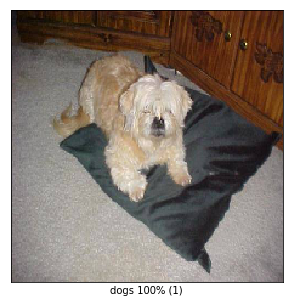

(224, 224, 3)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_results(i, predictions_array, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype(np.uint8),  interpolation='nearest')
    predicted_label = np.argmax(predictions_array[i])
    if(predicted_label == 0 ):
        predicted_label='cats'
    else:
        predicted_label='dogs'
    color='blue'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                (batches.class_indices[predicted_label]), color=color))

x, y = next(test_batches)
predictions = model.predict_on_batch(x)
i = 0

plt.figure(figsize=(12,5))
plt.subplot(1,1,1)
plot_results(i, predictions, x[i,:,:,:])

plt.show()

x[i,:,:,:].shape